<a href="https://colab.research.google.com/github/vector-sih/pbs2/blob/master/model_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision as tv
import torch.nn as nn
import torch.nn.functional as F
import os
from zipfile import ZipFile
from PIL import Image
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ten_path = '/content/drive/My Drive/Colab Notebooks/ten.pt'
ten = torch.load(ten_path)

In [4]:
len(ten)

2330

In [0]:
a_path = '/content/drive/My Drive/Colab Notebooks/a.npy'
a = np.load(a_path)

In [6]:
type(a)

numpy.ndarray

In [7]:
validation_per = 0.10300429184549356
epochs = 100
batch = 60
validation_size = int(len(ten)*validation_per)
print(validation_size)
train_x = ten[:-validation_size]
train_y = a[:-validation_size]

240


In [8]:
print(len(train_x))
print(type(train_x))
print(type(train_y))


2090
<class 'list'>
<class 'numpy.ndarray'>


In [0]:
validation_x = train_x[-validation_size:]
validation_y = train_y[-validation_size:]

In [10]:
print(type(validation_x))
print(type(validation_y))

<class 'list'>
<class 'numpy.ndarray'>


In [11]:
t_train_x = torch.Tensor(2097, 1, 255, 340)
torch.cat(train_x, out=t_train_x)

tensor([[[[0.5059, 0.4941, 0.5098,  ..., 0.0118, 0.0118, 0.0157],
          [0.5176, 0.4980, 0.4980,  ..., 0.0118, 0.0118, 0.0118],
          [0.5098, 0.5333, 0.5176,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.1098, 0.1098, 0.1020,  ..., 0.0902, 0.0941, 0.1059],
          [0.1176, 0.1059, 0.1059,  ..., 0.1059, 0.1098, 0.1098],
          [0.0980, 0.0824, 0.1020,  ..., 0.1216, 0.1176, 0.1176]]],


        [[[0.3451, 0.3451, 0.3412,  ..., 0.3882, 0.3961, 0.3843],
          [0.3451, 0.3451, 0.3412,  ..., 0.3765, 0.3843, 0.3843],
          [0.3529, 0.3529, 0.3490,  ..., 0.3765, 0.3765, 0.3804],
          ...,
          [0.3490, 0.3373, 0.3412,  ..., 0.5412, 0.6000, 0.6549],
          [0.3529, 0.3490, 0.3490,  ..., 0.6275, 0.6745, 0.6784],
          [0.3569, 0.3647, 0.3529,  ..., 0.6745, 0.6902, 0.6980]]],


        [[[0.7804, 0.8000, 0.8353,  ..., 0.3647, 0.3569, 0.3333],
          [0.7804, 0.8157, 0.8392,  ..., 0.3333, 0.3451, 0.3922],
          [0.8471, 0.8314, 0.8392,  ..

In [12]:
print(type(t_train_x))

<class 'torch.Tensor'>


In [13]:
t_validation_x = torch.Tensor(validation_size, 1, 255, 340)
torch.cat(validation_x, out=t_validation_x)

tensor([[[[0.2745, 0.2706, 0.2784,  ..., 0.7412, 0.7451, 0.7451],
          [0.2706, 0.2667, 0.2706,  ..., 0.7412, 0.7451, 0.7451],
          [0.2784, 0.2627, 0.2745,  ..., 0.7412, 0.7333, 0.7451],
          ...,
          [0.3294, 0.3294, 0.3294,  ..., 0.7529, 0.7529, 0.7608],
          [0.3373, 0.3255, 0.3451,  ..., 0.7529, 0.7529, 0.7608],
          [0.3333, 0.3451, 0.3490,  ..., 0.7569, 0.7490, 0.7569]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0000, 0.0000],
          ...,
          [0.0196, 0.0196, 0.0157,  ..., 0.0078, 0.0000, 0.0000],
          [0.0118, 0.0118, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0118, 0.0118, 0.0118,  ..

In [14]:
print(t_train_x.shape)
print(t_validation_x.shape)

torch.Size([2090, 1, 255, 340])
torch.Size([240, 1, 255, 340])


# Visualization

In [0]:
def get_co(lst):
    x = []
    y = []
    for a, b in lst:
        x.append(a)
        y.append(b)
    return x, y 

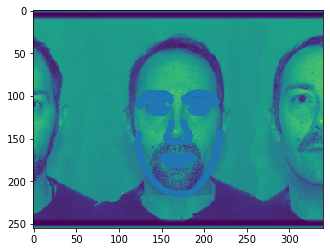

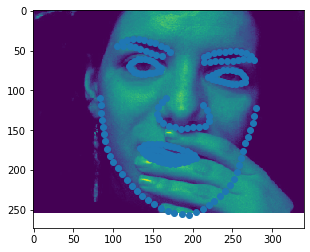

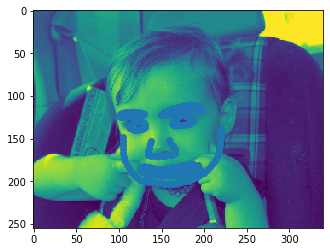

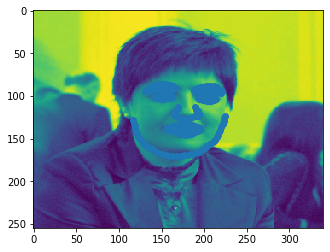

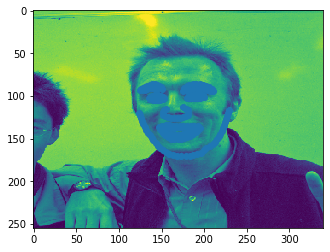

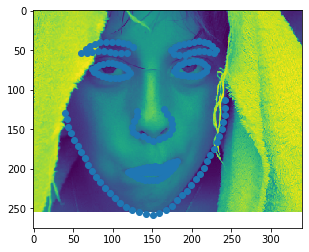

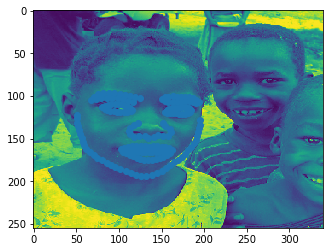

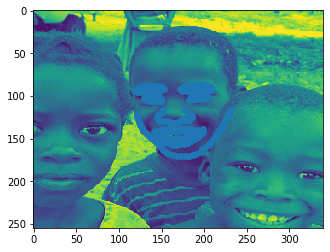

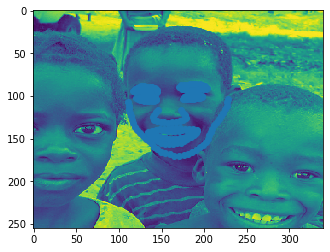

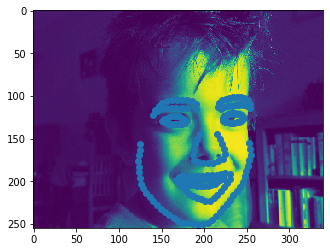

In [16]:
for i in range(10,20):
    plt.imshow(t_validation_x[i].view(255,340))
    x, y = get_co(validation_y[i])
    plt.scatter(x, y)
    plt.show()

In [0]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

#Network

In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(in_channels = 1, out_channels = 32, stride=1, kernel_size=2)
        self.c2 = nn.Conv2d(in_channels = 32, out_channels = 64, stride = 1, kernel_size=2)
        self.c3 = nn.Conv2d(in_channels = 64, out_channels = 128, stride = 1, kernel_size=2)
        self.c4 = nn.Conv2d(in_channels = 128, out_channels = 256, stride = 1, kernel_size=2)
        self.c5 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        self.c6 = nn.Conv2d(in_channels = 256, out_channels = 256, stride = 1, kernel_size=2)
        #self.c7 = nn.Conv2d(in_channels = 256, out_channels = 512, stride = 1, kernel_size=2)
        #self.c8 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #self.c9 = nn.Conv2d(in_channels = 512, out_channels = 512, stride = 1, kernel_size=2)
        #x = torch.randn(255,340).view(-1,1,255,340)
        #self.x = x

        self.dropout1 = nn.Dropout(p=0.1)
        self.dropout2 = nn.Dropout(p=0.2)
        self.dropout3 = nn.Dropout(p=0.3)
        self.dropout4 = nn.Dropout(p=0.4)
        self.dropout5 = nn.Dropout(p=0.5)
        self.dropout6 = nn.Dropout(p=0.6)

        self.bn1 = nn.BatchNorm2d(num_features=32)
        self.bn2 = nn.BatchNorm2d(num_features=64)
        self.bn3 = nn.BatchNorm2d(num_features=128)
        self.bn4 = nn.BatchNorm2d(num_features=256)
        self.bn5 = nn.BatchNorm2d(num_features=256)
        self.bn6 = nn.BatchNorm2d(num_features=256)
        self.bn9 = nn.BatchNorm1d(num_features=3000)
        self.bn10 = nn.BatchNorm1d(num_features=1200)   

        self._ln_output = None
        #self.convs(x)
        self.ln1 = nn.Linear(in_features= 256*3*4, out_features= 2000)
        self.ln2 = nn.Linear(in_features= 2000, out_features = 1200)
        self.ln3 = nn.Linear(in_features= 1200, out_features= 193*2)
        #self.optimizer = optim.Adam(net.parameters(), lr=0.01)
        #self.loss_function = nn.MSELoss()
        
    def convs(self, x):
        x = F.max_pool2d(F.leaky_relu(self.c1(x)), (2,2))
        x = self.bn1(x)
        x = F.max_pool2d(F.leaky_relu(self.c2(x)), (2,2))
        x = self.bn2(x)
        x = F.max_pool2d(F.leaky_relu(self.c3(x)), (2,2))
        x = self.bn3(x)
        x = F.max_pool2d(F.leaky_relu(self.c4(x)), (2,2))
        x = self.bn4(x)
        x = F.max_pool2d(F.leaky_relu(self.c5(x)), (2,2))
        x = self.bn5(x)
        x = F.max_pool2d(F.leaky_relu(self.c6(x)), (2,2))
        x = self.bn6(x)
        #x = F.relu(self.c7(x))
        #x = F.max_pool2d(F.relu(self.c8(x)), (2,2))
        #x = F.max_pool2d(F.relu(self.c9(x)), (2,2))
        
        #print(x[0].shape)
        #if self._ln_output is None:
         #   self._ln_output = x.shape[0]*x.shape[1]*x.shape[2]
          #  print('neurons = ', self._ln_output)
        self._ln_output = 256*3*4
        return x
                         
    def forward(self, dat):
        dat = self.convs(dat)
        dat = dat.view(-1, self._ln_output)  # .view is reshape ... this flattens X before 
        dat = F.leaky_relu(self.ln1(dat))
        self.dropout5(dat)
        dat = F.leaky_relu(self.ln2(dat))
        self.dropout4(dat)
        dat = F.leaky_relu(self.ln3(dat))

        return dat
    
    def optimise(self,outputs):
        loss = self.loss_function(outputs, batch_y)
        loss.backward()
        self.optimizer.step()

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [20]:
net = Net().to(device)
t_tensor = transforms.ToTensor()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
batch = 10
epochs = 100
loss_function = nn.MSELoss()
# for i in range(epochs):
for j in (range(epochs)):
    
    for i in tqdm(range(0, len(t_train_x), batch)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        
        batch_X = t_train_x[i:i+batch]
        #print(type(batch_X))
        
        
#         batch_X = batch_X/255.0
#         print(batch_X)
#         input()
        batch_y = torch.FloatTensor(train_y[i:i+batch])
        # print(batch_y.shape)
        batch_y = batch_y.view(batch,193*2)
        # print(type(batch_X))
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
       # print(batch_y.shape[2])

        net.zero_grad()
        optimizer.zero_grad()

        outputs = net.forward(batch_X)
        
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update
        #final = net.optimise(outputs)
        print(f"LOSS :{loss}")
        print(f"Epoch: {j}")


  2%|▏         | 5/209 [00:00<00:30,  6.60it/s]

LOSS :26940.86328125
Epoch: 0
LOSS :24132.92578125
Epoch: 0
LOSS :25798.61328125
Epoch: 0
LOSS :21837.8046875
Epoch: 0
LOSS :19844.298828125
Epoch: 0
LOSS :16720.130859375
Epoch: 0
LOSS :8747.55859375
Epoch: 0


  6%|▌         | 13/209 [00:00<00:17, 11.33it/s]

LOSS :8504.98828125
Epoch: 0
LOSS :8373.552734375
Epoch: 0
LOSS :7833.6865234375
Epoch: 0
LOSS :7794.88623046875
Epoch: 0
LOSS :7071.00146484375
Epoch: 0
LOSS :3860.362060546875
Epoch: 0
LOSS :3155.548828125
Epoch: 0
LOSS :6161.61572265625
Epoch: 0


 10%|█         | 21/209 [00:00<00:10, 17.48it/s]

LOSS :4462.81640625
Epoch: 0
LOSS :3853.751953125
Epoch: 0
LOSS :5293.58935546875
Epoch: 0
LOSS :3140.1181640625
Epoch: 0
LOSS :3619.76318359375
Epoch: 0
LOSS :3413.079345703125
Epoch: 0
LOSS :4728.89453125
Epoch: 0
LOSS :1858.0382080078125
Epoch: 0


 14%|█▍        | 29/209 [00:00<00:07, 23.66it/s]

LOSS :2308.091796875
Epoch: 0
LOSS :2892.017822265625
Epoch: 0
LOSS :1289.863037109375
Epoch: 0
LOSS :1984.6541748046875
Epoch: 0
LOSS :2534.740234375
Epoch: 0
LOSS :3093.359619140625
Epoch: 0
LOSS :2322.130859375
Epoch: 0
LOSS :2162.72216796875
Epoch: 0


 18%|█▊        | 37/209 [00:01<00:05, 28.72it/s]

LOSS :3305.960205078125
Epoch: 0
LOSS :3451.93310546875
Epoch: 0
LOSS :1931.7554931640625
Epoch: 0
LOSS :1490.103759765625
Epoch: 0
LOSS :3665.33984375
Epoch: 0
LOSS :3615.331298828125
Epoch: 0
LOSS :2267.631591796875
Epoch: 0
LOSS :2261.146240234375
Epoch: 0


 22%|██▏       | 45/209 [00:01<00:05, 32.05it/s]

LOSS :1362.7257080078125
Epoch: 0
LOSS :2075.529052734375
Epoch: 0
LOSS :2967.527099609375
Epoch: 0
LOSS :2307.7880859375
Epoch: 0
LOSS :2145.70703125
Epoch: 0
LOSS :1784.40185546875
Epoch: 0
LOSS :1860.4888916015625
Epoch: 0
LOSS :2022.837158203125
Epoch: 0


 25%|██▌       | 53/209 [00:01<00:04, 33.99it/s]

LOSS :2065.325439453125
Epoch: 0
LOSS :2082.772705078125
Epoch: 0
LOSS :1373.6912841796875
Epoch: 0
LOSS :2600.620849609375
Epoch: 0
LOSS :4189.42431640625
Epoch: 0
LOSS :3328.9287109375
Epoch: 0
LOSS :1828.8873291015625
Epoch: 0
LOSS :1417.1026611328125
Epoch: 0


 29%|██▉       | 61/209 [00:01<00:04, 34.98it/s]

LOSS :1506.3197021484375
Epoch: 0
LOSS :3506.97119140625
Epoch: 0
LOSS :1671.4078369140625
Epoch: 0
LOSS :2058.1845703125
Epoch: 0
LOSS :2245.296142578125
Epoch: 0
LOSS :1514.812744140625
Epoch: 0
LOSS :2299.399169921875
Epoch: 0
LOSS :1547.244873046875
Epoch: 0


 33%|███▎      | 69/209 [00:02<00:03, 35.64it/s]

LOSS :2181.658203125
Epoch: 0
LOSS :1399.043212890625
Epoch: 0
LOSS :675.4453735351562
Epoch: 0
LOSS :1072.281494140625
Epoch: 0
LOSS :1137.4365234375
Epoch: 0
LOSS :675.2346801757812
Epoch: 0
LOSS :1025.5289306640625
Epoch: 0
LOSS :2790.48193359375
Epoch: 0


 37%|███▋      | 77/209 [00:02<00:03, 35.92it/s]

LOSS :1437.3311767578125
Epoch: 0
LOSS :895.630859375
Epoch: 0
LOSS :2072.5
Epoch: 0
LOSS :978.74267578125
Epoch: 0
LOSS :1741.7113037109375
Epoch: 0
LOSS :811.0428466796875
Epoch: 0
LOSS :942.7559814453125
Epoch: 0
LOSS :1082.5870361328125
Epoch: 0


 41%|████      | 85/209 [00:02<00:03, 36.09it/s]

LOSS :1224.33544921875
Epoch: 0
LOSS :857.4818725585938
Epoch: 0
LOSS :1555.6998291015625
Epoch: 0
LOSS :1753.528564453125
Epoch: 0
LOSS :1099.0557861328125
Epoch: 0
LOSS :1323.5794677734375
Epoch: 0
LOSS :936.5632934570312
Epoch: 0
LOSS :1339.984375
Epoch: 0


 44%|████▍     | 93/209 [00:02<00:03, 36.12it/s]

LOSS :1009.2533569335938
Epoch: 0
LOSS :757.2063598632812
Epoch: 0
LOSS :694.8904418945312
Epoch: 0
LOSS :645.5932006835938
Epoch: 0
LOSS :1004.9811401367188
Epoch: 0
LOSS :529.2963256835938
Epoch: 0
LOSS :1131.973876953125
Epoch: 0
LOSS :1495.677490234375
Epoch: 0


 48%|████▊     | 101/209 [00:02<00:02, 36.13it/s]

LOSS :1497.5947265625
Epoch: 0
LOSS :1561.610595703125
Epoch: 0
LOSS :752.7664794921875
Epoch: 0
LOSS :1786.399169921875
Epoch: 0
LOSS :627.5958862304688
Epoch: 0
LOSS :1765.5394287109375
Epoch: 0
LOSS :1437.1856689453125
Epoch: 0
LOSS :1246.65234375
Epoch: 0


 52%|█████▏    | 109/209 [00:03<00:02, 36.34it/s]

LOSS :2038.1365966796875
Epoch: 0
LOSS :898.919189453125
Epoch: 0
LOSS :886.6575317382812
Epoch: 0
LOSS :2183.081298828125
Epoch: 0
LOSS :1757.85205078125
Epoch: 0
LOSS :1695.38818359375
Epoch: 0
LOSS :1427.3494873046875
Epoch: 0
LOSS :485.5159912109375
Epoch: 0


 56%|█████▌    | 117/209 [00:03<00:02, 36.60it/s]

LOSS :2580.54345703125
Epoch: 0
LOSS :1304.0355224609375
Epoch: 0
LOSS :1167.5145263671875
Epoch: 0
LOSS :397.8846740722656
Epoch: 0
LOSS :1825.7640380859375
Epoch: 0
LOSS :3285.10546875
Epoch: 0
LOSS :2458.05078125
Epoch: 0
LOSS :2191.81982421875
Epoch: 0


 60%|█████▉    | 125/209 [00:03<00:02, 36.77it/s]

LOSS :1111.7783203125
Epoch: 0
LOSS :1461.97265625
Epoch: 0
LOSS :1643.21923828125
Epoch: 0
LOSS :1800.27783203125
Epoch: 0
LOSS :2063.123046875
Epoch: 0
LOSS :1425.4224853515625
Epoch: 0
LOSS :1200.9842529296875
Epoch: 0
LOSS :1263.728759765625
Epoch: 0


 64%|██████▎   | 133/209 [00:03<00:02, 36.84it/s]

LOSS :2121.9716796875
Epoch: 0
LOSS :1105.5047607421875
Epoch: 0
LOSS :829.0471801757812
Epoch: 0
LOSS :1780.0975341796875
Epoch: 0
LOSS :822.5608520507812
Epoch: 0
LOSS :1879.4857177734375
Epoch: 0
LOSS :1613.0885009765625
Epoch: 0
LOSS :543.3411254882812
Epoch: 0


 67%|██████▋   | 141/209 [00:04<00:01, 36.83it/s]

LOSS :1150.8143310546875
Epoch: 0
LOSS :508.21466064453125
Epoch: 0
LOSS :1396.03662109375
Epoch: 0
LOSS :1624.4844970703125
Epoch: 0
LOSS :903.0180053710938
Epoch: 0
LOSS :820.8319091796875
Epoch: 0
LOSS :1038.3739013671875
Epoch: 0
LOSS :1252.982421875
Epoch: 0


 71%|███████▏  | 149/209 [00:04<00:01, 36.79it/s]

LOSS :1118.25
Epoch: 0
LOSS :1034.0052490234375
Epoch: 0
LOSS :761.4949951171875
Epoch: 0
LOSS :1175.6865234375
Epoch: 0
LOSS :859.068603515625
Epoch: 0
LOSS :1781.746826171875
Epoch: 0
LOSS :814.9239501953125
Epoch: 0
LOSS :587.6055908203125
Epoch: 0


 75%|███████▌  | 157/209 [00:04<00:01, 36.92it/s]

LOSS :1150.2962646484375
Epoch: 0
LOSS :2663.608154296875
Epoch: 0
LOSS :2105.818359375
Epoch: 0
LOSS :1887.97412109375
Epoch: 0
LOSS :668.3347778320312
Epoch: 0
LOSS :1020.6596069335938
Epoch: 0
LOSS :2056.2861328125
Epoch: 0
LOSS :1392.3668212890625
Epoch: 0


 79%|███████▉  | 165/209 [00:04<00:01, 36.63it/s]

LOSS :1184.6927490234375
Epoch: 0
LOSS :1865.22802734375
Epoch: 0
LOSS :1694.1837158203125
Epoch: 0
LOSS :2065.622802734375
Epoch: 0
LOSS :1270.8905029296875
Epoch: 0
LOSS :2170.1142578125
Epoch: 0
LOSS :1801.4080810546875
Epoch: 0
LOSS :1159.41650390625
Epoch: 0


 83%|████████▎ | 173/209 [00:04<00:00, 36.63it/s]

LOSS :1050.571533203125
Epoch: 0
LOSS :1648.4622802734375
Epoch: 0
LOSS :750.5267333984375
Epoch: 0
LOSS :640.3251342773438
Epoch: 0
LOSS :841.7534790039062
Epoch: 0
LOSS :1555.4432373046875
Epoch: 0
LOSS :2125.51171875
Epoch: 0
LOSS :1954.0267333984375
Epoch: 0


 87%|████████▋ | 181/209 [00:05<00:00, 36.58it/s]

LOSS :1785.143310546875
Epoch: 0
LOSS :2202.46533203125
Epoch: 0
LOSS :747.955078125
Epoch: 0
LOSS :2066.58837890625
Epoch: 0
LOSS :1930.4775390625
Epoch: 0
LOSS :1737.544677734375
Epoch: 0
LOSS :763.4111938476562
Epoch: 0
LOSS :1020.698486328125
Epoch: 0


 90%|█████████ | 189/209 [00:05<00:00, 36.70it/s]

LOSS :999.4956665039062
Epoch: 0
LOSS :796.4938354492188
Epoch: 0
LOSS :2756.171630859375
Epoch: 0
LOSS :987.5089721679688
Epoch: 0
LOSS :711.56591796875
Epoch: 0
LOSS :918.4898071289062
Epoch: 0
LOSS :874.1517944335938
Epoch: 0
LOSS :623.7493286132812
Epoch: 0


 94%|█████████▍| 197/209 [00:05<00:00, 36.70it/s]

LOSS :1422.79296875
Epoch: 0
LOSS :628.6703491210938
Epoch: 0
LOSS :898.0194091796875
Epoch: 0
LOSS :1710.087890625
Epoch: 0
LOSS :800.351318359375
Epoch: 0
LOSS :1079.0203857421875
Epoch: 0
LOSS :384.51971435546875
Epoch: 0
LOSS :813.7130126953125
Epoch: 0


 98%|█████████▊| 205/209 [00:05<00:00, 36.46it/s]

LOSS :1150.5389404296875
Epoch: 0
LOSS :1138.2747802734375
Epoch: 0
LOSS :952.7052612304688
Epoch: 0
LOSS :1278.504638671875
Epoch: 0
LOSS :599.0565795898438
Epoch: 0
LOSS :349.16949462890625
Epoch: 0
LOSS :1151.44287109375
Epoch: 0
LOSS :1250.4002685546875
Epoch: 0


  2%|▏         | 4/209 [00:00<00:05, 36.34it/s]

LOSS :1133.9898681640625
Epoch: 0
LOSS :869.0138549804688
Epoch: 0
LOSS :1066.5650634765625
Epoch: 1
LOSS :842.4827270507812
Epoch: 1
LOSS :583.5460205078125
Epoch: 1
LOSS :868.692626953125
Epoch: 1
LOSS :1029.987060546875
Epoch: 1
LOSS :604.7686767578125
Epoch: 1


  6%|▌         | 12/209 [00:00<00:05, 36.22it/s]

LOSS :936.9609375
Epoch: 1
LOSS :763.0081787109375
Epoch: 1
LOSS :699.1932983398438
Epoch: 1
LOSS :1057.0145263671875
Epoch: 1
LOSS :1087.40234375
Epoch: 1
LOSS :1246.7550048828125
Epoch: 1
LOSS :969.1503295898438
Epoch: 1
LOSS :391.66876220703125
Epoch: 1


 10%|▉         | 20/209 [00:00<00:05, 36.27it/s]

LOSS :721.6040649414062
Epoch: 1
LOSS :999.79931640625
Epoch: 1
LOSS :723.9681396484375
Epoch: 1
LOSS :964.9282836914062
Epoch: 1
LOSS :1104.7542724609375
Epoch: 1
LOSS :1213.812744140625
Epoch: 1
LOSS :862.7698364257812
Epoch: 1
LOSS :468.52581787109375
Epoch: 1


 13%|█▎        | 28/209 [00:00<00:05, 36.17it/s]

LOSS :643.062744140625
Epoch: 1
LOSS :681.4064331054688
Epoch: 1
LOSS :1245.662841796875
Epoch: 1
LOSS :488.7908935546875
Epoch: 1
LOSS :549.8983154296875
Epoch: 1
LOSS :486.8888854980469
Epoch: 1
LOSS :1520.2391357421875
Epoch: 1
LOSS :434.9461975097656
Epoch: 1


 17%|█▋        | 36/209 [00:00<00:04, 36.20it/s]

LOSS :672.3421630859375
Epoch: 1
LOSS :984.1758422851562
Epoch: 1
LOSS :501.56103515625
Epoch: 1
LOSS :462.86083984375
Epoch: 1
LOSS :531.2789916992188
Epoch: 1
LOSS :734.8436889648438
Epoch: 1
LOSS :1675.5987548828125
Epoch: 1
LOSS :364.6593933105469
Epoch: 1


 21%|██        | 44/209 [00:01<00:04, 36.29it/s]

LOSS :1100.5640869140625
Epoch: 1
LOSS :628.7318725585938
Epoch: 1
LOSS :1011.6149291992188
Epoch: 1
LOSS :1268.3267822265625
Epoch: 1
LOSS :568.8787841796875
Epoch: 1
LOSS :592.9705200195312
Epoch: 1
LOSS :903.446044921875
Epoch: 1
LOSS :539.5820922851562
Epoch: 1


 25%|██▍       | 52/209 [00:01<00:04, 36.35it/s]

LOSS :1230.8597412109375
Epoch: 1
LOSS :1694.6336669921875
Epoch: 1
LOSS :872.6725463867188
Epoch: 1
LOSS :329.1482849121094
Epoch: 1
LOSS :695.1803588867188
Epoch: 1
LOSS :1397.6527099609375
Epoch: 1
LOSS :1461.228759765625
Epoch: 1
LOSS :665.2677001953125
Epoch: 1


 29%|██▊       | 60/209 [00:01<00:04, 36.38it/s]

LOSS :419.80902099609375
Epoch: 1
LOSS :290.0875244140625
Epoch: 1
LOSS :852.1254272460938
Epoch: 1
LOSS :1018.577392578125
Epoch: 1
LOSS :1423.4339599609375
Epoch: 1
LOSS :839.2356567382812
Epoch: 1
LOSS :1060.31591796875
Epoch: 1
LOSS :1282.7166748046875
Epoch: 1


 33%|███▎      | 68/209 [00:01<00:03, 36.44it/s]

LOSS :1272.0645751953125
Epoch: 1
LOSS :742.3688354492188
Epoch: 1
LOSS :1427.796142578125
Epoch: 1
LOSS :740.7314453125
Epoch: 1
LOSS :1417.0081787109375
Epoch: 1
LOSS :503.6855773925781
Epoch: 1
LOSS :311.1199645996094
Epoch: 1
LOSS :883.1395263671875
Epoch: 1


 36%|███▋      | 76/209 [00:02<00:03, 36.22it/s]

LOSS :1261.2725830078125
Epoch: 1
LOSS :1025.4849853515625
Epoch: 1
LOSS :907.3385009765625
Epoch: 1
LOSS :1061.2769775390625
Epoch: 1
LOSS :759.659912109375
Epoch: 1
LOSS :1298.2315673828125
Epoch: 1
LOSS :2130.64794921875
Epoch: 1
LOSS :1158.6583251953125
Epoch: 1


 40%|████      | 84/209 [00:02<00:03, 36.61it/s]

LOSS :479.8042297363281
Epoch: 1
LOSS :822.6809692382812
Epoch: 1
LOSS :912.8457641601562
Epoch: 1
LOSS :992.2850341796875
Epoch: 1
LOSS :786.2000122070312
Epoch: 1
LOSS :885.4945068359375
Epoch: 1
LOSS :507.6880798339844
Epoch: 1
LOSS :984.425537109375
Epoch: 1


 44%|████▍     | 92/209 [00:02<00:03, 36.83it/s]

LOSS :1814.8013916015625
Epoch: 1
LOSS :925.698486328125
Epoch: 1
LOSS :846.30419921875
Epoch: 1
LOSS :921.45849609375
Epoch: 1
LOSS :648.1249389648438
Epoch: 1
LOSS :837.7069091796875
Epoch: 1
LOSS :851.5146484375
Epoch: 1
LOSS :1163.1878662109375
Epoch: 1


 48%|████▊     | 100/209 [00:02<00:02, 36.80it/s]

LOSS :771.1886596679688
Epoch: 1
LOSS :1151.85546875
Epoch: 1
LOSS :875.2755737304688
Epoch: 1
LOSS :1104.533935546875
Epoch: 1
LOSS :1317.4041748046875
Epoch: 1
LOSS :831.02490234375
Epoch: 1
LOSS :583.9669189453125
Epoch: 1
LOSS :1379.2529296875
Epoch: 1


 52%|█████▏    | 108/209 [00:02<00:02, 36.84it/s]

LOSS :733.813232421875
Epoch: 1
LOSS :1132.4930419921875
Epoch: 1
LOSS :997.9411010742188
Epoch: 1
LOSS :667.5106201171875
Epoch: 1
LOSS :462.6654968261719
Epoch: 1
LOSS :1355.150634765625
Epoch: 1
LOSS :946.880859375
Epoch: 1
LOSS :1227.995361328125
Epoch: 1


 56%|█████▌    | 116/209 [00:03<00:02, 36.79it/s]

LOSS :544.317626953125
Epoch: 1
LOSS :1749.3809814453125
Epoch: 1
LOSS :1393.462890625
Epoch: 1
LOSS :1574.8526611328125
Epoch: 1
LOSS :577.96142578125
Epoch: 1
LOSS :733.00927734375
Epoch: 1
LOSS :658.493896484375
Epoch: 1
LOSS :2080.344482421875
Epoch: 1


 59%|█████▉    | 124/209 [00:03<00:02, 37.02it/s]

LOSS :2617.26171875
Epoch: 1
LOSS :400.9502868652344
Epoch: 1
LOSS :814.4598999023438
Epoch: 1
LOSS :1123.6871337890625
Epoch: 1
LOSS :1183.6551513671875
Epoch: 1
LOSS :1624.5777587890625
Epoch: 1
LOSS :890.0419311523438
Epoch: 1
LOSS :432.2798156738281
Epoch: 1


 63%|██████▎   | 132/209 [00:03<00:02, 36.86it/s]

LOSS :592.5145263671875
Epoch: 1
LOSS :1208.3099365234375
Epoch: 1
LOSS :967.7958984375
Epoch: 1
LOSS :532.1773071289062
Epoch: 1
LOSS :436.8128967285156
Epoch: 1
LOSS :477.1271057128906
Epoch: 1
LOSS :801.06298828125
Epoch: 1
LOSS :1166.339599609375
Epoch: 1


 67%|██████▋   | 140/209 [00:03<00:01, 36.78it/s]

LOSS :433.9058837890625
Epoch: 1
LOSS :723.0269775390625
Epoch: 1
LOSS :586.9391479492188
Epoch: 1
LOSS :701.1703491210938
Epoch: 1
LOSS :577.5762329101562
Epoch: 1
LOSS :549.2710571289062
Epoch: 1
LOSS :421.7987976074219
Epoch: 1
LOSS :363.27935791015625
Epoch: 1


 71%|███████   | 148/209 [00:04<00:01, 36.57it/s]

LOSS :898.88525390625
Epoch: 1
LOSS :670.9132690429688
Epoch: 1
LOSS :525.0533447265625
Epoch: 1
LOSS :425.10845947265625
Epoch: 1
LOSS :619.7630004882812
Epoch: 1
LOSS :572.4356689453125
Epoch: 1
LOSS :536.9678344726562
Epoch: 1
LOSS :417.0785827636719
Epoch: 1


 75%|███████▍  | 156/209 [00:04<00:01, 36.42it/s]

LOSS :458.75665283203125
Epoch: 1
LOSS :484.95269775390625
Epoch: 1
LOSS :824.3773803710938
Epoch: 1
LOSS :1020.4578247070312
Epoch: 1
LOSS :750.1915893554688
Epoch: 1
LOSS :843.4697265625
Epoch: 1
LOSS :527.321044921875
Epoch: 1
LOSS :883.8790283203125
Epoch: 1


 78%|███████▊  | 164/209 [00:04<00:01, 36.37it/s]

LOSS :561.9828491210938
Epoch: 1
LOSS :859.3736572265625
Epoch: 1
LOSS :750.4700927734375
Epoch: 1
LOSS :1087.3848876953125
Epoch: 1
LOSS :1370.8760986328125
Epoch: 1
LOSS :691.7982788085938
Epoch: 1
LOSS :1109.0911865234375
Epoch: 1
LOSS :560.240966796875
Epoch: 1


 82%|████████▏ | 172/209 [00:04<00:01, 36.73it/s]

LOSS :756.6055908203125
Epoch: 1
LOSS :846.988525390625
Epoch: 1
LOSS :1127.6917724609375
Epoch: 1
LOSS :673.1082763671875
Epoch: 1
LOSS :642.0914916992188
Epoch: 1
LOSS :764.8757934570312
Epoch: 1
LOSS :951.0953979492188
Epoch: 1
LOSS :714.4287719726562
Epoch: 1


 86%|████████▌ | 180/209 [00:04<00:00, 36.86it/s]

LOSS :668.8154296875
Epoch: 1
LOSS :656.023681640625
Epoch: 1
LOSS :1338.2896728515625
Epoch: 1
LOSS :489.7994079589844
Epoch: 1
LOSS :790.2083740234375
Epoch: 1
LOSS :1663.9375
Epoch: 1
LOSS :544.8684692382812
Epoch: 1
LOSS :584.523193359375
Epoch: 1


 90%|████████▉ | 188/209 [00:05<00:00, 37.01it/s]

LOSS :928.3733520507812
Epoch: 1
LOSS :760.0303955078125
Epoch: 1
LOSS :876.8509521484375
Epoch: 1
LOSS :734.8075561523438
Epoch: 1
LOSS :598.0554809570312
Epoch: 1
LOSS :501.2077331542969
Epoch: 1
LOSS :389.3711242675781
Epoch: 1
LOSS :292.8722839355469
Epoch: 1


 94%|█████████▍| 196/209 [00:05<00:00, 37.15it/s]

LOSS :441.0128173828125
Epoch: 1
LOSS :618.5076293945312
Epoch: 1
LOSS :417.43621826171875
Epoch: 1
LOSS :855.1228637695312
Epoch: 1
LOSS :680.4684448242188
Epoch: 1
LOSS :514.3651123046875
Epoch: 1
LOSS :566.6278686523438
Epoch: 1
LOSS :552.2361450195312
Epoch: 1


 98%|█████████▊| 204/209 [00:05<00:00, 37.09it/s]

LOSS :741.2532958984375
Epoch: 1
LOSS :600.3935546875
Epoch: 1
LOSS :680.4308471679688
Epoch: 1
LOSS :651.5533447265625
Epoch: 1
LOSS :912.1141967773438
Epoch: 1
LOSS :444.91595458984375
Epoch: 1
LOSS :281.2068786621094
Epoch: 1
LOSS :1156.0352783203125
Epoch: 1


  2%|▏         | 4/209 [00:00<00:05, 36.96it/s]

LOSS :1044.8382568359375
Epoch: 1
LOSS :487.52874755859375
Epoch: 1
LOSS :455.6261291503906
Epoch: 1
LOSS :863.7586669921875
Epoch: 2
LOSS :406.2386779785156
Epoch: 2
LOSS :374.1392822265625
Epoch: 2
LOSS :687.6871337890625
Epoch: 2
LOSS :705.853759765625
Epoch: 2


  6%|▌         | 12/209 [00:00<00:05, 36.58it/s]

LOSS :522.3495483398438
Epoch: 2
LOSS :551.337646484375
Epoch: 2
LOSS :546.3167724609375
Epoch: 2
LOSS :475.84136962890625
Epoch: 2
LOSS :477.0624694824219
Epoch: 2
LOSS :681.141357421875
Epoch: 2
LOSS :913.2554931640625
Epoch: 2
LOSS :654.7079467773438
Epoch: 2


 10%|▉         | 20/209 [00:00<00:05, 36.71it/s]

LOSS :341.6422119140625
Epoch: 2
LOSS :578.4816284179688
Epoch: 2
LOSS :613.0020141601562
Epoch: 2
LOSS :449.8856506347656
Epoch: 2
LOSS :578.9813842773438
Epoch: 2
LOSS :585.7728271484375
Epoch: 2
LOSS :666.8379516601562
Epoch: 2
LOSS :574.8365478515625
Epoch: 2


 13%|█▎        | 28/209 [00:00<00:04, 36.93it/s]

LOSS :265.05181884765625
Epoch: 2
LOSS :353.3597106933594
Epoch: 2
LOSS :457.884765625
Epoch: 2
LOSS :734.1509399414062
Epoch: 2
LOSS :360.9063720703125
Epoch: 2
LOSS :370.5861511230469
Epoch: 2
LOSS :404.0728454589844
Epoch: 2
LOSS :1238.583984375
Epoch: 2


 17%|█▋        | 36/209 [00:00<00:04, 36.76it/s]

LOSS :391.8171081542969
Epoch: 2
LOSS :462.7025451660156
Epoch: 2
LOSS :605.0000610351562
Epoch: 2
LOSS :281.6928405761719
Epoch: 2
LOSS :543.3208618164062
Epoch: 2
LOSS :388.20928955078125
Epoch: 2
LOSS :527.1376953125
Epoch: 2
LOSS :1424.194580078125
Epoch: 2


 21%|██        | 44/209 [00:01<00:04, 36.59it/s]

LOSS :379.93511962890625
Epoch: 2
LOSS :749.3984375
Epoch: 2
LOSS :581.4008178710938
Epoch: 2
LOSS :637.6480712890625
Epoch: 2
LOSS :952.45947265625
Epoch: 2
LOSS :566.9354858398438
Epoch: 2
LOSS :377.7939147949219
Epoch: 2
LOSS :1188.5927734375
Epoch: 2


 25%|██▍       | 52/209 [00:01<00:04, 36.55it/s]

LOSS :288.28472900390625
Epoch: 2
LOSS :416.2258605957031
Epoch: 2
LOSS :950.215087890625
Epoch: 2
LOSS :925.0457763671875
Epoch: 2
LOSS :352.038330078125
Epoch: 2
LOSS :347.473388671875
Epoch: 2
LOSS :684.639404296875
Epoch: 2
LOSS :654.448486328125
Epoch: 2


 29%|██▊       | 60/209 [00:01<00:04, 36.73it/s]

LOSS :563.1408081054688
Epoch: 2
LOSS :678.9017333984375
Epoch: 2
LOSS :446.60723876953125
Epoch: 2
LOSS :636.328369140625
Epoch: 2
LOSS :763.5340576171875
Epoch: 2
LOSS :1175.277099609375
Epoch: 2
LOSS :779.00830078125
Epoch: 2
LOSS :393.22216796875
Epoch: 2


 33%|███▎      | 68/209 [00:01<00:03, 36.94it/s]

LOSS :645.7587280273438
Epoch: 2
LOSS :824.0186157226562
Epoch: 2
LOSS :604.2763061523438
Epoch: 2
LOSS :1454.1036376953125
Epoch: 2
LOSS :442.6457214355469
Epoch: 2
LOSS :784.2027587890625
Epoch: 2
LOSS :363.952392578125
Epoch: 2
LOSS :251.3969268798828
Epoch: 2


 36%|███▋      | 76/209 [00:02<00:03, 37.10it/s]

LOSS :477.98480224609375
Epoch: 2
LOSS :911.0162353515625
Epoch: 2
LOSS :877.8986206054688
Epoch: 2
LOSS :483.13507080078125
Epoch: 2
LOSS :783.8757934570312
Epoch: 2
LOSS :530.125
Epoch: 2
LOSS :822.405517578125
Epoch: 2
LOSS :919.0865478515625
Epoch: 2


 40%|████      | 84/209 [00:02<00:03, 37.14it/s]

LOSS :518.107421875
Epoch: 2
LOSS :394.1429138183594
Epoch: 2
LOSS :622.3501586914062
Epoch: 2
LOSS :417.2899169921875
Epoch: 2
LOSS :325.6842041015625
Epoch: 2
LOSS :663.6323852539062
Epoch: 2
LOSS :516.8606567382812
Epoch: 2
LOSS :311.0975341796875
Epoch: 2


 44%|████▍     | 92/209 [00:02<00:03, 37.21it/s]

LOSS :575.20751953125
Epoch: 2
LOSS :487.3258361816406
Epoch: 2
LOSS :643.650390625
Epoch: 2
LOSS :623.2498779296875
Epoch: 2
LOSS :713.7334594726562
Epoch: 2
LOSS :481.44793701171875
Epoch: 2
LOSS :357.5941162109375
Epoch: 2
LOSS :637.3489990234375
Epoch: 2


 48%|████▊     | 100/209 [00:02<00:02, 37.31it/s]

LOSS :697.1747436523438
Epoch: 2
LOSS :724.6158447265625
Epoch: 2
LOSS :568.2095947265625
Epoch: 2
LOSS :383.03900146484375
Epoch: 2
LOSS :722.39501953125
Epoch: 2
LOSS :751.9878540039062
Epoch: 2
LOSS :774.5908813476562
Epoch: 2
LOSS :465.9174499511719
Epoch: 2


 52%|█████▏    | 108/209 [00:02<00:02, 37.25it/s]

LOSS :743.7288818359375
Epoch: 2
LOSS :385.7723083496094
Epoch: 2
LOSS :461.8645324707031
Epoch: 2
LOSS :721.3483276367188
Epoch: 2
LOSS :938.1573486328125
Epoch: 2
LOSS :403.6722412109375
Epoch: 2
LOSS :698.4921264648438
Epoch: 2
LOSS :691.997314453125
Epoch: 2


 56%|█████▌    | 116/209 [00:03<00:02, 36.86it/s]

LOSS :637.2669677734375
Epoch: 2
LOSS :612.9339599609375
Epoch: 2
LOSS :553.3502807617188
Epoch: 2
LOSS :603.9819946289062
Epoch: 2
LOSS :1115.3406982421875
Epoch: 2
LOSS :489.4288330078125
Epoch: 2
LOSS :791.6558837890625
Epoch: 2
LOSS :297.4855651855469
Epoch: 2


 59%|█████▉    | 124/209 [00:03<00:02, 36.74it/s]

LOSS :900.0361938476562
Epoch: 2
LOSS :1440.4942626953125
Epoch: 2
LOSS :324.3890686035156
Epoch: 2
LOSS :405.8446350097656
Epoch: 2
LOSS :971.5841064453125
Epoch: 2
LOSS :611.5313720703125
Epoch: 2
LOSS :955.1092529296875
Epoch: 2
LOSS :690.3945922851562
Epoch: 2


 63%|██████▎   | 132/209 [00:03<00:02, 36.84it/s]

LOSS :406.26116943359375
Epoch: 2
LOSS :375.9821472167969
Epoch: 2
LOSS :458.1774597167969
Epoch: 2
LOSS :399.8075256347656
Epoch: 2
LOSS :573.3753051757812
Epoch: 2
LOSS :164.51190185546875
Epoch: 2
LOSS :406.36614990234375
Epoch: 2
LOSS :465.98779296875
Epoch: 2


 67%|██████▋   | 140/209 [00:03<00:01, 36.89it/s]

LOSS :747.6170654296875
Epoch: 2
LOSS :342.30303955078125
Epoch: 2
LOSS :499.6543884277344
Epoch: 2
LOSS :365.8221130371094
Epoch: 2
LOSS :550.8629760742188
Epoch: 2
LOSS :378.1182556152344
Epoch: 2
LOSS :392.77813720703125
Epoch: 2
LOSS :384.4727478027344
Epoch: 2


 71%|███████   | 148/209 [00:04<00:01, 36.65it/s]

LOSS :218.87989807128906
Epoch: 2
LOSS :485.1144104003906
Epoch: 2
LOSS :362.6152038574219
Epoch: 2
LOSS :408.9635009765625
Epoch: 2
LOSS :265.99993896484375
Epoch: 2
LOSS :388.3809814453125
Epoch: 2
LOSS :309.6462707519531
Epoch: 2
LOSS :370.6770324707031
Epoch: 2


 75%|███████▍  | 156/209 [00:04<00:01, 36.32it/s]

LOSS :365.0587158203125
Epoch: 2
LOSS :404.798583984375
Epoch: 2
LOSS :270.7126770019531
Epoch: 2
LOSS :736.71875
Epoch: 2
LOSS :536.3695068359375
Epoch: 2
LOSS :373.5079040527344
Epoch: 2
LOSS :479.2444152832031
Epoch: 2
LOSS :503.5935974121094
Epoch: 2


 78%|███████▊  | 164/209 [00:04<00:01, 36.17it/s]

LOSS :519.6807250976562
Epoch: 2
LOSS :431.1236572265625
Epoch: 2
LOSS :708.5977172851562
Epoch: 2
LOSS :634.600830078125
Epoch: 2
LOSS :692.91064453125
Epoch: 2
LOSS :852.7970581054688
Epoch: 2
LOSS :470.1055908203125
Epoch: 2
LOSS :466.0039978027344
Epoch: 2


 82%|████████▏ | 172/209 [00:04<00:01, 36.40it/s]

LOSS :355.5319519042969
Epoch: 2
LOSS :274.2811584472656
Epoch: 2
LOSS :765.2681884765625
Epoch: 2
LOSS :658.0039672851562
Epoch: 2
LOSS :425.9314270019531
Epoch: 2
LOSS :383.7452087402344
Epoch: 2
LOSS :499.33355712890625
Epoch: 2
LOSS :742.8250122070312
Epoch: 2


 86%|████████▌ | 180/209 [00:04<00:00, 36.59it/s]

LOSS :366.84197998046875
Epoch: 2
LOSS :659.86962890625
Epoch: 2
LOSS :545.1453857421875
Epoch: 2
LOSS :1159.6883544921875
Epoch: 2
LOSS :513.9888916015625
Epoch: 2
LOSS :779.36181640625
Epoch: 2
LOSS :854.4550170898438
Epoch: 2
LOSS :581.2408447265625
Epoch: 2


 90%|████████▉ | 188/209 [00:05<00:00, 36.73it/s]

LOSS :449.0341491699219
Epoch: 2
LOSS :496.5404357910156
Epoch: 2
LOSS :597.2677612304688
Epoch: 2
LOSS :687.27099609375
Epoch: 2
LOSS :439.1722106933594
Epoch: 2
LOSS :594.3378295898438
Epoch: 2
LOSS :490.63140869140625
Epoch: 2
LOSS :433.8953552246094
Epoch: 2


 94%|█████████▍| 196/209 [00:05<00:00, 36.71it/s]

LOSS :224.70741271972656
Epoch: 2
LOSS :246.4031524658203
Epoch: 2
LOSS :636.6253662109375
Epoch: 2
LOSS :505.1942443847656
Epoch: 2
LOSS :603.018310546875
Epoch: 2
LOSS :556.2064819335938
Epoch: 2
LOSS :330.41265869140625
Epoch: 2
LOSS :662.100830078125
Epoch: 2


 98%|█████████▊| 204/209 [00:05<00:00, 36.34it/s]

LOSS :360.2867431640625
Epoch: 2
LOSS :735.0238037109375
Epoch: 2
LOSS :353.6396179199219
Epoch: 2
LOSS :518.9160766601562
Epoch: 2
LOSS :554.4107666015625
Epoch: 2
LOSS :544.0693969726562
Epoch: 2
LOSS :421.65057373046875
Epoch: 2
LOSS :420.96728515625
Epoch: 2


  2%|▏         | 4/209 [00:00<00:05, 37.07it/s]

LOSS :559.4362182617188
Epoch: 2
LOSS :818.4839477539062
Epoch: 2
LOSS :311.3529357910156
Epoch: 2
LOSS :436.363037109375
Epoch: 2
LOSS :668.3179321289062
Epoch: 3
LOSS :447.18182373046875
Epoch: 3
LOSS :313.18719482421875
Epoch: 3
LOSS :383.84429931640625
Epoch: 3


  6%|▌         | 12/209 [00:00<00:05, 37.01it/s]

LOSS :541.3694458007812
Epoch: 3
LOSS :436.6094055175781
Epoch: 3
LOSS :411.6317138671875
Epoch: 3
LOSS :208.74932861328125
Epoch: 3
LOSS :223.82208251953125
Epoch: 3
LOSS :332.8134765625
Epoch: 3
LOSS :463.89654541015625
Epoch: 3
LOSS :576.618896484375
Epoch: 3


 10%|▉         | 20/209 [00:00<00:05, 36.72it/s]

LOSS :538.8045654296875
Epoch: 3
LOSS :210.43946838378906
Epoch: 3
LOSS :568.2651977539062
Epoch: 3
LOSS :835.2064819335938
Epoch: 3
LOSS :386.9811706542969
Epoch: 3
LOSS :404.7018737792969
Epoch: 3
LOSS :428.1953125
Epoch: 3
LOSS :484.81982421875
Epoch: 3


 13%|█▎        | 28/209 [00:00<00:04, 36.47it/s]

LOSS :512.9000244140625
Epoch: 3
LOSS :262.5960388183594
Epoch: 3
LOSS :322.5250549316406
Epoch: 3
LOSS :372.8224182128906
Epoch: 3
LOSS :563.763427734375
Epoch: 3
LOSS :315.0344543457031
Epoch: 3
LOSS :317.77203369140625
Epoch: 3
LOSS :439.4356994628906
Epoch: 3


 17%|█▋        | 36/209 [00:00<00:04, 36.58it/s]

LOSS :1037.617431640625
Epoch: 3
LOSS :360.9662170410156
Epoch: 3
LOSS :427.7022705078125
Epoch: 3
LOSS :426.8186950683594
Epoch: 3
LOSS :595.2379150390625
Epoch: 3
LOSS :501.93511962890625
Epoch: 3
LOSS :333.218994140625
Epoch: 3
LOSS :395.4018249511719
Epoch: 3


 21%|██        | 44/209 [00:01<00:04, 36.78it/s]

LOSS :969.7904663085938
Epoch: 3
LOSS :360.02435302734375
Epoch: 3
LOSS :528.746337890625
Epoch: 3
LOSS :360.9616394042969
Epoch: 3
LOSS :364.510986328125
Epoch: 3
LOSS :743.781005859375
Epoch: 3
LOSS :559.6082763671875
Epoch: 3
LOSS :524.6334838867188
Epoch: 3


 25%|██▍       | 52/209 [00:01<00:04, 36.89it/s]

LOSS :756.1957397460938
Epoch: 3
LOSS :336.68865966796875
Epoch: 3
LOSS :345.5326843261719
Epoch: 3
LOSS :501.10723876953125
Epoch: 3
LOSS :396.6646423339844
Epoch: 3
LOSS :372.2872619628906
Epoch: 3
LOSS :266.9449462890625
Epoch: 3
LOSS :512.4353637695312
Epoch: 3


 29%|██▊       | 60/209 [00:01<00:04, 36.91it/s]

LOSS :395.8753356933594
Epoch: 3
LOSS :367.5617980957031
Epoch: 3
LOSS :693.3499145507812
Epoch: 3
LOSS :421.69573974609375
Epoch: 3
LOSS :708.9197387695312
Epoch: 3
LOSS :528.2249145507812
Epoch: 3
LOSS :1051.4647216796875
Epoch: 3
LOSS :775.7369995117188
Epoch: 3


 33%|███▎      | 68/209 [00:01<00:03, 36.94it/s]

LOSS :484.420166015625
Epoch: 3
LOSS :447.8675842285156
Epoch: 3
LOSS :512.6514282226562
Epoch: 3
LOSS :518.2730712890625
Epoch: 3
LOSS :1150.570556640625
Epoch: 3
LOSS :260.068603515625
Epoch: 3
LOSS :446.94610595703125
Epoch: 3
LOSS :417.3296203613281
Epoch: 3


 36%|███▋      | 76/209 [00:02<00:03, 36.96it/s]

LOSS :292.35693359375
Epoch: 3
LOSS :426.4493713378906
Epoch: 3
LOSS :843.4274291992188
Epoch: 3
LOSS :878.2055053710938
Epoch: 3
LOSS :369.35687255859375
Epoch: 3
LOSS :615.2908935546875
Epoch: 3
LOSS :509.82073974609375
Epoch: 3
LOSS :600.0031127929688
Epoch: 3


 40%|████      | 84/209 [00:02<00:03, 36.93it/s]

LOSS :362.3158874511719
Epoch: 3
LOSS :351.99652099609375
Epoch: 3
LOSS :259.5804138183594
Epoch: 3
LOSS :614.2892456054688
Epoch: 3
LOSS :455.8209533691406
Epoch: 3
LOSS :268.5268859863281
Epoch: 3
LOSS :671.34033203125
Epoch: 3
LOSS :502.71466064453125
Epoch: 3


 44%|████▍     | 92/209 [00:02<00:03, 37.01it/s]

LOSS :281.6119079589844
Epoch: 3
LOSS :494.4673767089844
Epoch: 3
LOSS :412.48089599609375
Epoch: 3
LOSS :450.1790771484375
Epoch: 3
LOSS :317.4331970214844
Epoch: 3
LOSS :474.5652770996094
Epoch: 3
LOSS :483.2237243652344
Epoch: 3
LOSS :202.9566192626953
Epoch: 3


 48%|████▊     | 100/209 [00:02<00:02, 37.08it/s]

LOSS :427.77008056640625
Epoch: 3
LOSS :401.153076171875
Epoch: 3
LOSS :540.724365234375
Epoch: 3
LOSS :504.84307861328125
Epoch: 3
LOSS :383.0458679199219
Epoch: 3
LOSS :460.4145202636719
Epoch: 3
LOSS :369.7430725097656
Epoch: 3
LOSS :762.1136474609375
Epoch: 3


 52%|█████▏    | 108/209 [00:02<00:02, 37.04it/s]

LOSS :519.3180541992188
Epoch: 3
LOSS :502.51129150390625
Epoch: 3
LOSS :273.4015197753906
Epoch: 3
LOSS :273.1175842285156
Epoch: 3
LOSS :617.2012329101562
Epoch: 3
LOSS :657.1065063476562
Epoch: 3
LOSS :347.7019348144531
Epoch: 3
LOSS :314.6274719238281
Epoch: 3


 56%|█████▌    | 116/209 [00:03<00:02, 36.73it/s]

LOSS :553.3621826171875
Epoch: 3
LOSS :571.5090942382812
Epoch: 3
LOSS :588.4266967773438
Epoch: 3
LOSS :365.6326904296875
Epoch: 3
LOSS :373.8658752441406
Epoch: 3
LOSS :807.746826171875
Epoch: 3
LOSS :349.6693115234375
Epoch: 3
LOSS :533.48095703125
Epoch: 3


 59%|█████▉    | 124/209 [00:03<00:02, 36.64it/s]

LOSS :270.99029541015625
Epoch: 3
LOSS :503.6645202636719
Epoch: 3
LOSS :987.5377197265625
Epoch: 3
LOSS :296.55377197265625
Epoch: 3
LOSS :186.42599487304688
Epoch: 3
LOSS :848.0872192382812
Epoch: 3
LOSS :332.2594909667969
Epoch: 3
LOSS :719.7890014648438
Epoch: 3


 63%|██████▎   | 132/209 [00:03<00:02, 36.63it/s]

LOSS :571.5731811523438
Epoch: 3
LOSS :777.5482177734375
Epoch: 3
LOSS :516.3770751953125
Epoch: 3
LOSS :236.32066345214844
Epoch: 3
LOSS :276.6649169921875
Epoch: 3
LOSS :482.9897155761719
Epoch: 3
LOSS :369.6392517089844
Epoch: 3
LOSS :486.15887451171875
Epoch: 3


 67%|██████▋   | 140/209 [00:03<00:01, 36.98it/s]

LOSS :958.713134765625
Epoch: 3
LOSS :677.9468994140625
Epoch: 3
LOSS :578.5260620117188
Epoch: 3
LOSS :561.03369140625
Epoch: 3
LOSS :450.4410705566406
Epoch: 3
LOSS :452.0537109375
Epoch: 3
LOSS :388.3815002441406
Epoch: 3
LOSS :292.96295166015625
Epoch: 3


 71%|███████   | 148/209 [00:04<00:01, 37.03it/s]

LOSS :657.7515869140625
Epoch: 3
LOSS :342.7835693359375
Epoch: 3
LOSS :382.64556884765625
Epoch: 3
LOSS :347.16094970703125
Epoch: 3
LOSS :488.1442565917969
Epoch: 3
LOSS :340.5256042480469
Epoch: 3
LOSS :374.6625671386719
Epoch: 3
LOSS :222.11732482910156
Epoch: 3


 75%|███████▍  | 156/209 [00:04<00:01, 37.12it/s]

LOSS :476.403564453125
Epoch: 3
LOSS :320.451904296875
Epoch: 3
LOSS :446.7535705566406
Epoch: 3
LOSS :213.61904907226562
Epoch: 3
LOSS :645.96142578125
Epoch: 3
LOSS :375.6248779296875
Epoch: 3
LOSS :345.597412109375
Epoch: 3
LOSS :536.8263549804688
Epoch: 3


 78%|███████▊  | 164/209 [00:04<00:01, 37.13it/s]

LOSS :497.2289733886719
Epoch: 3
LOSS :367.0751647949219
Epoch: 3
LOSS :290.0978698730469
Epoch: 3
LOSS :541.7448120117188
Epoch: 3
LOSS :620.1412353515625
Epoch: 3
LOSS :612.9522094726562
Epoch: 3
LOSS :641.6935424804688
Epoch: 3
LOSS :392.1496276855469
Epoch: 3


 82%|████████▏ | 172/209 [00:04<00:01, 36.90it/s]

LOSS :274.2457580566406
Epoch: 3
LOSS :336.25897216796875
Epoch: 3
LOSS :280.8858642578125
Epoch: 3
LOSS :599.63720703125
Epoch: 3
LOSS :470.6714172363281
Epoch: 3
LOSS :378.2629089355469
Epoch: 3
LOSS :340.77362060546875
Epoch: 3
LOSS :374.34881591796875
Epoch: 3


 86%|████████▌ | 180/209 [00:04<00:00, 37.07it/s]

LOSS :721.481689453125
Epoch: 3
LOSS :341.34814453125
Epoch: 3
LOSS :476.8312072753906
Epoch: 3
LOSS :480.2794189453125
Epoch: 3
LOSS :977.3694458007812
Epoch: 3
LOSS :421.86181640625
Epoch: 3
LOSS :469.39776611328125
Epoch: 3
LOSS :518.437744140625
Epoch: 3


 90%|████████▉ | 188/209 [00:05<00:00, 37.12it/s]

LOSS :416.7726135253906
Epoch: 3
LOSS :357.9124755859375
Epoch: 3
LOSS :397.5160827636719
Epoch: 3
LOSS :542.1975708007812
Epoch: 3
LOSS :465.8498840332031
Epoch: 3
LOSS :378.98687744140625
Epoch: 3
LOSS :430.3910217285156
Epoch: 3
LOSS :365.6956787109375
Epoch: 3


 94%|█████████▍| 196/209 [00:05<00:00, 36.89it/s]

LOSS :448.0841064453125
Epoch: 3
LOSS :197.43016052246094
Epoch: 3
LOSS :256.68414306640625
Epoch: 3
LOSS :588.7833251953125
Epoch: 3
LOSS :422.82391357421875
Epoch: 3
LOSS :530.961669921875
Epoch: 3
LOSS :470.34912109375
Epoch: 3
LOSS :349.0730895996094
Epoch: 3


 98%|█████████▊| 204/209 [00:05<00:00, 36.73it/s]

LOSS :776.868408203125
Epoch: 3
LOSS :457.5860290527344
Epoch: 3
LOSS :850.5376586914062
Epoch: 3
LOSS :473.43609619140625
Epoch: 3
LOSS :779.4603881835938
Epoch: 3
LOSS :514.7950439453125
Epoch: 3
LOSS :837.3277587890625
Epoch: 3
LOSS :452.4871520996094
Epoch: 3


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :379.0818176269531
Epoch: 3
LOSS :388.4705505371094
Epoch: 3
LOSS :803.8547973632812
Epoch: 3
LOSS :378.5162658691406
Epoch: 3
LOSS :524.5739135742188
Epoch: 3
LOSS :537.5841064453125
Epoch: 4
LOSS :661.4883422851562
Epoch: 4
LOSS :485.0247802734375
Epoch: 4


  4%|▍         | 8/209 [00:00<00:05, 36.86it/s]

LOSS :322.4933776855469
Epoch: 4
LOSS :450.4628601074219
Epoch: 4
LOSS :397.53802490234375
Epoch: 4
LOSS :376.3830261230469
Epoch: 4
LOSS :314.3207702636719
Epoch: 4
LOSS :235.66732788085938
Epoch: 4
LOSS :517.2669067382812
Epoch: 4
LOSS :476.9863586425781
Epoch: 4


  8%|▊         | 16/209 [00:00<00:05, 37.05it/s]

LOSS :504.7829895019531
Epoch: 4
LOSS :463.6058349609375
Epoch: 4
LOSS :148.14634704589844
Epoch: 4
LOSS :405.9515686035156
Epoch: 4
LOSS :489.7036437988281
Epoch: 4
LOSS :554.2739868164062
Epoch: 4
LOSS :206.21632385253906
Epoch: 4
LOSS :305.0218505859375
Epoch: 4


 11%|█▏        | 24/209 [00:00<00:04, 37.03it/s]

LOSS :451.55267333984375
Epoch: 4
LOSS :457.7970275878906
Epoch: 4
LOSS :315.5713806152344
Epoch: 4
LOSS :363.3204040527344
Epoch: 4
LOSS :627.4387817382812
Epoch: 4
LOSS :789.4478149414062
Epoch: 4
LOSS :404.33441162109375
Epoch: 4
LOSS :488.3775329589844
Epoch: 4


 15%|█▌        | 32/209 [00:00<00:04, 37.11it/s]

LOSS :513.724365234375
Epoch: 4
LOSS :662.55908203125
Epoch: 4
LOSS :492.7331848144531
Epoch: 4
LOSS :463.14947509765625
Epoch: 4
LOSS :543.57177734375
Epoch: 4
LOSS :697.8245849609375
Epoch: 4
LOSS :609.8305053710938
Epoch: 4
LOSS :267.52410888671875
Epoch: 4


 19%|█▉        | 40/209 [00:01<00:04, 37.16it/s]

LOSS :254.1308135986328
Epoch: 4
LOSS :760.2678833007812
Epoch: 4
LOSS :331.0588073730469
Epoch: 4
LOSS :313.5357360839844
Epoch: 4
LOSS :892.6407470703125
Epoch: 4
LOSS :258.4997863769531
Epoch: 4
LOSS :526.0892333984375
Epoch: 4
LOSS :398.60943603515625
Epoch: 4


 23%|██▎       | 48/209 [00:01<00:04, 36.85it/s]

LOSS :410.51446533203125
Epoch: 4
LOSS :639.8388061523438
Epoch: 4
LOSS :366.3087463378906
Epoch: 4
LOSS :332.0331115722656
Epoch: 4
LOSS :318.4000244140625
Epoch: 4
LOSS :370.21148681640625
Epoch: 4
LOSS :426.971923828125
Epoch: 4
LOSS :358.9517517089844
Epoch: 4


 27%|██▋       | 56/209 [00:01<00:04, 36.98it/s]

LOSS :371.2547302246094
Epoch: 4
LOSS :291.34417724609375
Epoch: 4
LOSS :353.70733642578125
Epoch: 4
LOSS :505.0575256347656
Epoch: 4
LOSS :350.093017578125
Epoch: 4
LOSS :490.28985595703125
Epoch: 4
LOSS :404.8192443847656
Epoch: 4
LOSS :1098.9896240234375
Epoch: 4


 31%|███       | 64/209 [00:01<00:03, 37.04it/s]

LOSS :735.236328125
Epoch: 4
LOSS :241.12213134765625
Epoch: 4
LOSS :321.7360534667969
Epoch: 4
LOSS :350.29559326171875
Epoch: 4
LOSS :385.68499755859375
Epoch: 4
LOSS :559.8316040039062
Epoch: 4
LOSS :132.24142456054688
Epoch: 4
LOSS :292.62384033203125
Epoch: 4


 34%|███▍      | 72/209 [00:01<00:03, 37.14it/s]

LOSS :349.6486511230469
Epoch: 4
LOSS :201.60531616210938
Epoch: 4
LOSS :398.9833068847656
Epoch: 4
LOSS :436.0496520996094
Epoch: 4
LOSS :595.4249877929688
Epoch: 4
LOSS :348.82769775390625
Epoch: 4
LOSS :690.8186645507812
Epoch: 4
LOSS :354.2528076171875
Epoch: 4


 38%|███▊      | 80/209 [00:02<00:03, 37.21it/s]

LOSS :532.2529907226562
Epoch: 4
LOSS :265.6283874511719
Epoch: 4
LOSS :221.75587463378906
Epoch: 4
LOSS :301.5335693359375
Epoch: 4
LOSS :570.167236328125
Epoch: 4
LOSS :479.4287109375
Epoch: 4
LOSS :208.54417419433594
Epoch: 4
LOSS :393.8498229980469
Epoch: 4


 42%|████▏     | 88/209 [00:02<00:03, 37.13it/s]

LOSS :394.2278137207031
Epoch: 4
LOSS :296.9847412109375
Epoch: 4
LOSS :425.7811584472656
Epoch: 4
LOSS :435.6688232421875
Epoch: 4
LOSS :322.8085632324219
Epoch: 4
LOSS :267.57843017578125
Epoch: 4
LOSS :316.0384216308594
Epoch: 4
LOSS :346.2695617675781
Epoch: 4


 46%|████▌     | 96/209 [00:02<00:03, 36.97it/s]

LOSS :347.079345703125
Epoch: 4
LOSS :487.8184814453125
Epoch: 4
LOSS :479.6443176269531
Epoch: 4
LOSS :509.22637939453125
Epoch: 4
LOSS :560.1925659179688
Epoch: 4
LOSS :341.0601806640625
Epoch: 4
LOSS :293.015625
Epoch: 4
LOSS :375.30706787109375
Epoch: 4


 50%|████▉     | 104/209 [00:02<00:02, 36.94it/s]

LOSS :641.1992797851562
Epoch: 4
LOSS :947.3367919921875
Epoch: 4
LOSS :275.3190612792969
Epoch: 4
LOSS :230.50396728515625
Epoch: 4
LOSS :274.6329040527344
Epoch: 4
LOSS :668.4895629882812
Epoch: 4
LOSS :855.0343627929688
Epoch: 4
LOSS :558.466552734375
Epoch: 4


 54%|█████▎    | 112/209 [00:03<00:02, 36.76it/s]

LOSS :509.460693359375
Epoch: 4
LOSS :370.85675048828125
Epoch: 4
LOSS :712.9244995117188
Epoch: 4
LOSS :712.9421997070312
Epoch: 4
LOSS :637.71142578125
Epoch: 4
LOSS :239.6353759765625
Epoch: 4
LOSS :657.513427734375
Epoch: 4
LOSS :383.3385314941406
Epoch: 4


 57%|█████▋    | 120/209 [00:03<00:02, 36.79it/s]

LOSS :463.6133117675781
Epoch: 4
LOSS :628.9583740234375
Epoch: 4
LOSS :699.7073974609375
Epoch: 4
LOSS :553.2337646484375
Epoch: 4
LOSS :315.400146484375
Epoch: 4
LOSS :256.7148742675781
Epoch: 4
LOSS :764.347412109375
Epoch: 4
LOSS :681.3458251953125
Epoch: 4


 61%|██████    | 128/209 [00:03<00:02, 36.86it/s]

LOSS :761.9892578125
Epoch: 4
LOSS :484.9986877441406
Epoch: 4
LOSS :695.0200805664062
Epoch: 4
LOSS :555.663330078125
Epoch: 4
LOSS :579.5946044921875
Epoch: 4
LOSS :612.04443359375
Epoch: 4
LOSS :264.24603271484375
Epoch: 4
LOSS :512.6889038085938
Epoch: 4


 65%|██████▌   | 136/209 [00:03<00:01, 36.99it/s]

LOSS :585.4577026367188
Epoch: 4
LOSS :984.4320068359375
Epoch: 4
LOSS :481.9232177734375
Epoch: 4
LOSS :459.9306640625
Epoch: 4
LOSS :432.9130554199219
Epoch: 4
LOSS :487.22259521484375
Epoch: 4
LOSS :708.326416015625
Epoch: 4
LOSS :818.6304321289062
Epoch: 4


 69%|██████▉   | 144/209 [00:03<00:01, 36.72it/s]

LOSS :483.11181640625
Epoch: 4
LOSS :324.0782470703125
Epoch: 4
LOSS :352.7367248535156
Epoch: 4
LOSS :993.985107421875
Epoch: 4
LOSS :375.3072814941406
Epoch: 4
LOSS :644.0631713867188
Epoch: 4
LOSS :433.085205078125
Epoch: 4
LOSS :639.9336547851562
Epoch: 4


 73%|███████▎  | 152/209 [00:04<00:01, 36.50it/s]

LOSS :606.67919921875
Epoch: 4
LOSS :531.1900634765625
Epoch: 4
LOSS :247.09652709960938
Epoch: 4
LOSS :508.78924560546875
Epoch: 4
LOSS :348.0562438964844
Epoch: 4
LOSS :1220.637451171875
Epoch: 4
LOSS :365.2909851074219
Epoch: 4
LOSS :266.5934753417969
Epoch: 4


 77%|███████▋  | 160/209 [00:04<00:01, 36.45it/s]

LOSS :388.40447998046875
Epoch: 4
LOSS :414.22216796875
Epoch: 4
LOSS :569.0904541015625
Epoch: 4
LOSS :421.35821533203125
Epoch: 4
LOSS :490.5230407714844
Epoch: 4
LOSS :366.32354736328125
Epoch: 4
LOSS :426.2519226074219
Epoch: 4
LOSS :987.8598022460938
Epoch: 4


 80%|████████  | 168/209 [00:04<00:01, 36.63it/s]

LOSS :316.6477966308594
Epoch: 4
LOSS :257.22235107421875
Epoch: 4
LOSS :378.10357666015625
Epoch: 4
LOSS :742.4247436523438
Epoch: 4
LOSS :710.4486083984375
Epoch: 4
LOSS :790.6679077148438
Epoch: 4
LOSS :627.9612426757812
Epoch: 4
LOSS :359.2005920410156
Epoch: 4


 84%|████████▍ | 176/209 [00:04<00:00, 36.78it/s]

LOSS :580.6171875
Epoch: 4
LOSS :607.1095581054688
Epoch: 4
LOSS :628.10205078125
Epoch: 4
LOSS :447.5732421875
Epoch: 4
LOSS :410.86083984375
Epoch: 4
LOSS :1026.7498779296875
Epoch: 4
LOSS :305.9599914550781
Epoch: 4
LOSS :511.6349182128906
Epoch: 4


 88%|████████▊ | 184/209 [00:04<00:00, 36.91it/s]

LOSS :483.138916015625
Epoch: 4
LOSS :369.20916748046875
Epoch: 4
LOSS :350.4066162109375
Epoch: 4
LOSS :259.8793640136719
Epoch: 4
LOSS :541.2120971679688
Epoch: 4
LOSS :391.7100524902344
Epoch: 4
LOSS :342.2371826171875
Epoch: 4
LOSS :365.3637390136719
Epoch: 4


 92%|█████████▏| 192/209 [00:05<00:00, 36.81it/s]

LOSS :279.2522888183594
Epoch: 4
LOSS :449.1041564941406
Epoch: 4
LOSS :203.42971801757812
Epoch: 4
LOSS :445.4761047363281
Epoch: 4
LOSS :440.4076232910156
Epoch: 4
LOSS :201.8206024169922
Epoch: 4
LOSS :336.1613464355469
Epoch: 4
LOSS :507.98492431640625
Epoch: 4


 96%|█████████▌| 200/209 [00:05<00:00, 37.00it/s]

LOSS :555.5006103515625
Epoch: 4
LOSS :400.77947998046875
Epoch: 4
LOSS :299.4314880371094
Epoch: 4
LOSS :775.2072143554688
Epoch: 4
LOSS :397.2647399902344
Epoch: 4
LOSS :978.9730834960938
Epoch: 4
LOSS :517.573486328125
Epoch: 4
LOSS :565.8816528320312
Epoch: 4


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :364.6048583984375
Epoch: 4
LOSS :336.291015625
Epoch: 4
LOSS :647.7384643554688
Epoch: 4
LOSS :1330.6099853515625
Epoch: 4
LOSS :453.7259216308594
Epoch: 4
LOSS :243.67254638671875
Epoch: 4
LOSS :704.8839721679688
Epoch: 5
LOSS :786.6532592773438
Epoch: 5


  4%|▍         | 8/209 [00:00<00:05, 37.15it/s]

LOSS :876.36572265625
Epoch: 5
LOSS :423.56500244140625
Epoch: 5
LOSS :325.45001220703125
Epoch: 5
LOSS :537.2461547851562
Epoch: 5
LOSS :779.0158081054688
Epoch: 5
LOSS :623.5933837890625
Epoch: 5
LOSS :361.263427734375
Epoch: 5
LOSS :297.54730224609375
Epoch: 5


  8%|▊         | 16/209 [00:00<00:05, 37.19it/s]

LOSS :272.6612243652344
Epoch: 5
LOSS :466.48248291015625
Epoch: 5
LOSS :646.2228393554688
Epoch: 5
LOSS :281.11749267578125
Epoch: 5
LOSS :530.6431274414062
Epoch: 5
LOSS :326.7990417480469
Epoch: 5
LOSS :624.398193359375
Epoch: 5
LOSS :529.1583251953125
Epoch: 5


 11%|█▏        | 24/209 [00:00<00:04, 37.10it/s]

LOSS :579.0658569335938
Epoch: 5
LOSS :982.2867431640625
Epoch: 5
LOSS :352.614013671875
Epoch: 5
LOSS :174.11595153808594
Epoch: 5
LOSS :250.43211364746094
Epoch: 5
LOSS :773.5654296875
Epoch: 5
LOSS :586.91015625
Epoch: 5
LOSS :403.538818359375
Epoch: 5


 15%|█▌        | 32/209 [00:00<00:04, 37.06it/s]

LOSS :262.86895751953125
Epoch: 5
LOSS :661.0950927734375
Epoch: 5
LOSS :778.5789184570312
Epoch: 5
LOSS :505.6478271484375
Epoch: 5
LOSS :750.0047607421875
Epoch: 5
LOSS :500.758056640625
Epoch: 5
LOSS :311.78839111328125
Epoch: 5
LOSS :976.5034790039062
Epoch: 5


 19%|█▉        | 40/209 [00:01<00:04, 37.08it/s]

LOSS :1037.8104248046875
Epoch: 5
LOSS :499.35491943359375
Epoch: 5
LOSS :292.243408203125
Epoch: 5
LOSS :331.6498107910156
Epoch: 5
LOSS :745.2706909179688
Epoch: 5
LOSS :921.840087890625
Epoch: 5
LOSS :546.8267211914062
Epoch: 5
LOSS :300.36346435546875
Epoch: 5


 23%|██▎       | 48/209 [00:01<00:04, 37.16it/s]

LOSS :280.2380065917969
Epoch: 5
LOSS :328.5130920410156
Epoch: 5
LOSS :422.0458679199219
Epoch: 5
LOSS :418.2727355957031
Epoch: 5
LOSS :615.1259155273438
Epoch: 5
LOSS :341.719970703125
Epoch: 5
LOSS :467.77593994140625
Epoch: 5
LOSS :403.5382385253906
Epoch: 5


 27%|██▋       | 56/209 [00:01<00:04, 37.18it/s]

LOSS :596.0955200195312
Epoch: 5
LOSS :700.9674072265625
Epoch: 5
LOSS :292.0688171386719
Epoch: 5
LOSS :202.23643493652344
Epoch: 5
LOSS :411.3729553222656
Epoch: 5
LOSS :517.6722412109375
Epoch: 5
LOSS :597.8214111328125
Epoch: 5
LOSS :490.19482421875
Epoch: 5


 31%|███       | 64/209 [00:01<00:03, 37.01it/s]

LOSS :381.7911376953125
Epoch: 5
LOSS :495.90118408203125
Epoch: 5
LOSS :474.33856201171875
Epoch: 5
LOSS :410.4535827636719
Epoch: 5
LOSS :336.81842041015625
Epoch: 5
LOSS :496.43719482421875
Epoch: 5
LOSS :406.3985900878906
Epoch: 5
LOSS :165.42872619628906
Epoch: 5


 34%|███▍      | 72/209 [00:01<00:03, 36.99it/s]

LOSS :405.6229553222656
Epoch: 5
LOSS :270.39227294921875
Epoch: 5
LOSS :191.54165649414062
Epoch: 5
LOSS :268.82171630859375
Epoch: 5
LOSS :238.04229736328125
Epoch: 5
LOSS :416.6653137207031
Epoch: 5
LOSS :285.6603698730469
Epoch: 5
LOSS :520.7265625
Epoch: 5


 38%|███▊      | 80/209 [00:02<00:03, 37.05it/s]

LOSS :287.57177734375
Epoch: 5
LOSS :396.7885437011719
Epoch: 5
LOSS :310.5585632324219
Epoch: 5
LOSS :328.96600341796875
Epoch: 5
LOSS :311.7771911621094
Epoch: 5
LOSS :364.996337890625
Epoch: 5
LOSS :519.8951416015625
Epoch: 5
LOSS :319.1005554199219
Epoch: 5


 42%|████▏     | 88/209 [00:02<00:03, 37.19it/s]

LOSS :382.6794128417969
Epoch: 5
LOSS :232.72607421875
Epoch: 5
LOSS :218.84645080566406
Epoch: 5
LOSS :287.1485290527344
Epoch: 5
LOSS :250.0900115966797
Epoch: 5
LOSS :341.2641296386719
Epoch: 5
LOSS :204.88302612304688
Epoch: 5
LOSS :243.66400146484375
Epoch: 5


 46%|████▌     | 96/209 [00:02<00:03, 37.25it/s]

LOSS :400.95751953125
Epoch: 5
LOSS :274.7620544433594
Epoch: 5
LOSS :200.0095672607422
Epoch: 5
LOSS :240.90017700195312
Epoch: 5
LOSS :423.6542663574219
Epoch: 5
LOSS :462.1391906738281
Epoch: 5
LOSS :242.5030975341797
Epoch: 5
LOSS :183.7093048095703
Epoch: 5


 50%|████▉     | 104/209 [00:02<00:02, 37.04it/s]

LOSS :251.00189208984375
Epoch: 5
LOSS :362.0859069824219
Epoch: 5
LOSS :289.3018493652344
Epoch: 5
LOSS :293.8868713378906
Epoch: 5
LOSS :205.740234375
Epoch: 5
LOSS :356.71197509765625
Epoch: 5
LOSS :341.42559814453125
Epoch: 5
LOSS :390.7757568359375
Epoch: 5


 54%|█████▎    | 112/209 [00:03<00:02, 37.05it/s]

LOSS :454.0476379394531
Epoch: 5
LOSS :594.0354614257812
Epoch: 5
LOSS :203.52362060546875
Epoch: 5
LOSS :249.2000274658203
Epoch: 5
LOSS :299.490234375
Epoch: 5
LOSS :470.6947937011719
Epoch: 5
LOSS :417.6782531738281
Epoch: 5
LOSS :244.05447387695312
Epoch: 5


 57%|█████▋    | 120/209 [00:03<00:02, 37.16it/s]

LOSS :232.36581420898438
Epoch: 5
LOSS :623.9140014648438
Epoch: 5
LOSS :536.463623046875
Epoch: 5
LOSS :603.0189208984375
Epoch: 5
LOSS :502.9269104003906
Epoch: 5
LOSS :399.9434509277344
Epoch: 5
LOSS :251.1643829345703
Epoch: 5
LOSS :400.50274658203125
Epoch: 5


 61%|██████    | 128/209 [00:03<00:02, 37.17it/s]

LOSS :551.0419311523438
Epoch: 5
LOSS :646.09326171875
Epoch: 5
LOSS :464.00567626953125
Epoch: 5
LOSS :179.67575073242188
Epoch: 5
LOSS :223.98426818847656
Epoch: 5
LOSS :490.30279541015625
Epoch: 5
LOSS :675.431396484375
Epoch: 5
LOSS :568.2965698242188
Epoch: 5


 65%|██████▌   | 136/209 [00:03<00:01, 37.14it/s]

LOSS :252.3523406982422
Epoch: 5
LOSS :332.57373046875
Epoch: 5
LOSS :456.9197998046875
Epoch: 5
LOSS :599.3673706054688
Epoch: 5
LOSS :383.89691162109375
Epoch: 5
LOSS :544.4523315429688
Epoch: 5
LOSS :242.93109130859375
Epoch: 5
LOSS :795.648193359375
Epoch: 5


 69%|██████▉   | 144/209 [00:03<00:01, 37.06it/s]

LOSS :496.8594665527344
Epoch: 5
LOSS :804.4241333007812
Epoch: 5
LOSS :701.0613403320312
Epoch: 5
LOSS :395.4005432128906
Epoch: 5
LOSS :436.17218017578125
Epoch: 5
LOSS :244.6322021484375
Epoch: 5
LOSS :774.0824584960938
Epoch: 5
LOSS :497.8020324707031
Epoch: 5


 73%|███████▎  | 152/209 [00:04<00:01, 36.86it/s]

LOSS :473.884521484375
Epoch: 5
LOSS :452.2530517578125
Epoch: 5
LOSS :382.1601867675781
Epoch: 5
LOSS :562.7971801757812
Epoch: 5
LOSS :298.9373779296875
Epoch: 5
LOSS :410.9795837402344
Epoch: 5
LOSS :561.2601928710938
Epoch: 5
LOSS :333.70654296875
Epoch: 5


 77%|███████▋  | 160/209 [00:04<00:01, 37.03it/s]

LOSS :816.7322998046875
Epoch: 5
LOSS :625.227783203125
Epoch: 5
LOSS :512.291748046875
Epoch: 5
LOSS :554.51220703125
Epoch: 5
LOSS :310.3368225097656
Epoch: 5
LOSS :520.87060546875
Epoch: 5
LOSS :457.3287658691406
Epoch: 5
LOSS :517.0625610351562
Epoch: 5


 80%|████████  | 168/209 [00:04<00:01, 37.09it/s]

LOSS :522.0446166992188
Epoch: 5
LOSS :253.5848846435547
Epoch: 5
LOSS :340.07275390625
Epoch: 5
LOSS :293.3977966308594
Epoch: 5
LOSS :486.1219177246094
Epoch: 5
LOSS :540.1985473632812
Epoch: 5
LOSS :394.60015869140625
Epoch: 5
LOSS :456.11279296875
Epoch: 5


 84%|████████▍ | 176/209 [00:04<00:00, 37.07it/s]

LOSS :530.36181640625
Epoch: 5
LOSS :678.68359375
Epoch: 5
LOSS :743.2131958007812
Epoch: 5
LOSS :389.2419738769531
Epoch: 5
LOSS :536.3162231445312
Epoch: 5
LOSS :382.63299560546875
Epoch: 5
LOSS :578.6175537109375
Epoch: 5
LOSS :473.18023681640625
Epoch: 5


 88%|████████▊ | 184/209 [00:04<00:00, 37.12it/s]

LOSS :269.03900146484375
Epoch: 5
LOSS :482.4909973144531
Epoch: 5
LOSS :437.5663757324219
Epoch: 5
LOSS :398.91400146484375
Epoch: 5
LOSS :427.3061828613281
Epoch: 5
LOSS :338.970947265625
Epoch: 5
LOSS :409.2217712402344
Epoch: 5
LOSS :380.78021240234375
Epoch: 5


 92%|█████████▏| 192/209 [00:05<00:00, 37.06it/s]

LOSS :491.2490539550781
Epoch: 5
LOSS :645.7427978515625
Epoch: 5
LOSS :339.0758056640625
Epoch: 5
LOSS :241.268798828125
Epoch: 5
LOSS :282.9153747558594
Epoch: 5
LOSS :312.3223571777344
Epoch: 5
LOSS :361.9378662109375
Epoch: 5
LOSS :806.3091430664062
Epoch: 5


 96%|█████████▌| 200/209 [00:05<00:00, 37.14it/s]

LOSS :536.310791015625
Epoch: 5
LOSS :496.9611511230469
Epoch: 5
LOSS :311.94293212890625
Epoch: 5
LOSS :498.0852966308594
Epoch: 5
LOSS :305.5610046386719
Epoch: 5
LOSS :311.6888427734375
Epoch: 5
LOSS :407.4800720214844
Epoch: 5
LOSS :384.8401794433594
Epoch: 5


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :626.6747436523438
Epoch: 5
LOSS :383.8031921386719
Epoch: 5
LOSS :261.93212890625
Epoch: 5
LOSS :226.2957763671875
Epoch: 5
LOSS :682.9818725585938
Epoch: 5
LOSS :711.211669921875
Epoch: 5
LOSS :504.9374694824219
Epoch: 5
LOSS :249.35369873046875
Epoch: 6


  4%|▍         | 8/209 [00:00<00:05, 37.17it/s]

LOSS :480.1025695800781
Epoch: 6
LOSS :536.7564697265625
Epoch: 6
LOSS :406.05987548828125
Epoch: 6
LOSS :260.1199951171875
Epoch: 6
LOSS :338.1695861816406
Epoch: 6
LOSS :307.827880859375
Epoch: 6
LOSS :273.7470397949219
Epoch: 6
LOSS :392.14813232421875
Epoch: 6


  8%|▊         | 16/209 [00:00<00:05, 36.87it/s]

LOSS :258.9010009765625
Epoch: 6
LOSS :370.2048034667969
Epoch: 6
LOSS :614.0733642578125
Epoch: 6
LOSS :845.1983032226562
Epoch: 6
LOSS :507.2818298339844
Epoch: 6
LOSS :501.6639099121094
Epoch: 6
LOSS :271.0066223144531
Epoch: 6
LOSS :393.1973571777344
Epoch: 6


 11%|█▏        | 24/209 [00:00<00:05, 36.80it/s]

LOSS :286.0655517578125
Epoch: 6
LOSS :495.3509826660156
Epoch: 6
LOSS :1252.006103515625
Epoch: 6
LOSS :338.6968688964844
Epoch: 6
LOSS :447.865966796875
Epoch: 6
LOSS :306.3921813964844
Epoch: 6
LOSS :690.588623046875
Epoch: 6
LOSS :584.0953979492188
Epoch: 6


 15%|█▌        | 32/209 [00:00<00:04, 36.92it/s]

LOSS :825.4544677734375
Epoch: 6
LOSS :812.958984375
Epoch: 6
LOSS :579.99755859375
Epoch: 6
LOSS :792.133056640625
Epoch: 6
LOSS :749.4888916015625
Epoch: 6
LOSS :952.8645629882812
Epoch: 6
LOSS :838.0562744140625
Epoch: 6
LOSS :369.61322021484375
Epoch: 6


 19%|█▉        | 40/209 [00:01<00:04, 37.09it/s]

LOSS :305.23486328125
Epoch: 6
LOSS :618.0238647460938
Epoch: 6
LOSS :669.1848754882812
Epoch: 6
LOSS :796.537841796875
Epoch: 6
LOSS :731.0026245117188
Epoch: 6
LOSS :317.9814453125
Epoch: 6
LOSS :464.6617431640625
Epoch: 6
LOSS :591.9251708984375
Epoch: 6


 23%|██▎       | 48/209 [00:01<00:04, 37.24it/s]

LOSS :466.4673156738281
Epoch: 6
LOSS :734.0473022460938
Epoch: 6
LOSS :810.9738159179688
Epoch: 6
LOSS :352.6842041015625
Epoch: 6
LOSS :894.0093383789062
Epoch: 6
LOSS :443.7562255859375
Epoch: 6
LOSS :612.70458984375
Epoch: 6
LOSS :1190.6575927734375
Epoch: 6


 27%|██▋       | 56/209 [00:01<00:04, 37.27it/s]

LOSS :627.8214111328125
Epoch: 6
LOSS :186.89463806152344
Epoch: 6
LOSS :580.0252685546875
Epoch: 6
LOSS :393.8178405761719
Epoch: 6
LOSS :614.1384887695312
Epoch: 6
LOSS :529.36474609375
Epoch: 6
LOSS :222.01007080078125
Epoch: 6
LOSS :434.02374267578125
Epoch: 6


 31%|███       | 64/209 [00:01<00:03, 37.32it/s]

LOSS :505.50177001953125
Epoch: 6
LOSS :639.056640625
Epoch: 6
LOSS :669.0181884765625
Epoch: 6
LOSS :523.5577392578125
Epoch: 6
LOSS :335.0246276855469
Epoch: 6
LOSS :429.7550048828125
Epoch: 6
LOSS :621.7891235351562
Epoch: 6
LOSS :719.9097290039062
Epoch: 6


 34%|███▍      | 72/209 [00:01<00:03, 37.16it/s]

LOSS :542.9663696289062
Epoch: 6
LOSS :618.0994873046875
Epoch: 6
LOSS :331.0922546386719
Epoch: 6
LOSS :499.7903747558594
Epoch: 6
LOSS :427.1108703613281
Epoch: 6
LOSS :428.8528137207031
Epoch: 6
LOSS :423.7394104003906
Epoch: 6
LOSS :442.501708984375
Epoch: 6


 38%|███▊      | 80/209 [00:02<00:03, 37.18it/s]

LOSS :508.4836730957031
Epoch: 6
LOSS :283.3617248535156
Epoch: 6
LOSS :451.858642578125
Epoch: 6
LOSS :403.74871826171875
Epoch: 6
LOSS :656.1497802734375
Epoch: 6
LOSS :357.3314208984375
Epoch: 6
LOSS :530.143310546875
Epoch: 6
LOSS :504.2601318359375
Epoch: 6


 42%|████▏     | 88/209 [00:02<00:03, 37.18it/s]

LOSS :377.1390686035156
Epoch: 6
LOSS :462.5601806640625
Epoch: 6
LOSS :479.8503723144531
Epoch: 6
LOSS :308.3175354003906
Epoch: 6
LOSS :310.6219787597656
Epoch: 6
LOSS :419.3414001464844
Epoch: 6
LOSS :318.2450866699219
Epoch: 6
LOSS :279.460205078125
Epoch: 6


 46%|████▌     | 96/209 [00:02<00:03, 37.12it/s]

LOSS :196.08047485351562
Epoch: 6
LOSS :194.63307189941406
Epoch: 6
LOSS :223.3543701171875
Epoch: 6
LOSS :139.82247924804688
Epoch: 6
LOSS :247.9298095703125
Epoch: 6
LOSS :430.8873291015625
Epoch: 6
LOSS :367.42767333984375
Epoch: 6
LOSS :259.92547607421875
Epoch: 6


 50%|████▉     | 104/209 [00:02<00:02, 37.02it/s]

LOSS :162.99351501464844
Epoch: 6
LOSS :264.92681884765625
Epoch: 6
LOSS :257.4081115722656
Epoch: 6
LOSS :259.12420654296875
Epoch: 6
LOSS :281.5865478515625
Epoch: 6
LOSS :184.11032104492188
Epoch: 6
LOSS :516.703857421875
Epoch: 6
LOSS :313.09527587890625
Epoch: 6


 54%|█████▎    | 112/209 [00:03<00:02, 37.11it/s]

LOSS :262.0658264160156
Epoch: 6
LOSS :270.05419921875
Epoch: 6
LOSS :131.95001220703125
Epoch: 6
LOSS :252.16717529296875
Epoch: 6
LOSS :508.04632568359375
Epoch: 6
LOSS :199.0514678955078
Epoch: 6
LOSS :406.9207763671875
Epoch: 6
LOSS :277.42572021484375
Epoch: 6


 57%|█████▋    | 120/209 [00:03<00:02, 37.08it/s]

LOSS :204.3262176513672
Epoch: 6
LOSS :421.7827453613281
Epoch: 6
LOSS :420.0148620605469
Epoch: 6
LOSS :292.7743835449219
Epoch: 6
LOSS :396.7578430175781
Epoch: 6
LOSS :422.08172607421875
Epoch: 6
LOSS :305.0658874511719
Epoch: 6
LOSS :334.25408935546875
Epoch: 6


 61%|██████    | 128/209 [00:03<00:02, 37.05it/s]

LOSS :285.0134582519531
Epoch: 6
LOSS :297.1468200683594
Epoch: 6
LOSS :206.8065643310547
Epoch: 6
LOSS :257.6723937988281
Epoch: 6
LOSS :204.42247009277344
Epoch: 6
LOSS :262.57318115234375
Epoch: 6
LOSS :160.7357635498047
Epoch: 6
LOSS :336.95843505859375
Epoch: 6


 65%|██████▌   | 136/209 [00:03<00:01, 37.06it/s]

LOSS :454.555908203125
Epoch: 6
LOSS :436.8605651855469
Epoch: 6
LOSS :235.49276733398438
Epoch: 6
LOSS :179.03407287597656
Epoch: 6
LOSS :326.3575439453125
Epoch: 6
LOSS :309.8426208496094
Epoch: 6
LOSS :779.3916015625
Epoch: 6
LOSS :274.79498291015625
Epoch: 6


 69%|██████▉   | 144/209 [00:03<00:01, 36.94it/s]

LOSS :361.49969482421875
Epoch: 6
LOSS :169.04298400878906
Epoch: 6
LOSS :202.46046447753906
Epoch: 6
LOSS :563.3345947265625
Epoch: 6
LOSS :450.7274169921875
Epoch: 6
LOSS :335.0536804199219
Epoch: 6
LOSS :297.784423828125
Epoch: 6
LOSS :372.1328430175781
Epoch: 6


 73%|███████▎  | 152/209 [00:04<00:01, 36.55it/s]

LOSS :369.2958068847656
Epoch: 6
LOSS :430.0742492675781
Epoch: 6
LOSS :380.1251525878906
Epoch: 6
LOSS :435.7654724121094
Epoch: 6
LOSS :328.07086181640625
Epoch: 6
LOSS :269.84466552734375
Epoch: 6
LOSS :683.0106201171875
Epoch: 6
LOSS :1061.4249267578125
Epoch: 6


 77%|███████▋  | 160/209 [00:04<00:01, 36.44it/s]

LOSS :756.519775390625
Epoch: 6
LOSS :291.1731262207031
Epoch: 6
LOSS :567.5916137695312
Epoch: 6
LOSS :515.7617797851562
Epoch: 6
LOSS :614.5913696289062
Epoch: 6
LOSS :348.1741027832031
Epoch: 6
LOSS :523.1951293945312
Epoch: 6
LOSS :619.45751953125
Epoch: 6


 80%|████████  | 168/209 [00:04<00:01, 36.44it/s]

LOSS :480.03985595703125
Epoch: 6
LOSS :667.4505615234375
Epoch: 6
LOSS :399.07513427734375
Epoch: 6
LOSS :265.39642333984375
Epoch: 6
LOSS :638.3862915039062
Epoch: 6
LOSS :421.2109069824219
Epoch: 6
LOSS :508.0680236816406
Epoch: 6
LOSS :328.01495361328125
Epoch: 6


 84%|████████▍ | 176/209 [00:04<00:00, 36.53it/s]

LOSS :741.639404296875
Epoch: 6
LOSS :266.28619384765625
Epoch: 6
LOSS :326.39385986328125
Epoch: 6
LOSS :632.1016845703125
Epoch: 6
LOSS :657.9475708007812
Epoch: 6
LOSS :369.1239318847656
Epoch: 6
LOSS :438.088134765625
Epoch: 6
LOSS :510.2239074707031
Epoch: 6


 88%|████████▊ | 184/209 [00:04<00:00, 36.55it/s]

LOSS :345.2907409667969
Epoch: 6
LOSS :513.2551879882812
Epoch: 6
LOSS :497.98529052734375
Epoch: 6
LOSS :522.15087890625
Epoch: 6
LOSS :212.48049926757812
Epoch: 6
LOSS :229.36892700195312
Epoch: 6
LOSS :272.8495788574219
Epoch: 6
LOSS :556.0493774414062
Epoch: 6


 92%|█████████▏| 192/209 [00:05<00:00, 36.23it/s]

LOSS :375.1995544433594
Epoch: 6
LOSS :244.816650390625
Epoch: 6
LOSS :115.57566833496094
Epoch: 6
LOSS :291.932373046875
Epoch: 6
LOSS :150.18386840820312
Epoch: 6
LOSS :394.939208984375
Epoch: 6
LOSS :295.40533447265625
Epoch: 6
LOSS :158.93714904785156
Epoch: 6


 96%|█████████▌| 200/209 [00:05<00:00, 36.27it/s]

LOSS :397.8848571777344
Epoch: 6
LOSS :386.6719055175781
Epoch: 6
LOSS :278.47222900390625
Epoch: 6
LOSS :501.0074157714844
Epoch: 6
LOSS :321.64996337890625
Epoch: 6
LOSS :426.0458068847656
Epoch: 6
LOSS :262.5462951660156
Epoch: 6
LOSS :285.8555908203125
Epoch: 6


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :306.3404235839844
Epoch: 6
LOSS :311.5534362792969
Epoch: 6
LOSS :315.1336669921875
Epoch: 6
LOSS :293.041748046875
Epoch: 6
LOSS :222.33741760253906
Epoch: 6
LOSS :419.3248291015625
Epoch: 6
LOSS :323.0403137207031
Epoch: 6
LOSS :257.6282043457031
Epoch: 6


  4%|▍         | 8/209 [00:00<00:05, 36.74it/s]

LOSS :334.2482604980469
Epoch: 7
LOSS :315.9831237792969
Epoch: 7
LOSS :211.5165252685547
Epoch: 7
LOSS :247.04283142089844
Epoch: 7
LOSS :479.270263671875
Epoch: 7
LOSS :492.9316711425781
Epoch: 7
LOSS :426.2045593261719
Epoch: 7
LOSS :219.91537475585938
Epoch: 7


  8%|▊         | 16/209 [00:00<00:05, 37.04it/s]

LOSS :186.7427215576172
Epoch: 7
LOSS :410.4151306152344
Epoch: 7
LOSS :772.2911987304688
Epoch: 7
LOSS :306.15814208984375
Epoch: 7
LOSS :353.50750732421875
Epoch: 7
LOSS :285.5623779296875
Epoch: 7
LOSS :555.2346801757812
Epoch: 7
LOSS :576.8892822265625
Epoch: 7


 11%|█▏        | 24/209 [00:00<00:04, 37.18it/s]

LOSS :564.8385009765625
Epoch: 7
LOSS :312.7914733886719
Epoch: 7
LOSS :641.0086059570312
Epoch: 7
LOSS :626.6928100585938
Epoch: 7
LOSS :463.87298583984375
Epoch: 7
LOSS :266.3101501464844
Epoch: 7
LOSS :117.61012268066406
Epoch: 7
LOSS :362.8540344238281
Epoch: 7


 15%|█▌        | 32/209 [00:00<00:04, 37.19it/s]

LOSS :569.3219604492188
Epoch: 7
LOSS :245.03160095214844
Epoch: 7
LOSS :264.8524169921875
Epoch: 7
LOSS :437.089599609375
Epoch: 7
LOSS :367.7452087402344
Epoch: 7
LOSS :314.3848571777344
Epoch: 7
LOSS :517.5845336914062
Epoch: 7
LOSS :603.7377319335938
Epoch: 7


 19%|█▉        | 40/209 [00:01<00:04, 37.03it/s]

LOSS :353.1350402832031
Epoch: 7
LOSS :272.8511657714844
Epoch: 7
LOSS :576.4094848632812
Epoch: 7
LOSS :187.94224548339844
Epoch: 7
LOSS :212.25271606445312
Epoch: 7
LOSS :515.6605224609375
Epoch: 7
LOSS :732.8763427734375
Epoch: 7
LOSS :447.1631774902344
Epoch: 7


 23%|██▎       | 48/209 [00:01<00:04, 37.04it/s]

LOSS :564.9110107421875
Epoch: 7
LOSS :460.87139892578125
Epoch: 7
LOSS :278.9813537597656
Epoch: 7
LOSS :762.4257202148438
Epoch: 7
LOSS :477.7745666503906
Epoch: 7
LOSS :609.2659301757812
Epoch: 7
LOSS :392.7288818359375
Epoch: 7
LOSS :243.67068481445312
Epoch: 7


 27%|██▋       | 56/209 [00:01<00:04, 37.07it/s]

LOSS :542.9041137695312
Epoch: 7
LOSS :560.84130859375
Epoch: 7
LOSS :862.8861694335938
Epoch: 7
LOSS :875.9856567382812
Epoch: 7
LOSS :477.6304016113281
Epoch: 7
LOSS :240.21766662597656
Epoch: 7
LOSS :325.2458801269531
Epoch: 7
LOSS :647.7779541015625
Epoch: 7


 31%|███       | 64/209 [00:01<00:03, 36.81it/s]

LOSS :508.2594299316406
Epoch: 7
LOSS :630.3611450195312
Epoch: 7
LOSS :431.310302734375
Epoch: 7
LOSS :426.0733947753906
Epoch: 7
LOSS :573.277099609375
Epoch: 7
LOSS :770.9987182617188
Epoch: 7
LOSS :480.67608642578125
Epoch: 7
LOSS :532.2203369140625
Epoch: 7


 34%|███▍      | 72/209 [00:01<00:03, 36.89it/s]

LOSS :560.6517944335938
Epoch: 7
LOSS :392.0345458984375
Epoch: 7
LOSS :421.33966064453125
Epoch: 7
LOSS :386.68121337890625
Epoch: 7
LOSS :304.75390625
Epoch: 7
LOSS :432.2726135253906
Epoch: 7
LOSS :315.0353698730469
Epoch: 7
LOSS :354.55572509765625
Epoch: 7


 38%|███▊      | 80/209 [00:02<00:03, 36.96it/s]

LOSS :527.8870849609375
Epoch: 7
LOSS :684.9423828125
Epoch: 7
LOSS :266.5860595703125
Epoch: 7
LOSS :288.7998962402344
Epoch: 7
LOSS :172.13343811035156
Epoch: 7
LOSS :474.7081604003906
Epoch: 7
LOSS :308.9344787597656
Epoch: 7
LOSS :290.18505859375
Epoch: 7


 42%|████▏     | 88/209 [00:02<00:03, 36.86it/s]

LOSS :272.7806701660156
Epoch: 7
LOSS :134.15966796875
Epoch: 7
LOSS :258.9690246582031
Epoch: 7
LOSS :291.8754577636719
Epoch: 7
LOSS :321.1615295410156
Epoch: 7
LOSS :524.5514526367188
Epoch: 7
LOSS :210.64633178710938
Epoch: 7
LOSS :321.8063049316406
Epoch: 7


 46%|████▌     | 96/209 [00:02<00:03, 36.83it/s]

LOSS :278.2375793457031
Epoch: 7
LOSS :384.79736328125
Epoch: 7
LOSS :232.55870056152344
Epoch: 7
LOSS :305.9101867675781
Epoch: 7
LOSS :117.50602722167969
Epoch: 7
LOSS :162.3727569580078
Epoch: 7
LOSS :299.7024230957031
Epoch: 7
LOSS :300.9320983886719
Epoch: 7


 50%|████▉     | 104/209 [00:02<00:02, 36.43it/s]

LOSS :195.8666229248047
Epoch: 7
LOSS :206.7433319091797
Epoch: 7
LOSS :339.5476379394531
Epoch: 7
LOSS :175.49668884277344
Epoch: 7
LOSS :182.55337524414062
Epoch: 7
LOSS :301.12109375
Epoch: 7
LOSS :327.70684814453125
Epoch: 7
LOSS :379.89654541015625
Epoch: 7


 54%|█████▎    | 112/209 [00:03<00:02, 36.61it/s]

LOSS :380.58038330078125
Epoch: 7
LOSS :224.91029357910156
Epoch: 7
LOSS :349.90216064453125
Epoch: 7
LOSS :332.6849365234375
Epoch: 7
LOSS :352.46807861328125
Epoch: 7
LOSS :297.4245300292969
Epoch: 7
LOSS :259.84710693359375
Epoch: 7
LOSS :224.01234436035156
Epoch: 7


 57%|█████▋    | 120/209 [00:03<00:02, 36.80it/s]

LOSS :136.39669799804688
Epoch: 7
LOSS :298.6789245605469
Epoch: 7
LOSS :439.22705078125
Epoch: 7
LOSS :372.31365966796875
Epoch: 7
LOSS :286.388671875
Epoch: 7
LOSS :356.6251525878906
Epoch: 7
LOSS :388.0915832519531
Epoch: 7
LOSS :389.3436584472656
Epoch: 7


 61%|██████    | 128/209 [00:03<00:02, 36.67it/s]

LOSS :178.9442901611328
Epoch: 7
LOSS :370.6410217285156
Epoch: 7
LOSS :295.2908935546875
Epoch: 7
LOSS :148.9053497314453
Epoch: 7
LOSS :321.528564453125
Epoch: 7
LOSS :250.44354248046875
Epoch: 7
LOSS :367.11151123046875
Epoch: 7
LOSS :274.55950927734375
Epoch: 7


 65%|██████▌   | 136/209 [00:03<00:02, 36.45it/s]

LOSS :142.73672485351562
Epoch: 7
LOSS :323.20965576171875
Epoch: 7
LOSS :296.39288330078125
Epoch: 7
LOSS :272.22894287109375
Epoch: 7
LOSS :204.5596923828125
Epoch: 7
LOSS :321.7564392089844
Epoch: 7
LOSS :191.89305114746094
Epoch: 7
LOSS :531.241943359375
Epoch: 7


 69%|██████▉   | 144/209 [00:03<00:01, 36.61it/s]

LOSS :397.72479248046875
Epoch: 7
LOSS :356.16729736328125
Epoch: 7
LOSS :303.97607421875
Epoch: 7
LOSS :153.5576171875
Epoch: 7
LOSS :280.9844055175781
Epoch: 7
LOSS :323.05926513671875
Epoch: 7
LOSS :522.6068115234375
Epoch: 7
LOSS :559.8026123046875
Epoch: 7


 73%|███████▎  | 152/209 [00:04<00:01, 36.69it/s]

LOSS :305.7863464355469
Epoch: 7
LOSS :298.3856201171875
Epoch: 7
LOSS :323.5369873046875
Epoch: 7
LOSS :453.2384338378906
Epoch: 7
LOSS :606.9578247070312
Epoch: 7
LOSS :416.1496887207031
Epoch: 7
LOSS :391.8866271972656
Epoch: 7
LOSS :523.3681640625
Epoch: 7


 77%|███████▋  | 160/209 [00:04<00:01, 36.46it/s]

LOSS :611.4140014648438
Epoch: 7
LOSS :558.0879516601562
Epoch: 7
LOSS :641.4613037109375
Epoch: 7
LOSS :622.582275390625
Epoch: 7
LOSS :381.3059387207031
Epoch: 7
LOSS :275.13433837890625
Epoch: 7
LOSS :378.3290710449219
Epoch: 7
LOSS :640.1054077148438
Epoch: 7


 80%|████████  | 168/209 [00:04<00:01, 36.55it/s]

LOSS :648.5110473632812
Epoch: 7
LOSS :436.9174499511719
Epoch: 7
LOSS :478.1617736816406
Epoch: 7
LOSS :243.59107971191406
Epoch: 7
LOSS :316.58221435546875
Epoch: 7
LOSS :744.5225830078125
Epoch: 7
LOSS :638.5433959960938
Epoch: 7
LOSS :598.1974487304688
Epoch: 7


 84%|████████▍ | 176/209 [00:04<00:00, 36.70it/s]

LOSS :342.8340759277344
Epoch: 7
LOSS :539.944580078125
Epoch: 7
LOSS :299.1121826171875
Epoch: 7
LOSS :473.1646423339844
Epoch: 7
LOSS :494.1451721191406
Epoch: 7
LOSS :291.844970703125
Epoch: 7
LOSS :242.97235107421875
Epoch: 7
LOSS :390.15008544921875
Epoch: 7


 88%|████████▊ | 184/209 [00:04<00:00, 36.83it/s]

LOSS :546.6133422851562
Epoch: 7
LOSS :327.0640563964844
Epoch: 7
LOSS :492.1097106933594
Epoch: 7
LOSS :441.96087646484375
Epoch: 7
LOSS :378.2602233886719
Epoch: 7
LOSS :215.25486755371094
Epoch: 7
LOSS :637.4759521484375
Epoch: 7
LOSS :501.9101867675781
Epoch: 7


 92%|█████████▏| 192/209 [00:05<00:00, 36.88it/s]

LOSS :353.71697998046875
Epoch: 7
LOSS :410.9097900390625
Epoch: 7
LOSS :375.99932861328125
Epoch: 7
LOSS :399.61505126953125
Epoch: 7
LOSS :298.6940002441406
Epoch: 7
LOSS :328.0032653808594
Epoch: 7
LOSS :125.70968627929688
Epoch: 7
LOSS :269.9252014160156
Epoch: 7


 96%|█████████▌| 200/209 [00:05<00:00, 37.08it/s]

LOSS :187.98158264160156
Epoch: 7
LOSS :448.6273193359375
Epoch: 7
LOSS :566.7969970703125
Epoch: 7
LOSS :343.2873229980469
Epoch: 7
LOSS :255.9407196044922
Epoch: 7
LOSS :330.59429931640625
Epoch: 7
LOSS :286.6670837402344
Epoch: 7
LOSS :427.8129577636719
Epoch: 7


100%|█████████▉| 208/209 [00:05<00:00, 36.89it/s]

LOSS :537.7999877929688
Epoch: 7
LOSS :295.4408874511719
Epoch: 7
LOSS :302.6820373535156
Epoch: 7
LOSS :268.4132385253906
Epoch: 7
LOSS :149.04617309570312
Epoch: 7
LOSS :281.4156494140625
Epoch: 7
LOSS :495.2574157714844
Epoch: 7
LOSS :427.7083435058594
Epoch: 7


  2%|▏         | 4/209 [00:00<00:05, 36.96it/s]

LOSS :714.0171508789062
Epoch: 7
LOSS :309.7093505859375
Epoch: 8
LOSS :300.32611083984375
Epoch: 8
LOSS :231.92703247070312
Epoch: 8
LOSS :375.3080139160156
Epoch: 8
LOSS :634.04296875
Epoch: 8
LOSS :538.8828735351562
Epoch: 8
LOSS :610.8054809570312
Epoch: 8


  6%|▌         | 12/209 [00:00<00:05, 36.82it/s]

LOSS :295.689208984375
Epoch: 8
LOSS :162.80917358398438
Epoch: 8
LOSS :318.1076354980469
Epoch: 8
LOSS :888.7839965820312
Epoch: 8
LOSS :416.34173583984375
Epoch: 8
LOSS :417.45416259765625
Epoch: 8
LOSS :131.5055694580078
Epoch: 8
LOSS :260.13934326171875
Epoch: 8


 10%|▉         | 20/209 [00:00<00:05, 36.73it/s]

LOSS :430.77191162109375
Epoch: 8
LOSS :600.2550659179688
Epoch: 8
LOSS :263.0371398925781
Epoch: 8
LOSS :382.3746643066406
Epoch: 8
LOSS :347.8896179199219
Epoch: 8
LOSS :281.69732666015625
Epoch: 8
LOSS :374.873779296875
Epoch: 8
LOSS :413.00213623046875
Epoch: 8


 13%|█▎        | 28/209 [00:00<00:04, 36.92it/s]

LOSS :349.9735107421875
Epoch: 8
LOSS :535.4288330078125
Epoch: 8
LOSS :142.2412567138672
Epoch: 8
LOSS :175.2969970703125
Epoch: 8
LOSS :270.1300964355469
Epoch: 8
LOSS :420.6728210449219
Epoch: 8
LOSS :526.138427734375
Epoch: 8
LOSS :497.9127197265625
Epoch: 8


 17%|█▋        | 36/209 [00:00<00:04, 36.86it/s]

LOSS :328.83709716796875
Epoch: 8
LOSS :154.2442169189453
Epoch: 8
LOSS :168.86289978027344
Epoch: 8
LOSS :592.5812377929688
Epoch: 8
LOSS :528.9291381835938
Epoch: 8
LOSS :621.3807373046875
Epoch: 8
LOSS :93.5844955444336
Epoch: 8
LOSS :219.17474365234375
Epoch: 8


 21%|██        | 44/209 [00:01<00:04, 36.90it/s]

LOSS :445.32293701171875
Epoch: 8
LOSS :697.8623046875
Epoch: 8
LOSS :806.912109375
Epoch: 8
LOSS :651.8388671875
Epoch: 8
LOSS :271.5118408203125
Epoch: 8
LOSS :213.8541259765625
Epoch: 8
LOSS :396.3323669433594
Epoch: 8
LOSS :420.6976013183594
Epoch: 8


 25%|██▍       | 52/209 [00:01<00:04, 36.82it/s]

LOSS :634.302734375
Epoch: 8
LOSS :695.5812377929688
Epoch: 8
LOSS :253.3267822265625
Epoch: 8
LOSS :314.490478515625
Epoch: 8
LOSS :613.0077514648438
Epoch: 8
LOSS :708.9050903320312
Epoch: 8
LOSS :778.313232421875
Epoch: 8
LOSS :750.268798828125
Epoch: 8


 29%|██▊       | 60/209 [00:01<00:04, 36.98it/s]

LOSS :235.99087524414062
Epoch: 8
LOSS :237.98330688476562
Epoch: 8
LOSS :354.1686706542969
Epoch: 8
LOSS :733.2185668945312
Epoch: 8
LOSS :672.29443359375
Epoch: 8
LOSS :385.8963928222656
Epoch: 8
LOSS :202.5167694091797
Epoch: 8
LOSS :207.01527404785156
Epoch: 8


 33%|███▎      | 68/209 [00:01<00:03, 37.05it/s]

LOSS :477.81109619140625
Epoch: 8
LOSS :552.3693237304688
Epoch: 8
LOSS :288.84320068359375
Epoch: 8
LOSS :359.2194519042969
Epoch: 8
LOSS :291.8018798828125
Epoch: 8
LOSS :135.21234130859375
Epoch: 8
LOSS :230.44281005859375
Epoch: 8
LOSS :263.08935546875
Epoch: 8


 36%|███▋      | 76/209 [00:02<00:03, 37.06it/s]

LOSS :648.7152099609375
Epoch: 8
LOSS :513.4498291015625
Epoch: 8
LOSS :268.2250671386719
Epoch: 8
LOSS :137.911865234375
Epoch: 8
LOSS :348.080322265625
Epoch: 8
LOSS :298.6039733886719
Epoch: 8
LOSS :303.7108154296875
Epoch: 8
LOSS :405.158447265625
Epoch: 8


 40%|████      | 84/209 [00:02<00:03, 37.11it/s]

LOSS :343.96478271484375
Epoch: 8
LOSS :308.33209228515625
Epoch: 8
LOSS :380.7741394042969
Epoch: 8
LOSS :366.7657165527344
Epoch: 8
LOSS :256.9496154785156
Epoch: 8
LOSS :180.99832153320312
Epoch: 8
LOSS :246.8741455078125
Epoch: 8
LOSS :155.43983459472656
Epoch: 8


 44%|████▍     | 92/209 [00:02<00:03, 37.05it/s]

LOSS :386.8511047363281
Epoch: 8
LOSS :199.8551483154297
Epoch: 8
LOSS :352.4414367675781
Epoch: 8
LOSS :170.4461669921875
Epoch: 8
LOSS :116.38717651367188
Epoch: 8
LOSS :98.57586669921875
Epoch: 8
LOSS :151.190185546875
Epoch: 8
LOSS :283.1645812988281
Epoch: 8


 48%|████▊     | 100/209 [00:02<00:02, 37.20it/s]

LOSS :412.5478210449219
Epoch: 8
LOSS :205.7705078125
Epoch: 8
LOSS :155.5049591064453
Epoch: 8
LOSS :168.17422485351562
Epoch: 8
LOSS :180.19573974609375
Epoch: 8
LOSS :311.1473388671875
Epoch: 8
LOSS :339.9109191894531
Epoch: 8
LOSS :88.78573608398438
Epoch: 8


 52%|█████▏    | 108/209 [00:02<00:02, 37.14it/s]

LOSS :265.95513916015625
Epoch: 8
LOSS :287.3416748046875
Epoch: 8
LOSS :191.24424743652344
Epoch: 8
LOSS :303.8645324707031
Epoch: 8
LOSS :196.01992797851562
Epoch: 8
LOSS :131.4769744873047
Epoch: 8
LOSS :155.45550537109375
Epoch: 8
LOSS :146.6999053955078
Epoch: 8


 56%|█████▌    | 116/209 [00:03<00:02, 37.12it/s]

LOSS :160.30120849609375
Epoch: 8
LOSS :246.5391082763672
Epoch: 8
LOSS :225.67483520507812
Epoch: 8
LOSS :129.2762451171875
Epoch: 8
LOSS :280.95635986328125
Epoch: 8
LOSS :165.4462432861328
Epoch: 8
LOSS :329.72393798828125
Epoch: 8
LOSS :232.91543579101562
Epoch: 8


 59%|█████▉    | 124/209 [00:03<00:02, 37.03it/s]

LOSS :140.1554718017578
Epoch: 8
LOSS :129.60470581054688
Epoch: 8
LOSS :165.5557403564453
Epoch: 8
LOSS :246.51473999023438
Epoch: 8
LOSS :226.48109436035156
Epoch: 8
LOSS :194.26222229003906
Epoch: 8
LOSS :142.01307678222656
Epoch: 8
LOSS :168.77960205078125
Epoch: 8


 63%|██████▎   | 132/209 [00:03<00:02, 36.94it/s]

LOSS :166.92474365234375
Epoch: 8
LOSS :120.04338073730469
Epoch: 8
LOSS :203.45001220703125
Epoch: 8
LOSS :180.4677276611328
Epoch: 8
LOSS :211.2039337158203
Epoch: 8
LOSS :154.3751220703125
Epoch: 8
LOSS :212.71034240722656
Epoch: 8
LOSS :181.2402801513672
Epoch: 8


 67%|██████▋   | 140/209 [00:03<00:01, 36.77it/s]

LOSS :263.5849304199219
Epoch: 8
LOSS :142.17295837402344
Epoch: 8
LOSS :224.27557373046875
Epoch: 8
LOSS :176.8121795654297
Epoch: 8
LOSS :266.8345031738281
Epoch: 8
LOSS :192.94419860839844
Epoch: 8
LOSS :101.8978500366211
Epoch: 8
LOSS :227.6521453857422
Epoch: 8


 71%|███████   | 148/209 [00:04<00:01, 37.03it/s]

LOSS :181.38282775878906
Epoch: 8
LOSS :284.9517517089844
Epoch: 8
LOSS :250.55166625976562
Epoch: 8
LOSS :235.583740234375
Epoch: 8
LOSS :189.01803588867188
Epoch: 8
LOSS :289.6718444824219
Epoch: 8
LOSS :250.02886962890625
Epoch: 8
LOSS :465.0608825683594
Epoch: 8


 75%|███████▍  | 156/209 [00:04<00:01, 37.10it/s]

LOSS :212.88818359375
Epoch: 8
LOSS :260.8271484375
Epoch: 8
LOSS :311.8746032714844
Epoch: 8
LOSS :349.2481689453125
Epoch: 8
LOSS :375.2215881347656
Epoch: 8
LOSS :263.72515869140625
Epoch: 8
LOSS :340.2020263671875
Epoch: 8
LOSS :180.2855224609375
Epoch: 8


 78%|███████▊  | 164/209 [00:04<00:01, 37.07it/s]

LOSS :243.02310180664062
Epoch: 8
LOSS :286.9742736816406
Epoch: 8
LOSS :386.23126220703125
Epoch: 8
LOSS :711.7171020507812
Epoch: 8
LOSS :355.8818054199219
Epoch: 8
LOSS :267.22015380859375
Epoch: 8
LOSS :198.37081909179688
Epoch: 8
LOSS :227.1045684814453
Epoch: 8


 82%|████████▏ | 172/209 [00:04<00:01, 37.00it/s]

LOSS :295.1585693359375
Epoch: 8
LOSS :467.9964904785156
Epoch: 8
LOSS :402.5425720214844
Epoch: 8
LOSS :396.76226806640625
Epoch: 8
LOSS :472.99884033203125
Epoch: 8
LOSS :346.6358337402344
Epoch: 8
LOSS :209.57125854492188
Epoch: 8
LOSS :348.7131652832031
Epoch: 8


 86%|████████▌ | 180/209 [00:04<00:00, 37.05it/s]

LOSS :391.2536315917969
Epoch: 8
LOSS :474.34930419921875
Epoch: 8
LOSS :332.3712463378906
Epoch: 8
LOSS :304.4959411621094
Epoch: 8
LOSS :398.00628662109375
Epoch: 8
LOSS :310.230712890625
Epoch: 8
LOSS :198.48585510253906
Epoch: 8
LOSS :306.02288818359375
Epoch: 8


 90%|████████▉ | 188/209 [00:05<00:00, 36.80it/s]

LOSS :304.0142517089844
Epoch: 8
LOSS :325.68115234375
Epoch: 8
LOSS :239.4598846435547
Epoch: 8
LOSS :127.83700561523438
Epoch: 8
LOSS :374.5530090332031
Epoch: 8
LOSS :344.5976867675781
Epoch: 8
LOSS :267.5154724121094
Epoch: 8
LOSS :364.0648498535156
Epoch: 8


 94%|█████████▍| 196/209 [00:05<00:00, 36.78it/s]

LOSS :352.70343017578125
Epoch: 8
LOSS :233.78623962402344
Epoch: 8
LOSS :245.1388397216797
Epoch: 8
LOSS :300.5890808105469
Epoch: 8
LOSS :321.2781982421875
Epoch: 8
LOSS :166.35719299316406
Epoch: 8
LOSS :269.99566650390625
Epoch: 8
LOSS :309.4765625
Epoch: 8


 98%|█████████▊| 204/209 [00:05<00:00, 36.76it/s]

LOSS :394.74505615234375
Epoch: 8
LOSS :307.8487243652344
Epoch: 8
LOSS :321.44659423828125
Epoch: 8
LOSS :393.06781005859375
Epoch: 8
LOSS :425.32012939453125
Epoch: 8
LOSS :343.08111572265625
Epoch: 8
LOSS :546.9673461914062
Epoch: 8
LOSS :381.4449768066406
Epoch: 8


  2%|▏         | 4/209 [00:00<00:05, 37.18it/s]

LOSS :201.8160400390625
Epoch: 8
LOSS :214.5425262451172
Epoch: 8
LOSS :465.595947265625
Epoch: 9
LOSS :599.3333129882812
Epoch: 9
LOSS :321.6379089355469
Epoch: 9
LOSS :362.91595458984375
Epoch: 9
LOSS :230.85772705078125
Epoch: 9
LOSS :351.13482666015625
Epoch: 9


  6%|▌         | 12/209 [00:00<00:05, 36.89it/s]

LOSS :693.1873779296875
Epoch: 9
LOSS :383.54852294921875
Epoch: 9
LOSS :309.3009338378906
Epoch: 9
LOSS :666.9708862304688
Epoch: 9
LOSS :349.9657287597656
Epoch: 9
LOSS :277.4037170410156
Epoch: 9
LOSS :402.1029357910156
Epoch: 9
LOSS :516.4480590820312
Epoch: 9


 10%|▉         | 20/209 [00:00<00:05, 36.52it/s]

LOSS :485.6283874511719
Epoch: 9
LOSS :367.3558044433594
Epoch: 9
LOSS :201.34657287597656
Epoch: 9
LOSS :181.8976593017578
Epoch: 9
LOSS :338.0179443359375
Epoch: 9
LOSS :603.2566528320312
Epoch: 9
LOSS :355.164794921875
Epoch: 9
LOSS :266.3661193847656
Epoch: 9


 13%|█▎        | 28/209 [00:00<00:04, 36.24it/s]

LOSS :256.4388122558594
Epoch: 9
LOSS :255.9632568359375
Epoch: 9
LOSS :280.9672546386719
Epoch: 9
LOSS :315.0604553222656
Epoch: 9
LOSS :469.9662780761719
Epoch: 9
LOSS :296.2016296386719
Epoch: 9
LOSS :225.3079833984375
Epoch: 9
LOSS :194.5926971435547
Epoch: 9


 17%|█▋        | 36/209 [00:00<00:04, 36.19it/s]

LOSS :326.24249267578125
Epoch: 9
LOSS :299.8477783203125
Epoch: 9
LOSS :304.91693115234375
Epoch: 9
LOSS :269.233154296875
Epoch: 9
LOSS :204.1221923828125
Epoch: 9
LOSS :267.7077331542969
Epoch: 9
LOSS :310.7957458496094
Epoch: 9
LOSS :202.4909210205078
Epoch: 9


 21%|██        | 44/209 [00:01<00:04, 36.19it/s]

LOSS :337.0802001953125
Epoch: 9
LOSS :400.7100524902344
Epoch: 9
LOSS :197.32220458984375
Epoch: 9
LOSS :343.9562683105469
Epoch: 9
LOSS :264.95709228515625
Epoch: 9
LOSS :291.08001708984375
Epoch: 9
LOSS :512.23876953125
Epoch: 9
LOSS :307.00726318359375
Epoch: 9


 25%|██▍       | 52/209 [00:01<00:04, 36.05it/s]

LOSS :285.873046875
Epoch: 9
LOSS :194.88050842285156
Epoch: 9
LOSS :270.5455322265625
Epoch: 9
LOSS :442.3061218261719
Epoch: 9
LOSS :329.01251220703125
Epoch: 9
LOSS :211.06576538085938
Epoch: 9
LOSS :189.42095947265625
Epoch: 9
LOSS :252.50247192382812
Epoch: 9


 29%|██▊       | 60/209 [00:01<00:04, 36.16it/s]

LOSS :493.43695068359375
Epoch: 9
LOSS :288.0649108886719
Epoch: 9
LOSS :481.5778503417969
Epoch: 9
LOSS :380.880615234375
Epoch: 9
LOSS :212.16836547851562
Epoch: 9
LOSS :204.6721954345703
Epoch: 9
LOSS :384.456298828125
Epoch: 9
LOSS :283.0942687988281
Epoch: 9


 33%|███▎      | 68/209 [00:01<00:03, 36.49it/s]

LOSS :249.9915771484375
Epoch: 9
LOSS :209.4583282470703
Epoch: 9
LOSS :288.334716796875
Epoch: 9
LOSS :111.78755187988281
Epoch: 9
LOSS :224.31822204589844
Epoch: 9
LOSS :194.9130859375
Epoch: 9
LOSS :177.27926635742188
Epoch: 9
LOSS :298.3155822753906
Epoch: 9


 36%|███▋      | 76/209 [00:02<00:03, 36.80it/s]

LOSS :274.40643310546875
Epoch: 9
LOSS :294.6996765136719
Epoch: 9
LOSS :135.81130981445312
Epoch: 9
LOSS :250.7557373046875
Epoch: 9
LOSS :581.3538818359375
Epoch: 9
LOSS :262.7279968261719
Epoch: 9
LOSS :167.63465881347656
Epoch: 9
LOSS :172.1634521484375
Epoch: 9


 40%|████      | 84/209 [00:02<00:03, 36.91it/s]

LOSS :231.48690795898438
Epoch: 9
LOSS :219.9842529296875
Epoch: 9
LOSS :217.82958984375
Epoch: 9
LOSS :99.36627960205078
Epoch: 9
LOSS :161.50120544433594
Epoch: 9
LOSS :259.84381103515625
Epoch: 9
LOSS :117.1938247680664
Epoch: 9
LOSS :167.6912384033203
Epoch: 9


 44%|████▍     | 92/209 [00:02<00:03, 36.99it/s]

LOSS :248.60292053222656
Epoch: 9
LOSS :187.61912536621094
Epoch: 9
LOSS :99.2850570678711
Epoch: 9
LOSS :157.4840850830078
Epoch: 9
LOSS :153.00270080566406
Epoch: 9
LOSS :172.2620849609375
Epoch: 9
LOSS :149.29962158203125
Epoch: 9
LOSS :247.4532470703125
Epoch: 9


 48%|████▊     | 100/209 [00:02<00:02, 37.01it/s]

LOSS :244.1971893310547
Epoch: 9
LOSS :242.62770080566406
Epoch: 9
LOSS :108.49720001220703
Epoch: 9
LOSS :277.4193115234375
Epoch: 9
LOSS :224.48385620117188
Epoch: 9
LOSS :317.49224853515625
Epoch: 9
LOSS :186.3564453125
Epoch: 9
LOSS :129.90133666992188
Epoch: 9


 52%|█████▏    | 108/209 [00:02<00:02, 36.81it/s]

LOSS :192.90396118164062
Epoch: 9
LOSS :122.25476837158203
Epoch: 9
LOSS :249.36215209960938
Epoch: 9
LOSS :228.6480255126953
Epoch: 9
LOSS :263.4801940917969
Epoch: 9
LOSS :111.56773376464844
Epoch: 9
LOSS :134.0124053955078
Epoch: 9
LOSS :217.06492614746094
Epoch: 9


 56%|█████▌    | 116/209 [00:03<00:02, 36.86it/s]

LOSS :164.30421447753906
Epoch: 9
LOSS :195.66224670410156
Epoch: 9
LOSS :99.9694595336914
Epoch: 9
LOSS :127.01420593261719
Epoch: 9
LOSS :127.02098846435547
Epoch: 9
LOSS :341.90631103515625
Epoch: 9
LOSS :106.56197357177734
Epoch: 9
LOSS :245.416748046875
Epoch: 9


 59%|█████▉    | 124/209 [00:03<00:02, 36.91it/s]

LOSS :196.75808715820312
Epoch: 9
LOSS :126.47320556640625
Epoch: 9
LOSS :111.4051742553711
Epoch: 9
LOSS :239.35406494140625
Epoch: 9
LOSS :195.96067810058594
Epoch: 9
LOSS :197.90924072265625
Epoch: 9
LOSS :110.57936096191406
Epoch: 9
LOSS :94.35948181152344
Epoch: 9


 63%|██████▎   | 132/209 [00:03<00:02, 36.82it/s]

LOSS :103.4309310913086
Epoch: 9
LOSS :113.71888732910156
Epoch: 9
LOSS :104.49932098388672
Epoch: 9
LOSS :194.50221252441406
Epoch: 9
LOSS :157.0596466064453
Epoch: 9
LOSS :135.78883361816406
Epoch: 9
LOSS :115.41278839111328
Epoch: 9
LOSS :129.8512420654297
Epoch: 9


 67%|██████▋   | 140/209 [00:03<00:01, 36.57it/s]

LOSS :85.54228210449219
Epoch: 9
LOSS :177.16172790527344
Epoch: 9
LOSS :89.75830841064453
Epoch: 9
LOSS :131.5529022216797
Epoch: 9
LOSS :114.04121398925781
Epoch: 9
LOSS :125.9913101196289
Epoch: 9
LOSS :162.11834716796875
Epoch: 9
LOSS :64.48013305664062
Epoch: 9


 71%|███████   | 148/209 [00:04<00:01, 36.70it/s]

LOSS :120.81017303466797
Epoch: 9
LOSS :128.5186309814453
Epoch: 9
LOSS :188.17698669433594
Epoch: 9
LOSS :123.22792053222656
Epoch: 9
LOSS :181.02362060546875
Epoch: 9
LOSS :111.75012969970703
Epoch: 9
LOSS :126.45333862304688
Epoch: 9
LOSS :119.69290161132812
Epoch: 9


 75%|███████▍  | 156/209 [00:04<00:01, 36.68it/s]

LOSS :177.88128662109375
Epoch: 9
LOSS :249.9566192626953
Epoch: 9
LOSS :222.65200805664062
Epoch: 9
LOSS :278.4278564453125
Epoch: 9
LOSS :155.70716857910156
Epoch: 9
LOSS :194.68038940429688
Epoch: 9
LOSS :171.0897674560547
Epoch: 9
LOSS :274.7441711425781
Epoch: 9


 78%|███████▊  | 164/209 [00:04<00:01, 36.58it/s]

LOSS :198.1817169189453
Epoch: 9
LOSS :308.3437194824219
Epoch: 9
LOSS :204.58978271484375
Epoch: 9
LOSS :209.89024353027344
Epoch: 9
LOSS :276.6897888183594
Epoch: 9
LOSS :331.29425048828125
Epoch: 9
LOSS :350.47308349609375
Epoch: 9
LOSS :404.1667175292969
Epoch: 9


 82%|████████▏ | 172/209 [00:04<00:01, 36.46it/s]

LOSS :340.7671813964844
Epoch: 9
LOSS :352.3070373535156
Epoch: 9
LOSS :192.273681640625
Epoch: 9
LOSS :373.9501953125
Epoch: 9
LOSS :488.1435546875
Epoch: 9
LOSS :657.7272338867188
Epoch: 9
LOSS :551.7140502929688
Epoch: 9
LOSS :340.82049560546875
Epoch: 9


 86%|████████▌ | 180/209 [00:04<00:00, 36.58it/s]

LOSS :608.3223266601562
Epoch: 9
LOSS :355.103515625
Epoch: 9
LOSS :389.84722900390625
Epoch: 9
LOSS :517.1409301757812
Epoch: 9
LOSS :333.8869934082031
Epoch: 9
LOSS :476.59619140625
Epoch: 9
LOSS :407.9767150878906
Epoch: 9
LOSS :83.64970397949219
Epoch: 9


 90%|████████▉ | 188/209 [00:05<00:00, 36.77it/s]

LOSS :401.06109619140625
Epoch: 9
LOSS :296.5226745605469
Epoch: 9
LOSS :678.6436767578125
Epoch: 9
LOSS :622.2740478515625
Epoch: 9
LOSS :441.302978515625
Epoch: 9
LOSS :105.67660522460938
Epoch: 9
LOSS :203.46580505371094
Epoch: 9
LOSS :227.24636840820312
Epoch: 9


 94%|█████████▍| 196/209 [00:05<00:00, 36.86it/s]

LOSS :165.04164123535156
Epoch: 9
LOSS :317.2503662109375
Epoch: 9
LOSS :264.14923095703125
Epoch: 9
LOSS :319.28497314453125
Epoch: 9
LOSS :347.9964904785156
Epoch: 9
LOSS :422.1092224121094
Epoch: 9
LOSS :293.9462890625
Epoch: 9
LOSS :250.44735717773438
Epoch: 9


 98%|█████████▊| 204/209 [00:05<00:00, 36.78it/s]

LOSS :281.44927978515625
Epoch: 9
LOSS :428.52044677734375
Epoch: 9
LOSS :318.42681884765625
Epoch: 9
LOSS :552.5535278320312
Epoch: 9
LOSS :319.69403076171875
Epoch: 9
LOSS :213.02676391601562
Epoch: 9
LOSS :230.55873107910156
Epoch: 9
LOSS :420.75286865234375
Epoch: 9


  2%|▏         | 4/209 [00:00<00:05, 36.82it/s]

LOSS :481.0094299316406
Epoch: 9
LOSS :263.08709716796875
Epoch: 9
LOSS :296.9284973144531
Epoch: 9
LOSS :172.8212432861328
Epoch: 10
LOSS :332.79327392578125
Epoch: 10
LOSS :352.1097412109375
Epoch: 10
LOSS :330.2344665527344
Epoch: 10
LOSS :481.81494140625
Epoch: 10


  6%|▌         | 12/209 [00:00<00:05, 36.60it/s]

LOSS :341.93402099609375
Epoch: 10
LOSS :402.20965576171875
Epoch: 10
LOSS :231.92819213867188
Epoch: 10
LOSS :239.95175170898438
Epoch: 10
LOSS :541.1011962890625
Epoch: 10
LOSS :437.93267822265625
Epoch: 10
LOSS :377.6172180175781
Epoch: 10
LOSS :402.9159851074219
Epoch: 10


 10%|▉         | 20/209 [00:00<00:05, 36.71it/s]

LOSS :98.75591278076172
Epoch: 10
LOSS :278.6172790527344
Epoch: 10
LOSS :628.4742431640625
Epoch: 10
LOSS :486.6792297363281
Epoch: 10
LOSS :348.7861633300781
Epoch: 10
LOSS :401.5456237792969
Epoch: 10
LOSS :399.69683837890625
Epoch: 10
LOSS :257.96661376953125
Epoch: 10


 13%|█▎        | 28/209 [00:00<00:04, 36.34it/s]

LOSS :312.86041259765625
Epoch: 10
LOSS :364.3848876953125
Epoch: 10
LOSS :326.14385986328125
Epoch: 10
LOSS :507.2415466308594
Epoch: 10
LOSS :244.90402221679688
Epoch: 10
LOSS :247.0125732421875
Epoch: 10
LOSS :194.9799041748047
Epoch: 10
LOSS :715.598876953125
Epoch: 10


 17%|█▋        | 36/209 [00:00<00:04, 36.49it/s]

LOSS :488.2280578613281
Epoch: 10
LOSS :581.0067749023438
Epoch: 10
LOSS :353.7344055175781
Epoch: 10
LOSS :171.57708740234375
Epoch: 10
LOSS :267.1957092285156
Epoch: 10
LOSS :491.9943542480469
Epoch: 10
LOSS :423.20013427734375
Epoch: 10
LOSS :566.9411010742188
Epoch: 10


 21%|██        | 44/209 [00:01<00:04, 36.69it/s]

LOSS :292.3196716308594
Epoch: 10
LOSS :212.19566345214844
Epoch: 10
LOSS :262.6608581542969
Epoch: 10
LOSS :398.9425048828125
Epoch: 10
LOSS :318.289306640625
Epoch: 10
LOSS :210.21644592285156
Epoch: 10
LOSS :294.9223327636719
Epoch: 10
LOSS :487.1746826171875
Epoch: 10


 25%|██▍       | 52/209 [00:01<00:04, 36.87it/s]

LOSS :199.35633850097656
Epoch: 10
LOSS :260.30902099609375
Epoch: 10
LOSS :443.77398681640625
Epoch: 10
LOSS :310.5830993652344
Epoch: 10
LOSS :120.42797088623047
Epoch: 10
LOSS :189.0921173095703
Epoch: 10
LOSS :298.0409851074219
Epoch: 10
LOSS :112.92259216308594
Epoch: 10


 29%|██▊       | 60/209 [00:01<00:04, 36.62it/s]

LOSS :188.1826171875
Epoch: 10
LOSS :192.4441680908203
Epoch: 10
LOSS :224.55679321289062
Epoch: 10
LOSS :280.8936767578125
Epoch: 10
LOSS :281.9891052246094
Epoch: 10
LOSS :184.62689208984375
Epoch: 10
LOSS :276.5032958984375
Epoch: 10
LOSS :179.32916259765625
Epoch: 10


 33%|███▎      | 68/209 [00:01<00:03, 36.55it/s]

LOSS :254.58621215820312
Epoch: 10
LOSS :177.8763427734375
Epoch: 10
LOSS :250.52708435058594
Epoch: 10
LOSS :343.9327392578125
Epoch: 10
LOSS :193.75228881835938
Epoch: 10
LOSS :218.03036499023438
Epoch: 10
LOSS :108.60126495361328
Epoch: 10
LOSS :126.40079498291016
Epoch: 10


 36%|███▋      | 76/209 [00:02<00:03, 36.65it/s]

LOSS :243.51963806152344
Epoch: 10
LOSS :210.60508728027344
Epoch: 10
LOSS :281.9994812011719
Epoch: 10
LOSS :220.19625854492188
Epoch: 10
LOSS :244.6467742919922
Epoch: 10
LOSS :186.85955810546875
Epoch: 10
LOSS :220.81422424316406
Epoch: 10
LOSS :269.67401123046875
Epoch: 10


 40%|████      | 84/209 [00:02<00:03, 36.68it/s]

LOSS :207.93328857421875
Epoch: 10
LOSS :193.57859802246094
Epoch: 10
LOSS :221.7500762939453
Epoch: 10
LOSS :165.5555877685547
Epoch: 10
LOSS :112.03173828125
Epoch: 10
LOSS :175.24082946777344
Epoch: 10
LOSS :239.954345703125
Epoch: 10
LOSS :210.4930419921875
Epoch: 10


 44%|████▍     | 92/209 [00:02<00:03, 36.87it/s]

LOSS :181.55088806152344
Epoch: 10
LOSS :151.58595275878906
Epoch: 10
LOSS :109.61540222167969
Epoch: 10
LOSS :136.60769653320312
Epoch: 10
LOSS :136.07281494140625
Epoch: 10
LOSS :110.1181640625
Epoch: 10
LOSS :132.33445739746094
Epoch: 10
LOSS :111.84039306640625
Epoch: 10


 48%|████▊     | 100/209 [00:02<00:02, 36.87it/s]

LOSS :121.7323226928711
Epoch: 10
LOSS :228.65589904785156
Epoch: 10
LOSS :193.3174591064453
Epoch: 10
LOSS :141.81202697753906
Epoch: 10
LOSS :77.7516098022461
Epoch: 10
LOSS :180.26321411132812
Epoch: 10
LOSS :107.70996856689453
Epoch: 10
LOSS :116.21127319335938
Epoch: 10


 52%|█████▏    | 108/209 [00:02<00:02, 37.02it/s]

LOSS :168.49742126464844
Epoch: 10
LOSS :115.24090576171875
Epoch: 10
LOSS :231.45262145996094
Epoch: 10
LOSS :251.59950256347656
Epoch: 10
LOSS :201.89544677734375
Epoch: 10
LOSS :151.78395080566406
Epoch: 10
LOSS :79.41595458984375
Epoch: 10
LOSS :146.42884826660156
Epoch: 10


 56%|█████▌    | 116/209 [00:03<00:02, 36.82it/s]

LOSS :220.8551025390625
Epoch: 10
LOSS :172.25091552734375
Epoch: 10
LOSS :131.64447021484375
Epoch: 10
LOSS :99.2619400024414
Epoch: 10
LOSS :135.52359008789062
Epoch: 10
LOSS :141.57928466796875
Epoch: 10
LOSS :186.14988708496094
Epoch: 10
LOSS :102.9111328125
Epoch: 10


 59%|█████▉    | 124/209 [00:03<00:02, 36.70it/s]

LOSS :225.28135681152344
Epoch: 10
LOSS :176.9709014892578
Epoch: 10
LOSS :107.73517608642578
Epoch: 10
LOSS :85.64100646972656
Epoch: 10
LOSS :111.58797454833984
Epoch: 10
LOSS :222.99996948242188
Epoch: 10
LOSS :117.83522033691406
Epoch: 10
LOSS :154.11949157714844
Epoch: 10


 63%|██████▎   | 132/209 [00:03<00:02, 36.68it/s]

LOSS :76.05186462402344
Epoch: 10
LOSS :76.71113586425781
Epoch: 10
LOSS :125.76565551757812
Epoch: 10
LOSS :117.82730102539062
Epoch: 10
LOSS :166.8798370361328
Epoch: 10
LOSS :113.26017761230469
Epoch: 10
LOSS :95.31708526611328
Epoch: 10
LOSS :82.53768157958984
Epoch: 10


 67%|██████▋   | 140/209 [00:03<00:01, 36.56it/s]

LOSS :136.65444946289062
Epoch: 10
LOSS :131.9196014404297
Epoch: 10
LOSS :196.21853637695312
Epoch: 10
LOSS :117.80024719238281
Epoch: 10
LOSS :131.57334899902344
Epoch: 10
LOSS :127.27565002441406
Epoch: 10
LOSS :102.94405364990234
Epoch: 10
LOSS :107.83785247802734
Epoch: 10


 71%|███████   | 148/209 [00:04<00:01, 36.62it/s]

LOSS :45.20524978637695
Epoch: 10
LOSS :128.05355834960938
Epoch: 10
LOSS :144.14865112304688
Epoch: 10
LOSS :209.25042724609375
Epoch: 10
LOSS :132.77903747558594
Epoch: 10
LOSS :219.51759338378906
Epoch: 10
LOSS :96.47119903564453
Epoch: 10
LOSS :156.48147583007812
Epoch: 10


 75%|███████▍  | 156/209 [00:04<00:01, 36.79it/s]

LOSS :125.36103820800781
Epoch: 10
LOSS :169.338134765625
Epoch: 10
LOSS :189.9031219482422
Epoch: 10
LOSS :179.86961364746094
Epoch: 10
LOSS :187.7587127685547
Epoch: 10
LOSS :138.642333984375
Epoch: 10
LOSS :177.16033935546875
Epoch: 10
LOSS :99.97003173828125
Epoch: 10


 78%|███████▊  | 164/209 [00:04<00:01, 36.71it/s]

LOSS :145.59274291992188
Epoch: 10
LOSS :140.67214965820312
Epoch: 10
LOSS :225.91261291503906
Epoch: 10
LOSS :202.76597595214844
Epoch: 10
LOSS :174.28057861328125
Epoch: 10
LOSS :185.64935302734375
Epoch: 10
LOSS :122.52472686767578
Epoch: 10
LOSS :159.33567810058594
Epoch: 10


 82%|████████▏ | 172/209 [00:04<00:01, 36.57it/s]

LOSS :269.81573486328125
Epoch: 10
LOSS :216.95668029785156
Epoch: 10
LOSS :247.24964904785156
Epoch: 10
LOSS :201.7905731201172
Epoch: 10
LOSS :156.4636688232422
Epoch: 10
LOSS :130.37010192871094
Epoch: 10
LOSS :219.67149353027344
Epoch: 10
LOSS :365.59130859375
Epoch: 10


 86%|████████▌ | 180/209 [00:04<00:00, 36.57it/s]

LOSS :260.2998962402344
Epoch: 10
LOSS :462.29217529296875
Epoch: 10
LOSS :398.458251953125
Epoch: 10
LOSS :358.8865051269531
Epoch: 10
LOSS :175.7624969482422
Epoch: 10
LOSS :424.6020202636719
Epoch: 10
LOSS :403.910888671875
Epoch: 10
LOSS :392.7315673828125
Epoch: 10


 90%|████████▉ | 188/209 [00:05<00:00, 36.45it/s]

LOSS :301.029541015625
Epoch: 10
LOSS :274.49969482421875
Epoch: 10
LOSS :276.5750732421875
Epoch: 10
LOSS :510.99224853515625
Epoch: 10
LOSS :495.5479736328125
Epoch: 10
LOSS :459.170166015625
Epoch: 10
LOSS :445.93292236328125
Epoch: 10
LOSS :353.32208251953125
Epoch: 10


 94%|█████████▍| 196/209 [00:05<00:00, 36.60it/s]

LOSS :341.9825744628906
Epoch: 10
LOSS :94.8941650390625
Epoch: 10
LOSS :232.9234619140625
Epoch: 10
LOSS :248.72885131835938
Epoch: 10
LOSS :130.727294921875
Epoch: 10
LOSS :357.6199645996094
Epoch: 10
LOSS :242.5601043701172
Epoch: 10
LOSS :372.00103759765625
Epoch: 10


 98%|█████████▊| 204/209 [00:05<00:00, 36.53it/s]

LOSS :559.5942993164062
Epoch: 10
LOSS :325.8179626464844
Epoch: 10
LOSS :365.86407470703125
Epoch: 10
LOSS :301.9677734375
Epoch: 10
LOSS :176.6734619140625
Epoch: 10
LOSS :179.1282196044922
Epoch: 10
LOSS :190.8658447265625
Epoch: 10
LOSS :320.093017578125
Epoch: 10


  2%|▏         | 4/209 [00:00<00:05, 36.76it/s]

LOSS :449.8296813964844
Epoch: 10
LOSS :412.9078674316406
Epoch: 10
LOSS :308.2058410644531
Epoch: 10
LOSS :148.9464111328125
Epoch: 10
LOSS :212.92552185058594
Epoch: 11
LOSS :288.27520751953125
Epoch: 11
LOSS :181.23294067382812
Epoch: 11
LOSS :294.68133544921875
Epoch: 11


  6%|▌         | 12/209 [00:00<00:05, 36.70it/s]

LOSS :202.36691284179688
Epoch: 11
LOSS :233.0777587890625
Epoch: 11
LOSS :313.5637512207031
Epoch: 11
LOSS :360.1381530761719
Epoch: 11
LOSS :322.98577880859375
Epoch: 11
LOSS :240.9813690185547
Epoch: 11
LOSS :117.88909149169922
Epoch: 11
LOSS :188.11366271972656
Epoch: 11


 10%|▉         | 20/209 [00:00<00:05, 36.78it/s]

LOSS :332.9631042480469
Epoch: 11
LOSS :165.61277770996094
Epoch: 11
LOSS :275.61114501953125
Epoch: 11
LOSS :302.16400146484375
Epoch: 11
LOSS :210.605224609375
Epoch: 11
LOSS :294.4388427734375
Epoch: 11
LOSS :447.1338195800781
Epoch: 11
LOSS :345.3614807128906
Epoch: 11


 13%|█▎        | 28/209 [00:00<00:04, 37.12it/s]

LOSS :197.5738983154297
Epoch: 11
LOSS :138.229736328125
Epoch: 11
LOSS :126.74067687988281
Epoch: 11
LOSS :216.82247924804688
Epoch: 11
LOSS :327.7144470214844
Epoch: 11
LOSS :279.3388671875
Epoch: 11
LOSS :371.335693359375
Epoch: 11
LOSS :221.09371948242188
Epoch: 11


 17%|█▋        | 36/209 [00:00<00:04, 37.27it/s]

LOSS :205.6919403076172
Epoch: 11
LOSS :149.62779235839844
Epoch: 11
LOSS :390.84857177734375
Epoch: 11
LOSS :542.7057495117188
Epoch: 11
LOSS :282.7601013183594
Epoch: 11
LOSS :163.00648498535156
Epoch: 11
LOSS :171.90452575683594
Epoch: 11
LOSS :170.93978881835938
Epoch: 11


 21%|██        | 44/209 [00:01<00:04, 37.25it/s]

LOSS :200.0001983642578
Epoch: 11
LOSS :320.9050598144531
Epoch: 11
LOSS :316.5163269042969
Epoch: 11
LOSS :427.4072570800781
Epoch: 11
LOSS :248.01121520996094
Epoch: 11
LOSS :365.9199523925781
Epoch: 11
LOSS :181.30023193359375
Epoch: 11
LOSS :346.7575988769531
Epoch: 11


 25%|██▍       | 52/209 [00:01<00:04, 37.32it/s]

LOSS :549.104248046875
Epoch: 11
LOSS :474.91375732421875
Epoch: 11
LOSS :650.07470703125
Epoch: 11
LOSS :266.13629150390625
Epoch: 11
LOSS :229.51040649414062
Epoch: 11
LOSS :152.34646606445312
Epoch: 11
LOSS :250.13755798339844
Epoch: 11
LOSS :388.5339660644531
Epoch: 11


 29%|██▊       | 60/209 [00:01<00:04, 37.25it/s]

LOSS :556.5504760742188
Epoch: 11
LOSS :336.9623718261719
Epoch: 11
LOSS :197.8898468017578
Epoch: 11
LOSS :152.33837890625
Epoch: 11
LOSS :151.95457458496094
Epoch: 11
LOSS :279.4827880859375
Epoch: 11
LOSS :249.73782348632812
Epoch: 11
LOSS :210.01739501953125
Epoch: 11


 33%|███▎      | 68/209 [00:01<00:03, 37.21it/s]

LOSS :249.16773986816406
Epoch: 11
LOSS :184.6427001953125
Epoch: 11
LOSS :161.84820556640625
Epoch: 11
LOSS :210.24563598632812
Epoch: 11
LOSS :207.0115203857422
Epoch: 11
LOSS :133.61468505859375
Epoch: 11
LOSS :127.53707122802734
Epoch: 11
LOSS :101.79717254638672
Epoch: 11


 36%|███▋      | 76/209 [00:02<00:03, 37.12it/s]

LOSS :99.30176544189453
Epoch: 11
LOSS :184.0670166015625
Epoch: 11
LOSS :214.14291381835938
Epoch: 11
LOSS :214.69570922851562
Epoch: 11
LOSS :180.81997680664062
Epoch: 11
LOSS :246.5441131591797
Epoch: 11
LOSS :108.97457122802734
Epoch: 11
LOSS :221.06655883789062
Epoch: 11


 40%|████      | 84/209 [00:02<00:03, 37.07it/s]

LOSS :92.40289306640625
Epoch: 11
LOSS :135.00527954101562
Epoch: 11
LOSS :116.77367401123047
Epoch: 11
LOSS :149.43173217773438
Epoch: 11
LOSS :271.0391540527344
Epoch: 11
LOSS :121.4302978515625
Epoch: 11
LOSS :108.30667877197266
Epoch: 11
LOSS :140.51412963867188
Epoch: 11


 44%|████▍     | 92/209 [00:02<00:03, 37.18it/s]

LOSS :149.9054412841797
Epoch: 11
LOSS :191.23997497558594
Epoch: 11
LOSS :137.65609741210938
Epoch: 11
LOSS :117.4010238647461
Epoch: 11
LOSS :107.93499755859375
Epoch: 11
LOSS :124.08184051513672
Epoch: 11
LOSS :154.59954833984375
Epoch: 11
LOSS :114.62911987304688
Epoch: 11


 48%|████▊     | 100/209 [00:02<00:02, 37.17it/s]

LOSS :74.95214080810547
Epoch: 11
LOSS :82.49137115478516
Epoch: 11
LOSS :192.29196166992188
Epoch: 11
LOSS :186.13909912109375
Epoch: 11
LOSS :128.60882568359375
Epoch: 11
LOSS :79.16336059570312
Epoch: 11
LOSS :192.49853515625
Epoch: 11
LOSS :128.78778076171875
Epoch: 11


 52%|█████▏    | 108/209 [00:02<00:02, 37.27it/s]

LOSS :117.91432189941406
Epoch: 11
LOSS :136.96519470214844
Epoch: 11
LOSS :144.0558319091797
Epoch: 11
LOSS :151.57186889648438
Epoch: 11
LOSS :266.50885009765625
Epoch: 11
LOSS :171.41192626953125
Epoch: 11
LOSS :165.95892333984375
Epoch: 11
LOSS :80.6177749633789
Epoch: 11


 56%|█████▌    | 116/209 [00:03<00:02, 37.23it/s]

LOSS :124.73907470703125
Epoch: 11
LOSS :152.45391845703125
Epoch: 11
LOSS :183.17178344726562
Epoch: 11
LOSS :188.7697296142578
Epoch: 11
LOSS :146.0438232421875
Epoch: 11
LOSS :182.58682250976562
Epoch: 11
LOSS :105.78636932373047
Epoch: 11
LOSS :138.9853973388672
Epoch: 11


 59%|█████▉    | 124/209 [00:03<00:02, 36.85it/s]

LOSS :129.83221435546875
Epoch: 11
LOSS :219.78562927246094
Epoch: 11
LOSS :167.843017578125
Epoch: 11
LOSS :120.4419937133789
Epoch: 11
LOSS :107.24385070800781
Epoch: 11
LOSS :162.47457885742188
Epoch: 11
LOSS :208.6114044189453
Epoch: 11
LOSS :114.44391632080078
Epoch: 11


 63%|██████▎   | 132/209 [00:03<00:02, 37.08it/s]

LOSS :166.290771484375
Epoch: 11
LOSS :78.58924102783203
Epoch: 11
LOSS :114.73800659179688
Epoch: 11
LOSS :136.4718017578125
Epoch: 11
LOSS :152.32310485839844
Epoch: 11
LOSS :135.6242218017578
Epoch: 11
LOSS :116.69957733154297
Epoch: 11
LOSS :139.0119171142578
Epoch: 11


 67%|██████▋   | 140/209 [00:03<00:01, 37.11it/s]

LOSS :73.30656433105469
Epoch: 11
LOSS :176.12115478515625
Epoch: 11
LOSS :263.5594787597656
Epoch: 11
LOSS :193.97735595703125
Epoch: 11
LOSS :99.02001953125
Epoch: 11
LOSS :164.1641845703125
Epoch: 11
LOSS :120.34901428222656
Epoch: 11
LOSS :126.50821685791016
Epoch: 11


 71%|███████   | 148/209 [00:03<00:01, 37.15it/s]

LOSS :88.8449935913086
Epoch: 11
LOSS :103.1148681640625
Epoch: 11
LOSS :122.5185775756836
Epoch: 11
LOSS :97.88066864013672
Epoch: 11
LOSS :101.9516830444336
Epoch: 11
LOSS :141.30300903320312
Epoch: 11
LOSS :164.76052856445312
Epoch: 11
LOSS :147.3429412841797
Epoch: 11


 75%|███████▍  | 156/209 [00:04<00:01, 37.08it/s]

LOSS :121.47937774658203
Epoch: 11
LOSS :129.302978515625
Epoch: 11
LOSS :132.10482788085938
Epoch: 11
LOSS :159.65916442871094
Epoch: 11
LOSS :169.55386352539062
Epoch: 11
LOSS :267.34033203125
Epoch: 11
LOSS :159.81039428710938
Epoch: 11
LOSS :153.50521850585938
Epoch: 11


 78%|███████▊  | 164/209 [00:04<00:01, 37.19it/s]

LOSS :87.52104187011719
Epoch: 11
LOSS :120.74552154541016
Epoch: 11
LOSS :114.515625
Epoch: 11
LOSS :205.8857879638672
Epoch: 11
LOSS :186.837646484375
Epoch: 11
LOSS :180.708740234375
Epoch: 11
LOSS :190.1381378173828
Epoch: 11
LOSS :117.55580139160156
Epoch: 11


 82%|████████▏ | 172/209 [00:04<00:00, 37.05it/s]

LOSS :125.44808197021484
Epoch: 11
LOSS :225.0049285888672
Epoch: 11
LOSS :288.55999755859375
Epoch: 11
LOSS :293.95574951171875
Epoch: 11
LOSS :191.53663635253906
Epoch: 11
LOSS :124.17335510253906
Epoch: 11
LOSS :105.4776611328125
Epoch: 11
LOSS :128.81021118164062
Epoch: 11


 86%|████████▌ | 180/209 [00:04<00:00, 36.79it/s]

LOSS :301.9739074707031
Epoch: 11
LOSS :239.8609161376953
Epoch: 11
LOSS :379.42852783203125
Epoch: 11
LOSS :425.91900634765625
Epoch: 11
LOSS :291.64031982421875
Epoch: 11
LOSS :159.48550415039062
Epoch: 11
LOSS :282.37396240234375
Epoch: 11
LOSS :267.376220703125
Epoch: 11


 90%|████████▉ | 188/209 [00:05<00:00, 36.76it/s]

LOSS :145.61328125
Epoch: 11
LOSS :440.41180419921875
Epoch: 11
LOSS :354.3490295410156
Epoch: 11
LOSS :557.609375
Epoch: 11
LOSS :345.1784362792969
Epoch: 11
LOSS :235.78199768066406
Epoch: 11
LOSS :281.3191833496094
Epoch: 11
LOSS :559.834228515625
Epoch: 11


 94%|█████████▍| 196/209 [00:05<00:00, 36.58it/s]

LOSS :601.7920532226562
Epoch: 11
LOSS :734.0446166992188
Epoch: 11
LOSS :467.80487060546875
Epoch: 11
LOSS :463.5430603027344
Epoch: 11
LOSS :102.74527740478516
Epoch: 11
LOSS :168.62123107910156
Epoch: 11
LOSS :479.77935791015625
Epoch: 11
LOSS :438.55548095703125
Epoch: 11


 98%|█████████▊| 204/209 [00:05<00:00, 36.48it/s]

LOSS :443.90460205078125
Epoch: 11
LOSS :505.3337097167969
Epoch: 11
LOSS :369.5152282714844
Epoch: 11
LOSS :238.3486785888672
Epoch: 11
LOSS :479.56121826171875
Epoch: 11
LOSS :336.60662841796875
Epoch: 11
LOSS :408.5298767089844
Epoch: 11
LOSS :246.34738159179688
Epoch: 11


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :218.43084716796875
Epoch: 11
LOSS :249.19984436035156
Epoch: 11
LOSS :256.52484130859375
Epoch: 11
LOSS :517.7905883789062
Epoch: 11
LOSS :253.42445373535156
Epoch: 11
LOSS :294.0502014160156
Epoch: 12
LOSS :278.4460754394531
Epoch: 12
LOSS :177.2072296142578
Epoch: 12


  4%|▍         | 8/209 [00:00<00:05, 37.34it/s]

LOSS :207.87442016601562
Epoch: 12
LOSS :386.5407409667969
Epoch: 12
LOSS :235.40338134765625
Epoch: 12
LOSS :225.56661987304688
Epoch: 12
LOSS :202.022705078125
Epoch: 12
LOSS :250.03488159179688
Epoch: 12
LOSS :150.1954345703125
Epoch: 12
LOSS :231.9265594482422
Epoch: 12


  8%|▊         | 16/209 [00:00<00:05, 37.32it/s]

LOSS :211.2818145751953
Epoch: 12
LOSS :196.82814025878906
Epoch: 12
LOSS :189.0316619873047
Epoch: 12
LOSS :200.46047973632812
Epoch: 12
LOSS :201.30096435546875
Epoch: 12
LOSS :182.63180541992188
Epoch: 12
LOSS :171.58851623535156
Epoch: 12
LOSS :358.4923095703125
Epoch: 12


 11%|█▏        | 24/209 [00:00<00:04, 37.34it/s]

LOSS :293.0780029296875
Epoch: 12
LOSS :223.2745819091797
Epoch: 12
LOSS :195.44142150878906
Epoch: 12
LOSS :243.5064239501953
Epoch: 12
LOSS :214.63223266601562
Epoch: 12
LOSS :328.3829040527344
Epoch: 12
LOSS :163.97439575195312
Epoch: 12
LOSS :176.0559539794922
Epoch: 12


 15%|█▌        | 32/209 [00:00<00:04, 37.28it/s]

LOSS :162.45291137695312
Epoch: 12
LOSS :160.54441833496094
Epoch: 12
LOSS :155.69754028320312
Epoch: 12
LOSS :216.7707061767578
Epoch: 12
LOSS :236.22682189941406
Epoch: 12
LOSS :158.27084350585938
Epoch: 12
LOSS :211.81715393066406
Epoch: 12
LOSS :193.83828735351562
Epoch: 12


 19%|█▉        | 40/209 [00:01<00:04, 37.22it/s]

LOSS :136.3031768798828
Epoch: 12
LOSS :219.657958984375
Epoch: 12
LOSS :156.88572692871094
Epoch: 12
LOSS :192.1179656982422
Epoch: 12
LOSS :340.2568054199219
Epoch: 12
LOSS :386.77215576171875
Epoch: 12
LOSS :385.0048522949219
Epoch: 12
LOSS :270.96795654296875
Epoch: 12


 23%|██▎       | 48/209 [00:01<00:04, 37.11it/s]

LOSS :166.78343200683594
Epoch: 12
LOSS :173.74996948242188
Epoch: 12
LOSS :236.7502899169922
Epoch: 12
LOSS :450.69110107421875
Epoch: 12
LOSS :346.6817626953125
Epoch: 12
LOSS :364.0556640625
Epoch: 12
LOSS :342.1977233886719
Epoch: 12
LOSS :240.64727783203125
Epoch: 12


 27%|██▋       | 56/209 [00:01<00:04, 37.35it/s]

LOSS :217.8960418701172
Epoch: 12
LOSS :444.0762634277344
Epoch: 12
LOSS :504.5491943359375
Epoch: 12
LOSS :605.6029052734375
Epoch: 12
LOSS :284.3965148925781
Epoch: 12
LOSS :329.86456298828125
Epoch: 12
LOSS :272.29541015625
Epoch: 12
LOSS :175.94041442871094
Epoch: 12


 31%|███       | 64/209 [00:01<00:03, 37.33it/s]

LOSS :226.93008422851562
Epoch: 12
LOSS :307.5954284667969
Epoch: 12
LOSS :327.4920654296875
Epoch: 12
LOSS :363.0936584472656
Epoch: 12
LOSS :247.34576416015625
Epoch: 12
LOSS :222.88888549804688
Epoch: 12
LOSS :150.9606475830078
Epoch: 12
LOSS :221.04676818847656
Epoch: 12


 34%|███▍      | 72/209 [00:01<00:03, 37.23it/s]

LOSS :158.9197235107422
Epoch: 12
LOSS :94.71282196044922
Epoch: 12
LOSS :179.7029266357422
Epoch: 12
LOSS :187.3198699951172
Epoch: 12
LOSS :285.02435302734375
Epoch: 12
LOSS :272.6394958496094
Epoch: 12
LOSS :333.741455078125
Epoch: 12
LOSS :158.11929321289062
Epoch: 12


 38%|███▊      | 80/209 [00:02<00:03, 37.00it/s]

LOSS :185.68174743652344
Epoch: 12
LOSS :94.32881164550781
Epoch: 12
LOSS :112.86299133300781
Epoch: 12
LOSS :101.80665588378906
Epoch: 12
LOSS :110.86299133300781
Epoch: 12
LOSS :139.7995147705078
Epoch: 12
LOSS :103.55104064941406
Epoch: 12
LOSS :183.6219482421875
Epoch: 12


 42%|████▏     | 88/209 [00:02<00:03, 36.92it/s]

LOSS :170.5301055908203
Epoch: 12
LOSS :118.79737854003906
Epoch: 12
LOSS :225.67306518554688
Epoch: 12
LOSS :154.2199249267578
Epoch: 12
LOSS :95.2548828125
Epoch: 12
LOSS :106.49288177490234
Epoch: 12
LOSS :131.47384643554688
Epoch: 12
LOSS :90.90557098388672
Epoch: 12


 46%|████▌     | 96/209 [00:02<00:03, 36.82it/s]

LOSS :128.04234313964844
Epoch: 12
LOSS :123.25373077392578
Epoch: 12
LOSS :109.18816375732422
Epoch: 12
LOSS :158.84754943847656
Epoch: 12
LOSS :229.18040466308594
Epoch: 12
LOSS :144.95216369628906
Epoch: 12
LOSS :69.8197250366211
Epoch: 12
LOSS :117.87401580810547
Epoch: 12


 50%|████▉     | 104/209 [00:02<00:02, 36.82it/s]

LOSS :113.5665054321289
Epoch: 12
LOSS :103.51891326904297
Epoch: 12
LOSS :95.7806167602539
Epoch: 12
LOSS :96.50018310546875
Epoch: 12
LOSS :144.87721252441406
Epoch: 12
LOSS :169.1829071044922
Epoch: 12
LOSS :108.26666259765625
Epoch: 12
LOSS :113.35882568359375
Epoch: 12


 54%|█████▎    | 112/209 [00:03<00:02, 36.95it/s]

LOSS :112.04945373535156
Epoch: 12
LOSS :89.54991912841797
Epoch: 12
LOSS :114.18050384521484
Epoch: 12
LOSS :133.47584533691406
Epoch: 12
LOSS :158.5674591064453
Epoch: 12
LOSS :137.6314239501953
Epoch: 12
LOSS :160.79754638671875
Epoch: 12
LOSS :142.57937622070312
Epoch: 12


 57%|█████▋    | 120/209 [00:03<00:02, 36.90it/s]

LOSS :101.1365966796875
Epoch: 12
LOSS :77.20980072021484
Epoch: 12
LOSS :211.10479736328125
Epoch: 12
LOSS :214.21080017089844
Epoch: 12
LOSS :117.2730484008789
Epoch: 12
LOSS :189.95361328125
Epoch: 12
LOSS :107.31932067871094
Epoch: 12
LOSS :145.8798828125
Epoch: 12


 61%|██████    | 128/209 [00:03<00:02, 36.81it/s]

LOSS :117.8480224609375
Epoch: 12
LOSS :177.89620971679688
Epoch: 12
LOSS :131.02365112304688
Epoch: 12
LOSS :77.95569610595703
Epoch: 12
LOSS :96.8128890991211
Epoch: 12
LOSS :86.02484130859375
Epoch: 12
LOSS :123.52310943603516
Epoch: 12
LOSS :75.93514251708984
Epoch: 12


 65%|██████▌   | 136/209 [00:03<00:01, 36.82it/s]

LOSS :134.33538818359375
Epoch: 12
LOSS :77.60584259033203
Epoch: 12
LOSS :123.77014923095703
Epoch: 12
LOSS :108.70523071289062
Epoch: 12
LOSS :168.17727661132812
Epoch: 12
LOSS :62.03314208984375
Epoch: 12
LOSS :120.37401580810547
Epoch: 12
LOSS :89.01712799072266
Epoch: 12


 69%|██████▉   | 144/209 [00:03<00:01, 36.94it/s]

LOSS :114.29947662353516
Epoch: 12
LOSS :83.69879150390625
Epoch: 12
LOSS :60.52155303955078
Epoch: 12
LOSS :121.5390853881836
Epoch: 12
LOSS :72.36335754394531
Epoch: 12
LOSS :89.1341323852539
Epoch: 12
LOSS :68.50672912597656
Epoch: 12
LOSS :139.32301330566406
Epoch: 12


 73%|███████▎  | 152/209 [00:04<00:01, 37.10it/s]

LOSS :105.60429382324219
Epoch: 12
LOSS :101.30105590820312
Epoch: 12
LOSS :227.36538696289062
Epoch: 12
LOSS :124.39124298095703
Epoch: 12
LOSS :142.0996856689453
Epoch: 12
LOSS :134.80764770507812
Epoch: 12
LOSS :138.7122802734375
Epoch: 12
LOSS :133.53289794921875
Epoch: 12


 77%|███████▋  | 160/209 [00:04<00:01, 37.20it/s]

LOSS :188.67860412597656
Epoch: 12
LOSS :124.09547424316406
Epoch: 12
LOSS :131.1434326171875
Epoch: 12
LOSS :113.73167419433594
Epoch: 12
LOSS :134.18931579589844
Epoch: 12
LOSS :126.6729965209961
Epoch: 12
LOSS :182.76292419433594
Epoch: 12
LOSS :224.888916015625
Epoch: 12


 80%|████████  | 168/209 [00:04<00:01, 37.26it/s]

LOSS :150.31640625
Epoch: 12
LOSS :202.71322631835938
Epoch: 12
LOSS :155.5790557861328
Epoch: 12
LOSS :231.23985290527344
Epoch: 12
LOSS :367.7386779785156
Epoch: 12
LOSS :315.0757141113281
Epoch: 12
LOSS :217.00376892089844
Epoch: 12
LOSS :129.6154327392578
Epoch: 12


 84%|████████▍ | 176/209 [00:04<00:00, 37.22it/s]

LOSS :91.75109100341797
Epoch: 12
LOSS :201.97384643554688
Epoch: 12
LOSS :195.191162109375
Epoch: 12
LOSS :318.0985107421875
Epoch: 12
LOSS :508.853515625
Epoch: 12
LOSS :406.39532470703125
Epoch: 12
LOSS :209.8004608154297
Epoch: 12
LOSS :278.8366394042969
Epoch: 12


 88%|████████▊ | 184/209 [00:04<00:00, 37.23it/s]

LOSS :189.3116455078125
Epoch: 12
LOSS :179.2120819091797
Epoch: 12
LOSS :415.97113037109375
Epoch: 12
LOSS :297.6304016113281
Epoch: 12
LOSS :480.6866455078125
Epoch: 12
LOSS :394.6058044433594
Epoch: 12
LOSS :386.8101806640625
Epoch: 12
LOSS :183.14382934570312
Epoch: 12


 92%|█████████▏| 192/209 [00:05<00:00, 37.25it/s]

LOSS :270.481689453125
Epoch: 12
LOSS :450.0792236328125
Epoch: 12
LOSS :674.3155517578125
Epoch: 12
LOSS :839.304443359375
Epoch: 12
LOSS :774.2322998046875
Epoch: 12
LOSS :455.306396484375
Epoch: 12
LOSS :495.02288818359375
Epoch: 12
LOSS :198.0384521484375
Epoch: 12


 96%|█████████▌| 200/209 [00:05<00:00, 37.28it/s]

LOSS :325.5860290527344
Epoch: 12
LOSS :497.6258544921875
Epoch: 12
LOSS :1083.995849609375
Epoch: 12
LOSS :892.0008544921875
Epoch: 12
LOSS :399.9176330566406
Epoch: 12
LOSS :389.13330078125
Epoch: 12
LOSS :402.39923095703125
Epoch: 12
LOSS :655.7201538085938
Epoch: 12


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :397.78875732421875
Epoch: 12
LOSS :658.9713745117188
Epoch: 12
LOSS :831.1884155273438
Epoch: 12
LOSS :568.5625610351562
Epoch: 12
LOSS :332.1061706542969
Epoch: 12
LOSS :289.14556884765625
Epoch: 12
LOSS :327.8847961425781
Epoch: 13
LOSS :668.2342529296875
Epoch: 13


  4%|▍         | 8/209 [00:00<00:05, 37.22it/s]

LOSS :381.20489501953125
Epoch: 13
LOSS :502.97222900390625
Epoch: 13
LOSS :385.5895690917969
Epoch: 13
LOSS :317.8346252441406
Epoch: 13
LOSS :433.416259765625
Epoch: 13
LOSS :481.11846923828125
Epoch: 13
LOSS :371.0361633300781
Epoch: 13
LOSS :938.8014526367188
Epoch: 13


  8%|▊         | 16/209 [00:00<00:05, 37.29it/s]

LOSS :766.9478149414062
Epoch: 13
LOSS :574.00341796875
Epoch: 13
LOSS :286.8954162597656
Epoch: 13
LOSS :345.7083740234375
Epoch: 13
LOSS :338.4746398925781
Epoch: 13
LOSS :228.4186248779297
Epoch: 13
LOSS :263.2582702636719
Epoch: 13
LOSS :301.92205810546875
Epoch: 13


 11%|█▏        | 24/209 [00:00<00:04, 37.30it/s]

LOSS :565.8831176757812
Epoch: 13
LOSS :213.2108917236328
Epoch: 13
LOSS :280.7474060058594
Epoch: 13
LOSS :290.03118896484375
Epoch: 13
LOSS :264.03399658203125
Epoch: 13
LOSS :343.5499572753906
Epoch: 13
LOSS :497.60601806640625
Epoch: 13
LOSS :255.62623596191406
Epoch: 13


 15%|█▌        | 32/209 [00:00<00:04, 37.09it/s]

LOSS :327.1494445800781
Epoch: 13
LOSS :222.55899047851562
Epoch: 13
LOSS :234.19236755371094
Epoch: 13
LOSS :300.7681579589844
Epoch: 13
LOSS :231.45687866210938
Epoch: 13
LOSS :337.7769470214844
Epoch: 13
LOSS :214.05856323242188
Epoch: 13
LOSS :284.0975646972656
Epoch: 13


 19%|█▉        | 40/209 [00:01<00:04, 37.19it/s]

LOSS :161.57080078125
Epoch: 13
LOSS :236.1728515625
Epoch: 13
LOSS :190.4111785888672
Epoch: 13
LOSS :286.58758544921875
Epoch: 13
LOSS :232.702880859375
Epoch: 13
LOSS :125.62884521484375
Epoch: 13
LOSS :229.76055908203125
Epoch: 13
LOSS :279.0321350097656
Epoch: 13


 23%|██▎       | 48/209 [00:01<00:04, 37.00it/s]

LOSS :423.742919921875
Epoch: 13
LOSS :325.73260498046875
Epoch: 13
LOSS :206.83872985839844
Epoch: 13
LOSS :158.31973266601562
Epoch: 13
LOSS :150.21078491210938
Epoch: 13
LOSS :179.29209899902344
Epoch: 13
LOSS :245.13905334472656
Epoch: 13
LOSS :295.04656982421875
Epoch: 13


 27%|██▋       | 56/209 [00:01<00:04, 37.01it/s]

LOSS :236.50189208984375
Epoch: 13
LOSS :207.7257537841797
Epoch: 13
LOSS :133.0391387939453
Epoch: 13
LOSS :193.280029296875
Epoch: 13
LOSS :404.8057861328125
Epoch: 13
LOSS :328.5767517089844
Epoch: 13
LOSS :481.03961181640625
Epoch: 13
LOSS :534.6632690429688
Epoch: 13


 31%|███       | 64/209 [00:01<00:03, 36.88it/s]

LOSS :354.1026306152344
Epoch: 13
LOSS :189.2742462158203
Epoch: 13
LOSS :178.66146850585938
Epoch: 13
LOSS :258.162353515625
Epoch: 13
LOSS :371.71246337890625
Epoch: 13
LOSS :402.7745666503906
Epoch: 13
LOSS :271.4783935546875
Epoch: 13
LOSS :314.6710510253906
Epoch: 13


 34%|███▍      | 72/209 [00:01<00:03, 36.93it/s]

LOSS :182.6018524169922
Epoch: 13
LOSS :157.62646484375
Epoch: 13
LOSS :194.1116943359375
Epoch: 13
LOSS :322.9183349609375
Epoch: 13
LOSS :443.35247802734375
Epoch: 13
LOSS :567.3651733398438
Epoch: 13
LOSS :393.40704345703125
Epoch: 13
LOSS :354.5193176269531
Epoch: 13


 38%|███▊      | 80/209 [00:02<00:03, 36.99it/s]

LOSS :221.33718872070312
Epoch: 13
LOSS :172.63975524902344
Epoch: 13
LOSS :287.6581726074219
Epoch: 13
LOSS :339.6029052734375
Epoch: 13
LOSS :357.8338317871094
Epoch: 13
LOSS :253.41943359375
Epoch: 13
LOSS :239.82225036621094
Epoch: 13
LOSS :125.97315979003906
Epoch: 13


 42%|████▏     | 88/209 [00:02<00:03, 36.94it/s]

LOSS :166.00131225585938
Epoch: 13
LOSS :200.28829956054688
Epoch: 13
LOSS :170.91384887695312
Epoch: 13
LOSS :194.90866088867188
Epoch: 13
LOSS :172.5634765625
Epoch: 13
LOSS :208.08973693847656
Epoch: 13
LOSS :166.45089721679688
Epoch: 13
LOSS :207.1785125732422
Epoch: 13


 46%|████▌     | 96/209 [00:02<00:03, 36.94it/s]

LOSS :117.39105224609375
Epoch: 13
LOSS :125.45254516601562
Epoch: 13
LOSS :74.15897369384766
Epoch: 13
LOSS :126.0293960571289
Epoch: 13
LOSS :239.11962890625
Epoch: 13
LOSS :288.287109375
Epoch: 13
LOSS :168.57066345214844
Epoch: 13
LOSS :135.68838500976562
Epoch: 13


 50%|████▉     | 104/209 [00:02<00:02, 36.93it/s]

LOSS :102.71052551269531
Epoch: 13
LOSS :135.78558349609375
Epoch: 13
LOSS :108.98541259765625
Epoch: 13
LOSS :142.0874481201172
Epoch: 13
LOSS :136.1638946533203
Epoch: 13
LOSS :98.26753997802734
Epoch: 13
LOSS :200.34478759765625
Epoch: 13
LOSS :189.08653259277344
Epoch: 13


 54%|█████▎    | 112/209 [00:03<00:02, 36.64it/s]

LOSS :118.46790313720703
Epoch: 13
LOSS :107.7127914428711
Epoch: 13
LOSS :97.21609497070312
Epoch: 13
LOSS :164.60147094726562
Epoch: 13
LOSS :187.81182861328125
Epoch: 13
LOSS :148.28103637695312
Epoch: 13
LOSS :106.51620483398438
Epoch: 13
LOSS :142.7466278076172
Epoch: 13


 57%|█████▋    | 120/209 [00:03<00:02, 36.76it/s]

LOSS :96.62889099121094
Epoch: 13
LOSS :191.91714477539062
Epoch: 13
LOSS :81.82633209228516
Epoch: 13
LOSS :223.85202026367188
Epoch: 13
LOSS :184.3486785888672
Epoch: 13
LOSS :106.91448974609375
Epoch: 13
LOSS :154.98219299316406
Epoch: 13
LOSS :262.6924133300781
Epoch: 13


 61%|██████    | 128/209 [00:03<00:02, 36.79it/s]

LOSS :146.1827392578125
Epoch: 13
LOSS :127.94223022460938
Epoch: 13
LOSS :140.74404907226562
Epoch: 13
LOSS :105.50445556640625
Epoch: 13
LOSS :111.2083740234375
Epoch: 13
LOSS :176.3561553955078
Epoch: 13
LOSS :81.63069152832031
Epoch: 13
LOSS :126.95926666259766
Epoch: 13


 65%|██████▌   | 136/209 [00:03<00:01, 36.83it/s]

LOSS :97.87017822265625
Epoch: 13
LOSS :110.85579681396484
Epoch: 13
LOSS :103.84405517578125
Epoch: 13
LOSS :162.43801879882812
Epoch: 13
LOSS :85.06233978271484
Epoch: 13
LOSS :135.02938842773438
Epoch: 13
LOSS :99.74983978271484
Epoch: 13
LOSS :135.2497100830078
Epoch: 13


 69%|██████▉   | 144/209 [00:03<00:01, 36.97it/s]

LOSS :90.13959503173828
Epoch: 13
LOSS :99.5185775756836
Epoch: 13
LOSS :112.25841522216797
Epoch: 13
LOSS :53.817344665527344
Epoch: 13
LOSS :123.41836547851562
Epoch: 13
LOSS :97.27709197998047
Epoch: 13
LOSS :82.96873474121094
Epoch: 13
LOSS :62.82638168334961
Epoch: 13


 73%|███████▎  | 152/209 [00:04<00:01, 36.95it/s]

LOSS :150.7339630126953
Epoch: 13
LOSS :113.15119934082031
Epoch: 13
LOSS :164.95823669433594
Epoch: 13
LOSS :106.75643157958984
Epoch: 13
LOSS :100.94039916992188
Epoch: 13
LOSS :113.95454406738281
Epoch: 13
LOSS :178.42027282714844
Epoch: 13
LOSS :125.3203125
Epoch: 13


 77%|███████▋  | 160/209 [00:04<00:01, 36.91it/s]

LOSS :119.58145141601562
Epoch: 13
LOSS :140.2021484375
Epoch: 13
LOSS :91.09458923339844
Epoch: 13
LOSS :109.72846221923828
Epoch: 13
LOSS :130.01980590820312
Epoch: 13
LOSS :120.66256713867188
Epoch: 13
LOSS :298.88995361328125
Epoch: 13
LOSS :133.86846923828125
Epoch: 13


 80%|████████  | 168/209 [00:04<00:01, 37.06it/s]

LOSS :194.7137908935547
Epoch: 13
LOSS :112.63636779785156
Epoch: 13
LOSS :180.61830139160156
Epoch: 13
LOSS :175.27267456054688
Epoch: 13
LOSS :113.93080139160156
Epoch: 13
LOSS :169.59181213378906
Epoch: 13
LOSS :178.43992614746094
Epoch: 13
LOSS :197.19161987304688
Epoch: 13


 84%|████████▍ | 176/209 [00:04<00:00, 37.15it/s]

LOSS :303.3425598144531
Epoch: 13
LOSS :349.6484069824219
Epoch: 13
LOSS :255.23861694335938
Epoch: 13
LOSS :78.2371597290039
Epoch: 13
LOSS :105.98004913330078
Epoch: 13
LOSS :352.26873779296875
Epoch: 13
LOSS :416.8450622558594
Epoch: 13
LOSS :428.9845886230469
Epoch: 13


 88%|████████▊ | 184/209 [00:04<00:00, 37.13it/s]

LOSS :358.3081359863281
Epoch: 13
LOSS :427.55279541015625
Epoch: 13
LOSS :220.7276611328125
Epoch: 13
LOSS :203.71319580078125
Epoch: 13
LOSS :479.0586242675781
Epoch: 13
LOSS :462.4302062988281
Epoch: 13
LOSS :781.0714721679688
Epoch: 13
LOSS :805.9935302734375
Epoch: 13


 92%|█████████▏| 192/209 [00:05<00:00, 37.02it/s]

LOSS :459.5386962890625
Epoch: 13
LOSS :143.8457794189453
Epoch: 13
LOSS :268.6097717285156
Epoch: 13
LOSS :573.489501953125
Epoch: 13
LOSS :913.327880859375
Epoch: 13
LOSS :996.8211669921875
Epoch: 13
LOSS :626.9676513671875
Epoch: 13
LOSS :578.6224365234375
Epoch: 13


 96%|█████████▌| 200/209 [00:05<00:00, 37.12it/s]

LOSS :240.1107177734375
Epoch: 13
LOSS :210.4669189453125
Epoch: 13
LOSS :165.35372924804688
Epoch: 13
LOSS :429.22412109375
Epoch: 13
LOSS :691.1806030273438
Epoch: 13
LOSS :510.85723876953125
Epoch: 13
LOSS :445.1058349609375
Epoch: 13
LOSS :519.474609375
Epoch: 13


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :484.1748962402344
Epoch: 13
LOSS :222.30551147460938
Epoch: 13
LOSS :554.7064819335938
Epoch: 13
LOSS :1512.55029296875
Epoch: 13
LOSS :1031.0499267578125
Epoch: 13
LOSS :581.1163330078125
Epoch: 13
LOSS :518.5543823242188
Epoch: 13
LOSS :600.5474853515625
Epoch: 14


  4%|▍         | 8/209 [00:00<00:05, 37.54it/s]

LOSS :315.574951171875
Epoch: 14
LOSS :278.51654052734375
Epoch: 14
LOSS :861.7845458984375
Epoch: 14
LOSS :949.972900390625
Epoch: 14
LOSS :1010.967041015625
Epoch: 14
LOSS :831.3916015625
Epoch: 14
LOSS :713.4076538085938
Epoch: 14
LOSS :252.72804260253906
Epoch: 14


  8%|▊         | 16/209 [00:00<00:05, 37.36it/s]

LOSS :917.2513427734375
Epoch: 14
LOSS :820.076171875
Epoch: 14
LOSS :1281.3720703125
Epoch: 14
LOSS :1136.7003173828125
Epoch: 14
LOSS :1167.69482421875
Epoch: 14
LOSS :814.5800170898438
Epoch: 14
LOSS :492.71746826171875
Epoch: 14
LOSS :296.6724853515625
Epoch: 14


 11%|█▏        | 24/209 [00:00<00:04, 37.01it/s]

LOSS :502.466064453125
Epoch: 14
LOSS :551.4747924804688
Epoch: 14
LOSS :1155.7801513671875
Epoch: 14
LOSS :699.9139404296875
Epoch: 14
LOSS :879.0490112304688
Epoch: 14
LOSS :567.7620239257812
Epoch: 14
LOSS :523.984375
Epoch: 14
LOSS :586.0244140625
Epoch: 14


 15%|█▌        | 32/209 [00:00<00:04, 37.09it/s]

LOSS :802.97900390625
Epoch: 14
LOSS :747.8463745117188
Epoch: 14
LOSS :710.0667114257812
Epoch: 14
LOSS :350.1644287109375
Epoch: 14
LOSS :337.18798828125
Epoch: 14
LOSS :231.03744506835938
Epoch: 14
LOSS :287.79705810546875
Epoch: 14
LOSS :472.51971435546875
Epoch: 14


 19%|█▉        | 40/209 [00:01<00:04, 37.03it/s]

LOSS :758.8568725585938
Epoch: 14
LOSS :577.634033203125
Epoch: 14
LOSS :651.3240966796875
Epoch: 14
LOSS :450.0505676269531
Epoch: 14
LOSS :253.23533630371094
Epoch: 14
LOSS :222.33203125
Epoch: 14
LOSS :274.31048583984375
Epoch: 14
LOSS :617.7863159179688
Epoch: 14


 23%|██▎       | 48/209 [00:01<00:04, 36.99it/s]

LOSS :816.3360595703125
Epoch: 14
LOSS :902.7156982421875
Epoch: 14
LOSS :490.887451171875
Epoch: 14
LOSS :494.9521484375
Epoch: 14
LOSS :299.4736328125
Epoch: 14
LOSS :154.35324096679688
Epoch: 14
LOSS :403.3792419433594
Epoch: 14
LOSS :362.3487854003906
Epoch: 14


 27%|██▋       | 56/209 [00:01<00:04, 36.92it/s]

LOSS :292.660888671875
Epoch: 14
LOSS :348.3807067871094
Epoch: 14
LOSS :493.7705993652344
Epoch: 14
LOSS :320.7648010253906
Epoch: 14
LOSS :246.88121032714844
Epoch: 14
LOSS :263.2138671875
Epoch: 14
LOSS :293.0754089355469
Epoch: 14
LOSS :526.0972290039062
Epoch: 14


 31%|███       | 64/209 [00:01<00:03, 36.90it/s]

LOSS :501.72540283203125
Epoch: 14
LOSS :606.0156860351562
Epoch: 14
LOSS :670.060546875
Epoch: 14
LOSS :373.2596740722656
Epoch: 14
LOSS :407.45556640625
Epoch: 14
LOSS :353.0110778808594
Epoch: 14
LOSS :420.487060546875
Epoch: 14
LOSS :422.4060363769531
Epoch: 14


 34%|███▍      | 72/209 [00:01<00:03, 36.81it/s]

LOSS :728.3524169921875
Epoch: 14
LOSS :433.552978515625
Epoch: 14
LOSS :388.06622314453125
Epoch: 14
LOSS :189.47567749023438
Epoch: 14
LOSS :316.31640625
Epoch: 14
LOSS :277.8359069824219
Epoch: 14
LOSS :630.560302734375
Epoch: 14
LOSS :838.6309814453125
Epoch: 14


 38%|███▊      | 80/209 [00:02<00:03, 36.75it/s]

LOSS :827.32177734375
Epoch: 14
LOSS :566.0978393554688
Epoch: 14
LOSS :368.7586364746094
Epoch: 14
LOSS :151.8152313232422
Epoch: 14
LOSS :106.67952728271484
Epoch: 14
LOSS :257.713134765625
Epoch: 14
LOSS :634.7257690429688
Epoch: 14
LOSS :540.1593627929688
Epoch: 14


 42%|████▏     | 88/209 [00:02<00:03, 36.52it/s]

LOSS :268.8604736328125
Epoch: 14
LOSS :407.8824462890625
Epoch: 14
LOSS :160.6832275390625
Epoch: 14
LOSS :137.7428436279297
Epoch: 14
LOSS :269.14129638671875
Epoch: 14
LOSS :282.0548095703125
Epoch: 14
LOSS :425.3597717285156
Epoch: 14
LOSS :182.2320098876953
Epoch: 14


 46%|████▌     | 96/209 [00:02<00:03, 36.73it/s]

LOSS :535.7320556640625
Epoch: 14
LOSS :178.0701446533203
Epoch: 14
LOSS :285.8363342285156
Epoch: 14
LOSS :96.78562927246094
Epoch: 14
LOSS :178.96975708007812
Epoch: 14
LOSS :340.68414306640625
Epoch: 14
LOSS :373.7006530761719
Epoch: 14
LOSS :161.72491455078125
Epoch: 14


 50%|████▉     | 104/209 [00:02<00:02, 36.82it/s]

LOSS :138.02749633789062
Epoch: 14
LOSS :107.00707244873047
Epoch: 14
LOSS :201.5650634765625
Epoch: 14
LOSS :254.4965057373047
Epoch: 14
LOSS :325.38055419921875
Epoch: 14
LOSS :190.13821411132812
Epoch: 14
LOSS :227.12559509277344
Epoch: 14
LOSS :202.45599365234375
Epoch: 14


 54%|█████▎    | 112/209 [00:03<00:02, 36.54it/s]

LOSS :222.74771118164062
Epoch: 14
LOSS :121.2235336303711
Epoch: 14
LOSS :118.82196044921875
Epoch: 14
LOSS :137.07318115234375
Epoch: 14
LOSS :230.42063903808594
Epoch: 14
LOSS :149.79714965820312
Epoch: 14
LOSS :218.1471405029297
Epoch: 14
LOSS :120.03964233398438
Epoch: 14


 57%|█████▋    | 120/209 [00:03<00:02, 36.60it/s]

LOSS :202.04530334472656
Epoch: 14
LOSS :231.56765747070312
Epoch: 14
LOSS :180.13519287109375
Epoch: 14
LOSS :155.13063049316406
Epoch: 14
LOSS :200.0383758544922
Epoch: 14
LOSS :300.8224792480469
Epoch: 14
LOSS :128.02381896972656
Epoch: 14
LOSS :111.19062805175781
Epoch: 14


 61%|██████    | 128/209 [00:03<00:02, 36.72it/s]

LOSS :377.38446044921875
Epoch: 14
LOSS :214.87655639648438
Epoch: 14
LOSS :201.01124572753906
Epoch: 14
LOSS :225.92919921875
Epoch: 14
LOSS :257.7300720214844
Epoch: 14
LOSS :116.23699188232422
Epoch: 14
LOSS :137.52317810058594
Epoch: 14
LOSS :179.99038696289062
Epoch: 14


 65%|██████▌   | 136/209 [00:03<00:01, 36.76it/s]

LOSS :271.4453430175781
Epoch: 14
LOSS :236.4524383544922
Epoch: 14
LOSS :114.7349624633789
Epoch: 14
LOSS :189.55502319335938
Epoch: 14
LOSS :148.95962524414062
Epoch: 14
LOSS :80.46918487548828
Epoch: 14
LOSS :194.9311065673828
Epoch: 14
LOSS :154.1920623779297
Epoch: 14


 69%|██████▉   | 144/209 [00:03<00:01, 36.87it/s]

LOSS :166.63211059570312
Epoch: 14
LOSS :84.80782318115234
Epoch: 14
LOSS :86.31123352050781
Epoch: 14
LOSS :129.4732666015625
Epoch: 14
LOSS :83.32711029052734
Epoch: 14
LOSS :162.4234161376953
Epoch: 14
LOSS :246.41062927246094
Epoch: 14
LOSS :237.85797119140625
Epoch: 14


 73%|███████▎  | 152/209 [00:04<00:01, 36.95it/s]

LOSS :171.80007934570312
Epoch: 14
LOSS :153.00045776367188
Epoch: 14
LOSS :195.60040283203125
Epoch: 14
LOSS :109.72772216796875
Epoch: 14
LOSS :151.5704803466797
Epoch: 14
LOSS :219.95755004882812
Epoch: 14
LOSS :283.7266845703125
Epoch: 14
LOSS :175.63906860351562
Epoch: 14


 77%|███████▋  | 160/209 [00:04<00:01, 37.12it/s]

LOSS :142.84805297851562
Epoch: 14
LOSS :161.2672119140625
Epoch: 14
LOSS :174.4633331298828
Epoch: 14
LOSS :144.11305236816406
Epoch: 14
LOSS :121.6960678100586
Epoch: 14
LOSS :146.86895751953125
Epoch: 14
LOSS :183.2828826904297
Epoch: 14
LOSS :220.50428771972656
Epoch: 14


 80%|████████  | 168/209 [00:04<00:01, 36.89it/s]

LOSS :160.28485107421875
Epoch: 14
LOSS :179.66099548339844
Epoch: 14
LOSS :94.47566986083984
Epoch: 14
LOSS :138.1476593017578
Epoch: 14
LOSS :120.68938446044922
Epoch: 14
LOSS :142.72775268554688
Epoch: 14
LOSS :117.88658142089844
Epoch: 14
LOSS :148.68536376953125
Epoch: 14


 84%|████████▍ | 176/209 [00:04<00:00, 36.67it/s]

LOSS :137.8533477783203
Epoch: 14
LOSS :127.96290588378906
Epoch: 14
LOSS :155.029052734375
Epoch: 14
LOSS :198.28805541992188
Epoch: 14
LOSS :204.7024383544922
Epoch: 14
LOSS :110.67247009277344
Epoch: 14
LOSS :185.71035766601562
Epoch: 14
LOSS :355.1978454589844
Epoch: 14


 88%|████████▊ | 184/209 [00:04<00:00, 36.66it/s]

LOSS :177.02947998046875
Epoch: 14
LOSS :361.8939514160156
Epoch: 14
LOSS :414.5511169433594
Epoch: 14
LOSS :266.2104187011719
Epoch: 14
LOSS :241.93087768554688
Epoch: 14
LOSS :240.27890014648438
Epoch: 14
LOSS :142.46607971191406
Epoch: 14
LOSS :159.8453826904297
Epoch: 14


 92%|█████████▏| 192/209 [00:05<00:00, 36.64it/s]

LOSS :605.4232788085938
Epoch: 14
LOSS :650.5613403320312
Epoch: 14
LOSS :821.9657592773438
Epoch: 14
LOSS :791.0357055664062
Epoch: 14
LOSS :123.22770690917969
Epoch: 14
LOSS :254.13259887695312
Epoch: 14
LOSS :475.1260681152344
Epoch: 14
LOSS :717.9273071289062
Epoch: 14


 96%|█████████▌| 200/209 [00:05<00:00, 36.62it/s]

LOSS :804.0400390625
Epoch: 14
LOSS :817.1492309570312
Epoch: 14
LOSS :810.8861694335938
Epoch: 14
LOSS :907.1097412109375
Epoch: 14
LOSS :274.4250793457031
Epoch: 14
LOSS :500.64093017578125
Epoch: 14
LOSS :984.5996704101562
Epoch: 14
LOSS :683.6090087890625
Epoch: 14


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :886.5978393554688
Epoch: 14
LOSS :1513.69384765625
Epoch: 14
LOSS :1016.0892333984375
Epoch: 14
LOSS :376.2500305175781
Epoch: 14
LOSS :779.9334716796875
Epoch: 14
LOSS :1385.2218017578125
Epoch: 14
LOSS :1548.2568359375
Epoch: 14
LOSS :1152.5906982421875
Epoch: 14


  4%|▍         | 8/209 [00:00<00:05, 37.53it/s]

LOSS :1531.906005859375
Epoch: 15
LOSS :724.3059692382812
Epoch: 15
LOSS :477.6743469238281
Epoch: 15
LOSS :526.8224487304688
Epoch: 15
LOSS :649.927734375
Epoch: 15
LOSS :336.7214050292969
Epoch: 15
LOSS :324.52081298828125
Epoch: 15
LOSS :453.5919494628906
Epoch: 15


  8%|▊         | 16/209 [00:00<00:05, 37.09it/s]

LOSS :469.6568298339844
Epoch: 15
LOSS :412.1360778808594
Epoch: 15
LOSS :382.8061828613281
Epoch: 15
LOSS :230.1941375732422
Epoch: 15
LOSS :544.7002563476562
Epoch: 15
LOSS :468.8997497558594
Epoch: 15
LOSS :611.2208862304688
Epoch: 15
LOSS :367.595703125
Epoch: 15


 11%|█▏        | 24/209 [00:00<00:05, 36.86it/s]

LOSS :412.14801025390625
Epoch: 15
LOSS :210.6468963623047
Epoch: 15
LOSS :606.321533203125
Epoch: 15
LOSS :455.76776123046875
Epoch: 15
LOSS :363.65460205078125
Epoch: 15
LOSS :435.6802062988281
Epoch: 15
LOSS :682.3112182617188
Epoch: 15
LOSS :573.0852661132812
Epoch: 15


 15%|█▌        | 32/209 [00:00<00:04, 36.73it/s]

LOSS :520.8636474609375
Epoch: 15
LOSS :278.1224060058594
Epoch: 15
LOSS :333.5183410644531
Epoch: 15
LOSS :533.7786254882812
Epoch: 15
LOSS :599.3987426757812
Epoch: 15
LOSS :469.2723693847656
Epoch: 15
LOSS :312.5012512207031
Epoch: 15
LOSS :564.7225341796875
Epoch: 15


 19%|█▉        | 40/209 [00:01<00:04, 36.82it/s]

LOSS :623.2623291015625
Epoch: 15
LOSS :233.19935607910156
Epoch: 15
LOSS :399.395263671875
Epoch: 15
LOSS :908.2140502929688
Epoch: 15
LOSS :564.0030517578125
Epoch: 15
LOSS :428.1439514160156
Epoch: 15
LOSS :266.8808898925781
Epoch: 15
LOSS :468.0739440917969
Epoch: 15


 23%|██▎       | 48/209 [00:01<00:04, 36.61it/s]

LOSS :200.9744873046875
Epoch: 15
LOSS :440.48699951171875
Epoch: 15
LOSS :297.6956481933594
Epoch: 15
LOSS :444.697021484375
Epoch: 15
LOSS :690.7265625
Epoch: 15
LOSS :364.86932373046875
Epoch: 15
LOSS :445.9350280761719
Epoch: 15
LOSS :483.4165344238281
Epoch: 15


 27%|██▋       | 56/209 [00:01<00:04, 36.31it/s]

LOSS :209.49130249023438
Epoch: 15
LOSS :154.2354278564453
Epoch: 15
LOSS :398.2593078613281
Epoch: 15
LOSS :448.6065979003906
Epoch: 15
LOSS :396.01434326171875
Epoch: 15
LOSS :309.1282653808594
Epoch: 15
LOSS :223.31192016601562
Epoch: 15
LOSS :116.70709991455078
Epoch: 15


 31%|███       | 64/209 [00:01<00:03, 36.30it/s]

LOSS :264.7832946777344
Epoch: 15
LOSS :360.54705810546875
Epoch: 15
LOSS :208.6324462890625
Epoch: 15
LOSS :271.33966064453125
Epoch: 15
LOSS :402.98394775390625
Epoch: 15
LOSS :224.1304473876953
Epoch: 15
LOSS :358.6134338378906
Epoch: 15
LOSS :291.1294860839844
Epoch: 15


 34%|███▍      | 72/209 [00:01<00:03, 36.10it/s]

LOSS :277.7918395996094
Epoch: 15
LOSS :323.3454284667969
Epoch: 15
LOSS :545.1309814453125
Epoch: 15
LOSS :392.92156982421875
Epoch: 15
LOSS :319.86968994140625
Epoch: 15
LOSS :257.7395324707031
Epoch: 15
LOSS :248.0718536376953
Epoch: 15
LOSS :258.2506408691406
Epoch: 15


 38%|███▊      | 80/209 [00:02<00:03, 36.34it/s]

LOSS :299.7994384765625
Epoch: 15
LOSS :618.1862182617188
Epoch: 15
LOSS :637.8565673828125
Epoch: 15
LOSS :433.95391845703125
Epoch: 15
LOSS :341.9266357421875
Epoch: 15
LOSS :183.63243103027344
Epoch: 15
LOSS :283.75299072265625
Epoch: 15
LOSS :216.30538940429688
Epoch: 15


 42%|████▏     | 88/209 [00:02<00:03, 36.31it/s]

LOSS :204.34149169921875
Epoch: 15
LOSS :330.82257080078125
Epoch: 15
LOSS :536.954345703125
Epoch: 15
LOSS :936.0972900390625
Epoch: 15
LOSS :213.6945343017578
Epoch: 15
LOSS :192.71482849121094
Epoch: 15
LOSS :115.1509017944336
Epoch: 15
LOSS :160.8480682373047
Epoch: 15


 46%|████▌     | 96/209 [00:02<00:03, 36.28it/s]

LOSS :130.3902130126953
Epoch: 15
LOSS :516.0248413085938
Epoch: 15
LOSS :264.9705810546875
Epoch: 15
LOSS :282.6522216796875
Epoch: 15
LOSS :283.1474914550781
Epoch: 15
LOSS :216.0068817138672
Epoch: 15
LOSS :180.58676147460938
Epoch: 15
LOSS :324.8185729980469
Epoch: 15


 50%|████▉     | 104/209 [00:02<00:02, 36.29it/s]

LOSS :295.5917663574219
Epoch: 15
LOSS :287.6180419921875
Epoch: 15
LOSS :367.8312683105469
Epoch: 15
LOSS :247.89474487304688
Epoch: 15
LOSS :119.02861785888672
Epoch: 15
LOSS :191.64019775390625
Epoch: 15
LOSS :112.92741394042969
Epoch: 15
LOSS :171.17413330078125
Epoch: 15


 54%|█████▎    | 112/209 [00:03<00:02, 36.50it/s]

LOSS :278.2228088378906
Epoch: 15
LOSS :185.25564575195312
Epoch: 15
LOSS :230.8518829345703
Epoch: 15
LOSS :150.00143432617188
Epoch: 15
LOSS :129.07534790039062
Epoch: 15
LOSS :206.0053253173828
Epoch: 15
LOSS :178.1389923095703
Epoch: 15
LOSS :233.4383544921875
Epoch: 15


 57%|█████▋    | 120/209 [00:03<00:02, 36.82it/s]

LOSS :123.26649475097656
Epoch: 15
LOSS :127.69558715820312
Epoch: 15
LOSS :104.47064208984375
Epoch: 15
LOSS :319.2247009277344
Epoch: 15
LOSS :172.69911193847656
Epoch: 15
LOSS :276.3240966796875
Epoch: 15
LOSS :201.0689239501953
Epoch: 15
LOSS :133.651123046875
Epoch: 15


 61%|██████    | 128/209 [00:03<00:02, 36.91it/s]

LOSS :164.46319580078125
Epoch: 15
LOSS :187.2678985595703
Epoch: 15
LOSS :163.32733154296875
Epoch: 15
LOSS :217.79896545410156
Epoch: 15
LOSS :151.8118133544922
Epoch: 15
LOSS :141.7891845703125
Epoch: 15
LOSS :94.75403594970703
Epoch: 15
LOSS :126.22747802734375
Epoch: 15


 65%|██████▌   | 136/209 [00:03<00:01, 36.99it/s]

LOSS :71.78421783447266
Epoch: 15
LOSS :167.7951202392578
Epoch: 15
LOSS :103.92971801757812
Epoch: 15
LOSS :123.84037017822266
Epoch: 15
LOSS :86.16619873046875
Epoch: 15
LOSS :195.66241455078125
Epoch: 15
LOSS :86.16972351074219
Epoch: 15
LOSS :119.26332092285156
Epoch: 15


 69%|██████▉   | 144/209 [00:03<00:01, 37.19it/s]

LOSS :130.2495880126953
Epoch: 15
LOSS :157.02532958984375
Epoch: 15
LOSS :111.08415222167969
Epoch: 15
LOSS :73.12877655029297
Epoch: 15
LOSS :125.1495361328125
Epoch: 15
LOSS :70.28282165527344
Epoch: 15
LOSS :109.0524673461914
Epoch: 15
LOSS :106.7735824584961
Epoch: 15


 73%|███████▎  | 152/209 [00:04<00:01, 36.89it/s]

LOSS :103.82695007324219
Epoch: 15
LOSS :159.38214111328125
Epoch: 15
LOSS :141.5060577392578
Epoch: 15
LOSS :182.99949645996094
Epoch: 15
LOSS :149.1310577392578
Epoch: 15
LOSS :117.02594757080078
Epoch: 15
LOSS :152.3031463623047
Epoch: 15
LOSS :138.95602416992188
Epoch: 15


 77%|███████▋  | 160/209 [00:04<00:01, 36.57it/s]

LOSS :168.59913635253906
Epoch: 15
LOSS :196.79747009277344
Epoch: 15
LOSS :164.0970001220703
Epoch: 15
LOSS :140.29168701171875
Epoch: 15
LOSS :95.10733795166016
Epoch: 15
LOSS :101.87759399414062
Epoch: 15
LOSS :118.67526245117188
Epoch: 15
LOSS :141.8485107421875
Epoch: 15


 80%|████████  | 168/209 [00:04<00:01, 36.46it/s]

LOSS :224.962890625
Epoch: 15
LOSS :190.0097198486328
Epoch: 15
LOSS :207.77516174316406
Epoch: 15
LOSS :119.29998779296875
Epoch: 15
LOSS :102.2234115600586
Epoch: 15
LOSS :120.06369018554688
Epoch: 15
LOSS :144.2958221435547
Epoch: 15
LOSS :128.40185546875
Epoch: 15


 84%|████████▍ | 176/209 [00:04<00:00, 36.76it/s]

LOSS :114.55941009521484
Epoch: 15
LOSS :149.87286376953125
Epoch: 15
LOSS :115.91608428955078
Epoch: 15
LOSS :138.50807189941406
Epoch: 15
LOSS :215.2284698486328
Epoch: 15
LOSS :258.2473449707031
Epoch: 15
LOSS :125.41133880615234
Epoch: 15
LOSS :164.27122497558594
Epoch: 15


 88%|████████▊ | 184/209 [00:05<00:00, 36.88it/s]

LOSS :294.5231018066406
Epoch: 15
LOSS :113.65860748291016
Epoch: 15
LOSS :212.9174041748047
Epoch: 15
LOSS :340.3271484375
Epoch: 15
LOSS :300.1792297363281
Epoch: 15
LOSS :243.8820037841797
Epoch: 15
LOSS :192.2469024658203
Epoch: 15
LOSS :171.26661682128906
Epoch: 15


 92%|█████████▏| 192/209 [00:05<00:00, 36.80it/s]

LOSS :151.26251220703125
Epoch: 15
LOSS :157.4581298828125
Epoch: 15
LOSS :171.24647521972656
Epoch: 15
LOSS :490.2709655761719
Epoch: 15
LOSS :801.060302734375
Epoch: 15
LOSS :479.09613037109375
Epoch: 15
LOSS :303.6471252441406
Epoch: 15
LOSS :175.79678344726562
Epoch: 15


 96%|█████████▌| 200/209 [00:05<00:00, 36.51it/s]

LOSS :123.08269500732422
Epoch: 15
LOSS :300.3838195800781
Epoch: 15
LOSS :495.7419128417969
Epoch: 15
LOSS :744.0512084960938
Epoch: 15
LOSS :787.4814453125
Epoch: 15
LOSS :821.6925048828125
Epoch: 15
LOSS :955.1203002929688
Epoch: 15
LOSS :239.22222900390625
Epoch: 15


100%|█████████▉| 208/209 [00:05<00:00, 36.47it/s]

LOSS :385.89154052734375
Epoch: 15
LOSS :249.516357421875
Epoch: 15
LOSS :488.05255126953125
Epoch: 15
LOSS :814.2785034179688
Epoch: 15
LOSS :1640.31494140625
Epoch: 15
LOSS :2046.3941650390625
Epoch: 15
LOSS :590.3416748046875
Epoch: 15
LOSS :151.71958923339844
Epoch: 15


  2%|▏         | 4/209 [00:00<00:05, 37.16it/s]

LOSS :172.47789001464844
Epoch: 15
LOSS :843.35498046875
Epoch: 16
LOSS :707.3037719726562
Epoch: 16
LOSS :862.9578857421875
Epoch: 16
LOSS :705.8412475585938
Epoch: 16
LOSS :921.4990234375
Epoch: 16
LOSS :438.716796875
Epoch: 16
LOSS :626.9490966796875
Epoch: 16


  6%|▌         | 12/209 [00:00<00:05, 36.96it/s]

LOSS :905.137451171875
Epoch: 16
LOSS :358.53070068359375
Epoch: 16
LOSS :1371.40625
Epoch: 16
LOSS :1365.715087890625
Epoch: 16
LOSS :266.7601013183594
Epoch: 16
LOSS :528.0025024414062
Epoch: 16
LOSS :225.18093872070312
Epoch: 16
LOSS :266.08819580078125
Epoch: 16


 10%|▉         | 20/209 [00:00<00:05, 36.83it/s]

LOSS :458.7706604003906
Epoch: 16
LOSS :571.5851440429688
Epoch: 16
LOSS :630.5263061523438
Epoch: 16
LOSS :517.8466796875
Epoch: 16
LOSS :513.5172729492188
Epoch: 16
LOSS :299.0662841796875
Epoch: 16
LOSS :382.9768981933594
Epoch: 16
LOSS :272.90814208984375
Epoch: 16


 13%|█▎        | 28/209 [00:00<00:04, 36.59it/s]

LOSS :424.6799621582031
Epoch: 16
LOSS :765.4575805664062
Epoch: 16
LOSS :314.7884826660156
Epoch: 16
LOSS :267.1174621582031
Epoch: 16
LOSS :225.11972045898438
Epoch: 16
LOSS :282.4881591796875
Epoch: 16
LOSS :366.5992736816406
Epoch: 16
LOSS :328.1336364746094
Epoch: 16


 17%|█▋        | 36/209 [00:00<00:04, 36.44it/s]

LOSS :529.093994140625
Epoch: 16
LOSS :473.1526184082031
Epoch: 16
LOSS :555.2167358398438
Epoch: 16
LOSS :208.18345642089844
Epoch: 16
LOSS :214.83660888671875
Epoch: 16
LOSS :223.2345733642578
Epoch: 16
LOSS :244.3047332763672
Epoch: 16
LOSS :417.6756591796875
Epoch: 16


 21%|██        | 44/209 [00:01<00:04, 36.54it/s]

LOSS :438.7232666015625
Epoch: 16
LOSS :282.8262939453125
Epoch: 16
LOSS :224.87753295898438
Epoch: 16
LOSS :183.26577758789062
Epoch: 16
LOSS :143.46612548828125
Epoch: 16
LOSS :355.7315979003906
Epoch: 16
LOSS :142.3572235107422
Epoch: 16
LOSS :333.1876525878906
Epoch: 16


 25%|██▍       | 52/209 [00:01<00:04, 36.84it/s]

LOSS :265.49468994140625
Epoch: 16
LOSS :151.4888916015625
Epoch: 16
LOSS :166.43484497070312
Epoch: 16
LOSS :135.68865966796875
Epoch: 16
LOSS :158.05856323242188
Epoch: 16
LOSS :236.43954467773438
Epoch: 16
LOSS :324.0528869628906
Epoch: 16
LOSS :208.93572998046875
Epoch: 16


 29%|██▊       | 60/209 [00:01<00:04, 37.11it/s]

LOSS :98.4754409790039
Epoch: 16
LOSS :194.39193725585938
Epoch: 16
LOSS :204.11642456054688
Epoch: 16
LOSS :300.9429626464844
Epoch: 16
LOSS :102.60191345214844
Epoch: 16
LOSS :310.2672424316406
Epoch: 16
LOSS :259.7093505859375
Epoch: 16
LOSS :300.5442199707031
Epoch: 16


 33%|███▎      | 68/209 [00:01<00:03, 37.00it/s]

LOSS :218.90817260742188
Epoch: 16
LOSS :182.72958374023438
Epoch: 16
LOSS :88.95294952392578
Epoch: 16
LOSS :149.29226684570312
Epoch: 16
LOSS :283.2007751464844
Epoch: 16
LOSS :194.87173461914062
Epoch: 16
LOSS :458.7773132324219
Epoch: 16
LOSS :301.0444641113281
Epoch: 16


 36%|███▋      | 76/209 [00:02<00:03, 36.84it/s]

LOSS :360.6465759277344
Epoch: 16
LOSS :90.23360443115234
Epoch: 16
LOSS :287.8802185058594
Epoch: 16
LOSS :308.1438903808594
Epoch: 16
LOSS :281.23724365234375
Epoch: 16
LOSS :270.27471923828125
Epoch: 16
LOSS :204.59974670410156
Epoch: 16
LOSS :252.2960205078125
Epoch: 16


 40%|████      | 84/209 [00:02<00:03, 37.03it/s]

LOSS :195.14169311523438
Epoch: 16
LOSS :220.70680236816406
Epoch: 16
LOSS :131.15237426757812
Epoch: 16
LOSS :247.355712890625
Epoch: 16
LOSS :226.06863403320312
Epoch: 16
LOSS :258.0557861328125
Epoch: 16
LOSS :401.265625
Epoch: 16
LOSS :215.80267333984375
Epoch: 16


 44%|████▍     | 92/209 [00:02<00:03, 36.93it/s]

LOSS :162.8749237060547
Epoch: 16
LOSS :208.32640075683594
Epoch: 16
LOSS :198.376953125
Epoch: 16
LOSS :111.60606384277344
Epoch: 16
LOSS :130.9102783203125
Epoch: 16
LOSS :368.18560791015625
Epoch: 16
LOSS :345.9671630859375
Epoch: 16
LOSS :351.6296081542969
Epoch: 16


 48%|████▊     | 100/209 [00:02<00:02, 36.92it/s]

LOSS :316.5954895019531
Epoch: 16
LOSS :165.89292907714844
Epoch: 16
LOSS :68.90570068359375
Epoch: 16
LOSS :132.26158142089844
Epoch: 16
LOSS :139.04576110839844
Epoch: 16
LOSS :252.40670776367188
Epoch: 16
LOSS :370.1522216796875
Epoch: 16
LOSS :289.60260009765625
Epoch: 16


 52%|█████▏    | 108/209 [00:02<00:02, 36.99it/s]

LOSS :215.3741455078125
Epoch: 16
LOSS :202.71975708007812
Epoch: 16
LOSS :169.84010314941406
Epoch: 16
LOSS :176.29974365234375
Epoch: 16
LOSS :129.88491821289062
Epoch: 16
LOSS :149.97410583496094
Epoch: 16
LOSS :278.21270751953125
Epoch: 16
LOSS :204.0340118408203
Epoch: 16


 56%|█████▌    | 116/209 [00:03<00:02, 37.19it/s]

LOSS :272.27349853515625
Epoch: 16
LOSS :172.91067504882812
Epoch: 16
LOSS :168.79676818847656
Epoch: 16
LOSS :150.69252014160156
Epoch: 16
LOSS :201.19467163085938
Epoch: 16
LOSS :96.6129150390625
Epoch: 16
LOSS :406.42767333984375
Epoch: 16
LOSS :201.11801147460938
Epoch: 16


 59%|█████▉    | 124/209 [00:03<00:02, 37.13it/s]

LOSS :110.57025146484375
Epoch: 16
LOSS :104.49004364013672
Epoch: 16
LOSS :137.58670043945312
Epoch: 16
LOSS :135.42872619628906
Epoch: 16
LOSS :114.0269775390625
Epoch: 16
LOSS :107.15054321289062
Epoch: 16
LOSS :76.45368194580078
Epoch: 16
LOSS :118.30828094482422
Epoch: 16


 63%|██████▎   | 132/209 [00:03<00:02, 37.14it/s]

LOSS :86.1993179321289
Epoch: 16
LOSS :80.17488861083984
Epoch: 16
LOSS :127.7857437133789
Epoch: 16
LOSS :87.9363021850586
Epoch: 16
LOSS :106.84902954101562
Epoch: 16
LOSS :48.53424072265625
Epoch: 16
LOSS :160.0892333984375
Epoch: 16
LOSS :86.6153335571289
Epoch: 16


 67%|██████▋   | 140/209 [00:03<00:01, 37.03it/s]

LOSS :139.1175079345703
Epoch: 16
LOSS :77.76201629638672
Epoch: 16
LOSS :105.93279266357422
Epoch: 16
LOSS :64.2051773071289
Epoch: 16
LOSS :67.02521514892578
Epoch: 16
LOSS :88.07783508300781
Epoch: 16
LOSS :47.92522048950195
Epoch: 16
LOSS :114.35482788085938
Epoch: 16


 71%|███████   | 148/209 [00:04<00:01, 36.89it/s]

LOSS :68.8324203491211
Epoch: 16
LOSS :101.47447204589844
Epoch: 16
LOSS :73.82533264160156
Epoch: 16
LOSS :105.98139953613281
Epoch: 16
LOSS :107.7900161743164
Epoch: 16
LOSS :120.13139343261719
Epoch: 16
LOSS :100.66730499267578
Epoch: 16
LOSS :121.19576263427734
Epoch: 16


 75%|███████▍  | 156/209 [00:04<00:01, 36.67it/s]

LOSS :133.44741821289062
Epoch: 16
LOSS :153.411376953125
Epoch: 16
LOSS :123.9625015258789
Epoch: 16
LOSS :113.88884735107422
Epoch: 16
LOSS :124.21637725830078
Epoch: 16
LOSS :114.02201080322266
Epoch: 16
LOSS :115.14086151123047
Epoch: 16
LOSS :151.4429931640625
Epoch: 16


 78%|███████▊  | 164/209 [00:04<00:01, 36.68it/s]

LOSS :117.35187530517578
Epoch: 16
LOSS :128.11416625976562
Epoch: 16
LOSS :146.33766174316406
Epoch: 16
LOSS :171.68994140625
Epoch: 16
LOSS :141.11541748046875
Epoch: 16
LOSS :144.72235107421875
Epoch: 16
LOSS :139.38111877441406
Epoch: 16
LOSS :96.19657897949219
Epoch: 16


 82%|████████▏ | 172/209 [00:04<00:01, 36.45it/s]

LOSS :187.3367919921875
Epoch: 16
LOSS :95.06085205078125
Epoch: 16
LOSS :119.08926391601562
Epoch: 16
LOSS :93.33963012695312
Epoch: 16
LOSS :172.14505004882812
Epoch: 16
LOSS :244.13595581054688
Epoch: 16
LOSS :314.1480712890625
Epoch: 16
LOSS :185.582763671875
Epoch: 16


 86%|████████▌ | 180/209 [00:04<00:00, 36.40it/s]

LOSS :200.94393920898438
Epoch: 16
LOSS :184.13168334960938
Epoch: 16
LOSS :140.2576141357422
Epoch: 16
LOSS :119.86974334716797
Epoch: 16
LOSS :250.2307586669922
Epoch: 16
LOSS :320.640625
Epoch: 16
LOSS :308.1559143066406
Epoch: 16
LOSS :265.1593017578125
Epoch: 16


 90%|████████▉ | 188/209 [00:05<00:00, 36.53it/s]

LOSS :209.14010620117188
Epoch: 16
LOSS :283.30572509765625
Epoch: 16
LOSS :199.84645080566406
Epoch: 16
LOSS :98.2413558959961
Epoch: 16
LOSS :225.9811553955078
Epoch: 16
LOSS :362.9646301269531
Epoch: 16
LOSS :534.2349243164062
Epoch: 16
LOSS :322.4822082519531
Epoch: 16


 94%|█████████▍| 196/209 [00:05<00:00, 36.82it/s]

LOSS :588.3058471679688
Epoch: 16
LOSS :191.3422088623047
Epoch: 16
LOSS :126.28825378417969
Epoch: 16
LOSS :134.67518615722656
Epoch: 16
LOSS :256.1626281738281
Epoch: 16
LOSS :362.82391357421875
Epoch: 16
LOSS :643.59033203125
Epoch: 16
LOSS :732.8651123046875
Epoch: 16


 98%|█████████▊| 204/209 [00:05<00:00, 36.90it/s]

LOSS :335.6912841796875
Epoch: 16
LOSS :700.0432739257812
Epoch: 16
LOSS :297.7862243652344
Epoch: 16
LOSS :164.7814483642578
Epoch: 16
LOSS :135.57041931152344
Epoch: 16
LOSS :231.4111785888672
Epoch: 16
LOSS :637.862060546875
Epoch: 16
LOSS :1473.58349609375
Epoch: 16


  2%|▏         | 4/209 [00:00<00:05, 37.19it/s]

LOSS :1082.626953125
Epoch: 16
LOSS :848.3853759765625
Epoch: 16
LOSS :224.64845275878906
Epoch: 17
LOSS :162.69384765625
Epoch: 17
LOSS :306.9580993652344
Epoch: 17
LOSS :438.5200500488281
Epoch: 17
LOSS :596.2349853515625
Epoch: 17
LOSS :612.81591796875
Epoch: 17


  6%|▌         | 12/209 [00:00<00:05, 36.85it/s]

LOSS :883.6964111328125
Epoch: 17
LOSS :592.5291137695312
Epoch: 17
LOSS :288.216552734375
Epoch: 17
LOSS :241.02125549316406
Epoch: 17
LOSS :382.3780517578125
Epoch: 17
LOSS :255.7657470703125
Epoch: 17
LOSS :469.96307373046875
Epoch: 17
LOSS :515.5392456054688
Epoch: 17


 10%|▉         | 20/209 [00:00<00:05, 37.00it/s]

LOSS :520.4323120117188
Epoch: 17
LOSS :319.30474853515625
Epoch: 17
LOSS :304.2310485839844
Epoch: 17
LOSS :473.47015380859375
Epoch: 17
LOSS :454.6708679199219
Epoch: 17
LOSS :642.9402465820312
Epoch: 17
LOSS :307.3339538574219
Epoch: 17
LOSS :358.9693298339844
Epoch: 17


 13%|█▎        | 28/209 [00:00<00:04, 37.14it/s]

LOSS :136.843505859375
Epoch: 17
LOSS :315.3742980957031
Epoch: 17
LOSS :267.4784240722656
Epoch: 17
LOSS :293.26971435546875
Epoch: 17
LOSS :281.95220947265625
Epoch: 17
LOSS :594.9231567382812
Epoch: 17
LOSS :203.36253356933594
Epoch: 17
LOSS :262.8169860839844
Epoch: 17


 17%|█▋        | 36/209 [00:00<00:04, 37.02it/s]

LOSS :159.48464965820312
Epoch: 17
LOSS :170.6083984375
Epoch: 17
LOSS :213.23963928222656
Epoch: 17
LOSS :259.1916809082031
Epoch: 17
LOSS :171.87060546875
Epoch: 17
LOSS :196.92095947265625
Epoch: 17
LOSS :141.36758422851562
Epoch: 17
LOSS :144.5967559814453
Epoch: 17


 21%|██        | 44/209 [00:01<00:04, 36.96it/s]

LOSS :165.3732147216797
Epoch: 17
LOSS :193.25213623046875
Epoch: 17
LOSS :158.1309051513672
Epoch: 17
LOSS :250.27281188964844
Epoch: 17
LOSS :283.7695007324219
Epoch: 17
LOSS :310.64813232421875
Epoch: 17
LOSS :207.5337371826172
Epoch: 17
LOSS :117.94522857666016
Epoch: 17


 25%|██▍       | 52/209 [00:01<00:04, 36.92it/s]

LOSS :122.59996032714844
Epoch: 17
LOSS :312.85662841796875
Epoch: 17
LOSS :168.15794372558594
Epoch: 17
LOSS :149.9764404296875
Epoch: 17
LOSS :134.44546508789062
Epoch: 17
LOSS :115.61056518554688
Epoch: 17
LOSS :102.52058410644531
Epoch: 17
LOSS :138.08029174804688
Epoch: 17


 29%|██▊       | 60/209 [00:01<00:04, 36.79it/s]

LOSS :199.13699340820312
Epoch: 17
LOSS :99.68992614746094
Epoch: 17
LOSS :119.22032928466797
Epoch: 17
LOSS :217.68264770507812
Epoch: 17
LOSS :343.264892578125
Epoch: 17
LOSS :168.6459503173828
Epoch: 17
LOSS :175.06845092773438
Epoch: 17
LOSS :242.50965881347656
Epoch: 17


 33%|███▎      | 68/209 [00:01<00:03, 36.75it/s]

LOSS :160.9025421142578
Epoch: 17
LOSS :168.68740844726562
Epoch: 17
LOSS :135.44764709472656
Epoch: 17
LOSS :71.66845703125
Epoch: 17
LOSS :147.47434997558594
Epoch: 17
LOSS :107.96572875976562
Epoch: 17
LOSS :94.1871337890625
Epoch: 17
LOSS :160.02130126953125
Epoch: 17


 36%|███▋      | 76/209 [00:02<00:03, 36.76it/s]

LOSS :169.63108825683594
Epoch: 17
LOSS :283.7068176269531
Epoch: 17
LOSS :141.56605529785156
Epoch: 17
LOSS :115.8210678100586
Epoch: 17
LOSS :214.12420654296875
Epoch: 17
LOSS :213.30963134765625
Epoch: 17
LOSS :172.7562255859375
Epoch: 17
LOSS :145.2443389892578
Epoch: 17


 40%|████      | 84/209 [00:02<00:03, 36.82it/s]

LOSS :281.4512023925781
Epoch: 17
LOSS :276.11639404296875
Epoch: 17
LOSS :322.8836975097656
Epoch: 17
LOSS :122.4453353881836
Epoch: 17
LOSS :142.45936584472656
Epoch: 17
LOSS :164.574462890625
Epoch: 17
LOSS :166.1640625
Epoch: 17
LOSS :299.49993896484375
Epoch: 17


 44%|████▍     | 92/209 [00:02<00:03, 36.84it/s]

LOSS :339.2041015625
Epoch: 17
LOSS :206.66400146484375
Epoch: 17
LOSS :348.99908447265625
Epoch: 17
LOSS :180.6842803955078
Epoch: 17
LOSS :88.13710021972656
Epoch: 17
LOSS :53.556148529052734
Epoch: 17
LOSS :250.76022338867188
Epoch: 17
LOSS :279.8903503417969
Epoch: 17


 48%|████▊     | 100/209 [00:02<00:02, 36.96it/s]

LOSS :364.38702392578125
Epoch: 17
LOSS :336.6447448730469
Epoch: 17
LOSS :273.1907958984375
Epoch: 17
LOSS :242.2406768798828
Epoch: 17
LOSS :143.1658477783203
Epoch: 17
LOSS :123.42090606689453
Epoch: 17
LOSS :149.62481689453125
Epoch: 17
LOSS :128.16864013671875
Epoch: 17


 52%|█████▏    | 108/209 [00:02<00:02, 37.12it/s]

LOSS :240.03323364257812
Epoch: 17
LOSS :222.03155517578125
Epoch: 17
LOSS :270.9678955078125
Epoch: 17
LOSS :180.38775634765625
Epoch: 17
LOSS :117.6184310913086
Epoch: 17
LOSS :107.97819519042969
Epoch: 17
LOSS :140.54412841796875
Epoch: 17
LOSS :170.38504028320312
Epoch: 17


 56%|█████▌    | 116/209 [00:03<00:02, 37.12it/s]

LOSS :188.06671142578125
Epoch: 17
LOSS :193.6382598876953
Epoch: 17
LOSS :191.49632263183594
Epoch: 17
LOSS :189.3719482421875
Epoch: 17
LOSS :150.64964294433594
Epoch: 17
LOSS :128.82676696777344
Epoch: 17
LOSS :122.63818359375
Epoch: 17
LOSS :275.24969482421875
Epoch: 17


 59%|█████▉    | 124/209 [00:03<00:02, 37.13it/s]

LOSS :117.37483215332031
Epoch: 17
LOSS :116.51924133300781
Epoch: 17
LOSS :82.14339447021484
Epoch: 17
LOSS :91.36349487304688
Epoch: 17
LOSS :141.00881958007812
Epoch: 17
LOSS :78.56954956054688
Epoch: 17
LOSS :86.91449737548828
Epoch: 17
LOSS :60.91353988647461
Epoch: 17


 63%|██████▎   | 132/209 [00:03<00:02, 37.10it/s]

LOSS :89.13542175292969
Epoch: 17
LOSS :65.83016967773438
Epoch: 17
LOSS :99.82196807861328
Epoch: 17
LOSS :111.9458236694336
Epoch: 17
LOSS :80.97785186767578
Epoch: 17
LOSS :71.44327545166016
Epoch: 17
LOSS :86.70486450195312
Epoch: 17
LOSS :157.8462371826172
Epoch: 17


 67%|██████▋   | 140/209 [00:03<00:01, 37.22it/s]

LOSS :67.33541870117188
Epoch: 17
LOSS :125.11043548583984
Epoch: 17
LOSS :69.6238021850586
Epoch: 17
LOSS :93.16535186767578
Epoch: 17
LOSS :86.00162506103516
Epoch: 17
LOSS :63.08921813964844
Epoch: 17
LOSS :69.45272064208984
Epoch: 17
LOSS :43.48085021972656
Epoch: 17


 71%|███████   | 148/209 [00:04<00:01, 37.18it/s]

LOSS :121.24115753173828
Epoch: 17
LOSS :51.302696228027344
Epoch: 17
LOSS :57.043724060058594
Epoch: 17
LOSS :63.93630599975586
Epoch: 17
LOSS :116.69470977783203
Epoch: 17
LOSS :93.19951629638672
Epoch: 17
LOSS :93.17353057861328
Epoch: 17
LOSS :115.13072204589844
Epoch: 17


 75%|███████▍  | 156/209 [00:04<00:01, 37.10it/s]

LOSS :111.40316772460938
Epoch: 17
LOSS :65.47664642333984
Epoch: 17
LOSS :153.03213500976562
Epoch: 17
LOSS :134.36904907226562
Epoch: 17
LOSS :127.30133056640625
Epoch: 17
LOSS :100.61013793945312
Epoch: 17
LOSS :76.25949096679688
Epoch: 17
LOSS :80.68021392822266
Epoch: 17


 78%|███████▊  | 164/209 [00:04<00:01, 37.07it/s]

LOSS :113.3719253540039
Epoch: 17
LOSS :122.94477844238281
Epoch: 17
LOSS :114.41281127929688
Epoch: 17
LOSS :155.93177795410156
Epoch: 17
LOSS :129.8498992919922
Epoch: 17
LOSS :84.85538482666016
Epoch: 17
LOSS :90.2450180053711
Epoch: 17
LOSS :116.79890441894531
Epoch: 17


 82%|████████▏ | 172/209 [00:04<00:01, 36.83it/s]

LOSS :90.09725189208984
Epoch: 17
LOSS :88.64479064941406
Epoch: 17
LOSS :97.4823226928711
Epoch: 17
LOSS :140.5419464111328
Epoch: 17
LOSS :90.63685607910156
Epoch: 17
LOSS :108.32479095458984
Epoch: 17
LOSS :120.82194519042969
Epoch: 17
LOSS :157.82473754882812
Epoch: 17


 86%|████████▌ | 180/209 [00:04<00:00, 36.89it/s]

LOSS :177.0486602783203
Epoch: 17
LOSS :179.4378204345703
Epoch: 17
LOSS :132.197021484375
Epoch: 17
LOSS :108.02332305908203
Epoch: 17
LOSS :109.61554718017578
Epoch: 17
LOSS :135.19873046875
Epoch: 17
LOSS :93.70990753173828
Epoch: 17
LOSS :110.13629150390625
Epoch: 17


 90%|████████▉ | 188/209 [00:05<00:00, 36.83it/s]

LOSS :157.16351318359375
Epoch: 17
LOSS :186.50830078125
Epoch: 17
LOSS :328.6441345214844
Epoch: 17
LOSS :393.5321350097656
Epoch: 17
LOSS :245.33529663085938
Epoch: 17
LOSS :87.26384735107422
Epoch: 17
LOSS :106.95267486572266
Epoch: 17
LOSS :127.59129333496094
Epoch: 17


 94%|█████████▍| 196/209 [00:05<00:00, 36.72it/s]

LOSS :130.28060913085938
Epoch: 17
LOSS :522.4754028320312
Epoch: 17
LOSS :365.95623779296875
Epoch: 17
LOSS :336.7373962402344
Epoch: 17
LOSS :247.92880249023438
Epoch: 17
LOSS :137.64930725097656
Epoch: 17
LOSS :156.242431640625
Epoch: 17
LOSS :225.95361328125
Epoch: 17


 98%|█████████▊| 204/209 [00:05<00:00, 36.69it/s]

LOSS :246.4996795654297
Epoch: 17
LOSS :389.70147705078125
Epoch: 17
LOSS :631.2373046875
Epoch: 17
LOSS :432.6473693847656
Epoch: 17
LOSS :425.69677734375
Epoch: 17
LOSS :587.08056640625
Epoch: 17
LOSS :320.1835021972656
Epoch: 17
LOSS :309.26849365234375
Epoch: 17


  2%|▏         | 4/209 [00:00<00:05, 37.38it/s]

LOSS :372.202392578125
Epoch: 17
LOSS :577.5025024414062
Epoch: 17
LOSS :896.9373168945312
Epoch: 17
LOSS :1067.9375
Epoch: 18
LOSS :750.548095703125
Epoch: 18
LOSS :361.7748107910156
Epoch: 18
LOSS :178.0860595703125
Epoch: 18
LOSS :278.2545166015625
Epoch: 18


  6%|▌         | 12/209 [00:00<00:05, 37.06it/s]

LOSS :306.9080505371094
Epoch: 18
LOSS :684.867919921875
Epoch: 18
LOSS :541.5756225585938
Epoch: 18
LOSS :634.223388671875
Epoch: 18
LOSS :950.2186889648438
Epoch: 18
LOSS :441.90032958984375
Epoch: 18
LOSS :347.4330749511719
Epoch: 18
LOSS :269.7667236328125
Epoch: 18


 10%|▉         | 20/209 [00:00<00:05, 36.89it/s]

LOSS :170.10525512695312
Epoch: 18
LOSS :303.7068786621094
Epoch: 18
LOSS :357.1842041015625
Epoch: 18
LOSS :321.6570129394531
Epoch: 18
LOSS :370.1812438964844
Epoch: 18
LOSS :310.3022155761719
Epoch: 18
LOSS :301.064453125
Epoch: 18
LOSS :307.4388732910156
Epoch: 18


 13%|█▎        | 28/209 [00:00<00:04, 36.72it/s]

LOSS :110.96797943115234
Epoch: 18
LOSS :118.1578598022461
Epoch: 18
LOSS :305.749267578125
Epoch: 18
LOSS :560.6248779296875
Epoch: 18
LOSS :213.81912231445312
Epoch: 18
LOSS :313.5637512207031
Epoch: 18
LOSS :326.60955810546875
Epoch: 18
LOSS :133.40380859375
Epoch: 18


 17%|█▋        | 36/209 [00:00<00:04, 36.90it/s]

LOSS :209.3099365234375
Epoch: 18
LOSS :162.09054565429688
Epoch: 18
LOSS :292.1431579589844
Epoch: 18
LOSS :214.680419921875
Epoch: 18
LOSS :173.9958953857422
Epoch: 18
LOSS :185.59158325195312
Epoch: 18
LOSS :189.02783203125
Epoch: 18
LOSS :161.10789489746094
Epoch: 18


 21%|██        | 44/209 [00:01<00:04, 37.07it/s]

LOSS :139.2999725341797
Epoch: 18
LOSS :151.13824462890625
Epoch: 18
LOSS :255.55654907226562
Epoch: 18
LOSS :156.82843017578125
Epoch: 18
LOSS :251.90635681152344
Epoch: 18
LOSS :242.4077606201172
Epoch: 18
LOSS :253.0637664794922
Epoch: 18
LOSS :242.08615112304688
Epoch: 18


 25%|██▍       | 52/209 [00:01<00:04, 37.10it/s]

LOSS :169.30406188964844
Epoch: 18
LOSS :90.5387954711914
Epoch: 18
LOSS :136.04708862304688
Epoch: 18
LOSS :119.11215209960938
Epoch: 18
LOSS :71.27189636230469
Epoch: 18
LOSS :145.71871948242188
Epoch: 18
LOSS :134.5122833251953
Epoch: 18
LOSS :231.01483154296875
Epoch: 18


 29%|██▊       | 60/209 [00:01<00:04, 37.05it/s]

LOSS :387.0993347167969
Epoch: 18
LOSS :205.02365112304688
Epoch: 18
LOSS :146.15953063964844
Epoch: 18
LOSS :141.74693298339844
Epoch: 18
LOSS :164.07058715820312
Epoch: 18
LOSS :123.05079650878906
Epoch: 18
LOSS :160.77191162109375
Epoch: 18
LOSS :178.5877685546875
Epoch: 18


 33%|███▎      | 68/209 [00:01<00:03, 37.14it/s]

LOSS :192.89370727539062
Epoch: 18
LOSS :166.66619873046875
Epoch: 18
LOSS :184.4020538330078
Epoch: 18
LOSS :158.1829376220703
Epoch: 18
LOSS :121.18633270263672
Epoch: 18
LOSS :161.32858276367188
Epoch: 18
LOSS :219.9322509765625
Epoch: 18
LOSS :149.8840789794922
Epoch: 18


 36%|███▋      | 76/209 [00:02<00:03, 37.17it/s]

LOSS :230.31594848632812
Epoch: 18
LOSS :81.91333770751953
Epoch: 18
LOSS :164.20570373535156
Epoch: 18
LOSS :140.85130310058594
Epoch: 18
LOSS :112.99467468261719
Epoch: 18
LOSS :91.97604370117188
Epoch: 18
LOSS :138.85089111328125
Epoch: 18
LOSS :110.56694030761719
Epoch: 18


 40%|████      | 84/209 [00:02<00:03, 37.21it/s]

LOSS :179.60301208496094
Epoch: 18
LOSS :241.6885528564453
Epoch: 18
LOSS :170.10369873046875
Epoch: 18
LOSS :246.64227294921875
Epoch: 18
LOSS :121.87616729736328
Epoch: 18
LOSS :133.71954345703125
Epoch: 18
LOSS :124.3702621459961
Epoch: 18
LOSS :79.46343994140625
Epoch: 18


 44%|████▍     | 92/209 [00:02<00:03, 37.27it/s]

LOSS :182.22348022460938
Epoch: 18
LOSS :162.40078735351562
Epoch: 18
LOSS :135.45347595214844
Epoch: 18
LOSS :255.04324340820312
Epoch: 18
LOSS :300.6038513183594
Epoch: 18
LOSS :211.64349365234375
Epoch: 18
LOSS :89.60604858398438
Epoch: 18
LOSS :54.900001525878906
Epoch: 18


 48%|████▊     | 100/209 [00:02<00:02, 37.31it/s]

LOSS :137.6527099609375
Epoch: 18
LOSS :268.2618408203125
Epoch: 18
LOSS :277.65216064453125
Epoch: 18
LOSS :250.16934204101562
Epoch: 18
LOSS :298.408935546875
Epoch: 18
LOSS :187.9191436767578
Epoch: 18
LOSS :139.42889404296875
Epoch: 18
LOSS :113.34459686279297
Epoch: 18


 52%|█████▏    | 108/209 [00:02<00:02, 37.35it/s]

LOSS :81.65450286865234
Epoch: 18
LOSS :84.29447937011719
Epoch: 18
LOSS :153.77073669433594
Epoch: 18
LOSS :286.8985290527344
Epoch: 18
LOSS :236.77073669433594
Epoch: 18
LOSS :282.7254638671875
Epoch: 18
LOSS :226.29177856445312
Epoch: 18
LOSS :126.84252166748047
Epoch: 18


 56%|█████▌    | 116/209 [00:03<00:02, 37.08it/s]

LOSS :102.78656768798828
Epoch: 18
LOSS :118.3766098022461
Epoch: 18
LOSS :112.79574584960938
Epoch: 18
LOSS :148.9860076904297
Epoch: 18
LOSS :178.73562622070312
Epoch: 18
LOSS :172.18711853027344
Epoch: 18
LOSS :151.2947998046875
Epoch: 18
LOSS :136.68931579589844
Epoch: 18


 59%|█████▉    | 124/209 [00:03<00:02, 37.06it/s]

LOSS :296.52001953125
Epoch: 18
LOSS :146.64706420898438
Epoch: 18
LOSS :151.6388397216797
Epoch: 18
LOSS :76.18653869628906
Epoch: 18
LOSS :134.43359375
Epoch: 18
LOSS :133.8731689453125
Epoch: 18
LOSS :97.11531066894531
Epoch: 18
LOSS :98.23236846923828
Epoch: 18


 63%|██████▎   | 132/209 [00:03<00:02, 37.20it/s]

LOSS :131.17030334472656
Epoch: 18
LOSS :96.92767333984375
Epoch: 18
LOSS :83.83292388916016
Epoch: 18
LOSS :55.99406814575195
Epoch: 18
LOSS :106.77680206298828
Epoch: 18
LOSS :75.97982788085938
Epoch: 18
LOSS :72.7586898803711
Epoch: 18
LOSS :70.83959197998047
Epoch: 18


 67%|██████▋   | 140/209 [00:03<00:01, 36.91it/s]

LOSS :133.500732421875
Epoch: 18
LOSS :59.92058181762695
Epoch: 18
LOSS :137.9451446533203
Epoch: 18
LOSS :70.611083984375
Epoch: 18
LOSS :90.42845916748047
Epoch: 18
LOSS :75.12045288085938
Epoch: 18
LOSS :66.38655853271484
Epoch: 18
LOSS :55.192481994628906
Epoch: 18


 71%|███████   | 148/209 [00:03<00:01, 36.91it/s]

LOSS :30.715492248535156
Epoch: 18
LOSS :121.16045379638672
Epoch: 18
LOSS :58.6268310546875
Epoch: 18
LOSS :63.94572448730469
Epoch: 18
LOSS :62.73064422607422
Epoch: 18
LOSS :95.34368896484375
Epoch: 18
LOSS :69.20303344726562
Epoch: 18
LOSS :73.6845703125
Epoch: 18


 75%|███████▍  | 156/209 [00:04<00:01, 36.67it/s]

LOSS :102.82628631591797
Epoch: 18
LOSS :94.79862976074219
Epoch: 18
LOSS :72.74446105957031
Epoch: 18
LOSS :139.2784423828125
Epoch: 18
LOSS :128.90740966796875
Epoch: 18
LOSS :87.02598571777344
Epoch: 18
LOSS :111.95252990722656
Epoch: 18
LOSS :51.28963851928711
Epoch: 18


 78%|███████▊  | 164/209 [00:04<00:01, 36.33it/s]

LOSS :75.92068481445312
Epoch: 18
LOSS :96.67106628417969
Epoch: 18
LOSS :84.92691040039062
Epoch: 18
LOSS :88.70675659179688
Epoch: 18
LOSS :92.23008728027344
Epoch: 18
LOSS :126.12004089355469
Epoch: 18
LOSS :61.93889617919922
Epoch: 18
LOSS :75.0567626953125
Epoch: 18


 82%|████████▏ | 172/209 [00:04<00:01, 36.30it/s]

LOSS :117.95864868164062
Epoch: 18
LOSS :92.42481231689453
Epoch: 18
LOSS :82.83918762207031
Epoch: 18
LOSS :85.85346984863281
Epoch: 18
LOSS :87.25324249267578
Epoch: 18
LOSS :87.52635192871094
Epoch: 18
LOSS :67.1352767944336
Epoch: 18
LOSS :110.81000518798828
Epoch: 18


 86%|████████▌ | 180/209 [00:04<00:00, 36.68it/s]

LOSS :98.49874877929688
Epoch: 18
LOSS :142.30282592773438
Epoch: 18
LOSS :134.7909393310547
Epoch: 18
LOSS :141.58912658691406
Epoch: 18
LOSS :113.91786193847656
Epoch: 18
LOSS :132.37086486816406
Epoch: 18
LOSS :154.44097900390625
Epoch: 18
LOSS :104.39073181152344
Epoch: 18


 90%|████████▉ | 188/209 [00:05<00:00, 36.93it/s]

LOSS :77.62906646728516
Epoch: 18
LOSS :61.86628723144531
Epoch: 18
LOSS :105.82066345214844
Epoch: 18
LOSS :209.11019897460938
Epoch: 18
LOSS :217.53623962402344
Epoch: 18
LOSS :209.86990356445312
Epoch: 18
LOSS :120.19667053222656
Epoch: 18
LOSS :115.85196685791016
Epoch: 18


 94%|█████████▍| 196/209 [00:05<00:00, 36.64it/s]

LOSS :69.6369857788086
Epoch: 18
LOSS :65.19535827636719
Epoch: 18
LOSS :188.24722290039062
Epoch: 18
LOSS :180.38331604003906
Epoch: 18
LOSS :230.718505859375
Epoch: 18
LOSS :230.04469299316406
Epoch: 18
LOSS :233.753662109375
Epoch: 18
LOSS :163.14102172851562
Epoch: 18


 98%|█████████▊| 204/209 [00:05<00:00, 36.41it/s]

LOSS :126.31727600097656
Epoch: 18
LOSS :107.63468933105469
Epoch: 18
LOSS :150.78530883789062
Epoch: 18
LOSS :251.64959716796875
Epoch: 18
LOSS :239.84963989257812
Epoch: 18
LOSS :412.2112121582031
Epoch: 18
LOSS :563.1760864257812
Epoch: 18
LOSS :389.0161437988281
Epoch: 18


  2%|▏         | 4/209 [00:00<00:05, 36.60it/s]

LOSS :432.88323974609375
Epoch: 18
LOSS :138.3245391845703
Epoch: 18
LOSS :196.66184997558594
Epoch: 18
LOSS :116.686279296875
Epoch: 18
LOSS :341.62774658203125
Epoch: 19
LOSS :396.6191101074219
Epoch: 19
LOSS :623.458740234375
Epoch: 19
LOSS :499.2291259765625
Epoch: 19


  6%|▌         | 12/209 [00:00<00:05, 36.79it/s]

LOSS :446.9512023925781
Epoch: 19
LOSS :210.92860412597656
Epoch: 19
LOSS :150.50723266601562
Epoch: 19
LOSS :206.46224975585938
Epoch: 19
LOSS :218.93238830566406
Epoch: 19
LOSS :743.1978759765625
Epoch: 19
LOSS :681.2493896484375
Epoch: 19
LOSS :611.1447143554688
Epoch: 19


 10%|▉         | 20/209 [00:00<00:05, 36.85it/s]

LOSS :464.7963562011719
Epoch: 19
LOSS :404.0331726074219
Epoch: 19
LOSS :356.0972595214844
Epoch: 19
LOSS :274.7449035644531
Epoch: 19
LOSS :127.29007720947266
Epoch: 19
LOSS :271.76513671875
Epoch: 19
LOSS :392.93524169921875
Epoch: 19
LOSS :453.5181579589844
Epoch: 19


 13%|█▎        | 28/209 [00:00<00:04, 36.81it/s]

LOSS :437.48291015625
Epoch: 19
LOSS :414.8214416503906
Epoch: 19
LOSS :173.62876892089844
Epoch: 19
LOSS :212.30380249023438
Epoch: 19
LOSS :174.86634826660156
Epoch: 19
LOSS :179.62387084960938
Epoch: 19
LOSS :171.7299346923828
Epoch: 19
LOSS :481.7712097167969
Epoch: 19


 17%|█▋        | 36/209 [00:00<00:04, 36.88it/s]

LOSS :247.11212158203125
Epoch: 19
LOSS :382.3689880371094
Epoch: 19
LOSS :330.7401123046875
Epoch: 19
LOSS :133.7030029296875
Epoch: 19
LOSS :362.09820556640625
Epoch: 19
LOSS :151.97520446777344
Epoch: 19
LOSS :125.29265594482422
Epoch: 19
LOSS :342.49725341796875
Epoch: 19


 21%|██        | 44/209 [00:01<00:04, 36.88it/s]

LOSS :330.421630859375
Epoch: 19
LOSS :185.1602783203125
Epoch: 19
LOSS :188.71876525878906
Epoch: 19
LOSS :173.830078125
Epoch: 19
LOSS :142.80215454101562
Epoch: 19
LOSS :211.7517547607422
Epoch: 19
LOSS :142.52737426757812
Epoch: 19
LOSS :170.25665283203125
Epoch: 19


 25%|██▍       | 52/209 [00:01<00:04, 36.86it/s]

LOSS :386.7998352050781
Epoch: 19
LOSS :144.05160522460938
Epoch: 19
LOSS :242.2863311767578
Epoch: 19
LOSS :261.212646484375
Epoch: 19
LOSS :141.6849822998047
Epoch: 19
LOSS :83.3582763671875
Epoch: 19
LOSS :94.7678451538086
Epoch: 19
LOSS :105.89607238769531
Epoch: 19


 29%|██▊       | 60/209 [00:01<00:04, 36.86it/s]

LOSS :198.21791076660156
Epoch: 19
LOSS :268.0628662109375
Epoch: 19
LOSS :167.2056427001953
Epoch: 19
LOSS :236.48336791992188
Epoch: 19
LOSS :179.2379913330078
Epoch: 19
LOSS :198.7522735595703
Epoch: 19
LOSS :112.44244384765625
Epoch: 19
LOSS :135.3311309814453
Epoch: 19


 33%|███▎      | 68/209 [00:01<00:03, 36.55it/s]

LOSS :206.93785095214844
Epoch: 19
LOSS :129.74948120117188
Epoch: 19
LOSS :180.57432556152344
Epoch: 19
LOSS :209.6146697998047
Epoch: 19
LOSS :138.63291931152344
Epoch: 19
LOSS :89.91810607910156
Epoch: 19
LOSS :106.77750396728516
Epoch: 19
LOSS :182.1118621826172
Epoch: 19


 36%|███▋      | 76/209 [00:02<00:03, 36.67it/s]

LOSS :109.74098205566406
Epoch: 19
LOSS :178.94418334960938
Epoch: 19
LOSS :170.9842987060547
Epoch: 19
LOSS :175.9141845703125
Epoch: 19
LOSS :180.56040954589844
Epoch: 19
LOSS :90.22061920166016
Epoch: 19
LOSS :162.61538696289062
Epoch: 19
LOSS :128.0382843017578
Epoch: 19


 40%|████      | 84/209 [00:02<00:03, 36.86it/s]

LOSS :89.07657623291016
Epoch: 19
LOSS :109.87474822998047
Epoch: 19
LOSS :181.35243225097656
Epoch: 19
LOSS :225.29019165039062
Epoch: 19
LOSS :243.27561950683594
Epoch: 19
LOSS :159.2212677001953
Epoch: 19
LOSS :130.7920379638672
Epoch: 19
LOSS :121.07637023925781
Epoch: 19


 44%|████▍     | 92/209 [00:02<00:03, 37.02it/s]

LOSS :103.62105560302734
Epoch: 19
LOSS :125.90304565429688
Epoch: 19
LOSS :89.16490173339844
Epoch: 19
LOSS :159.0405731201172
Epoch: 19
LOSS :190.61221313476562
Epoch: 19
LOSS :283.1792297363281
Epoch: 19
LOSS :309.9249572753906
Epoch: 19
LOSS :154.40159606933594
Epoch: 19


 48%|████▊     | 100/209 [00:02<00:02, 36.94it/s]

LOSS :91.57206726074219
Epoch: 19
LOSS :81.60332489013672
Epoch: 19
LOSS :150.80020141601562
Epoch: 19
LOSS :203.55906677246094
Epoch: 19
LOSS :162.70204162597656
Epoch: 19
LOSS :214.78073120117188
Epoch: 19
LOSS :221.07733154296875
Epoch: 19
LOSS :181.09397888183594
Epoch: 19


 52%|█████▏    | 108/209 [00:02<00:02, 37.04it/s]

LOSS :168.59677124023438
Epoch: 19
LOSS :127.6816177368164
Epoch: 19
LOSS :107.71040344238281
Epoch: 19
LOSS :133.50662231445312
Epoch: 19
LOSS :148.8338623046875
Epoch: 19
LOSS :131.45901489257812
Epoch: 19
LOSS :163.38206481933594
Epoch: 19
LOSS :189.88063049316406
Epoch: 19


 56%|█████▌    | 116/209 [00:03<00:02, 37.03it/s]

LOSS :123.05367279052734
Epoch: 19
LOSS :144.6038818359375
Epoch: 19
LOSS :213.7501678466797
Epoch: 19
LOSS :168.08689880371094
Epoch: 19
LOSS :87.53080749511719
Epoch: 19
LOSS :91.68677520751953
Epoch: 19
LOSS :100.3193359375
Epoch: 19
LOSS :92.07987976074219
Epoch: 19


 59%|█████▉    | 124/209 [00:03<00:02, 36.95it/s]

LOSS :132.36172485351562
Epoch: 19
LOSS :248.05838012695312
Epoch: 19
LOSS :212.39010620117188
Epoch: 19
LOSS :407.56573486328125
Epoch: 19
LOSS :129.38626098632812
Epoch: 19
LOSS :167.6426544189453
Epoch: 19
LOSS :133.2101593017578
Epoch: 19
LOSS :75.03958892822266
Epoch: 19


 63%|██████▎   | 132/209 [00:03<00:02, 36.94it/s]

LOSS :142.24386596679688
Epoch: 19
LOSS :258.27508544921875
Epoch: 19
LOSS :231.9004364013672
Epoch: 19
LOSS :196.6339111328125
Epoch: 19
LOSS :259.49273681640625
Epoch: 19
LOSS :205.97549438476562
Epoch: 19
LOSS :76.18646240234375
Epoch: 19
LOSS :74.61797332763672
Epoch: 19


 67%|██████▋   | 140/209 [00:03<00:01, 36.80it/s]

LOSS :147.6621551513672
Epoch: 19
LOSS :260.140869140625
Epoch: 19
LOSS :172.2216339111328
Epoch: 19
LOSS :185.14071655273438
Epoch: 19
LOSS :212.242431640625
Epoch: 19
LOSS :149.31224060058594
Epoch: 19
LOSS :78.36717987060547
Epoch: 19
LOSS :69.22413635253906
Epoch: 19


 71%|███████   | 148/209 [00:04<00:01, 36.65it/s]

LOSS :62.755149841308594
Epoch: 19
LOSS :198.6378173828125
Epoch: 19
LOSS :230.33799743652344
Epoch: 19
LOSS :207.84564208984375
Epoch: 19
LOSS :151.15884399414062
Epoch: 19
LOSS :85.3038101196289
Epoch: 19
LOSS :127.7354965209961
Epoch: 19
LOSS :46.515235900878906
Epoch: 19


 75%|███████▍  | 156/209 [00:04<00:01, 36.41it/s]

LOSS :86.68389129638672
Epoch: 19
LOSS :162.83551025390625
Epoch: 19
LOSS :138.34388732910156
Epoch: 19
LOSS :116.37580108642578
Epoch: 19
LOSS :135.02444458007812
Epoch: 19
LOSS :186.67713928222656
Epoch: 19
LOSS :111.53791046142578
Epoch: 19
LOSS :108.50057220458984
Epoch: 19


 78%|███████▊  | 164/209 [00:04<00:01, 36.44it/s]

LOSS :68.17093658447266
Epoch: 19
LOSS :86.99556732177734
Epoch: 19
LOSS :121.3788070678711
Epoch: 19
LOSS :170.64498901367188
Epoch: 19
LOSS :145.66842651367188
Epoch: 19
LOSS :84.59313201904297
Epoch: 19
LOSS :118.3302230834961
Epoch: 19
LOSS :71.10557556152344
Epoch: 19


 82%|████████▏ | 172/209 [00:04<00:01, 36.48it/s]

LOSS :88.48565673828125
Epoch: 19
LOSS :112.74213409423828
Epoch: 19
LOSS :110.28672790527344
Epoch: 19
LOSS :96.66564178466797
Epoch: 19
LOSS :113.33389282226562
Epoch: 19
LOSS :115.27207946777344
Epoch: 19
LOSS :88.73184204101562
Epoch: 19
LOSS :104.1912612915039
Epoch: 19


 86%|████████▌ | 180/209 [00:04<00:00, 36.61it/s]

LOSS :101.34059143066406
Epoch: 19
LOSS :102.34791564941406
Epoch: 19
LOSS :78.01083374023438
Epoch: 19
LOSS :151.6973419189453
Epoch: 19
LOSS :119.17131805419922
Epoch: 19
LOSS :98.06428527832031
Epoch: 19
LOSS :149.48329162597656
Epoch: 19
LOSS :134.68638610839844
Epoch: 19


 90%|████████▉ | 188/209 [00:05<00:00, 36.91it/s]

LOSS :95.17426300048828
Epoch: 19
LOSS :74.80255126953125
Epoch: 19
LOSS :111.48373413085938
Epoch: 19
LOSS :66.24872589111328
Epoch: 19
LOSS :130.294921875
Epoch: 19
LOSS :90.58285522460938
Epoch: 19
LOSS :115.64607238769531
Epoch: 19
LOSS :109.64854431152344
Epoch: 19


 94%|█████████▍| 196/209 [00:05<00:00, 37.14it/s]

LOSS :192.23573303222656
Epoch: 19
LOSS :99.87779235839844
Epoch: 19
LOSS :139.88543701171875
Epoch: 19
LOSS :74.85286712646484
Epoch: 19
LOSS :112.18592071533203
Epoch: 19
LOSS :74.25672149658203
Epoch: 19
LOSS :123.61007690429688
Epoch: 19
LOSS :210.4913787841797
Epoch: 19


 98%|█████████▊| 204/209 [00:05<00:00, 37.15it/s]

LOSS :155.98744201660156
Epoch: 19
LOSS :171.12135314941406
Epoch: 19
LOSS :166.1189727783203
Epoch: 19
LOSS :109.56356048583984
Epoch: 19
LOSS :90.61974334716797
Epoch: 19
LOSS :71.8973159790039
Epoch: 19
LOSS :170.56459045410156
Epoch: 19
LOSS :236.89578247070312
Epoch: 19


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :272.5498046875
Epoch: 19
LOSS :436.32476806640625
Epoch: 19
LOSS :301.4626770019531
Epoch: 19
LOSS :212.4901580810547
Epoch: 19
LOSS :129.23324584960938
Epoch: 19
LOSS :104.21340942382812
Epoch: 20
LOSS :121.77947235107422
Epoch: 20
LOSS :168.27902221679688
Epoch: 20


  4%|▍         | 8/209 [00:00<00:05, 37.37it/s]

LOSS :341.5928039550781
Epoch: 20
LOSS :438.5408935546875
Epoch: 20
LOSS :552.154541015625
Epoch: 20
LOSS :442.8978271484375
Epoch: 20
LOSS :165.83482360839844
Epoch: 20
LOSS :121.2639389038086
Epoch: 20
LOSS :216.76632690429688
Epoch: 20
LOSS :271.4212341308594
Epoch: 20


  8%|▊         | 16/209 [00:00<00:05, 37.02it/s]

LOSS :369.5903015136719
Epoch: 20
LOSS :350.0523986816406
Epoch: 20
LOSS :516.9544677734375
Epoch: 20
LOSS :576.2658081054688
Epoch: 20
LOSS :463.6484680175781
Epoch: 20
LOSS :344.3710632324219
Epoch: 20
LOSS :234.35830688476562
Epoch: 20
LOSS :258.52191162109375
Epoch: 20


 11%|█▏        | 24/209 [00:00<00:05, 36.89it/s]

LOSS :190.84100341796875
Epoch: 20
LOSS :186.5865936279297
Epoch: 20
LOSS :361.6030578613281
Epoch: 20
LOSS :268.53460693359375
Epoch: 20
LOSS :714.73291015625
Epoch: 20
LOSS :908.3382568359375
Epoch: 20
LOSS :290.0858154296875
Epoch: 20
LOSS :246.6333770751953
Epoch: 20


 15%|█▌        | 32/209 [00:00<00:04, 36.94it/s]

LOSS :251.45835876464844
Epoch: 20
LOSS :173.74191284179688
Epoch: 20
LOSS :392.18280029296875
Epoch: 20
LOSS :311.1204833984375
Epoch: 20
LOSS :391.5229187011719
Epoch: 20
LOSS :844.1403198242188
Epoch: 20
LOSS :637.4676513671875
Epoch: 20
LOSS :378.9645690917969
Epoch: 20


 19%|█▉        | 40/209 [00:01<00:04, 36.96it/s]

LOSS :228.26699829101562
Epoch: 20
LOSS :182.48548889160156
Epoch: 20
LOSS :101.13249969482422
Epoch: 20
LOSS :370.486328125
Epoch: 20
LOSS :377.5357666015625
Epoch: 20
LOSS :423.9186096191406
Epoch: 20
LOSS :279.70562744140625
Epoch: 20
LOSS :560.2813720703125
Epoch: 20


 23%|██▎       | 48/209 [00:01<00:04, 36.80it/s]

LOSS :341.38287353515625
Epoch: 20
LOSS :240.1160888671875
Epoch: 20
LOSS :118.98308563232422
Epoch: 20
LOSS :301.6934814453125
Epoch: 20
LOSS :155.95504760742188
Epoch: 20
LOSS :302.7287292480469
Epoch: 20
LOSS :253.53945922851562
Epoch: 20
LOSS :158.50210571289062
Epoch: 20


 27%|██▋       | 56/209 [00:01<00:04, 36.90it/s]

LOSS :291.02032470703125
Epoch: 20
LOSS :86.81897735595703
Epoch: 20
LOSS :193.83724975585938
Epoch: 20
LOSS :194.73260498046875
Epoch: 20
LOSS :166.0949249267578
Epoch: 20
LOSS :285.5509338378906
Epoch: 20
LOSS :311.71044921875
Epoch: 20
LOSS :200.73524475097656
Epoch: 20


 31%|███       | 64/209 [00:01<00:03, 37.04it/s]

LOSS :184.4539337158203
Epoch: 20
LOSS :214.59487915039062
Epoch: 20
LOSS :247.26271057128906
Epoch: 20
LOSS :192.568115234375
Epoch: 20
LOSS :128.1937255859375
Epoch: 20
LOSS :109.06852722167969
Epoch: 20
LOSS :110.09883117675781
Epoch: 20
LOSS :169.9544219970703
Epoch: 20


 34%|███▍      | 72/209 [00:01<00:03, 37.01it/s]

LOSS :162.6416778564453
Epoch: 20
LOSS :122.99726867675781
Epoch: 20
LOSS :253.304931640625
Epoch: 20
LOSS :113.23660278320312
Epoch: 20
LOSS :229.57786560058594
Epoch: 20
LOSS :214.16009521484375
Epoch: 20
LOSS :215.8699951171875
Epoch: 20
LOSS :104.39372253417969
Epoch: 20


 38%|███▊      | 80/209 [00:02<00:03, 37.07it/s]

LOSS :172.65402221679688
Epoch: 20
LOSS :167.59371948242188
Epoch: 20
LOSS :99.74253845214844
Epoch: 20
LOSS :83.66831970214844
Epoch: 20
LOSS :193.1432342529297
Epoch: 20
LOSS :191.96189880371094
Epoch: 20
LOSS :124.4931869506836
Epoch: 20
LOSS :190.819580078125
Epoch: 20


 42%|████▏     | 88/209 [00:02<00:03, 36.93it/s]

LOSS :241.86691284179688
Epoch: 20
LOSS :240.38909912109375
Epoch: 20
LOSS :196.62025451660156
Epoch: 20
LOSS :132.05282592773438
Epoch: 20
LOSS :87.02066802978516
Epoch: 20
LOSS :120.13075256347656
Epoch: 20
LOSS :148.54376220703125
Epoch: 20
LOSS :419.5419921875
Epoch: 20


 46%|████▌     | 96/209 [00:02<00:03, 37.05it/s]

LOSS :177.6136474609375
Epoch: 20
LOSS :173.7732696533203
Epoch: 20
LOSS :123.55445098876953
Epoch: 20
LOSS :123.25996398925781
Epoch: 20
LOSS :123.4298324584961
Epoch: 20
LOSS :105.16098022460938
Epoch: 20
LOSS :94.32569885253906
Epoch: 20
LOSS :245.60269165039062
Epoch: 20


 50%|████▉     | 104/209 [00:02<00:02, 37.20it/s]

LOSS :325.58709716796875
Epoch: 20
LOSS :211.00784301757812
Epoch: 20
LOSS :321.3826904296875
Epoch: 20
LOSS :279.9018249511719
Epoch: 20
LOSS :172.75210571289062
Epoch: 20
LOSS :167.29884338378906
Epoch: 20
LOSS :95.72262573242188
Epoch: 20
LOSS :125.60680389404297
Epoch: 20


 54%|█████▎    | 112/209 [00:03<00:02, 37.29it/s]

LOSS :81.15876007080078
Epoch: 20
LOSS :105.0639877319336
Epoch: 20
LOSS :252.10299682617188
Epoch: 20
LOSS :327.49871826171875
Epoch: 20
LOSS :355.1063537597656
Epoch: 20
LOSS :198.80325317382812
Epoch: 20
LOSS :129.76214599609375
Epoch: 20
LOSS :82.44873809814453
Epoch: 20


 57%|█████▋    | 120/209 [00:03<00:02, 37.29it/s]

LOSS :126.35295104980469
Epoch: 20
LOSS :136.1199493408203
Epoch: 20
LOSS :285.1518249511719
Epoch: 20
LOSS :257.9618835449219
Epoch: 20
LOSS :615.5482177734375
Epoch: 20
LOSS :212.36721801757812
Epoch: 20
LOSS :215.56044006347656
Epoch: 20
LOSS :335.8240966796875
Epoch: 20


 61%|██████    | 128/209 [00:03<00:02, 37.18it/s]

LOSS :122.07304382324219
Epoch: 20
LOSS :120.92694854736328
Epoch: 20
LOSS :122.354248046875
Epoch: 20
LOSS :155.54812622070312
Epoch: 20
LOSS :158.54754638671875
Epoch: 20
LOSS :253.62411499023438
Epoch: 20
LOSS :300.72332763671875
Epoch: 20
LOSS :233.6913604736328
Epoch: 20


 65%|██████▌   | 136/209 [00:03<00:01, 36.95it/s]

LOSS :128.8721160888672
Epoch: 20
LOSS :98.40377807617188
Epoch: 20
LOSS :152.01473999023438
Epoch: 20
LOSS :157.35133361816406
Epoch: 20
LOSS :153.62835693359375
Epoch: 20
LOSS :238.74427795410156
Epoch: 20
LOSS :158.3446807861328
Epoch: 20
LOSS :141.6559600830078
Epoch: 20


 69%|██████▉   | 144/209 [00:03<00:01, 37.14it/s]

LOSS :174.62820434570312
Epoch: 20
LOSS :78.60884857177734
Epoch: 20
LOSS :47.697792053222656
Epoch: 20
LOSS :113.95413208007812
Epoch: 20
LOSS :135.11863708496094
Epoch: 20
LOSS :135.78030395507812
Epoch: 20
LOSS :114.11701965332031
Epoch: 20
LOSS :179.17138671875
Epoch: 20


 73%|███████▎  | 152/209 [00:04<00:01, 37.00it/s]

LOSS :104.60889434814453
Epoch: 20
LOSS :101.64863586425781
Epoch: 20
LOSS :133.10574340820312
Epoch: 20
LOSS :87.8584213256836
Epoch: 20
LOSS :79.93701934814453
Epoch: 20
LOSS :133.97909545898438
Epoch: 20
LOSS :277.79974365234375
Epoch: 20
LOSS :119.97444152832031
Epoch: 20


 77%|███████▋  | 160/209 [00:04<00:01, 37.14it/s]

LOSS :164.90664672851562
Epoch: 20
LOSS :71.3414535522461
Epoch: 20
LOSS :115.10523223876953
Epoch: 20
LOSS :130.87484741210938
Epoch: 20
LOSS :160.24319458007812
Epoch: 20
LOSS :163.34109497070312
Epoch: 20
LOSS :129.1141815185547
Epoch: 20
LOSS :129.4639434814453
Epoch: 20


 80%|████████  | 168/209 [00:04<00:01, 37.10it/s]

LOSS :153.51995849609375
Epoch: 20
LOSS :92.50602722167969
Epoch: 20
LOSS :87.7202377319336
Epoch: 20
LOSS :104.4746322631836
Epoch: 20
LOSS :118.08895111083984
Epoch: 20
LOSS :87.06050872802734
Epoch: 20
LOSS :124.72478485107422
Epoch: 20
LOSS :152.08055114746094
Epoch: 20


 84%|████████▍ | 176/209 [00:04<00:00, 37.05it/s]

LOSS :102.06356811523438
Epoch: 20
LOSS :103.13268280029297
Epoch: 20
LOSS :93.55567169189453
Epoch: 20
LOSS :97.13426208496094
Epoch: 20
LOSS :152.41241455078125
Epoch: 20
LOSS :111.12508392333984
Epoch: 20
LOSS :112.32667541503906
Epoch: 20
LOSS :99.762939453125
Epoch: 20


 88%|████████▊ | 184/209 [00:04<00:00, 36.82it/s]

LOSS :132.5656280517578
Epoch: 20
LOSS :111.98323822021484
Epoch: 20
LOSS :128.3892822265625
Epoch: 20
LOSS :70.68583679199219
Epoch: 20
LOSS :135.7530975341797
Epoch: 20
LOSS :73.17700958251953
Epoch: 20
LOSS :109.76284790039062
Epoch: 20
LOSS :100.26080322265625
Epoch: 20


 92%|█████████▏| 192/209 [00:05<00:00, 36.69it/s]

LOSS :131.0811767578125
Epoch: 20
LOSS :125.55089569091797
Epoch: 20
LOSS :107.0873794555664
Epoch: 20
LOSS :159.82574462890625
Epoch: 20
LOSS :68.63524627685547
Epoch: 20
LOSS :85.39285278320312
Epoch: 20
LOSS :84.12689208984375
Epoch: 20
LOSS :100.02944946289062
Epoch: 20


 96%|█████████▌| 200/209 [00:05<00:00, 36.63it/s]

LOSS :118.93302154541016
Epoch: 20
LOSS :111.6387710571289
Epoch: 20
LOSS :98.91302490234375
Epoch: 20
LOSS :131.8052978515625
Epoch: 20
LOSS :169.84426879882812
Epoch: 20
LOSS :100.51864624023438
Epoch: 20
LOSS :94.86994934082031
Epoch: 20
LOSS :99.10070037841797
Epoch: 20


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :65.16506958007812
Epoch: 20
LOSS :85.62258911132812
Epoch: 20
LOSS :179.43638610839844
Epoch: 20
LOSS :219.9612579345703
Epoch: 20
LOSS :159.57717895507812
Epoch: 20
LOSS :263.3783874511719
Epoch: 20
LOSS :190.6176300048828
Epoch: 21
LOSS :119.30812072753906
Epoch: 21


  4%|▍         | 8/209 [00:00<00:05, 37.45it/s]

LOSS :81.4444580078125
Epoch: 21
LOSS :110.69463348388672
Epoch: 21
LOSS :186.1769561767578
Epoch: 21
LOSS :225.95562744140625
Epoch: 21
LOSS :378.1664733886719
Epoch: 21
LOSS :241.7046661376953
Epoch: 21
LOSS :318.7682189941406
Epoch: 21
LOSS :233.93582153320312
Epoch: 21


  8%|▊         | 16/209 [00:00<00:05, 37.28it/s]

LOSS :164.87850952148438
Epoch: 21
LOSS :164.41790771484375
Epoch: 21
LOSS :170.3394012451172
Epoch: 21
LOSS :275.412109375
Epoch: 21
LOSS :359.4658203125
Epoch: 21
LOSS :373.51226806640625
Epoch: 21
LOSS :439.59515380859375
Epoch: 21
LOSS :375.7025451660156
Epoch: 21


 11%|█▏        | 24/209 [00:00<00:04, 37.13it/s]

LOSS :345.8492431640625
Epoch: 21
LOSS :176.42005920410156
Epoch: 21
LOSS :248.3690948486328
Epoch: 21
LOSS :89.69710540771484
Epoch: 21
LOSS :100.88406372070312
Epoch: 21
LOSS :277.7841796875
Epoch: 21
LOSS :705.206787109375
Epoch: 21
LOSS :410.1377258300781
Epoch: 21


 15%|█▌        | 32/209 [00:00<00:04, 36.95it/s]

LOSS :638.7101440429688
Epoch: 21
LOSS :478.6347351074219
Epoch: 21
LOSS :286.1072082519531
Epoch: 21
LOSS :172.24203491210938
Epoch: 21
LOSS :141.7501983642578
Epoch: 21
LOSS :189.6593017578125
Epoch: 21
LOSS :439.89990234375
Epoch: 21
LOSS :755.4006958007812
Epoch: 21


 19%|█▉        | 40/209 [00:01<00:04, 36.83it/s]

LOSS :544.6968383789062
Epoch: 21
LOSS :653.6996459960938
Epoch: 21
LOSS :528.2274780273438
Epoch: 21
LOSS :221.49298095703125
Epoch: 21
LOSS :155.03147888183594
Epoch: 21
LOSS :125.69152069091797
Epoch: 21
LOSS :145.6567840576172
Epoch: 21
LOSS :314.6559143066406
Epoch: 21


 23%|██▎       | 48/209 [00:01<00:04, 37.01it/s]

LOSS :654.2318725585938
Epoch: 21
LOSS :544.18017578125
Epoch: 21
LOSS :340.20123291015625
Epoch: 21
LOSS :344.1719055175781
Epoch: 21
LOSS :194.6107635498047
Epoch: 21
LOSS :249.53990173339844
Epoch: 21
LOSS :141.29742431640625
Epoch: 21
LOSS :212.73265075683594
Epoch: 21


 27%|██▋       | 56/209 [00:01<00:04, 36.92it/s]

LOSS :270.29730224609375
Epoch: 21
LOSS :392.530517578125
Epoch: 21
LOSS :296.89715576171875
Epoch: 21
LOSS :160.69479370117188
Epoch: 21
LOSS :216.40150451660156
Epoch: 21
LOSS :179.6167449951172
Epoch: 21
LOSS :135.693359375
Epoch: 21
LOSS :127.89320373535156
Epoch: 21


 31%|███       | 64/209 [00:01<00:03, 36.75it/s]

LOSS :250.96966552734375
Epoch: 21
LOSS :174.4445037841797
Epoch: 21
LOSS :194.13543701171875
Epoch: 21
LOSS :271.2961120605469
Epoch: 21
LOSS :283.6938171386719
Epoch: 21
LOSS :229.72341918945312
Epoch: 21
LOSS :147.82823181152344
Epoch: 21
LOSS :102.07936096191406
Epoch: 21


 34%|███▍      | 72/209 [00:01<00:03, 36.80it/s]

LOSS :125.25189971923828
Epoch: 21
LOSS :157.3993682861328
Epoch: 21
LOSS :169.7692413330078
Epoch: 21
LOSS :246.13955688476562
Epoch: 21
LOSS :123.07066345214844
Epoch: 21
LOSS :281.1171875
Epoch: 21
LOSS :199.98214721679688
Epoch: 21
LOSS :292.17236328125
Epoch: 21


 38%|███▊      | 80/209 [00:02<00:03, 36.51it/s]

LOSS :92.21065521240234
Epoch: 21
LOSS :190.90298461914062
Epoch: 21
LOSS :232.07183837890625
Epoch: 21
LOSS :179.29209899902344
Epoch: 21
LOSS :173.44117736816406
Epoch: 21
LOSS :121.59986877441406
Epoch: 21
LOSS :111.56167602539062
Epoch: 21
LOSS :97.92937469482422
Epoch: 21


 42%|████▏     | 88/209 [00:02<00:03, 36.50it/s]

LOSS :226.10240173339844
Epoch: 21
LOSS :217.9546356201172
Epoch: 21
LOSS :286.2815246582031
Epoch: 21
LOSS :338.12030029296875
Epoch: 21
LOSS :114.61753845214844
Epoch: 21
LOSS :126.74795532226562
Epoch: 21
LOSS :74.43104553222656
Epoch: 21
LOSS :96.27217864990234
Epoch: 21


 46%|████▌     | 96/209 [00:02<00:03, 36.44it/s]

LOSS :127.14265441894531
Epoch: 21
LOSS :134.9334259033203
Epoch: 21
LOSS :167.9070281982422
Epoch: 21
LOSS :145.50291442871094
Epoch: 21
LOSS :236.6403045654297
Epoch: 21
LOSS :245.30909729003906
Epoch: 21
LOSS :169.3561553955078
Epoch: 21
LOSS :77.25946044921875
Epoch: 21


 50%|████▉     | 104/209 [00:02<00:02, 36.42it/s]

LOSS :95.694580078125
Epoch: 21
LOSS :178.71864318847656
Epoch: 21
LOSS :223.6521453857422
Epoch: 21
LOSS :286.7297668457031
Epoch: 21
LOSS :294.35076904296875
Epoch: 21
LOSS :194.60255432128906
Epoch: 21
LOSS :254.64715576171875
Epoch: 21
LOSS :226.1526641845703
Epoch: 21


 54%|█████▎    | 112/209 [00:03<00:02, 36.50it/s]

LOSS :125.57157897949219
Epoch: 21
LOSS :45.78947067260742
Epoch: 21
LOSS :78.0176773071289
Epoch: 21
LOSS :185.8414306640625
Epoch: 21
LOSS :270.19158935546875
Epoch: 21
LOSS :423.4311828613281
Epoch: 21
LOSS :322.73291015625
Epoch: 21
LOSS :242.4571075439453
Epoch: 21


 57%|█████▋    | 120/209 [00:03<00:02, 36.59it/s]

LOSS :110.4991683959961
Epoch: 21
LOSS :258.09100341796875
Epoch: 21
LOSS :81.23141479492188
Epoch: 21
LOSS :218.59628295898438
Epoch: 21
LOSS :179.55502319335938
Epoch: 21
LOSS :560.2661743164062
Epoch: 21
LOSS :198.97230529785156
Epoch: 21
LOSS :346.15655517578125
Epoch: 21


 61%|██████    | 128/209 [00:03<00:02, 36.59it/s]

LOSS :489.0361328125
Epoch: 21
LOSS :203.85906982421875
Epoch: 21
LOSS :191.9657745361328
Epoch: 21
LOSS :82.88094329833984
Epoch: 21
LOSS :44.69652557373047
Epoch: 21
LOSS :113.93675994873047
Epoch: 21
LOSS :207.04661560058594
Epoch: 21
LOSS :400.3731384277344
Epoch: 21


 65%|██████▌   | 136/209 [00:03<00:01, 36.74it/s]

LOSS :259.1732177734375
Epoch: 21
LOSS :309.2180480957031
Epoch: 21
LOSS :272.8285217285156
Epoch: 21
LOSS :111.59246063232422
Epoch: 21
LOSS :124.63131713867188
Epoch: 21
LOSS :95.25770568847656
Epoch: 21
LOSS :151.76881408691406
Epoch: 21
LOSS :173.38677978515625
Epoch: 21


 69%|██████▉   | 144/209 [00:03<00:01, 36.85it/s]

LOSS :131.547119140625
Epoch: 21
LOSS :262.7751159667969
Epoch: 21
LOSS :182.71315002441406
Epoch: 21
LOSS :156.7221221923828
Epoch: 21
LOSS :178.15924072265625
Epoch: 21
LOSS :130.56671142578125
Epoch: 21
LOSS :129.77291870117188
Epoch: 21
LOSS :100.62590026855469
Epoch: 21


 73%|███████▎  | 152/209 [00:04<00:01, 36.79it/s]

LOSS :237.45794677734375
Epoch: 21
LOSS :246.59454345703125
Epoch: 21
LOSS :351.2259826660156
Epoch: 21
LOSS :199.3352813720703
Epoch: 21
LOSS :193.12954711914062
Epoch: 21
LOSS :182.98765563964844
Epoch: 21
LOSS :196.67779541015625
Epoch: 21
LOSS :189.7191162109375
Epoch: 21


 77%|███████▋  | 160/209 [00:04<00:01, 36.64it/s]

LOSS :138.76889038085938
Epoch: 21
LOSS :255.2264404296875
Epoch: 21
LOSS :149.39407348632812
Epoch: 21
LOSS :256.7186584472656
Epoch: 21
LOSS :129.0912628173828
Epoch: 21
LOSS :137.49560546875
Epoch: 21
LOSS :94.64456939697266
Epoch: 21
LOSS :108.68455505371094
Epoch: 21


 80%|████████  | 168/209 [00:04<00:01, 36.80it/s]

LOSS :161.60934448242188
Epoch: 21
LOSS :137.48597717285156
Epoch: 21
LOSS :156.09945678710938
Epoch: 21
LOSS :141.4831085205078
Epoch: 21
LOSS :188.65771484375
Epoch: 21
LOSS :114.63639068603516
Epoch: 21
LOSS :83.42366027832031
Epoch: 21
LOSS :117.73467254638672
Epoch: 21


 84%|████████▍ | 176/209 [00:04<00:00, 36.80it/s]

LOSS :107.03395080566406
Epoch: 21
LOSS :93.38179016113281
Epoch: 21
LOSS :134.08749389648438
Epoch: 21
LOSS :150.70455932617188
Epoch: 21
LOSS :184.83453369140625
Epoch: 21
LOSS :225.9573211669922
Epoch: 21
LOSS :248.70767211914062
Epoch: 21
LOSS :77.398681640625
Epoch: 21


 88%|████████▊ | 184/209 [00:05<00:00, 36.90it/s]

LOSS :121.23973846435547
Epoch: 21
LOSS :141.754638671875
Epoch: 21
LOSS :176.13345336914062
Epoch: 21
LOSS :101.49651336669922
Epoch: 21
LOSS :75.9482192993164
Epoch: 21
LOSS :189.97665405273438
Epoch: 21
LOSS :128.87669372558594
Epoch: 21
LOSS :85.986572265625
Epoch: 21


 92%|█████████▏| 192/209 [00:05<00:00, 36.77it/s]

LOSS :68.87731170654297
Epoch: 21
LOSS :69.13421630859375
Epoch: 21
LOSS :81.41807556152344
Epoch: 21
LOSS :125.30712890625
Epoch: 21
LOSS :126.8462142944336
Epoch: 21
LOSS :94.36925506591797
Epoch: 21
LOSS :64.99613952636719
Epoch: 21
LOSS :115.01898193359375
Epoch: 21


 96%|█████████▌| 200/209 [00:05<00:00, 36.80it/s]

LOSS :236.04783630371094
Epoch: 21
LOSS :139.71725463867188
Epoch: 21
LOSS :89.42861938476562
Epoch: 21
LOSS :67.49842071533203
Epoch: 21
LOSS :147.41195678710938
Epoch: 21
LOSS :119.81175231933594
Epoch: 21
LOSS :109.42051696777344
Epoch: 21
LOSS :132.88169860839844
Epoch: 21


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :205.25796508789062
Epoch: 21
LOSS :193.38739013671875
Epoch: 21
LOSS :96.69175720214844
Epoch: 21
LOSS :116.870361328125
Epoch: 21
LOSS :139.06214904785156
Epoch: 21
LOSS :143.99172973632812
Epoch: 21
LOSS :243.22286987304688
Epoch: 21
LOSS :204.82040405273438
Epoch: 22


  4%|▍         | 8/209 [00:00<00:05, 37.08it/s]

LOSS :93.91958618164062
Epoch: 22
LOSS :138.25579833984375
Epoch: 22
LOSS :163.58712768554688
Epoch: 22
LOSS :82.45873260498047
Epoch: 22
LOSS :87.97283172607422
Epoch: 22
LOSS :130.8362274169922
Epoch: 22
LOSS :161.5908966064453
Epoch: 22
LOSS :214.45162963867188
Epoch: 22


  8%|▊         | 16/209 [00:00<00:05, 36.85it/s]

LOSS :309.3880920410156
Epoch: 22
LOSS :314.3916015625
Epoch: 22
LOSS :234.421875
Epoch: 22
LOSS :158.9613800048828
Epoch: 22
LOSS :94.68476104736328
Epoch: 22
LOSS :110.7509765625
Epoch: 22
LOSS :203.60264587402344
Epoch: 22
LOSS :257.99005126953125
Epoch: 22


 11%|█▏        | 24/209 [00:00<00:05, 36.87it/s]

LOSS :238.79664611816406
Epoch: 22
LOSS :344.21649169921875
Epoch: 22
LOSS :274.8052062988281
Epoch: 22
LOSS :308.0989990234375
Epoch: 22
LOSS :208.02886962890625
Epoch: 22
LOSS :137.0409698486328
Epoch: 22
LOSS :179.23753356933594
Epoch: 22
LOSS :170.98895263671875
Epoch: 22


 15%|█▌        | 32/209 [00:00<00:04, 36.78it/s]

LOSS :178.5356903076172
Epoch: 22
LOSS :500.6954345703125
Epoch: 22
LOSS :430.1128234863281
Epoch: 22
LOSS :534.674560546875
Epoch: 22
LOSS :557.5108032226562
Epoch: 22
LOSS :430.2346496582031
Epoch: 22
LOSS :198.9973602294922
Epoch: 22
LOSS :290.463134765625
Epoch: 22


 19%|█▉        | 40/209 [00:01<00:04, 36.55it/s]

LOSS :272.0079650878906
Epoch: 22
LOSS :313.448974609375
Epoch: 22
LOSS :555.1426391601562
Epoch: 22
LOSS :686.4815063476562
Epoch: 22
LOSS :519.7119140625
Epoch: 22
LOSS :625.427734375
Epoch: 22
LOSS :271.36737060546875
Epoch: 22
LOSS :206.71141052246094
Epoch: 22


 23%|██▎       | 48/209 [00:01<00:04, 36.37it/s]

LOSS :235.30345153808594
Epoch: 22
LOSS :95.12012481689453
Epoch: 22
LOSS :333.0718994140625
Epoch: 22
LOSS :390.71038818359375
Epoch: 22
LOSS :368.27923583984375
Epoch: 22
LOSS :564.3760375976562
Epoch: 22
LOSS :644.8314819335938
Epoch: 22
LOSS :213.1610107421875
Epoch: 22


 27%|██▋       | 56/209 [00:01<00:04, 36.32it/s]

LOSS :72.80729675292969
Epoch: 22
LOSS :90.52297973632812
Epoch: 22
LOSS :127.18347930908203
Epoch: 22
LOSS :139.552978515625
Epoch: 22
LOSS :243.07594299316406
Epoch: 22
LOSS :452.7423095703125
Epoch: 22
LOSS :341.81646728515625
Epoch: 22
LOSS :220.94342041015625
Epoch: 22


 31%|███       | 64/209 [00:01<00:04, 36.18it/s]

LOSS :275.05279541015625
Epoch: 22
LOSS :196.32391357421875
Epoch: 22
LOSS :124.22077941894531
Epoch: 22
LOSS :132.6686553955078
Epoch: 22
LOSS :102.7584228515625
Epoch: 22
LOSS :218.18365478515625
Epoch: 22
LOSS :422.1170654296875
Epoch: 22
LOSS :188.42880249023438
Epoch: 22


 34%|███▍      | 72/209 [00:01<00:03, 36.17it/s]

LOSS :179.27420043945312
Epoch: 22
LOSS :96.2566146850586
Epoch: 22
LOSS :73.27867889404297
Epoch: 22
LOSS :95.5287094116211
Epoch: 22
LOSS :119.09368133544922
Epoch: 22
LOSS :267.187255859375
Epoch: 22
LOSS :245.63092041015625
Epoch: 22
LOSS :213.41217041015625
Epoch: 22


 38%|███▊      | 80/209 [00:02<00:03, 36.19it/s]

LOSS :131.9724884033203
Epoch: 22
LOSS :156.09780883789062
Epoch: 22
LOSS :125.11079406738281
Epoch: 22
LOSS :163.70985412597656
Epoch: 22
LOSS :69.1749038696289
Epoch: 22
LOSS :132.02891540527344
Epoch: 22
LOSS :335.5519714355469
Epoch: 22
LOSS :97.11457061767578
Epoch: 22


 42%|████▏     | 88/209 [00:02<00:03, 36.04it/s]

LOSS :104.64781951904297
Epoch: 22
LOSS :109.28314971923828
Epoch: 22
LOSS :75.38209533691406
Epoch: 22
LOSS :117.02433013916016
Epoch: 22
LOSS :279.8456115722656
Epoch: 22
LOSS :110.82190704345703
Epoch: 22
LOSS :252.04483032226562
Epoch: 22
LOSS :129.32159423828125
Epoch: 22


 46%|████▌     | 96/209 [00:02<00:03, 36.03it/s]

LOSS :152.2608184814453
Epoch: 22
LOSS :129.91070556640625
Epoch: 22
LOSS :129.91073608398438
Epoch: 22
LOSS :55.29874038696289
Epoch: 22
LOSS :60.7086067199707
Epoch: 22
LOSS :169.31204223632812
Epoch: 22
LOSS :197.42880249023438
Epoch: 22
LOSS :161.1040802001953
Epoch: 22


 50%|████▉     | 104/209 [00:02<00:02, 36.11it/s]

LOSS :114.59815979003906
Epoch: 22
LOSS :187.43348693847656
Epoch: 22
LOSS :169.22286987304688
Epoch: 22
LOSS :140.35061645507812
Epoch: 22
LOSS :163.941650390625
Epoch: 22
LOSS :144.823486328125
Epoch: 22
LOSS :95.99908447265625
Epoch: 22
LOSS :209.38722229003906
Epoch: 22


 54%|█████▎    | 112/209 [00:03<00:02, 36.35it/s]

LOSS :277.2755432128906
Epoch: 22
LOSS :137.5450439453125
Epoch: 22
LOSS :80.941162109375
Epoch: 22
LOSS :98.65406799316406
Epoch: 22
LOSS :88.72697448730469
Epoch: 22
LOSS :84.93453979492188
Epoch: 22
LOSS :217.03982543945312
Epoch: 22
LOSS :143.73675537109375
Epoch: 22


 57%|█████▋    | 120/209 [00:03<00:02, 36.66it/s]

LOSS :208.3953094482422
Epoch: 22
LOSS :130.9480438232422
Epoch: 22
LOSS :154.9122772216797
Epoch: 22
LOSS :205.9524688720703
Epoch: 22
LOSS :170.99533081054688
Epoch: 22
LOSS :151.1680145263672
Epoch: 22
LOSS :155.4631805419922
Epoch: 22
LOSS :185.38272094726562
Epoch: 22


 61%|██████    | 128/209 [00:03<00:02, 36.91it/s]

LOSS :212.39984130859375
Epoch: 22
LOSS :218.28634643554688
Epoch: 22
LOSS :161.49391174316406
Epoch: 22
LOSS :169.5936279296875
Epoch: 22
LOSS :205.52835083007812
Epoch: 22
LOSS :147.56307983398438
Epoch: 22
LOSS :132.2593231201172
Epoch: 22
LOSS :133.00714111328125
Epoch: 22


 65%|██████▌   | 136/209 [00:03<00:01, 36.68it/s]

LOSS :118.33955383300781
Epoch: 22
LOSS :73.26737976074219
Epoch: 22
LOSS :276.1883850097656
Epoch: 22
LOSS :272.1295471191406
Epoch: 22
LOSS :196.67413330078125
Epoch: 22
LOSS :139.2454071044922
Epoch: 22
LOSS :188.14651489257812
Epoch: 22
LOSS :171.20030212402344
Epoch: 22


 69%|██████▉   | 144/209 [00:03<00:01, 36.36it/s]

LOSS :139.9639129638672
Epoch: 22
LOSS :148.60855102539062
Epoch: 22
LOSS :89.55577087402344
Epoch: 22
LOSS :75.56871795654297
Epoch: 22
LOSS :182.4910125732422
Epoch: 22
LOSS :295.83258056640625
Epoch: 22
LOSS :422.75677490234375
Epoch: 22
LOSS :333.0531005859375
Epoch: 22


 73%|███████▎  | 152/209 [00:04<00:01, 36.57it/s]

LOSS :145.87306213378906
Epoch: 22
LOSS :157.8700408935547
Epoch: 22
LOSS :129.96035766601562
Epoch: 22
LOSS :180.20635986328125
Epoch: 22
LOSS :165.27352905273438
Epoch: 22
LOSS :322.3572082519531
Epoch: 22
LOSS :272.1048583984375
Epoch: 22
LOSS :298.6238708496094
Epoch: 22


 77%|███████▋  | 160/209 [00:04<00:01, 36.70it/s]

LOSS :207.4185028076172
Epoch: 22
LOSS :99.26250457763672
Epoch: 22
LOSS :93.77220916748047
Epoch: 22
LOSS :75.64583587646484
Epoch: 22
LOSS :154.63125610351562
Epoch: 22
LOSS :149.9837646484375
Epoch: 22
LOSS :292.82086181640625
Epoch: 22
LOSS :212.58811950683594
Epoch: 22


 80%|████████  | 168/209 [00:04<00:01, 36.86it/s]

LOSS :133.84494018554688
Epoch: 22
LOSS :255.10450744628906
Epoch: 22
LOSS :155.86196899414062
Epoch: 22
LOSS :111.01622009277344
Epoch: 22
LOSS :62.979251861572266
Epoch: 22
LOSS :169.91159057617188
Epoch: 22
LOSS :325.5342102050781
Epoch: 22
LOSS :283.38897705078125
Epoch: 22


 84%|████████▍ | 176/209 [00:04<00:00, 36.68it/s]

LOSS :265.71337890625
Epoch: 22
LOSS :231.21853637695312
Epoch: 22
LOSS :129.7322235107422
Epoch: 22
LOSS :184.44036865234375
Epoch: 22
LOSS :275.6103210449219
Epoch: 22
LOSS :240.62277221679688
Epoch: 22
LOSS :237.1104278564453
Epoch: 22
LOSS :272.7438049316406
Epoch: 22


 88%|████████▊ | 184/209 [00:05<00:00, 36.72it/s]

LOSS :136.40077209472656
Epoch: 22
LOSS :275.4300537109375
Epoch: 22
LOSS :271.8097229003906
Epoch: 22
LOSS :290.6084289550781
Epoch: 22
LOSS :127.66706848144531
Epoch: 22
LOSS :209.85679626464844
Epoch: 22
LOSS :122.48648834228516
Epoch: 22
LOSS :208.4019775390625
Epoch: 22


 92%|█████████▏| 192/209 [00:05<00:00, 36.73it/s]

LOSS :249.52145385742188
Epoch: 22
LOSS :177.95639038085938
Epoch: 22
LOSS :188.31460571289062
Epoch: 22
LOSS :229.7788848876953
Epoch: 22
LOSS :109.43083190917969
Epoch: 22
LOSS :88.64820098876953
Epoch: 22
LOSS :104.3027572631836
Epoch: 22
LOSS :130.82339477539062
Epoch: 22


 96%|█████████▌| 200/209 [00:05<00:00, 36.87it/s]

LOSS :133.84481811523438
Epoch: 22
LOSS :158.07888793945312
Epoch: 22
LOSS :282.4707336425781
Epoch: 22
LOSS :224.63040161132812
Epoch: 22
LOSS :86.2448501586914
Epoch: 22
LOSS :181.60272216796875
Epoch: 22
LOSS :131.96092224121094
Epoch: 22
LOSS :167.24696350097656
Epoch: 22


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :87.44535827636719
Epoch: 22
LOSS :216.78302001953125
Epoch: 22
LOSS :433.10211181640625
Epoch: 22
LOSS :255.34524536132812
Epoch: 22
LOSS :317.3025207519531
Epoch: 22
LOSS :242.6515350341797
Epoch: 22
LOSS :255.02439880371094
Epoch: 22
LOSS :72.6019287109375
Epoch: 22


  4%|▍         | 8/209 [00:00<00:05, 36.32it/s]

LOSS :163.55845642089844
Epoch: 23
LOSS :91.83361053466797
Epoch: 23
LOSS :159.70838928222656
Epoch: 23
LOSS :232.8721160888672
Epoch: 23
LOSS :274.3271484375
Epoch: 23
LOSS :195.62330627441406
Epoch: 23
LOSS :248.42530822753906
Epoch: 23
LOSS :139.92161560058594
Epoch: 23


  8%|▊         | 16/209 [00:00<00:05, 36.53it/s]

LOSS :103.37980651855469
Epoch: 23
LOSS :394.8368835449219
Epoch: 23
LOSS :300.868408203125
Epoch: 23
LOSS :190.1888885498047
Epoch: 23
LOSS :206.05996704101562
Epoch: 23
LOSS :261.4156188964844
Epoch: 23
LOSS :225.6615753173828
Epoch: 23
LOSS :150.91519165039062
Epoch: 23


 11%|█▏        | 24/209 [00:00<00:05, 36.77it/s]

LOSS :122.71276092529297
Epoch: 23
LOSS :175.10987854003906
Epoch: 23
LOSS :245.71981811523438
Epoch: 23
LOSS :327.0003967285156
Epoch: 23
LOSS :330.033447265625
Epoch: 23
LOSS :354.0702819824219
Epoch: 23
LOSS :200.91587829589844
Epoch: 23
LOSS :328.5228576660156
Epoch: 23


 15%|█▌        | 32/209 [00:00<00:04, 36.49it/s]

LOSS :203.06130981445312
Epoch: 23
LOSS :102.49614715576172
Epoch: 23
LOSS :113.0642318725586
Epoch: 23
LOSS :204.55661010742188
Epoch: 23
LOSS :385.8367614746094
Epoch: 23
LOSS :494.5912170410156
Epoch: 23
LOSS :583.1226806640625
Epoch: 23
LOSS :533.041748046875
Epoch: 23


 19%|█▉        | 40/209 [00:01<00:04, 36.42it/s]

LOSS :621.1607666015625
Epoch: 23
LOSS :182.49916076660156
Epoch: 23
LOSS :116.80120849609375
Epoch: 23
LOSS :124.82405090332031
Epoch: 23
LOSS :253.96539306640625
Epoch: 23
LOSS :391.0407409667969
Epoch: 23
LOSS :528.8027954101562
Epoch: 23
LOSS :424.97100830078125
Epoch: 23


 23%|██▎       | 48/209 [00:01<00:04, 36.63it/s]

LOSS :550.1467895507812
Epoch: 23
LOSS :539.250732421875
Epoch: 23
LOSS :422.6774597167969
Epoch: 23
LOSS :164.50714111328125
Epoch: 23
LOSS :162.14602661132812
Epoch: 23
LOSS :118.58289337158203
Epoch: 23
LOSS :395.88458251953125
Epoch: 23
LOSS :277.6054382324219
Epoch: 23


 27%|██▋       | 56/209 [00:01<00:04, 36.76it/s]

LOSS :401.7120056152344
Epoch: 23
LOSS :320.58892822265625
Epoch: 23
LOSS :424.8603820800781
Epoch: 23
LOSS :405.1585388183594
Epoch: 23
LOSS :359.55474853515625
Epoch: 23
LOSS :174.75247192382812
Epoch: 23
LOSS :173.58834838867188
Epoch: 23
LOSS :194.4209442138672
Epoch: 23


 31%|███       | 64/209 [00:01<00:03, 36.84it/s]

LOSS :341.90032958984375
Epoch: 23
LOSS :296.1853942871094
Epoch: 23
LOSS :361.9601745605469
Epoch: 23
LOSS :417.2217102050781
Epoch: 23
LOSS :238.8944091796875
Epoch: 23
LOSS :334.7972412109375
Epoch: 23
LOSS :253.25108337402344
Epoch: 23
LOSS :154.52322387695312
Epoch: 23


 34%|███▍      | 72/209 [00:01<00:03, 36.86it/s]

LOSS :102.77783203125
Epoch: 23
LOSS :422.1212158203125
Epoch: 23
LOSS :332.92559814453125
Epoch: 23
LOSS :280.3499450683594
Epoch: 23
LOSS :243.12501525878906
Epoch: 23
LOSS :288.2737731933594
Epoch: 23
LOSS :118.02536010742188
Epoch: 23
LOSS :207.49574279785156
Epoch: 23


 38%|███▊      | 80/209 [00:02<00:03, 36.65it/s]

LOSS :217.0757598876953
Epoch: 23
LOSS :293.2923889160156
Epoch: 23
LOSS :141.4486083984375
Epoch: 23
LOSS :202.15602111816406
Epoch: 23
LOSS :242.75045776367188
Epoch: 23
LOSS :231.92454528808594
Epoch: 23
LOSS :197.36309814453125
Epoch: 23
LOSS :168.37721252441406
Epoch: 23


 42%|████▏     | 88/209 [00:02<00:03, 36.72it/s]

LOSS :119.81787872314453
Epoch: 23
LOSS :180.04246520996094
Epoch: 23
LOSS :190.72604370117188
Epoch: 23
LOSS :252.63272094726562
Epoch: 23
LOSS :243.214111328125
Epoch: 23
LOSS :165.49356079101562
Epoch: 23
LOSS :161.43182373046875
Epoch: 23
LOSS :111.69383239746094
Epoch: 23


 46%|████▌     | 96/209 [00:02<00:03, 36.46it/s]

LOSS :112.81840515136719
Epoch: 23
LOSS :139.08421325683594
Epoch: 23
LOSS :148.58070373535156
Epoch: 23
LOSS :94.24273681640625
Epoch: 23
LOSS :139.91053771972656
Epoch: 23
LOSS :77.681640625
Epoch: 23
LOSS :82.49373626708984
Epoch: 23
LOSS :195.75927734375
Epoch: 23


 50%|████▉     | 104/209 [00:02<00:02, 36.43it/s]

LOSS :81.17649841308594
Epoch: 23
LOSS :52.955562591552734
Epoch: 23
LOSS :193.97467041015625
Epoch: 23
LOSS :114.13359832763672
Epoch: 23
LOSS :125.34371948242188
Epoch: 23
LOSS :96.59632873535156
Epoch: 23
LOSS :133.74508666992188
Epoch: 23
LOSS :108.83209991455078
Epoch: 23


 54%|█████▎    | 112/209 [00:03<00:02, 36.52it/s]

LOSS :123.03002166748047
Epoch: 23
LOSS :117.06179809570312
Epoch: 23
LOSS :103.21672058105469
Epoch: 23
LOSS :64.51424407958984
Epoch: 23
LOSS :92.11784362792969
Epoch: 23
LOSS :82.21487426757812
Epoch: 23
LOSS :81.89834594726562
Epoch: 23
LOSS :144.36427307128906
Epoch: 23


 57%|█████▋    | 120/209 [00:03<00:02, 36.55it/s]

LOSS :108.90141296386719
Epoch: 23
LOSS :104.44678497314453
Epoch: 23
LOSS :92.55445861816406
Epoch: 23
LOSS :110.43702697753906
Epoch: 23
LOSS :94.9568862915039
Epoch: 23
LOSS :265.0393371582031
Epoch: 23
LOSS :176.919921875
Epoch: 23
LOSS :74.22925567626953
Epoch: 23


 61%|██████    | 128/209 [00:03<00:02, 36.67it/s]

LOSS :65.68354034423828
Epoch: 23
LOSS :103.31029510498047
Epoch: 23
LOSS :102.96768188476562
Epoch: 23
LOSS :80.2432861328125
Epoch: 23
LOSS :127.53662109375
Epoch: 23
LOSS :148.45181274414062
Epoch: 23
LOSS :92.79061126708984
Epoch: 23
LOSS :91.44970703125
Epoch: 23


 65%|██████▌   | 136/209 [00:03<00:01, 36.71it/s]

LOSS :125.3384780883789
Epoch: 23
LOSS :141.14491271972656
Epoch: 23
LOSS :109.69043731689453
Epoch: 23
LOSS :86.92164611816406
Epoch: 23
LOSS :80.46786499023438
Epoch: 23
LOSS :154.547607421875
Epoch: 23
LOSS :121.8343505859375
Epoch: 23
LOSS :178.2046356201172
Epoch: 23


 69%|██████▉   | 144/209 [00:03<00:01, 36.85it/s]

LOSS :167.05068969726562
Epoch: 23
LOSS :178.38134765625
Epoch: 23
LOSS :129.74851989746094
Epoch: 23
LOSS :53.98003005981445
Epoch: 23
LOSS :49.60052490234375
Epoch: 23
LOSS :77.4637680053711
Epoch: 23
LOSS :118.0864028930664
Epoch: 23
LOSS :246.56719970703125
Epoch: 23


 73%|███████▎  | 152/209 [00:04<00:01, 36.91it/s]

LOSS :234.1243438720703
Epoch: 23
LOSS :214.40211486816406
Epoch: 23
LOSS :257.9775695800781
Epoch: 23
LOSS :169.06399536132812
Epoch: 23
LOSS :109.94068145751953
Epoch: 23
LOSS :89.96631622314453
Epoch: 23
LOSS :113.78426361083984
Epoch: 23
LOSS :97.75946044921875
Epoch: 23


 77%|███████▋  | 160/209 [00:04<00:01, 36.82it/s]

LOSS :126.36872100830078
Epoch: 23
LOSS :187.34593200683594
Epoch: 23
LOSS :254.1556854248047
Epoch: 23
LOSS :135.06698608398438
Epoch: 23
LOSS :118.55806732177734
Epoch: 23
LOSS :80.24967193603516
Epoch: 23
LOSS :99.4609146118164
Epoch: 23
LOSS :122.10466766357422
Epoch: 23


 80%|████████  | 168/209 [00:04<00:01, 36.94it/s]

LOSS :132.70765686035156
Epoch: 23
LOSS :177.55796813964844
Epoch: 23
LOSS :236.18760681152344
Epoch: 23
LOSS :247.10476684570312
Epoch: 23
LOSS :142.19728088378906
Epoch: 23
LOSS :149.1224822998047
Epoch: 23
LOSS :112.39268493652344
Epoch: 23
LOSS :101.44136047363281
Epoch: 23


 84%|████████▍ | 176/209 [00:04<00:00, 36.92it/s]

LOSS :95.32564544677734
Epoch: 23
LOSS :206.69537353515625
Epoch: 23
LOSS :188.74070739746094
Epoch: 23
LOSS :191.85324096679688
Epoch: 23
LOSS :171.09304809570312
Epoch: 23
LOSS :226.00048828125
Epoch: 23
LOSS :129.77760314941406
Epoch: 23
LOSS :219.65135192871094
Epoch: 23


 88%|████████▊ | 184/209 [00:05<00:00, 36.58it/s]

LOSS :408.90966796875
Epoch: 23
LOSS :99.02542877197266
Epoch: 23
LOSS :165.4571990966797
Epoch: 23
LOSS :464.5028381347656
Epoch: 23
LOSS :375.007568359375
Epoch: 23
LOSS :289.8976745605469
Epoch: 23
LOSS :280.3004150390625
Epoch: 23
LOSS :196.22789001464844
Epoch: 23


 92%|█████████▏| 192/209 [00:05<00:00, 36.39it/s]

LOSS :206.9412384033203
Epoch: 23
LOSS :151.6887969970703
Epoch: 23
LOSS :89.66372680664062
Epoch: 23
LOSS :138.24484252929688
Epoch: 23
LOSS :248.25930786132812
Epoch: 23
LOSS :228.27378845214844
Epoch: 23
LOSS :253.3418731689453
Epoch: 23
LOSS :255.50303649902344
Epoch: 23


 96%|█████████▌| 200/209 [00:05<00:00, 36.72it/s]

LOSS :111.77225494384766
Epoch: 23
LOSS :163.3121795654297
Epoch: 23
LOSS :482.06201171875
Epoch: 23
LOSS :182.55752563476562
Epoch: 23
LOSS :219.42276000976562
Epoch: 23
LOSS :243.433837890625
Epoch: 23
LOSS :451.260986328125
Epoch: 23
LOSS :223.83311462402344
Epoch: 23


100%|█████████▉| 208/209 [00:05<00:00, 36.85it/s]

LOSS :573.9964599609375
Epoch: 23
LOSS :179.82321166992188
Epoch: 23
LOSS :181.6971893310547
Epoch: 23
LOSS :63.603363037109375
Epoch: 23
LOSS :106.19981384277344
Epoch: 23
LOSS :299.2437438964844
Epoch: 23
LOSS :289.55206298828125
Epoch: 23
LOSS :209.08692932128906
Epoch: 23


  2%|▏         | 4/209 [00:00<00:05, 37.44it/s]

LOSS :407.3912048339844
Epoch: 23
LOSS :259.6368408203125
Epoch: 24
LOSS :234.22802734375
Epoch: 24
LOSS :135.90025329589844
Epoch: 24
LOSS :127.90876007080078
Epoch: 24
LOSS :95.29500579833984
Epoch: 24
LOSS :139.1903533935547
Epoch: 24
LOSS :265.4231262207031
Epoch: 24


  6%|▌         | 12/209 [00:00<00:05, 37.25it/s]

LOSS :232.07034301757812
Epoch: 24
LOSS :210.51666259765625
Epoch: 24
LOSS :177.39553833007812
Epoch: 24
LOSS :92.53414916992188
Epoch: 24
LOSS :74.57182312011719
Epoch: 24
LOSS :140.5560760498047
Epoch: 24
LOSS :79.55694580078125
Epoch: 24
LOSS :118.64183044433594
Epoch: 24


 10%|▉         | 20/209 [00:00<00:05, 37.26it/s]

LOSS :143.88636779785156
Epoch: 24
LOSS :214.18203735351562
Epoch: 24
LOSS :188.66079711914062
Epoch: 24
LOSS :187.1144561767578
Epoch: 24
LOSS :147.64080810546875
Epoch: 24
LOSS :112.88675689697266
Epoch: 24
LOSS :142.7227325439453
Epoch: 24
LOSS :114.50623321533203
Epoch: 24


 13%|█▎        | 28/209 [00:00<00:04, 37.10it/s]

LOSS :310.2852783203125
Epoch: 24
LOSS :372.48162841796875
Epoch: 24
LOSS :193.22938537597656
Epoch: 24
LOSS :198.8237762451172
Epoch: 24
LOSS :194.23707580566406
Epoch: 24
LOSS :98.32002258300781
Epoch: 24
LOSS :164.6863250732422
Epoch: 24
LOSS :204.29751586914062
Epoch: 24


 17%|█▋        | 36/209 [00:00<00:04, 37.13it/s]

LOSS :200.73487854003906
Epoch: 24
LOSS :355.67877197265625
Epoch: 24
LOSS :346.530517578125
Epoch: 24
LOSS :339.7079772949219
Epoch: 24
LOSS :282.5563049316406
Epoch: 24
LOSS :186.39761352539062
Epoch: 24
LOSS :70.73101043701172
Epoch: 24
LOSS :124.03959655761719
Epoch: 24


 21%|██        | 44/209 [00:01<00:04, 37.27it/s]

LOSS :261.1886291503906
Epoch: 24
LOSS :261.290283203125
Epoch: 24
LOSS :451.03143310546875
Epoch: 24
LOSS :416.3119201660156
Epoch: 24
LOSS :343.37982177734375
Epoch: 24
LOSS :412.3663330078125
Epoch: 24
LOSS :263.46563720703125
Epoch: 24
LOSS :132.54953002929688
Epoch: 24


 25%|██▍       | 52/209 [00:01<00:04, 37.20it/s]

LOSS :157.71017456054688
Epoch: 24
LOSS :98.4251937866211
Epoch: 24
LOSS :107.8599624633789
Epoch: 24
LOSS :243.48928833007812
Epoch: 24
LOSS :414.5560302734375
Epoch: 24
LOSS :362.16619873046875
Epoch: 24
LOSS :260.87030029296875
Epoch: 24
LOSS :239.7851104736328
Epoch: 24


 29%|██▊       | 60/209 [00:01<00:03, 37.35it/s]

LOSS :111.58602142333984
Epoch: 24
LOSS :122.85533142089844
Epoch: 24
LOSS :169.76736450195312
Epoch: 24
LOSS :102.70381164550781
Epoch: 24
LOSS :165.4829559326172
Epoch: 24
LOSS :328.29058837890625
Epoch: 24
LOSS :371.0906677246094
Epoch: 24
LOSS :373.16455078125
Epoch: 24


 33%|███▎      | 68/209 [00:01<00:03, 37.23it/s]

LOSS :315.0468444824219
Epoch: 24
LOSS :151.13232421875
Epoch: 24
LOSS :44.82606887817383
Epoch: 24
LOSS :156.95664978027344
Epoch: 24
LOSS :175.96237182617188
Epoch: 24
LOSS :169.61244201660156
Epoch: 24
LOSS :263.4608459472656
Epoch: 24
LOSS :280.1539001464844
Epoch: 24


 36%|███▋      | 76/209 [00:02<00:03, 37.40it/s]

LOSS :324.310302734375
Epoch: 24
LOSS :112.80207061767578
Epoch: 24
LOSS :113.31748962402344
Epoch: 24
LOSS :72.18355560302734
Epoch: 24
LOSS :114.07357788085938
Epoch: 24
LOSS :149.04605102539062
Epoch: 24
LOSS :165.5105438232422
Epoch: 24
LOSS :328.485595703125
Epoch: 24


 40%|████      | 84/209 [00:02<00:03, 37.27it/s]

LOSS :293.1907653808594
Epoch: 24
LOSS :109.65764617919922
Epoch: 24
LOSS :80.43364715576172
Epoch: 24
LOSS :146.85055541992188
Epoch: 24
LOSS :140.33306884765625
Epoch: 24
LOSS :109.65229034423828
Epoch: 24
LOSS :184.77322387695312
Epoch: 24
LOSS :92.55086517333984
Epoch: 24


 44%|████▍     | 92/209 [00:02<00:03, 37.16it/s]

LOSS :118.03575897216797
Epoch: 24
LOSS :177.84703063964844
Epoch: 24
LOSS :228.88723754882812
Epoch: 24
LOSS :198.6320343017578
Epoch: 24
LOSS :97.38653564453125
Epoch: 24
LOSS :68.07357788085938
Epoch: 24
LOSS :75.33380889892578
Epoch: 24
LOSS :111.28651428222656
Epoch: 24


 48%|████▊     | 100/209 [00:02<00:02, 37.15it/s]

LOSS :162.3023681640625
Epoch: 24
LOSS :131.92373657226562
Epoch: 24
LOSS :221.06524658203125
Epoch: 24
LOSS :108.3809814453125
Epoch: 24
LOSS :65.72341918945312
Epoch: 24
LOSS :83.09558868408203
Epoch: 24
LOSS :68.2523193359375
Epoch: 24
LOSS :100.90290069580078
Epoch: 24


 52%|█████▏    | 108/209 [00:02<00:02, 36.74it/s]

LOSS :136.6643524169922
Epoch: 24
LOSS :83.82980346679688
Epoch: 24
LOSS :74.26019287109375
Epoch: 24
LOSS :67.9244613647461
Epoch: 24
LOSS :84.07939910888672
Epoch: 24
LOSS :79.69316864013672
Epoch: 24
LOSS :53.20539855957031
Epoch: 24
LOSS :81.9343490600586
Epoch: 24


 56%|█████▌    | 116/209 [00:03<00:02, 36.53it/s]

LOSS :127.07730102539062
Epoch: 24
LOSS :96.91496276855469
Epoch: 24
LOSS :127.63321685791016
Epoch: 24
LOSS :58.2791748046875
Epoch: 24
LOSS :95.15607452392578
Epoch: 24
LOSS :117.23328399658203
Epoch: 24
LOSS :101.61518859863281
Epoch: 24
LOSS :118.73878479003906
Epoch: 24


 59%|█████▉    | 124/209 [00:03<00:02, 36.50it/s]

LOSS :72.95785522460938
Epoch: 24
LOSS :48.42509078979492
Epoch: 24
LOSS :100.1636734008789
Epoch: 24
LOSS :75.9231948852539
Epoch: 24
LOSS :57.22676086425781
Epoch: 24
LOSS :81.44239044189453
Epoch: 24
LOSS :73.52263641357422
Epoch: 24
LOSS :64.6782455444336
Epoch: 24


 63%|██████▎   | 132/209 [00:03<00:02, 36.44it/s]

LOSS :60.44534683227539
Epoch: 24
LOSS :113.99019622802734
Epoch: 24
LOSS :98.49300384521484
Epoch: 24
LOSS :122.1343002319336
Epoch: 24
LOSS :58.04566955566406
Epoch: 24
LOSS :47.63893508911133
Epoch: 24
LOSS :96.18437957763672
Epoch: 24
LOSS :75.1069107055664
Epoch: 24


 67%|██████▋   | 140/209 [00:03<00:01, 36.41it/s]

LOSS :92.5628890991211
Epoch: 24
LOSS :113.43478393554688
Epoch: 24
LOSS :119.61231231689453
Epoch: 24
LOSS :92.0936508178711
Epoch: 24
LOSS :80.24015045166016
Epoch: 24
LOSS :66.79312896728516
Epoch: 24
LOSS :32.36983871459961
Epoch: 24
LOSS :77.01031494140625
Epoch: 24


 71%|███████   | 148/209 [00:04<00:01, 36.73it/s]

LOSS :60.453277587890625
Epoch: 24
LOSS :103.27059173583984
Epoch: 24
LOSS :179.41114807128906
Epoch: 24
LOSS :143.3152618408203
Epoch: 24
LOSS :131.96311950683594
Epoch: 24
LOSS :129.689208984375
Epoch: 24
LOSS :118.65736389160156
Epoch: 24
LOSS :86.76304626464844
Epoch: 24


 75%|███████▍  | 156/209 [00:04<00:01, 36.81it/s]

LOSS :63.40182876586914
Epoch: 24
LOSS :76.65628814697266
Epoch: 24
LOSS :97.05387878417969
Epoch: 24
LOSS :163.11557006835938
Epoch: 24
LOSS :152.45272827148438
Epoch: 24
LOSS :125.316650390625
Epoch: 24
LOSS :187.39605712890625
Epoch: 24
LOSS :127.87984466552734
Epoch: 24


 78%|███████▊  | 164/209 [00:04<00:01, 37.05it/s]

LOSS :93.98793029785156
Epoch: 24
LOSS :61.99456787109375
Epoch: 24
LOSS :82.80680084228516
Epoch: 24
LOSS :103.09147644042969
Epoch: 24
LOSS :119.4134292602539
Epoch: 24
LOSS :144.46945190429688
Epoch: 24
LOSS :128.67100524902344
Epoch: 24
LOSS :120.38375091552734
Epoch: 24


 82%|████████▏ | 172/209 [00:04<00:00, 37.14it/s]

LOSS :97.97229766845703
Epoch: 24
LOSS :128.76976013183594
Epoch: 24
LOSS :75.02910614013672
Epoch: 24
LOSS :68.05384063720703
Epoch: 24
LOSS :93.96162414550781
Epoch: 24
LOSS :140.27801513671875
Epoch: 24
LOSS :150.62957763671875
Epoch: 24
LOSS :201.7696533203125
Epoch: 24


 86%|████████▌ | 180/209 [00:04<00:00, 36.99it/s]

LOSS :180.4200897216797
Epoch: 24
LOSS :255.7273406982422
Epoch: 24
LOSS :143.58401489257812
Epoch: 24
LOSS :171.24026489257812
Epoch: 24
LOSS :229.0267791748047
Epoch: 24
LOSS :71.69482421875
Epoch: 24
LOSS :115.14649200439453
Epoch: 24
LOSS :108.0161361694336
Epoch: 24


 90%|████████▉ | 188/209 [00:05<00:00, 37.15it/s]

LOSS :162.08139038085938
Epoch: 24
LOSS :282.4830017089844
Epoch: 24
LOSS :290.3365173339844
Epoch: 24
LOSS :161.4684295654297
Epoch: 24
LOSS :138.5655975341797
Epoch: 24
LOSS :77.33032989501953
Epoch: 24
LOSS :67.48886108398438
Epoch: 24
LOSS :70.54133605957031
Epoch: 24


 94%|█████████▍| 196/209 [00:05<00:00, 37.12it/s]

LOSS :172.06814575195312
Epoch: 24
LOSS :171.88461303710938
Epoch: 24
LOSS :190.44825744628906
Epoch: 24
LOSS :204.1363983154297
Epoch: 24
LOSS :209.98997497558594
Epoch: 24
LOSS :109.3653564453125
Epoch: 24
LOSS :86.33102416992188
Epoch: 24
LOSS :131.86985778808594
Epoch: 24


 98%|█████████▊| 204/209 [00:05<00:00, 36.76it/s]

LOSS :276.025390625
Epoch: 24
LOSS :149.42788696289062
Epoch: 24
LOSS :159.5234832763672
Epoch: 24
LOSS :166.10751342773438
Epoch: 24
LOSS :270.45037841796875
Epoch: 24
LOSS :270.30377197265625
Epoch: 24
LOSS :275.5036926269531
Epoch: 24
LOSS :164.77244567871094
Epoch: 24


  2%|▏         | 4/209 [00:00<00:05, 37.03it/s]

LOSS :207.6913604736328
Epoch: 24
LOSS :66.67100524902344
Epoch: 24
LOSS :153.7158203125
Epoch: 25
LOSS :180.00648498535156
Epoch: 25
LOSS :231.01966857910156
Epoch: 25
LOSS :236.16207885742188
Epoch: 25
LOSS :334.37652587890625
Epoch: 25
LOSS :185.0309295654297
Epoch: 25


  6%|▌         | 12/209 [00:00<00:05, 36.93it/s]

LOSS :168.60398864746094
Epoch: 25
LOSS :122.97689819335938
Epoch: 25
LOSS :62.79998779296875
Epoch: 25
LOSS :164.79043579101562
Epoch: 25
LOSS :132.0001678466797
Epoch: 25
LOSS :243.23468017578125
Epoch: 25
LOSS :136.02919006347656
Epoch: 25
LOSS :148.93797302246094
Epoch: 25


 10%|▉         | 20/209 [00:00<00:05, 37.09it/s]

LOSS :121.3863754272461
Epoch: 25
LOSS :128.99574279785156
Epoch: 25
LOSS :107.39945220947266
Epoch: 25
LOSS :127.3078384399414
Epoch: 25
LOSS :121.34757995605469
Epoch: 25
LOSS :190.86801147460938
Epoch: 25
LOSS :180.1823272705078
Epoch: 25
LOSS :78.56170654296875
Epoch: 25


 13%|█▎        | 28/209 [00:00<00:04, 37.18it/s]

LOSS :136.15280151367188
Epoch: 25
LOSS :118.19208526611328
Epoch: 25
LOSS :119.57673645019531
Epoch: 25
LOSS :146.66844177246094
Epoch: 25
LOSS :77.31512451171875
Epoch: 25
LOSS :199.46307373046875
Epoch: 25
LOSS :132.9528045654297
Epoch: 25
LOSS :120.48294830322266
Epoch: 25


 17%|█▋        | 36/209 [00:00<00:04, 37.29it/s]

LOSS :118.3897705078125
Epoch: 25
LOSS :82.61347198486328
Epoch: 25
LOSS :215.6075439453125
Epoch: 25
LOSS :95.629150390625
Epoch: 25
LOSS :164.9994659423828
Epoch: 25
LOSS :183.79971313476562
Epoch: 25
LOSS :174.94390869140625
Epoch: 25
LOSS :96.7258071899414
Epoch: 25


 21%|██        | 44/209 [00:01<00:04, 37.20it/s]

LOSS :80.08126831054688
Epoch: 25
LOSS :83.22454071044922
Epoch: 25
LOSS :102.2164535522461
Epoch: 25
LOSS :176.13241577148438
Epoch: 25
LOSS :155.15972900390625
Epoch: 25
LOSS :179.5021514892578
Epoch: 25
LOSS :350.6544494628906
Epoch: 25
LOSS :163.94114685058594
Epoch: 25


 25%|██▍       | 52/209 [00:01<00:04, 36.77it/s]

LOSS :193.2132110595703
Epoch: 25
LOSS :97.31684112548828
Epoch: 25
LOSS :113.92466735839844
Epoch: 25
LOSS :64.7225570678711
Epoch: 25
LOSS :75.33049011230469
Epoch: 25
LOSS :133.4529266357422
Epoch: 25
LOSS :186.56141662597656
Epoch: 25
LOSS :221.51132202148438
Epoch: 25


 29%|██▊       | 60/209 [00:01<00:04, 36.78it/s]

LOSS :254.83238220214844
Epoch: 25
LOSS :163.4767608642578
Epoch: 25
LOSS :119.1622085571289
Epoch: 25
LOSS :129.46385192871094
Epoch: 25
LOSS :104.19699096679688
Epoch: 25
LOSS :109.8929443359375
Epoch: 25
LOSS :165.76028442382812
Epoch: 25
LOSS :222.2610321044922
Epoch: 25


 33%|███▎      | 68/209 [00:01<00:03, 36.78it/s]

LOSS :294.4564514160156
Epoch: 25
LOSS :220.0100860595703
Epoch: 25
LOSS :183.94993591308594
Epoch: 25
LOSS :75.95098876953125
Epoch: 25
LOSS :111.0445556640625
Epoch: 25
LOSS :90.62409973144531
Epoch: 25
LOSS :69.23638916015625
Epoch: 25
LOSS :112.16384887695312
Epoch: 25


 36%|███▋      | 76/209 [00:02<00:03, 36.70it/s]

LOSS :93.32489013671875
Epoch: 25
LOSS :173.68313598632812
Epoch: 25
LOSS :249.01551818847656
Epoch: 25
LOSS :105.3908920288086
Epoch: 25
LOSS :174.83641052246094
Epoch: 25
LOSS :129.8336639404297
Epoch: 25
LOSS :88.16424560546875
Epoch: 25
LOSS :80.32464599609375
Epoch: 25


 40%|████      | 84/209 [00:02<00:03, 36.77it/s]

LOSS :94.2433853149414
Epoch: 25
LOSS :108.67124938964844
Epoch: 25
LOSS :154.8853302001953
Epoch: 25
LOSS :164.46885681152344
Epoch: 25
LOSS :218.80235290527344
Epoch: 25
LOSS :221.12335205078125
Epoch: 25
LOSS :171.7928466796875
Epoch: 25
LOSS :116.03963470458984
Epoch: 25


 44%|████▍     | 92/209 [00:02<00:03, 36.49it/s]

LOSS :62.652835845947266
Epoch: 25
LOSS :98.23896789550781
Epoch: 25
LOSS :75.8377914428711
Epoch: 25
LOSS :226.6034698486328
Epoch: 25
LOSS :229.17950439453125
Epoch: 25
LOSS :140.4546356201172
Epoch: 25
LOSS :149.73269653320312
Epoch: 25
LOSS :61.68360137939453
Epoch: 25


 48%|████▊     | 100/209 [00:02<00:02, 36.43it/s]

LOSS :69.96753692626953
Epoch: 25
LOSS :97.78799438476562
Epoch: 25
LOSS :50.67353057861328
Epoch: 25
LOSS :106.51668548583984
Epoch: 25
LOSS :105.52192687988281
Epoch: 25
LOSS :110.47542572021484
Epoch: 25
LOSS :111.45359802246094
Epoch: 25
LOSS :85.54109954833984
Epoch: 25


 52%|█████▏    | 108/209 [00:02<00:02, 36.33it/s]

LOSS :94.88101196289062
Epoch: 25
LOSS :86.24419403076172
Epoch: 25
LOSS :86.40482330322266
Epoch: 25
LOSS :69.41509246826172
Epoch: 25
LOSS :71.54595947265625
Epoch: 25
LOSS :92.91693115234375
Epoch: 25
LOSS :73.53827667236328
Epoch: 25
LOSS :44.165496826171875
Epoch: 25


 56%|█████▌    | 116/209 [00:03<00:02, 36.60it/s]

LOSS :93.51595306396484
Epoch: 25
LOSS :94.19349670410156
Epoch: 25
LOSS :106.32740020751953
Epoch: 25
LOSS :74.24579620361328
Epoch: 25
LOSS :55.88455581665039
Epoch: 25
LOSS :82.02142333984375
Epoch: 25
LOSS :70.79776763916016
Epoch: 25
LOSS :71.64517211914062
Epoch: 25


 59%|█████▉    | 124/209 [00:03<00:02, 36.80it/s]

LOSS :51.47818374633789
Epoch: 25
LOSS :84.6898422241211
Epoch: 25
LOSS :39.215599060058594
Epoch: 25
LOSS :110.83666229248047
Epoch: 25
LOSS :131.9368896484375
Epoch: 25
LOSS :64.9019546508789
Epoch: 25
LOSS :74.29014587402344
Epoch: 25
LOSS :68.70638275146484
Epoch: 25


 63%|██████▎   | 132/209 [00:03<00:02, 36.83it/s]

LOSS :26.661935806274414
Epoch: 25
LOSS :36.91640090942383
Epoch: 25
LOSS :39.83268737792969
Epoch: 25
LOSS :50.19612121582031
Epoch: 25
LOSS :42.403289794921875
Epoch: 25
LOSS :62.436317443847656
Epoch: 25
LOSS :44.78136444091797
Epoch: 25
LOSS :66.37078094482422
Epoch: 25


 67%|██████▋   | 140/209 [00:03<00:01, 36.88it/s]

LOSS :37.03359603881836
Epoch: 25
LOSS :89.9513168334961
Epoch: 25
LOSS :47.108558654785156
Epoch: 25
LOSS :46.996002197265625
Epoch: 25
LOSS :71.53499603271484
Epoch: 25
LOSS :40.06850051879883
Epoch: 25
LOSS :38.96137237548828
Epoch: 25
LOSS :37.99898147583008
Epoch: 25


 71%|███████   | 148/209 [00:04<00:01, 37.03it/s]

LOSS :73.40887451171875
Epoch: 25
LOSS :69.40576934814453
Epoch: 25
LOSS :48.73801803588867
Epoch: 25
LOSS :90.90129852294922
Epoch: 25
LOSS :70.96886444091797
Epoch: 25
LOSS :83.79418182373047
Epoch: 25
LOSS :85.78590393066406
Epoch: 25
LOSS :120.38159942626953
Epoch: 25


 75%|███████▍  | 156/209 [00:04<00:01, 37.03it/s]

LOSS :84.68318176269531
Epoch: 25
LOSS :59.2451057434082
Epoch: 25
LOSS :92.40323638916016
Epoch: 25
LOSS :76.29568481445312
Epoch: 25
LOSS :48.83995819091797
Epoch: 25
LOSS :86.6426773071289
Epoch: 25
LOSS :64.42057800292969
Epoch: 25
LOSS :113.47848510742188
Epoch: 25


 78%|███████▊  | 164/209 [00:04<00:01, 37.04it/s]

LOSS :80.12592315673828
Epoch: 25
LOSS :120.7066879272461
Epoch: 25
LOSS :103.15345764160156
Epoch: 25
LOSS :81.16374969482422
Epoch: 25
LOSS :72.65320587158203
Epoch: 25
LOSS :48.39418029785156
Epoch: 25
LOSS :147.3501739501953
Epoch: 25
LOSS :113.02336883544922
Epoch: 25


 82%|████████▏ | 172/209 [00:04<00:01, 36.97it/s]

LOSS :100.76716613769531
Epoch: 25
LOSS :150.9004364013672
Epoch: 25
LOSS :103.87570190429688
Epoch: 25
LOSS :71.16059112548828
Epoch: 25
LOSS :87.89530181884766
Epoch: 25
LOSS :64.27725219726562
Epoch: 25
LOSS :75.23419952392578
Epoch: 25
LOSS :80.49151611328125
Epoch: 25


 86%|████████▌ | 180/209 [00:04<00:00, 37.01it/s]

LOSS :108.45645141601562
Epoch: 25
LOSS :157.0187530517578
Epoch: 25
LOSS :114.44219207763672
Epoch: 25
LOSS :135.18817138671875
Epoch: 25
LOSS :94.20928192138672
Epoch: 25
LOSS :125.32907104492188
Epoch: 25
LOSS :74.15252685546875
Epoch: 25
LOSS :71.23098754882812
Epoch: 25


 90%|████████▉ | 188/209 [00:05<00:00, 36.96it/s]

LOSS :94.23086547851562
Epoch: 25
LOSS :68.4686279296875
Epoch: 25
LOSS :123.0647201538086
Epoch: 25
LOSS :146.49864196777344
Epoch: 25
LOSS :137.1742706298828
Epoch: 25
LOSS :196.33079528808594
Epoch: 25
LOSS :143.39019775390625
Epoch: 25
LOSS :123.6254653930664
Epoch: 25


 94%|█████████▍| 196/209 [00:05<00:00, 36.97it/s]

LOSS :83.53632354736328
Epoch: 25
LOSS :61.11656951904297
Epoch: 25
LOSS :60.58802795410156
Epoch: 25
LOSS :63.19334030151367
Epoch: 25
LOSS :121.9757308959961
Epoch: 25
LOSS :128.3411102294922
Epoch: 25
LOSS :146.58851623535156
Epoch: 25
LOSS :191.0725860595703
Epoch: 25


 98%|█████████▊| 204/209 [00:05<00:00, 37.13it/s]

LOSS :175.9856414794922
Epoch: 25
LOSS :119.59882354736328
Epoch: 25
LOSS :88.3397216796875
Epoch: 25
LOSS :70.65303039550781
Epoch: 25
LOSS :91.7010726928711
Epoch: 25
LOSS :162.93807983398438
Epoch: 25
LOSS :217.3437957763672
Epoch: 25
LOSS :429.1208801269531
Epoch: 25


  2%|▏         | 4/209 [00:00<00:05, 37.01it/s]

LOSS :292.48712158203125
Epoch: 25
LOSS :206.35562133789062
Epoch: 25
LOSS :112.25973510742188
Epoch: 25
LOSS :110.91810607910156
Epoch: 26
LOSS :99.4901351928711
Epoch: 26
LOSS :93.21109008789062
Epoch: 26
LOSS :156.7411346435547
Epoch: 26
LOSS :116.94500732421875
Epoch: 26


  6%|▌         | 12/209 [00:00<00:05, 37.02it/s]

LOSS :226.99159240722656
Epoch: 26
LOSS :333.73504638671875
Epoch: 26
LOSS :193.43360900878906
Epoch: 26
LOSS :172.81671142578125
Epoch: 26
LOSS :89.78455352783203
Epoch: 26
LOSS :78.31036376953125
Epoch: 26
LOSS :95.58200073242188
Epoch: 26
LOSS :97.66271209716797
Epoch: 26


 10%|▉         | 20/209 [00:00<00:05, 36.92it/s]

LOSS :145.3994903564453
Epoch: 26
LOSS :223.65748596191406
Epoch: 26
LOSS :241.9049835205078
Epoch: 26
LOSS :278.3378601074219
Epoch: 26
LOSS :192.66384887695312
Epoch: 26
LOSS :150.5906219482422
Epoch: 26
LOSS :93.70744323730469
Epoch: 26
LOSS :79.78779602050781
Epoch: 26


 13%|█▎        | 28/209 [00:00<00:04, 37.14it/s]

LOSS :92.87690734863281
Epoch: 26
LOSS :107.02996063232422
Epoch: 26
LOSS :134.0982208251953
Epoch: 26
LOSS :211.98849487304688
Epoch: 26
LOSS :136.62057495117188
Epoch: 26
LOSS :172.73211669921875
Epoch: 26
LOSS :136.7293701171875
Epoch: 26
LOSS :139.68385314941406
Epoch: 26


 17%|█▋        | 36/209 [00:00<00:04, 37.22it/s]

LOSS :98.84508514404297
Epoch: 26
LOSS :106.21833038330078
Epoch: 26
LOSS :87.0805892944336
Epoch: 26
LOSS :178.79086303710938
Epoch: 26
LOSS :111.62662506103516
Epoch: 26
LOSS :105.42535400390625
Epoch: 26
LOSS :88.69123077392578
Epoch: 26
LOSS :87.31877136230469
Epoch: 26


 21%|██        | 44/209 [00:01<00:04, 37.24it/s]

LOSS :68.15007781982422
Epoch: 26
LOSS :78.31755065917969
Epoch: 26
LOSS :69.60142517089844
Epoch: 26
LOSS :61.25217056274414
Epoch: 26
LOSS :99.32683563232422
Epoch: 26
LOSS :71.02259826660156
Epoch: 26
LOSS :86.04669952392578
Epoch: 26
LOSS :126.74665069580078
Epoch: 26


 25%|██▍       | 52/209 [00:01<00:04, 37.20it/s]

LOSS :68.10964965820312
Epoch: 26
LOSS :128.92018127441406
Epoch: 26
LOSS :60.3067741394043
Epoch: 26
LOSS :119.07494354248047
Epoch: 26
LOSS :89.21221160888672
Epoch: 26
LOSS :71.48906707763672
Epoch: 26
LOSS :68.82831573486328
Epoch: 26
LOSS :63.13918685913086
Epoch: 26


 29%|██▊       | 60/209 [00:01<00:04, 37.20it/s]

LOSS :150.54379272460938
Epoch: 26
LOSS :90.75562286376953
Epoch: 26
LOSS :98.96935272216797
Epoch: 26
LOSS :95.09141540527344
Epoch: 26
LOSS :151.63255310058594
Epoch: 26
LOSS :97.91268157958984
Epoch: 26
LOSS :88.36815643310547
Epoch: 26
LOSS :63.151023864746094
Epoch: 26


 33%|███▎      | 68/209 [00:01<00:03, 37.24it/s]

LOSS :96.2471694946289
Epoch: 26
LOSS :172.24375915527344
Epoch: 26
LOSS :117.0718765258789
Epoch: 26
LOSS :125.89990234375
Epoch: 26
LOSS :93.83120727539062
Epoch: 26
LOSS :173.65603637695312
Epoch: 26
LOSS :76.97642517089844
Epoch: 26
LOSS :86.02521514892578
Epoch: 26


 36%|███▋      | 76/209 [00:02<00:03, 37.10it/s]

LOSS :94.65760803222656
Epoch: 26
LOSS :69.33072662353516
Epoch: 26
LOSS :144.1345977783203
Epoch: 26
LOSS :185.38876342773438
Epoch: 26
LOSS :131.32528686523438
Epoch: 26
LOSS :134.46580505371094
Epoch: 26
LOSS :119.86502838134766
Epoch: 26
LOSS :101.17333984375
Epoch: 26


 40%|████      | 84/209 [00:02<00:03, 37.14it/s]

LOSS :80.81497955322266
Epoch: 26
LOSS :61.01713562011719
Epoch: 26
LOSS :114.97262573242188
Epoch: 26
LOSS :102.99916076660156
Epoch: 26
LOSS :122.2555923461914
Epoch: 26
LOSS :100.81334686279297
Epoch: 26
LOSS :113.52677917480469
Epoch: 26
LOSS :99.87443542480469
Epoch: 26


 44%|████▍     | 92/209 [00:02<00:03, 36.92it/s]

LOSS :117.91835021972656
Epoch: 26
LOSS :55.84428405761719
Epoch: 26
LOSS :50.28016662597656
Epoch: 26
LOSS :47.97730255126953
Epoch: 26
LOSS :77.15625
Epoch: 26
LOSS :99.8333511352539
Epoch: 26
LOSS :95.16819763183594
Epoch: 26
LOSS :152.31590270996094
Epoch: 26


 48%|████▊     | 100/209 [00:02<00:02, 36.72it/s]

LOSS :88.0857925415039
Epoch: 26
LOSS :90.40805053710938
Epoch: 26
LOSS :77.24992370605469
Epoch: 26
LOSS :55.159912109375
Epoch: 26
LOSS :52.96469497680664
Epoch: 26
LOSS :62.56399917602539
Epoch: 26
LOSS :103.98889923095703
Epoch: 26
LOSS :104.5706787109375
Epoch: 26


 52%|█████▏    | 108/209 [00:02<00:02, 36.61it/s]

LOSS :104.64916229248047
Epoch: 26
LOSS :151.19142150878906
Epoch: 26
LOSS :140.79685974121094
Epoch: 26
LOSS :123.32669067382812
Epoch: 26
LOSS :115.92232513427734
Epoch: 26
LOSS :47.18695068359375
Epoch: 26
LOSS :87.928466796875
Epoch: 26
LOSS :54.85786437988281
Epoch: 26


 56%|█████▌    | 116/209 [00:03<00:02, 36.76it/s]

LOSS :54.902286529541016
Epoch: 26
LOSS :96.35148620605469
Epoch: 26
LOSS :116.95953369140625
Epoch: 26
LOSS :92.731689453125
Epoch: 26
LOSS :96.53202819824219
Epoch: 26
LOSS :104.43399810791016
Epoch: 26
LOSS :115.42797088623047
Epoch: 26
LOSS :64.76994323730469
Epoch: 26


 59%|█████▉    | 124/209 [00:03<00:02, 36.98it/s]

LOSS :68.71908569335938
Epoch: 26
LOSS :92.9301528930664
Epoch: 26
LOSS :59.75257873535156
Epoch: 26
LOSS :26.187255859375
Epoch: 26
LOSS :75.94046020507812
Epoch: 26
LOSS :122.51185607910156
Epoch: 26
LOSS :56.32577896118164
Epoch: 26
LOSS :75.79661560058594
Epoch: 26


 63%|██████▎   | 132/209 [00:03<00:02, 37.08it/s]

LOSS :109.8734359741211
Epoch: 26
LOSS :48.703121185302734
Epoch: 26
LOSS :83.0582275390625
Epoch: 26
LOSS :65.18791198730469
Epoch: 26
LOSS :76.87922668457031
Epoch: 26
LOSS :59.32249450683594
Epoch: 26
LOSS :61.085166931152344
Epoch: 26
LOSS :50.717132568359375
Epoch: 26


 67%|██████▋   | 140/209 [00:03<00:01, 37.17it/s]

LOSS :54.246036529541016
Epoch: 26
LOSS :54.864341735839844
Epoch: 26
LOSS :76.28490447998047
Epoch: 26
LOSS :124.66885375976562
Epoch: 26
LOSS :70.98946380615234
Epoch: 26
LOSS :80.0283203125
Epoch: 26
LOSS :56.99923324584961
Epoch: 26
LOSS :34.81291198730469
Epoch: 26


 71%|███████   | 148/209 [00:03<00:01, 37.18it/s]

LOSS :38.35057830810547
Epoch: 26
LOSS :64.64285278320312
Epoch: 26
LOSS :80.60882568359375
Epoch: 26
LOSS :78.43736267089844
Epoch: 26
LOSS :117.52247619628906
Epoch: 26
LOSS :81.76029968261719
Epoch: 26
LOSS :100.3521728515625
Epoch: 26
LOSS :50.77739715576172
Epoch: 26


 75%|███████▍  | 156/209 [00:04<00:01, 37.19it/s]

LOSS :73.92584228515625
Epoch: 26
LOSS :55.09186935424805
Epoch: 26
LOSS :48.61809539794922
Epoch: 26
LOSS :46.43010330200195
Epoch: 26
LOSS :59.87821960449219
Epoch: 26
LOSS :52.91926193237305
Epoch: 26
LOSS :91.2399673461914
Epoch: 26
LOSS :62.481292724609375
Epoch: 26


 78%|███████▊  | 164/209 [00:04<00:01, 37.17it/s]

LOSS :91.07438659667969
Epoch: 26
LOSS :58.13771057128906
Epoch: 26
LOSS :70.82864379882812
Epoch: 26
LOSS :65.28919219970703
Epoch: 26
LOSS :84.25267791748047
Epoch: 26
LOSS :72.28231811523438
Epoch: 26
LOSS :47.10934066772461
Epoch: 26
LOSS :54.652408599853516
Epoch: 26


 82%|████████▏ | 172/209 [00:04<00:00, 37.22it/s]

LOSS :73.26289367675781
Epoch: 26
LOSS :60.20240020751953
Epoch: 26
LOSS :89.3292236328125
Epoch: 26
LOSS :94.20758056640625
Epoch: 26
LOSS :110.0048828125
Epoch: 26
LOSS :73.9175033569336
Epoch: 26
LOSS :45.379520416259766
Epoch: 26
LOSS :72.07130432128906
Epoch: 26


 86%|████████▌ | 180/209 [00:04<00:00, 37.33it/s]

LOSS :77.5624771118164
Epoch: 26
LOSS :54.44942855834961
Epoch: 26
LOSS :117.08938598632812
Epoch: 26
LOSS :108.11222839355469
Epoch: 26
LOSS :108.34584045410156
Epoch: 26
LOSS :82.10176849365234
Epoch: 26
LOSS :139.5404815673828
Epoch: 26
LOSS :114.16194915771484
Epoch: 26


 90%|████████▉ | 188/209 [00:05<00:00, 37.28it/s]

LOSS :95.46420288085938
Epoch: 26
LOSS :90.5567855834961
Epoch: 26
LOSS :88.22650909423828
Epoch: 26
LOSS :95.00477600097656
Epoch: 26
LOSS :123.25159454345703
Epoch: 26
LOSS :104.07654571533203
Epoch: 26
LOSS :144.97137451171875
Epoch: 26
LOSS :134.39663696289062
Epoch: 26


 94%|█████████▍| 196/209 [00:05<00:00, 37.04it/s]

LOSS :131.64080810546875
Epoch: 26
LOSS :79.43466186523438
Epoch: 26
LOSS :66.23583984375
Epoch: 26
LOSS :50.27986526489258
Epoch: 26
LOSS :39.64067459106445
Epoch: 26
LOSS :51.85182189941406
Epoch: 26
LOSS :65.53197479248047
Epoch: 26
LOSS :59.42448425292969
Epoch: 26


 98%|█████████▊| 204/209 [00:05<00:00, 37.08it/s]

LOSS :118.23400115966797
Epoch: 26
LOSS :142.06224060058594
Epoch: 26
LOSS :116.00469207763672
Epoch: 26
LOSS :108.48956298828125
Epoch: 26
LOSS :93.5970230102539
Epoch: 26
LOSS :62.39065170288086
Epoch: 26
LOSS :59.29316329956055
Epoch: 26
LOSS :80.8825912475586
Epoch: 26


  2%|▏         | 4/209 [00:00<00:05, 36.94it/s]

LOSS :197.90985107421875
Epoch: 26
LOSS :299.343994140625
Epoch: 26
LOSS :182.00389099121094
Epoch: 26
LOSS :208.1239013671875
Epoch: 26
LOSS :221.09642028808594
Epoch: 27
LOSS :159.09999084472656
Epoch: 27
LOSS :73.3310775756836
Epoch: 27
LOSS :74.68560791015625
Epoch: 27


  6%|▌         | 12/209 [00:00<00:05, 36.86it/s]

LOSS :94.74858093261719
Epoch: 27
LOSS :107.43839263916016
Epoch: 27
LOSS :198.13673400878906
Epoch: 27
LOSS :122.58027648925781
Epoch: 27
LOSS :201.32870483398438
Epoch: 27
LOSS :188.3165740966797
Epoch: 27
LOSS :190.4585723876953
Epoch: 27
LOSS :141.2590789794922
Epoch: 27


 10%|▉         | 20/209 [00:00<00:05, 37.05it/s]

LOSS :92.24517822265625
Epoch: 27
LOSS :54.83311462402344
Epoch: 27
LOSS :72.06863403320312
Epoch: 27
LOSS :110.46221160888672
Epoch: 27
LOSS :181.28260803222656
Epoch: 27
LOSS :247.08079528808594
Epoch: 27
LOSS :235.13902282714844
Epoch: 27
LOSS :189.326416015625
Epoch: 27


 13%|█▎        | 28/209 [00:00<00:04, 36.76it/s]

LOSS :202.54251098632812
Epoch: 27
LOSS :210.4664306640625
Epoch: 27
LOSS :156.9574432373047
Epoch: 27
LOSS :119.58950805664062
Epoch: 27
LOSS :82.71815490722656
Epoch: 27
LOSS :86.70923614501953
Epoch: 27
LOSS :146.74343872070312
Epoch: 27
LOSS :179.07131958007812
Epoch: 27


 17%|█▋        | 36/209 [00:00<00:04, 36.69it/s]

LOSS :406.8637390136719
Epoch: 27
LOSS :190.76751708984375
Epoch: 27
LOSS :330.0743103027344
Epoch: 27
LOSS :151.7580108642578
Epoch: 27
LOSS :108.76224517822266
Epoch: 27
LOSS :62.7175178527832
Epoch: 27
LOSS :60.571407318115234
Epoch: 27
LOSS :112.87997436523438
Epoch: 27


 21%|██        | 44/209 [00:01<00:04, 36.67it/s]

LOSS :195.58511352539062
Epoch: 27
LOSS :98.33135223388672
Epoch: 27
LOSS :167.38504028320312
Epoch: 27
LOSS :94.39288330078125
Epoch: 27
LOSS :94.97327423095703
Epoch: 27
LOSS :113.88504028320312
Epoch: 27
LOSS :78.27088928222656
Epoch: 27
LOSS :86.93023681640625
Epoch: 27


 25%|██▍       | 52/209 [00:01<00:04, 36.76it/s]

LOSS :70.30081939697266
Epoch: 27
LOSS :44.698978424072266
Epoch: 27
LOSS :101.843017578125
Epoch: 27
LOSS :98.19404602050781
Epoch: 27
LOSS :102.9759292602539
Epoch: 27
LOSS :50.622257232666016
Epoch: 27
LOSS :51.93330764770508
Epoch: 27
LOSS :57.0380744934082
Epoch: 27


 29%|██▊       | 60/209 [00:01<00:04, 36.68it/s]

LOSS :101.79601287841797
Epoch: 27
LOSS :131.78904724121094
Epoch: 27
LOSS :114.66232299804688
Epoch: 27
LOSS :107.9297866821289
Epoch: 27
LOSS :102.81066131591797
Epoch: 27
LOSS :102.01839447021484
Epoch: 27
LOSS :65.70696258544922
Epoch: 27
LOSS :66.25660705566406
Epoch: 27


 33%|███▎      | 68/209 [00:01<00:03, 36.65it/s]

LOSS :99.43282318115234
Epoch: 27
LOSS :79.66561889648438
Epoch: 27
LOSS :127.12808990478516
Epoch: 27
LOSS :101.37823486328125
Epoch: 27
LOSS :172.4610137939453
Epoch: 27
LOSS :82.42290496826172
Epoch: 27
LOSS :208.9959259033203
Epoch: 27
LOSS :89.57823181152344
Epoch: 27


 36%|███▋      | 76/209 [00:02<00:03, 36.83it/s]

LOSS :66.56259155273438
Epoch: 27
LOSS :71.21099090576172
Epoch: 27
LOSS :57.841243743896484
Epoch: 27
LOSS :107.95840454101562
Epoch: 27
LOSS :97.00579833984375
Epoch: 27
LOSS :116.58385467529297
Epoch: 27
LOSS :120.99642181396484
Epoch: 27
LOSS :176.54295349121094
Epoch: 27


 40%|████      | 84/209 [00:02<00:03, 36.92it/s]

LOSS :162.6128692626953
Epoch: 27
LOSS :112.95789337158203
Epoch: 27
LOSS :76.11104583740234
Epoch: 27
LOSS :84.5008773803711
Epoch: 27
LOSS :79.35491943359375
Epoch: 27
LOSS :162.78611755371094
Epoch: 27
LOSS :167.57957458496094
Epoch: 27
LOSS :199.4957275390625
Epoch: 27


 44%|████▍     | 92/209 [00:02<00:03, 36.92it/s]

LOSS :188.64503479003906
Epoch: 27
LOSS :223.161376953125
Epoch: 27
LOSS :167.5419921875
Epoch: 27
LOSS :94.48433685302734
Epoch: 27
LOSS :54.43730545043945
Epoch: 27
LOSS :78.70931243896484
Epoch: 27
LOSS :83.05450439453125
Epoch: 27
LOSS :81.12461853027344
Epoch: 27


 48%|████▊     | 100/209 [00:02<00:02, 36.88it/s]

LOSS :223.43356323242188
Epoch: 27
LOSS :155.9181365966797
Epoch: 27
LOSS :226.80038452148438
Epoch: 27
LOSS :155.9537353515625
Epoch: 27
LOSS :92.17379760742188
Epoch: 27
LOSS :85.16175079345703
Epoch: 27
LOSS :54.5373649597168
Epoch: 27
LOSS :93.50736999511719
Epoch: 27


 52%|█████▏    | 108/209 [00:02<00:02, 36.74it/s]

LOSS :129.88465881347656
Epoch: 27
LOSS :137.57315063476562
Epoch: 27
LOSS :199.19615173339844
Epoch: 27
LOSS :204.2373504638672
Epoch: 27
LOSS :204.7938995361328
Epoch: 27
LOSS :219.2945556640625
Epoch: 27
LOSS :60.67724609375
Epoch: 27
LOSS :154.0200653076172
Epoch: 27


 56%|█████▌    | 116/209 [00:03<00:02, 36.86it/s]

LOSS :74.55473327636719
Epoch: 27
LOSS :61.460235595703125
Epoch: 27
LOSS :69.68940734863281
Epoch: 27
LOSS :175.1682891845703
Epoch: 27
LOSS :127.32627868652344
Epoch: 27
LOSS :143.68348693847656
Epoch: 27
LOSS :116.240966796875
Epoch: 27
LOSS :139.88929748535156
Epoch: 27


 59%|█████▉    | 124/209 [00:03<00:02, 36.66it/s]

LOSS :93.29407501220703
Epoch: 27
LOSS :79.24427032470703
Epoch: 27
LOSS :118.35269165039062
Epoch: 27
LOSS :35.81580352783203
Epoch: 27
LOSS :33.291343688964844
Epoch: 27
LOSS :75.24156188964844
Epoch: 27
LOSS :107.62471771240234
Epoch: 27
LOSS :72.36167907714844
Epoch: 27


 63%|██████▎   | 132/209 [00:03<00:02, 36.57it/s]

LOSS :83.16820526123047
Epoch: 27
LOSS :117.09478759765625
Epoch: 27
LOSS :90.63570404052734
Epoch: 27
LOSS :124.0767593383789
Epoch: 27
LOSS :87.47576141357422
Epoch: 27
LOSS :90.1761474609375
Epoch: 27
LOSS :62.68519592285156
Epoch: 27
LOSS :47.3149528503418
Epoch: 27


 67%|██████▋   | 140/209 [00:03<00:01, 36.61it/s]

LOSS :42.489933013916016
Epoch: 27
LOSS :65.0763168334961
Epoch: 27
LOSS :61.24535369873047
Epoch: 27
LOSS :77.11713409423828
Epoch: 27
LOSS :148.8946533203125
Epoch: 27
LOSS :142.27951049804688
Epoch: 27
LOSS :138.6981658935547
Epoch: 27
LOSS :96.72906494140625
Epoch: 27


 71%|███████   | 148/209 [00:04<00:01, 36.87it/s]

LOSS :67.0752944946289
Epoch: 27
LOSS :34.78793716430664
Epoch: 27
LOSS :72.1641845703125
Epoch: 27
LOSS :130.18048095703125
Epoch: 27
LOSS :100.7635269165039
Epoch: 27
LOSS :170.72850036621094
Epoch: 27
LOSS :149.05718994140625
Epoch: 27
LOSS :146.9435577392578
Epoch: 27


 75%|███████▍  | 156/209 [00:04<00:01, 37.08it/s]

LOSS :99.70272064208984
Epoch: 27
LOSS :118.27452087402344
Epoch: 27
LOSS :66.15676879882812
Epoch: 27
LOSS :52.9364128112793
Epoch: 27
LOSS :48.554141998291016
Epoch: 27
LOSS :86.43062591552734
Epoch: 27
LOSS :52.926910400390625
Epoch: 27
LOSS :111.83770751953125
Epoch: 27


 78%|███████▊  | 164/209 [00:04<00:01, 37.08it/s]

LOSS :104.03445434570312
Epoch: 27
LOSS :114.56917572021484
Epoch: 27
LOSS :65.91304779052734
Epoch: 27
LOSS :53.73816680908203
Epoch: 27
LOSS :83.25602722167969
Epoch: 27
LOSS :78.89610290527344
Epoch: 27
LOSS :75.75050354003906
Epoch: 27
LOSS :49.614898681640625
Epoch: 27


 82%|████████▏ | 172/209 [00:04<00:00, 37.07it/s]

LOSS :61.36940002441406
Epoch: 27
LOSS :82.05309295654297
Epoch: 27
LOSS :34.25718307495117
Epoch: 27
LOSS :46.42109680175781
Epoch: 27
LOSS :72.68106079101562
Epoch: 27
LOSS :72.18450927734375
Epoch: 27
LOSS :75.57865905761719
Epoch: 27
LOSS :40.599945068359375
Epoch: 27


 86%|████████▌ | 180/209 [00:04<00:00, 36.99it/s]

LOSS :50.490760803222656
Epoch: 27
LOSS :79.25220489501953
Epoch: 27
LOSS :63.40701675415039
Epoch: 27
LOSS :139.9109649658203
Epoch: 27
LOSS :54.436241149902344
Epoch: 27
LOSS :78.56631469726562
Epoch: 27
LOSS :54.49898910522461
Epoch: 27
LOSS :86.03176879882812
Epoch: 27


 90%|████████▉ | 188/209 [00:05<00:00, 36.89it/s]

LOSS :84.28672790527344
Epoch: 27
LOSS :173.09767150878906
Epoch: 27
LOSS :114.3606185913086
Epoch: 27
LOSS :140.20602416992188
Epoch: 27
LOSS :137.75796508789062
Epoch: 27
LOSS :130.10279846191406
Epoch: 27
LOSS :53.193782806396484
Epoch: 27
LOSS :51.51587677001953
Epoch: 27


 94%|█████████▍| 196/209 [00:05<00:00, 37.03it/s]

LOSS :96.53610229492188
Epoch: 27
LOSS :135.8475799560547
Epoch: 27
LOSS :92.09383392333984
Epoch: 27
LOSS :190.4685821533203
Epoch: 27
LOSS :183.40313720703125
Epoch: 27
LOSS :124.14493560791016
Epoch: 27
LOSS :207.66783142089844
Epoch: 27
LOSS :87.94464111328125
Epoch: 27


 98%|█████████▊| 204/209 [00:05<00:00, 37.04it/s]

LOSS :49.12541580200195
Epoch: 27
LOSS :73.66755676269531
Epoch: 27
LOSS :151.3571014404297
Epoch: 27
LOSS :116.08290100097656
Epoch: 27
LOSS :130.2196807861328
Epoch: 27
LOSS :271.50836181640625
Epoch: 27
LOSS :224.5138702392578
Epoch: 27
LOSS :270.5810546875
Epoch: 27


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :83.48785400390625
Epoch: 27
LOSS :144.2467498779297
Epoch: 27
LOSS :116.88737487792969
Epoch: 27
LOSS :112.17813110351562
Epoch: 27
LOSS :196.52734375
Epoch: 27
LOSS :245.50965881347656
Epoch: 28
LOSS :253.62176513671875
Epoch: 28
LOSS :165.2054443359375
Epoch: 28


  4%|▍         | 8/209 [00:00<00:05, 36.82it/s]

LOSS :166.9307861328125
Epoch: 28
LOSS :150.3555908203125
Epoch: 28
LOSS :73.0428466796875
Epoch: 28
LOSS :72.83707427978516
Epoch: 28
LOSS :81.13043212890625
Epoch: 28
LOSS :162.3571014404297
Epoch: 28
LOSS :261.44091796875
Epoch: 28
LOSS :381.6687927246094
Epoch: 28


  8%|▊         | 16/209 [00:00<00:05, 37.04it/s]

LOSS :211.51380920410156
Epoch: 28
LOSS :233.2800750732422
Epoch: 28
LOSS :179.17538452148438
Epoch: 28
LOSS :96.19060516357422
Epoch: 28
LOSS :59.00672149658203
Epoch: 28
LOSS :108.3673324584961
Epoch: 28
LOSS :159.11773681640625
Epoch: 28
LOSS :158.27755737304688
Epoch: 28


 11%|█▏        | 24/209 [00:00<00:04, 37.19it/s]

LOSS :236.04275512695312
Epoch: 28
LOSS :254.21568298339844
Epoch: 28
LOSS :365.3288879394531
Epoch: 28
LOSS :283.2153625488281
Epoch: 28
LOSS :259.8384094238281
Epoch: 28
LOSS :216.92221069335938
Epoch: 28
LOSS :113.39437103271484
Epoch: 28
LOSS :82.15299987792969
Epoch: 28


 15%|█▌        | 32/209 [00:00<00:04, 37.21it/s]

LOSS :98.58797454833984
Epoch: 28
LOSS :199.12217712402344
Epoch: 28
LOSS :274.3848571777344
Epoch: 28
LOSS :477.90606689453125
Epoch: 28
LOSS :412.552001953125
Epoch: 28
LOSS :505.2978515625
Epoch: 28
LOSS :132.13560485839844
Epoch: 28
LOSS :200.93409729003906
Epoch: 28


 19%|█▉        | 40/209 [00:01<00:04, 37.17it/s]

LOSS :82.41287231445312
Epoch: 28
LOSS :108.91815185546875
Epoch: 28
LOSS :123.74365997314453
Epoch: 28
LOSS :182.08238220214844
Epoch: 28
LOSS :153.4100799560547
Epoch: 28
LOSS :278.8356628417969
Epoch: 28
LOSS :393.9485778808594
Epoch: 28
LOSS :379.77874755859375
Epoch: 28


 23%|██▎       | 48/209 [00:01<00:04, 36.96it/s]

LOSS :233.76248168945312
Epoch: 28
LOSS :175.82669067382812
Epoch: 28
LOSS :73.02531433105469
Epoch: 28
LOSS :129.38998413085938
Epoch: 28
LOSS :68.79283142089844
Epoch: 28
LOSS :94.37670135498047
Epoch: 28
LOSS :113.70176696777344
Epoch: 28
LOSS :95.6221694946289
Epoch: 28


 27%|██▋       | 56/209 [00:01<00:04, 37.01it/s]

LOSS :274.0706787109375
Epoch: 28
LOSS :235.17213439941406
Epoch: 28
LOSS :230.81507873535156
Epoch: 28
LOSS :125.94912719726562
Epoch: 28
LOSS :133.89845275878906
Epoch: 28
LOSS :95.03096008300781
Epoch: 28
LOSS :110.3199234008789
Epoch: 28
LOSS :113.32874298095703
Epoch: 28


 31%|███       | 64/209 [00:01<00:03, 37.12it/s]

LOSS :95.04109954833984
Epoch: 28
LOSS :92.41484832763672
Epoch: 28
LOSS :131.1400909423828
Epoch: 28
LOSS :223.3031463623047
Epoch: 28
LOSS :79.3504867553711
Epoch: 28
LOSS :150.08811950683594
Epoch: 28
LOSS :67.28750610351562
Epoch: 28
LOSS :187.85067749023438
Epoch: 28


 34%|███▍      | 72/209 [00:01<00:03, 37.21it/s]

LOSS :61.42002487182617
Epoch: 28
LOSS :73.86502075195312
Epoch: 28
LOSS :77.88288879394531
Epoch: 28
LOSS :54.489009857177734
Epoch: 28
LOSS :111.83126831054688
Epoch: 28
LOSS :46.76165008544922
Epoch: 28
LOSS :119.42707824707031
Epoch: 28
LOSS :94.03902435302734
Epoch: 28


 38%|███▊      | 80/209 [00:02<00:03, 37.23it/s]

LOSS :97.66831970214844
Epoch: 28
LOSS :92.53619384765625
Epoch: 28
LOSS :150.6934814453125
Epoch: 28
LOSS :47.010040283203125
Epoch: 28
LOSS :100.07266998291016
Epoch: 28
LOSS :90.11750030517578
Epoch: 28
LOSS :81.7146224975586
Epoch: 28
LOSS :103.2585220336914
Epoch: 28


 42%|████▏     | 88/209 [00:02<00:03, 36.98it/s]

LOSS :73.91426849365234
Epoch: 28
LOSS :115.05542755126953
Epoch: 28
LOSS :122.19098663330078
Epoch: 28
LOSS :169.82000732421875
Epoch: 28
LOSS :105.0040054321289
Epoch: 28
LOSS :76.01419830322266
Epoch: 28
LOSS :77.93419647216797
Epoch: 28
LOSS :77.44632720947266
Epoch: 28


 46%|████▌     | 96/209 [00:02<00:03, 36.63it/s]

LOSS :39.6099853515625
Epoch: 28
LOSS :137.269775390625
Epoch: 28
LOSS :87.56460571289062
Epoch: 28
LOSS :137.9901885986328
Epoch: 28
LOSS :153.32579040527344
Epoch: 28
LOSS :146.76904296875
Epoch: 28
LOSS :118.62777709960938
Epoch: 28
LOSS :111.31846618652344
Epoch: 28


 50%|████▉     | 104/209 [00:02<00:02, 36.60it/s]

LOSS :97.01592254638672
Epoch: 28
LOSS :64.48043060302734
Epoch: 28
LOSS :53.342376708984375
Epoch: 28
LOSS :96.02901458740234
Epoch: 28
LOSS :153.8966064453125
Epoch: 28
LOSS :173.1761474609375
Epoch: 28
LOSS :198.72633361816406
Epoch: 28
LOSS :131.4593505859375
Epoch: 28


 54%|█████▎    | 112/209 [00:03<00:02, 36.72it/s]

LOSS :186.31166076660156
Epoch: 28
LOSS :72.46822357177734
Epoch: 28
LOSS :51.433528900146484
Epoch: 28
LOSS :68.30131530761719
Epoch: 28
LOSS :60.99493408203125
Epoch: 28
LOSS :92.494873046875
Epoch: 28
LOSS :120.80160522460938
Epoch: 28
LOSS :100.93374633789062
Epoch: 28


 57%|█████▋    | 120/209 [00:03<00:02, 36.89it/s]

LOSS :83.57373809814453
Epoch: 28
LOSS :100.82061767578125
Epoch: 28
LOSS :158.99851989746094
Epoch: 28
LOSS :209.06817626953125
Epoch: 28
LOSS :50.021156311035156
Epoch: 28
LOSS :104.52558898925781
Epoch: 28
LOSS :82.30429077148438
Epoch: 28
LOSS :104.64237976074219
Epoch: 28


 61%|██████    | 128/209 [00:03<00:02, 36.84it/s]

LOSS :119.02012634277344
Epoch: 28
LOSS :67.99530792236328
Epoch: 28
LOSS :170.93692016601562
Epoch: 28
LOSS :73.17144012451172
Epoch: 28
LOSS :68.58777618408203
Epoch: 28
LOSS :85.37920379638672
Epoch: 28
LOSS :130.90260314941406
Epoch: 28
LOSS :116.90126037597656
Epoch: 28


 65%|██████▌   | 136/209 [00:03<00:01, 36.67it/s]

LOSS :57.7652702331543
Epoch: 28
LOSS :33.21377944946289
Epoch: 28
LOSS :63.15290069580078
Epoch: 28
LOSS :63.87435531616211
Epoch: 28
LOSS :62.353450775146484
Epoch: 28
LOSS :84.21176147460938
Epoch: 28
LOSS :122.43962097167969
Epoch: 28
LOSS :92.1064453125
Epoch: 28


 69%|██████▉   | 144/209 [00:03<00:01, 36.72it/s]

LOSS :82.197021484375
Epoch: 28
LOSS :185.09658813476562
Epoch: 28
LOSS :34.213653564453125
Epoch: 28
LOSS :117.01100158691406
Epoch: 28
LOSS :120.63248443603516
Epoch: 28
LOSS :74.8963623046875
Epoch: 28
LOSS :141.7144775390625
Epoch: 28
LOSS :144.25244140625
Epoch: 28


 73%|███████▎  | 152/209 [00:04<00:01, 36.85it/s]

LOSS :158.84738159179688
Epoch: 28
LOSS :105.2459716796875
Epoch: 28
LOSS :148.2626495361328
Epoch: 28
LOSS :118.23072052001953
Epoch: 28
LOSS :107.68819427490234
Epoch: 28
LOSS :67.93390655517578
Epoch: 28
LOSS :91.02783966064453
Epoch: 28
LOSS :71.40924835205078
Epoch: 28


 77%|███████▋  | 160/209 [00:04<00:01, 36.52it/s]

LOSS :112.42811584472656
Epoch: 28
LOSS :119.86909484863281
Epoch: 28
LOSS :115.78734588623047
Epoch: 28
LOSS :126.66241455078125
Epoch: 28
LOSS :82.3790512084961
Epoch: 28
LOSS :115.76331329345703
Epoch: 28
LOSS :113.51736450195312
Epoch: 28
LOSS :81.79393005371094
Epoch: 28


 80%|████████  | 168/209 [00:04<00:01, 36.70it/s]

LOSS :43.79816436767578
Epoch: 28
LOSS :74.67454528808594
Epoch: 28
LOSS :81.41780090332031
Epoch: 28
LOSS :64.69751739501953
Epoch: 28
LOSS :63.10503005981445
Epoch: 28
LOSS :128.6066131591797
Epoch: 28
LOSS :77.7364501953125
Epoch: 28
LOSS :101.94202423095703
Epoch: 28


 84%|████████▍ | 176/209 [00:04<00:00, 37.02it/s]

LOSS :53.32986068725586
Epoch: 28
LOSS :38.341392517089844
Epoch: 28
LOSS :102.68295288085938
Epoch: 28
LOSS :70.29867553710938
Epoch: 28
LOSS :97.40830993652344
Epoch: 28
LOSS :80.41702270507812
Epoch: 28
LOSS :64.36795806884766
Epoch: 28
LOSS :99.82254028320312
Epoch: 28


 88%|████████▊ | 184/209 [00:04<00:00, 37.04it/s]

LOSS :49.316097259521484
Epoch: 28
LOSS :61.31925964355469
Epoch: 28
LOSS :99.7292251586914
Epoch: 28
LOSS :60.24571990966797
Epoch: 28
LOSS :132.5282440185547
Epoch: 28
LOSS :119.57474517822266
Epoch: 28
LOSS :142.18128967285156
Epoch: 28
LOSS :121.14800262451172
Epoch: 28


 92%|█████████▏| 192/209 [00:05<00:00, 36.96it/s]

LOSS :63.5825309753418
Epoch: 28
LOSS :77.34200286865234
Epoch: 28
LOSS :51.84318542480469
Epoch: 28
LOSS :57.58869552612305
Epoch: 28
LOSS :172.7341766357422
Epoch: 28
LOSS :246.8323516845703
Epoch: 28
LOSS :222.94407653808594
Epoch: 28
LOSS :181.49595642089844
Epoch: 28


 96%|█████████▌| 200/209 [00:05<00:00, 37.12it/s]

LOSS :147.02700805664062
Epoch: 28
LOSS :120.87102508544922
Epoch: 28
LOSS :72.42481231689453
Epoch: 28
LOSS :116.2458267211914
Epoch: 28
LOSS :72.65473937988281
Epoch: 28
LOSS :138.807861328125
Epoch: 28
LOSS :290.5450134277344
Epoch: 28
LOSS :235.96603393554688
Epoch: 28


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :251.0571746826172
Epoch: 28
LOSS :143.8599090576172
Epoch: 28
LOSS :152.80250549316406
Epoch: 28
LOSS :86.6415023803711
Epoch: 28
LOSS :102.28478240966797
Epoch: 28
LOSS :109.15706634521484
Epoch: 28
LOSS :173.6251983642578
Epoch: 29
LOSS :286.30810546875
Epoch: 29


  4%|▍         | 8/209 [00:00<00:05, 37.01it/s]

LOSS :206.9947052001953
Epoch: 29
LOSS :155.8324432373047
Epoch: 29
LOSS :119.86830139160156
Epoch: 29
LOSS :107.96196746826172
Epoch: 29
LOSS :136.7578887939453
Epoch: 29
LOSS :96.11441040039062
Epoch: 29
LOSS :127.74327087402344
Epoch: 29
LOSS :96.69153594970703
Epoch: 29


  8%|▊         | 16/209 [00:00<00:05, 36.95it/s]

LOSS :233.11538696289062
Epoch: 29
LOSS :202.23129272460938
Epoch: 29
LOSS :216.17196655273438
Epoch: 29
LOSS :264.2933654785156
Epoch: 29
LOSS :240.9772491455078
Epoch: 29
LOSS :152.66163635253906
Epoch: 29
LOSS :101.09485626220703
Epoch: 29
LOSS :93.1645736694336
Epoch: 29


 11%|█▏        | 24/209 [00:00<00:05, 36.82it/s]

LOSS :107.52943420410156
Epoch: 29
LOSS :169.95233154296875
Epoch: 29
LOSS :223.8877410888672
Epoch: 29
LOSS :396.49237060546875
Epoch: 29
LOSS :309.48138427734375
Epoch: 29
LOSS :520.3098754882812
Epoch: 29
LOSS :461.7515869140625
Epoch: 29
LOSS :260.3733825683594
Epoch: 29


 15%|█▌        | 32/209 [00:00<00:04, 36.78it/s]

LOSS :137.608642578125
Epoch: 29
LOSS :94.36141204833984
Epoch: 29
LOSS :98.38569641113281
Epoch: 29
LOSS :117.16035461425781
Epoch: 29
LOSS :344.47454833984375
Epoch: 29
LOSS :438.17974853515625
Epoch: 29
LOSS :353.2662658691406
Epoch: 29
LOSS :309.2249450683594
Epoch: 29


 19%|█▉        | 40/209 [00:01<00:04, 36.83it/s]

LOSS :260.1222229003906
Epoch: 29
LOSS :286.7500305175781
Epoch: 29
LOSS :144.1792449951172
Epoch: 29
LOSS :87.81452941894531
Epoch: 29
LOSS :95.27574920654297
Epoch: 29
LOSS :136.44631958007812
Epoch: 29
LOSS :203.47552490234375
Epoch: 29
LOSS :285.1016540527344
Epoch: 29


 23%|██▎       | 48/209 [00:01<00:04, 36.91it/s]

LOSS :395.9364013671875
Epoch: 29
LOSS :530.6372680664062
Epoch: 29
LOSS :431.9103698730469
Epoch: 29
LOSS :251.76156616210938
Epoch: 29
LOSS :382.9122009277344
Epoch: 29
LOSS :234.9084014892578
Epoch: 29
LOSS :259.89837646484375
Epoch: 29
LOSS :91.82940673828125
Epoch: 29


 27%|██▋       | 56/209 [00:01<00:04, 36.87it/s]

LOSS :179.67462158203125
Epoch: 29
LOSS :256.5884094238281
Epoch: 29
LOSS :471.2449645996094
Epoch: 29
LOSS :475.4957580566406
Epoch: 29
LOSS :316.6582946777344
Epoch: 29
LOSS :461.1327209472656
Epoch: 29
LOSS :259.3667297363281
Epoch: 29
LOSS :396.1157531738281
Epoch: 29


 31%|███       | 64/209 [00:01<00:03, 36.97it/s]

LOSS :167.44415283203125
Epoch: 29
LOSS :111.56842803955078
Epoch: 29
LOSS :170.2744598388672
Epoch: 29
LOSS :264.0766906738281
Epoch: 29
LOSS :343.01226806640625
Epoch: 29
LOSS :288.0007019042969
Epoch: 29
LOSS :397.9122009277344
Epoch: 29
LOSS :118.35639190673828
Epoch: 29


 34%|███▍      | 72/209 [00:01<00:03, 36.77it/s]

LOSS :159.30645751953125
Epoch: 29
LOSS :130.07827758789062
Epoch: 29
LOSS :78.95147705078125
Epoch: 29
LOSS :95.54192352294922
Epoch: 29
LOSS :97.72810363769531
Epoch: 29
LOSS :175.9426727294922
Epoch: 29
LOSS :138.53990173339844
Epoch: 29
LOSS :74.22948455810547
Epoch: 29


 38%|███▊      | 80/209 [00:02<00:03, 36.51it/s]

LOSS :133.5441436767578
Epoch: 29
LOSS :166.7330780029297
Epoch: 29
LOSS :145.59780883789062
Epoch: 29
LOSS :141.6844024658203
Epoch: 29
LOSS :77.27752685546875
Epoch: 29
LOSS :98.71724700927734
Epoch: 29
LOSS :107.77042388916016
Epoch: 29
LOSS :50.87356185913086
Epoch: 29


 42%|████▏     | 88/209 [00:02<00:03, 36.58it/s]

LOSS :124.88529205322266
Epoch: 29
LOSS :144.31529235839844
Epoch: 29
LOSS :123.5772476196289
Epoch: 29
LOSS :98.72825622558594
Epoch: 29
LOSS :204.41134643554688
Epoch: 29
LOSS :98.28620910644531
Epoch: 29
LOSS :83.09361267089844
Epoch: 29
LOSS :81.3375015258789
Epoch: 29


 46%|████▌     | 96/209 [00:02<00:03, 36.80it/s]

LOSS :94.148193359375
Epoch: 29
LOSS :71.06351470947266
Epoch: 29
LOSS :160.1155548095703
Epoch: 29
LOSS :106.51297760009766
Epoch: 29
LOSS :106.6932373046875
Epoch: 29
LOSS :157.34201049804688
Epoch: 29
LOSS :77.52426147460938
Epoch: 29
LOSS :75.36779022216797
Epoch: 29


 50%|████▉     | 104/209 [00:02<00:02, 36.88it/s]

LOSS :126.83927154541016
Epoch: 29
LOSS :123.4144515991211
Epoch: 29
LOSS :147.0782470703125
Epoch: 29
LOSS :79.5392837524414
Epoch: 29
LOSS :125.36182403564453
Epoch: 29
LOSS :100.97612762451172
Epoch: 29
LOSS :117.8282470703125
Epoch: 29
LOSS :325.8786926269531
Epoch: 29


 54%|█████▎    | 112/209 [00:03<00:02, 36.92it/s]

LOSS :131.04287719726562
Epoch: 29
LOSS :339.12994384765625
Epoch: 29
LOSS :129.34161376953125
Epoch: 29
LOSS :101.53876495361328
Epoch: 29
LOSS :104.1741943359375
Epoch: 29
LOSS :156.9164276123047
Epoch: 29
LOSS :90.57823944091797
Epoch: 29
LOSS :95.1960220336914
Epoch: 29


 57%|█████▋    | 120/209 [00:03<00:02, 36.98it/s]

LOSS :94.2567367553711
Epoch: 29
LOSS :146.43824768066406
Epoch: 29
LOSS :108.46192169189453
Epoch: 29
LOSS :179.5274658203125
Epoch: 29
LOSS :262.3235778808594
Epoch: 29
LOSS :169.9392547607422
Epoch: 29
LOSS :143.2792510986328
Epoch: 29
LOSS :81.61392974853516
Epoch: 29


 61%|██████    | 128/209 [00:03<00:02, 36.90it/s]

LOSS :94.62972259521484
Epoch: 29
LOSS :55.9536247253418
Epoch: 29
LOSS :102.7853012084961
Epoch: 29
LOSS :107.6991958618164
Epoch: 29
LOSS :150.79537963867188
Epoch: 29
LOSS :165.6024932861328
Epoch: 29
LOSS :185.0404052734375
Epoch: 29
LOSS :215.12750244140625
Epoch: 29


 65%|██████▌   | 136/209 [00:03<00:01, 37.02it/s]

LOSS :221.00645446777344
Epoch: 29
LOSS :107.04837036132812
Epoch: 29
LOSS :84.93692779541016
Epoch: 29
LOSS :72.74732971191406
Epoch: 29
LOSS :63.694271087646484
Epoch: 29
LOSS :46.650238037109375
Epoch: 29
LOSS :116.80525207519531
Epoch: 29
LOSS :171.45713806152344
Epoch: 29


 69%|██████▉   | 144/209 [00:03<00:01, 37.01it/s]

LOSS :121.26187133789062
Epoch: 29
LOSS :141.0921630859375
Epoch: 29
LOSS :189.69139099121094
Epoch: 29
LOSS :77.41454315185547
Epoch: 29
LOSS :158.66021728515625
Epoch: 29
LOSS :90.65805053710938
Epoch: 29
LOSS :76.51571655273438
Epoch: 29
LOSS :133.30499267578125
Epoch: 29


 73%|███████▎  | 152/209 [00:04<00:01, 36.95it/s]

LOSS :139.09925842285156
Epoch: 29
LOSS :197.1382598876953
Epoch: 29
LOSS :239.77027893066406
Epoch: 29
LOSS :212.5373077392578
Epoch: 29
LOSS :135.8977508544922
Epoch: 29
LOSS :177.19003295898438
Epoch: 29
LOSS :130.33888244628906
Epoch: 29
LOSS :236.84994506835938
Epoch: 29


 77%|███████▋  | 160/209 [00:04<00:01, 37.01it/s]

LOSS :71.77745819091797
Epoch: 29
LOSS :136.00352478027344
Epoch: 29
LOSS :102.4520034790039
Epoch: 29
LOSS :176.04547119140625
Epoch: 29
LOSS :103.45528411865234
Epoch: 29
LOSS :133.5115203857422
Epoch: 29
LOSS :161.02880859375
Epoch: 29
LOSS :207.23516845703125
Epoch: 29


 80%|████████  | 168/209 [00:04<00:01, 37.00it/s]

LOSS :197.48951721191406
Epoch: 29
LOSS :103.95496368408203
Epoch: 29
LOSS :166.98953247070312
Epoch: 29
LOSS :79.66968536376953
Epoch: 29
LOSS :57.703975677490234
Epoch: 29
LOSS :59.08833694458008
Epoch: 29
LOSS :182.1050567626953
Epoch: 29
LOSS :125.18413543701172
Epoch: 29


 84%|████████▍ | 176/209 [00:04<00:00, 37.09it/s]

LOSS :256.71514892578125
Epoch: 29
LOSS :205.703857421875
Epoch: 29
LOSS :124.53616333007812
Epoch: 29
LOSS :192.33193969726562
Epoch: 29
LOSS :129.3524169921875
Epoch: 29
LOSS :78.40929412841797
Epoch: 29
LOSS :136.03912353515625
Epoch: 29
LOSS :102.4810791015625
Epoch: 29


 88%|████████▊ | 184/209 [00:04<00:00, 37.19it/s]

LOSS :139.18565368652344
Epoch: 29
LOSS :134.19509887695312
Epoch: 29
LOSS :116.75763702392578
Epoch: 29
LOSS :103.70980834960938
Epoch: 29
LOSS :95.44509887695312
Epoch: 29
LOSS :248.8771514892578
Epoch: 29
LOSS :128.84756469726562
Epoch: 29
LOSS :154.4039306640625
Epoch: 29


 92%|█████████▏| 192/209 [00:05<00:00, 36.94it/s]

LOSS :86.00090026855469
Epoch: 29
LOSS :62.32841873168945
Epoch: 29
LOSS :100.49445343017578
Epoch: 29
LOSS :52.014686584472656
Epoch: 29
LOSS :80.37724304199219
Epoch: 29
LOSS :180.0693817138672
Epoch: 29
LOSS :164.67283630371094
Epoch: 29
LOSS :234.5135498046875
Epoch: 29


 96%|█████████▌| 200/209 [00:05<00:00, 36.74it/s]

LOSS :188.3909454345703
Epoch: 29
LOSS :155.8767547607422
Epoch: 29
LOSS :207.13682556152344
Epoch: 29
LOSS :64.67463684082031
Epoch: 29
LOSS :171.96327209472656
Epoch: 29
LOSS :146.7168426513672
Epoch: 29
LOSS :96.15888977050781
Epoch: 29
LOSS :152.96145629882812
Epoch: 29


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :163.10256958007812
Epoch: 29
LOSS :147.60751342773438
Epoch: 29
LOSS :208.57357788085938
Epoch: 29
LOSS :708.8280029296875
Epoch: 29
LOSS :194.89622497558594
Epoch: 29
LOSS :222.73342895507812
Epoch: 29
LOSS :98.12599182128906
Epoch: 29
LOSS :169.63970947265625
Epoch: 30


  4%|▍         | 8/209 [00:00<00:05, 37.23it/s]

LOSS :238.08663940429688
Epoch: 30
LOSS :276.26806640625
Epoch: 30
LOSS :242.6675262451172
Epoch: 30
LOSS :242.1641845703125
Epoch: 30
LOSS :211.17124938964844
Epoch: 30
LOSS :258.9815979003906
Epoch: 30
LOSS :225.0752716064453
Epoch: 30
LOSS :156.8966522216797
Epoch: 30


  8%|▊         | 16/209 [00:00<00:05, 37.05it/s]

LOSS :385.3995666503906
Epoch: 30
LOSS :346.5193176269531
Epoch: 30
LOSS :282.9612121582031
Epoch: 30
LOSS :160.4689483642578
Epoch: 30
LOSS :264.976318359375
Epoch: 30
LOSS :253.2584686279297
Epoch: 30
LOSS :197.550537109375
Epoch: 30
LOSS :135.21405029296875
Epoch: 30


 11%|█▏        | 24/209 [00:00<00:05, 36.88it/s]

LOSS :134.36224365234375
Epoch: 30
LOSS :170.84475708007812
Epoch: 30
LOSS :181.12921142578125
Epoch: 30
LOSS :125.0001220703125
Epoch: 30
LOSS :165.70143127441406
Epoch: 30
LOSS :210.9447479248047
Epoch: 30
LOSS :302.4535217285156
Epoch: 30
LOSS :403.7991943359375
Epoch: 30


 15%|█▌        | 32/209 [00:00<00:04, 36.63it/s]

LOSS :388.5379333496094
Epoch: 30
LOSS :332.8448181152344
Epoch: 30
LOSS :243.23245239257812
Epoch: 30
LOSS :198.12400817871094
Epoch: 30
LOSS :126.28799438476562
Epoch: 30
LOSS :132.25413513183594
Epoch: 30
LOSS :137.79971313476562
Epoch: 30
LOSS :192.37921142578125
Epoch: 30


 19%|█▉        | 40/209 [00:01<00:04, 36.78it/s]

LOSS :225.2318115234375
Epoch: 30
LOSS :664.3209228515625
Epoch: 30
LOSS :625.9044189453125
Epoch: 30
LOSS :627.8673706054688
Epoch: 30
LOSS :627.7849731445312
Epoch: 30
LOSS :223.48252868652344
Epoch: 30
LOSS :142.46975708007812
Epoch: 30
LOSS :209.69570922851562
Epoch: 30


 23%|██▎       | 48/209 [00:01<00:04, 36.76it/s]

LOSS :308.573974609375
Epoch: 30
LOSS :390.19146728515625
Epoch: 30
LOSS :599.9613647460938
Epoch: 30
LOSS :801.97509765625
Epoch: 30
LOSS :633.8438110351562
Epoch: 30
LOSS :766.2379760742188
Epoch: 30
LOSS :467.57049560546875
Epoch: 30
LOSS :317.3833312988281
Epoch: 30


 27%|██▋       | 56/209 [00:01<00:04, 36.79it/s]

LOSS :192.73190307617188
Epoch: 30
LOSS :240.28219604492188
Epoch: 30
LOSS :107.1351547241211
Epoch: 30
LOSS :272.7930908203125
Epoch: 30
LOSS :314.6378479003906
Epoch: 30
LOSS :537.8362426757812
Epoch: 30
LOSS :514.0565795898438
Epoch: 30
LOSS :319.28662109375
Epoch: 30


 31%|███       | 64/209 [00:01<00:03, 36.52it/s]

LOSS :736.847412109375
Epoch: 30
LOSS :419.7399597167969
Epoch: 30
LOSS :204.10728454589844
Epoch: 30
LOSS :128.93478393554688
Epoch: 30
LOSS :98.61365509033203
Epoch: 30
LOSS :324.6227111816406
Epoch: 30
LOSS :400.52685546875
Epoch: 30
LOSS :293.9059753417969
Epoch: 30


 34%|███▍      | 72/209 [00:01<00:03, 36.59it/s]

LOSS :161.881591796875
Epoch: 30
LOSS :234.32659912109375
Epoch: 30
LOSS :200.5958709716797
Epoch: 30
LOSS :104.91676330566406
Epoch: 30
LOSS :209.518798828125
Epoch: 30
LOSS :233.56675720214844
Epoch: 30
LOSS :160.71694946289062
Epoch: 30
LOSS :251.491943359375
Epoch: 30


 38%|███▊      | 80/209 [00:02<00:03, 36.64it/s]

LOSS :125.19896697998047
Epoch: 30
LOSS :245.4737091064453
Epoch: 30
LOSS :166.83132934570312
Epoch: 30
LOSS :220.74594116210938
Epoch: 30
LOSS :199.4343719482422
Epoch: 30
LOSS :115.68069458007812
Epoch: 30
LOSS :210.67559814453125
Epoch: 30
LOSS :84.07060241699219
Epoch: 30


 42%|████▏     | 88/209 [00:02<00:03, 36.63it/s]

LOSS :99.67699432373047
Epoch: 30
LOSS :233.27601623535156
Epoch: 30
LOSS :341.97491455078125
Epoch: 30
LOSS :330.9808349609375
Epoch: 30
LOSS :220.2452850341797
Epoch: 30
LOSS :117.43648529052734
Epoch: 30
LOSS :81.14591217041016
Epoch: 30
LOSS :134.10401916503906
Epoch: 30


 46%|████▌     | 96/209 [00:02<00:03, 36.63it/s]

LOSS :160.22084045410156
Epoch: 30
LOSS :171.9844970703125
Epoch: 30
LOSS :78.67890930175781
Epoch: 30
LOSS :263.24139404296875
Epoch: 30
LOSS :123.62409210205078
Epoch: 30
LOSS :107.3213119506836
Epoch: 30
LOSS :139.645263671875
Epoch: 30
LOSS :162.2367401123047
Epoch: 30


 50%|████▉     | 104/209 [00:02<00:02, 36.81it/s]

LOSS :54.55244827270508
Epoch: 30
LOSS :99.71315002441406
Epoch: 30
LOSS :70.60194396972656
Epoch: 30
LOSS :136.83880615234375
Epoch: 30
LOSS :109.72722625732422
Epoch: 30
LOSS :104.55474090576172
Epoch: 30
LOSS :209.36473083496094
Epoch: 30
LOSS :139.23666381835938
Epoch: 30


 54%|█████▎    | 112/209 [00:03<00:02, 36.89it/s]

LOSS :95.26885223388672
Epoch: 30
LOSS :60.9776496887207
Epoch: 30
LOSS :239.0588836669922
Epoch: 30
LOSS :163.23388671875
Epoch: 30
LOSS :208.4037322998047
Epoch: 30
LOSS :265.7602233886719
Epoch: 30
LOSS :348.8485107421875
Epoch: 30
LOSS :174.5095977783203
Epoch: 30


 57%|█████▋    | 120/209 [00:03<00:02, 37.05it/s]

LOSS :209.07212829589844
Epoch: 30
LOSS :73.34015655517578
Epoch: 30
LOSS :117.13654327392578
Epoch: 30
LOSS :119.3400650024414
Epoch: 30
LOSS :247.96450805664062
Epoch: 30
LOSS :255.15560913085938
Epoch: 30
LOSS :350.8884582519531
Epoch: 30
LOSS :257.1855773925781
Epoch: 30


 61%|██████    | 128/209 [00:03<00:02, 37.24it/s]

LOSS :184.7213592529297
Epoch: 30
LOSS :249.93882751464844
Epoch: 30
LOSS :79.53610229492188
Epoch: 30
LOSS :171.83277893066406
Epoch: 30
LOSS :104.47850036621094
Epoch: 30
LOSS :94.463134765625
Epoch: 30
LOSS :168.8364715576172
Epoch: 30
LOSS :225.67381286621094
Epoch: 30


 65%|██████▌   | 136/209 [00:03<00:01, 37.00it/s]

LOSS :271.7842712402344
Epoch: 30
LOSS :288.73284912109375
Epoch: 30
LOSS :178.67298889160156
Epoch: 30
LOSS :184.24375915527344
Epoch: 30
LOSS :108.48826599121094
Epoch: 30
LOSS :54.43415069580078
Epoch: 30
LOSS :97.0426025390625
Epoch: 30
LOSS :99.68595886230469
Epoch: 30


 69%|██████▉   | 144/209 [00:03<00:01, 36.92it/s]

LOSS :103.79138946533203
Epoch: 30
LOSS :101.81073760986328
Epoch: 30
LOSS :248.8472900390625
Epoch: 30
LOSS :308.7015075683594
Epoch: 30
LOSS :223.1310577392578
Epoch: 30
LOSS :358.3329772949219
Epoch: 30
LOSS :173.541259765625
Epoch: 30
LOSS :215.3415069580078
Epoch: 30


 73%|███████▎  | 152/209 [00:04<00:01, 37.12it/s]

LOSS :91.8562240600586
Epoch: 30
LOSS :140.50758361816406
Epoch: 30
LOSS :222.70338439941406
Epoch: 30
LOSS :207.21913146972656
Epoch: 30
LOSS :339.5510559082031
Epoch: 30
LOSS :287.0735168457031
Epoch: 30
LOSS :297.9568786621094
Epoch: 30
LOSS :265.5318908691406
Epoch: 30


 77%|███████▋  | 160/209 [00:04<00:01, 37.15it/s]

LOSS :291.0700378417969
Epoch: 30
LOSS :161.24632263183594
Epoch: 30
LOSS :88.09152221679688
Epoch: 30
LOSS :134.4792938232422
Epoch: 30
LOSS :101.7956314086914
Epoch: 30
LOSS :110.40640258789062
Epoch: 30
LOSS :153.23410034179688
Epoch: 30
LOSS :210.0465087890625
Epoch: 30


 80%|████████  | 168/209 [00:04<00:01, 37.11it/s]

LOSS :312.84747314453125
Epoch: 30
LOSS :283.6423034667969
Epoch: 30
LOSS :205.61526489257812
Epoch: 30
LOSS :205.11099243164062
Epoch: 30
LOSS :122.61731719970703
Epoch: 30
LOSS :175.30067443847656
Epoch: 30
LOSS :151.1085662841797
Epoch: 30
LOSS :86.8914566040039
Epoch: 30


 84%|████████▍ | 176/209 [00:04<00:00, 37.03it/s]

LOSS :222.94189453125
Epoch: 30
LOSS :182.8422393798828
Epoch: 30
LOSS :240.37631225585938
Epoch: 30
LOSS :276.8304138183594
Epoch: 30
LOSS :299.4638977050781
Epoch: 30
LOSS :198.35325622558594
Epoch: 30
LOSS :161.50567626953125
Epoch: 30
LOSS :226.3713836669922
Epoch: 30


 88%|████████▊ | 184/209 [00:04<00:00, 36.75it/s]

LOSS :154.99249267578125
Epoch: 30
LOSS :110.00201416015625
Epoch: 30
LOSS :78.75222778320312
Epoch: 30
LOSS :138.7226104736328
Epoch: 30
LOSS :149.0297393798828
Epoch: 30
LOSS :269.0899963378906
Epoch: 30
LOSS :264.96917724609375
Epoch: 30
LOSS :373.9827880859375
Epoch: 30


 92%|█████████▏| 192/209 [00:05<00:00, 36.93it/s]

LOSS :327.4143371582031
Epoch: 30
LOSS :105.66239166259766
Epoch: 30
LOSS :60.265525817871094
Epoch: 30
LOSS :110.131591796875
Epoch: 30
LOSS :235.0678253173828
Epoch: 30
LOSS :105.18107604980469
Epoch: 30
LOSS :137.2248077392578
Epoch: 30
LOSS :223.9903564453125
Epoch: 30


 96%|█████████▌| 200/209 [00:05<00:00, 36.73it/s]

LOSS :201.2875518798828
Epoch: 30
LOSS :198.5076446533203
Epoch: 30
LOSS :236.22352600097656
Epoch: 30
LOSS :191.6345672607422
Epoch: 30
LOSS :85.4422607421875
Epoch: 30
LOSS :204.0836944580078
Epoch: 30
LOSS :208.0242919921875
Epoch: 30
LOSS :158.87547302246094
Epoch: 30


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :182.41702270507812
Epoch: 30
LOSS :160.2421112060547
Epoch: 30
LOSS :104.14844512939453
Epoch: 30
LOSS :189.77996826171875
Epoch: 30
LOSS :184.6671905517578
Epoch: 30
LOSS :414.1833801269531
Epoch: 30
LOSS :512.776611328125
Epoch: 30
LOSS :234.86697387695312
Epoch: 30


  4%|▍         | 8/209 [00:00<00:05, 37.03it/s]

LOSS :223.43020629882812
Epoch: 31
LOSS :97.89346313476562
Epoch: 31
LOSS :160.52267456054688
Epoch: 31
LOSS :166.3296356201172
Epoch: 31
LOSS :284.69659423828125
Epoch: 31
LOSS :395.2894592285156
Epoch: 31
LOSS :442.04266357421875
Epoch: 31
LOSS :329.6595153808594
Epoch: 31


  8%|▊         | 16/209 [00:00<00:05, 37.09it/s]

LOSS :266.57415771484375
Epoch: 31
LOSS :239.07664489746094
Epoch: 31
LOSS :95.52883911132812
Epoch: 31
LOSS :157.2860565185547
Epoch: 31
LOSS :102.9104995727539
Epoch: 31
LOSS :197.979248046875
Epoch: 31
LOSS :287.93115234375
Epoch: 31
LOSS :401.3929748535156
Epoch: 31


 11%|█▏        | 24/209 [00:00<00:04, 37.12it/s]

LOSS :478.8955383300781
Epoch: 31
LOSS :532.1614379882812
Epoch: 31
LOSS :412.6209411621094
Epoch: 31
LOSS :163.83438110351562
Epoch: 31
LOSS :195.92527770996094
Epoch: 31
LOSS :142.8653106689453
Epoch: 31
LOSS :150.3488006591797
Epoch: 31
LOSS :579.188232421875
Epoch: 31


 15%|█▌        | 32/209 [00:00<00:04, 37.14it/s]

LOSS :661.7908935546875
Epoch: 31
LOSS :476.5184020996094
Epoch: 31
LOSS :570.0369873046875
Epoch: 31
LOSS :415.5140075683594
Epoch: 31
LOSS :367.4102478027344
Epoch: 31
LOSS :290.16217041015625
Epoch: 31
LOSS :175.4056854248047
Epoch: 31
LOSS :160.2921142578125
Epoch: 31


 19%|█▉        | 40/209 [00:01<00:04, 37.16it/s]

LOSS :372.28778076171875
Epoch: 31
LOSS :162.3739776611328
Epoch: 31
LOSS :301.6927490234375
Epoch: 31
LOSS :763.8436279296875
Epoch: 31
LOSS :523.59130859375
Epoch: 31
LOSS :683.7951049804688
Epoch: 31
LOSS :480.0182189941406
Epoch: 31
LOSS :304.8373718261719
Epoch: 31


 23%|██▎       | 48/209 [00:01<00:04, 36.95it/s]

LOSS :300.08026123046875
Epoch: 31
LOSS :218.3205108642578
Epoch: 31
LOSS :283.4441833496094
Epoch: 31
LOSS :482.75115966796875
Epoch: 31
LOSS :582.7786865234375
Epoch: 31
LOSS :675.3765869140625
Epoch: 31
LOSS :864.6480712890625
Epoch: 31
LOSS :484.30029296875
Epoch: 31


 27%|██▋       | 56/209 [00:01<00:04, 37.08it/s]

LOSS :631.8694458007812
Epoch: 31
LOSS :419.40826416015625
Epoch: 31
LOSS :528.4701538085938
Epoch: 31
LOSS :503.2171936035156
Epoch: 31
LOSS :193.43731689453125
Epoch: 31
LOSS :151.0409393310547
Epoch: 31
LOSS :298.33355712890625
Epoch: 31
LOSS :433.19036865234375
Epoch: 31


 31%|███       | 64/209 [00:01<00:03, 37.18it/s]

LOSS :536.2334594726562
Epoch: 31
LOSS :576.458251953125
Epoch: 31
LOSS :687.5302124023438
Epoch: 31
LOSS :719.3734130859375
Epoch: 31
LOSS :192.9371795654297
Epoch: 31
LOSS :329.1667785644531
Epoch: 31
LOSS :204.03297424316406
Epoch: 31
LOSS :257.1982421875
Epoch: 31


 34%|███▍      | 72/209 [00:01<00:03, 37.27it/s]

LOSS :243.8911590576172
Epoch: 31
LOSS :196.31716918945312
Epoch: 31
LOSS :315.55267333984375
Epoch: 31
LOSS :439.2948913574219
Epoch: 31
LOSS :398.0587463378906
Epoch: 31
LOSS :654.8746337890625
Epoch: 31
LOSS :302.07281494140625
Epoch: 31
LOSS :251.46224975585938
Epoch: 31


 38%|███▊      | 80/209 [00:02<00:03, 37.25it/s]

LOSS :140.02313232421875
Epoch: 31
LOSS :220.6678466796875
Epoch: 31
LOSS :286.3769226074219
Epoch: 31
LOSS :216.59400939941406
Epoch: 31
LOSS :157.39083862304688
Epoch: 31
LOSS :423.6903076171875
Epoch: 31
LOSS :316.87384033203125
Epoch: 31
LOSS :321.2140808105469
Epoch: 31


 42%|████▏     | 88/209 [00:02<00:03, 36.91it/s]

LOSS :302.4949645996094
Epoch: 31
LOSS :331.2443542480469
Epoch: 31
LOSS :154.3125457763672
Epoch: 31
LOSS :160.908203125
Epoch: 31
LOSS :285.73199462890625
Epoch: 31
LOSS :416.8170471191406
Epoch: 31
LOSS :348.8510437011719
Epoch: 31
LOSS :355.5147705078125
Epoch: 31


 46%|████▌     | 96/209 [00:02<00:03, 36.73it/s]

LOSS :453.94329833984375
Epoch: 31
LOSS :244.5657501220703
Epoch: 31
LOSS :75.36944580078125
Epoch: 31
LOSS :159.50198364257812
Epoch: 31
LOSS :162.39816284179688
Epoch: 31
LOSS :83.47774505615234
Epoch: 31
LOSS :106.83436584472656
Epoch: 31
LOSS :251.6055450439453
Epoch: 31


 50%|████▉     | 104/209 [00:02<00:02, 36.79it/s]

LOSS :167.68255615234375
Epoch: 31
LOSS :169.3121795654297
Epoch: 31
LOSS :363.11846923828125
Epoch: 31
LOSS :103.87727355957031
Epoch: 31
LOSS :194.11114501953125
Epoch: 31
LOSS :143.1520233154297
Epoch: 31
LOSS :130.04640197753906
Epoch: 31
LOSS :192.05836486816406
Epoch: 31


 54%|█████▎    | 112/209 [00:03<00:02, 36.62it/s]

LOSS :106.94060516357422
Epoch: 31
LOSS :161.9730682373047
Epoch: 31
LOSS :277.102783203125
Epoch: 31
LOSS :167.2290802001953
Epoch: 31
LOSS :116.32978820800781
Epoch: 31
LOSS :91.35208129882812
Epoch: 31
LOSS :171.68600463867188
Epoch: 31
LOSS :183.3193359375
Epoch: 31


 57%|█████▋    | 120/209 [00:03<00:02, 36.73it/s]

LOSS :95.57508850097656
Epoch: 31
LOSS :119.810546875
Epoch: 31
LOSS :183.439208984375
Epoch: 31
LOSS :225.72802734375
Epoch: 31
LOSS :246.1453399658203
Epoch: 31
LOSS :178.6966094970703
Epoch: 31
LOSS :146.4441375732422
Epoch: 31
LOSS :166.8708038330078
Epoch: 31


 61%|██████    | 128/209 [00:03<00:02, 36.75it/s]

LOSS :81.69606018066406
Epoch: 31
LOSS :196.64337158203125
Epoch: 31
LOSS :297.6130065917969
Epoch: 31
LOSS :163.0817413330078
Epoch: 31
LOSS :278.942626953125
Epoch: 31
LOSS :150.5163116455078
Epoch: 31
LOSS :150.3891143798828
Epoch: 31
LOSS :107.88894653320312
Epoch: 31


 65%|██████▌   | 136/209 [00:03<00:01, 36.52it/s]

LOSS :120.94063568115234
Epoch: 31
LOSS :169.4296112060547
Epoch: 31
LOSS :281.54345703125
Epoch: 31
LOSS :263.75152587890625
Epoch: 31
LOSS :474.7355651855469
Epoch: 31
LOSS :273.14910888671875
Epoch: 31
LOSS :139.51478576660156
Epoch: 31
LOSS :349.1908264160156
Epoch: 31


 69%|██████▉   | 144/209 [00:03<00:01, 36.40it/s]

LOSS :145.1708984375
Epoch: 31
LOSS :195.98594665527344
Epoch: 31
LOSS :163.39674377441406
Epoch: 31
LOSS :96.11740112304688
Epoch: 31
LOSS :205.58505249023438
Epoch: 31
LOSS :272.912841796875
Epoch: 31
LOSS :694.97412109375
Epoch: 31
LOSS :341.1328125
Epoch: 31


 73%|███████▎  | 152/209 [00:04<00:01, 36.58it/s]

LOSS :424.08038330078125
Epoch: 31
LOSS :166.1260986328125
Epoch: 31
LOSS :164.20518493652344
Epoch: 31
LOSS :87.55345916748047
Epoch: 31
LOSS :117.22959899902344
Epoch: 31
LOSS :226.70997619628906
Epoch: 31
LOSS :113.92774963378906
Epoch: 31
LOSS :286.6562805175781
Epoch: 31


 77%|███████▋  | 160/209 [00:04<00:01, 36.55it/s]

LOSS :256.9071960449219
Epoch: 31
LOSS :307.698486328125
Epoch: 31
LOSS :232.49745178222656
Epoch: 31
LOSS :182.23768615722656
Epoch: 31
LOSS :166.05123901367188
Epoch: 31
LOSS :169.50668334960938
Epoch: 31
LOSS :133.11468505859375
Epoch: 31
LOSS :236.52479553222656
Epoch: 31


 80%|████████  | 168/209 [00:04<00:01, 36.50it/s]

LOSS :171.20205688476562
Epoch: 31
LOSS :159.64735412597656
Epoch: 31
LOSS :377.2168884277344
Epoch: 31
LOSS :379.8143615722656
Epoch: 31
LOSS :378.7287292480469
Epoch: 31
LOSS :304.08538818359375
Epoch: 31
LOSS :207.5728759765625
Epoch: 31
LOSS :170.44119262695312
Epoch: 31


 84%|████████▍ | 176/209 [00:04<00:00, 36.29it/s]

LOSS :166.72003173828125
Epoch: 31
LOSS :117.56549072265625
Epoch: 31
LOSS :121.05887603759766
Epoch: 31
LOSS :138.5404510498047
Epoch: 31
LOSS :188.9676055908203
Epoch: 31
LOSS :227.62680053710938
Epoch: 31
LOSS :285.9898376464844
Epoch: 31
LOSS :214.2437744140625
Epoch: 31


 88%|████████▊ | 184/209 [00:04<00:00, 36.46it/s]

LOSS :166.62193298339844
Epoch: 31
LOSS :142.95509338378906
Epoch: 31
LOSS :245.00318908691406
Epoch: 31
LOSS :146.9248046875
Epoch: 31
LOSS :164.2462158203125
Epoch: 31
LOSS :72.56227111816406
Epoch: 31
LOSS :153.3333282470703
Epoch: 31
LOSS :263.5247497558594
Epoch: 31


 92%|█████████▏| 192/209 [00:05<00:00, 36.72it/s]

LOSS :333.289306640625
Epoch: 31
LOSS :376.2066650390625
Epoch: 31
LOSS :134.12255859375
Epoch: 31
LOSS :289.8772888183594
Epoch: 31
LOSS :297.9134521484375
Epoch: 31
LOSS :93.20927429199219
Epoch: 31
LOSS :99.4007339477539
Epoch: 31
LOSS :94.67935943603516
Epoch: 31


 96%|█████████▌| 200/209 [00:05<00:00, 36.56it/s]

LOSS :132.2047882080078
Epoch: 31
LOSS :170.39886474609375
Epoch: 31
LOSS :217.8218994140625
Epoch: 31
LOSS :267.1925964355469
Epoch: 31
LOSS :270.98211669921875
Epoch: 31
LOSS :325.6994934082031
Epoch: 31
LOSS :248.48326110839844
Epoch: 31
LOSS :280.55194091796875
Epoch: 31


100%|█████████▉| 208/209 [00:05<00:00, 36.51it/s]

LOSS :369.7349853515625
Epoch: 31
LOSS :132.90756225585938
Epoch: 31
LOSS :93.653564453125
Epoch: 31
LOSS :87.72520446777344
Epoch: 31
LOSS :149.0511016845703
Epoch: 31
LOSS :345.39447021484375
Epoch: 31
LOSS :416.5963439941406
Epoch: 31
LOSS :287.354736328125
Epoch: 31


  2%|▏         | 4/209 [00:00<00:05, 36.72it/s]

LOSS :535.027099609375
Epoch: 31
LOSS :386.722412109375
Epoch: 32
LOSS :385.53582763671875
Epoch: 32
LOSS :239.30369567871094
Epoch: 32
LOSS :145.38719177246094
Epoch: 32
LOSS :74.64570617675781
Epoch: 32
LOSS :149.19375610351562
Epoch: 32
LOSS :332.36370849609375
Epoch: 32


  6%|▌         | 12/209 [00:00<00:05, 36.83it/s]

LOSS :430.41644287109375
Epoch: 32
LOSS :527.8241577148438
Epoch: 32
LOSS :614.40625
Epoch: 32
LOSS :557.9390258789062
Epoch: 32
LOSS :473.1737976074219
Epoch: 32
LOSS :356.6830749511719
Epoch: 32
LOSS :215.27908325195312
Epoch: 32
LOSS :119.9121322631836
Epoch: 32


 10%|▉         | 20/209 [00:00<00:05, 37.04it/s]

LOSS :164.4366912841797
Epoch: 32
LOSS :294.4947814941406
Epoch: 32
LOSS :637.8621826171875
Epoch: 32
LOSS :533.6345825195312
Epoch: 32
LOSS :895.7593994140625
Epoch: 32
LOSS :336.1315612792969
Epoch: 32
LOSS :428.25433349609375
Epoch: 32
LOSS :73.74800872802734
Epoch: 32


 13%|█▎        | 28/209 [00:00<00:04, 36.89it/s]

LOSS :362.23553466796875
Epoch: 32
LOSS :273.32501220703125
Epoch: 32
LOSS :242.71815490722656
Epoch: 32
LOSS :490.11993408203125
Epoch: 32
LOSS :525.9127197265625
Epoch: 32
LOSS :369.84521484375
Epoch: 32
LOSS :490.68316650390625
Epoch: 32
LOSS :345.8540344238281
Epoch: 32


 17%|█▋        | 36/209 [00:00<00:04, 37.05it/s]

LOSS :188.00506591796875
Epoch: 32
LOSS :450.30523681640625
Epoch: 32
LOSS :150.1559295654297
Epoch: 32
LOSS :286.95257568359375
Epoch: 32
LOSS :417.14434814453125
Epoch: 32
LOSS :516.1664428710938
Epoch: 32
LOSS :664.8690795898438
Epoch: 32
LOSS :390.70843505859375
Epoch: 32


 21%|██        | 44/209 [00:01<00:04, 36.89it/s]

LOSS :428.7060852050781
Epoch: 32
LOSS :199.95535278320312
Epoch: 32
LOSS :209.66818237304688
Epoch: 32
LOSS :174.684814453125
Epoch: 32
LOSS :454.8298034667969
Epoch: 32
LOSS :210.8482208251953
Epoch: 32
LOSS :174.35528564453125
Epoch: 32
LOSS :182.29623413085938
Epoch: 32


 25%|██▍       | 52/209 [00:01<00:04, 36.78it/s]

LOSS :403.3094177246094
Epoch: 32
LOSS :271.9335632324219
Epoch: 32
LOSS :365.0523376464844
Epoch: 32
LOSS :338.50732421875
Epoch: 32
LOSS :446.9495544433594
Epoch: 32
LOSS :303.7388916015625
Epoch: 32
LOSS :195.26519775390625
Epoch: 32
LOSS :252.84095764160156
Epoch: 32


 29%|██▊       | 60/209 [00:01<00:04, 36.88it/s]

LOSS :207.58189392089844
Epoch: 32
LOSS :171.5753173828125
Epoch: 32
LOSS :622.8081665039062
Epoch: 32
LOSS :426.7839660644531
Epoch: 32
LOSS :564.0479736328125
Epoch: 32
LOSS :392.7191162109375
Epoch: 32
LOSS :364.7374572753906
Epoch: 32
LOSS :523.0233764648438
Epoch: 32


 33%|███▎      | 68/209 [00:01<00:03, 36.56it/s]

LOSS :154.92005920410156
Epoch: 32
LOSS :136.52711486816406
Epoch: 32
LOSS :155.62216186523438
Epoch: 32
LOSS :147.3685302734375
Epoch: 32
LOSS :331.06121826171875
Epoch: 32
LOSS :414.53216552734375
Epoch: 32
LOSS :496.8169250488281
Epoch: 32
LOSS :355.2660217285156
Epoch: 32


 36%|███▋      | 76/209 [00:02<00:03, 36.64it/s]

LOSS :358.43499755859375
Epoch: 32
LOSS :304.20550537109375
Epoch: 32
LOSS :442.4053955078125
Epoch: 32
LOSS :156.58485412597656
Epoch: 32
LOSS :196.04298400878906
Epoch: 32
LOSS :118.98046875
Epoch: 32
LOSS :213.72401428222656
Epoch: 32
LOSS :356.1607360839844
Epoch: 32


 40%|████      | 84/209 [00:02<00:03, 36.77it/s]

LOSS :453.3939208984375
Epoch: 32
LOSS :395.49749755859375
Epoch: 32
LOSS :661.7330322265625
Epoch: 32
LOSS :235.08958435058594
Epoch: 32
LOSS :95.40005493164062
Epoch: 32
LOSS :130.9451904296875
Epoch: 32
LOSS :152.28103637695312
Epoch: 32
LOSS :202.4043731689453
Epoch: 32


 44%|████▍     | 92/209 [00:02<00:03, 36.77it/s]

LOSS :248.17630004882812
Epoch: 32
LOSS :203.381591796875
Epoch: 32
LOSS :298.8139953613281
Epoch: 32
LOSS :132.8519287109375
Epoch: 32
LOSS :210.23365783691406
Epoch: 32
LOSS :73.8947525024414
Epoch: 32
LOSS :130.87953186035156
Epoch: 32
LOSS :186.67840576171875
Epoch: 32


 48%|████▊     | 100/209 [00:02<00:02, 36.72it/s]

LOSS :214.24090576171875
Epoch: 32
LOSS :108.31582641601562
Epoch: 32
LOSS :253.8679962158203
Epoch: 32
LOSS :259.3776550292969
Epoch: 32
LOSS :220.20382690429688
Epoch: 32
LOSS :235.33828735351562
Epoch: 32
LOSS :138.39462280273438
Epoch: 32
LOSS :61.40303039550781
Epoch: 32


 52%|█████▏    | 108/209 [00:02<00:02, 36.71it/s]

LOSS :95.81441497802734
Epoch: 32
LOSS :168.86386108398438
Epoch: 32
LOSS :142.7898406982422
Epoch: 32
LOSS :107.93333435058594
Epoch: 32
LOSS :163.07289123535156
Epoch: 32
LOSS :163.57591247558594
Epoch: 32
LOSS :179.9542694091797
Epoch: 32
LOSS :147.4037628173828
Epoch: 32


 56%|█████▌    | 116/209 [00:03<00:02, 36.79it/s]

LOSS :180.072509765625
Epoch: 32
LOSS :125.3642807006836
Epoch: 32
LOSS :126.33036041259766
Epoch: 32
LOSS :92.0180435180664
Epoch: 32
LOSS :155.2353057861328
Epoch: 32
LOSS :227.39328002929688
Epoch: 32
LOSS :242.36228942871094
Epoch: 32
LOSS :141.64646911621094
Epoch: 32


 59%|█████▉    | 124/209 [00:03<00:02, 36.94it/s]

LOSS :105.86624145507812
Epoch: 32
LOSS :117.6364974975586
Epoch: 32
LOSS :238.16976928710938
Epoch: 32
LOSS :347.7010498046875
Epoch: 32
LOSS :181.43287658691406
Epoch: 32
LOSS :273.3341369628906
Epoch: 32
LOSS :117.99203491210938
Epoch: 32
LOSS :104.56687927246094
Epoch: 32


 63%|██████▎   | 132/209 [00:03<00:02, 36.71it/s]

LOSS :111.35775756835938
Epoch: 32
LOSS :118.68378448486328
Epoch: 32
LOSS :143.599853515625
Epoch: 32
LOSS :201.7299346923828
Epoch: 32
LOSS :117.9238052368164
Epoch: 32
LOSS :144.97607421875
Epoch: 32
LOSS :276.0957336425781
Epoch: 32
LOSS :159.05877685546875
Epoch: 32


 67%|██████▋   | 140/209 [00:03<00:01, 36.78it/s]

LOSS :250.22064208984375
Epoch: 32
LOSS :157.01974487304688
Epoch: 32
LOSS :175.3949432373047
Epoch: 32
LOSS :192.34939575195312
Epoch: 32
LOSS :119.68042755126953
Epoch: 32
LOSS :71.1794662475586
Epoch: 32
LOSS :56.54096603393555
Epoch: 32
LOSS :147.21788024902344
Epoch: 32


 71%|███████   | 148/209 [00:04<00:01, 36.86it/s]

LOSS :256.40728759765625
Epoch: 32
LOSS :268.7831115722656
Epoch: 32
LOSS :357.2163391113281
Epoch: 32
LOSS :331.7574768066406
Epoch: 32
LOSS :244.9636688232422
Epoch: 32
LOSS :326.209716796875
Epoch: 32
LOSS :122.89083099365234
Epoch: 32
LOSS :88.77830505371094
Epoch: 32


 75%|███████▍  | 156/209 [00:04<00:01, 36.89it/s]

LOSS :113.46711730957031
Epoch: 32
LOSS :210.6372528076172
Epoch: 32
LOSS :268.4434509277344
Epoch: 32
LOSS :422.3035888671875
Epoch: 32
LOSS :487.7586364746094
Epoch: 32
LOSS :473.9521179199219
Epoch: 32
LOSS :468.4802551269531
Epoch: 32
LOSS :309.7324523925781
Epoch: 32


 78%|███████▊  | 164/209 [00:04<00:01, 36.84it/s]

LOSS :307.0401611328125
Epoch: 32
LOSS :177.7379150390625
Epoch: 32
LOSS :100.99406433105469
Epoch: 32
LOSS :203.34005737304688
Epoch: 32
LOSS :112.93940734863281
Epoch: 32
LOSS :466.537841796875
Epoch: 32
LOSS :665.310791015625
Epoch: 32
LOSS :458.5623474121094
Epoch: 32


 82%|████████▏ | 172/209 [00:04<00:01, 36.74it/s]

LOSS :428.54010009765625
Epoch: 32
LOSS :340.2050476074219
Epoch: 32
LOSS :394.4112854003906
Epoch: 32
LOSS :113.4429931640625
Epoch: 32
LOSS :78.97943878173828
Epoch: 32
LOSS :118.14936065673828
Epoch: 32
LOSS :231.2808074951172
Epoch: 32
LOSS :248.11778259277344
Epoch: 32


 86%|████████▌ | 180/209 [00:04<00:00, 36.59it/s]

LOSS :518.8836059570312
Epoch: 32
LOSS :386.6203918457031
Epoch: 32
LOSS :402.72723388671875
Epoch: 32
LOSS :447.711669921875
Epoch: 32
LOSS :343.8067626953125
Epoch: 32
LOSS :311.4197692871094
Epoch: 32
LOSS :237.0705108642578
Epoch: 32
LOSS :171.4776611328125
Epoch: 32


 90%|████████▉ | 188/209 [00:05<00:00, 36.55it/s]

LOSS :73.4698486328125
Epoch: 32
LOSS :191.8291015625
Epoch: 32
LOSS :193.70114135742188
Epoch: 32
LOSS :163.5006103515625
Epoch: 32
LOSS :437.68170166015625
Epoch: 32
LOSS :521.48974609375
Epoch: 32
LOSS :336.1205749511719
Epoch: 32
LOSS :150.12936401367188
Epoch: 32


 94%|█████████▍| 196/209 [00:05<00:00, 36.62it/s]

LOSS :231.05274963378906
Epoch: 32
LOSS :73.18348693847656
Epoch: 32
LOSS :95.6076431274414
Epoch: 32
LOSS :205.35328674316406
Epoch: 32
LOSS :254.3525848388672
Epoch: 32
LOSS :306.2079772949219
Epoch: 32
LOSS :329.37921142578125
Epoch: 32
LOSS :303.0848693847656
Epoch: 32


 98%|█████████▊| 204/209 [00:05<00:00, 36.52it/s]

LOSS :280.4812316894531
Epoch: 32
LOSS :395.69036865234375
Epoch: 32
LOSS :216.527587890625
Epoch: 32
LOSS :252.64002990722656
Epoch: 32
LOSS :141.99851989746094
Epoch: 32
LOSS :90.57411193847656
Epoch: 32
LOSS :283.5093078613281
Epoch: 32
LOSS :200.69595336914062
Epoch: 32


  2%|▏         | 4/209 [00:00<00:05, 36.43it/s]

LOSS :189.7485809326172
Epoch: 32
LOSS :173.09178161621094
Epoch: 32
LOSS :208.97947692871094
Epoch: 33
LOSS :445.6466369628906
Epoch: 33
LOSS :401.9186096191406
Epoch: 33
LOSS :348.1018981933594
Epoch: 33
LOSS :174.96617126464844
Epoch: 33
LOSS :160.98336791992188
Epoch: 33


  6%|▌         | 12/209 [00:00<00:05, 36.30it/s]

LOSS :107.0655517578125
Epoch: 33
LOSS :152.0911102294922
Epoch: 33
LOSS :194.34201049804688
Epoch: 33
LOSS :391.6338806152344
Epoch: 33
LOSS :321.21533203125
Epoch: 33
LOSS :517.1257934570312
Epoch: 33
LOSS :461.93408203125
Epoch: 33
LOSS :403.7934875488281
Epoch: 33


 10%|▉         | 20/209 [00:00<00:05, 36.67it/s]

LOSS :345.6175231933594
Epoch: 33
LOSS :189.72433471679688
Epoch: 33
LOSS :240.04039001464844
Epoch: 33
LOSS :96.10677337646484
Epoch: 33
LOSS :141.94281005859375
Epoch: 33
LOSS :430.92242431640625
Epoch: 33
LOSS :324.96795654296875
Epoch: 33
LOSS :491.6275329589844
Epoch: 33


 13%|█▎        | 28/209 [00:00<00:04, 36.89it/s]

LOSS :340.274169921875
Epoch: 33
LOSS :343.7279968261719
Epoch: 33
LOSS :399.5384216308594
Epoch: 33
LOSS :100.98169708251953
Epoch: 33
LOSS :216.89588928222656
Epoch: 33
LOSS :129.46527099609375
Epoch: 33
LOSS :207.2667236328125
Epoch: 33
LOSS :381.7496643066406
Epoch: 33


 17%|█▋        | 36/209 [00:00<00:04, 36.95it/s]

LOSS :463.82403564453125
Epoch: 33
LOSS :287.17694091796875
Epoch: 33
LOSS :483.8882751464844
Epoch: 33
LOSS :697.2379760742188
Epoch: 33
LOSS :339.6326599121094
Epoch: 33
LOSS :129.10269165039062
Epoch: 33
LOSS :96.96246337890625
Epoch: 33
LOSS :204.47146606445312
Epoch: 33


 21%|██        | 44/209 [00:01<00:04, 36.96it/s]

LOSS :433.3392333984375
Epoch: 33
LOSS :563.8057250976562
Epoch: 33
LOSS :465.1822814941406
Epoch: 33
LOSS :347.0390319824219
Epoch: 33
LOSS :448.8908996582031
Epoch: 33
LOSS :527.7467651367188
Epoch: 33
LOSS :396.1131591796875
Epoch: 33
LOSS :433.38739013671875
Epoch: 33


 25%|██▍       | 52/209 [00:01<00:04, 36.69it/s]

LOSS :107.80883026123047
Epoch: 33
LOSS :104.39496612548828
Epoch: 33
LOSS :258.1387634277344
Epoch: 33
LOSS :482.12261962890625
Epoch: 33
LOSS :328.6349792480469
Epoch: 33
LOSS :875.5267333984375
Epoch: 33
LOSS :459.96807861328125
Epoch: 33
LOSS :335.09002685546875
Epoch: 33


 29%|██▊       | 60/209 [00:01<00:04, 36.53it/s]

LOSS :491.2790222167969
Epoch: 33
LOSS :251.6612091064453
Epoch: 33
LOSS :119.68378448486328
Epoch: 33
LOSS :259.39923095703125
Epoch: 33
LOSS :254.39620971679688
Epoch: 33
LOSS :213.54476928710938
Epoch: 33
LOSS :512.9796142578125
Epoch: 33
LOSS :580.5687866210938
Epoch: 33


 33%|███▎      | 68/209 [00:01<00:03, 36.54it/s]

LOSS :1148.2490234375
Epoch: 33
LOSS :498.9470520019531
Epoch: 33
LOSS :239.73814392089844
Epoch: 33
LOSS :202.4156494140625
Epoch: 33
LOSS :248.5428924560547
Epoch: 33
LOSS :144.4893341064453
Epoch: 33
LOSS :209.22682189941406
Epoch: 33
LOSS :270.3500061035156
Epoch: 33


 36%|███▋      | 76/209 [00:02<00:03, 36.61it/s]

LOSS :332.1241149902344
Epoch: 33
LOSS :375.3752746582031
Epoch: 33
LOSS :588.6297607421875
Epoch: 33
LOSS :753.241455078125
Epoch: 33
LOSS :554.896728515625
Epoch: 33
LOSS :414.6547546386719
Epoch: 33
LOSS :263.0439453125
Epoch: 33
LOSS :144.0154266357422
Epoch: 33


 40%|████      | 84/209 [00:02<00:03, 36.76it/s]

LOSS :157.0765380859375
Epoch: 33
LOSS :325.97021484375
Epoch: 33
LOSS :200.5557861328125
Epoch: 33
LOSS :472.9302062988281
Epoch: 33
LOSS :451.2944030761719
Epoch: 33
LOSS :281.39892578125
Epoch: 33
LOSS :218.10911560058594
Epoch: 33
LOSS :194.97772216796875
Epoch: 33


 44%|████▍     | 92/209 [00:02<00:03, 36.46it/s]

LOSS :212.69866943359375
Epoch: 33
LOSS :103.80709838867188
Epoch: 33
LOSS :144.48342895507812
Epoch: 33
LOSS :308.1965026855469
Epoch: 33
LOSS :242.51742553710938
Epoch: 33
LOSS :193.400634765625
Epoch: 33
LOSS :304.0077209472656
Epoch: 33
LOSS :218.47186279296875
Epoch: 33


 48%|████▊     | 100/209 [00:02<00:02, 36.48it/s]

LOSS :258.386474609375
Epoch: 33
LOSS :262.93194580078125
Epoch: 33
LOSS :143.6536102294922
Epoch: 33
LOSS :82.00408172607422
Epoch: 33
LOSS :172.06858825683594
Epoch: 33
LOSS :241.83065795898438
Epoch: 33
LOSS :163.96817016601562
Epoch: 33
LOSS :203.8141632080078
Epoch: 33


 52%|█████▏    | 108/209 [00:02<00:02, 36.80it/s]

LOSS :192.83900451660156
Epoch: 33
LOSS :173.7082977294922
Epoch: 33
LOSS :190.23272705078125
Epoch: 33
LOSS :153.5371856689453
Epoch: 33
LOSS :123.43577575683594
Epoch: 33
LOSS :156.124267578125
Epoch: 33
LOSS :191.2889862060547
Epoch: 33
LOSS :160.21633911132812
Epoch: 33


 56%|█████▌    | 116/209 [00:03<00:02, 36.99it/s]

LOSS :146.353515625
Epoch: 33
LOSS :185.67520141601562
Epoch: 33
LOSS :131.5507049560547
Epoch: 33
LOSS :129.28297424316406
Epoch: 33
LOSS :122.05928039550781
Epoch: 33
LOSS :239.53311157226562
Epoch: 33
LOSS :140.22671508789062
Epoch: 33
LOSS :137.8262176513672
Epoch: 33


 59%|█████▉    | 124/209 [00:03<00:02, 37.04it/s]

LOSS :144.01136779785156
Epoch: 33
LOSS :70.09762573242188
Epoch: 33
LOSS :61.989253997802734
Epoch: 33
LOSS :65.32940673828125
Epoch: 33
LOSS :170.54893493652344
Epoch: 33
LOSS :138.67921447753906
Epoch: 33
LOSS :273.1879577636719
Epoch: 33
LOSS :203.5987091064453
Epoch: 33


 63%|██████▎   | 132/209 [00:03<00:02, 37.01it/s]

LOSS :201.83016967773438
Epoch: 33
LOSS :126.5302963256836
Epoch: 33
LOSS :84.72718811035156
Epoch: 33
LOSS :117.26875305175781
Epoch: 33
LOSS :87.12102508544922
Epoch: 33
LOSS :74.73514556884766
Epoch: 33
LOSS :97.86662292480469
Epoch: 33
LOSS :146.7080078125
Epoch: 33


 67%|██████▋   | 140/209 [00:03<00:01, 37.20it/s]

LOSS :146.90480041503906
Epoch: 33
LOSS :138.978759765625
Epoch: 33
LOSS :118.60609436035156
Epoch: 33
LOSS :110.51751708984375
Epoch: 33
LOSS :153.85110473632812
Epoch: 33
LOSS :165.6318359375
Epoch: 33
LOSS :134.4205322265625
Epoch: 33
LOSS :78.10023498535156
Epoch: 33


 71%|███████   | 148/209 [00:04<00:01, 37.04it/s]

LOSS :114.2002944946289
Epoch: 33
LOSS :245.08750915527344
Epoch: 33
LOSS :119.88687133789062
Epoch: 33
LOSS :200.1568145751953
Epoch: 33
LOSS :183.4201202392578
Epoch: 33
LOSS :186.64283752441406
Epoch: 33
LOSS :373.762451171875
Epoch: 33
LOSS :189.24691772460938
Epoch: 33


 75%|███████▍  | 156/209 [00:04<00:01, 36.70it/s]

LOSS :247.91810607910156
Epoch: 33
LOSS :127.50727081298828
Epoch: 33
LOSS :122.18374633789062
Epoch: 33
LOSS :138.0330047607422
Epoch: 33
LOSS :93.72757720947266
Epoch: 33
LOSS :221.61575317382812
Epoch: 33
LOSS :319.9969177246094
Epoch: 33
LOSS :335.4476318359375
Epoch: 33


 78%|███████▊  | 164/209 [00:04<00:01, 36.63it/s]

LOSS :228.65003967285156
Epoch: 33
LOSS :324.03594970703125
Epoch: 33
LOSS :172.78634643554688
Epoch: 33
LOSS :228.847900390625
Epoch: 33
LOSS :531.4852905273438
Epoch: 33
LOSS :168.2882537841797
Epoch: 33
LOSS :155.4138946533203
Epoch: 33
LOSS :155.92681884765625
Epoch: 33


 82%|████████▏ | 172/209 [00:04<00:01, 36.68it/s]

LOSS :156.2874298095703
Epoch: 33
LOSS :210.26280212402344
Epoch: 33
LOSS :503.7798767089844
Epoch: 33
LOSS :402.3261413574219
Epoch: 33
LOSS :563.5519409179688
Epoch: 33
LOSS :293.636962890625
Epoch: 33
LOSS :468.8098449707031
Epoch: 33
LOSS :452.92095947265625
Epoch: 33


 86%|████████▌ | 180/209 [00:04<00:00, 36.41it/s]

LOSS :318.0570068359375
Epoch: 33
LOSS :189.35321044921875
Epoch: 33
LOSS :240.8494873046875
Epoch: 33
LOSS :421.41400146484375
Epoch: 33
LOSS :381.644775390625
Epoch: 33
LOSS :588.5558471679688
Epoch: 33
LOSS :574.3600463867188
Epoch: 33
LOSS :794.6981201171875
Epoch: 33


 90%|████████▉ | 188/209 [00:05<00:00, 36.05it/s]

LOSS :905.0593872070312
Epoch: 33
LOSS :401.248291015625
Epoch: 33
LOSS :516.98876953125
Epoch: 33
LOSS :201.40122985839844
Epoch: 33
LOSS :136.12124633789062
Epoch: 33
LOSS :232.96493530273438
Epoch: 33
LOSS :385.48223876953125
Epoch: 33
LOSS :455.9630432128906
Epoch: 33


 94%|█████████▍| 196/209 [00:05<00:00, 35.85it/s]

LOSS :411.86285400390625
Epoch: 33
LOSS :645.46337890625
Epoch: 33
LOSS :513.399658203125
Epoch: 33
LOSS :394.7480163574219
Epoch: 33
LOSS :111.32361602783203
Epoch: 33
LOSS :204.91934204101562
Epoch: 33
LOSS :319.75787353515625
Epoch: 33
LOSS :283.88323974609375
Epoch: 33


 98%|█████████▊| 204/209 [00:05<00:00, 35.90it/s]

LOSS :562.988525390625
Epoch: 33
LOSS :279.8764953613281
Epoch: 33
LOSS :684.6149291992188
Epoch: 33
LOSS :409.1709289550781
Epoch: 33
LOSS :471.5499267578125
Epoch: 33
LOSS :376.6545104980469
Epoch: 33
LOSS :330.7540588378906
Epoch: 33
LOSS :223.23110961914062
Epoch: 33


  2%|▏         | 4/209 [00:00<00:05, 37.25it/s]

LOSS :163.07167053222656
Epoch: 33
LOSS :164.84327697753906
Epoch: 33
LOSS :132.4471893310547
Epoch: 33
LOSS :149.7981414794922
Epoch: 34
LOSS :428.8129577636719
Epoch: 34
LOSS :307.4638671875
Epoch: 34
LOSS :429.7619934082031
Epoch: 34
LOSS :241.99847412109375
Epoch: 34


  6%|▌         | 12/209 [00:00<00:05, 37.05it/s]

LOSS :245.1208953857422
Epoch: 34
LOSS :87.70228576660156
Epoch: 34
LOSS :227.5500030517578
Epoch: 34
LOSS :215.2770538330078
Epoch: 34
LOSS :138.37747192382812
Epoch: 34
LOSS :131.5376739501953
Epoch: 34
LOSS :280.0359802246094
Epoch: 34
LOSS :219.8989715576172
Epoch: 34


 10%|▉         | 20/209 [00:00<00:05, 36.97it/s]

LOSS :264.45245361328125
Epoch: 34
LOSS :286.65972900390625
Epoch: 34
LOSS :304.2569580078125
Epoch: 34
LOSS :268.6003723144531
Epoch: 34
LOSS :153.87887573242188
Epoch: 34
LOSS :154.50694274902344
Epoch: 34
LOSS :125.85136413574219
Epoch: 34
LOSS :182.67681884765625
Epoch: 34


 13%|█▎        | 28/209 [00:00<00:04, 36.94it/s]

LOSS :97.8589859008789
Epoch: 34
LOSS :206.7176971435547
Epoch: 34
LOSS :194.6685028076172
Epoch: 34
LOSS :427.521728515625
Epoch: 34
LOSS :315.5502014160156
Epoch: 34
LOSS :576.9202270507812
Epoch: 34
LOSS :261.4319763183594
Epoch: 34
LOSS :155.89683532714844
Epoch: 34


 17%|█▋        | 36/209 [00:00<00:04, 36.91it/s]

LOSS :211.55007934570312
Epoch: 34
LOSS :97.20124816894531
Epoch: 34
LOSS :127.00575256347656
Epoch: 34
LOSS :263.326171875
Epoch: 34
LOSS :472.4492492675781
Epoch: 34
LOSS :245.6669158935547
Epoch: 34
LOSS :347.91204833984375
Epoch: 34
LOSS :520.9998168945312
Epoch: 34


 21%|██        | 44/209 [00:01<00:04, 36.82it/s]

LOSS :207.35667419433594
Epoch: 34
LOSS :198.65762329101562
Epoch: 34
LOSS :81.58183288574219
Epoch: 34
LOSS :102.90655517578125
Epoch: 34
LOSS :219.49855041503906
Epoch: 34
LOSS :242.9290313720703
Epoch: 34
LOSS :321.2752380371094
Epoch: 34
LOSS :252.2060089111328
Epoch: 34


 25%|██▍       | 52/209 [00:01<00:04, 36.99it/s]

LOSS :267.87835693359375
Epoch: 34
LOSS :314.7790832519531
Epoch: 34
LOSS :303.8161926269531
Epoch: 34
LOSS :187.05599975585938
Epoch: 34
LOSS :86.80293273925781
Epoch: 34
LOSS :124.75389099121094
Epoch: 34
LOSS :330.8239440917969
Epoch: 34
LOSS :227.11483764648438
Epoch: 34


 29%|██▊       | 60/209 [00:01<00:04, 36.98it/s]

LOSS :251.70098876953125
Epoch: 34
LOSS :314.3351135253906
Epoch: 34
LOSS :283.1198425292969
Epoch: 34
LOSS :274.9186096191406
Epoch: 34
LOSS :332.7273254394531
Epoch: 34
LOSS :137.95278930664062
Epoch: 34
LOSS :213.6670379638672
Epoch: 34
LOSS :131.40480041503906
Epoch: 34


 33%|███▎      | 68/209 [00:01<00:03, 37.07it/s]

LOSS :164.3628692626953
Epoch: 34
LOSS :279.3784484863281
Epoch: 34
LOSS :281.822998046875
Epoch: 34
LOSS :303.5063171386719
Epoch: 34
LOSS :392.08966064453125
Epoch: 34
LOSS :361.39471435546875
Epoch: 34
LOSS :274.768798828125
Epoch: 34
LOSS :222.1768341064453
Epoch: 34


 36%|███▋      | 76/209 [00:02<00:03, 36.96it/s]

LOSS :202.0100860595703
Epoch: 34
LOSS :214.56228637695312
Epoch: 34
LOSS :98.03358459472656
Epoch: 34
LOSS :320.1275939941406
Epoch: 34
LOSS :447.27099609375
Epoch: 34
LOSS :377.99639892578125
Epoch: 34
LOSS :585.9129638671875
Epoch: 34
LOSS :431.4678955078125
Epoch: 34


 40%|████      | 84/209 [00:02<00:03, 37.14it/s]

LOSS :293.7091979980469
Epoch: 34
LOSS :311.93792724609375
Epoch: 34
LOSS :264.3131408691406
Epoch: 34
LOSS :143.01907348632812
Epoch: 34
LOSS :73.45895385742188
Epoch: 34
LOSS :183.30686950683594
Epoch: 34
LOSS :300.275634765625
Epoch: 34
LOSS :454.6472473144531
Epoch: 34


 44%|████▍     | 92/209 [00:02<00:03, 36.90it/s]

LOSS :264.50421142578125
Epoch: 34
LOSS :472.50177001953125
Epoch: 34
LOSS :253.64328002929688
Epoch: 34
LOSS :304.4706726074219
Epoch: 34
LOSS :110.87821960449219
Epoch: 34
LOSS :96.62157440185547
Epoch: 34
LOSS :145.03248596191406
Epoch: 34
LOSS :166.31179809570312
Epoch: 34


 48%|████▊     | 100/209 [00:02<00:02, 36.61it/s]

LOSS :139.51156616210938
Epoch: 34
LOSS :283.8520812988281
Epoch: 34
LOSS :320.8263854980469
Epoch: 34
LOSS :230.50282287597656
Epoch: 34
LOSS :310.26287841796875
Epoch: 34
LOSS :351.7958068847656
Epoch: 34
LOSS :140.57785034179688
Epoch: 34
LOSS :157.09625244140625
Epoch: 34


 52%|█████▏    | 108/209 [00:02<00:02, 36.63it/s]

LOSS :214.86866760253906
Epoch: 34
LOSS :82.8763656616211
Epoch: 34
LOSS :115.2302017211914
Epoch: 34
LOSS :198.88841247558594
Epoch: 34
LOSS :201.7495880126953
Epoch: 34
LOSS :144.35231018066406
Epoch: 34
LOSS :318.110595703125
Epoch: 34
LOSS :149.69032287597656
Epoch: 34


 56%|█████▌    | 116/209 [00:03<00:02, 36.77it/s]

LOSS :142.40609741210938
Epoch: 34
LOSS :76.92355346679688
Epoch: 34
LOSS :80.06233215332031
Epoch: 34
LOSS :109.56790924072266
Epoch: 34
LOSS :251.0033721923828
Epoch: 34
LOSS :113.1096420288086
Epoch: 34
LOSS :205.82154846191406
Epoch: 34
LOSS :143.06883239746094
Epoch: 34


 59%|█████▉    | 124/209 [00:03<00:02, 36.83it/s]

LOSS :229.08018493652344
Epoch: 34
LOSS :182.77915954589844
Epoch: 34
LOSS :259.5664367675781
Epoch: 34
LOSS :181.68405151367188
Epoch: 34
LOSS :85.52254486083984
Epoch: 34
LOSS :72.17205047607422
Epoch: 34
LOSS :86.0646743774414
Epoch: 34
LOSS :166.41517639160156
Epoch: 34


 63%|██████▎   | 132/209 [00:03<00:02, 37.00it/s]

LOSS :89.80042266845703
Epoch: 34
LOSS :101.88150024414062
Epoch: 34
LOSS :225.5485076904297
Epoch: 34
LOSS :130.7435760498047
Epoch: 34
LOSS :213.00514221191406
Epoch: 34
LOSS :82.6052474975586
Epoch: 34
LOSS :116.85668182373047
Epoch: 34
LOSS :69.07083892822266
Epoch: 34


 67%|██████▋   | 140/209 [00:03<00:01, 37.04it/s]

LOSS :113.36744689941406
Epoch: 34
LOSS :108.87886047363281
Epoch: 34
LOSS :108.31572723388672
Epoch: 34
LOSS :154.5947723388672
Epoch: 34
LOSS :182.2649688720703
Epoch: 34
LOSS :197.6157684326172
Epoch: 34
LOSS :187.6697235107422
Epoch: 34
LOSS :237.26318359375
Epoch: 34


 71%|███████   | 148/209 [00:04<00:01, 37.12it/s]

LOSS :57.43539047241211
Epoch: 34
LOSS :140.2921600341797
Epoch: 34
LOSS :131.35154724121094
Epoch: 34
LOSS :110.58258056640625
Epoch: 34
LOSS :101.90945434570312
Epoch: 34
LOSS :143.32586669921875
Epoch: 34
LOSS :130.77224731445312
Epoch: 34
LOSS :246.0063934326172
Epoch: 34


 75%|███████▍  | 156/209 [00:04<00:01, 36.96it/s]

LOSS :160.7522430419922
Epoch: 34
LOSS :297.992919921875
Epoch: 34
LOSS :201.58053588867188
Epoch: 34
LOSS :148.46066284179688
Epoch: 34
LOSS :115.5202407836914
Epoch: 34
LOSS :62.7343864440918
Epoch: 34
LOSS :113.71270751953125
Epoch: 34
LOSS :140.82778930664062
Epoch: 34


 78%|███████▊  | 164/209 [00:04<00:01, 36.74it/s]

LOSS :136.07461547851562
Epoch: 34
LOSS :89.24274444580078
Epoch: 34
LOSS :135.7749481201172
Epoch: 34
LOSS :124.3760757446289
Epoch: 34
LOSS :279.1026916503906
Epoch: 34
LOSS :178.2097930908203
Epoch: 34
LOSS :116.43128967285156
Epoch: 34
LOSS :213.8075408935547
Epoch: 34


 82%|████████▏ | 172/209 [00:04<00:01, 36.70it/s]

LOSS :88.85667419433594
Epoch: 34
LOSS :72.4319076538086
Epoch: 34
LOSS :139.97882080078125
Epoch: 34
LOSS :146.28770446777344
Epoch: 34
LOSS :154.85519409179688
Epoch: 34
LOSS :211.61520385742188
Epoch: 34
LOSS :278.14715576171875
Epoch: 34
LOSS :358.8876953125
Epoch: 34


 86%|████████▌ | 180/209 [00:04<00:00, 36.72it/s]

LOSS :522.6522216796875
Epoch: 34
LOSS :333.2452087402344
Epoch: 34
LOSS :376.12884521484375
Epoch: 34
LOSS :551.3367919921875
Epoch: 34
LOSS :195.8775634765625
Epoch: 34
LOSS :175.9895477294922
Epoch: 34
LOSS :211.82427978515625
Epoch: 34
LOSS :284.83740234375
Epoch: 34


 90%|████████▉ | 188/209 [00:05<00:00, 36.85it/s]

LOSS :394.94122314453125
Epoch: 34
LOSS :445.5357360839844
Epoch: 34
LOSS :391.9010009765625
Epoch: 34
LOSS :839.16845703125
Epoch: 34
LOSS :807.8771362304688
Epoch: 34
LOSS :396.82293701171875
Epoch: 34
LOSS :184.2226104736328
Epoch: 34
LOSS :210.04837036132812
Epoch: 34


 94%|█████████▍| 196/209 [00:05<00:00, 37.02it/s]

LOSS :144.21681213378906
Epoch: 34
LOSS :102.172119140625
Epoch: 34
LOSS :348.688232421875
Epoch: 34
LOSS :499.8866271972656
Epoch: 34
LOSS :460.03521728515625
Epoch: 34
LOSS :473.9457702636719
Epoch: 34
LOSS :443.5060729980469
Epoch: 34
LOSS :261.2124938964844
Epoch: 34


 98%|█████████▊| 204/209 [00:05<00:00, 37.03it/s]

LOSS :122.77776336669922
Epoch: 34
LOSS :88.35147857666016
Epoch: 34
LOSS :91.2583999633789
Epoch: 34
LOSS :315.33038330078125
Epoch: 34
LOSS :255.2237548828125
Epoch: 34
LOSS :350.4419250488281
Epoch: 34
LOSS :385.97613525390625
Epoch: 34
LOSS :402.5616760253906
Epoch: 34


  2%|▏         | 4/209 [00:00<00:05, 37.73it/s]

LOSS :578.3706665039062
Epoch: 34
LOSS :247.68780517578125
Epoch: 34
LOSS :267.34454345703125
Epoch: 34
LOSS :229.82875061035156
Epoch: 34
LOSS :127.90682220458984
Epoch: 35
LOSS :151.08087158203125
Epoch: 35
LOSS :256.0209655761719
Epoch: 35
LOSS :233.0029296875
Epoch: 35


  6%|▌         | 12/209 [00:00<00:05, 37.42it/s]

LOSS :371.6020202636719
Epoch: 35
LOSS :457.32177734375
Epoch: 35
LOSS :395.1248779296875
Epoch: 35
LOSS :259.5888366699219
Epoch: 35
LOSS :397.18829345703125
Epoch: 35
LOSS :144.24099731445312
Epoch: 35
LOSS :110.01231384277344
Epoch: 35
LOSS :182.1199493408203
Epoch: 35


 10%|▉         | 20/209 [00:00<00:05, 37.17it/s]

LOSS :138.43443298339844
Epoch: 35
LOSS :159.0032501220703
Epoch: 35
LOSS :223.1230010986328
Epoch: 35
LOSS :262.0684509277344
Epoch: 35
LOSS :200.83517456054688
Epoch: 35
LOSS :213.8063507080078
Epoch: 35
LOSS :344.9488525390625
Epoch: 35
LOSS :172.40696716308594
Epoch: 35


 13%|█▎        | 28/209 [00:00<00:04, 36.71it/s]

LOSS :228.80677795410156
Epoch: 35
LOSS :99.28570556640625
Epoch: 35
LOSS :144.6942138671875
Epoch: 35
LOSS :134.49282836914062
Epoch: 35
LOSS :313.1856994628906
Epoch: 35
LOSS :244.05856323242188
Epoch: 35
LOSS :364.0677490234375
Epoch: 35
LOSS :174.94003295898438
Epoch: 35


 17%|█▋        | 36/209 [00:00<00:04, 36.35it/s]

LOSS :173.13336181640625
Epoch: 35
LOSS :59.55686950683594
Epoch: 35
LOSS :125.48700714111328
Epoch: 35
LOSS :109.48954772949219
Epoch: 35
LOSS :110.98632049560547
Epoch: 35
LOSS :169.3560333251953
Epoch: 35
LOSS :99.57525634765625
Epoch: 35
LOSS :234.44903564453125
Epoch: 35


 21%|██        | 44/209 [00:01<00:04, 36.49it/s]

LOSS :192.47824096679688
Epoch: 35
LOSS :150.9697265625
Epoch: 35
LOSS :153.21287536621094
Epoch: 35
LOSS :76.04151916503906
Epoch: 35
LOSS :92.01185607910156
Epoch: 35
LOSS :97.86528778076172
Epoch: 35
LOSS :149.85467529296875
Epoch: 35
LOSS :129.8798828125
Epoch: 35


 25%|██▍       | 52/209 [00:01<00:04, 36.29it/s]

LOSS :108.09158325195312
Epoch: 35
LOSS :131.50262451171875
Epoch: 35
LOSS :192.14674377441406
Epoch: 35
LOSS :112.08409118652344
Epoch: 35
LOSS :197.50540161132812
Epoch: 35
LOSS :174.63417053222656
Epoch: 35
LOSS :72.2363510131836
Epoch: 35
LOSS :95.51612854003906
Epoch: 35


 29%|██▊       | 60/209 [00:01<00:04, 36.26it/s]

LOSS :59.113956451416016
Epoch: 35
LOSS :123.98441314697266
Epoch: 35
LOSS :208.9735870361328
Epoch: 35
LOSS :211.24920654296875
Epoch: 35
LOSS :238.96536254882812
Epoch: 35
LOSS :248.63902282714844
Epoch: 35
LOSS :124.47215270996094
Epoch: 35
LOSS :176.05606079101562
Epoch: 35


 33%|███▎      | 68/209 [00:01<00:03, 36.63it/s]

LOSS :95.95262908935547
Epoch: 35
LOSS :145.57215881347656
Epoch: 35
LOSS :88.66839599609375
Epoch: 35
LOSS :145.90213012695312
Epoch: 35
LOSS :73.51408386230469
Epoch: 35
LOSS :242.39097595214844
Epoch: 35
LOSS :181.6085968017578
Epoch: 35
LOSS :247.14791870117188
Epoch: 35


 36%|███▋      | 76/209 [00:02<00:03, 36.86it/s]

LOSS :167.11489868164062
Epoch: 35
LOSS :269.9104919433594
Epoch: 35
LOSS :72.40960693359375
Epoch: 35
LOSS :214.76536560058594
Epoch: 35
LOSS :74.12625122070312
Epoch: 35
LOSS :173.41709899902344
Epoch: 35
LOSS :104.43659210205078
Epoch: 35
LOSS :190.69964599609375
Epoch: 35


 40%|████      | 84/209 [00:02<00:03, 36.75it/s]

LOSS :203.3401336669922
Epoch: 35
LOSS :161.3255157470703
Epoch: 35
LOSS :218.0100860595703
Epoch: 35
LOSS :246.29693603515625
Epoch: 35
LOSS :120.18812561035156
Epoch: 35
LOSS :91.9751968383789
Epoch: 35
LOSS :158.09185791015625
Epoch: 35
LOSS :98.3478012084961
Epoch: 35


 44%|████▍     | 92/209 [00:02<00:03, 36.47it/s]

LOSS :105.28955841064453
Epoch: 35
LOSS :85.01689147949219
Epoch: 35
LOSS :146.51895141601562
Epoch: 35
LOSS :134.9182891845703
Epoch: 35
LOSS :178.095458984375
Epoch: 35
LOSS :202.01577758789062
Epoch: 35
LOSS :108.6657943725586
Epoch: 35
LOSS :117.40728759765625
Epoch: 35


 48%|████▊     | 100/209 [00:02<00:02, 36.39it/s]

LOSS :57.38815689086914
Epoch: 35
LOSS :55.34683609008789
Epoch: 35
LOSS :54.053646087646484
Epoch: 35
LOSS :103.6695327758789
Epoch: 35
LOSS :87.24833679199219
Epoch: 35
LOSS :109.12162017822266
Epoch: 35
LOSS :189.5230255126953
Epoch: 35
LOSS :140.99859619140625
Epoch: 35


 52%|█████▏    | 108/209 [00:02<00:02, 36.39it/s]

LOSS :144.4392547607422
Epoch: 35
LOSS :108.86668395996094
Epoch: 35
LOSS :115.02952575683594
Epoch: 35
LOSS :139.76988220214844
Epoch: 35
LOSS :72.24288940429688
Epoch: 35
LOSS :98.74069213867188
Epoch: 35
LOSS :119.9301528930664
Epoch: 35
LOSS :74.84849548339844
Epoch: 35


 56%|█████▌    | 116/209 [00:03<00:02, 36.41it/s]

LOSS :77.2280502319336
Epoch: 35
LOSS :86.40807342529297
Epoch: 35
LOSS :71.7906265258789
Epoch: 35
LOSS :89.68997955322266
Epoch: 35
LOSS :57.9309196472168
Epoch: 35
LOSS :78.06729888916016
Epoch: 35
LOSS :50.982757568359375
Epoch: 35
LOSS :52.00405502319336
Epoch: 35


 59%|█████▉    | 124/209 [00:03<00:02, 36.63it/s]

LOSS :53.068626403808594
Epoch: 35
LOSS :164.6957550048828
Epoch: 35
LOSS :127.33473205566406
Epoch: 35
LOSS :243.4029541015625
Epoch: 35
LOSS :73.12189483642578
Epoch: 35
LOSS :155.88792419433594
Epoch: 35
LOSS :129.30987548828125
Epoch: 35
LOSS :62.326412200927734
Epoch: 35


 63%|██████▎   | 132/209 [00:03<00:02, 36.93it/s]

LOSS :82.50933074951172
Epoch: 35
LOSS :48.83047103881836
Epoch: 35
LOSS :45.87676239013672
Epoch: 35
LOSS :104.41221618652344
Epoch: 35
LOSS :82.3240966796875
Epoch: 35
LOSS :165.50392150878906
Epoch: 35
LOSS :81.310302734375
Epoch: 35
LOSS :134.12071228027344
Epoch: 35


 67%|██████▋   | 140/209 [00:03<00:01, 37.05it/s]

LOSS :96.13554382324219
Epoch: 35
LOSS :76.73222351074219
Epoch: 35
LOSS :57.23053741455078
Epoch: 35
LOSS :82.71331024169922
Epoch: 35
LOSS :97.85897064208984
Epoch: 35
LOSS :97.65586853027344
Epoch: 35
LOSS :69.90840911865234
Epoch: 35
LOSS :116.8824691772461
Epoch: 35


 71%|███████   | 148/209 [00:04<00:01, 37.13it/s]

LOSS :129.0356903076172
Epoch: 35
LOSS :75.06735229492188
Epoch: 35
LOSS :114.16905212402344
Epoch: 35
LOSS :144.7631072998047
Epoch: 35
LOSS :64.7588119506836
Epoch: 35
LOSS :43.091468811035156
Epoch: 35
LOSS :68.3555908203125
Epoch: 35
LOSS :50.838539123535156
Epoch: 35


 75%|███████▍  | 156/209 [00:04<00:01, 37.10it/s]

LOSS :111.31914520263672
Epoch: 35
LOSS :88.46304321289062
Epoch: 35
LOSS :159.83770751953125
Epoch: 35
LOSS :148.81265258789062
Epoch: 35
LOSS :96.82902526855469
Epoch: 35
LOSS :100.2465591430664
Epoch: 35
LOSS :51.60066223144531
Epoch: 35
LOSS :68.71237182617188
Epoch: 35


 78%|███████▊  | 164/209 [00:04<00:01, 36.99it/s]

LOSS :80.72856903076172
Epoch: 35
LOSS :82.70340728759766
Epoch: 35
LOSS :51.633872985839844
Epoch: 35
LOSS :90.23849487304688
Epoch: 35
LOSS :87.32386779785156
Epoch: 35
LOSS :137.454833984375
Epoch: 35
LOSS :176.54837036132812
Epoch: 35
LOSS :140.9373016357422
Epoch: 35


 82%|████████▏ | 172/209 [00:04<00:01, 36.96it/s]

LOSS :176.4556427001953
Epoch: 35
LOSS :102.52322387695312
Epoch: 35
LOSS :108.1427993774414
Epoch: 35
LOSS :102.02284240722656
Epoch: 35
LOSS :119.53599548339844
Epoch: 35
LOSS :72.29283905029297
Epoch: 35
LOSS :131.08131408691406
Epoch: 35
LOSS :149.77011108398438
Epoch: 35


 86%|████████▌ | 180/209 [00:04<00:00, 36.75it/s]

LOSS :167.5068359375
Epoch: 35
LOSS :289.0910949707031
Epoch: 35
LOSS :257.7720947265625
Epoch: 35
LOSS :206.5371856689453
Epoch: 35
LOSS :387.1803283691406
Epoch: 35
LOSS :161.81494140625
Epoch: 35
LOSS :125.59105682373047
Epoch: 35
LOSS :123.98389434814453
Epoch: 35


 90%|████████▉ | 188/209 [00:05<00:00, 36.61it/s]

LOSS :57.487850189208984
Epoch: 35
LOSS :89.30908966064453
Epoch: 35
LOSS :132.99468994140625
Epoch: 35
LOSS :149.64414978027344
Epoch: 35
LOSS :402.1025695800781
Epoch: 35
LOSS :459.67431640625
Epoch: 35
LOSS :355.7863464355469
Epoch: 35
LOSS :267.29443359375
Epoch: 35


 94%|█████████▍| 196/209 [00:05<00:00, 36.61it/s]

LOSS :282.53778076171875
Epoch: 35
LOSS :217.880615234375
Epoch: 35
LOSS :159.54034423828125
Epoch: 35
LOSS :88.4954833984375
Epoch: 35
LOSS :58.66341018676758
Epoch: 35
LOSS :112.84647369384766
Epoch: 35
LOSS :333.40966796875
Epoch: 35
LOSS :289.848388671875
Epoch: 35


 98%|█████████▊| 204/209 [00:05<00:00, 36.79it/s]

LOSS :361.94549560546875
Epoch: 35
LOSS :482.2680969238281
Epoch: 35
LOSS :459.7383728027344
Epoch: 35
LOSS :334.9892578125
Epoch: 35
LOSS :104.35436248779297
Epoch: 35
LOSS :67.84945678710938
Epoch: 35
LOSS :106.19499969482422
Epoch: 35
LOSS :94.38900756835938
Epoch: 35


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :302.5332336425781
Epoch: 35
LOSS :632.8688354492188
Epoch: 35
LOSS :467.93450927734375
Epoch: 35
LOSS :480.881103515625
Epoch: 35
LOSS :424.7171936035156
Epoch: 35
LOSS :342.12176513671875
Epoch: 36
LOSS :246.38450622558594
Epoch: 36
LOSS :197.7425537109375
Epoch: 36


  4%|▍         | 8/209 [00:00<00:05, 37.15it/s]

LOSS :131.0064239501953
Epoch: 36
LOSS :151.3086395263672
Epoch: 36
LOSS :197.1883544921875
Epoch: 36
LOSS :366.3488464355469
Epoch: 36
LOSS :222.22605895996094
Epoch: 36
LOSS :501.59796142578125
Epoch: 36
LOSS :226.31568908691406
Epoch: 36
LOSS :243.79795837402344
Epoch: 36


  8%|▊         | 16/209 [00:00<00:05, 37.05it/s]

LOSS :153.6543731689453
Epoch: 36
LOSS :164.43186950683594
Epoch: 36
LOSS :103.40385437011719
Epoch: 36
LOSS :68.96967315673828
Epoch: 36
LOSS :125.5093994140625
Epoch: 36
LOSS :177.1809844970703
Epoch: 36
LOSS :198.98440551757812
Epoch: 36
LOSS :344.8836975097656
Epoch: 36


 11%|█▏        | 24/209 [00:00<00:05, 36.90it/s]

LOSS :201.84039306640625
Epoch: 36
LOSS :350.042236328125
Epoch: 36
LOSS :276.2335205078125
Epoch: 36
LOSS :207.58987426757812
Epoch: 36
LOSS :233.0284423828125
Epoch: 36
LOSS :108.37640380859375
Epoch: 36
LOSS :59.13682556152344
Epoch: 36
LOSS :143.11094665527344
Epoch: 36


 15%|█▌        | 32/209 [00:00<00:04, 36.85it/s]

LOSS :127.7621078491211
Epoch: 36
LOSS :174.36170959472656
Epoch: 36
LOSS :173.16346740722656
Epoch: 36
LOSS :228.09671020507812
Epoch: 36
LOSS :270.1247863769531
Epoch: 36
LOSS :145.5324249267578
Epoch: 36
LOSS :119.89677429199219
Epoch: 36
LOSS :75.42435455322266
Epoch: 36


 19%|█▉        | 40/209 [00:01<00:04, 36.89it/s]

LOSS :118.01000213623047
Epoch: 36
LOSS :60.2902946472168
Epoch: 36
LOSS :80.64742279052734
Epoch: 36
LOSS :117.7388687133789
Epoch: 36
LOSS :85.25020599365234
Epoch: 36
LOSS :115.0228500366211
Epoch: 36
LOSS :113.7922592163086
Epoch: 36
LOSS :134.1575469970703
Epoch: 36


 23%|██▎       | 48/209 [00:01<00:04, 36.87it/s]

LOSS :67.06499481201172
Epoch: 36
LOSS :93.65719604492188
Epoch: 36
LOSS :64.14204406738281
Epoch: 36
LOSS :74.49516296386719
Epoch: 36
LOSS :52.473392486572266
Epoch: 36
LOSS :44.97477340698242
Epoch: 36
LOSS :62.19362258911133
Epoch: 36
LOSS :93.75434112548828
Epoch: 36


 27%|██▋       | 56/209 [00:01<00:04, 37.08it/s]

LOSS :93.8865966796875
Epoch: 36
LOSS :49.60557174682617
Epoch: 36
LOSS :51.57284927368164
Epoch: 36
LOSS :59.78694534301758
Epoch: 36
LOSS :41.6293830871582
Epoch: 36
LOSS :108.80235290527344
Epoch: 36
LOSS :98.89217376708984
Epoch: 36
LOSS :98.54499816894531
Epoch: 36


 31%|███       | 64/209 [00:01<00:03, 37.15it/s]

LOSS :95.42822265625
Epoch: 36
LOSS :88.20368194580078
Epoch: 36
LOSS :109.87345123291016
Epoch: 36
LOSS :95.78871154785156
Epoch: 36
LOSS :45.600643157958984
Epoch: 36
LOSS :38.939510345458984
Epoch: 36
LOSS :94.51985168457031
Epoch: 36
LOSS :80.5854721069336
Epoch: 36


 34%|███▍      | 72/209 [00:01<00:03, 37.15it/s]

LOSS :124.07723999023438
Epoch: 36
LOSS :71.2543716430664
Epoch: 36
LOSS :108.63025665283203
Epoch: 36
LOSS :59.70558166503906
Epoch: 36
LOSS :86.7984848022461
Epoch: 36
LOSS :53.246334075927734
Epoch: 36
LOSS :75.19017791748047
Epoch: 36
LOSS :61.53590393066406
Epoch: 36


 38%|███▊      | 80/209 [00:02<00:03, 37.24it/s]

LOSS :88.07514953613281
Epoch: 36
LOSS :90.22119903564453
Epoch: 36
LOSS :74.17294311523438
Epoch: 36
LOSS :108.14079284667969
Epoch: 36
LOSS :131.57968139648438
Epoch: 36
LOSS :80.60758209228516
Epoch: 36
LOSS :91.2475814819336
Epoch: 36
LOSS :95.23776245117188
Epoch: 36


 42%|████▏     | 88/209 [00:02<00:03, 37.15it/s]

LOSS :64.11569213867188
Epoch: 36
LOSS :56.54112243652344
Epoch: 36
LOSS :65.33218383789062
Epoch: 36
LOSS :48.5135498046875
Epoch: 36
LOSS :71.74937438964844
Epoch: 36
LOSS :107.45499420166016
Epoch: 36
LOSS :122.5689468383789
Epoch: 36
LOSS :84.04090881347656
Epoch: 36


 46%|████▌     | 96/209 [00:02<00:03, 36.86it/s]

LOSS :104.10308074951172
Epoch: 36
LOSS :42.97895431518555
Epoch: 36
LOSS :55.68359375
Epoch: 36
LOSS :70.37454986572266
Epoch: 36
LOSS :74.5675277709961
Epoch: 36
LOSS :52.830528259277344
Epoch: 36
LOSS :40.379615783691406
Epoch: 36
LOSS :98.22215270996094
Epoch: 36


 50%|████▉     | 104/209 [00:02<00:02, 36.70it/s]

LOSS :126.06349182128906
Epoch: 36
LOSS :81.75312042236328
Epoch: 36
LOSS :86.24080657958984
Epoch: 36
LOSS :81.11419677734375
Epoch: 36
LOSS :52.806514739990234
Epoch: 36
LOSS :48.32572937011719
Epoch: 36
LOSS :51.69733810424805
Epoch: 36
LOSS :81.38008117675781
Epoch: 36


 54%|█████▎    | 112/209 [00:03<00:02, 36.60it/s]

LOSS :43.40544128417969
Epoch: 36
LOSS :66.95391082763672
Epoch: 36
LOSS :71.27869415283203
Epoch: 36
LOSS :76.2351303100586
Epoch: 36
LOSS :103.11622619628906
Epoch: 36
LOSS :29.289241790771484
Epoch: 36
LOSS :56.63138198852539
Epoch: 36
LOSS :36.34733963012695
Epoch: 36


 57%|█████▋    | 120/209 [00:03<00:02, 36.57it/s]

LOSS :104.22632598876953
Epoch: 36
LOSS :32.35419845581055
Epoch: 36
LOSS :96.03509521484375
Epoch: 36
LOSS :52.94618225097656
Epoch: 36
LOSS :154.3227081298828
Epoch: 36
LOSS :43.64867401123047
Epoch: 36
LOSS :84.62435913085938
Epoch: 36
LOSS :139.00115966796875
Epoch: 36


 61%|██████    | 128/209 [00:03<00:02, 36.77it/s]

LOSS :50.9328498840332
Epoch: 36
LOSS :79.37966918945312
Epoch: 36
LOSS :55.43040466308594
Epoch: 36
LOSS :34.26119613647461
Epoch: 36
LOSS :45.27899169921875
Epoch: 36
LOSS :30.393075942993164
Epoch: 36
LOSS :65.83584594726562
Epoch: 36
LOSS :43.324562072753906
Epoch: 36


 65%|██████▌   | 136/209 [00:03<00:01, 36.90it/s]

LOSS :66.90730285644531
Epoch: 36
LOSS :50.976680755615234
Epoch: 36
LOSS :63.586517333984375
Epoch: 36
LOSS :54.358314514160156
Epoch: 36
LOSS :79.78455352783203
Epoch: 36
LOSS :41.163658142089844
Epoch: 36
LOSS :25.26690101623535
Epoch: 36
LOSS :33.32623291015625
Epoch: 36


 69%|██████▉   | 144/209 [00:03<00:01, 37.08it/s]

LOSS :40.77015686035156
Epoch: 36
LOSS :56.101863861083984
Epoch: 36
LOSS :49.87850570678711
Epoch: 36
LOSS :76.17530822753906
Epoch: 36
LOSS :128.63079833984375
Epoch: 36
LOSS :71.74703979492188
Epoch: 36
LOSS :72.20763397216797
Epoch: 36
LOSS :55.8040657043457
Epoch: 36


 73%|███████▎  | 152/209 [00:04<00:01, 37.00it/s]

LOSS :42.36802291870117
Epoch: 36
LOSS :33.80855178833008
Epoch: 36
LOSS :40.31662368774414
Epoch: 36
LOSS :62.7271842956543
Epoch: 36
LOSS :76.82186126708984
Epoch: 36
LOSS :62.77629089355469
Epoch: 36
LOSS :85.45694732666016
Epoch: 36
LOSS :61.06440353393555
Epoch: 36


 77%|███████▋  | 160/209 [00:04<00:01, 37.07it/s]

LOSS :80.10282135009766
Epoch: 36
LOSS :58.96198272705078
Epoch: 36
LOSS :77.68669891357422
Epoch: 36
LOSS :47.23031234741211
Epoch: 36
LOSS :53.411373138427734
Epoch: 36
LOSS :68.8486557006836
Epoch: 36
LOSS :60.561920166015625
Epoch: 36
LOSS :95.79006958007812
Epoch: 36


 80%|████████  | 168/209 [00:04<00:01, 37.07it/s]

LOSS :81.43742370605469
Epoch: 36
LOSS :115.34215545654297
Epoch: 36
LOSS :113.24869537353516
Epoch: 36
LOSS :72.46525573730469
Epoch: 36
LOSS :98.04948425292969
Epoch: 36
LOSS :139.56179809570312
Epoch: 36
LOSS :78.3748550415039
Epoch: 36
LOSS :90.42138671875
Epoch: 36


 84%|████████▍ | 176/209 [00:04<00:00, 37.14it/s]

LOSS :59.98073196411133
Epoch: 36
LOSS :80.5101318359375
Epoch: 36
LOSS :171.7957305908203
Epoch: 36
LOSS :119.54136657714844
Epoch: 36
LOSS :112.42615509033203
Epoch: 36
LOSS :368.3677673339844
Epoch: 36
LOSS :218.57901000976562
Epoch: 36
LOSS :234.93478393554688
Epoch: 36


 88%|████████▊ | 184/209 [00:04<00:00, 37.21it/s]

LOSS :214.4884490966797
Epoch: 36
LOSS :115.63903045654297
Epoch: 36
LOSS :104.6167984008789
Epoch: 36
LOSS :128.75306701660156
Epoch: 36
LOSS :81.21912384033203
Epoch: 36
LOSS :142.00111389160156
Epoch: 36
LOSS :146.18438720703125
Epoch: 36
LOSS :163.21322631835938
Epoch: 36


 92%|█████████▏| 192/209 [00:05<00:00, 37.11it/s]

LOSS :241.2324981689453
Epoch: 36
LOSS :190.06654357910156
Epoch: 36
LOSS :202.73846435546875
Epoch: 36
LOSS :180.01995849609375
Epoch: 36
LOSS :145.2426300048828
Epoch: 36
LOSS :86.9793701171875
Epoch: 36
LOSS :78.16282653808594
Epoch: 36
LOSS :155.67831420898438
Epoch: 36


 96%|█████████▌| 200/209 [00:05<00:00, 36.88it/s]

LOSS :109.6160659790039
Epoch: 36
LOSS :121.22049713134766
Epoch: 36
LOSS :219.78231811523438
Epoch: 36
LOSS :124.59355926513672
Epoch: 36
LOSS :289.8631286621094
Epoch: 36
LOSS :267.210693359375
Epoch: 36
LOSS :267.6333312988281
Epoch: 36
LOSS :244.7389373779297
Epoch: 36


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :121.19921875
Epoch: 36
LOSS :70.21375274658203
Epoch: 36
LOSS :139.1997528076172
Epoch: 36
LOSS :134.980712890625
Epoch: 36
LOSS :122.89448547363281
Epoch: 36
LOSS :223.64488220214844
Epoch: 36
LOSS :303.7282409667969
Epoch: 37
LOSS :291.25830078125
Epoch: 37


  4%|▍         | 8/209 [00:00<00:05, 36.92it/s]

LOSS :276.3054504394531
Epoch: 37
LOSS :232.04013061523438
Epoch: 37
LOSS :99.54945373535156
Epoch: 37
LOSS :124.66637420654297
Epoch: 37
LOSS :74.79512786865234
Epoch: 37
LOSS :70.36341094970703
Epoch: 37
LOSS :146.05392456054688
Epoch: 37
LOSS :153.2654266357422
Epoch: 37


  8%|▊         | 16/209 [00:00<00:05, 36.91it/s]

LOSS :227.28453063964844
Epoch: 37
LOSS :215.83641052246094
Epoch: 37
LOSS :230.8177490234375
Epoch: 37
LOSS :271.7923583984375
Epoch: 37
LOSS :172.82794189453125
Epoch: 37
LOSS :163.36119079589844
Epoch: 37
LOSS :92.73949432373047
Epoch: 37
LOSS :63.91682434082031
Epoch: 37


 11%|█▏        | 24/209 [00:00<00:05, 36.98it/s]

LOSS :122.80384063720703
Epoch: 37
LOSS :131.8841552734375
Epoch: 37
LOSS :210.9921417236328
Epoch: 37
LOSS :286.39666748046875
Epoch: 37
LOSS :197.9958953857422
Epoch: 37
LOSS :332.5846252441406
Epoch: 37
LOSS :267.07818603515625
Epoch: 37
LOSS :178.32012939453125
Epoch: 37


 15%|█▌        | 32/209 [00:00<00:04, 36.66it/s]

LOSS :163.6884765625
Epoch: 37
LOSS :124.0372314453125
Epoch: 37
LOSS :97.0744857788086
Epoch: 37
LOSS :70.38431549072266
Epoch: 37
LOSS :127.41946411132812
Epoch: 37
LOSS :146.9400634765625
Epoch: 37
LOSS :120.19991302490234
Epoch: 37
LOSS :265.14630126953125
Epoch: 37


 19%|█▉        | 40/209 [00:01<00:04, 36.50it/s]

LOSS :221.32138061523438
Epoch: 37
LOSS :161.897216796875
Epoch: 37
LOSS :215.72427368164062
Epoch: 37
LOSS :144.40565490722656
Epoch: 37
LOSS :69.6015396118164
Epoch: 37
LOSS :76.51143646240234
Epoch: 37
LOSS :71.01335144042969
Epoch: 37
LOSS :69.07207489013672
Epoch: 37


 23%|██▎       | 48/209 [00:01<00:04, 36.62it/s]

LOSS :88.59130859375
Epoch: 37
LOSS :116.71955871582031
Epoch: 37
LOSS :127.59516143798828
Epoch: 37
LOSS :148.46728515625
Epoch: 37
LOSS :169.25729370117188
Epoch: 37
LOSS :112.5956039428711
Epoch: 37
LOSS :117.56671142578125
Epoch: 37
LOSS :68.09296417236328
Epoch: 37


 27%|██▋       | 56/209 [00:01<00:04, 36.61it/s]

LOSS :72.06057739257812
Epoch: 37
LOSS :82.15023803710938
Epoch: 37
LOSS :49.034053802490234
Epoch: 37
LOSS :45.34036636352539
Epoch: 37
LOSS :67.78028869628906
Epoch: 37
LOSS :52.576480865478516
Epoch: 37
LOSS :48.85611343383789
Epoch: 37
LOSS :106.33556365966797
Epoch: 37


 31%|███       | 64/209 [00:01<00:03, 36.52it/s]

LOSS :105.4466552734375
Epoch: 37
LOSS :78.01702117919922
Epoch: 37
LOSS :69.84555053710938
Epoch: 37
LOSS :54.925193786621094
Epoch: 37
LOSS :62.9991569519043
Epoch: 37
LOSS :59.75837326049805
Epoch: 37
LOSS :63.317317962646484
Epoch: 37
LOSS :79.26475524902344
Epoch: 37


 34%|███▍      | 72/209 [00:01<00:03, 36.71it/s]

LOSS :61.45058822631836
Epoch: 37
LOSS :49.64210891723633
Epoch: 37
LOSS :41.71518325805664
Epoch: 37
LOSS :55.57029724121094
Epoch: 37
LOSS :39.04247283935547
Epoch: 37
LOSS :49.17006301879883
Epoch: 37
LOSS :52.55546951293945
Epoch: 37
LOSS :52.82179641723633
Epoch: 37


 38%|███▊      | 80/209 [00:02<00:03, 36.90it/s]

LOSS :42.03989791870117
Epoch: 37
LOSS :76.56273651123047
Epoch: 37
LOSS :50.07677459716797
Epoch: 37
LOSS :48.519569396972656
Epoch: 37
LOSS :49.11115264892578
Epoch: 37
LOSS :72.9654312133789
Epoch: 37
LOSS :37.12933349609375
Epoch: 37
LOSS :47.761573791503906
Epoch: 37


 42%|████▏     | 88/209 [00:02<00:03, 36.96it/s]

LOSS :52.479095458984375
Epoch: 37
LOSS :47.497467041015625
Epoch: 37
LOSS :53.46451950073242
Epoch: 37
LOSS :42.81536865234375
Epoch: 37
LOSS :34.66151428222656
Epoch: 37
LOSS :23.293245315551758
Epoch: 37
LOSS :54.307228088378906
Epoch: 37
LOSS :40.06802749633789
Epoch: 37


 46%|████▌     | 96/209 [00:02<00:03, 36.91it/s]

LOSS :41.19793701171875
Epoch: 37
LOSS :59.70090866088867
Epoch: 37
LOSS :47.39921951293945
Epoch: 37
LOSS :43.21086883544922
Epoch: 37
LOSS :45.352081298828125
Epoch: 37
LOSS :48.38694381713867
Epoch: 37
LOSS :31.498342514038086
Epoch: 37
LOSS :29.934659957885742
Epoch: 37


 50%|████▉     | 104/209 [00:02<00:02, 36.68it/s]

LOSS :45.8006477355957
Epoch: 37
LOSS :44.56636428833008
Epoch: 37
LOSS :63.50643539428711
Epoch: 37
LOSS :37.32876968383789
Epoch: 37
LOSS :46.320213317871094
Epoch: 37
LOSS :56.17177200317383
Epoch: 37
LOSS :37.5696907043457
Epoch: 37
LOSS :42.130943298339844
Epoch: 37


 54%|█████▎    | 112/209 [00:03<00:02, 36.72it/s]

LOSS :46.05810546875
Epoch: 37
LOSS :33.050968170166016
Epoch: 37
LOSS :34.08970260620117
Epoch: 37
LOSS :33.621334075927734
Epoch: 37
LOSS :41.740234375
Epoch: 37
LOSS :48.93185806274414
Epoch: 37
LOSS :31.17832374572754
Epoch: 37
LOSS :45.7202262878418
Epoch: 37


 57%|█████▋    | 120/209 [00:03<00:02, 36.84it/s]

LOSS :40.57984924316406
Epoch: 37
LOSS :29.993925094604492
Epoch: 37
LOSS :40.877532958984375
Epoch: 37
LOSS :51.16801452636719
Epoch: 37
LOSS :87.88068389892578
Epoch: 37
LOSS :37.369773864746094
Epoch: 37
LOSS :36.76759338378906
Epoch: 37
LOSS :48.168758392333984
Epoch: 37


 61%|██████    | 128/209 [00:03<00:02, 36.88it/s]

LOSS :54.82913589477539
Epoch: 37
LOSS :30.507963180541992
Epoch: 37
LOSS :53.183841705322266
Epoch: 37
LOSS :65.93211364746094
Epoch: 37
LOSS :25.649673461914062
Epoch: 37
LOSS :36.403804779052734
Epoch: 37
LOSS :37.400489807128906
Epoch: 37
LOSS :44.45637512207031
Epoch: 37


 65%|██████▌   | 136/209 [00:03<00:01, 36.94it/s]

LOSS :45.05915451049805
Epoch: 37
LOSS :36.47215270996094
Epoch: 37
LOSS :32.66053771972656
Epoch: 37
LOSS :35.88957595825195
Epoch: 37
LOSS :38.18671798706055
Epoch: 37
LOSS :49.4309196472168
Epoch: 37
LOSS :37.68126678466797
Epoch: 37
LOSS :25.27696418762207
Epoch: 37


 69%|██████▉   | 144/209 [00:03<00:01, 36.94it/s]

LOSS :31.785537719726562
Epoch: 37
LOSS :26.066354751586914
Epoch: 37
LOSS :25.022815704345703
Epoch: 37
LOSS :16.71420669555664
Epoch: 37
LOSS :40.21732711791992
Epoch: 37
LOSS :58.674198150634766
Epoch: 37
LOSS :41.52593231201172
Epoch: 37
LOSS :44.24860763549805
Epoch: 37


 73%|███████▎  | 152/209 [00:04<00:01, 36.69it/s]

LOSS :50.057952880859375
Epoch: 37
LOSS :50.42970657348633
Epoch: 37
LOSS :31.10312843322754
Epoch: 37
LOSS :37.77400207519531
Epoch: 37
LOSS :47.45445251464844
Epoch: 37
LOSS :38.3715934753418
Epoch: 37
LOSS :33.152164459228516
Epoch: 37
LOSS :50.50516891479492
Epoch: 37


 77%|███████▋  | 160/209 [00:04<00:01, 36.49it/s]

LOSS :40.665489196777344
Epoch: 37
LOSS :61.613956451416016
Epoch: 37
LOSS :55.54582977294922
Epoch: 37
LOSS :54.02414321899414
Epoch: 37
LOSS :32.0145263671875
Epoch: 37
LOSS :55.53568649291992
Epoch: 37
LOSS :54.0959358215332
Epoch: 37
LOSS :53.70130920410156
Epoch: 37


 80%|████████  | 168/209 [00:04<00:01, 36.41it/s]

LOSS :49.06604766845703
Epoch: 37
LOSS :42.99932861328125
Epoch: 37
LOSS :61.29749298095703
Epoch: 37
LOSS :56.43410110473633
Epoch: 37
LOSS :50.739566802978516
Epoch: 37
LOSS :58.082401275634766
Epoch: 37
LOSS :66.14302062988281
Epoch: 37
LOSS :47.92112731933594
Epoch: 37


 84%|████████▍ | 176/209 [00:04<00:00, 36.80it/s]

LOSS :59.33863067626953
Epoch: 37
LOSS :33.09190368652344
Epoch: 37
LOSS :52.385162353515625
Epoch: 37
LOSS :58.75640106201172
Epoch: 37
LOSS :50.65031433105469
Epoch: 37
LOSS :64.93301391601562
Epoch: 37
LOSS :83.95612335205078
Epoch: 37
LOSS :70.33663177490234
Epoch: 37


 88%|████████▊ | 184/209 [00:05<00:00, 36.64it/s]

LOSS :92.1238021850586
Epoch: 37
LOSS :105.56265258789062
Epoch: 37
LOSS :86.29838562011719
Epoch: 37
LOSS :150.8046417236328
Epoch: 37
LOSS :92.66910552978516
Epoch: 37
LOSS :103.30671691894531
Epoch: 37
LOSS :83.85820770263672
Epoch: 37
LOSS :60.525665283203125
Epoch: 37


 92%|█████████▏| 192/209 [00:05<00:00, 36.86it/s]

LOSS :70.99437713623047
Epoch: 37
LOSS :63.5802001953125
Epoch: 37
LOSS :80.63921356201172
Epoch: 37
LOSS :77.83446502685547
Epoch: 37
LOSS :83.57080841064453
Epoch: 37
LOSS :164.25363159179688
Epoch: 37
LOSS :126.99217987060547
Epoch: 37
LOSS :156.1536102294922
Epoch: 37


 96%|█████████▌| 200/209 [00:05<00:00, 37.02it/s]

LOSS :81.31897735595703
Epoch: 37
LOSS :106.29547119140625
Epoch: 37
LOSS :74.8999252319336
Epoch: 37
LOSS :44.06074905395508
Epoch: 37
LOSS :71.42151641845703
Epoch: 37
LOSS :82.7213134765625
Epoch: 37
LOSS :110.71353149414062
Epoch: 37
LOSS :165.15884399414062
Epoch: 37


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :138.7557373046875
Epoch: 37
LOSS :168.55882263183594
Epoch: 37
LOSS :147.2076416015625
Epoch: 37
LOSS :325.5808410644531
Epoch: 37
LOSS :102.4581298828125
Epoch: 37
LOSS :117.850830078125
Epoch: 37
LOSS :58.66815185546875
Epoch: 37
LOSS :94.31216430664062
Epoch: 38


  4%|▍         | 8/209 [00:00<00:05, 37.35it/s]

LOSS :166.2569122314453
Epoch: 38
LOSS :192.101318359375
Epoch: 38
LOSS :165.8272247314453
Epoch: 38
LOSS :144.45687866210938
Epoch: 38
LOSS :160.6165008544922
Epoch: 38
LOSS :102.77529907226562
Epoch: 38
LOSS :103.30109405517578
Epoch: 38
LOSS :123.22076416015625
Epoch: 38


  8%|▊         | 16/209 [00:00<00:05, 37.04it/s]

LOSS :92.50537872314453
Epoch: 38
LOSS :92.02948760986328
Epoch: 38
LOSS :83.81437683105469
Epoch: 38
LOSS :87.07976531982422
Epoch: 38
LOSS :150.88348388671875
Epoch: 38
LOSS :198.51768493652344
Epoch: 38
LOSS :207.574462890625
Epoch: 38
LOSS :71.05036926269531
Epoch: 38


 11%|█▏        | 24/209 [00:00<00:05, 36.79it/s]

LOSS :108.20521545410156
Epoch: 38
LOSS :112.60041046142578
Epoch: 38
LOSS :75.93582916259766
Epoch: 38
LOSS :75.44371795654297
Epoch: 38
LOSS :96.79472351074219
Epoch: 38
LOSS :75.88136291503906
Epoch: 38
LOSS :209.41036987304688
Epoch: 38
LOSS :221.27816772460938
Epoch: 38


 15%|█▌        | 32/209 [00:00<00:04, 36.78it/s]

LOSS :162.36334228515625
Epoch: 38
LOSS :231.94969177246094
Epoch: 38
LOSS :129.69549560546875
Epoch: 38
LOSS :113.93450164794922
Epoch: 38
LOSS :81.0556640625
Epoch: 38
LOSS :71.89969635009766
Epoch: 38
LOSS :63.84257888793945
Epoch: 38
LOSS :80.57474517822266
Epoch: 38


 19%|█▉        | 40/209 [00:01<00:04, 37.09it/s]

LOSS :73.44483947753906
Epoch: 38
LOSS :173.31842041015625
Epoch: 38
LOSS :155.26730346679688
Epoch: 38
LOSS :152.96432495117188
Epoch: 38
LOSS :245.95101928710938
Epoch: 38
LOSS :183.9253692626953
Epoch: 38
LOSS :183.11402893066406
Epoch: 38
LOSS :147.56930541992188
Epoch: 38


 23%|██▎       | 48/209 [00:01<00:04, 37.22it/s]

LOSS :97.4006118774414
Epoch: 38
LOSS :74.26322937011719
Epoch: 38
LOSS :44.62013244628906
Epoch: 38
LOSS :76.36009979248047
Epoch: 38
LOSS :143.6493682861328
Epoch: 38
LOSS :169.9938201904297
Epoch: 38
LOSS :122.0151596069336
Epoch: 38
LOSS :233.97323608398438
Epoch: 38


 27%|██▋       | 56/209 [00:01<00:04, 37.07it/s]

LOSS :212.93809509277344
Epoch: 38
LOSS :222.8083038330078
Epoch: 38
LOSS :164.50570678710938
Epoch: 38
LOSS :139.79368591308594
Epoch: 38
LOSS :117.59757995605469
Epoch: 38
LOSS :67.22421264648438
Epoch: 38
LOSS :59.88512420654297
Epoch: 38
LOSS :102.31475830078125
Epoch: 38


 31%|███       | 64/209 [00:01<00:03, 36.81it/s]

LOSS :136.45425415039062
Epoch: 38
LOSS :107.1362533569336
Epoch: 38
LOSS :84.02330780029297
Epoch: 38
LOSS :94.06658172607422
Epoch: 38
LOSS :137.216064453125
Epoch: 38
LOSS :67.66829681396484
Epoch: 38
LOSS :66.57818603515625
Epoch: 38
LOSS :73.05217742919922
Epoch: 38


 34%|███▍      | 72/209 [00:01<00:03, 36.70it/s]

LOSS :95.02704620361328
Epoch: 38
LOSS :76.41243743896484
Epoch: 38
LOSS :57.58997344970703
Epoch: 38
LOSS :45.17695999145508
Epoch: 38
LOSS :65.81873321533203
Epoch: 38
LOSS :59.04147720336914
Epoch: 38
LOSS :65.59281158447266
Epoch: 38
LOSS :87.78746795654297
Epoch: 38


 38%|███▊      | 80/209 [00:02<00:03, 36.71it/s]

LOSS :90.50640106201172
Epoch: 38
LOSS :100.84590911865234
Epoch: 38
LOSS :77.65013885498047
Epoch: 38
LOSS :76.58164978027344
Epoch: 38
LOSS :53.40510940551758
Epoch: 38
LOSS :35.16474533081055
Epoch: 38
LOSS :108.49651336669922
Epoch: 38
LOSS :38.96607208251953
Epoch: 38


 42%|████▏     | 88/209 [00:02<00:03, 36.65it/s]

LOSS :36.07857131958008
Epoch: 38
LOSS :63.14408493041992
Epoch: 38
LOSS :69.7017822265625
Epoch: 38
LOSS :36.92881393432617
Epoch: 38
LOSS :42.399776458740234
Epoch: 38
LOSS :33.64015579223633
Epoch: 38
LOSS :36.06964111328125
Epoch: 38
LOSS :45.1242561340332
Epoch: 38


 46%|████▌     | 96/209 [00:02<00:03, 36.78it/s]

LOSS :31.54205894470215
Epoch: 38
LOSS :46.18912124633789
Epoch: 38
LOSS :35.291664123535156
Epoch: 38
LOSS :31.95590591430664
Epoch: 38
LOSS :44.34041976928711
Epoch: 38
LOSS :44.35662078857422
Epoch: 38
LOSS :43.384124755859375
Epoch: 38
LOSS :33.95508575439453
Epoch: 38


 50%|████▉     | 104/209 [00:02<00:02, 36.56it/s]

LOSS :29.029644012451172
Epoch: 38
LOSS :43.14531326293945
Epoch: 38
LOSS :44.482688903808594
Epoch: 38
LOSS :36.246826171875
Epoch: 38
LOSS :39.560508728027344
Epoch: 38
LOSS :37.18231201171875
Epoch: 38
LOSS :38.90409851074219
Epoch: 38
LOSS :30.182077407836914
Epoch: 38


 54%|█████▎    | 112/209 [00:03<00:02, 36.49it/s]

LOSS :48.02174758911133
Epoch: 38
LOSS :49.30607223510742
Epoch: 38
LOSS :41.88986587524414
Epoch: 38
LOSS :38.64204788208008
Epoch: 38
LOSS :27.901350021362305
Epoch: 38
LOSS :33.521644592285156
Epoch: 38
LOSS :57.14625549316406
Epoch: 38
LOSS :31.107498168945312
Epoch: 38


 57%|█████▋    | 120/209 [00:03<00:02, 36.50it/s]

LOSS :52.569400787353516
Epoch: 38
LOSS :26.733745574951172
Epoch: 38
LOSS :50.46641159057617
Epoch: 38
LOSS :33.857139587402344
Epoch: 38
LOSS :56.253204345703125
Epoch: 38
LOSS :58.40922546386719
Epoch: 38
LOSS :24.840797424316406
Epoch: 38
LOSS :30.732498168945312
Epoch: 38


 61%|██████    | 128/209 [00:03<00:02, 36.82it/s]

LOSS :28.80659294128418
Epoch: 38
LOSS :37.578617095947266
Epoch: 38
LOSS :49.658939361572266
Epoch: 38
LOSS :29.80840492248535
Epoch: 38
LOSS :23.380611419677734
Epoch: 38
LOSS :23.95372200012207
Epoch: 38
LOSS :33.6670036315918
Epoch: 38
LOSS :25.28245735168457
Epoch: 38


 65%|██████▌   | 136/209 [00:03<00:01, 36.80it/s]

LOSS :43.27225112915039
Epoch: 38
LOSS :36.702842712402344
Epoch: 38
LOSS :29.793872833251953
Epoch: 38
LOSS :31.765602111816406
Epoch: 38
LOSS :36.319889068603516
Epoch: 38
LOSS :28.999122619628906
Epoch: 38
LOSS :42.42534637451172
Epoch: 38
LOSS :27.37120819091797
Epoch: 38


 69%|██████▉   | 144/209 [00:03<00:01, 36.48it/s]

LOSS :23.71281623840332
Epoch: 38
LOSS :24.790151596069336
Epoch: 38
LOSS :26.179502487182617
Epoch: 38
LOSS :20.769397735595703
Epoch: 38
LOSS :16.2567081451416
Epoch: 38
LOSS :40.46310043334961
Epoch: 38
LOSS :51.867271423339844
Epoch: 38
LOSS :32.656005859375
Epoch: 38


 73%|███████▎  | 152/209 [00:04<00:01, 36.67it/s]

LOSS :23.197296142578125
Epoch: 38
LOSS :46.764015197753906
Epoch: 38
LOSS :26.013662338256836
Epoch: 38
LOSS :22.4560489654541
Epoch: 38
LOSS :42.799957275390625
Epoch: 38
LOSS :35.511592864990234
Epoch: 38
LOSS :39.77116775512695
Epoch: 38
LOSS :30.136844635009766
Epoch: 38


 77%|███████▋  | 160/209 [00:04<00:01, 36.79it/s]

LOSS :39.737632751464844
Epoch: 38
LOSS :29.747770309448242
Epoch: 38
LOSS :39.03307342529297
Epoch: 38
LOSS :27.478805541992188
Epoch: 38
LOSS :34.1245231628418
Epoch: 38
LOSS :30.067398071289062
Epoch: 38
LOSS :53.62945556640625
Epoch: 38
LOSS :51.93732452392578
Epoch: 38


 80%|████████  | 168/209 [00:04<00:01, 36.83it/s]

LOSS :48.90843963623047
Epoch: 38
LOSS :42.15597152709961
Epoch: 38
LOSS :29.202972412109375
Epoch: 38
LOSS :47.86298370361328
Epoch: 38
LOSS :21.12959861755371
Epoch: 38
LOSS :28.049386978149414
Epoch: 38
LOSS :51.23836135864258
Epoch: 38
LOSS :43.235721588134766
Epoch: 38


 84%|████████▍ | 176/209 [00:04<00:00, 36.90it/s]

LOSS :46.14344024658203
Epoch: 38
LOSS :49.988895416259766
Epoch: 38
LOSS :30.594524383544922
Epoch: 38
LOSS :43.44159698486328
Epoch: 38
LOSS :47.486106872558594
Epoch: 38
LOSS :33.14488983154297
Epoch: 38
LOSS :41.02376174926758
Epoch: 38
LOSS :61.83763122558594
Epoch: 38


 88%|████████▊ | 184/209 [00:04<00:00, 37.01it/s]

LOSS :32.7001838684082
Epoch: 38
LOSS :48.18648147583008
Epoch: 38
LOSS :56.84537124633789
Epoch: 38
LOSS :39.286659240722656
Epoch: 38
LOSS :61.058414459228516
Epoch: 38
LOSS :45.46308517456055
Epoch: 38
LOSS :82.40301513671875
Epoch: 38
LOSS :63.518985748291016
Epoch: 38


 92%|█████████▏| 192/209 [00:05<00:00, 37.15it/s]

LOSS :64.1537094116211
Epoch: 38
LOSS :36.27438735961914
Epoch: 38
LOSS :21.661121368408203
Epoch: 38
LOSS :33.752113342285156
Epoch: 38
LOSS :45.52882385253906
Epoch: 38
LOSS :38.142704010009766
Epoch: 38
LOSS :71.1087646484375
Epoch: 38
LOSS :72.70136260986328
Epoch: 38


 96%|█████████▌| 200/209 [00:05<00:00, 37.19it/s]

LOSS :83.71952819824219
Epoch: 38
LOSS :78.48209381103516
Epoch: 38
LOSS :77.73738861083984
Epoch: 38
LOSS :78.63597869873047
Epoch: 38
LOSS :32.05883026123047
Epoch: 38
LOSS :49.97783660888672
Epoch: 38
LOSS :72.8215560913086
Epoch: 38
LOSS :42.6107292175293
Epoch: 38


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :55.0782470703125
Epoch: 38
LOSS :39.1030387878418
Epoch: 38
LOSS :53.64653396606445
Epoch: 38
LOSS :54.67607116699219
Epoch: 38
LOSS :126.92234802246094
Epoch: 38
LOSS :89.50497436523438
Epoch: 38
LOSS :150.1332550048828
Epoch: 38
LOSS :68.45772552490234
Epoch: 38


  4%|▍         | 8/209 [00:00<00:05, 36.90it/s]

LOSS :89.54324340820312
Epoch: 39
LOSS :47.134037017822266
Epoch: 39
LOSS :53.25555419921875
Epoch: 39
LOSS :67.41154479980469
Epoch: 39
LOSS :65.90082550048828
Epoch: 39
LOSS :115.01910400390625
Epoch: 39
LOSS :135.75611877441406
Epoch: 39
LOSS :116.8899154663086
Epoch: 39


  8%|▊         | 16/209 [00:00<00:05, 36.77it/s]

LOSS :140.03536987304688
Epoch: 39
LOSS :89.88442993164062
Epoch: 39
LOSS :105.56233978271484
Epoch: 39
LOSS :45.98784637451172
Epoch: 39
LOSS :90.94310760498047
Epoch: 39
LOSS :49.1798210144043
Epoch: 39
LOSS :53.26775360107422
Epoch: 39
LOSS :77.71107482910156
Epoch: 39


 11%|█▏        | 24/209 [00:00<00:04, 37.00it/s]

LOSS :48.947872161865234
Epoch: 39
LOSS :102.95484924316406
Epoch: 39
LOSS :133.1859130859375
Epoch: 39
LOSS :102.19013977050781
Epoch: 39
LOSS :58.292781829833984
Epoch: 39
LOSS :97.35777282714844
Epoch: 39
LOSS :60.22185516357422
Epoch: 39
LOSS :66.48193359375
Epoch: 39


 15%|█▌        | 32/209 [00:00<00:04, 37.08it/s]

LOSS :130.2754364013672
Epoch: 39
LOSS :90.73802947998047
Epoch: 39
LOSS :202.3253936767578
Epoch: 39
LOSS :155.7252197265625
Epoch: 39
LOSS :124.19468688964844
Epoch: 39
LOSS :144.98623657226562
Epoch: 39
LOSS :98.01920318603516
Epoch: 39
LOSS :92.166015625
Epoch: 39


 19%|█▉        | 40/209 [00:01<00:04, 36.92it/s]

LOSS :188.14874267578125
Epoch: 39
LOSS :59.73562240600586
Epoch: 39
LOSS :53.566993713378906
Epoch: 39
LOSS :51.19430160522461
Epoch: 39
LOSS :88.93721771240234
Epoch: 39
LOSS :201.16424560546875
Epoch: 39
LOSS :176.72740173339844
Epoch: 39
LOSS :171.67445373535156
Epoch: 39


 23%|██▎       | 48/209 [00:01<00:04, 36.93it/s]

LOSS :180.52725219726562
Epoch: 39
LOSS :174.2705841064453
Epoch: 39
LOSS :145.98178100585938
Epoch: 39
LOSS :87.71199035644531
Epoch: 39
LOSS :86.06874084472656
Epoch: 39
LOSS :50.59001159667969
Epoch: 39
LOSS :47.19637680053711
Epoch: 39
LOSS :56.72541427612305
Epoch: 39


 27%|██▋       | 56/209 [00:01<00:04, 36.94it/s]

LOSS :123.39064025878906
Epoch: 39
LOSS :182.58544921875
Epoch: 39
LOSS :169.32403564453125
Epoch: 39
LOSS :216.74923706054688
Epoch: 39
LOSS :224.85679626464844
Epoch: 39
LOSS :243.20933532714844
Epoch: 39
LOSS :155.48956298828125
Epoch: 39
LOSS :107.7085952758789
Epoch: 39


 31%|███       | 64/209 [00:01<00:03, 37.04it/s]

LOSS :62.12665939331055
Epoch: 39
LOSS :67.09584045410156
Epoch: 39
LOSS :74.10570526123047
Epoch: 39
LOSS :49.359046936035156
Epoch: 39
LOSS :121.26226806640625
Epoch: 39
LOSS :177.16522216796875
Epoch: 39
LOSS :168.61334228515625
Epoch: 39
LOSS :163.7904815673828
Epoch: 39


 34%|███▍      | 72/209 [00:01<00:03, 36.93it/s]

LOSS :212.80604553222656
Epoch: 39
LOSS :234.3101043701172
Epoch: 39
LOSS :126.60728454589844
Epoch: 39
LOSS :90.60449981689453
Epoch: 39
LOSS :55.640132904052734
Epoch: 39
LOSS :81.36920166015625
Epoch: 39
LOSS :56.41600799560547
Epoch: 39
LOSS :78.31316375732422
Epoch: 39


 38%|███▊      | 80/209 [00:02<00:03, 36.96it/s]

LOSS :193.73513793945312
Epoch: 39
LOSS :213.04566955566406
Epoch: 39
LOSS :202.3506622314453
Epoch: 39
LOSS :232.1572265625
Epoch: 39
LOSS :189.22142028808594
Epoch: 39
LOSS :86.3275146484375
Epoch: 39
LOSS :52.71990203857422
Epoch: 39
LOSS :75.80561065673828
Epoch: 39


 42%|████▏     | 88/209 [00:02<00:03, 36.67it/s]

LOSS :43.5723876953125
Epoch: 39
LOSS :88.71300506591797
Epoch: 39
LOSS :105.2455825805664
Epoch: 39
LOSS :62.4402961730957
Epoch: 39
LOSS :90.05115509033203
Epoch: 39
LOSS :66.77581024169922
Epoch: 39
LOSS :101.94342803955078
Epoch: 39
LOSS :58.95233917236328
Epoch: 39


 46%|████▌     | 96/209 [00:02<00:03, 36.70it/s]

LOSS :60.714534759521484
Epoch: 39
LOSS :43.101951599121094
Epoch: 39
LOSS :71.84430694580078
Epoch: 39
LOSS :36.10857009887695
Epoch: 39
LOSS :41.032264709472656
Epoch: 39
LOSS :43.086181640625
Epoch: 39
LOSS :73.75965118408203
Epoch: 39
LOSS :54.52394485473633
Epoch: 39


 50%|████▉     | 104/209 [00:02<00:02, 36.84it/s]

LOSS :48.80800247192383
Epoch: 39
LOSS :45.444583892822266
Epoch: 39
LOSS :46.01289749145508
Epoch: 39
LOSS :49.91926956176758
Epoch: 39
LOSS :47.753257751464844
Epoch: 39
LOSS :53.41876220703125
Epoch: 39
LOSS :24.702777862548828
Epoch: 39
LOSS :55.92509078979492
Epoch: 39


 54%|█████▎    | 112/209 [00:03<00:02, 36.92it/s]

LOSS :41.935970306396484
Epoch: 39
LOSS :55.59922409057617
Epoch: 39
LOSS :36.332427978515625
Epoch: 39
LOSS :40.220890045166016
Epoch: 39
LOSS :54.593711853027344
Epoch: 39
LOSS :36.531715393066406
Epoch: 39
LOSS :32.324649810791016
Epoch: 39
LOSS :62.7131233215332
Epoch: 39


 57%|█████▋    | 120/209 [00:03<00:02, 36.84it/s]

LOSS :59.19350814819336
Epoch: 39
LOSS :37.05367660522461
Epoch: 39
LOSS :30.00482177734375
Epoch: 39
LOSS :41.40416717529297
Epoch: 39
LOSS :22.06320571899414
Epoch: 39
LOSS :83.89813995361328
Epoch: 39
LOSS :64.83540344238281
Epoch: 39
LOSS :29.99883270263672
Epoch: 39


 61%|██████    | 128/209 [00:03<00:02, 36.92it/s]

LOSS :73.21923065185547
Epoch: 39
LOSS :45.163360595703125
Epoch: 39
LOSS :39.65189743041992
Epoch: 39
LOSS :68.52473449707031
Epoch: 39
LOSS :37.664676666259766
Epoch: 39
LOSS :23.986114501953125
Epoch: 39
LOSS :20.68910789489746
Epoch: 39
LOSS :28.23208999633789
Epoch: 39


 65%|██████▌   | 136/209 [00:03<00:01, 36.79it/s]

LOSS :29.95224380493164
Epoch: 39
LOSS :41.623043060302734
Epoch: 39
LOSS :40.298519134521484
Epoch: 39
LOSS :36.143653869628906
Epoch: 39
LOSS :20.39584732055664
Epoch: 39
LOSS :36.863677978515625
Epoch: 39
LOSS :30.496715545654297
Epoch: 39
LOSS :45.782814025878906
Epoch: 39


 69%|██████▉   | 144/209 [00:03<00:01, 36.46it/s]

LOSS :26.87369155883789
Epoch: 39
LOSS :42.163368225097656
Epoch: 39
LOSS :35.14429473876953
Epoch: 39
LOSS :23.527753829956055
Epoch: 39
LOSS :35.235107421875
Epoch: 39
LOSS :20.288990020751953
Epoch: 39
LOSS :35.67324447631836
Epoch: 39
LOSS :45.07151412963867
Epoch: 39


 73%|███████▎  | 152/209 [00:04<00:01, 36.28it/s]

LOSS :35.440738677978516
Epoch: 39
LOSS :30.122451782226562
Epoch: 39
LOSS :40.35212326049805
Epoch: 39
LOSS :31.15367889404297
Epoch: 39
LOSS :21.989347457885742
Epoch: 39
LOSS :34.271705627441406
Epoch: 39
LOSS :47.30762481689453
Epoch: 39
LOSS :36.730194091796875
Epoch: 39


 77%|███████▋  | 160/209 [00:04<00:01, 36.52it/s]

LOSS :36.81706619262695
Epoch: 39
LOSS :39.9322395324707
Epoch: 39
LOSS :25.7669620513916
Epoch: 39
LOSS :36.42411422729492
Epoch: 39
LOSS :26.708688735961914
Epoch: 39
LOSS :30.23616600036621
Epoch: 39
LOSS :28.40680503845215
Epoch: 39
LOSS :36.835662841796875
Epoch: 39


 80%|████████  | 168/209 [00:04<00:01, 36.64it/s]

LOSS :50.61301803588867
Epoch: 39
LOSS :38.997413635253906
Epoch: 39
LOSS :40.25326156616211
Epoch: 39
LOSS :27.69720458984375
Epoch: 39
LOSS :41.550392150878906
Epoch: 39
LOSS :19.46826171875
Epoch: 39
LOSS :34.11158752441406
Epoch: 39
LOSS :51.60999298095703
Epoch: 39


 84%|████████▍ | 176/209 [00:04<00:00, 36.94it/s]

LOSS :31.223224639892578
Epoch: 39
LOSS :43.84133529663086
Epoch: 39
LOSS :36.45505905151367
Epoch: 39
LOSS :24.723718643188477
Epoch: 39
LOSS :44.77210998535156
Epoch: 39
LOSS :34.43061065673828
Epoch: 39
LOSS :31.15286636352539
Epoch: 39
LOSS :44.82868957519531
Epoch: 39


 88%|████████▊ | 184/209 [00:05<00:00, 36.58it/s]

LOSS :60.26630401611328
Epoch: 39
LOSS :22.40540885925293
Epoch: 39
LOSS :25.443872451782227
Epoch: 39
LOSS :51.50640106201172
Epoch: 39
LOSS :31.701839447021484
Epoch: 39
LOSS :51.79368591308594
Epoch: 39
LOSS :46.992958068847656
Epoch: 39
LOSS :63.700870513916016
Epoch: 39


 92%|█████████▏| 192/209 [00:05<00:00, 36.52it/s]

LOSS :53.84897232055664
Epoch: 39
LOSS :57.911659240722656
Epoch: 39
LOSS :40.01831817626953
Epoch: 39
LOSS :34.708282470703125
Epoch: 39
LOSS :23.427976608276367
Epoch: 39
LOSS :31.901559829711914
Epoch: 39
LOSS :19.559770584106445
Epoch: 39
LOSS :32.759254455566406
Epoch: 39


 96%|█████████▌| 200/209 [00:05<00:00, 36.71it/s]

LOSS :37.515132904052734
Epoch: 39
LOSS :39.144554138183594
Epoch: 39
LOSS :41.85124206542969
Epoch: 39
LOSS :76.78326416015625
Epoch: 39
LOSS :69.94449615478516
Epoch: 39
LOSS :47.98782730102539
Epoch: 39
LOSS :82.58052825927734
Epoch: 39
LOSS :48.63364028930664
Epoch: 39


100%|█████████▉| 208/209 [00:05<00:00, 36.86it/s]

LOSS :60.93461608886719
Epoch: 39
LOSS :35.862953186035156
Epoch: 39
LOSS :30.370058059692383
Epoch: 39
LOSS :27.533260345458984
Epoch: 39
LOSS :42.863651275634766
Epoch: 39
LOSS :74.69430541992188
Epoch: 39
LOSS :71.16800689697266
Epoch: 39
LOSS :100.76587677001953
Epoch: 39


  2%|▏         | 4/209 [00:00<00:05, 37.16it/s]

LOSS :142.35003662109375
Epoch: 39
LOSS :96.82552337646484
Epoch: 40
LOSS :116.46955108642578
Epoch: 40
LOSS :54.77413558959961
Epoch: 40
LOSS :45.380592346191406
Epoch: 40
LOSS :50.12971115112305
Epoch: 40
LOSS :83.67981719970703
Epoch: 40
LOSS :90.65038299560547
Epoch: 40


  6%|▌         | 12/209 [00:00<00:05, 37.00it/s]

LOSS :102.49726867675781
Epoch: 40
LOSS :106.91627502441406
Epoch: 40
LOSS :77.6299057006836
Epoch: 40
LOSS :109.99436950683594
Epoch: 40
LOSS :68.89884185791016
Epoch: 40
LOSS :93.20962524414062
Epoch: 40
LOSS :57.1746711730957
Epoch: 40
LOSS :35.44002914428711
Epoch: 40


 10%|▉         | 20/209 [00:00<00:05, 37.09it/s]

LOSS :62.457481384277344
Epoch: 40
LOSS :42.46254348754883
Epoch: 40
LOSS :53.772762298583984
Epoch: 40
LOSS :96.9366683959961
Epoch: 40
LOSS :62.46691131591797
Epoch: 40
LOSS :61.2470703125
Epoch: 40
LOSS :107.61585998535156
Epoch: 40
LOSS :97.9162368774414
Epoch: 40


 13%|█▎        | 28/209 [00:00<00:04, 36.91it/s]

LOSS :99.53993225097656
Epoch: 40
LOSS :70.26924133300781
Epoch: 40
LOSS :57.885494232177734
Epoch: 40
LOSS :90.65858459472656
Epoch: 40
LOSS :72.58541107177734
Epoch: 40
LOSS :65.3890151977539
Epoch: 40
LOSS :85.36430358886719
Epoch: 40
LOSS :99.73067474365234
Epoch: 40


 17%|█▋        | 36/209 [00:00<00:04, 37.13it/s]

LOSS :72.09043884277344
Epoch: 40
LOSS :105.66759490966797
Epoch: 40
LOSS :132.26882934570312
Epoch: 40
LOSS :53.86553192138672
Epoch: 40
LOSS :64.37112426757812
Epoch: 40
LOSS :55.61591720581055
Epoch: 40
LOSS :94.73565673828125
Epoch: 40
LOSS :103.91404724121094
Epoch: 40


 21%|██        | 44/209 [00:01<00:04, 37.16it/s]

LOSS :109.92780303955078
Epoch: 40
LOSS :124.82196807861328
Epoch: 40
LOSS :152.68145751953125
Epoch: 40
LOSS :108.06697082519531
Epoch: 40
LOSS :127.21007537841797
Epoch: 40
LOSS :152.21697998046875
Epoch: 40
LOSS :98.16970825195312
Epoch: 40
LOSS :126.2066879272461
Epoch: 40


 25%|██▍       | 52/209 [00:01<00:04, 37.22it/s]

LOSS :58.17258834838867
Epoch: 40
LOSS :36.60087585449219
Epoch: 40
LOSS :51.27973175048828
Epoch: 40
LOSS :69.09066009521484
Epoch: 40
LOSS :171.59014892578125
Epoch: 40
LOSS :159.0785675048828
Epoch: 40
LOSS :218.42076110839844
Epoch: 40
LOSS :164.91949462890625
Epoch: 40


 29%|██▊       | 60/209 [00:01<00:03, 37.27it/s]

LOSS :164.73890686035156
Epoch: 40
LOSS :122.26465606689453
Epoch: 40
LOSS :154.85154724121094
Epoch: 40
LOSS :85.18634033203125
Epoch: 40
LOSS :67.98857116699219
Epoch: 40
LOSS :67.12284851074219
Epoch: 40
LOSS :90.75386047363281
Epoch: 40
LOSS :135.0601806640625
Epoch: 40


 33%|███▎      | 68/209 [00:01<00:03, 37.16it/s]

LOSS :133.70680236816406
Epoch: 40
LOSS :144.95578002929688
Epoch: 40
LOSS :243.5027618408203
Epoch: 40
LOSS :150.56341552734375
Epoch: 40
LOSS :119.40264129638672
Epoch: 40
LOSS :84.82096862792969
Epoch: 40
LOSS :66.81117248535156
Epoch: 40
LOSS :43.5413932800293
Epoch: 40


 36%|███▋      | 76/209 [00:02<00:03, 37.23it/s]

LOSS :62.40108108520508
Epoch: 40
LOSS :117.79399108886719
Epoch: 40
LOSS :141.65528869628906
Epoch: 40
LOSS :136.21571350097656
Epoch: 40
LOSS :146.58811950683594
Epoch: 40
LOSS :149.78712463378906
Epoch: 40
LOSS :119.3565902709961
Epoch: 40
LOSS :85.2553939819336
Epoch: 40


 40%|████      | 84/209 [00:02<00:03, 37.07it/s]

LOSS :95.7464370727539
Epoch: 40
LOSS :85.35515594482422
Epoch: 40
LOSS :79.51018524169922
Epoch: 40
LOSS :62.15410614013672
Epoch: 40
LOSS :44.55741882324219
Epoch: 40
LOSS :71.3497085571289
Epoch: 40
LOSS :63.550758361816406
Epoch: 40
LOSS :90.77534484863281
Epoch: 40


 44%|████▍     | 92/209 [00:02<00:03, 37.03it/s]

LOSS :83.93531799316406
Epoch: 40
LOSS :119.9280776977539
Epoch: 40
LOSS :105.22225952148438
Epoch: 40
LOSS :66.23137664794922
Epoch: 40
LOSS :52.002079010009766
Epoch: 40
LOSS :46.28363037109375
Epoch: 40
LOSS :41.93034744262695
Epoch: 40
LOSS :47.32863998413086
Epoch: 40


 48%|████▊     | 100/209 [00:02<00:02, 36.99it/s]

LOSS :42.35590362548828
Epoch: 40
LOSS :41.08541488647461
Epoch: 40
LOSS :43.08816146850586
Epoch: 40
LOSS :44.137638092041016
Epoch: 40
LOSS :56.26698684692383
Epoch: 40
LOSS :85.54312133789062
Epoch: 40
LOSS :36.0150260925293
Epoch: 40
LOSS :50.18482208251953
Epoch: 40


 52%|█████▏    | 108/209 [00:02<00:02, 36.92it/s]

LOSS :64.8094711303711
Epoch: 40
LOSS :49.92628860473633
Epoch: 40
LOSS :58.45826721191406
Epoch: 40
LOSS :51.33338928222656
Epoch: 40
LOSS :27.55943489074707
Epoch: 40
LOSS :37.836204528808594
Epoch: 40
LOSS :26.595151901245117
Epoch: 40
LOSS :29.67136573791504
Epoch: 40


 56%|█████▌    | 116/209 [00:03<00:02, 36.79it/s]

LOSS :45.14525604248047
Epoch: 40
LOSS :56.029296875
Epoch: 40
LOSS :54.074073791503906
Epoch: 40
LOSS :40.18878936767578
Epoch: 40
LOSS :28.27385902404785
Epoch: 40
LOSS :35.67993927001953
Epoch: 40
LOSS :48.80754852294922
Epoch: 40
LOSS :55.436092376708984
Epoch: 40


 59%|█████▉    | 124/209 [00:03<00:02, 36.90it/s]

LOSS :36.61386489868164
Epoch: 40
LOSS :46.9395751953125
Epoch: 40
LOSS :31.291900634765625
Epoch: 40
LOSS :61.960350036621094
Epoch: 40
LOSS :42.53385925292969
Epoch: 40
LOSS :58.81721496582031
Epoch: 40
LOSS :28.18826675415039
Epoch: 40
LOSS :32.74264144897461
Epoch: 40


 63%|██████▎   | 132/209 [00:03<00:02, 36.94it/s]

LOSS :29.72479820251465
Epoch: 40
LOSS :34.572776794433594
Epoch: 40
LOSS :41.57778549194336
Epoch: 40
LOSS :46.722984313964844
Epoch: 40
LOSS :29.792884826660156
Epoch: 40
LOSS :33.950660705566406
Epoch: 40
LOSS :29.400936126708984
Epoch: 40
LOSS :28.25213050842285
Epoch: 40


 67%|██████▋   | 140/209 [00:03<00:01, 37.01it/s]

LOSS :66.89102172851562
Epoch: 40
LOSS :41.86162567138672
Epoch: 40
LOSS :41.901344299316406
Epoch: 40
LOSS :35.855812072753906
Epoch: 40
LOSS :31.47789192199707
Epoch: 40
LOSS :27.774559020996094
Epoch: 40
LOSS :20.385112762451172
Epoch: 40
LOSS :45.559383392333984
Epoch: 40


 71%|███████   | 148/209 [00:04<00:01, 36.64it/s]

LOSS :55.01649856567383
Epoch: 40
LOSS :44.42068862915039
Epoch: 40
LOSS :28.019906997680664
Epoch: 40
LOSS :34.780242919921875
Epoch: 40
LOSS :19.774539947509766
Epoch: 40
LOSS :37.638221740722656
Epoch: 40
LOSS :46.52288818359375
Epoch: 40
LOSS :41.796173095703125
Epoch: 40


 75%|███████▍  | 156/209 [00:04<00:01, 36.96it/s]

LOSS :36.38701248168945
Epoch: 40
LOSS :33.48125457763672
Epoch: 40
LOSS :55.06672286987305
Epoch: 40
LOSS :40.6429443359375
Epoch: 40
LOSS :42.50398254394531
Epoch: 40
LOSS :32.100162506103516
Epoch: 40
LOSS :33.470001220703125
Epoch: 40
LOSS :49.73395919799805
Epoch: 40


 78%|███████▊  | 164/209 [00:04<00:01, 36.95it/s]

LOSS :51.88844299316406
Epoch: 40
LOSS :47.83338165283203
Epoch: 40
LOSS :40.90404510498047
Epoch: 40
LOSS :37.15253829956055
Epoch: 40
LOSS :37.752166748046875
Epoch: 40
LOSS :48.86975860595703
Epoch: 40
LOSS :24.123220443725586
Epoch: 40
LOSS :60.9233283996582
Epoch: 40


 82%|████████▏ | 172/209 [00:04<00:01, 36.89it/s]

LOSS :38.6547737121582
Epoch: 40
LOSS :43.03702926635742
Epoch: 40
LOSS :50.39032745361328
Epoch: 40
LOSS :36.59413146972656
Epoch: 40
LOSS :32.534114837646484
Epoch: 40
LOSS :38.59544372558594
Epoch: 40
LOSS :35.68925476074219
Epoch: 40
LOSS :37.63936233520508
Epoch: 40


 86%|████████▌ | 180/209 [00:04<00:00, 36.77it/s]

LOSS :46.010841369628906
Epoch: 40
LOSS :83.35807037353516
Epoch: 40
LOSS :35.855560302734375
Epoch: 40
LOSS :49.9737548828125
Epoch: 40
LOSS :60.355796813964844
Epoch: 40
LOSS :47.52824783325195
Epoch: 40
LOSS :44.24673843383789
Epoch: 40
LOSS :64.5087661743164
Epoch: 40


 90%|████████▉ | 188/209 [00:05<00:00, 36.93it/s]

LOSS :41.98407745361328
Epoch: 40
LOSS :32.4884147644043
Epoch: 40
LOSS :89.14593505859375
Epoch: 40
LOSS :22.88495635986328
Epoch: 40
LOSS :26.06430435180664
Epoch: 40
LOSS :30.96027183532715
Epoch: 40
LOSS :33.12485122680664
Epoch: 40
LOSS :26.49479866027832
Epoch: 40


 94%|█████████▍| 196/209 [00:05<00:00, 37.03it/s]

LOSS :35.798763275146484
Epoch: 40
LOSS :23.198528289794922
Epoch: 40
LOSS :35.14515686035156
Epoch: 40
LOSS :37.277400970458984
Epoch: 40
LOSS :64.5355453491211
Epoch: 40
LOSS :40.04560089111328
Epoch: 40
LOSS :40.0970344543457
Epoch: 40
LOSS :50.51982116699219
Epoch: 40


 98%|█████████▊| 204/209 [00:05<00:00, 37.14it/s]

LOSS :44.24515151977539
Epoch: 40
LOSS :54.25155258178711
Epoch: 40
LOSS :37.032554626464844
Epoch: 40
LOSS :28.529010772705078
Epoch: 40
LOSS :20.96294593811035
Epoch: 40
LOSS :36.75846862792969
Epoch: 40
LOSS :77.92921447753906
Epoch: 40
LOSS :54.78767013549805
Epoch: 40


  2%|▏         | 4/209 [00:00<00:05, 37.86it/s]

LOSS :52.28805923461914
Epoch: 40
LOSS :77.31888580322266
Epoch: 40
LOSS :76.14142608642578
Epoch: 41
LOSS :120.36893463134766
Epoch: 41
LOSS :106.00251770019531
Epoch: 41
LOSS :101.3251953125
Epoch: 41
LOSS :64.7910385131836
Epoch: 41
LOSS :38.78593826293945
Epoch: 41


  6%|▌         | 12/209 [00:00<00:05, 37.63it/s]

LOSS :45.184715270996094
Epoch: 41
LOSS :30.107131958007812
Epoch: 41
LOSS :68.86222839355469
Epoch: 41
LOSS :104.28540802001953
Epoch: 41
LOSS :129.799560546875
Epoch: 41
LOSS :92.80077362060547
Epoch: 41
LOSS :133.69142150878906
Epoch: 41
LOSS :89.19517517089844
Epoch: 41


 10%|▉         | 20/209 [00:00<00:05, 36.97it/s]

LOSS :66.03821563720703
Epoch: 41
LOSS :46.62955093383789
Epoch: 41
LOSS :35.94453048706055
Epoch: 41
LOSS :32.98502731323242
Epoch: 41
LOSS :54.3784294128418
Epoch: 41
LOSS :82.82630157470703
Epoch: 41
LOSS :64.04972839355469
Epoch: 41
LOSS :103.28616333007812
Epoch: 41


 13%|█▎        | 28/209 [00:00<00:04, 36.56it/s]

LOSS :127.68868255615234
Epoch: 41
LOSS :82.21822357177734
Epoch: 41
LOSS :98.617919921875
Epoch: 41
LOSS :57.66220474243164
Epoch: 41
LOSS :51.9419059753418
Epoch: 41
LOSS :35.34474182128906
Epoch: 41
LOSS :74.21602630615234
Epoch: 41
LOSS :53.789710998535156
Epoch: 41


 17%|█▋        | 36/209 [00:00<00:04, 36.44it/s]

LOSS :110.96475219726562
Epoch: 41
LOSS :70.92398834228516
Epoch: 41
LOSS :60.18757629394531
Epoch: 41
LOSS :168.9027099609375
Epoch: 41
LOSS :103.18939971923828
Epoch: 41
LOSS :85.44428253173828
Epoch: 41
LOSS :83.91693878173828
Epoch: 41
LOSS :55.51713943481445
Epoch: 41


 21%|██        | 44/209 [00:01<00:04, 36.67it/s]

LOSS :49.680110931396484
Epoch: 41
LOSS :61.31804275512695
Epoch: 41
LOSS :56.444400787353516
Epoch: 41
LOSS :123.03723907470703
Epoch: 41
LOSS :121.61196899414062
Epoch: 41
LOSS :156.5914764404297
Epoch: 41
LOSS :171.22279357910156
Epoch: 41
LOSS :165.0785369873047
Epoch: 41


 25%|██▍       | 52/209 [00:01<00:04, 36.83it/s]

LOSS :177.0430908203125
Epoch: 41
LOSS :119.73371887207031
Epoch: 41
LOSS :95.15840911865234
Epoch: 41
LOSS :56.60055923461914
Epoch: 41
LOSS :32.86704635620117
Epoch: 41
LOSS :111.35193634033203
Epoch: 41
LOSS :113.82649230957031
Epoch: 41
LOSS :198.70849609375
Epoch: 41


 29%|██▊       | 60/209 [00:01<00:04, 36.67it/s]

LOSS :161.35401916503906
Epoch: 41
LOSS :243.45933532714844
Epoch: 41
LOSS :160.50198364257812
Epoch: 41
LOSS :189.853271484375
Epoch: 41
LOSS :159.06881713867188
Epoch: 41
LOSS :151.86732482910156
Epoch: 41
LOSS :65.73534393310547
Epoch: 41
LOSS :99.86229705810547
Epoch: 41


 33%|███▎      | 68/209 [00:01<00:03, 36.69it/s]

LOSS :72.54537200927734
Epoch: 41
LOSS :128.3230438232422
Epoch: 41
LOSS :140.85069274902344
Epoch: 41
LOSS :309.33648681640625
Epoch: 41
LOSS :180.72096252441406
Epoch: 41
LOSS :229.2301025390625
Epoch: 41
LOSS :186.15325927734375
Epoch: 41
LOSS :119.12242889404297
Epoch: 41


 36%|███▋      | 76/209 [00:02<00:03, 36.96it/s]

LOSS :81.7286148071289
Epoch: 41
LOSS :85.00213623046875
Epoch: 41
LOSS :43.408817291259766
Epoch: 41
LOSS :109.00994873046875
Epoch: 41
LOSS :95.548583984375
Epoch: 41
LOSS :129.06324768066406
Epoch: 41
LOSS :158.66729736328125
Epoch: 41
LOSS :217.61993408203125
Epoch: 41


 40%|████      | 84/209 [00:02<00:03, 37.09it/s]

LOSS :188.29051208496094
Epoch: 41
LOSS :190.98153686523438
Epoch: 41
LOSS :213.5960235595703
Epoch: 41
LOSS :215.5131072998047
Epoch: 41
LOSS :81.87736511230469
Epoch: 41
LOSS :36.4566535949707
Epoch: 41
LOSS :67.38304901123047
Epoch: 41
LOSS :80.11699676513672
Epoch: 41


 44%|████▍     | 92/209 [00:02<00:03, 37.10it/s]

LOSS :86.76692199707031
Epoch: 41
LOSS :100.53176879882812
Epoch: 41
LOSS :132.37847900390625
Epoch: 41
LOSS :147.2248077392578
Epoch: 41
LOSS :72.73790740966797
Epoch: 41
LOSS :96.24305725097656
Epoch: 41
LOSS :48.1905517578125
Epoch: 41
LOSS :49.288944244384766
Epoch: 41


 48%|████▊     | 100/209 [00:02<00:02, 37.05it/s]

LOSS :53.46877670288086
Epoch: 41
LOSS :42.53547668457031
Epoch: 41
LOSS :49.82079315185547
Epoch: 41
LOSS :31.42363166809082
Epoch: 41
LOSS :57.95187759399414
Epoch: 41
LOSS :61.85600662231445
Epoch: 41
LOSS :100.81392669677734
Epoch: 41
LOSS :82.44772338867188
Epoch: 41


 52%|█████▏    | 108/209 [00:02<00:02, 37.18it/s]

LOSS :63.8848991394043
Epoch: 41
LOSS :77.897216796875
Epoch: 41
LOSS :65.52484130859375
Epoch: 41
LOSS :67.1296615600586
Epoch: 41
LOSS :58.488922119140625
Epoch: 41
LOSS :34.04657745361328
Epoch: 41
LOSS :51.34303283691406
Epoch: 41
LOSS :42.001590728759766
Epoch: 41


 56%|█████▌    | 116/209 [00:03<00:02, 37.22it/s]

LOSS :39.92106628417969
Epoch: 41
LOSS :50.043426513671875
Epoch: 41
LOSS :61.615943908691406
Epoch: 41
LOSS :44.04207229614258
Epoch: 41
LOSS :46.01134490966797
Epoch: 41
LOSS :56.5805549621582
Epoch: 41
LOSS :39.4349479675293
Epoch: 41
LOSS :56.36299514770508
Epoch: 41


 59%|█████▉    | 124/209 [00:03<00:02, 36.99it/s]

LOSS :71.93144226074219
Epoch: 41
LOSS :61.48975372314453
Epoch: 41
LOSS :30.29639434814453
Epoch: 41
LOSS :31.320209503173828
Epoch: 41
LOSS :81.5625991821289
Epoch: 41
LOSS :30.196229934692383
Epoch: 41
LOSS :59.78016662597656
Epoch: 41
LOSS :31.075138092041016
Epoch: 41


 63%|██████▎   | 132/209 [00:03<00:02, 36.58it/s]

LOSS :46.86497497558594
Epoch: 41
LOSS :27.48854637145996
Epoch: 41
LOSS :56.96287536621094
Epoch: 41
LOSS :60.69303512573242
Epoch: 41
LOSS :37.83878707885742
Epoch: 41
LOSS :30.108381271362305
Epoch: 41
LOSS :20.510173797607422
Epoch: 41
LOSS :34.05655288696289
Epoch: 41


 67%|██████▋   | 140/209 [00:03<00:01, 36.40it/s]

LOSS :24.89385986328125
Epoch: 41
LOSS :74.93696594238281
Epoch: 41
LOSS :45.06048583984375
Epoch: 41
LOSS :59.368873596191406
Epoch: 41
LOSS :32.8676643371582
Epoch: 41
LOSS :26.5967960357666
Epoch: 41
LOSS :32.77838134765625
Epoch: 41
LOSS :17.921531677246094
Epoch: 41


 71%|███████   | 148/209 [00:04<00:01, 36.32it/s]

LOSS :54.81420135498047
Epoch: 41
LOSS :49.04537582397461
Epoch: 41
LOSS :35.835975646972656
Epoch: 41
LOSS :25.711591720581055
Epoch: 41
LOSS :46.86069107055664
Epoch: 41
LOSS :39.72232437133789
Epoch: 41
LOSS :25.995389938354492
Epoch: 41
LOSS :39.759254455566406
Epoch: 41


 75%|███████▍  | 156/209 [00:04<00:01, 36.60it/s]

LOSS :38.99138641357422
Epoch: 41
LOSS :37.80168914794922
Epoch: 41
LOSS :47.41575622558594
Epoch: 41
LOSS :66.009521484375
Epoch: 41
LOSS :27.140649795532227
Epoch: 41
LOSS :37.268428802490234
Epoch: 41
LOSS :32.176876068115234
Epoch: 41
LOSS :42.549747467041016
Epoch: 41


 78%|███████▊  | 164/209 [00:04<00:01, 36.75it/s]

LOSS :25.713642120361328
Epoch: 41
LOSS :51.03168869018555
Epoch: 41
LOSS :42.341697692871094
Epoch: 41
LOSS :59.615901947021484
Epoch: 41
LOSS :35.84379196166992
Epoch: 41
LOSS :28.906251907348633
Epoch: 41
LOSS :33.755165100097656
Epoch: 41
LOSS :32.7447509765625
Epoch: 41


 82%|████████▏ | 172/209 [00:04<00:01, 36.66it/s]

LOSS :53.2797966003418
Epoch: 41
LOSS :37.48151397705078
Epoch: 41
LOSS :44.59357452392578
Epoch: 41
LOSS :49.57221603393555
Epoch: 41
LOSS :38.40333557128906
Epoch: 41
LOSS :30.961944580078125
Epoch: 41
LOSS :40.952919006347656
Epoch: 41
LOSS :52.63615036010742
Epoch: 41


 86%|████████▌ | 180/209 [00:04<00:00, 36.81it/s]

LOSS :30.301212310791016
Epoch: 41
LOSS :52.032894134521484
Epoch: 41
LOSS :63.86590576171875
Epoch: 41
LOSS :32.00825881958008
Epoch: 41
LOSS :45.86970901489258
Epoch: 41
LOSS :65.35346221923828
Epoch: 41
LOSS :46.73743438720703
Epoch: 41
LOSS :31.93799591064453
Epoch: 41


 90%|████████▉ | 188/209 [00:05<00:00, 36.95it/s]

LOSS :53.06277847290039
Epoch: 41
LOSS :60.22709655761719
Epoch: 41
LOSS :57.77285385131836
Epoch: 41
LOSS :96.54319763183594
Epoch: 41
LOSS :28.998632431030273
Epoch: 41
LOSS :35.8339958190918
Epoch: 41
LOSS :38.533203125
Epoch: 41
LOSS :28.502592086791992
Epoch: 41


 94%|█████████▍| 196/209 [00:05<00:00, 36.89it/s]

LOSS :34.94466781616211
Epoch: 41
LOSS :47.06824493408203
Epoch: 41
LOSS :23.043371200561523
Epoch: 41
LOSS :43.96601486206055
Epoch: 41
LOSS :55.081520080566406
Epoch: 41
LOSS :97.36507415771484
Epoch: 41
LOSS :66.85984802246094
Epoch: 41
LOSS :34.22135925292969
Epoch: 41


 98%|█████████▊| 204/209 [00:05<00:00, 36.90it/s]

LOSS :111.82069396972656
Epoch: 41
LOSS :50.20257568359375
Epoch: 41
LOSS :72.25076293945312
Epoch: 41
LOSS :38.536895751953125
Epoch: 41
LOSS :43.290122985839844
Epoch: 41
LOSS :26.118616104125977
Epoch: 41
LOSS :40.0421028137207
Epoch: 41
LOSS :56.302181243896484
Epoch: 41


  2%|▏         | 4/209 [00:00<00:05, 36.97it/s]

LOSS :58.29201126098633
Epoch: 41
LOSS :66.33123779296875
Epoch: 41
LOSS :47.03938674926758
Epoch: 41
LOSS :69.25457000732422
Epoch: 42
LOSS :86.56517791748047
Epoch: 42
LOSS :88.73790740966797
Epoch: 42
LOSS :55.27788162231445
Epoch: 42
LOSS :51.147438049316406
Epoch: 42


  6%|▌         | 12/209 [00:00<00:05, 36.92it/s]

LOSS :40.538108825683594
Epoch: 42
LOSS :60.439483642578125
Epoch: 42
LOSS :29.739459991455078
Epoch: 42
LOSS :31.249685287475586
Epoch: 42
LOSS :35.956275939941406
Epoch: 42
LOSS :45.13383483886719
Epoch: 42
LOSS :65.40254974365234
Epoch: 42
LOSS :92.10385131835938
Epoch: 42


 10%|▉         | 20/209 [00:00<00:05, 36.87it/s]

LOSS :77.6004867553711
Epoch: 42
LOSS :70.01166534423828
Epoch: 42
LOSS :69.50996398925781
Epoch: 42
LOSS :103.10345458984375
Epoch: 42
LOSS :56.43303298950195
Epoch: 42
LOSS :47.29803466796875
Epoch: 42
LOSS :59.20869827270508
Epoch: 42
LOSS :64.99151611328125
Epoch: 42


 13%|█▎        | 28/209 [00:00<00:04, 37.02it/s]

LOSS :80.71551513671875
Epoch: 42
LOSS :119.79026794433594
Epoch: 42
LOSS :115.56049346923828
Epoch: 42
LOSS :138.96026611328125
Epoch: 42
LOSS :60.93685531616211
Epoch: 42
LOSS :100.25337982177734
Epoch: 42
LOSS :87.1663818359375
Epoch: 42
LOSS :82.41390991210938
Epoch: 42


 17%|█▋        | 36/209 [00:00<00:04, 36.93it/s]

LOSS :102.61375427246094
Epoch: 42
LOSS :135.76565551757812
Epoch: 42
LOSS :101.2264633178711
Epoch: 42
LOSS :75.20186614990234
Epoch: 42
LOSS :201.14669799804688
Epoch: 42
LOSS :149.17977905273438
Epoch: 42
LOSS :148.5550537109375
Epoch: 42
LOSS :186.4468994140625
Epoch: 42


 21%|██        | 44/209 [00:01<00:04, 36.50it/s]

LOSS :85.31998443603516
Epoch: 42
LOSS :48.521854400634766
Epoch: 42
LOSS :57.98909378051758
Epoch: 42
LOSS :57.89350509643555
Epoch: 42
LOSS :168.08572387695312
Epoch: 42
LOSS :158.7681884765625
Epoch: 42
LOSS :180.6001434326172
Epoch: 42
LOSS :139.86927795410156
Epoch: 42


 25%|██▍       | 52/209 [00:01<00:04, 36.31it/s]

LOSS :152.99444580078125
Epoch: 42
LOSS :148.5130615234375
Epoch: 42
LOSS :145.92367553710938
Epoch: 42
LOSS :169.6039581298828
Epoch: 42
LOSS :74.15670776367188
Epoch: 42
LOSS :43.76756286621094
Epoch: 42
LOSS :74.084716796875
Epoch: 42
LOSS :90.7267837524414
Epoch: 42


 29%|██▊       | 60/209 [00:01<00:04, 36.67it/s]

LOSS :155.9889373779297
Epoch: 42
LOSS :131.38092041015625
Epoch: 42
LOSS :244.81077575683594
Epoch: 42
LOSS :179.4731903076172
Epoch: 42
LOSS :247.0886688232422
Epoch: 42
LOSS :183.89634704589844
Epoch: 42
LOSS :153.96063232421875
Epoch: 42
LOSS :224.9707794189453
Epoch: 42


 33%|███▎      | 68/209 [00:01<00:03, 36.85it/s]

LOSS :139.2708282470703
Epoch: 42
LOSS :90.47223663330078
Epoch: 42
LOSS :139.84249877929688
Epoch: 42
LOSS :91.12061309814453
Epoch: 42
LOSS :266.44952392578125
Epoch: 42
LOSS :129.28517150878906
Epoch: 42
LOSS :286.9506530761719
Epoch: 42
LOSS :279.2215576171875
Epoch: 42


 36%|███▋      | 76/209 [00:02<00:03, 36.78it/s]

LOSS :181.84703063964844
Epoch: 42
LOSS :119.07660675048828
Epoch: 42
LOSS :118.99750518798828
Epoch: 42
LOSS :68.02833557128906
Epoch: 42
LOSS :46.78566360473633
Epoch: 42
LOSS :105.18875122070312
Epoch: 42
LOSS :143.52752685546875
Epoch: 42
LOSS :124.41085052490234
Epoch: 42


 40%|████      | 84/209 [00:02<00:03, 36.82it/s]

LOSS :214.5314483642578
Epoch: 42
LOSS :244.41952514648438
Epoch: 42
LOSS :288.2174987792969
Epoch: 42
LOSS :310.06622314453125
Epoch: 42
LOSS :368.8939208984375
Epoch: 42
LOSS :168.6421356201172
Epoch: 42
LOSS :85.33928680419922
Epoch: 42
LOSS :82.04425048828125
Epoch: 42


 44%|████▍     | 92/209 [00:02<00:03, 36.72it/s]

LOSS :113.7459945678711
Epoch: 42
LOSS :106.20649719238281
Epoch: 42
LOSS :113.60130310058594
Epoch: 42
LOSS :128.81886291503906
Epoch: 42
LOSS :132.18592834472656
Epoch: 42
LOSS :63.74393081665039
Epoch: 42
LOSS :98.09322357177734
Epoch: 42
LOSS :32.91315460205078
Epoch: 42


 48%|████▊     | 100/209 [00:02<00:02, 36.39it/s]

LOSS :52.738059997558594
Epoch: 42
LOSS :90.1838607788086
Epoch: 42
LOSS :86.4739761352539
Epoch: 42
LOSS :66.95543670654297
Epoch: 42
LOSS :33.49276351928711
Epoch: 42
LOSS :138.709228515625
Epoch: 42
LOSS :62.19659423828125
Epoch: 42
LOSS :82.83094787597656
Epoch: 42


 52%|█████▏    | 108/209 [00:02<00:02, 36.40it/s]

LOSS :84.09308624267578
Epoch: 42
LOSS :63.92236328125
Epoch: 42
LOSS :65.57750701904297
Epoch: 42
LOSS :57.19821548461914
Epoch: 42
LOSS :99.6670150756836
Epoch: 42
LOSS :54.88285446166992
Epoch: 42
LOSS :53.638641357421875
Epoch: 42
LOSS :81.70146942138672
Epoch: 42


 56%|█████▌    | 116/209 [00:03<00:02, 36.09it/s]

LOSS :45.000244140625
Epoch: 42
LOSS :39.984256744384766
Epoch: 42
LOSS :50.07506561279297
Epoch: 42
LOSS :61.56958770751953
Epoch: 42
LOSS :89.11344146728516
Epoch: 42
LOSS :38.26938247680664
Epoch: 42
LOSS :63.84955596923828
Epoch: 42
LOSS :36.773399353027344
Epoch: 42


 59%|█████▉    | 124/209 [00:03<00:02, 36.22it/s]

LOSS :86.21604919433594
Epoch: 42
LOSS :45.430030822753906
Epoch: 42
LOSS :40.36302947998047
Epoch: 42
LOSS :60.29003143310547
Epoch: 42
LOSS :39.545963287353516
Epoch: 42
LOSS :76.07674407958984
Epoch: 42
LOSS :33.219974517822266
Epoch: 42
LOSS :36.026222229003906
Epoch: 42


 63%|██████▎   | 132/209 [00:03<00:02, 36.37it/s]

LOSS :41.37541580200195
Epoch: 42
LOSS :33.618988037109375
Epoch: 42
LOSS :31.652328491210938
Epoch: 42
LOSS :60.47380065917969
Epoch: 42
LOSS :58.540184020996094
Epoch: 42
LOSS :56.912811279296875
Epoch: 42
LOSS :34.74777603149414
Epoch: 42
LOSS :18.11452865600586
Epoch: 42


 67%|██████▋   | 140/209 [00:03<00:01, 36.50it/s]

LOSS :46.09536361694336
Epoch: 42
LOSS :25.687368392944336
Epoch: 42
LOSS :47.02394485473633
Epoch: 42
LOSS :49.37256622314453
Epoch: 42
LOSS :40.26394271850586
Epoch: 42
LOSS :56.69288635253906
Epoch: 42
LOSS :31.1561336517334
Epoch: 42
LOSS :30.793771743774414
Epoch: 42


 71%|███████   | 148/209 [00:04<00:01, 36.62it/s]

LOSS :15.789435386657715
Epoch: 42
LOSS :48.49730682373047
Epoch: 42
LOSS :24.760292053222656
Epoch: 42
LOSS :41.03260040283203
Epoch: 42
LOSS :27.15691375732422
Epoch: 42
LOSS :41.170570373535156
Epoch: 42
LOSS :41.76423263549805
Epoch: 42
LOSS :38.85206604003906
Epoch: 42


 75%|███████▍  | 156/209 [00:04<00:01, 36.57it/s]

LOSS :57.1345329284668
Epoch: 42
LOSS :37.79402160644531
Epoch: 42
LOSS :48.70006561279297
Epoch: 42
LOSS :38.51646423339844
Epoch: 42
LOSS :53.442012786865234
Epoch: 42
LOSS :34.52316665649414
Epoch: 42
LOSS :44.789939880371094
Epoch: 42
LOSS :55.63457489013672
Epoch: 42


 78%|███████▊  | 164/209 [00:04<00:01, 36.65it/s]

LOSS :57.8370475769043
Epoch: 42
LOSS :31.4847354888916
Epoch: 42
LOSS :52.7043342590332
Epoch: 42
LOSS :63.63405227661133
Epoch: 42
LOSS :50.630245208740234
Epoch: 42
LOSS :63.42100143432617
Epoch: 42
LOSS :59.12797546386719
Epoch: 42
LOSS :44.70488357543945
Epoch: 42


 82%|████████▏ | 172/209 [00:04<00:01, 36.60it/s]

LOSS :41.04784393310547
Epoch: 42
LOSS :57.11643600463867
Epoch: 42
LOSS :48.881805419921875
Epoch: 42
LOSS :59.42872619628906
Epoch: 42
LOSS :51.5460090637207
Epoch: 42
LOSS :63.3861083984375
Epoch: 42
LOSS :41.58119201660156
Epoch: 42
LOSS :74.9103012084961
Epoch: 42


 86%|████████▌ | 180/209 [00:04<00:00, 36.58it/s]

LOSS :50.18635177612305
Epoch: 42
LOSS :49.82059097290039
Epoch: 42
LOSS :58.272865295410156
Epoch: 42
LOSS :132.17457580566406
Epoch: 42
LOSS :43.55501174926758
Epoch: 42
LOSS :76.92230224609375
Epoch: 42
LOSS :97.45195007324219
Epoch: 42
LOSS :46.47394943237305
Epoch: 42


 90%|████████▉ | 188/209 [00:05<00:00, 36.71it/s]

LOSS :63.53290557861328
Epoch: 42
LOSS :134.01304626464844
Epoch: 42
LOSS :103.22004699707031
Epoch: 42
LOSS :76.94248962402344
Epoch: 42
LOSS :70.34329223632812
Epoch: 42
LOSS :38.477867126464844
Epoch: 42
LOSS :41.0102424621582
Epoch: 42
LOSS :39.1925048828125
Epoch: 42


 94%|█████████▍| 196/209 [00:05<00:00, 36.35it/s]

LOSS :35.870323181152344
Epoch: 42
LOSS :53.643394470214844
Epoch: 42
LOSS :41.34154510498047
Epoch: 42
LOSS :30.714868545532227
Epoch: 42
LOSS :51.468177795410156
Epoch: 42
LOSS :46.64546585083008
Epoch: 42
LOSS :49.310298919677734
Epoch: 42
LOSS :63.89697265625
Epoch: 42


 98%|█████████▊| 204/209 [00:05<00:00, 36.39it/s]

LOSS :44.1973876953125
Epoch: 42
LOSS :75.70770263671875
Epoch: 42
LOSS :55.65184020996094
Epoch: 42
LOSS :75.50643920898438
Epoch: 42
LOSS :51.272727966308594
Epoch: 42
LOSS :45.74943542480469
Epoch: 42
LOSS :29.42316436767578
Epoch: 42
LOSS :55.163150787353516
Epoch: 42


  2%|▏         | 4/209 [00:00<00:05, 36.70it/s]

LOSS :78.41080474853516
Epoch: 42
LOSS :51.26762008666992
Epoch: 42
LOSS :50.895259857177734
Epoch: 42
LOSS :46.963504791259766
Epoch: 42
LOSS :44.70449447631836
Epoch: 43
LOSS :80.60050964355469
Epoch: 43
LOSS :68.83779907226562
Epoch: 43
LOSS :67.63929748535156
Epoch: 43


  6%|▌         | 12/209 [00:00<00:05, 36.45it/s]

LOSS :72.47001647949219
Epoch: 43
LOSS :65.5048828125
Epoch: 43
LOSS :57.80270004272461
Epoch: 43
LOSS :61.04591369628906
Epoch: 43
LOSS :35.54669952392578
Epoch: 43
LOSS :48.896480560302734
Epoch: 43
LOSS :57.49087905883789
Epoch: 43
LOSS :62.92412185668945
Epoch: 43


 10%|▉         | 20/209 [00:00<00:05, 36.50it/s]

LOSS :93.53050994873047
Epoch: 43
LOSS :63.78071594238281
Epoch: 43
LOSS :58.13298416137695
Epoch: 43
LOSS :52.56178665161133
Epoch: 43
LOSS :56.55778503417969
Epoch: 43
LOSS :34.03434753417969
Epoch: 43
LOSS :45.9802131652832
Epoch: 43
LOSS :36.3382453918457
Epoch: 43


 13%|█▎        | 28/209 [00:00<00:04, 36.72it/s]

LOSS :46.232879638671875
Epoch: 43
LOSS :46.36148452758789
Epoch: 43
LOSS :59.55083465576172
Epoch: 43
LOSS :55.6433219909668
Epoch: 43
LOSS :75.49555206298828
Epoch: 43
LOSS :79.19782257080078
Epoch: 43
LOSS :93.31562805175781
Epoch: 43
LOSS :101.00032806396484
Epoch: 43


 17%|█▋        | 36/209 [00:00<00:04, 36.87it/s]

LOSS :107.51648712158203
Epoch: 43
LOSS :71.96564483642578
Epoch: 43
LOSS :86.36471557617188
Epoch: 43
LOSS :64.62255859375
Epoch: 43
LOSS :64.03996276855469
Epoch: 43
LOSS :118.26455688476562
Epoch: 43
LOSS :104.7261734008789
Epoch: 43
LOSS :170.8973846435547
Epoch: 43


 21%|██        | 44/209 [00:01<00:04, 36.87it/s]

LOSS :193.3309326171875
Epoch: 43
LOSS :120.71471405029297
Epoch: 43
LOSS :161.1683349609375
Epoch: 43
LOSS :82.60135650634766
Epoch: 43
LOSS :55.770755767822266
Epoch: 43
LOSS :59.859134674072266
Epoch: 43
LOSS :72.14801025390625
Epoch: 43
LOSS :118.68729400634766
Epoch: 43


 25%|██▍       | 52/209 [00:01<00:04, 36.65it/s]

LOSS :175.7590789794922
Epoch: 43
LOSS :199.25460815429688
Epoch: 43
LOSS :277.915283203125
Epoch: 43
LOSS :152.8966064453125
Epoch: 43
LOSS :253.3017120361328
Epoch: 43
LOSS :191.18411254882812
Epoch: 43
LOSS :106.49778747558594
Epoch: 43
LOSS :86.33174133300781
Epoch: 43


 29%|██▊       | 60/209 [00:01<00:04, 36.78it/s]

LOSS :42.71525573730469
Epoch: 43
LOSS :76.09412384033203
Epoch: 43
LOSS :160.8380584716797
Epoch: 43
LOSS :207.7371063232422
Epoch: 43
LOSS :209.37547302246094
Epoch: 43
LOSS :231.3639678955078
Epoch: 43
LOSS :222.58505249023438
Epoch: 43
LOSS :234.31112670898438
Epoch: 43


 33%|███▎      | 68/209 [00:01<00:03, 36.84it/s]

LOSS :180.07785034179688
Epoch: 43
LOSS :265.01739501953125
Epoch: 43
LOSS :153.53851318359375
Epoch: 43
LOSS :110.16152954101562
Epoch: 43
LOSS :81.56285858154297
Epoch: 43
LOSS :231.21759033203125
Epoch: 43
LOSS :96.51455688476562
Epoch: 43
LOSS :263.1346435546875
Epoch: 43


 36%|███▋      | 76/209 [00:02<00:03, 36.77it/s]

LOSS :237.7710723876953
Epoch: 43
LOSS :123.14022064208984
Epoch: 43
LOSS :82.44351196289062
Epoch: 43
LOSS :136.1091766357422
Epoch: 43
LOSS :149.74282836914062
Epoch: 43
LOSS :138.72206115722656
Epoch: 43
LOSS :166.84840393066406
Epoch: 43
LOSS :125.15018463134766
Epoch: 43


 40%|████      | 84/209 [00:02<00:03, 36.70it/s]

LOSS :90.63441467285156
Epoch: 43
LOSS :112.57386779785156
Epoch: 43
LOSS :214.31927490234375
Epoch: 43
LOSS :213.24679565429688
Epoch: 43
LOSS :245.175048828125
Epoch: 43
LOSS :396.91253662109375
Epoch: 43
LOSS :211.9788360595703
Epoch: 43
LOSS :157.04486083984375
Epoch: 43


 44%|████▍     | 92/209 [00:02<00:03, 36.71it/s]

LOSS :178.17979431152344
Epoch: 43
LOSS :163.0118865966797
Epoch: 43
LOSS :48.613277435302734
Epoch: 43
LOSS :64.8994369506836
Epoch: 43
LOSS :72.11769104003906
Epoch: 43
LOSS :321.2449645996094
Epoch: 43
LOSS :211.2974853515625
Epoch: 43
LOSS :407.0132751464844
Epoch: 43


 48%|████▊     | 100/209 [00:02<00:02, 36.72it/s]

LOSS :250.97808837890625
Epoch: 43
LOSS :163.8634796142578
Epoch: 43
LOSS :141.33175659179688
Epoch: 43
LOSS :58.65325164794922
Epoch: 43
LOSS :98.87500762939453
Epoch: 43
LOSS :89.61225891113281
Epoch: 43
LOSS :104.82991027832031
Epoch: 43
LOSS :173.9954376220703
Epoch: 43


 52%|█████▏    | 108/209 [00:02<00:02, 36.72it/s]

LOSS :160.21856689453125
Epoch: 43
LOSS :167.39068603515625
Epoch: 43
LOSS :189.0736846923828
Epoch: 43
LOSS :139.67544555664062
Epoch: 43
LOSS :97.61831665039062
Epoch: 43
LOSS :178.55828857421875
Epoch: 43
LOSS :103.01046752929688
Epoch: 43
LOSS :92.21331787109375
Epoch: 43


 56%|█████▌    | 116/209 [00:03<00:02, 36.59it/s]

LOSS :96.84435272216797
Epoch: 43
LOSS :80.8568115234375
Epoch: 43
LOSS :82.16665649414062
Epoch: 43
LOSS :172.9347686767578
Epoch: 43
LOSS :87.17849731445312
Epoch: 43
LOSS :97.34211730957031
Epoch: 43
LOSS :73.43360900878906
Epoch: 43
LOSS :38.68761444091797
Epoch: 43


 59%|█████▉    | 124/209 [00:03<00:02, 36.55it/s]

LOSS :45.81466293334961
Epoch: 43
LOSS :85.00214385986328
Epoch: 43
LOSS :117.36973571777344
Epoch: 43
LOSS :109.76028442382812
Epoch: 43
LOSS :55.90459442138672
Epoch: 43
LOSS :89.66679382324219
Epoch: 43
LOSS :128.583984375
Epoch: 43
LOSS :48.630130767822266
Epoch: 43


 63%|██████▎   | 132/209 [00:03<00:02, 36.80it/s]

LOSS :77.0814437866211
Epoch: 43
LOSS :47.02104949951172
Epoch: 43
LOSS :22.669906616210938
Epoch: 43
LOSS :51.36843490600586
Epoch: 43
LOSS :74.68368530273438
Epoch: 43
LOSS :91.6744384765625
Epoch: 43
LOSS :86.650390625
Epoch: 43
LOSS :56.38301467895508
Epoch: 43


 67%|██████▋   | 140/209 [00:03<00:01, 36.42it/s]

LOSS :40.891258239746094
Epoch: 43
LOSS :48.57565689086914
Epoch: 43
LOSS :50.66606521606445
Epoch: 43
LOSS :40.72802734375
Epoch: 43
LOSS :46.435909271240234
Epoch: 43
LOSS :58.65727996826172
Epoch: 43
LOSS :30.40208625793457
Epoch: 43
LOSS :36.85848617553711
Epoch: 43


 71%|███████   | 148/209 [00:04<00:01, 36.26it/s]

LOSS :42.56074142456055
Epoch: 43
LOSS :26.499013900756836
Epoch: 43
LOSS :84.5067367553711
Epoch: 43
LOSS :47.972801208496094
Epoch: 43
LOSS :43.06456756591797
Epoch: 43
LOSS :30.28533935546875
Epoch: 43
LOSS :51.56810760498047
Epoch: 43
LOSS :69.06198120117188
Epoch: 43


 75%|███████▍  | 156/209 [00:04<00:01, 36.29it/s]

LOSS :42.514923095703125
Epoch: 43
LOSS :47.7527961730957
Epoch: 43
LOSS :58.91897201538086
Epoch: 43
LOSS :44.56538772583008
Epoch: 43
LOSS :42.90836715698242
Epoch: 43
LOSS :65.10576629638672
Epoch: 43
LOSS :31.428802490234375
Epoch: 43
LOSS :68.51851654052734
Epoch: 43


 78%|███████▊  | 164/209 [00:04<00:01, 36.36it/s]

LOSS :148.92123413085938
Epoch: 43
LOSS :42.29335403442383
Epoch: 43
LOSS :54.61244583129883
Epoch: 43
LOSS :65.29251098632812
Epoch: 43
LOSS :109.03240966796875
Epoch: 43
LOSS :73.03266906738281
Epoch: 43
LOSS :85.62413024902344
Epoch: 43
LOSS :65.36744689941406
Epoch: 43


 82%|████████▏ | 172/209 [00:04<00:01, 36.82it/s]

LOSS :40.33489227294922
Epoch: 43
LOSS :54.546165466308594
Epoch: 43
LOSS :43.549774169921875
Epoch: 43
LOSS :103.55670928955078
Epoch: 43
LOSS :54.57402801513672
Epoch: 43
LOSS :48.21970748901367
Epoch: 43
LOSS :62.562705993652344
Epoch: 43
LOSS :61.39657974243164
Epoch: 43


 86%|████████▌ | 180/209 [00:04<00:00, 36.72it/s]

LOSS :83.02874755859375
Epoch: 43
LOSS :104.51251983642578
Epoch: 43
LOSS :55.60443878173828
Epoch: 43
LOSS :67.85242462158203
Epoch: 43
LOSS :76.89392852783203
Epoch: 43
LOSS :92.62239074707031
Epoch: 43
LOSS :120.4920425415039
Epoch: 43
LOSS :119.98135375976562
Epoch: 43


 90%|████████▉ | 188/209 [00:05<00:00, 36.69it/s]

LOSS :64.61006927490234
Epoch: 43
LOSS :54.23396682739258
Epoch: 43
LOSS :77.40462493896484
Epoch: 43
LOSS :105.72333526611328
Epoch: 43
LOSS :96.92838287353516
Epoch: 43
LOSS :95.12584686279297
Epoch: 43
LOSS :113.24510955810547
Epoch: 43
LOSS :85.98979949951172
Epoch: 43


 94%|█████████▍| 196/209 [00:05<00:00, 36.60it/s]

LOSS :60.63209533691406
Epoch: 43
LOSS :57.123600006103516
Epoch: 43
LOSS :53.13972854614258
Epoch: 43
LOSS :85.19403839111328
Epoch: 43
LOSS :55.7476806640625
Epoch: 43
LOSS :53.39964294433594
Epoch: 43
LOSS :124.27168273925781
Epoch: 43
LOSS :111.23340606689453
Epoch: 43


 98%|█████████▊| 204/209 [00:05<00:00, 36.53it/s]

LOSS :129.99562072753906
Epoch: 43
LOSS :57.326087951660156
Epoch: 43
LOSS :57.907066345214844
Epoch: 43
LOSS :84.88225555419922
Epoch: 43
LOSS :143.85235595703125
Epoch: 43
LOSS :56.91102981567383
Epoch: 43
LOSS :66.15482330322266
Epoch: 43
LOSS :52.22228240966797
Epoch: 43


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :53.08507537841797
Epoch: 43
LOSS :67.8589096069336
Epoch: 43
LOSS :92.19039916992188
Epoch: 43
LOSS :68.14173889160156
Epoch: 43
LOSS :45.97726821899414
Epoch: 43
LOSS :84.73388671875
Epoch: 44
LOSS :118.54105377197266
Epoch: 44
LOSS :140.2450408935547
Epoch: 44


  4%|▍         | 8/209 [00:00<00:05, 37.00it/s]

LOSS :91.3838119506836
Epoch: 44
LOSS :86.34046936035156
Epoch: 44
LOSS :87.3130874633789
Epoch: 44
LOSS :60.94266128540039
Epoch: 44
LOSS :36.99882507324219
Epoch: 44
LOSS :51.58810806274414
Epoch: 44
LOSS :79.21939849853516
Epoch: 44
LOSS :62.43205261230469
Epoch: 44


  8%|▊         | 16/209 [00:00<00:05, 36.92it/s]

LOSS :64.85980987548828
Epoch: 44
LOSS :79.72319030761719
Epoch: 44
LOSS :80.95337677001953
Epoch: 44
LOSS :59.20957946777344
Epoch: 44
LOSS :68.87662506103516
Epoch: 44
LOSS :91.12895965576172
Epoch: 44
LOSS :75.4209976196289
Epoch: 44
LOSS :55.05944061279297
Epoch: 44


 11%|█▏        | 24/209 [00:00<00:04, 37.08it/s]

LOSS :59.93115234375
Epoch: 44
LOSS :62.08054733276367
Epoch: 44
LOSS :35.72689437866211
Epoch: 44
LOSS :53.9349365234375
Epoch: 44
LOSS :52.90107727050781
Epoch: 44
LOSS :69.67992401123047
Epoch: 44
LOSS :62.12350845336914
Epoch: 44
LOSS :63.46720504760742
Epoch: 44


 15%|█▌        | 32/209 [00:00<00:04, 37.05it/s]

LOSS :34.35585403442383
Epoch: 44
LOSS :80.40554809570312
Epoch: 44
LOSS :76.04792785644531
Epoch: 44
LOSS :47.997718811035156
Epoch: 44
LOSS :43.41904830932617
Epoch: 44
LOSS :90.07974243164062
Epoch: 44
LOSS :52.130775451660156
Epoch: 44
LOSS :59.367549896240234
Epoch: 44


 19%|█▉        | 40/209 [00:01<00:04, 37.06it/s]

LOSS :98.96075439453125
Epoch: 44
LOSS :94.60025787353516
Epoch: 44
LOSS :116.4159164428711
Epoch: 44
LOSS :207.9408416748047
Epoch: 44
LOSS :88.33403778076172
Epoch: 44
LOSS :82.56632232666016
Epoch: 44
LOSS :82.68595886230469
Epoch: 44
LOSS :89.5467300415039
Epoch: 44


 23%|██▎       | 48/209 [00:01<00:04, 36.96it/s]

LOSS :86.68328857421875
Epoch: 44
LOSS :97.2483901977539
Epoch: 44
LOSS :148.3958282470703
Epoch: 44
LOSS :138.19320678710938
Epoch: 44
LOSS :118.93315124511719
Epoch: 44
LOSS :159.3634796142578
Epoch: 44
LOSS :157.79884338378906
Epoch: 44
LOSS :180.4485321044922
Epoch: 44


 27%|██▋       | 56/209 [00:01<00:04, 36.77it/s]

LOSS :218.85752868652344
Epoch: 44
LOSS :192.13404846191406
Epoch: 44
LOSS :30.765268325805664
Epoch: 44
LOSS :34.4759407043457
Epoch: 44
LOSS :111.8461685180664
Epoch: 44
LOSS :195.544921875
Epoch: 44
LOSS :234.78097534179688
Epoch: 44
LOSS :225.23513793945312
Epoch: 44


 31%|███       | 64/209 [00:01<00:03, 36.37it/s]

LOSS :245.268310546875
Epoch: 44
LOSS :346.1612854003906
Epoch: 44
LOSS :380.3586120605469
Epoch: 44
LOSS :340.187255859375
Epoch: 44
LOSS :131.37753295898438
Epoch: 44
LOSS :64.09397888183594
Epoch: 44
LOSS :71.06914520263672
Epoch: 44
LOSS :173.49246215820312
Epoch: 44


 34%|███▍      | 72/209 [00:01<00:03, 36.31it/s]

LOSS :270.1833190917969
Epoch: 44
LOSS :265.35101318359375
Epoch: 44
LOSS :254.7777557373047
Epoch: 44
LOSS :178.47821044921875
Epoch: 44
LOSS :182.43873596191406
Epoch: 44
LOSS :227.39833068847656
Epoch: 44
LOSS :175.2532196044922
Epoch: 44
LOSS :216.04595947265625
Epoch: 44


 38%|███▊      | 80/209 [00:02<00:03, 36.58it/s]

LOSS :136.36749267578125
Epoch: 44
LOSS :131.15809631347656
Epoch: 44
LOSS :93.78306579589844
Epoch: 44
LOSS :201.1919708251953
Epoch: 44
LOSS :335.3847351074219
Epoch: 44
LOSS :253.3752899169922
Epoch: 44
LOSS :512.698486328125
Epoch: 44
LOSS :294.6581726074219
Epoch: 44


 42%|████▏     | 88/209 [00:02<00:03, 36.64it/s]

LOSS :162.9542694091797
Epoch: 44
LOSS :194.8252410888672
Epoch: 44
LOSS :149.50039672851562
Epoch: 44
LOSS :114.67168426513672
Epoch: 44
LOSS :124.82644653320312
Epoch: 44
LOSS :104.21961212158203
Epoch: 44
LOSS :223.8217315673828
Epoch: 44
LOSS :243.55931091308594
Epoch: 44


 46%|████▌     | 96/209 [00:02<00:03, 36.37it/s]

LOSS :261.39544677734375
Epoch: 44
LOSS :268.85235595703125
Epoch: 44
LOSS :295.8949890136719
Epoch: 44
LOSS :373.6061706542969
Epoch: 44
LOSS :226.56954956054688
Epoch: 44
LOSS :86.753662109375
Epoch: 44
LOSS :102.7513427734375
Epoch: 44
LOSS :157.46240234375
Epoch: 44


 50%|████▉     | 104/209 [00:02<00:02, 36.38it/s]

LOSS :180.332763671875
Epoch: 44
LOSS :299.9230651855469
Epoch: 44
LOSS :153.97853088378906
Epoch: 44
LOSS :96.791259765625
Epoch: 44
LOSS :257.8822326660156
Epoch: 44
LOSS :148.2429962158203
Epoch: 44
LOSS :114.38452911376953
Epoch: 44
LOSS :78.52861785888672
Epoch: 44


 54%|█████▎    | 112/209 [00:03<00:02, 36.59it/s]

LOSS :200.20486450195312
Epoch: 44
LOSS :106.41362762451172
Epoch: 44
LOSS :80.2395248413086
Epoch: 44
LOSS :152.03543090820312
Epoch: 44
LOSS :76.4280776977539
Epoch: 44
LOSS :133.6403045654297
Epoch: 44
LOSS :91.92684173583984
Epoch: 44
LOSS :103.81635284423828
Epoch: 44


 57%|█████▋    | 120/209 [00:03<00:02, 36.77it/s]

LOSS :130.8876495361328
Epoch: 44
LOSS :184.0920867919922
Epoch: 44
LOSS :100.65523529052734
Epoch: 44
LOSS :92.33419799804688
Epoch: 44
LOSS :95.39595794677734
Epoch: 44
LOSS :64.83263397216797
Epoch: 44
LOSS :88.84793090820312
Epoch: 44
LOSS :107.341064453125
Epoch: 44


 61%|██████    | 128/209 [00:03<00:02, 36.66it/s]

LOSS :93.20729064941406
Epoch: 44
LOSS :84.459716796875
Epoch: 44
LOSS :85.97705841064453
Epoch: 44
LOSS :67.68126678466797
Epoch: 44
LOSS :31.294612884521484
Epoch: 44
LOSS :60.79677963256836
Epoch: 44
LOSS :75.51901245117188
Epoch: 44
LOSS :44.724002838134766
Epoch: 44


 65%|██████▌   | 136/209 [00:03<00:01, 36.62it/s]

LOSS :46.69747543334961
Epoch: 44
LOSS :66.12869262695312
Epoch: 44
LOSS :92.25949096679688
Epoch: 44
LOSS :69.4675521850586
Epoch: 44
LOSS :46.01446533203125
Epoch: 44
LOSS :32.21747970581055
Epoch: 44
LOSS :41.316184997558594
Epoch: 44
LOSS :52.757205963134766
Epoch: 44


 69%|██████▉   | 144/209 [00:03<00:01, 36.90it/s]

LOSS :53.23190689086914
Epoch: 44
LOSS :33.09033966064453
Epoch: 44
LOSS :26.763513565063477
Epoch: 44
LOSS :64.5534439086914
Epoch: 44
LOSS :74.5817642211914
Epoch: 44
LOSS :64.68584442138672
Epoch: 44
LOSS :30.537099838256836
Epoch: 44
LOSS :63.31166076660156
Epoch: 44


 73%|███████▎  | 152/209 [00:04<00:01, 36.96it/s]

LOSS :36.685970306396484
Epoch: 44
LOSS :88.68656158447266
Epoch: 44
LOSS :89.9769287109375
Epoch: 44
LOSS :60.28727722167969
Epoch: 44
LOSS :66.7603759765625
Epoch: 44
LOSS :88.54554748535156
Epoch: 44
LOSS :55.22646713256836
Epoch: 44
LOSS :46.013431549072266
Epoch: 44


 77%|███████▋  | 160/209 [00:04<00:01, 37.03it/s]

LOSS :58.1241455078125
Epoch: 44
LOSS :113.8918228149414
Epoch: 44
LOSS :67.7657241821289
Epoch: 44
LOSS :45.59281921386719
Epoch: 44
LOSS :72.0525894165039
Epoch: 44
LOSS :249.78482055664062
Epoch: 44
LOSS :122.41820526123047
Epoch: 44
LOSS :115.0265121459961
Epoch: 44


 80%|████████  | 168/209 [00:04<00:01, 36.83it/s]

LOSS :87.39964294433594
Epoch: 44
LOSS :99.21131896972656
Epoch: 44
LOSS :56.170738220214844
Epoch: 44
LOSS :61.96005630493164
Epoch: 44
LOSS :158.39401245117188
Epoch: 44
LOSS :83.62496948242188
Epoch: 44
LOSS :60.988651275634766
Epoch: 44
LOSS :57.75324249267578
Epoch: 44


 84%|████████▍ | 176/209 [00:04<00:00, 36.66it/s]

LOSS :100.70154571533203
Epoch: 44
LOSS :77.64789581298828
Epoch: 44
LOSS :94.83901977539062
Epoch: 44
LOSS :105.20207977294922
Epoch: 44
LOSS :122.29444122314453
Epoch: 44
LOSS :120.12516784667969
Epoch: 44
LOSS :42.4237060546875
Epoch: 44
LOSS :178.040771484375
Epoch: 44


 88%|████████▊ | 184/209 [00:05<00:00, 36.67it/s]

LOSS :142.24391174316406
Epoch: 44
LOSS :166.2814483642578
Epoch: 44
LOSS :77.30329132080078
Epoch: 44
LOSS :253.80303955078125
Epoch: 44
LOSS :78.5483169555664
Epoch: 44
LOSS :76.69992065429688
Epoch: 44
LOSS :122.16010284423828
Epoch: 44
LOSS :114.80486297607422
Epoch: 44


 92%|█████████▏| 192/209 [00:05<00:00, 37.00it/s]

LOSS :109.0196304321289
Epoch: 44
LOSS :121.37981414794922
Epoch: 44
LOSS :159.33438110351562
Epoch: 44
LOSS :47.319759368896484
Epoch: 44
LOSS :79.22113800048828
Epoch: 44
LOSS :55.17056655883789
Epoch: 44
LOSS :88.29419708251953
Epoch: 44
LOSS :122.9544677734375
Epoch: 44


 96%|█████████▌| 200/209 [00:05<00:00, 37.20it/s]

LOSS :133.2132568359375
Epoch: 44
LOSS :95.84912872314453
Epoch: 44
LOSS :80.86433410644531
Epoch: 44
LOSS :169.08334350585938
Epoch: 44
LOSS :141.7116241455078
Epoch: 44
LOSS :118.77587890625
Epoch: 44
LOSS :94.59536743164062
Epoch: 44
LOSS :73.2635269165039
Epoch: 44


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :58.84476089477539
Epoch: 44
LOSS :49.75812911987305
Epoch: 44
LOSS :73.61624145507812
Epoch: 44
LOSS :84.28702545166016
Epoch: 44
LOSS :126.24353790283203
Epoch: 44
LOSS :49.535194396972656
Epoch: 44
LOSS :82.28504180908203
Epoch: 45
LOSS :97.96952056884766
Epoch: 45


  4%|▍         | 8/209 [00:00<00:05, 35.87it/s]

LOSS :57.27519607543945
Epoch: 45
LOSS :81.81723022460938
Epoch: 45
LOSS :122.07489013671875
Epoch: 45
LOSS :119.61173248291016
Epoch: 45
LOSS :62.70694351196289
Epoch: 45
LOSS :115.71142578125
Epoch: 45
LOSS :90.4446792602539
Epoch: 45
LOSS :96.62754821777344
Epoch: 45


  8%|▊         | 16/209 [00:00<00:05, 36.09it/s]

LOSS :50.71330642700195
Epoch: 45
LOSS :106.86951446533203
Epoch: 45
LOSS :178.34133911132812
Epoch: 45
LOSS :80.80709075927734
Epoch: 45
LOSS :105.72161865234375
Epoch: 45
LOSS :91.36637115478516
Epoch: 45
LOSS :121.3447494506836
Epoch: 45
LOSS :114.4561767578125
Epoch: 45


 11%|█▏        | 24/209 [00:00<00:05, 36.60it/s]

LOSS :67.6773452758789
Epoch: 45
LOSS :91.51300811767578
Epoch: 45
LOSS :59.39451599121094
Epoch: 45
LOSS :50.06736373901367
Epoch: 45
LOSS :44.95858383178711
Epoch: 45
LOSS :89.53169250488281
Epoch: 45
LOSS :118.0535888671875
Epoch: 45
LOSS :93.41161346435547
Epoch: 45


 15%|█▌        | 32/209 [00:00<00:04, 36.90it/s]

LOSS :106.91731262207031
Epoch: 45
LOSS :108.67803192138672
Epoch: 45
LOSS :121.13963317871094
Epoch: 45
LOSS :77.84780883789062
Epoch: 45
LOSS :43.057281494140625
Epoch: 45
LOSS :38.23982620239258
Epoch: 45
LOSS :49.943321228027344
Epoch: 45
LOSS :51.94668197631836
Epoch: 45


 19%|█▉        | 40/209 [00:01<00:04, 36.96it/s]

LOSS :50.12195587158203
Epoch: 45
LOSS :61.98134231567383
Epoch: 45
LOSS :61.920005798339844
Epoch: 45
LOSS :59.10613250732422
Epoch: 45
LOSS :92.28683471679688
Epoch: 45
LOSS :83.93614196777344
Epoch: 45
LOSS :90.84442901611328
Epoch: 45
LOSS :131.41824340820312
Epoch: 45


 23%|██▎       | 48/209 [00:01<00:04, 36.92it/s]

LOSS :69.41028594970703
Epoch: 45
LOSS :102.55866241455078
Epoch: 45
LOSS :80.61674499511719
Epoch: 45
LOSS :47.019527435302734
Epoch: 45
LOSS :60.487335205078125
Epoch: 45
LOSS :80.36133575439453
Epoch: 45
LOSS :91.17768096923828
Epoch: 45
LOSS :90.6600570678711
Epoch: 45


 27%|██▋       | 56/209 [00:01<00:04, 36.98it/s]

LOSS :146.48184204101562
Epoch: 45
LOSS :188.5997772216797
Epoch: 45
LOSS :152.3087158203125
Epoch: 45
LOSS :196.6768798828125
Epoch: 45
LOSS :111.38810729980469
Epoch: 45
LOSS :45.406856536865234
Epoch: 45
LOSS :98.3871078491211
Epoch: 45
LOSS :101.14535522460938
Epoch: 45


 31%|███       | 64/209 [00:01<00:03, 36.97it/s]

LOSS :183.8184051513672
Epoch: 45
LOSS :247.7856903076172
Epoch: 45
LOSS :323.39935302734375
Epoch: 45
LOSS :388.95379638671875
Epoch: 45
LOSS :388.600341796875
Epoch: 45
LOSS :254.24478149414062
Epoch: 45
LOSS :135.4378662109375
Epoch: 45
LOSS :80.55000305175781
Epoch: 45


 34%|███▍      | 72/209 [00:01<00:03, 37.00it/s]

LOSS :104.55753326416016
Epoch: 45
LOSS :134.54151916503906
Epoch: 45
LOSS :122.12218475341797
Epoch: 45
LOSS :312.9586181640625
Epoch: 45
LOSS :181.65240478515625
Epoch: 45
LOSS :274.1142272949219
Epoch: 45
LOSS :607.1602783203125
Epoch: 45
LOSS :291.0262756347656
Epoch: 45


 38%|███▊      | 80/209 [00:02<00:03, 36.91it/s]

LOSS :321.23052978515625
Epoch: 45
LOSS :167.75857543945312
Epoch: 45
LOSS :122.36466979980469
Epoch: 45
LOSS :56.21744918823242
Epoch: 45
LOSS :123.75071716308594
Epoch: 45
LOSS :297.7752685546875
Epoch: 45
LOSS :184.092529296875
Epoch: 45
LOSS :344.86328125
Epoch: 45


 42%|████▏     | 88/209 [00:02<00:03, 36.99it/s]

LOSS :475.74267578125
Epoch: 45
LOSS :270.1608581542969
Epoch: 45
LOSS :428.10223388671875
Epoch: 45
LOSS :249.46615600585938
Epoch: 45
LOSS :248.2244110107422
Epoch: 45
LOSS :220.77789306640625
Epoch: 45
LOSS :105.75240325927734
Epoch: 45
LOSS :74.98062133789062
Epoch: 45


 46%|████▌     | 96/209 [00:02<00:03, 36.93it/s]

LOSS :131.01991271972656
Epoch: 45
LOSS :152.18130493164062
Epoch: 45
LOSS :326.99981689453125
Epoch: 45
LOSS :357.983642578125
Epoch: 45
LOSS :583.2367553710938
Epoch: 45
LOSS :469.2567443847656
Epoch: 45
LOSS :293.30084228515625
Epoch: 45
LOSS :300.776123046875
Epoch: 45


 50%|████▉     | 104/209 [00:02<00:02, 37.01it/s]

LOSS :746.7905883789062
Epoch: 45
LOSS :105.09532165527344
Epoch: 45
LOSS :151.46713256835938
Epoch: 45
LOSS :165.07745361328125
Epoch: 45
LOSS :223.7881622314453
Epoch: 45
LOSS :447.1426086425781
Epoch: 45
LOSS :430.41168212890625
Epoch: 45
LOSS :514.5491333007812
Epoch: 45


 54%|█████▎    | 112/209 [00:03<00:02, 36.82it/s]

LOSS :283.8954772949219
Epoch: 45
LOSS :559.9813842773438
Epoch: 45
LOSS :227.36886596679688
Epoch: 45
LOSS :72.37844848632812
Epoch: 45
LOSS :143.5257568359375
Epoch: 45
LOSS :240.1107635498047
Epoch: 45
LOSS :242.37472534179688
Epoch: 45
LOSS :295.64849853515625
Epoch: 45


 57%|█████▋    | 120/209 [00:03<00:02, 36.82it/s]

LOSS :179.0771942138672
Epoch: 45
LOSS :222.42811584472656
Epoch: 45
LOSS :117.83306884765625
Epoch: 45
LOSS :132.7217559814453
Epoch: 45
LOSS :172.47384643554688
Epoch: 45
LOSS :108.83735656738281
Epoch: 45
LOSS :105.27769470214844
Epoch: 45
LOSS :175.71656799316406
Epoch: 45


 61%|██████    | 128/209 [00:03<00:02, 36.93it/s]

LOSS :198.02377319335938
Epoch: 45
LOSS :162.17626953125
Epoch: 45
LOSS :113.67179107666016
Epoch: 45
LOSS :121.01130676269531
Epoch: 45
LOSS :201.16383361816406
Epoch: 45
LOSS :87.70679473876953
Epoch: 45
LOSS :103.3596420288086
Epoch: 45
LOSS :88.625
Epoch: 45


 65%|██████▌   | 136/209 [00:03<00:01, 37.03it/s]

LOSS :155.6796112060547
Epoch: 45
LOSS :130.4334716796875
Epoch: 45
LOSS :46.21858596801758
Epoch: 45
LOSS :72.7977066040039
Epoch: 45
LOSS :59.63859558105469
Epoch: 45
LOSS :125.74919128417969
Epoch: 45
LOSS :76.20537567138672
Epoch: 45
LOSS :159.4392852783203
Epoch: 45


 69%|██████▉   | 144/209 [00:03<00:01, 36.96it/s]

LOSS :85.85643005371094
Epoch: 45
LOSS :45.651336669921875
Epoch: 45
LOSS :48.866737365722656
Epoch: 45
LOSS :54.9006462097168
Epoch: 45
LOSS :83.14784240722656
Epoch: 45
LOSS :158.26710510253906
Epoch: 45
LOSS :71.02249908447266
Epoch: 45
LOSS :57.97911834716797
Epoch: 45


 73%|███████▎  | 152/209 [00:04<00:01, 36.60it/s]

LOSS :73.112060546875
Epoch: 45
LOSS :130.21957397460938
Epoch: 45
LOSS :79.5042724609375
Epoch: 45
LOSS :78.52288818359375
Epoch: 45
LOSS :59.50349044799805
Epoch: 45
LOSS :35.13457107543945
Epoch: 45
LOSS :103.15357208251953
Epoch: 45
LOSS :87.69827270507812
Epoch: 45


 77%|███████▋  | 160/209 [00:04<00:01, 36.55it/s]

LOSS :43.387916564941406
Epoch: 45
LOSS :70.74500274658203
Epoch: 45
LOSS :95.28130340576172
Epoch: 45
LOSS :143.61758422851562
Epoch: 45
LOSS :71.90604400634766
Epoch: 45
LOSS :96.99849700927734
Epoch: 45
LOSS :188.46466064453125
Epoch: 45
LOSS :94.96871948242188
Epoch: 45


 80%|████████  | 168/209 [00:04<00:01, 36.81it/s]

LOSS :132.4800567626953
Epoch: 45
LOSS :141.06619262695312
Epoch: 45
LOSS :79.08021545410156
Epoch: 45
LOSS :63.4532356262207
Epoch: 45
LOSS :125.68729400634766
Epoch: 45
LOSS :266.3997497558594
Epoch: 45
LOSS :128.1689910888672
Epoch: 45
LOSS :104.10758209228516
Epoch: 45


 84%|████████▍ | 176/209 [00:04<00:00, 36.96it/s]

LOSS :53.78300094604492
Epoch: 45
LOSS :91.3614501953125
Epoch: 45
LOSS :89.07539367675781
Epoch: 45
LOSS :143.32620239257812
Epoch: 45
LOSS :79.03899383544922
Epoch: 45
LOSS :102.41558074951172
Epoch: 45
LOSS :246.76158142089844
Epoch: 45
LOSS :82.84571838378906
Epoch: 45


 88%|████████▊ | 184/209 [00:04<00:00, 36.95it/s]

LOSS :156.83615112304688
Epoch: 45
LOSS :80.10191345214844
Epoch: 45
LOSS :138.1564483642578
Epoch: 45
LOSS :79.82510375976562
Epoch: 45
LOSS :168.83880615234375
Epoch: 45
LOSS :126.44125366210938
Epoch: 45
LOSS :94.4166030883789
Epoch: 45
LOSS :181.9428253173828
Epoch: 45


 92%|█████████▏| 192/209 [00:05<00:00, 37.00it/s]

LOSS :192.33920288085938
Epoch: 45
LOSS :67.70942687988281
Epoch: 45
LOSS :58.53215789794922
Epoch: 45
LOSS :177.09555053710938
Epoch: 45
LOSS :94.4850082397461
Epoch: 45
LOSS :66.45140075683594
Epoch: 45
LOSS :70.74987030029297
Epoch: 45
LOSS :78.61107635498047
Epoch: 45


 96%|█████████▌| 200/209 [00:05<00:00, 36.57it/s]

LOSS :83.09623718261719
Epoch: 45
LOSS :74.0293197631836
Epoch: 45
LOSS :92.05851745605469
Epoch: 45
LOSS :171.4803466796875
Epoch: 45
LOSS :214.53749084472656
Epoch: 45
LOSS :220.1702880859375
Epoch: 45
LOSS :108.35713195800781
Epoch: 45
LOSS :112.12254333496094
Epoch: 45


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :98.99443054199219
Epoch: 45
LOSS :58.864234924316406
Epoch: 45
LOSS :116.25292205810547
Epoch: 45
LOSS :146.16407775878906
Epoch: 45
LOSS :73.35578155517578
Epoch: 45
LOSS :139.6543731689453
Epoch: 45
LOSS :69.6241683959961
Epoch: 45
LOSS :69.35508728027344
Epoch: 46


  4%|▍         | 8/209 [00:00<00:05, 37.35it/s]

LOSS :260.2327575683594
Epoch: 46
LOSS :92.23869323730469
Epoch: 46
LOSS :130.81507873535156
Epoch: 46
LOSS :96.78380584716797
Epoch: 46
LOSS :121.47671508789062
Epoch: 46
LOSS :80.92698669433594
Epoch: 46
LOSS :80.17654418945312
Epoch: 46
LOSS :103.1581802368164
Epoch: 46


  8%|▊         | 16/209 [00:00<00:05, 37.12it/s]

LOSS :96.41673278808594
Epoch: 46
LOSS :97.56929016113281
Epoch: 46
LOSS :155.95831298828125
Epoch: 46
LOSS :123.60722351074219
Epoch: 46
LOSS :109.63255310058594
Epoch: 46
LOSS :124.98125457763672
Epoch: 46
LOSS :122.36013793945312
Epoch: 46
LOSS :142.2138214111328
Epoch: 46


 11%|█▏        | 24/209 [00:00<00:04, 37.04it/s]

LOSS :104.61197662353516
Epoch: 46
LOSS :159.25538635253906
Epoch: 46
LOSS :36.45875549316406
Epoch: 46
LOSS :97.3955078125
Epoch: 46
LOSS :71.38606262207031
Epoch: 46
LOSS :38.91736602783203
Epoch: 46
LOSS :57.648216247558594
Epoch: 46
LOSS :80.35452270507812
Epoch: 46


 15%|█▌        | 32/209 [00:00<00:04, 36.92it/s]

LOSS :112.67302703857422
Epoch: 46
LOSS :90.62825775146484
Epoch: 46
LOSS :93.72346496582031
Epoch: 46
LOSS :145.95518493652344
Epoch: 46
LOSS :119.20904541015625
Epoch: 46
LOSS :143.3549346923828
Epoch: 46
LOSS :98.71260070800781
Epoch: 46
LOSS :58.10100555419922
Epoch: 46


 19%|█▉        | 40/209 [00:01<00:04, 36.87it/s]

LOSS :60.78627014160156
Epoch: 46
LOSS :80.77088928222656
Epoch: 46
LOSS :58.1617317199707
Epoch: 46
LOSS :148.29774475097656
Epoch: 46
LOSS :113.45133209228516
Epoch: 46
LOSS :141.4676513671875
Epoch: 46
LOSS :120.31379699707031
Epoch: 46
LOSS :76.0748062133789
Epoch: 46


 23%|██▎       | 48/209 [00:01<00:04, 36.92it/s]

LOSS :161.2578582763672
Epoch: 46
LOSS :71.26888275146484
Epoch: 46
LOSS :47.101539611816406
Epoch: 46
LOSS :121.58392333984375
Epoch: 46
LOSS :61.135231018066406
Epoch: 46
LOSS :49.10698699951172
Epoch: 46
LOSS :59.7054443359375
Epoch: 46
LOSS :63.45551681518555
Epoch: 46


 27%|██▋       | 56/209 [00:01<00:04, 36.70it/s]

LOSS :71.52079010009766
Epoch: 46
LOSS :139.44216918945312
Epoch: 46
LOSS :341.74871826171875
Epoch: 46
LOSS :225.5493927001953
Epoch: 46
LOSS :180.7284698486328
Epoch: 46
LOSS :94.69509887695312
Epoch: 46
LOSS :87.8841323852539
Epoch: 46
LOSS :47.01012420654297
Epoch: 46


 31%|███       | 64/209 [00:01<00:03, 36.70it/s]

LOSS :70.74834442138672
Epoch: 46
LOSS :109.12373352050781
Epoch: 46
LOSS :139.28077697753906
Epoch: 46
LOSS :155.95082092285156
Epoch: 46
LOSS :313.2767028808594
Epoch: 46
LOSS :325.57769775390625
Epoch: 46
LOSS :317.0216979980469
Epoch: 46
LOSS :317.4924011230469
Epoch: 46


 34%|███▍      | 72/209 [00:01<00:03, 36.62it/s]

LOSS :267.14697265625
Epoch: 46
LOSS :236.02435302734375
Epoch: 46
LOSS :98.43647766113281
Epoch: 46
LOSS :48.41725540161133
Epoch: 46
LOSS :84.46524047851562
Epoch: 46
LOSS :86.5458755493164
Epoch: 46
LOSS :228.82167053222656
Epoch: 46
LOSS :709.7711181640625
Epoch: 46


 38%|███▊      | 80/209 [00:02<00:03, 36.48it/s]

LOSS :539.5175170898438
Epoch: 46
LOSS :541.428955078125
Epoch: 46
LOSS :361.8444519042969
Epoch: 46
LOSS :327.12066650390625
Epoch: 46
LOSS :168.88182067871094
Epoch: 46
LOSS :80.55421447753906
Epoch: 46
LOSS :78.71487426757812
Epoch: 46
LOSS :181.19613647460938
Epoch: 46


 42%|████▏     | 88/209 [00:02<00:03, 36.50it/s]

LOSS :334.9280700683594
Epoch: 46
LOSS :490.2471618652344
Epoch: 46
LOSS :426.2337646484375
Epoch: 46
LOSS :693.1650390625
Epoch: 46
LOSS :599.9356689453125
Epoch: 46
LOSS :395.1705017089844
Epoch: 46
LOSS :299.9853210449219
Epoch: 46
LOSS :156.1963348388672
Epoch: 46


 46%|████▌     | 96/209 [00:02<00:03, 36.34it/s]

LOSS :140.04306030273438
Epoch: 46
LOSS :225.10121154785156
Epoch: 46
LOSS :125.07483673095703
Epoch: 46
LOSS :275.1833190917969
Epoch: 46
LOSS :174.02963256835938
Epoch: 46
LOSS :227.61636352539062
Epoch: 46
LOSS :310.86102294921875
Epoch: 46
LOSS :321.0184631347656
Epoch: 46


 50%|████▉     | 104/209 [00:02<00:02, 36.38it/s]

LOSS :475.74761962890625
Epoch: 46
LOSS :329.7691955566406
Epoch: 46
LOSS :314.9083557128906
Epoch: 46
LOSS :311.7127685546875
Epoch: 46
LOSS :279.97320556640625
Epoch: 46
LOSS :269.03125
Epoch: 46
LOSS :237.39048767089844
Epoch: 46
LOSS :596.0514526367188
Epoch: 46


 54%|█████▎    | 112/209 [00:03<00:02, 36.68it/s]

LOSS :765.2741088867188
Epoch: 46
LOSS :584.5982666015625
Epoch: 46
LOSS :839.2899169921875
Epoch: 46
LOSS :697.4990234375
Epoch: 46
LOSS :361.021240234375
Epoch: 46
LOSS :264.91607666015625
Epoch: 46
LOSS :247.05906677246094
Epoch: 46
LOSS :120.80499267578125
Epoch: 46


 57%|█████▋    | 120/209 [00:03<00:02, 36.84it/s]

LOSS :338.6669921875
Epoch: 46
LOSS :255.37745666503906
Epoch: 46
LOSS :458.5474548339844
Epoch: 46
LOSS :457.5948486328125
Epoch: 46
LOSS :624.626953125
Epoch: 46
LOSS :559.8919677734375
Epoch: 46
LOSS :447.53973388671875
Epoch: 46
LOSS :215.05409240722656
Epoch: 46


 61%|██████    | 128/209 [00:03<00:02, 36.80it/s]

LOSS :141.34158325195312
Epoch: 46
LOSS :130.4600830078125
Epoch: 46
LOSS :159.19915771484375
Epoch: 46
LOSS :276.7939147949219
Epoch: 46
LOSS :164.65516662597656
Epoch: 46
LOSS :284.51666259765625
Epoch: 46
LOSS :169.3512420654297
Epoch: 46
LOSS :179.62254333496094
Epoch: 46


 65%|██████▌   | 136/209 [00:03<00:01, 36.95it/s]

LOSS :96.24934387207031
Epoch: 46
LOSS :239.87884521484375
Epoch: 46
LOSS :71.34459686279297
Epoch: 46
LOSS :113.14575958251953
Epoch: 46
LOSS :63.3903694152832
Epoch: 46
LOSS :96.11213684082031
Epoch: 46
LOSS :225.19790649414062
Epoch: 46
LOSS :129.13436889648438
Epoch: 46


 69%|██████▉   | 144/209 [00:03<00:01, 36.99it/s]

LOSS :267.3018798828125
Epoch: 46
LOSS :177.17166137695312
Epoch: 46
LOSS :63.72776412963867
Epoch: 46
LOSS :76.12446594238281
Epoch: 46
LOSS :63.74546813964844
Epoch: 46
LOSS :149.40164184570312
Epoch: 46
LOSS :161.9402313232422
Epoch: 46
LOSS :136.66104125976562
Epoch: 46


 73%|███████▎  | 152/209 [00:04<00:01, 36.73it/s]

LOSS :97.0842056274414
Epoch: 46
LOSS :126.34273529052734
Epoch: 46
LOSS :104.34732818603516
Epoch: 46
LOSS :94.46654510498047
Epoch: 46
LOSS :62.160770416259766
Epoch: 46
LOSS :71.19474029541016
Epoch: 46
LOSS :97.45228576660156
Epoch: 46
LOSS :69.58264923095703
Epoch: 46


 77%|███████▋  | 160/209 [00:04<00:01, 36.47it/s]

LOSS :255.33847045898438
Epoch: 46
LOSS :78.6158676147461
Epoch: 46
LOSS :80.2510757446289
Epoch: 46
LOSS :184.1266326904297
Epoch: 46
LOSS :77.40359497070312
Epoch: 46
LOSS :81.3293228149414
Epoch: 46
LOSS :79.07312774658203
Epoch: 46
LOSS :80.2247314453125
Epoch: 46


 80%|████████  | 168/209 [00:04<00:01, 36.47it/s]

LOSS :75.67876434326172
Epoch: 46
LOSS :80.7370834350586
Epoch: 46
LOSS :100.57765197753906
Epoch: 46
LOSS :79.34513092041016
Epoch: 46
LOSS :37.909820556640625
Epoch: 46
LOSS :45.9776496887207
Epoch: 46
LOSS :107.08464050292969
Epoch: 46
LOSS :126.02201080322266
Epoch: 46


 84%|████████▍ | 176/209 [00:04<00:00, 36.50it/s]

LOSS :142.7971954345703
Epoch: 46
LOSS :107.81261444091797
Epoch: 46
LOSS :71.57054138183594
Epoch: 46
LOSS :73.93038177490234
Epoch: 46
LOSS :103.1529541015625
Epoch: 46
LOSS :77.33734130859375
Epoch: 46
LOSS :89.91435241699219
Epoch: 46
LOSS :246.07435607910156
Epoch: 46


 88%|████████▊ | 184/209 [00:05<00:00, 36.23it/s]

LOSS :164.81634521484375
Epoch: 46
LOSS :119.53802490234375
Epoch: 46
LOSS :168.89219665527344
Epoch: 46
LOSS :87.39286041259766
Epoch: 46
LOSS :81.20394134521484
Epoch: 46
LOSS :74.44640350341797
Epoch: 46
LOSS :123.10843658447266
Epoch: 46
LOSS :178.36407470703125
Epoch: 46


 92%|█████████▏| 192/209 [00:05<00:00, 36.33it/s]

LOSS :116.21751403808594
Epoch: 46
LOSS :147.8081817626953
Epoch: 46
LOSS :63.89158248901367
Epoch: 46
LOSS :88.86961364746094
Epoch: 46
LOSS :113.1166000366211
Epoch: 46
LOSS :176.5001220703125
Epoch: 46
LOSS :72.40132904052734
Epoch: 46
LOSS :63.92790222167969
Epoch: 46


 96%|█████████▌| 200/209 [00:05<00:00, 36.60it/s]

LOSS :117.44297790527344
Epoch: 46
LOSS :82.83656311035156
Epoch: 46
LOSS :161.31277465820312
Epoch: 46
LOSS :88.92157745361328
Epoch: 46
LOSS :104.33403015136719
Epoch: 46
LOSS :111.5450210571289
Epoch: 46
LOSS :101.09363555908203
Epoch: 46
LOSS :133.9203643798828
Epoch: 46


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :75.51234436035156
Epoch: 46
LOSS :52.21657943725586
Epoch: 46
LOSS :36.65591049194336
Epoch: 46
LOSS :94.39754486083984
Epoch: 46
LOSS :183.6848907470703
Epoch: 46
LOSS :62.43189239501953
Epoch: 46
LOSS :88.89743041992188
Epoch: 46
LOSS :51.075035095214844
Epoch: 46


  4%|▍         | 8/209 [00:00<00:05, 37.31it/s]

LOSS :84.8006820678711
Epoch: 47
LOSS :152.80941772460938
Epoch: 47
LOSS :90.72335052490234
Epoch: 47
LOSS :202.34523010253906
Epoch: 47
LOSS :73.02446746826172
Epoch: 47
LOSS :93.29850006103516
Epoch: 47
LOSS :47.06605911254883
Epoch: 47
LOSS :64.25635528564453
Epoch: 47


  8%|▊         | 16/209 [00:00<00:05, 36.94it/s]

LOSS :72.787109375
Epoch: 47
LOSS :87.44231414794922
Epoch: 47
LOSS :72.86912536621094
Epoch: 47
LOSS :56.11947250366211
Epoch: 47
LOSS :94.7490005493164
Epoch: 47
LOSS :53.81349182128906
Epoch: 47
LOSS :59.550498962402344
Epoch: 47
LOSS :64.02923583984375
Epoch: 47


 11%|█▏        | 24/209 [00:00<00:05, 36.80it/s]

LOSS :150.585693359375
Epoch: 47
LOSS :160.14105224609375
Epoch: 47
LOSS :150.20713806152344
Epoch: 47
LOSS :100.80178833007812
Epoch: 47
LOSS :127.3382339477539
Epoch: 47
LOSS :124.61723327636719
Epoch: 47
LOSS :116.6419906616211
Epoch: 47
LOSS :95.51724243164062
Epoch: 47


 15%|█▌        | 32/209 [00:00<00:04, 36.69it/s]

LOSS :89.52629852294922
Epoch: 47
LOSS :57.35675048828125
Epoch: 47
LOSS :98.4608383178711
Epoch: 47
LOSS :55.537437438964844
Epoch: 47
LOSS :122.61927032470703
Epoch: 47
LOSS :117.97840881347656
Epoch: 47
LOSS :155.44894409179688
Epoch: 47
LOSS :194.70516967773438
Epoch: 47


 19%|█▉        | 40/209 [00:01<00:04, 36.68it/s]

LOSS :80.7151107788086
Epoch: 47
LOSS :93.10970306396484
Epoch: 47
LOSS :91.6075668334961
Epoch: 47
LOSS :83.75334167480469
Epoch: 47
LOSS :76.19597625732422
Epoch: 47
LOSS :80.24988555908203
Epoch: 47
LOSS :46.21857452392578
Epoch: 47
LOSS :73.81402587890625
Epoch: 47


 23%|██▎       | 48/209 [00:01<00:04, 36.81it/s]

LOSS :97.6180419921875
Epoch: 47
LOSS :184.7974853515625
Epoch: 47
LOSS :182.95652770996094
Epoch: 47
LOSS :144.02365112304688
Epoch: 47
LOSS :158.51834106445312
Epoch: 47
LOSS :154.1504364013672
Epoch: 47
LOSS :74.72679901123047
Epoch: 47
LOSS :77.55623626708984
Epoch: 47


 27%|██▋       | 56/209 [00:01<00:04, 36.85it/s]

LOSS :99.96365356445312
Epoch: 47
LOSS :63.206295013427734
Epoch: 47
LOSS :132.27134704589844
Epoch: 47
LOSS :213.20448303222656
Epoch: 47
LOSS :195.26718139648438
Epoch: 47
LOSS :152.35389709472656
Epoch: 47
LOSS :192.53311157226562
Epoch: 47
LOSS :177.834716796875
Epoch: 47


 31%|███       | 64/209 [00:01<00:03, 37.01it/s]

LOSS :92.1656265258789
Epoch: 47
LOSS :171.60044860839844
Epoch: 47
LOSS :95.19276428222656
Epoch: 47
LOSS :71.07767486572266
Epoch: 47
LOSS :108.02980041503906
Epoch: 47
LOSS :146.65806579589844
Epoch: 47
LOSS :170.89190673828125
Epoch: 47
LOSS :170.57467651367188
Epoch: 47


 34%|███▍      | 72/209 [00:01<00:03, 37.04it/s]

LOSS :236.47947692871094
Epoch: 47
LOSS :289.4327697753906
Epoch: 47
LOSS :219.16036987304688
Epoch: 47
LOSS :193.37132263183594
Epoch: 47
LOSS :132.35166931152344
Epoch: 47
LOSS :67.7283935546875
Epoch: 47
LOSS :97.01739501953125
Epoch: 47
LOSS :70.2646713256836
Epoch: 47


 38%|███▊      | 80/209 [00:02<00:03, 36.72it/s]

LOSS :171.5295867919922
Epoch: 47
LOSS :132.39022827148438
Epoch: 47
LOSS :166.5451202392578
Epoch: 47
LOSS :314.3536071777344
Epoch: 47
LOSS :402.3634948730469
Epoch: 47
LOSS :397.4554748535156
Epoch: 47
LOSS :194.60391235351562
Epoch: 47
LOSS :254.798095703125
Epoch: 47


 42%|████▏     | 88/209 [00:02<00:03, 36.37it/s]

LOSS :46.76891326904297
Epoch: 47
LOSS :65.10133361816406
Epoch: 47
LOSS :173.1368865966797
Epoch: 47
LOSS :199.9984130859375
Epoch: 47
LOSS :441.4629211425781
Epoch: 47
LOSS :402.02630615234375
Epoch: 47
LOSS :588.5580444335938
Epoch: 47
LOSS :401.78802490234375
Epoch: 47


 46%|████▌     | 96/209 [00:02<00:03, 36.38it/s]

LOSS :342.54638671875
Epoch: 47
LOSS :338.2013244628906
Epoch: 47
LOSS :171.03565979003906
Epoch: 47
LOSS :141.90138244628906
Epoch: 47
LOSS :175.07052612304688
Epoch: 47
LOSS :150.23883056640625
Epoch: 47
LOSS :147.39700317382812
Epoch: 47
LOSS :386.495849609375
Epoch: 47


 50%|████▉     | 104/209 [00:02<00:02, 36.30it/s]

LOSS :241.45684814453125
Epoch: 47
LOSS :204.33148193359375
Epoch: 47
LOSS :255.0862579345703
Epoch: 47
LOSS :489.64990234375
Epoch: 47
LOSS :295.615478515625
Epoch: 47
LOSS :292.45635986328125
Epoch: 47
LOSS :296.17645263671875
Epoch: 47
LOSS :274.9333190917969
Epoch: 47


 54%|█████▎    | 112/209 [00:03<00:02, 36.14it/s]

LOSS :155.31121826171875
Epoch: 47
LOSS :288.7790832519531
Epoch: 47
LOSS :222.07728576660156
Epoch: 47
LOSS :449.9791259765625
Epoch: 47
LOSS :386.6693420410156
Epoch: 47
LOSS :304.93011474609375
Epoch: 47
LOSS :229.78854370117188
Epoch: 47
LOSS :268.0592346191406
Epoch: 47


 57%|█████▋    | 120/209 [00:03<00:02, 36.45it/s]

LOSS :191.70809936523438
Epoch: 47
LOSS :193.8782196044922
Epoch: 47
LOSS :78.62835693359375
Epoch: 47
LOSS :160.28656005859375
Epoch: 47
LOSS :126.18486785888672
Epoch: 47
LOSS :380.6156311035156
Epoch: 47
LOSS :466.90838623046875
Epoch: 47
LOSS :620.0020751953125
Epoch: 47


 61%|██████    | 128/209 [00:03<00:02, 36.92it/s]

LOSS :388.9421691894531
Epoch: 47
LOSS :491.66131591796875
Epoch: 47
LOSS :212.08596801757812
Epoch: 47
LOSS :88.0703125
Epoch: 47
LOSS :173.15762329101562
Epoch: 47
LOSS :129.9589080810547
Epoch: 47
LOSS :101.41655731201172
Epoch: 47
LOSS :224.0382080078125
Epoch: 47


 65%|██████▌   | 136/209 [00:03<00:01, 37.16it/s]

LOSS :195.28627014160156
Epoch: 47
LOSS :230.885009765625
Epoch: 47
LOSS :248.63287353515625
Epoch: 47
LOSS :194.82254028320312
Epoch: 47
LOSS :190.40109252929688
Epoch: 47
LOSS :114.1583251953125
Epoch: 47
LOSS :89.96542358398438
Epoch: 47
LOSS :114.16081237792969
Epoch: 47


 69%|██████▉   | 144/209 [00:03<00:01, 37.20it/s]

LOSS :134.75482177734375
Epoch: 47
LOSS :147.11204528808594
Epoch: 47
LOSS :136.33389282226562
Epoch: 47
LOSS :234.97653198242188
Epoch: 47
LOSS :206.0446014404297
Epoch: 47
LOSS :67.12970733642578
Epoch: 47
LOSS :164.09437561035156
Epoch: 47
LOSS :94.77397918701172
Epoch: 47


 73%|███████▎  | 152/209 [00:04<00:01, 37.21it/s]

LOSS :117.06647491455078
Epoch: 47
LOSS :65.29663848876953
Epoch: 47
LOSS :133.98268127441406
Epoch: 47
LOSS :146.067626953125
Epoch: 47
LOSS :113.1705551147461
Epoch: 47
LOSS :130.47386169433594
Epoch: 47
LOSS :80.5146713256836
Epoch: 47
LOSS :81.05884552001953
Epoch: 47


 77%|███████▋  | 160/209 [00:04<00:01, 37.21it/s]

LOSS :95.28044128417969
Epoch: 47
LOSS :94.66446685791016
Epoch: 47
LOSS :82.69477081298828
Epoch: 47
LOSS :106.95256042480469
Epoch: 47
LOSS :80.31912231445312
Epoch: 47
LOSS :90.42493438720703
Epoch: 47
LOSS :82.26420593261719
Epoch: 47
LOSS :63.79902648925781
Epoch: 47


 80%|████████  | 168/209 [00:04<00:01, 37.29it/s]

LOSS :231.5181121826172
Epoch: 47
LOSS :179.45733642578125
Epoch: 47
LOSS :122.8091049194336
Epoch: 47
LOSS :117.09024047851562
Epoch: 47
LOSS :45.83607864379883
Epoch: 47
LOSS :113.6723861694336
Epoch: 47
LOSS :47.82782745361328
Epoch: 47
LOSS :79.8379135131836
Epoch: 47


 84%|████████▍ | 176/209 [00:04<00:00, 37.33it/s]

LOSS :69.24617004394531
Epoch: 47
LOSS :84.46022033691406
Epoch: 47
LOSS :73.87930297851562
Epoch: 47
LOSS :99.26331329345703
Epoch: 47
LOSS :87.60382843017578
Epoch: 47
LOSS :131.16197204589844
Epoch: 47
LOSS :106.96511840820312
Epoch: 47
LOSS :105.14253234863281
Epoch: 47


 88%|████████▊ | 184/209 [00:04<00:00, 37.34it/s]

LOSS :294.1965026855469
Epoch: 47
LOSS :89.57862854003906
Epoch: 47
LOSS :77.03153991699219
Epoch: 47
LOSS :126.04389190673828
Epoch: 47
LOSS :64.02442169189453
Epoch: 47
LOSS :87.20879364013672
Epoch: 47
LOSS :94.72067260742188
Epoch: 47
LOSS :145.26736450195312
Epoch: 47


 92%|█████████▏| 192/209 [00:05<00:00, 37.31it/s]

LOSS :67.2938003540039
Epoch: 47
LOSS :66.69876098632812
Epoch: 47
LOSS :112.26143646240234
Epoch: 47
LOSS :60.22441482543945
Epoch: 47
LOSS :132.55503845214844
Epoch: 47
LOSS :57.70846939086914
Epoch: 47
LOSS :69.85871124267578
Epoch: 47
LOSS :124.35107421875
Epoch: 47


 96%|█████████▌| 200/209 [00:05<00:00, 37.25it/s]

LOSS :91.51766967773438
Epoch: 47
LOSS :63.74092483520508
Epoch: 47
LOSS :70.79598236083984
Epoch: 47
LOSS :81.57279205322266
Epoch: 47
LOSS :71.68462371826172
Epoch: 47
LOSS :90.66675567626953
Epoch: 47
LOSS :109.57770538330078
Epoch: 47
LOSS :95.86469268798828
Epoch: 47


100%|█████████▉| 208/209 [00:05<00:00, 37.30it/s]

LOSS :131.59329223632812
Epoch: 47
LOSS :99.3038101196289
Epoch: 47
LOSS :172.13783264160156
Epoch: 47
LOSS :165.5854949951172
Epoch: 47
LOSS :113.44779205322266
Epoch: 47
LOSS :172.0030517578125
Epoch: 47
LOSS :74.365966796875
Epoch: 47
LOSS :90.65113067626953
Epoch: 47


  2%|▏         | 4/209 [00:00<00:05, 37.58it/s]

LOSS :42.83403396606445
Epoch: 47
LOSS :80.78582000732422
Epoch: 48
LOSS :83.48588562011719
Epoch: 48
LOSS :118.67168426513672
Epoch: 48
LOSS :163.97853088378906
Epoch: 48
LOSS :77.87113189697266
Epoch: 48
LOSS :174.9031219482422
Epoch: 48
LOSS :102.3870849609375
Epoch: 48


  6%|▌         | 12/209 [00:00<00:05, 37.21it/s]

LOSS :53.77429962158203
Epoch: 48
LOSS :96.38580322265625
Epoch: 48
LOSS :60.09683609008789
Epoch: 48
LOSS :66.8623046875
Epoch: 48
LOSS :57.40810012817383
Epoch: 48
LOSS :46.945796966552734
Epoch: 48
LOSS :39.44426345825195
Epoch: 48
LOSS :57.9443359375
Epoch: 48


 10%|▉         | 20/209 [00:00<00:05, 36.76it/s]

LOSS :79.27902221679688
Epoch: 48
LOSS :97.13201141357422
Epoch: 48
LOSS :56.0118293762207
Epoch: 48
LOSS :68.72686767578125
Epoch: 48
LOSS :35.021480560302734
Epoch: 48
LOSS :71.03483581542969
Epoch: 48
LOSS :69.05638122558594
Epoch: 48
LOSS :74.2452392578125
Epoch: 48


 13%|█▎        | 28/209 [00:00<00:04, 36.90it/s]

LOSS :92.87710571289062
Epoch: 48
LOSS :110.25065612792969
Epoch: 48
LOSS :141.3526611328125
Epoch: 48
LOSS :80.32220458984375
Epoch: 48
LOSS :47.508907318115234
Epoch: 48
LOSS :123.85595703125
Epoch: 48
LOSS :41.52890396118164
Epoch: 48
LOSS :91.99286651611328
Epoch: 48


 17%|█▋        | 36/209 [00:00<00:04, 37.06it/s]

LOSS :88.18087005615234
Epoch: 48
LOSS :67.64881896972656
Epoch: 48
LOSS :158.28501892089844
Epoch: 48
LOSS :146.87632751464844
Epoch: 48
LOSS :107.72074890136719
Epoch: 48
LOSS :175.73614501953125
Epoch: 48
LOSS :139.43080139160156
Epoch: 48
LOSS :65.02568054199219
Epoch: 48


 21%|██        | 44/209 [00:01<00:04, 37.13it/s]

LOSS :75.566650390625
Epoch: 48
LOSS :41.92990493774414
Epoch: 48
LOSS :72.5725326538086
Epoch: 48
LOSS :90.51697540283203
Epoch: 48
LOSS :138.29550170898438
Epoch: 48
LOSS :210.5504150390625
Epoch: 48
LOSS :153.02272033691406
Epoch: 48
LOSS :219.85391235351562
Epoch: 48


 25%|██▍       | 52/209 [00:01<00:04, 37.14it/s]

LOSS :143.8272705078125
Epoch: 48
LOSS :187.4716033935547
Epoch: 48
LOSS :140.17196655273438
Epoch: 48
LOSS :121.2972183227539
Epoch: 48
LOSS :82.87141418457031
Epoch: 48
LOSS :98.68235778808594
Epoch: 48
LOSS :90.2671890258789
Epoch: 48
LOSS :120.85868072509766
Epoch: 48


 29%|██▊       | 60/209 [00:01<00:04, 37.00it/s]

LOSS :171.5691680908203
Epoch: 48
LOSS :180.62107849121094
Epoch: 48
LOSS :168.40768432617188
Epoch: 48
LOSS :261.7725830078125
Epoch: 48
LOSS :177.46836853027344
Epoch: 48
LOSS :59.706851959228516
Epoch: 48
LOSS :63.76909255981445
Epoch: 48
LOSS :71.53227233886719
Epoch: 48


 33%|███▎      | 68/209 [00:01<00:03, 37.04it/s]

LOSS :98.5372314453125
Epoch: 48
LOSS :147.08995056152344
Epoch: 48
LOSS :189.0103759765625
Epoch: 48
LOSS :135.02041625976562
Epoch: 48
LOSS :197.53640747070312
Epoch: 48
LOSS :189.63931274414062
Epoch: 48
LOSS :125.87548828125
Epoch: 48
LOSS :278.3730163574219
Epoch: 48


 36%|███▋      | 76/209 [00:02<00:03, 37.10it/s]

LOSS :134.87594604492188
Epoch: 48
LOSS :76.47917938232422
Epoch: 48
LOSS :77.49425506591797
Epoch: 48
LOSS :72.91593933105469
Epoch: 48
LOSS :105.22557067871094
Epoch: 48
LOSS :167.71841430664062
Epoch: 48
LOSS :327.9709777832031
Epoch: 48
LOSS :280.9433288574219
Epoch: 48


 40%|████      | 84/209 [00:02<00:03, 37.23it/s]

LOSS :398.2632141113281
Epoch: 48
LOSS :271.3935546875
Epoch: 48
LOSS :259.43658447265625
Epoch: 48
LOSS :141.64077758789062
Epoch: 48
LOSS :64.30326843261719
Epoch: 48
LOSS :135.52687072753906
Epoch: 48
LOSS :204.9617919921875
Epoch: 48
LOSS :345.662353515625
Epoch: 48


 44%|████▍     | 92/209 [00:02<00:03, 37.14it/s]

LOSS :351.8215026855469
Epoch: 48
LOSS :351.1538391113281
Epoch: 48
LOSS :507.3722839355469
Epoch: 48
LOSS :251.44374084472656
Epoch: 48
LOSS :277.5590515136719
Epoch: 48
LOSS :156.614501953125
Epoch: 48
LOSS :102.09396362304688
Epoch: 48
LOSS :107.23268127441406
Epoch: 48


 48%|████▊     | 100/209 [00:02<00:02, 37.00it/s]

LOSS :123.17677307128906
Epoch: 48
LOSS :204.6872100830078
Epoch: 48
LOSS :121.73787689208984
Epoch: 48
LOSS :263.9842529296875
Epoch: 48
LOSS :425.0650939941406
Epoch: 48
LOSS :391.0698547363281
Epoch: 48
LOSS :363.1734619140625
Epoch: 48
LOSS :284.9281921386719
Epoch: 48


 52%|█████▏    | 108/209 [00:02<00:02, 37.05it/s]

LOSS :322.3319396972656
Epoch: 48
LOSS :297.9328918457031
Epoch: 48
LOSS :162.4445343017578
Epoch: 48
LOSS :73.39632415771484
Epoch: 48
LOSS :94.48484802246094
Epoch: 48
LOSS :215.8057098388672
Epoch: 48
LOSS :303.665283203125
Epoch: 48
LOSS :359.1507568359375
Epoch: 48


 56%|█████▌    | 116/209 [00:03<00:02, 36.95it/s]

LOSS :616.5272216796875
Epoch: 48
LOSS :505.439697265625
Epoch: 48
LOSS :491.9419860839844
Epoch: 48
LOSS :281.6233825683594
Epoch: 48
LOSS :455.9413757324219
Epoch: 48
LOSS :241.6230010986328
Epoch: 48
LOSS :208.48019409179688
Epoch: 48
LOSS :126.56442260742188
Epoch: 48


 59%|█████▉    | 124/209 [00:03<00:02, 37.00it/s]

LOSS :350.3388366699219
Epoch: 48
LOSS :224.4042205810547
Epoch: 48
LOSS :427.5732727050781
Epoch: 48
LOSS :1020.0999145507812
Epoch: 48
LOSS :568.8278198242188
Epoch: 48
LOSS :766.4964599609375
Epoch: 48
LOSS :289.4970397949219
Epoch: 48
LOSS :115.25595092773438
Epoch: 48


 63%|██████▎   | 132/209 [00:03<00:02, 37.07it/s]

LOSS :64.51255798339844
Epoch: 48
LOSS :133.52687072753906
Epoch: 48
LOSS :389.5276794433594
Epoch: 48
LOSS :440.04461669921875
Epoch: 48
LOSS :314.5909423828125
Epoch: 48
LOSS :579.6555786132812
Epoch: 48
LOSS :519.8150024414062
Epoch: 48
LOSS :275.8426818847656
Epoch: 48


 67%|██████▋   | 140/209 [00:03<00:01, 36.87it/s]

LOSS :372.3774108886719
Epoch: 48
LOSS :242.1359405517578
Epoch: 48
LOSS :108.05597686767578
Epoch: 48
LOSS :141.72994995117188
Epoch: 48
LOSS :84.1185302734375
Epoch: 48
LOSS :230.34506225585938
Epoch: 48
LOSS :200.1229705810547
Epoch: 48
LOSS :356.1024169921875
Epoch: 48


 71%|███████   | 148/209 [00:04<00:01, 36.63it/s]

LOSS :229.78506469726562
Epoch: 48
LOSS :259.1430358886719
Epoch: 48
LOSS :111.7879409790039
Epoch: 48
LOSS :89.92520141601562
Epoch: 48
LOSS :50.104793548583984
Epoch: 48
LOSS :76.20304107666016
Epoch: 48
LOSS :139.42921447753906
Epoch: 48
LOSS :110.07453155517578
Epoch: 48


 75%|███████▍  | 156/209 [00:04<00:01, 36.78it/s]

LOSS :186.5610809326172
Epoch: 48
LOSS :146.00186157226562
Epoch: 48
LOSS :173.9998016357422
Epoch: 48
LOSS :146.46583557128906
Epoch: 48
LOSS :114.34898376464844
Epoch: 48
LOSS :82.14517974853516
Epoch: 48
LOSS :74.62553405761719
Epoch: 48
LOSS :81.03788757324219
Epoch: 48


 78%|███████▊  | 164/209 [00:04<00:01, 36.85it/s]

LOSS :121.69873046875
Epoch: 48
LOSS :86.56708526611328
Epoch: 48
LOSS :112.97464752197266
Epoch: 48
LOSS :191.349365234375
Epoch: 48
LOSS :90.37928009033203
Epoch: 48
LOSS :209.3832550048828
Epoch: 48
LOSS :114.28580474853516
Epoch: 48
LOSS :79.24525451660156
Epoch: 48


 82%|████████▏ | 172/209 [00:04<00:01, 36.92it/s]

LOSS :88.51996612548828
Epoch: 48
LOSS :65.82960510253906
Epoch: 48
LOSS :90.11576080322266
Epoch: 48
LOSS :63.57613754272461
Epoch: 48
LOSS :67.76541137695312
Epoch: 48
LOSS :98.8739013671875
Epoch: 48
LOSS :95.78850555419922
Epoch: 48
LOSS :70.31928253173828
Epoch: 48


 86%|████████▌ | 180/209 [00:04<00:00, 36.73it/s]

LOSS :166.99998474121094
Epoch: 48
LOSS :79.68598175048828
Epoch: 48
LOSS :62.4888801574707
Epoch: 48
LOSS :159.59812927246094
Epoch: 48
LOSS :114.84183502197266
Epoch: 48
LOSS :84.69890594482422
Epoch: 48
LOSS :44.467674255371094
Epoch: 48
LOSS :88.37242889404297
Epoch: 48


 90%|████████▉ | 188/209 [00:05<00:00, 36.56it/s]

LOSS :86.150634765625
Epoch: 48
LOSS :67.92488098144531
Epoch: 48
LOSS :79.6192855834961
Epoch: 48
LOSS :111.25283813476562
Epoch: 48
LOSS :98.4552001953125
Epoch: 48
LOSS :65.51429748535156
Epoch: 48
LOSS :106.63983917236328
Epoch: 48
LOSS :85.51637268066406
Epoch: 48


 94%|█████████▍| 196/209 [00:05<00:00, 36.63it/s]

LOSS :102.43983459472656
Epoch: 48
LOSS :113.77769470214844
Epoch: 48
LOSS :106.58773040771484
Epoch: 48
LOSS :79.67647552490234
Epoch: 48
LOSS :103.21610260009766
Epoch: 48
LOSS :85.35913848876953
Epoch: 48
LOSS :63.88676452636719
Epoch: 48
LOSS :91.94480895996094
Epoch: 48


 98%|█████████▊| 204/209 [00:05<00:00, 36.54it/s]

LOSS :42.315216064453125
Epoch: 48
LOSS :80.84656524658203
Epoch: 48
LOSS :102.1624984741211
Epoch: 48
LOSS :161.9154510498047
Epoch: 48
LOSS :199.73040771484375
Epoch: 48
LOSS :166.04763793945312
Epoch: 48
LOSS :273.49322509765625
Epoch: 48
LOSS :161.86856079101562
Epoch: 48


  2%|▏         | 4/209 [00:00<00:05, 36.46it/s]

LOSS :170.87986755371094
Epoch: 48
LOSS :81.72370910644531
Epoch: 48
LOSS :93.6880874633789
Epoch: 49
LOSS :101.42632293701172
Epoch: 49
LOSS :72.16158294677734
Epoch: 49
LOSS :181.63243103027344
Epoch: 49
LOSS :119.42528533935547
Epoch: 49
LOSS :239.4092254638672
Epoch: 49


  6%|▌         | 12/209 [00:00<00:05, 36.42it/s]

LOSS :163.35101318359375
Epoch: 49
LOSS :115.29931640625
Epoch: 49
LOSS :236.61293029785156
Epoch: 49
LOSS :91.23123931884766
Epoch: 49
LOSS :103.58035278320312
Epoch: 49
LOSS :71.0011978149414
Epoch: 49
LOSS :130.9374542236328
Epoch: 49
LOSS :82.33479309082031
Epoch: 49


 10%|▉         | 20/209 [00:00<00:05, 36.51it/s]

LOSS :131.6417236328125
Epoch: 49
LOSS :83.33946228027344
Epoch: 49
LOSS :124.18061828613281
Epoch: 49
LOSS :122.25826263427734
Epoch: 49
LOSS :129.92469787597656
Epoch: 49
LOSS :101.92471313476562
Epoch: 49
LOSS :170.0650634765625
Epoch: 49
LOSS :107.15803527832031
Epoch: 49


 13%|█▎        | 28/209 [00:00<00:04, 36.66it/s]

LOSS :141.02601623535156
Epoch: 49
LOSS :116.47205352783203
Epoch: 49
LOSS :74.7193832397461
Epoch: 49
LOSS :111.7588882446289
Epoch: 49
LOSS :116.47451782226562
Epoch: 49
LOSS :126.70447540283203
Epoch: 49
LOSS :93.14540100097656
Epoch: 49
LOSS :57.3741455078125
Epoch: 49


 17%|█▋        | 36/209 [00:00<00:04, 36.80it/s]

LOSS :67.23837280273438
Epoch: 49
LOSS :66.43067932128906
Epoch: 49
LOSS :51.42433166503906
Epoch: 49
LOSS :61.695945739746094
Epoch: 49
LOSS :109.63945007324219
Epoch: 49
LOSS :81.51295471191406
Epoch: 49
LOSS :141.11021423339844
Epoch: 49
LOSS :183.02642822265625
Epoch: 49


 21%|██        | 44/209 [00:01<00:04, 36.94it/s]

LOSS :54.720054626464844
Epoch: 49
LOSS :87.99491119384766
Epoch: 49
LOSS :63.57428741455078
Epoch: 49
LOSS :96.31536865234375
Epoch: 49
LOSS :106.1440658569336
Epoch: 49
LOSS :97.43512725830078
Epoch: 49
LOSS :121.88194274902344
Epoch: 49
LOSS :69.66480255126953
Epoch: 49


 25%|██▍       | 52/209 [00:01<00:04, 36.60it/s]

LOSS :139.3748779296875
Epoch: 49
LOSS :142.54156494140625
Epoch: 49
LOSS :110.26580047607422
Epoch: 49
LOSS :142.70761108398438
Epoch: 49
LOSS :108.99276733398438
Epoch: 49
LOSS :98.59269714355469
Epoch: 49
LOSS :56.131446838378906
Epoch: 49
LOSS :90.02336120605469
Epoch: 49


 29%|██▊       | 60/209 [00:01<00:04, 36.81it/s]

LOSS :50.32564163208008
Epoch: 49
LOSS :114.84315490722656
Epoch: 49
LOSS :152.8467254638672
Epoch: 49
LOSS :180.48789978027344
Epoch: 49
LOSS :198.72207641601562
Epoch: 49
LOSS :269.9459228515625
Epoch: 49
LOSS :142.3428497314453
Epoch: 49
LOSS :108.32982635498047
Epoch: 49


 33%|███▎      | 68/209 [00:01<00:03, 36.91it/s]

LOSS :112.06475830078125
Epoch: 49
LOSS :57.55550765991211
Epoch: 49
LOSS :71.402587890625
Epoch: 49
LOSS :77.01728820800781
Epoch: 49
LOSS :76.52582550048828
Epoch: 49
LOSS :159.03167724609375
Epoch: 49
LOSS :228.1596221923828
Epoch: 49
LOSS :210.3607177734375
Epoch: 49


 36%|███▋      | 76/209 [00:02<00:03, 36.55it/s]

LOSS :260.5582580566406
Epoch: 49
LOSS :142.25112915039062
Epoch: 49
LOSS :136.6835479736328
Epoch: 49
LOSS :145.18380737304688
Epoch: 49
LOSS :101.35734558105469
Epoch: 49
LOSS :92.86986541748047
Epoch: 49
LOSS :66.11705780029297
Epoch: 49
LOSS :180.9113006591797
Epoch: 49


 40%|████      | 84/209 [00:02<00:03, 36.33it/s]

LOSS :162.10227966308594
Epoch: 49
LOSS :225.93899536132812
Epoch: 49
LOSS :167.55587768554688
Epoch: 49
LOSS :324.89691162109375
Epoch: 49
LOSS :294.0271301269531
Epoch: 49
LOSS :179.0526580810547
Epoch: 49
LOSS :80.69893646240234
Epoch: 49
LOSS :95.38742065429688
Epoch: 49


 44%|████▍     | 92/209 [00:02<00:03, 36.58it/s]

LOSS :84.07908630371094
Epoch: 49
LOSS :77.32369995117188
Epoch: 49
LOSS :115.228515625
Epoch: 49
LOSS :304.4930725097656
Epoch: 49
LOSS :237.81375122070312
Epoch: 49
LOSS :312.0586242675781
Epoch: 49
LOSS :241.78086853027344
Epoch: 49
LOSS :264.64617919921875
Epoch: 49


 48%|████▊     | 100/209 [00:02<00:02, 36.51it/s]

LOSS :249.27951049804688
Epoch: 49
LOSS :158.17477416992188
Epoch: 49
LOSS :104.72014617919922
Epoch: 49
LOSS :57.307254791259766
Epoch: 49
LOSS :169.22601318359375
Epoch: 49
LOSS :168.40725708007812
Epoch: 49
LOSS :261.9106140136719
Epoch: 49
LOSS :296.3740539550781
Epoch: 49


 52%|█████▏    | 108/209 [00:02<00:02, 36.60it/s]

LOSS :245.0814666748047
Epoch: 49
LOSS :494.0421447753906
Epoch: 49
LOSS :505.972412109375
Epoch: 49
LOSS :285.421630859375
Epoch: 49
LOSS :161.26638793945312
Epoch: 49
LOSS :293.6346130371094
Epoch: 49
LOSS :96.86978149414062
Epoch: 49
LOSS :90.8707504272461
Epoch: 49


 56%|█████▌    | 116/209 [00:03<00:02, 36.62it/s]

LOSS :155.77935791015625
Epoch: 49
LOSS :354.28570556640625
Epoch: 49
LOSS :464.45172119140625
Epoch: 49
LOSS :465.0387268066406
Epoch: 49
LOSS :508.95025634765625
Epoch: 49
LOSS :427.3584289550781
Epoch: 49
LOSS :359.626953125
Epoch: 49
LOSS :386.5638732910156
Epoch: 49


 59%|█████▉    | 124/209 [00:03<00:02, 36.52it/s]

LOSS :548.8069458007812
Epoch: 49
LOSS :123.67405700683594
Epoch: 49
LOSS :72.18424224853516
Epoch: 49
LOSS :320.302734375
Epoch: 49
LOSS :317.65814208984375
Epoch: 49
LOSS :303.9627380371094
Epoch: 49
LOSS :631.3741455078125
Epoch: 49
LOSS :741.7564697265625
Epoch: 49


 63%|██████▎   | 132/209 [00:03<00:02, 36.72it/s]

LOSS :676.708984375
Epoch: 49
LOSS :535.9808349609375
Epoch: 49
LOSS :378.86212158203125
Epoch: 49
LOSS :232.7351531982422
Epoch: 49
LOSS :73.57022857666016
Epoch: 49
LOSS :164.80638122558594
Epoch: 49
LOSS :341.26568603515625
Epoch: 49
LOSS :544.8284912109375
Epoch: 49


 67%|██████▋   | 140/209 [00:03<00:01, 36.84it/s]

LOSS :526.2802124023438
Epoch: 49
LOSS :521.2014770507812
Epoch: 49
LOSS :660.7887573242188
Epoch: 49
LOSS :607.2197875976562
Epoch: 49
LOSS :505.8973693847656
Epoch: 49
LOSS :388.0658874511719
Epoch: 49
LOSS :162.64735412597656
Epoch: 49
LOSS :85.97914123535156
Epoch: 49


 71%|███████   | 148/209 [00:04<00:01, 36.79it/s]

LOSS :220.7093048095703
Epoch: 49
LOSS :333.76153564453125
Epoch: 49
LOSS :478.6719665527344
Epoch: 49
LOSS :501.79095458984375
Epoch: 49
LOSS :427.0282287597656
Epoch: 49
LOSS :437.9069519042969
Epoch: 49
LOSS :286.18865966796875
Epoch: 49
LOSS :106.3372802734375
Epoch: 49


 75%|███████▍  | 156/209 [00:04<00:01, 36.60it/s]

LOSS :68.21340942382812
Epoch: 49
LOSS :135.99493408203125
Epoch: 49
LOSS :190.22203063964844
Epoch: 49
LOSS :300.96148681640625
Epoch: 49
LOSS :293.2609558105469
Epoch: 49
LOSS :324.5149841308594
Epoch: 49
LOSS :231.49476623535156
Epoch: 49
LOSS :226.0635528564453
Epoch: 49


 78%|███████▊  | 164/209 [00:04<00:01, 36.56it/s]

LOSS :181.9276885986328
Epoch: 49
LOSS :185.27391052246094
Epoch: 49
LOSS :129.72335815429688
Epoch: 49
LOSS :176.88238525390625
Epoch: 49
LOSS :248.69825744628906
Epoch: 49
LOSS :101.33200073242188
Epoch: 49
LOSS :147.48045349121094
Epoch: 49
LOSS :308.451904296875
Epoch: 49


 82%|████████▏ | 172/209 [00:04<00:01, 36.38it/s]

LOSS :169.45298767089844
Epoch: 49
LOSS :243.1829833984375
Epoch: 49
LOSS :57.91354751586914
Epoch: 49
LOSS :97.98806762695312
Epoch: 49
LOSS :79.20471954345703
Epoch: 49
LOSS :87.0815658569336
Epoch: 49
LOSS :84.60579681396484
Epoch: 49
LOSS :107.9337387084961
Epoch: 49


 86%|████████▌ | 180/209 [00:04<00:00, 36.65it/s]

LOSS :142.61215209960938
Epoch: 49
LOSS :87.16938781738281
Epoch: 49
LOSS :73.8357925415039
Epoch: 49
LOSS :82.22578430175781
Epoch: 49
LOSS :100.88725280761719
Epoch: 49
LOSS :44.55039596557617
Epoch: 49
LOSS :57.29118728637695
Epoch: 49
LOSS :46.36027526855469
Epoch: 49


 90%|████████▉ | 188/209 [00:05<00:00, 36.92it/s]

LOSS :75.35777282714844
Epoch: 49
LOSS :104.4089126586914
Epoch: 49
LOSS :70.48709106445312
Epoch: 49
LOSS :73.1751937866211
Epoch: 49
LOSS :60.72049331665039
Epoch: 49
LOSS :70.48088836669922
Epoch: 49
LOSS :52.68069076538086
Epoch: 49
LOSS :66.60203552246094
Epoch: 49


 94%|█████████▍| 196/209 [00:05<00:00, 37.10it/s]

LOSS :113.33583068847656
Epoch: 49
LOSS :73.3045425415039
Epoch: 49
LOSS :62.93689727783203
Epoch: 49
LOSS :69.35442352294922
Epoch: 49
LOSS :92.9603042602539
Epoch: 49
LOSS :83.73223876953125
Epoch: 49
LOSS :80.67749786376953
Epoch: 49
LOSS :71.64718627929688
Epoch: 49


 98%|█████████▊| 204/209 [00:05<00:00, 37.09it/s]

LOSS :87.34260559082031
Epoch: 49
LOSS :68.83190155029297
Epoch: 49
LOSS :80.0753402709961
Epoch: 49
LOSS :79.30213165283203
Epoch: 49
LOSS :102.55756378173828
Epoch: 49
LOSS :47.483123779296875
Epoch: 49
LOSS :71.38687133789062
Epoch: 49
LOSS :110.66012573242188
Epoch: 49


  2%|▏         | 4/209 [00:00<00:05, 37.40it/s]

LOSS :102.20789337158203
Epoch: 49
LOSS :165.2257080078125
Epoch: 49
LOSS :93.97357940673828
Epoch: 49
LOSS :131.0414581298828
Epoch: 50
LOSS :114.24964904785156
Epoch: 50
LOSS :74.07975769042969
Epoch: 50
LOSS :78.9080810546875
Epoch: 50
LOSS :65.5246353149414
Epoch: 50


  6%|▌         | 12/209 [00:00<00:05, 37.13it/s]

LOSS :126.29544067382812
Epoch: 50
LOSS :81.98112487792969
Epoch: 50
LOSS :50.971431732177734
Epoch: 50
LOSS :141.06639099121094
Epoch: 50
LOSS :100.32695007324219
Epoch: 50
LOSS :138.93350219726562
Epoch: 50
LOSS :144.23974609375
Epoch: 50
LOSS :175.8105010986328
Epoch: 50


 10%|▉         | 20/209 [00:00<00:05, 37.16it/s]

LOSS :130.3160858154297
Epoch: 50
LOSS :61.465084075927734
Epoch: 50
LOSS :66.36188507080078
Epoch: 50
LOSS :79.62599182128906
Epoch: 50
LOSS :63.490989685058594
Epoch: 50
LOSS :105.09062194824219
Epoch: 50
LOSS :103.26741027832031
Epoch: 50
LOSS :177.04168701171875
Epoch: 50


 13%|█▎        | 28/209 [00:00<00:04, 37.19it/s]

LOSS :161.2647705078125
Epoch: 50
LOSS :178.80453491210938
Epoch: 50
LOSS :209.87826538085938
Epoch: 50
LOSS :172.58360290527344
Epoch: 50
LOSS :159.841796875
Epoch: 50
LOSS :66.62721252441406
Epoch: 50
LOSS :113.33983612060547
Epoch: 50
LOSS :86.29267120361328
Epoch: 50


 17%|█▋        | 36/209 [00:00<00:04, 36.98it/s]

LOSS :45.85272216796875
Epoch: 50
LOSS :89.3134765625
Epoch: 50
LOSS :121.46062469482422
Epoch: 50
LOSS :48.713863372802734
Epoch: 50
LOSS :94.11373901367188
Epoch: 50
LOSS :106.40802764892578
Epoch: 50
LOSS :96.68973541259766
Epoch: 50
LOSS :188.010009765625
Epoch: 50


 21%|██        | 44/209 [00:01<00:04, 37.14it/s]

LOSS :105.86226654052734
Epoch: 50
LOSS :60.39278030395508
Epoch: 50
LOSS :84.6915283203125
Epoch: 50
LOSS :58.28791809082031
Epoch: 50
LOSS :63.41862869262695
Epoch: 50
LOSS :67.51627349853516
Epoch: 50
LOSS :119.29854583740234
Epoch: 50
LOSS :80.75806427001953
Epoch: 50


 25%|██▍       | 52/209 [00:01<00:04, 37.01it/s]

LOSS :119.55828094482422
Epoch: 50
LOSS :174.66925048828125
Epoch: 50
LOSS :115.6851806640625
Epoch: 50
LOSS :181.11965942382812
Epoch: 50
LOSS :165.9923553466797
Epoch: 50
LOSS :188.0316162109375
Epoch: 50
LOSS :74.2682113647461
Epoch: 50
LOSS :77.90898895263672
Epoch: 50


 29%|██▊       | 60/209 [00:01<00:04, 36.72it/s]

LOSS :67.75717163085938
Epoch: 50
LOSS :70.74714660644531
Epoch: 50
LOSS :65.76539611816406
Epoch: 50
LOSS :114.5721206665039
Epoch: 50
LOSS :143.4886016845703
Epoch: 50
LOSS :199.17555236816406
Epoch: 50
LOSS :177.11868286132812
Epoch: 50
LOSS :137.28103637695312
Epoch: 50


 33%|███▎      | 68/209 [00:01<00:03, 36.47it/s]

LOSS :242.55923461914062
Epoch: 50
LOSS :227.0940704345703
Epoch: 50
LOSS :105.28508758544922
Epoch: 50
LOSS :79.64259338378906
Epoch: 50
LOSS :71.75953674316406
Epoch: 50
LOSS :52.766357421875
Epoch: 50
LOSS :87.33865356445312
Epoch: 50
LOSS :179.64259338378906
Epoch: 50


 36%|███▋      | 76/209 [00:02<00:03, 36.67it/s]

LOSS :143.2124786376953
Epoch: 50
LOSS :200.0033416748047
Epoch: 50
LOSS :168.69937133789062
Epoch: 50
LOSS :303.0440979003906
Epoch: 50
LOSS :195.0662384033203
Epoch: 50
LOSS :167.38916015625
Epoch: 50
LOSS :150.78439331054688
Epoch: 50
LOSS :108.91258239746094
Epoch: 50


 40%|████      | 84/209 [00:02<00:03, 36.95it/s]

LOSS :95.2018051147461
Epoch: 50
LOSS :127.47914123535156
Epoch: 50
LOSS :105.20018005371094
Epoch: 50
LOSS :135.59530639648438
Epoch: 50
LOSS :265.46038818359375
Epoch: 50
LOSS :284.1656188964844
Epoch: 50
LOSS :137.4951171875
Epoch: 50
LOSS :226.97909545898438
Epoch: 50


 44%|████▍     | 92/209 [00:02<00:03, 36.92it/s]

LOSS :222.12977600097656
Epoch: 50
LOSS :145.16046142578125
Epoch: 50
LOSS :53.91063690185547
Epoch: 50
LOSS :52.58245086669922
Epoch: 50
LOSS :131.63812255859375
Epoch: 50
LOSS :85.37694549560547
Epoch: 50
LOSS :211.309326171875
Epoch: 50
LOSS :253.6552276611328
Epoch: 50


 48%|████▊     | 100/209 [00:02<00:02, 36.79it/s]

LOSS :287.9549865722656
Epoch: 50
LOSS :248.3087615966797
Epoch: 50
LOSS :183.32948303222656
Epoch: 50
LOSS :271.7819519042969
Epoch: 50
LOSS :137.85806274414062
Epoch: 50
LOSS :114.96455383300781
Epoch: 50
LOSS :57.06022644042969
Epoch: 50
LOSS :86.13102722167969
Epoch: 50


 52%|█████▏    | 108/209 [00:02<00:02, 36.73it/s]

LOSS :125.58110809326172
Epoch: 50
LOSS :117.6987075805664
Epoch: 50
LOSS :376.0017395019531
Epoch: 50
LOSS :393.0627136230469
Epoch: 50
LOSS :253.3486785888672
Epoch: 50
LOSS :283.2646484375
Epoch: 50
LOSS :562.0431518554688
Epoch: 50
LOSS :231.0148162841797
Epoch: 50


 56%|█████▌    | 116/209 [00:03<00:02, 36.80it/s]

LOSS :152.10098266601562
Epoch: 50
LOSS :71.50555419921875
Epoch: 50
LOSS :87.9838638305664
Epoch: 50
LOSS :146.5634765625
Epoch: 50
LOSS :255.86749267578125
Epoch: 50
LOSS :325.5250244140625
Epoch: 50
LOSS :299.4043273925781
Epoch: 50
LOSS :318.7723083496094
Epoch: 50


 59%|█████▉    | 124/209 [00:03<00:02, 36.79it/s]

LOSS :482.6575927734375
Epoch: 50
LOSS :480.9442138671875
Epoch: 50
LOSS :355.961181640625
Epoch: 50
LOSS :368.5882873535156
Epoch: 50
LOSS :342.13226318359375
Epoch: 50
LOSS :140.2006072998047
Epoch: 50
LOSS :112.81449890136719
Epoch: 50
LOSS :120.83293151855469
Epoch: 50


 63%|██████▎   | 132/209 [00:03<00:02, 36.84it/s]

LOSS :194.44207763671875
Epoch: 50
LOSS :371.3636779785156
Epoch: 50
LOSS :565.0736694335938
Epoch: 50
LOSS :802.7473754882812
Epoch: 50
LOSS :738.77587890625
Epoch: 50
LOSS :420.4485778808594
Epoch: 50
LOSS :320.6910705566406
Epoch: 50
LOSS :105.05769348144531
Epoch: 50


 67%|██████▋   | 140/209 [00:03<00:01, 36.82it/s]

LOSS :141.1306610107422
Epoch: 50
LOSS :218.4822235107422
Epoch: 50
LOSS :190.4535675048828
Epoch: 50
LOSS :353.09332275390625
Epoch: 50
LOSS :540.2518920898438
Epoch: 50
LOSS :450.0302734375
Epoch: 50
LOSS :534.8153686523438
Epoch: 50
LOSS :512.8141479492188
Epoch: 50


 71%|███████   | 148/209 [00:04<00:01, 36.64it/s]

LOSS :175.36402893066406
Epoch: 50
LOSS :197.15176391601562
Epoch: 50
LOSS :189.68264770507812
Epoch: 50
LOSS :173.9952850341797
Epoch: 50
LOSS :124.0219497680664
Epoch: 50
LOSS :174.002685546875
Epoch: 50
LOSS :224.5780792236328
Epoch: 50
LOSS :365.43572998046875
Epoch: 50


 75%|███████▍  | 156/209 [00:04<00:01, 36.64it/s]

LOSS :305.4907531738281
Epoch: 50
LOSS :438.92138671875
Epoch: 50
LOSS :335.8826599121094
Epoch: 50
LOSS :204.9945068359375
Epoch: 50
LOSS :115.25801086425781
Epoch: 50
LOSS :114.0547866821289
Epoch: 50
LOSS :187.75631713867188
Epoch: 50
LOSS :126.02934265136719
Epoch: 50


 78%|███████▊  | 164/209 [00:04<00:01, 36.69it/s]

LOSS :272.21466064453125
Epoch: 50
LOSS :215.17652893066406
Epoch: 50
LOSS :295.51123046875
Epoch: 50
LOSS :215.01763916015625
Epoch: 50
LOSS :398.4866027832031
Epoch: 50
LOSS :283.9369201660156
Epoch: 50
LOSS :110.4902114868164
Epoch: 50
LOSS :171.9138946533203
Epoch: 50


 82%|████████▏ | 172/209 [00:04<00:01, 36.81it/s]

LOSS :63.252376556396484
Epoch: 50
LOSS :117.557373046875
Epoch: 50
LOSS :143.13973999023438
Epoch: 50
LOSS :167.27247619628906
Epoch: 50
LOSS :123.93899536132812
Epoch: 50
LOSS :216.10321044921875
Epoch: 50
LOSS :286.0017395019531
Epoch: 50
LOSS :185.5244903564453
Epoch: 50


 86%|████████▌ | 180/209 [00:04<00:00, 36.76it/s]

LOSS :366.84674072265625
Epoch: 50
LOSS :97.68389892578125
Epoch: 50
LOSS :206.5660858154297
Epoch: 50
LOSS :76.03224182128906
Epoch: 50
LOSS :81.67725372314453
Epoch: 50
LOSS :290.2065124511719
Epoch: 50
LOSS :106.57945251464844
Epoch: 50
LOSS :169.2628631591797
Epoch: 50


 90%|████████▉ | 188/209 [00:05<00:00, 36.65it/s]

LOSS :161.57400512695312
Epoch: 50
LOSS :146.61988830566406
Epoch: 50
LOSS :131.6973114013672
Epoch: 50
LOSS :152.2396240234375
Epoch: 50
LOSS :106.7368392944336
Epoch: 50
LOSS :91.59564971923828
Epoch: 50
LOSS :42.30368423461914
Epoch: 50
LOSS :74.59184265136719
Epoch: 50


 94%|█████████▍| 196/209 [00:05<00:00, 36.41it/s]

LOSS :80.44918823242188
Epoch: 50
LOSS :82.86460876464844
Epoch: 50
LOSS :148.66937255859375
Epoch: 50
LOSS :113.28581237792969
Epoch: 50
LOSS :102.47701263427734
Epoch: 50
LOSS :83.83204650878906
Epoch: 50
LOSS :181.57395935058594
Epoch: 50
LOSS :92.05667114257812
Epoch: 50


 98%|█████████▊| 204/209 [00:05<00:00, 36.31it/s]

LOSS :77.80233001708984
Epoch: 50
LOSS :103.98517608642578
Epoch: 50
LOSS :72.7011489868164
Epoch: 50
LOSS :140.931396484375
Epoch: 50
LOSS :66.32320404052734
Epoch: 50
LOSS :83.26628112792969
Epoch: 50
LOSS :45.02134323120117
Epoch: 50
LOSS :143.24093627929688
Epoch: 50


  2%|▏         | 4/209 [00:00<00:05, 36.97it/s]

LOSS :100.55531311035156
Epoch: 50
LOSS :95.79326629638672
Epoch: 50
LOSS :148.03689575195312
Epoch: 50
LOSS :121.78670501708984
Epoch: 50
LOSS :145.74600219726562
Epoch: 51
LOSS :95.8904037475586
Epoch: 51
LOSS :84.99634552001953
Epoch: 51
LOSS :128.6283721923828
Epoch: 51


  6%|▌         | 12/209 [00:00<00:05, 36.94it/s]

LOSS :60.56691360473633
Epoch: 51
LOSS :97.8303451538086
Epoch: 51
LOSS :56.126346588134766
Epoch: 51
LOSS :93.7352066040039
Epoch: 51
LOSS :128.6331787109375
Epoch: 51
LOSS :117.30865478515625
Epoch: 51
LOSS :91.96012115478516
Epoch: 51
LOSS :82.03679656982422
Epoch: 51


 10%|▉         | 20/209 [00:00<00:05, 36.52it/s]

LOSS :131.06507873535156
Epoch: 51
LOSS :114.1993179321289
Epoch: 51
LOSS :61.364959716796875
Epoch: 51
LOSS :76.40304565429688
Epoch: 51
LOSS :68.85030364990234
Epoch: 51
LOSS :75.42023468017578
Epoch: 51
LOSS :84.78811645507812
Epoch: 51
LOSS :75.73773193359375
Epoch: 51


 13%|█▎        | 28/209 [00:00<00:04, 36.71it/s]

LOSS :150.18568420410156
Epoch: 51
LOSS :79.01588439941406
Epoch: 51
LOSS :110.09078216552734
Epoch: 51
LOSS :115.82852172851562
Epoch: 51
LOSS :68.57584381103516
Epoch: 51
LOSS :84.28105926513672
Epoch: 51
LOSS :70.28368377685547
Epoch: 51
LOSS :112.40099334716797
Epoch: 51


 17%|█▋        | 36/209 [00:00<00:04, 36.94it/s]

LOSS :108.69511413574219
Epoch: 51
LOSS :69.70344543457031
Epoch: 51
LOSS :83.27416229248047
Epoch: 51
LOSS :89.5091781616211
Epoch: 51
LOSS :86.38188171386719
Epoch: 51
LOSS :129.1771697998047
Epoch: 51
LOSS :109.913818359375
Epoch: 51
LOSS :112.73881530761719
Epoch: 51


 21%|██        | 44/209 [00:01<00:04, 37.21it/s]

LOSS :113.25379180908203
Epoch: 51
LOSS :103.634521484375
Epoch: 51
LOSS :107.70896911621094
Epoch: 51
LOSS :107.8416976928711
Epoch: 51
LOSS :84.69239044189453
Epoch: 51
LOSS :98.22607421875
Epoch: 51
LOSS :72.81742095947266
Epoch: 51
LOSS :49.54782485961914
Epoch: 51


 25%|██▍       | 52/209 [00:01<00:04, 37.05it/s]

LOSS :62.44430160522461
Epoch: 51
LOSS :50.0592155456543
Epoch: 51
LOSS :73.6866455078125
Epoch: 51
LOSS :89.0207290649414
Epoch: 51
LOSS :112.86138916015625
Epoch: 51
LOSS :92.48130798339844
Epoch: 51
LOSS :98.62971496582031
Epoch: 51
LOSS :87.54194641113281
Epoch: 51


 29%|██▊       | 60/209 [00:01<00:04, 36.79it/s]

LOSS :125.20938873291016
Epoch: 51
LOSS :112.12236022949219
Epoch: 51
LOSS :89.81747436523438
Epoch: 51
LOSS :54.979713439941406
Epoch: 51
LOSS :85.99822235107422
Epoch: 51
LOSS :56.49050521850586
Epoch: 51
LOSS :59.22910690307617
Epoch: 51
LOSS :78.01628875732422
Epoch: 51


 33%|███▎      | 68/209 [00:01<00:03, 36.49it/s]

LOSS :64.13732147216797
Epoch: 51
LOSS :124.42031860351562
Epoch: 51
LOSS :144.97813415527344
Epoch: 51
LOSS :103.70633697509766
Epoch: 51
LOSS :184.181640625
Epoch: 51
LOSS :104.42781829833984
Epoch: 51
LOSS :145.3385772705078
Epoch: 51
LOSS :42.11543273925781
Epoch: 51


 36%|███▋      | 76/209 [00:02<00:03, 36.48it/s]

LOSS :56.532814025878906
Epoch: 51
LOSS :47.019691467285156
Epoch: 51
LOSS :96.58522033691406
Epoch: 51
LOSS :123.0484848022461
Epoch: 51
LOSS :221.3534698486328
Epoch: 51
LOSS :201.34548950195312
Epoch: 51
LOSS :205.5222625732422
Epoch: 51
LOSS :229.3819580078125
Epoch: 51


 40%|████      | 84/209 [00:02<00:03, 36.52it/s]

LOSS :192.67950439453125
Epoch: 51
LOSS :76.61356353759766
Epoch: 51
LOSS :87.30375671386719
Epoch: 51
LOSS :71.46229553222656
Epoch: 51
LOSS :54.656131744384766
Epoch: 51
LOSS :80.1484603881836
Epoch: 51
LOSS :142.2963104248047
Epoch: 51
LOSS :140.0082244873047
Epoch: 51


 44%|████▍     | 92/209 [00:02<00:03, 36.59it/s]

LOSS :130.02313232421875
Epoch: 51
LOSS :270.25
Epoch: 51
LOSS :233.52041625976562
Epoch: 51
LOSS :128.96742248535156
Epoch: 51
LOSS :118.78334045410156
Epoch: 51
LOSS :52.521053314208984
Epoch: 51
LOSS :50.020477294921875
Epoch: 51
LOSS :67.24640655517578
Epoch: 51


 48%|████▊     | 100/209 [00:02<00:03, 36.30it/s]

LOSS :164.18484497070312
Epoch: 51
LOSS :155.16717529296875
Epoch: 51
LOSS :168.46253967285156
Epoch: 51
LOSS :244.09498596191406
Epoch: 51
LOSS :186.15756225585938
Epoch: 51
LOSS :179.5594482421875
Epoch: 51
LOSS :102.16038513183594
Epoch: 51
LOSS :97.89869689941406
Epoch: 51


 52%|█████▏    | 108/209 [00:02<00:02, 36.19it/s]

LOSS :148.7371826171875
Epoch: 51
LOSS :94.26180267333984
Epoch: 51
LOSS :66.02314758300781
Epoch: 51
LOSS :142.8126983642578
Epoch: 51
LOSS :184.84945678710938
Epoch: 51
LOSS :169.72653198242188
Epoch: 51
LOSS :135.76112365722656
Epoch: 51
LOSS :313.85687255859375
Epoch: 51


 56%|█████▌    | 116/209 [00:03<00:02, 36.07it/s]

LOSS :223.0726776123047
Epoch: 51
LOSS :207.2904510498047
Epoch: 51
LOSS :203.5368194580078
Epoch: 51
LOSS :144.5545196533203
Epoch: 51
LOSS :97.66786193847656
Epoch: 51
LOSS :90.5511245727539
Epoch: 51
LOSS :77.94740295410156
Epoch: 51
LOSS :114.17874145507812
Epoch: 51


 59%|█████▉    | 124/209 [00:03<00:02, 36.48it/s]

LOSS :123.0096435546875
Epoch: 51
LOSS :300.2669677734375
Epoch: 51
LOSS :252.03631591796875
Epoch: 51
LOSS :379.45574951171875
Epoch: 51
LOSS :269.5314636230469
Epoch: 51
LOSS :278.0144958496094
Epoch: 51
LOSS :244.52423095703125
Epoch: 51
LOSS :201.3822021484375
Epoch: 51


 63%|██████▎   | 132/209 [00:03<00:02, 36.81it/s]

LOSS :362.7442626953125
Epoch: 51
LOSS :98.94244384765625
Epoch: 51
LOSS :83.33281707763672
Epoch: 51
LOSS :108.03179168701172
Epoch: 51
LOSS :191.05409240722656
Epoch: 51
LOSS :368.238037109375
Epoch: 51
LOSS :381.26239013671875
Epoch: 51
LOSS :474.9005432128906
Epoch: 51


 67%|██████▋   | 140/209 [00:03<00:01, 36.91it/s]

LOSS :293.1073913574219
Epoch: 51
LOSS :281.6084289550781
Epoch: 51
LOSS :119.37984466552734
Epoch: 51
LOSS :217.614990234375
Epoch: 51
LOSS :50.46367263793945
Epoch: 51
LOSS :209.88534545898438
Epoch: 51
LOSS :132.0945587158203
Epoch: 51
LOSS :242.53231811523438
Epoch: 51


 71%|███████   | 148/209 [00:04<00:01, 37.01it/s]

LOSS :347.93701171875
Epoch: 51
LOSS :273.42755126953125
Epoch: 51
LOSS :434.21453857421875
Epoch: 51
LOSS :423.3226318359375
Epoch: 51
LOSS :398.40081787109375
Epoch: 51
LOSS :241.7080078125
Epoch: 51
LOSS :173.6167755126953
Epoch: 51
LOSS :203.6876220703125
Epoch: 51


 75%|███████▍  | 156/209 [00:04<00:01, 37.00it/s]

LOSS :135.60165405273438
Epoch: 51
LOSS :103.7115478515625
Epoch: 51
LOSS :245.92349243164062
Epoch: 51
LOSS :318.11370849609375
Epoch: 51
LOSS :318.9418029785156
Epoch: 51
LOSS :213.682373046875
Epoch: 51
LOSS :250.78089904785156
Epoch: 51
LOSS :133.96585083007812
Epoch: 51


 78%|███████▊  | 164/209 [00:04<00:01, 36.79it/s]

LOSS :99.60368347167969
Epoch: 51
LOSS :146.1746826171875
Epoch: 51
LOSS :109.78350067138672
Epoch: 51
LOSS :118.68595123291016
Epoch: 51
LOSS :144.22055053710938
Epoch: 51
LOSS :266.30352783203125
Epoch: 51
LOSS :269.5744934082031
Epoch: 51
LOSS :252.65460205078125
Epoch: 51


 82%|████████▏ | 172/209 [00:04<00:01, 36.70it/s]

LOSS :246.4959259033203
Epoch: 51
LOSS :167.36659240722656
Epoch: 51
LOSS :242.1766815185547
Epoch: 51
LOSS :258.6728820800781
Epoch: 51
LOSS :131.3622283935547
Epoch: 51
LOSS :79.79170989990234
Epoch: 51
LOSS :146.0632781982422
Epoch: 51
LOSS :110.7623519897461
Epoch: 51


 86%|████████▌ | 180/209 [00:04<00:00, 36.59it/s]

LOSS :118.68623352050781
Epoch: 51
LOSS :228.88890075683594
Epoch: 51
LOSS :213.59619140625
Epoch: 51
LOSS :209.2782440185547
Epoch: 51
LOSS :238.7930145263672
Epoch: 51
LOSS :212.56015014648438
Epoch: 51
LOSS :258.3741455078125
Epoch: 51
LOSS :140.200927734375
Epoch: 51


 90%|████████▉ | 188/209 [00:05<00:00, 36.50it/s]

LOSS :96.70186614990234
Epoch: 51
LOSS :88.98013305664062
Epoch: 51
LOSS :153.2132568359375
Epoch: 51
LOSS :112.23888397216797
Epoch: 51
LOSS :198.5733184814453
Epoch: 51
LOSS :466.3996887207031
Epoch: 51
LOSS :209.341552734375
Epoch: 51
LOSS :174.16952514648438
Epoch: 51


 94%|█████████▍| 196/209 [00:05<00:00, 36.77it/s]

LOSS :116.91854095458984
Epoch: 51
LOSS :71.57940673828125
Epoch: 51
LOSS :30.17806625366211
Epoch: 51
LOSS :95.21143341064453
Epoch: 51
LOSS :93.67668914794922
Epoch: 51
LOSS :118.44194030761719
Epoch: 51
LOSS :90.32288360595703
Epoch: 51
LOSS :169.9551544189453
Epoch: 51


 98%|█████████▊| 204/209 [00:05<00:00, 36.73it/s]

LOSS :120.7774887084961
Epoch: 51
LOSS :170.52073669433594
Epoch: 51
LOSS :118.46697235107422
Epoch: 51
LOSS :124.208740234375
Epoch: 51
LOSS :70.24215698242188
Epoch: 51
LOSS :95.13478088378906
Epoch: 51
LOSS :107.99519348144531
Epoch: 51
LOSS :81.01786041259766
Epoch: 51


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :106.50126647949219
Epoch: 51
LOSS :233.417236328125
Epoch: 51
LOSS :190.92466735839844
Epoch: 51
LOSS :159.27439880371094
Epoch: 51
LOSS :65.56864166259766
Epoch: 51
LOSS :145.69129943847656
Epoch: 52
LOSS :89.68161010742188
Epoch: 52
LOSS :63.49217224121094
Epoch: 52


  4%|▍         | 8/209 [00:00<00:05, 37.16it/s]

LOSS :123.10414123535156
Epoch: 52
LOSS :58.0341682434082
Epoch: 52
LOSS :67.71952056884766
Epoch: 52
LOSS :63.165496826171875
Epoch: 52
LOSS :46.80446243286133
Epoch: 52
LOSS :123.26103210449219
Epoch: 52
LOSS :47.248695373535156
Epoch: 52
LOSS :79.87293243408203
Epoch: 52


  8%|▊         | 16/209 [00:00<00:05, 37.11it/s]

LOSS :80.2082748413086
Epoch: 52
LOSS :102.75790405273438
Epoch: 52
LOSS :127.13316345214844
Epoch: 52
LOSS :65.87391662597656
Epoch: 52
LOSS :58.970279693603516
Epoch: 52
LOSS :93.08087921142578
Epoch: 52
LOSS :61.20891189575195
Epoch: 52
LOSS :66.19354248046875
Epoch: 52


 11%|█▏        | 24/209 [00:00<00:05, 36.94it/s]

LOSS :97.31901550292969
Epoch: 52
LOSS :99.99427032470703
Epoch: 52
LOSS :85.28472137451172
Epoch: 52
LOSS :104.0001220703125
Epoch: 52
LOSS :155.04306030273438
Epoch: 52
LOSS :84.84012603759766
Epoch: 52
LOSS :139.82080078125
Epoch: 52
LOSS :101.85673522949219
Epoch: 52


 15%|█▌        | 32/209 [00:00<00:04, 36.70it/s]

LOSS :136.7463836669922
Epoch: 52
LOSS :76.64629364013672
Epoch: 52
LOSS :91.45218658447266
Epoch: 52
LOSS :51.02615737915039
Epoch: 52
LOSS :43.26469421386719
Epoch: 52
LOSS :29.37487030029297
Epoch: 52
LOSS :82.09765625
Epoch: 52
LOSS :86.42733764648438
Epoch: 52


 19%|█▉        | 40/209 [00:01<00:04, 36.52it/s]

LOSS :77.61392974853516
Epoch: 52
LOSS :123.41804504394531
Epoch: 52
LOSS :123.6244125366211
Epoch: 52
LOSS :87.53671264648438
Epoch: 52
LOSS :105.00578308105469
Epoch: 52
LOSS :93.54744720458984
Epoch: 52
LOSS :112.85916137695312
Epoch: 52
LOSS :108.50072479248047
Epoch: 52


 23%|██▎       | 48/209 [00:01<00:04, 36.62it/s]

LOSS :48.248779296875
Epoch: 52
LOSS :55.65999221801758
Epoch: 52
LOSS :45.252681732177734
Epoch: 52
LOSS :49.0991325378418
Epoch: 52
LOSS :51.331382751464844
Epoch: 52
LOSS :69.97395324707031
Epoch: 52
LOSS :31.355613708496094
Epoch: 52
LOSS :96.32914733886719
Epoch: 52


 27%|██▋       | 56/209 [00:01<00:04, 36.66it/s]

LOSS :111.69786834716797
Epoch: 52
LOSS :116.81873321533203
Epoch: 52
LOSS :158.69796752929688
Epoch: 52
LOSS :127.52544403076172
Epoch: 52
LOSS :77.12874603271484
Epoch: 52
LOSS :116.47079467773438
Epoch: 52
LOSS :54.40321350097656
Epoch: 52
LOSS :72.05442810058594
Epoch: 52


 31%|███       | 64/209 [00:01<00:03, 36.87it/s]

LOSS :72.57894134521484
Epoch: 52
LOSS :60.317901611328125
Epoch: 52
LOSS :72.10770416259766
Epoch: 52
LOSS :72.60133361816406
Epoch: 52
LOSS :67.74813842773438
Epoch: 52
LOSS :176.33746337890625
Epoch: 52
LOSS :204.41574096679688
Epoch: 52
LOSS :210.60992431640625
Epoch: 52


 34%|███▍      | 72/209 [00:01<00:03, 37.06it/s]

LOSS :117.95154571533203
Epoch: 52
LOSS :56.09013748168945
Epoch: 52
LOSS :52.496273040771484
Epoch: 52
LOSS :101.76666259765625
Epoch: 52
LOSS :51.71916961669922
Epoch: 52
LOSS :88.4025650024414
Epoch: 52
LOSS :161.83604431152344
Epoch: 52
LOSS :131.2379608154297
Epoch: 52


 38%|███▊      | 80/209 [00:02<00:03, 36.97it/s]

LOSS :135.65623474121094
Epoch: 52
LOSS :144.80978393554688
Epoch: 52
LOSS :91.67791748046875
Epoch: 52
LOSS :71.01570892333984
Epoch: 52
LOSS :66.1769027709961
Epoch: 52
LOSS :75.44935607910156
Epoch: 52
LOSS :61.46221160888672
Epoch: 52
LOSS :52.76018524169922
Epoch: 52


 42%|████▏     | 88/209 [00:02<00:03, 36.68it/s]

LOSS :39.614906311035156
Epoch: 52
LOSS :87.49686431884766
Epoch: 52
LOSS :99.6991195678711
Epoch: 52
LOSS :123.52352905273438
Epoch: 52
LOSS :69.57911682128906
Epoch: 52
LOSS :70.23656463623047
Epoch: 52
LOSS :84.1429214477539
Epoch: 52
LOSS :99.63916015625
Epoch: 52


 46%|████▌     | 96/209 [00:02<00:03, 36.37it/s]

LOSS :39.80155944824219
Epoch: 52
LOSS :40.016151428222656
Epoch: 52
LOSS :49.85243606567383
Epoch: 52
LOSS :74.30239868164062
Epoch: 52
LOSS :81.92811584472656
Epoch: 52
LOSS :95.90447235107422
Epoch: 52
LOSS :99.08856201171875
Epoch: 52
LOSS :93.04595947265625
Epoch: 52


 50%|████▉     | 104/209 [00:02<00:02, 36.56it/s]

LOSS :105.60765838623047
Epoch: 52
LOSS :50.85850143432617
Epoch: 52
LOSS :86.3156509399414
Epoch: 52
LOSS :93.75631713867188
Epoch: 52
LOSS :82.56822204589844
Epoch: 52
LOSS :52.308528900146484
Epoch: 52
LOSS :74.0345687866211
Epoch: 52
LOSS :73.2887191772461
Epoch: 52


 54%|█████▎    | 112/209 [00:03<00:02, 36.54it/s]

LOSS :59.63557434082031
Epoch: 52
LOSS :77.48368072509766
Epoch: 52
LOSS :56.47859573364258
Epoch: 52
LOSS :88.90238189697266
Epoch: 52
LOSS :116.80484771728516
Epoch: 52
LOSS :91.29156494140625
Epoch: 52
LOSS :37.4011116027832
Epoch: 52
LOSS :52.210758209228516
Epoch: 52


 57%|█████▋    | 120/209 [00:03<00:02, 36.48it/s]

LOSS :63.52138900756836
Epoch: 52
LOSS :94.78015899658203
Epoch: 52
LOSS :79.57674407958984
Epoch: 52
LOSS :74.625732421875
Epoch: 52
LOSS :194.74293518066406
Epoch: 52
LOSS :119.99925994873047
Epoch: 52
LOSS :119.83904266357422
Epoch: 52
LOSS :184.21864318847656
Epoch: 52


 61%|██████    | 128/209 [00:03<00:02, 36.61it/s]

LOSS :146.99774169921875
Epoch: 52
LOSS :295.15618896484375
Epoch: 52
LOSS :135.32412719726562
Epoch: 52
LOSS :99.13640594482422
Epoch: 52
LOSS :61.34105682373047
Epoch: 52
LOSS :62.212249755859375
Epoch: 52
LOSS :103.45413208007812
Epoch: 52
LOSS :82.0323486328125
Epoch: 52


 65%|██████▌   | 136/209 [00:03<00:01, 36.62it/s]

LOSS :180.69894409179688
Epoch: 52
LOSS :171.04576110839844
Epoch: 52
LOSS :193.54234313964844
Epoch: 52
LOSS :160.99295043945312
Epoch: 52
LOSS :152.75732421875
Epoch: 52
LOSS :110.07672882080078
Epoch: 52
LOSS :118.07416534423828
Epoch: 52
LOSS :66.63218688964844
Epoch: 52


 69%|██████▉   | 144/209 [00:03<00:01, 36.95it/s]

LOSS :57.98996353149414
Epoch: 52
LOSS :91.72313690185547
Epoch: 52
LOSS :99.13182067871094
Epoch: 52
LOSS :191.0220947265625
Epoch: 52
LOSS :178.48611450195312
Epoch: 52
LOSS :143.03701782226562
Epoch: 52
LOSS :177.4275360107422
Epoch: 52
LOSS :98.9603500366211
Epoch: 52


 73%|███████▎  | 152/209 [00:04<00:01, 37.09it/s]

LOSS :132.14254760742188
Epoch: 52
LOSS :67.40095520019531
Epoch: 52
LOSS :99.6571044921875
Epoch: 52
LOSS :87.93431091308594
Epoch: 52
LOSS :73.71661376953125
Epoch: 52
LOSS :83.28077697753906
Epoch: 52
LOSS :123.1856918334961
Epoch: 52
LOSS :116.0783920288086
Epoch: 52


 77%|███████▋  | 160/209 [00:04<00:01, 36.95it/s]

LOSS :165.6136016845703
Epoch: 52
LOSS :161.99790954589844
Epoch: 52
LOSS :238.9912567138672
Epoch: 52
LOSS :204.35421752929688
Epoch: 52
LOSS :115.1252212524414
Epoch: 52
LOSS :153.56698608398438
Epoch: 52
LOSS :82.1897201538086
Epoch: 52
LOSS :89.89069366455078
Epoch: 52


 80%|████████  | 168/209 [00:04<00:01, 36.79it/s]

LOSS :124.30908966064453
Epoch: 52
LOSS :123.32990264892578
Epoch: 52
LOSS :143.3767852783203
Epoch: 52
LOSS :159.7520751953125
Epoch: 52
LOSS :200.93380737304688
Epoch: 52
LOSS :233.6117401123047
Epoch: 52
LOSS :188.5467529296875
Epoch: 52
LOSS :137.28103637695312
Epoch: 52


 84%|████████▍ | 176/209 [00:04<00:00, 36.89it/s]

LOSS :117.91995239257812
Epoch: 52
LOSS :81.94674682617188
Epoch: 52
LOSS :132.94174194335938
Epoch: 52
LOSS :110.01629638671875
Epoch: 52
LOSS :161.79873657226562
Epoch: 52
LOSS :123.31588745117188
Epoch: 52
LOSS :127.9591064453125
Epoch: 52
LOSS :259.67083740234375
Epoch: 52


 88%|████████▊ | 184/209 [00:05<00:00, 36.96it/s]

LOSS :387.2650451660156
Epoch: 52
LOSS :179.66989135742188
Epoch: 52
LOSS :151.59634399414062
Epoch: 52
LOSS :360.9331359863281
Epoch: 52
LOSS :109.66221618652344
Epoch: 52
LOSS :81.9943618774414
Epoch: 52
LOSS :183.48789978027344
Epoch: 52
LOSS :117.92692565917969
Epoch: 52


 92%|█████████▏| 192/209 [00:05<00:00, 37.04it/s]

LOSS :184.65455627441406
Epoch: 52
LOSS :147.72296142578125
Epoch: 52
LOSS :146.33229064941406
Epoch: 52
LOSS :176.3021697998047
Epoch: 52
LOSS :146.78329467773438
Epoch: 52
LOSS :103.31378173828125
Epoch: 52
LOSS :164.05870056152344
Epoch: 52
LOSS :96.50003814697266
Epoch: 52


 96%|█████████▌| 200/209 [00:05<00:00, 36.88it/s]

LOSS :96.10403442382812
Epoch: 52
LOSS :102.95235443115234
Epoch: 52
LOSS :206.8852996826172
Epoch: 52
LOSS :104.53445434570312
Epoch: 52
LOSS :133.610595703125
Epoch: 52
LOSS :228.9727325439453
Epoch: 52
LOSS :289.0017395019531
Epoch: 52
LOSS :185.10398864746094
Epoch: 52


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :139.72506713867188
Epoch: 52
LOSS :77.15904998779297
Epoch: 52
LOSS :168.1484375
Epoch: 52
LOSS :58.35544204711914
Epoch: 52
LOSS :87.03473663330078
Epoch: 52
LOSS :67.18579864501953
Epoch: 52
LOSS :124.78752136230469
Epoch: 53
LOSS :145.52203369140625
Epoch: 53


  4%|▍         | 8/209 [00:00<00:05, 36.82it/s]

LOSS :139.59579467773438
Epoch: 53
LOSS :166.785400390625
Epoch: 53
LOSS :68.0064926147461
Epoch: 53
LOSS :148.6328125
Epoch: 53
LOSS :88.15989685058594
Epoch: 53
LOSS :53.504390716552734
Epoch: 53
LOSS :101.2605972290039
Epoch: 53
LOSS :61.10603332519531
Epoch: 53


  8%|▊         | 16/209 [00:00<00:05, 36.44it/s]

LOSS :127.98709106445312
Epoch: 53
LOSS :127.44229888916016
Epoch: 53
LOSS :77.45735168457031
Epoch: 53
LOSS :192.9392852783203
Epoch: 53
LOSS :166.5785369873047
Epoch: 53
LOSS :81.88604736328125
Epoch: 53
LOSS :70.48991394042969
Epoch: 53
LOSS :60.2159538269043
Epoch: 53


 11%|█▏        | 24/209 [00:00<00:05, 36.35it/s]

LOSS :77.43778228759766
Epoch: 53
LOSS :121.7566909790039
Epoch: 53
LOSS :62.99285888671875
Epoch: 53
LOSS :69.15308380126953
Epoch: 53
LOSS :70.72420501708984
Epoch: 53
LOSS :137.3525848388672
Epoch: 53
LOSS :99.08942413330078
Epoch: 53
LOSS :104.90662384033203
Epoch: 53


 15%|█▌        | 32/209 [00:00<00:04, 36.65it/s]

LOSS :104.39889526367188
Epoch: 53
LOSS :104.8404541015625
Epoch: 53
LOSS :75.91334533691406
Epoch: 53
LOSS :63.082984924316406
Epoch: 53
LOSS :81.42047119140625
Epoch: 53
LOSS :47.129024505615234
Epoch: 53
LOSS :36.95477294921875
Epoch: 53
LOSS :30.54844093322754
Epoch: 53


 19%|█▉        | 40/209 [00:01<00:04, 36.77it/s]

LOSS :70.36952209472656
Epoch: 53
LOSS :38.62630081176758
Epoch: 53
LOSS :111.1353530883789
Epoch: 53
LOSS :91.58662414550781
Epoch: 53
LOSS :75.20557403564453
Epoch: 53
LOSS :86.40975952148438
Epoch: 53
LOSS :110.1277084350586
Epoch: 53
LOSS :82.62730407714844
Epoch: 53


 23%|██▎       | 48/209 [00:01<00:04, 36.79it/s]

LOSS :105.24474334716797
Epoch: 53
LOSS :265.594482421875
Epoch: 53
LOSS :89.80139923095703
Epoch: 53
LOSS :43.036888122558594
Epoch: 53
LOSS :51.56239318847656
Epoch: 53
LOSS :53.23828887939453
Epoch: 53
LOSS :62.05146026611328
Epoch: 53
LOSS :44.30836486816406
Epoch: 53


 27%|██▋       | 56/209 [00:01<00:04, 36.81it/s]

LOSS :76.74420928955078
Epoch: 53
LOSS :109.06525421142578
Epoch: 53
LOSS :76.3416748046875
Epoch: 53
LOSS :109.205322265625
Epoch: 53
LOSS :106.05661010742188
Epoch: 53
LOSS :69.7687759399414
Epoch: 53
LOSS :76.64682006835938
Epoch: 53
LOSS :78.54240417480469
Epoch: 53


 31%|███       | 64/209 [00:01<00:03, 36.68it/s]

LOSS :66.4583969116211
Epoch: 53
LOSS :74.76509094238281
Epoch: 53
LOSS :53.43941116333008
Epoch: 53
LOSS :46.7485237121582
Epoch: 53
LOSS :50.50668716430664
Epoch: 53
LOSS :44.08974838256836
Epoch: 53
LOSS :92.0779037475586
Epoch: 53
LOSS :192.04019165039062
Epoch: 53


 34%|███▍      | 72/209 [00:01<00:03, 36.60it/s]

LOSS :73.5633773803711
Epoch: 53
LOSS :128.18991088867188
Epoch: 53
LOSS :87.23339080810547
Epoch: 53
LOSS :44.33008575439453
Epoch: 53
LOSS :38.672386169433594
Epoch: 53
LOSS :50.01405334472656
Epoch: 53
LOSS :51.601707458496094
Epoch: 53
LOSS :66.839599609375
Epoch: 53


 38%|███▊      | 80/209 [00:02<00:03, 36.46it/s]

LOSS :49.336524963378906
Epoch: 53
LOSS :75.8406753540039
Epoch: 53
LOSS :52.55553436279297
Epoch: 53
LOSS :35.07664108276367
Epoch: 53
LOSS :36.77096176147461
Epoch: 53
LOSS :62.5119514465332
Epoch: 53
LOSS :43.82869338989258
Epoch: 53
LOSS :48.29306411743164
Epoch: 53


 42%|████▏     | 88/209 [00:02<00:03, 36.42it/s]

LOSS :34.939857482910156
Epoch: 53
LOSS :46.32376480102539
Epoch: 53
LOSS :33.335960388183594
Epoch: 53
LOSS :44.476722717285156
Epoch: 53
LOSS :54.572513580322266
Epoch: 53
LOSS :42.49421310424805
Epoch: 53
LOSS :41.17417526245117
Epoch: 53
LOSS :72.40647888183594
Epoch: 53


 46%|████▌     | 96/209 [00:02<00:03, 36.62it/s]

LOSS :83.13750457763672
Epoch: 53
LOSS :37.65084457397461
Epoch: 53
LOSS :43.12583541870117
Epoch: 53
LOSS :36.35301971435547
Epoch: 53
LOSS :38.405513763427734
Epoch: 53
LOSS :34.669158935546875
Epoch: 53
LOSS :38.3701171875
Epoch: 53
LOSS :25.964277267456055
Epoch: 53


 50%|████▉     | 104/209 [00:02<00:02, 36.65it/s]

LOSS :67.1157455444336
Epoch: 53
LOSS :44.14603042602539
Epoch: 53
LOSS :70.11563110351562
Epoch: 53
LOSS :48.71231460571289
Epoch: 53
LOSS :47.86561965942383
Epoch: 53
LOSS :47.18321990966797
Epoch: 53
LOSS :43.68831253051758
Epoch: 53
LOSS :44.938289642333984
Epoch: 53


 54%|█████▎    | 112/209 [00:03<00:02, 36.82it/s]

LOSS :25.075382232666016
Epoch: 53
LOSS :29.071287155151367
Epoch: 53
LOSS :28.322341918945312
Epoch: 53
LOSS :27.376075744628906
Epoch: 53
LOSS :43.754859924316406
Epoch: 53
LOSS :37.68410873413086
Epoch: 53
LOSS :33.5079231262207
Epoch: 53
LOSS :36.090904235839844
Epoch: 53


 57%|█████▋    | 120/209 [00:03<00:02, 36.87it/s]

LOSS :49.975650787353516
Epoch: 53
LOSS :31.585031509399414
Epoch: 53
LOSS :53.23706817626953
Epoch: 53
LOSS :84.66816711425781
Epoch: 53
LOSS :55.8375129699707
Epoch: 53
LOSS :36.04298400878906
Epoch: 53
LOSS :38.6413459777832
Epoch: 53
LOSS :40.64140319824219
Epoch: 53


 61%|██████    | 128/209 [00:03<00:02, 36.46it/s]

LOSS :79.97855377197266
Epoch: 53
LOSS :54.329158782958984
Epoch: 53
LOSS :94.46898651123047
Epoch: 53
LOSS :49.276954650878906
Epoch: 53
LOSS :33.38636779785156
Epoch: 53
LOSS :57.88445281982422
Epoch: 53
LOSS :67.65275573730469
Epoch: 53
LOSS :45.26515579223633
Epoch: 53


 65%|██████▌   | 136/209 [00:03<00:02, 36.33it/s]

LOSS :26.80274772644043
Epoch: 53
LOSS :43.95737075805664
Epoch: 53
LOSS :45.13331604003906
Epoch: 53
LOSS :43.82729721069336
Epoch: 53
LOSS :82.95240020751953
Epoch: 53
LOSS :81.18771362304688
Epoch: 53
LOSS :81.54032135009766
Epoch: 53
LOSS :86.42486572265625
Epoch: 53


 69%|██████▉   | 144/209 [00:03<00:01, 36.34it/s]

LOSS :88.86583709716797
Epoch: 53
LOSS :119.1606674194336
Epoch: 53
LOSS :53.48371124267578
Epoch: 53
LOSS :50.5657844543457
Epoch: 53
LOSS :48.266090393066406
Epoch: 53
LOSS :72.03779602050781
Epoch: 53
LOSS :125.66520690917969
Epoch: 53
LOSS :140.93161010742188
Epoch: 53


 73%|███████▎  | 152/209 [00:04<00:01, 36.37it/s]

LOSS :127.54393005371094
Epoch: 53
LOSS :196.89744567871094
Epoch: 53
LOSS :148.9488067626953
Epoch: 53
LOSS :150.2595977783203
Epoch: 53
LOSS :72.24956512451172
Epoch: 53
LOSS :80.03458404541016
Epoch: 53
LOSS :53.576927185058594
Epoch: 53
LOSS :52.008792877197266
Epoch: 53


 77%|███████▋  | 160/209 [00:04<00:01, 36.39it/s]

LOSS :43.80555725097656
Epoch: 53
LOSS :75.26103973388672
Epoch: 53
LOSS :112.5151138305664
Epoch: 53
LOSS :160.1908721923828
Epoch: 53
LOSS :115.62032318115234
Epoch: 53
LOSS :159.8036346435547
Epoch: 53
LOSS :112.09346771240234
Epoch: 53
LOSS :76.31134033203125
Epoch: 53


 80%|████████  | 168/209 [00:04<00:01, 36.38it/s]

LOSS :63.088191986083984
Epoch: 53
LOSS :50.222049713134766
Epoch: 53
LOSS :34.32343673706055
Epoch: 53
LOSS :53.060848236083984
Epoch: 53
LOSS :88.59426879882812
Epoch: 53
LOSS :79.38868713378906
Epoch: 53
LOSS :109.8374252319336
Epoch: 53
LOSS :90.0270767211914
Epoch: 53


 84%|████████▍ | 176/209 [00:04<00:00, 36.33it/s]

LOSS :132.12657165527344
Epoch: 53
LOSS :113.36007690429688
Epoch: 53
LOSS :84.35009765625
Epoch: 53
LOSS :104.78730773925781
Epoch: 53
LOSS :92.59923553466797
Epoch: 53
LOSS :84.70488739013672
Epoch: 53
LOSS :113.8087158203125
Epoch: 53
LOSS :40.90961837768555
Epoch: 53


 88%|████████▊ | 184/209 [00:05<00:00, 36.20it/s]

LOSS :95.38568115234375
Epoch: 53
LOSS :89.10071563720703
Epoch: 53
LOSS :85.92848205566406
Epoch: 53
LOSS :145.08364868164062
Epoch: 53
LOSS :194.1818084716797
Epoch: 53
LOSS :257.775390625
Epoch: 53
LOSS :280.30645751953125
Epoch: 53
LOSS :163.29400634765625
Epoch: 53


 92%|█████████▏| 192/209 [00:05<00:00, 36.28it/s]

LOSS :149.66293334960938
Epoch: 53
LOSS :55.34442901611328
Epoch: 53
LOSS :38.72068405151367
Epoch: 53
LOSS :78.29964447021484
Epoch: 53
LOSS :123.47027587890625
Epoch: 53
LOSS :135.3662567138672
Epoch: 53
LOSS :172.19459533691406
Epoch: 53
LOSS :184.23764038085938
Epoch: 53


 96%|█████████▌| 200/209 [00:05<00:00, 36.45it/s]

LOSS :155.02992248535156
Epoch: 53
LOSS :165.79385375976562
Epoch: 53
LOSS :102.23116302490234
Epoch: 53
LOSS :48.0987548828125
Epoch: 53
LOSS :47.735050201416016
Epoch: 53
LOSS :40.887664794921875
Epoch: 53
LOSS :170.75299072265625
Epoch: 53
LOSS :70.05233764648438
Epoch: 53


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :75.43194580078125
Epoch: 53
LOSS :68.92144012451172
Epoch: 53
LOSS :83.72040557861328
Epoch: 53
LOSS :134.7714080810547
Epoch: 53
LOSS :84.1724624633789
Epoch: 53
LOSS :69.34700775146484
Epoch: 53
LOSS :105.75007629394531
Epoch: 53
LOSS :59.510215759277344
Epoch: 54


  4%|▍         | 8/209 [00:00<00:05, 36.98it/s]

LOSS :59.20366287231445
Epoch: 54
LOSS :40.41278076171875
Epoch: 54
LOSS :55.924373626708984
Epoch: 54
LOSS :67.38154602050781
Epoch: 54
LOSS :117.80929565429688
Epoch: 54
LOSS :97.58412170410156
Epoch: 54
LOSS :86.73908996582031
Epoch: 54
LOSS :127.31275177001953
Epoch: 54


  8%|▊         | 16/209 [00:00<00:05, 36.67it/s]

LOSS :68.60601806640625
Epoch: 54
LOSS :86.22236633300781
Epoch: 54
LOSS :75.2218017578125
Epoch: 54
LOSS :107.9587631225586
Epoch: 54
LOSS :93.75322723388672
Epoch: 54
LOSS :131.91697692871094
Epoch: 54
LOSS :120.00562286376953
Epoch: 54
LOSS :62.95589828491211
Epoch: 54


 11%|█▏        | 24/209 [00:00<00:05, 36.51it/s]

LOSS :94.26991271972656
Epoch: 54
LOSS :100.6149673461914
Epoch: 54
LOSS :95.31482696533203
Epoch: 54
LOSS :62.25772476196289
Epoch: 54
LOSS :39.410518646240234
Epoch: 54
LOSS :29.856321334838867
Epoch: 54
LOSS :43.944374084472656
Epoch: 54
LOSS :81.47518157958984
Epoch: 54


 15%|█▌        | 32/209 [00:00<00:04, 36.44it/s]

LOSS :54.8029670715332
Epoch: 54
LOSS :140.15931701660156
Epoch: 54
LOSS :173.1822967529297
Epoch: 54
LOSS :137.0196990966797
Epoch: 54
LOSS :129.95497131347656
Epoch: 54
LOSS :133.6046905517578
Epoch: 54
LOSS :49.07058334350586
Epoch: 54
LOSS :45.783203125
Epoch: 54


 19%|█▉        | 40/209 [00:01<00:04, 36.63it/s]

LOSS :56.801483154296875
Epoch: 54
LOSS :51.12434768676758
Epoch: 54
LOSS :29.508893966674805
Epoch: 54
LOSS :86.39056396484375
Epoch: 54
LOSS :82.6023178100586
Epoch: 54
LOSS :110.8831787109375
Epoch: 54
LOSS :79.55818939208984
Epoch: 54
LOSS :61.17469024658203
Epoch: 54


 23%|██▎       | 48/209 [00:01<00:04, 36.68it/s]

LOSS :77.04475402832031
Epoch: 54
LOSS :73.09937286376953
Epoch: 54
LOSS :86.05097198486328
Epoch: 54
LOSS :73.55390167236328
Epoch: 54
LOSS :42.51131820678711
Epoch: 54
LOSS :49.4436149597168
Epoch: 54
LOSS :43.0015869140625
Epoch: 54
LOSS :44.43269729614258
Epoch: 54


 27%|██▋       | 56/209 [00:01<00:04, 36.59it/s]

LOSS :26.406429290771484
Epoch: 54
LOSS :37.60496520996094
Epoch: 54
LOSS :74.28294372558594
Epoch: 54
LOSS :57.113563537597656
Epoch: 54
LOSS :72.40185546875
Epoch: 54
LOSS :76.37194061279297
Epoch: 54
LOSS :56.736167907714844
Epoch: 54
LOSS :63.97926330566406
Epoch: 54


 31%|███       | 64/209 [00:01<00:03, 36.44it/s]

LOSS :65.01551818847656
Epoch: 54
LOSS :73.46519470214844
Epoch: 54
LOSS :51.6588020324707
Epoch: 54
LOSS :58.38330841064453
Epoch: 54
LOSS :51.279869079589844
Epoch: 54
LOSS :35.83551025390625
Epoch: 54
LOSS :43.41781234741211
Epoch: 54
LOSS :55.97449493408203
Epoch: 54


 34%|███▍      | 72/209 [00:01<00:03, 36.81it/s]

LOSS :105.98970794677734
Epoch: 54
LOSS :56.87575149536133
Epoch: 54
LOSS :82.21847534179688
Epoch: 54
LOSS :68.44861602783203
Epoch: 54
LOSS :46.3980827331543
Epoch: 54
LOSS :76.31617736816406
Epoch: 54
LOSS :37.07081604003906
Epoch: 54
LOSS :43.9575080871582
Epoch: 54


 38%|███▊      | 80/209 [00:02<00:03, 36.98it/s]

LOSS :31.769350051879883
Epoch: 54
LOSS :49.529048919677734
Epoch: 54
LOSS :53.40732192993164
Epoch: 54
LOSS :44.421939849853516
Epoch: 54
LOSS :33.62285614013672
Epoch: 54
LOSS :35.192787170410156
Epoch: 54
LOSS :98.28820037841797
Epoch: 54
LOSS :64.08909606933594
Epoch: 54


 42%|████▏     | 88/209 [00:02<00:03, 36.82it/s]

LOSS :35.354148864746094
Epoch: 54
LOSS :62.122371673583984
Epoch: 54
LOSS :53.170814514160156
Epoch: 54
LOSS :46.39524841308594
Epoch: 54
LOSS :47.909488677978516
Epoch: 54
LOSS :38.24394226074219
Epoch: 54
LOSS :33.14387130737305
Epoch: 54
LOSS :29.792736053466797
Epoch: 54


 46%|████▌     | 96/209 [00:02<00:03, 36.63it/s]

LOSS :39.85623550415039
Epoch: 54
LOSS :35.92198181152344
Epoch: 54
LOSS :41.44873046875
Epoch: 54
LOSS :45.304439544677734
Epoch: 54
LOSS :49.643760681152344
Epoch: 54
LOSS :33.315773010253906
Epoch: 54
LOSS :63.67190170288086
Epoch: 54
LOSS :33.86605453491211
Epoch: 54


 50%|████▉     | 104/209 [00:02<00:02, 36.63it/s]

LOSS :20.024906158447266
Epoch: 54
LOSS :50.34536361694336
Epoch: 54
LOSS :37.42794418334961
Epoch: 54
LOSS :55.754825592041016
Epoch: 54
LOSS :40.19960403442383
Epoch: 54
LOSS :37.56901931762695
Epoch: 54
LOSS :41.11164093017578
Epoch: 54
LOSS :30.061019897460938
Epoch: 54


 54%|█████▎    | 112/209 [00:03<00:02, 36.52it/s]

LOSS :34.35167694091797
Epoch: 54
LOSS :23.02667999267578
Epoch: 54
LOSS :17.50148582458496
Epoch: 54
LOSS :29.092079162597656
Epoch: 54
LOSS :24.08696174621582
Epoch: 54
LOSS :26.549192428588867
Epoch: 54
LOSS :34.415157318115234
Epoch: 54
LOSS :32.8846435546875
Epoch: 54


 57%|█████▋    | 120/209 [00:03<00:02, 36.58it/s]

LOSS :91.96965789794922
Epoch: 54
LOSS :27.246017456054688
Epoch: 54
LOSS :37.16045379638672
Epoch: 54
LOSS :32.928550720214844
Epoch: 54
LOSS :43.314247131347656
Epoch: 54
LOSS :53.16687774658203
Epoch: 54
LOSS :17.907007217407227
Epoch: 54
LOSS :42.38896560668945
Epoch: 54


 61%|██████    | 128/209 [00:03<00:02, 36.47it/s]

LOSS :28.70016860961914
Epoch: 54
LOSS :32.542110443115234
Epoch: 54
LOSS :32.69764709472656
Epoch: 54
LOSS :42.03199005126953
Epoch: 54
LOSS :20.249717712402344
Epoch: 54
LOSS :28.691631317138672
Epoch: 54
LOSS :34.815589904785156
Epoch: 54
LOSS :45.45123291015625
Epoch: 54


 65%|██████▌   | 136/209 [00:03<00:01, 36.50it/s]

LOSS :55.133949279785156
Epoch: 54
LOSS :38.60575866699219
Epoch: 54
LOSS :38.520965576171875
Epoch: 54
LOSS :23.161640167236328
Epoch: 54
LOSS :34.295654296875
Epoch: 54
LOSS :29.905654907226562
Epoch: 54
LOSS :47.86063766479492
Epoch: 54
LOSS :37.79869842529297
Epoch: 54


 69%|██████▉   | 144/209 [00:03<00:01, 36.45it/s]

LOSS :40.975975036621094
Epoch: 54
LOSS :75.02633666992188
Epoch: 54
LOSS :71.87508392333984
Epoch: 54
LOSS :52.68827819824219
Epoch: 54
LOSS :45.46327209472656
Epoch: 54
LOSS :32.25148010253906
Epoch: 54
LOSS :37.44807815551758
Epoch: 54
LOSS :37.82756805419922
Epoch: 54


 73%|███████▎  | 152/209 [00:04<00:01, 36.62it/s]

LOSS :42.14651107788086
Epoch: 54
LOSS :48.19615936279297
Epoch: 54
LOSS :54.61028289794922
Epoch: 54
LOSS :67.73741912841797
Epoch: 54
LOSS :61.46853256225586
Epoch: 54
LOSS :53.15422058105469
Epoch: 54
LOSS :84.25055694580078
Epoch: 54
LOSS :47.51347351074219
Epoch: 54


 77%|███████▋  | 160/209 [00:04<00:01, 36.65it/s]

LOSS :76.56493377685547
Epoch: 54
LOSS :42.75780487060547
Epoch: 54
LOSS :25.27322006225586
Epoch: 54
LOSS :27.215269088745117
Epoch: 54
LOSS :35.91966247558594
Epoch: 54
LOSS :33.315189361572266
Epoch: 54
LOSS :62.30780792236328
Epoch: 54
LOSS :66.72099304199219
Epoch: 54


 80%|████████  | 168/209 [00:04<00:01, 36.73it/s]

LOSS :66.28125
Epoch: 54
LOSS :90.26206970214844
Epoch: 54
LOSS :83.49354553222656
Epoch: 54
LOSS :110.24436950683594
Epoch: 54
LOSS :38.85822677612305
Epoch: 54
LOSS :42.38529968261719
Epoch: 54
LOSS :34.429039001464844
Epoch: 54
LOSS :33.01656723022461
Epoch: 54


 84%|████████▍ | 176/209 [00:04<00:00, 36.59it/s]

LOSS :43.74818801879883
Epoch: 54
LOSS :70.04701232910156
Epoch: 54
LOSS :73.68685913085938
Epoch: 54
LOSS :72.59777069091797
Epoch: 54
LOSS :79.79359436035156
Epoch: 54
LOSS :125.78531646728516
Epoch: 54
LOSS :146.38427734375
Epoch: 54
LOSS :80.30027770996094
Epoch: 54


 88%|████████▊ | 184/209 [00:05<00:00, 36.51it/s]

LOSS :53.232643127441406
Epoch: 54
LOSS :72.51167297363281
Epoch: 54
LOSS :106.14530944824219
Epoch: 54
LOSS :55.057125091552734
Epoch: 54
LOSS :42.188018798828125
Epoch: 54
LOSS :59.243648529052734
Epoch: 54
LOSS :135.48170471191406
Epoch: 54
LOSS :184.7237091064453
Epoch: 54


 92%|█████████▏| 192/209 [00:05<00:00, 36.72it/s]

LOSS :198.0458984375
Epoch: 54
LOSS :147.74514770507812
Epoch: 54
LOSS :149.00820922851562
Epoch: 54
LOSS :139.32723999023438
Epoch: 54
LOSS :61.783355712890625
Epoch: 54
LOSS :78.25223541259766
Epoch: 54
LOSS :26.90350914001465
Epoch: 54
LOSS :28.433942794799805
Epoch: 54


 96%|█████████▌| 200/209 [00:05<00:00, 36.79it/s]

LOSS :67.76775360107422
Epoch: 54
LOSS :78.88506317138672
Epoch: 54
LOSS :121.9190444946289
Epoch: 54
LOSS :135.853759765625
Epoch: 54
LOSS :112.77529907226562
Epoch: 54
LOSS :87.4410171508789
Epoch: 54
LOSS :120.98904418945312
Epoch: 54
LOSS :151.3983612060547
Epoch: 54


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :50.80696487426758
Epoch: 54
LOSS :42.45377731323242
Epoch: 54
LOSS :29.126083374023438
Epoch: 54
LOSS :42.22658157348633
Epoch: 54
LOSS :134.89784240722656
Epoch: 54
LOSS :79.69755554199219
Epoch: 54
LOSS :86.7295150756836
Epoch: 54
LOSS :96.29367065429688
Epoch: 54


  4%|▍         | 8/209 [00:00<00:05, 36.77it/s]

LOSS :54.163902282714844
Epoch: 55
LOSS :82.9362564086914
Epoch: 55
LOSS :43.42761993408203
Epoch: 55
LOSS :55.22216033935547
Epoch: 55
LOSS :20.829133987426758
Epoch: 55
LOSS :37.36589431762695
Epoch: 55
LOSS :81.0011215209961
Epoch: 55
LOSS :33.880191802978516
Epoch: 55


  8%|▊         | 16/209 [00:00<00:05, 36.85it/s]

LOSS :57.84626770019531
Epoch: 55
LOSS :57.10234832763672
Epoch: 55
LOSS :31.6217098236084
Epoch: 55
LOSS :31.73314094543457
Epoch: 55
LOSS :87.5110855102539
Epoch: 55
LOSS :34.73048782348633
Epoch: 55
LOSS :32.49702072143555
Epoch: 55
LOSS :43.90873336791992
Epoch: 55


 11%|█▏        | 24/209 [00:00<00:05, 36.87it/s]

LOSS :27.838193893432617
Epoch: 55
LOSS :49.61708450317383
Epoch: 55
LOSS :97.95527648925781
Epoch: 55
LOSS :65.31394958496094
Epoch: 55
LOSS :87.31786346435547
Epoch: 55
LOSS :93.0268783569336
Epoch: 55
LOSS :51.124977111816406
Epoch: 55
LOSS :54.96542739868164
Epoch: 55


 15%|█▌        | 32/209 [00:00<00:04, 36.80it/s]

LOSS :79.7894287109375
Epoch: 55
LOSS :32.81319808959961
Epoch: 55
LOSS :77.28240203857422
Epoch: 55
LOSS :65.27550506591797
Epoch: 55
LOSS :70.56721496582031
Epoch: 55
LOSS :84.24646759033203
Epoch: 55
LOSS :81.23799133300781
Epoch: 55
LOSS :83.48839569091797
Epoch: 55


 19%|█▉        | 40/209 [00:01<00:04, 37.01it/s]

LOSS :123.34178161621094
Epoch: 55
LOSS :75.36711883544922
Epoch: 55
LOSS :50.37642288208008
Epoch: 55
LOSS :33.912620544433594
Epoch: 55
LOSS :108.19075775146484
Epoch: 55
LOSS :59.948463439941406
Epoch: 55
LOSS :70.75477600097656
Epoch: 55
LOSS :67.8582763671875
Epoch: 55


 23%|██▎       | 48/209 [00:01<00:04, 37.02it/s]

LOSS :46.811214447021484
Epoch: 55
LOSS :62.85624694824219
Epoch: 55
LOSS :70.14173889160156
Epoch: 55
LOSS :60.772605895996094
Epoch: 55
LOSS :72.65287780761719
Epoch: 55
LOSS :32.21538162231445
Epoch: 55
LOSS :54.22722244262695
Epoch: 55
LOSS :44.339073181152344
Epoch: 55


 27%|██▋       | 56/209 [00:01<00:04, 37.04it/s]

LOSS :33.4476318359375
Epoch: 55
LOSS :32.27932357788086
Epoch: 55
LOSS :36.70820236206055
Epoch: 55
LOSS :37.13542175292969
Epoch: 55
LOSS :60.22429656982422
Epoch: 55
LOSS :43.22620391845703
Epoch: 55
LOSS :65.76239013671875
Epoch: 55
LOSS :48.67717361450195
Epoch: 55


 31%|███       | 64/209 [00:01<00:03, 37.19it/s]

LOSS :43.16985321044922
Epoch: 55
LOSS :75.00165557861328
Epoch: 55
LOSS :61.636085510253906
Epoch: 55
LOSS :48.37946701049805
Epoch: 55
LOSS :55.2094612121582
Epoch: 55
LOSS :55.3005256652832
Epoch: 55
LOSS :31.246864318847656
Epoch: 55
LOSS :40.00075912475586
Epoch: 55


 34%|███▍      | 72/209 [00:01<00:03, 36.81it/s]

LOSS :22.847471237182617
Epoch: 55
LOSS :30.55097198486328
Epoch: 55
LOSS :29.10673713684082
Epoch: 55
LOSS :59.586795806884766
Epoch: 55
LOSS :53.35783767700195
Epoch: 55
LOSS :64.62353515625
Epoch: 55
LOSS :76.87116241455078
Epoch: 55
LOSS :68.64807891845703
Epoch: 55


 38%|███▊      | 80/209 [00:02<00:03, 36.97it/s]

LOSS :79.62150573730469
Epoch: 55
LOSS :44.05620193481445
Epoch: 55
LOSS :35.73569869995117
Epoch: 55
LOSS :53.17280197143555
Epoch: 55
LOSS :38.381309509277344
Epoch: 55
LOSS :15.80757999420166
Epoch: 55
LOSS :26.584566116333008
Epoch: 55
LOSS :42.098594665527344
Epoch: 55


 42%|████▏     | 88/209 [00:02<00:03, 37.04it/s]

LOSS :49.37685012817383
Epoch: 55
LOSS :31.95419692993164
Epoch: 55
LOSS :53.68443298339844
Epoch: 55
LOSS :50.69831085205078
Epoch: 55
LOSS :52.703948974609375
Epoch: 55
LOSS :75.1808853149414
Epoch: 55
LOSS :73.29739379882812
Epoch: 55
LOSS :47.52314376831055
Epoch: 55


 46%|████▌     | 96/209 [00:02<00:03, 37.00it/s]

LOSS :29.412553787231445
Epoch: 55
LOSS :37.525245666503906
Epoch: 55
LOSS :36.23746109008789
Epoch: 55
LOSS :36.888973236083984
Epoch: 55
LOSS :31.392772674560547
Epoch: 55
LOSS :31.9775390625
Epoch: 55
LOSS :39.346553802490234
Epoch: 55
LOSS :57.03291702270508
Epoch: 55


 50%|████▉     | 104/209 [00:02<00:02, 37.04it/s]

LOSS :29.833009719848633
Epoch: 55
LOSS :38.694725036621094
Epoch: 55
LOSS :41.2166633605957
Epoch: 55
LOSS :47.03963851928711
Epoch: 55
LOSS :41.96014404296875
Epoch: 55
LOSS :40.97880935668945
Epoch: 55
LOSS :34.65127944946289
Epoch: 55
LOSS :43.96558380126953
Epoch: 55


 54%|█████▎    | 112/209 [00:03<00:02, 36.65it/s]

LOSS :27.244903564453125
Epoch: 55
LOSS :39.126060485839844
Epoch: 55
LOSS :24.87541961669922
Epoch: 55
LOSS :48.78826141357422
Epoch: 55
LOSS :49.256160736083984
Epoch: 55
LOSS :40.185306549072266
Epoch: 55
LOSS :38.439064025878906
Epoch: 55
LOSS :46.03281021118164
Epoch: 55


 57%|█████▋    | 120/209 [00:03<00:02, 36.61it/s]

LOSS :42.38518524169922
Epoch: 55
LOSS :46.91387176513672
Epoch: 55
LOSS :19.870403289794922
Epoch: 55
LOSS :32.24026870727539
Epoch: 55
LOSS :39.253177642822266
Epoch: 55
LOSS :30.82424545288086
Epoch: 55
LOSS :49.325523376464844
Epoch: 55
LOSS :34.14655303955078
Epoch: 55


 61%|██████    | 128/209 [00:03<00:02, 36.70it/s]

LOSS :33.96052551269531
Epoch: 55
LOSS :46.595401763916016
Epoch: 55
LOSS :34.214752197265625
Epoch: 55
LOSS :30.164854049682617
Epoch: 55
LOSS :41.501243591308594
Epoch: 55
LOSS :30.663436889648438
Epoch: 55
LOSS :14.065093040466309
Epoch: 55
LOSS :26.196935653686523
Epoch: 55


 65%|██████▌   | 136/209 [00:03<00:01, 36.82it/s]

LOSS :32.24612045288086
Epoch: 55
LOSS :38.703094482421875
Epoch: 55
LOSS :33.26322937011719
Epoch: 55
LOSS :33.56454086303711
Epoch: 55
LOSS :28.385881423950195
Epoch: 55
LOSS :46.20794677734375
Epoch: 55
LOSS :32.16943359375
Epoch: 55
LOSS :47.63239669799805
Epoch: 55


 69%|██████▉   | 144/209 [00:03<00:01, 36.82it/s]

LOSS :22.1258544921875
Epoch: 55
LOSS :30.179094314575195
Epoch: 55
LOSS :28.649709701538086
Epoch: 55
LOSS :31.033050537109375
Epoch: 55
LOSS :36.489234924316406
Epoch: 55
LOSS :28.617454528808594
Epoch: 55
LOSS :43.30270767211914
Epoch: 55
LOSS :54.72285842895508
Epoch: 55


 73%|███████▎  | 152/209 [00:04<00:01, 36.79it/s]

LOSS :39.28493881225586
Epoch: 55
LOSS :25.74472999572754
Epoch: 55
LOSS :39.68795394897461
Epoch: 55
LOSS :30.82573890686035
Epoch: 55
LOSS :38.793251037597656
Epoch: 55
LOSS :45.418819427490234
Epoch: 55
LOSS :43.190982818603516
Epoch: 55
LOSS :79.36005401611328
Epoch: 55


 77%|███████▋  | 160/209 [00:04<00:01, 36.56it/s]

LOSS :57.19571304321289
Epoch: 55
LOSS :53.362857818603516
Epoch: 55
LOSS :34.698341369628906
Epoch: 55
LOSS :40.54541778564453
Epoch: 55
LOSS :33.435455322265625
Epoch: 55
LOSS :40.13735580444336
Epoch: 55
LOSS :26.071704864501953
Epoch: 55
LOSS :36.03447341918945
Epoch: 55


 80%|████████  | 168/209 [00:04<00:01, 36.76it/s]

LOSS :31.461088180541992
Epoch: 55
LOSS :42.70911407470703
Epoch: 55
LOSS :63.62030792236328
Epoch: 55
LOSS :66.47747802734375
Epoch: 55
LOSS :86.50611114501953
Epoch: 55
LOSS :77.57040405273438
Epoch: 55
LOSS :34.64731216430664
Epoch: 55
LOSS :61.995967864990234
Epoch: 55


 84%|████████▍ | 176/209 [00:04<00:00, 36.86it/s]

LOSS :46.57600021362305
Epoch: 55
LOSS :38.98176956176758
Epoch: 55
LOSS :32.163387298583984
Epoch: 55
LOSS :25.874727249145508
Epoch: 55
LOSS :46.17634963989258
Epoch: 55
LOSS :41.00508499145508
Epoch: 55
LOSS :74.98109436035156
Epoch: 55
LOSS :132.36058044433594
Epoch: 55


 88%|████████▊ | 184/209 [00:04<00:00, 36.92it/s]

LOSS :83.0115966796875
Epoch: 55
LOSS :72.1739501953125
Epoch: 55
LOSS :104.15660858154297
Epoch: 55
LOSS :102.73123931884766
Epoch: 55
LOSS :66.11126708984375
Epoch: 55
LOSS :53.78920364379883
Epoch: 55
LOSS :36.488121032714844
Epoch: 55
LOSS :41.03414535522461
Epoch: 55


 92%|█████████▏| 192/209 [00:05<00:00, 36.77it/s]

LOSS :57.511940002441406
Epoch: 55
LOSS :50.1016845703125
Epoch: 55
LOSS :67.92144012451172
Epoch: 55
LOSS :186.00048828125
Epoch: 55
LOSS :161.16477966308594
Epoch: 55
LOSS :117.81666564941406
Epoch: 55
LOSS :92.32665252685547
Epoch: 55
LOSS :110.7411117553711
Epoch: 55


 96%|█████████▌| 200/209 [00:05<00:00, 36.87it/s]

LOSS :59.898719787597656
Epoch: 55
LOSS :37.4932746887207
Epoch: 55
LOSS :37.745216369628906
Epoch: 55
LOSS :39.77302551269531
Epoch: 55
LOSS :52.16384506225586
Epoch: 55
LOSS :97.3043212890625
Epoch: 55
LOSS :82.51860046386719
Epoch: 55
LOSS :97.23532104492188
Epoch: 55


100%|█████████▉| 208/209 [00:05<00:00, 36.73it/s]

LOSS :214.19000244140625
Epoch: 55
LOSS :154.44610595703125
Epoch: 55
LOSS :111.8637924194336
Epoch: 55
LOSS :119.82791900634766
Epoch: 55
LOSS :80.71421813964844
Epoch: 55
LOSS :78.254638671875
Epoch: 55
LOSS :45.114479064941406
Epoch: 55
LOSS :37.51340866088867
Epoch: 55


  2%|▏         | 4/209 [00:00<00:05, 37.16it/s]

LOSS :58.54985046386719
Epoch: 55
LOSS :41.6390380859375
Epoch: 56
LOSS :114.94100952148438
Epoch: 56
LOSS :100.12759399414062
Epoch: 56
LOSS :107.86234283447266
Epoch: 56
LOSS :73.69744110107422
Epoch: 56
LOSS :68.33002471923828
Epoch: 56
LOSS :33.835235595703125
Epoch: 56


  6%|▌         | 12/209 [00:00<00:05, 37.07it/s]

LOSS :94.4425048828125
Epoch: 56
LOSS :25.406118392944336
Epoch: 56
LOSS :67.62603759765625
Epoch: 56
LOSS :47.51283264160156
Epoch: 56
LOSS :41.96505355834961
Epoch: 56
LOSS :65.14047241210938
Epoch: 56
LOSS :57.70384979248047
Epoch: 56
LOSS :68.04676818847656
Epoch: 56


 10%|▉         | 20/209 [00:00<00:05, 37.13it/s]

LOSS :53.94430923461914
Epoch: 56
LOSS :37.77981948852539
Epoch: 56
LOSS :27.051403045654297
Epoch: 56
LOSS :29.015178680419922
Epoch: 56
LOSS :42.005889892578125
Epoch: 56
LOSS :41.04473114013672
Epoch: 56
LOSS :52.822288513183594
Epoch: 56
LOSS :49.013668060302734
Epoch: 56


 13%|█▎        | 28/209 [00:00<00:04, 37.20it/s]

LOSS :70.31484985351562
Epoch: 56
LOSS :48.29291915893555
Epoch: 56
LOSS :37.81126403808594
Epoch: 56
LOSS :27.134626388549805
Epoch: 56
LOSS :35.94451141357422
Epoch: 56
LOSS :44.33298873901367
Epoch: 56
LOSS :35.883724212646484
Epoch: 56
LOSS :71.80155181884766
Epoch: 56


 17%|█▋        | 36/209 [00:00<00:04, 37.00it/s]

LOSS :38.49715042114258
Epoch: 56
LOSS :60.701534271240234
Epoch: 56
LOSS :90.55984497070312
Epoch: 56
LOSS :94.47053527832031
Epoch: 56
LOSS :62.89402770996094
Epoch: 56
LOSS :58.15431213378906
Epoch: 56
LOSS :34.29875564575195
Epoch: 56
LOSS :38.78996276855469
Epoch: 56


 21%|██        | 44/209 [00:01<00:04, 37.11it/s]

LOSS :41.17722702026367
Epoch: 56
LOSS :38.082725524902344
Epoch: 56
LOSS :62.98610305786133
Epoch: 56
LOSS :91.14933776855469
Epoch: 56
LOSS :81.64033508300781
Epoch: 56
LOSS :114.8750228881836
Epoch: 56
LOSS :103.45626831054688
Epoch: 56
LOSS :127.5130386352539
Epoch: 56


 25%|██▍       | 52/209 [00:01<00:04, 37.02it/s]

LOSS :86.8472900390625
Epoch: 56
LOSS :59.852630615234375
Epoch: 56
LOSS :21.998844146728516
Epoch: 56
LOSS :43.44834899902344
Epoch: 56
LOSS :55.86337661743164
Epoch: 56
LOSS :42.633872985839844
Epoch: 56
LOSS :63.28791427612305
Epoch: 56
LOSS :57.85404968261719
Epoch: 56


 29%|██▊       | 60/209 [00:01<00:04, 37.08it/s]

LOSS :51.56394958496094
Epoch: 56
LOSS :50.31853485107422
Epoch: 56
LOSS :82.56591033935547
Epoch: 56
LOSS :78.6122817993164
Epoch: 56
LOSS :65.33168029785156
Epoch: 56
LOSS :73.88916778564453
Epoch: 56
LOSS :76.96379852294922
Epoch: 56
LOSS :59.13393783569336
Epoch: 56


 33%|███▎      | 68/209 [00:01<00:03, 37.11it/s]

LOSS :46.13877487182617
Epoch: 56
LOSS :34.11893844604492
Epoch: 56
LOSS :35.52277374267578
Epoch: 56
LOSS :31.813079833984375
Epoch: 56
LOSS :29.55083656311035
Epoch: 56
LOSS :25.973230361938477
Epoch: 56
LOSS :43.433509826660156
Epoch: 56
LOSS :33.67768096923828
Epoch: 56


 36%|███▋      | 76/209 [00:02<00:03, 37.11it/s]

LOSS :82.29252624511719
Epoch: 56
LOSS :120.71807861328125
Epoch: 56
LOSS :115.27401733398438
Epoch: 56
LOSS :108.65618896484375
Epoch: 56
LOSS :88.18128967285156
Epoch: 56
LOSS :83.90481567382812
Epoch: 56
LOSS :52.68268585205078
Epoch: 56
LOSS :31.568828582763672
Epoch: 56


 40%|████      | 84/209 [00:02<00:03, 37.06it/s]

LOSS :49.45996856689453
Epoch: 56
LOSS :46.364200592041016
Epoch: 56
LOSS :40.65821838378906
Epoch: 56
LOSS :58.09183120727539
Epoch: 56
LOSS :46.2836799621582
Epoch: 56
LOSS :73.5146484375
Epoch: 56
LOSS :104.40494537353516
Epoch: 56
LOSS :121.07141876220703
Epoch: 56


 44%|████▍     | 92/209 [00:02<00:03, 37.12it/s]

LOSS :110.37944030761719
Epoch: 56
LOSS :83.92569732666016
Epoch: 56
LOSS :56.85735321044922
Epoch: 56
LOSS :73.19906616210938
Epoch: 56
LOSS :44.465335845947266
Epoch: 56
LOSS :42.84149169921875
Epoch: 56
LOSS :35.8229866027832
Epoch: 56
LOSS :52.07878112792969
Epoch: 56


 48%|████▊     | 100/209 [00:02<00:02, 36.97it/s]

LOSS :67.00878143310547
Epoch: 56
LOSS :35.63996124267578
Epoch: 56
LOSS :71.43193817138672
Epoch: 56
LOSS :60.47392272949219
Epoch: 56
LOSS :67.8482666015625
Epoch: 56
LOSS :41.76076889038086
Epoch: 56
LOSS :48.90974426269531
Epoch: 56
LOSS :42.564735412597656
Epoch: 56


 52%|█████▏    | 108/209 [00:02<00:02, 36.97it/s]

LOSS :72.1550521850586
Epoch: 56
LOSS :45.3606071472168
Epoch: 56
LOSS :45.70846939086914
Epoch: 56
LOSS :26.87967300415039
Epoch: 56
LOSS :56.17215347290039
Epoch: 56
LOSS :67.69727325439453
Epoch: 56
LOSS :45.362823486328125
Epoch: 56
LOSS :51.315025329589844
Epoch: 56


 56%|█████▌    | 116/209 [00:03<00:02, 37.22it/s]

LOSS :52.837650299072266
Epoch: 56
LOSS :66.34010314941406
Epoch: 56
LOSS :87.63529205322266
Epoch: 56
LOSS :36.90620422363281
Epoch: 56
LOSS :47.057830810546875
Epoch: 56
LOSS :46.34757995605469
Epoch: 56
LOSS :46.178306579589844
Epoch: 56
LOSS :57.23222351074219
Epoch: 56


 59%|█████▉    | 124/209 [00:03<00:02, 37.17it/s]

LOSS :48.17967224121094
Epoch: 56
LOSS :70.47808837890625
Epoch: 56
LOSS :60.50917053222656
Epoch: 56
LOSS :59.58317947387695
Epoch: 56
LOSS :66.29386901855469
Epoch: 56
LOSS :59.65584945678711
Epoch: 56
LOSS :50.617061614990234
Epoch: 56
LOSS :35.11323165893555
Epoch: 56


 63%|██████▎   | 132/209 [00:03<00:02, 37.08it/s]

LOSS :27.790267944335938
Epoch: 56
LOSS :32.717674255371094
Epoch: 56
LOSS :27.49283218383789
Epoch: 56
LOSS :34.88661193847656
Epoch: 56
LOSS :29.704221725463867
Epoch: 56
LOSS :45.160858154296875
Epoch: 56
LOSS :63.308349609375
Epoch: 56
LOSS :61.51904296875
Epoch: 56


 67%|██████▋   | 140/209 [00:03<00:01, 36.95it/s]

LOSS :58.567020416259766
Epoch: 56
LOSS :21.47843360900879
Epoch: 56
LOSS :28.775514602661133
Epoch: 56
LOSS :28.877304077148438
Epoch: 56
LOSS :18.44607925415039
Epoch: 56
LOSS :17.605131149291992
Epoch: 56
LOSS :15.659730911254883
Epoch: 56
LOSS :46.344085693359375
Epoch: 56


 71%|███████   | 148/209 [00:03<00:01, 36.76it/s]

LOSS :61.84959030151367
Epoch: 56
LOSS :70.00762939453125
Epoch: 56
LOSS :36.75128173828125
Epoch: 56
LOSS :42.684078216552734
Epoch: 56
LOSS :28.56381607055664
Epoch: 56
LOSS :30.111650466918945
Epoch: 56
LOSS :27.787261962890625
Epoch: 56
LOSS :21.483789443969727
Epoch: 56


 75%|███████▍  | 156/209 [00:04<00:01, 36.89it/s]

LOSS :35.718685150146484
Epoch: 56
LOSS :31.080854415893555
Epoch: 56
LOSS :70.41389465332031
Epoch: 56
LOSS :51.704429626464844
Epoch: 56
LOSS :61.63270568847656
Epoch: 56
LOSS :88.6807861328125
Epoch: 56
LOSS :82.09559631347656
Epoch: 56
LOSS :71.17317199707031
Epoch: 56


 78%|███████▊  | 164/209 [00:04<00:01, 36.86it/s]

LOSS :29.45046615600586
Epoch: 56
LOSS :35.05369567871094
Epoch: 56
LOSS :37.408538818359375
Epoch: 56
LOSS :51.297672271728516
Epoch: 56
LOSS :41.29560089111328
Epoch: 56
LOSS :55.775482177734375
Epoch: 56
LOSS :99.1710433959961
Epoch: 56
LOSS :51.55284118652344
Epoch: 56


 82%|████████▏ | 172/209 [00:04<00:01, 36.84it/s]

LOSS :97.23014068603516
Epoch: 56
LOSS :115.02018737792969
Epoch: 56
LOSS :97.93487548828125
Epoch: 56
LOSS :61.934295654296875
Epoch: 56
LOSS :41.54240798950195
Epoch: 56
LOSS :35.19887924194336
Epoch: 56
LOSS :37.91621398925781
Epoch: 56
LOSS :43.22637176513672
Epoch: 56


 86%|████████▌ | 180/209 [00:04<00:00, 36.55it/s]

LOSS :64.30315399169922
Epoch: 56
LOSS :124.36246490478516
Epoch: 56
LOSS :68.36701202392578
Epoch: 56
LOSS :121.21912384033203
Epoch: 56
LOSS :130.83749389648438
Epoch: 56
LOSS :144.8184356689453
Epoch: 56
LOSS :176.09951782226562
Epoch: 56
LOSS :201.63433837890625
Epoch: 56


 90%|████████▉ | 188/209 [00:05<00:00, 36.86it/s]

LOSS :88.55512237548828
Epoch: 56
LOSS :69.58045959472656
Epoch: 56
LOSS :40.852935791015625
Epoch: 56
LOSS :40.33092498779297
Epoch: 56
LOSS :118.39329528808594
Epoch: 56
LOSS :80.66947174072266
Epoch: 56
LOSS :135.7249755859375
Epoch: 56
LOSS :148.53468322753906
Epoch: 56


 94%|█████████▍| 196/209 [00:05<00:00, 36.95it/s]

LOSS :226.2139129638672
Epoch: 56
LOSS :194.44247436523438
Epoch: 56
LOSS :116.2895278930664
Epoch: 56
LOSS :159.31687927246094
Epoch: 56
LOSS :61.21933364868164
Epoch: 56
LOSS :36.613277435302734
Epoch: 56
LOSS :32.10563659667969
Epoch: 56
LOSS :35.11528778076172
Epoch: 56


 98%|█████████▊| 204/209 [00:05<00:00, 37.11it/s]

LOSS :82.76864624023438
Epoch: 56
LOSS :135.6764373779297
Epoch: 56
LOSS :178.21006774902344
Epoch: 56
LOSS :164.92857360839844
Epoch: 56
LOSS :187.5704803466797
Epoch: 56
LOSS :174.95433044433594
Epoch: 56
LOSS :128.82679748535156
Epoch: 56
LOSS :99.48572540283203
Epoch: 56


  2%|▏         | 4/209 [00:00<00:05, 37.26it/s]

LOSS :110.92858123779297
Epoch: 56
LOSS :60.02384567260742
Epoch: 56
LOSS :45.21262741088867
Epoch: 57
LOSS :54.09366226196289
Epoch: 57
LOSS :77.26746368408203
Epoch: 57
LOSS :101.39326477050781
Epoch: 57
LOSS :91.33109283447266
Epoch: 57
LOSS :153.76004028320312
Epoch: 57


  6%|▌         | 12/209 [00:00<00:05, 36.92it/s]

LOSS :109.73008728027344
Epoch: 57
LOSS :86.2349624633789
Epoch: 57
LOSS :116.25981903076172
Epoch: 57
LOSS :43.40556335449219
Epoch: 57
LOSS :45.82099533081055
Epoch: 57
LOSS :60.911685943603516
Epoch: 57
LOSS :44.22077560424805
Epoch: 57
LOSS :51.24007034301758
Epoch: 57


 10%|▉         | 20/209 [00:00<00:05, 36.75it/s]

LOSS :83.60895538330078
Epoch: 57
LOSS :89.03682708740234
Epoch: 57
LOSS :52.175987243652344
Epoch: 57
LOSS :54.19868087768555
Epoch: 57
LOSS :55.61090087890625
Epoch: 57
LOSS :73.89689636230469
Epoch: 57
LOSS :78.74943542480469
Epoch: 57
LOSS :30.2315673828125
Epoch: 57


 13%|█▎        | 28/209 [00:00<00:04, 36.96it/s]

LOSS :32.9566650390625
Epoch: 57
LOSS :24.622211456298828
Epoch: 57
LOSS :61.74003601074219
Epoch: 57
LOSS :31.705169677734375
Epoch: 57
LOSS :41.88283920288086
Epoch: 57
LOSS :47.6367301940918
Epoch: 57
LOSS :57.844478607177734
Epoch: 57
LOSS :30.440776824951172
Epoch: 57


 17%|█▋        | 36/209 [00:00<00:04, 37.00it/s]

LOSS :36.3928108215332
Epoch: 57
LOSS :27.138708114624023
Epoch: 57
LOSS :51.84710693359375
Epoch: 57
LOSS :74.3936538696289
Epoch: 57
LOSS :57.412147521972656
Epoch: 57
LOSS :49.1768684387207
Epoch: 57
LOSS :89.91667938232422
Epoch: 57
LOSS :40.62215042114258
Epoch: 57


 21%|██        | 44/209 [00:01<00:04, 36.94it/s]

LOSS :38.86540985107422
Epoch: 57
LOSS :37.063453674316406
Epoch: 57
LOSS :32.6699104309082
Epoch: 57
LOSS :59.07250213623047
Epoch: 57
LOSS :44.82394027709961
Epoch: 57
LOSS :70.15448760986328
Epoch: 57
LOSS :75.00959014892578
Epoch: 57
LOSS :121.48881530761719
Epoch: 57


 25%|██▍       | 52/209 [00:01<00:04, 37.03it/s]

LOSS :87.38153076171875
Epoch: 57
LOSS :101.52721405029297
Epoch: 57
LOSS :66.24490356445312
Epoch: 57
LOSS :39.36968231201172
Epoch: 57
LOSS :40.743873596191406
Epoch: 57
LOSS :51.79597091674805
Epoch: 57
LOSS :39.93217086791992
Epoch: 57
LOSS :41.35828399658203
Epoch: 57


 29%|██▊       | 60/209 [00:01<00:04, 36.97it/s]

LOSS :47.5230712890625
Epoch: 57
LOSS :71.26555633544922
Epoch: 57
LOSS :51.93122863769531
Epoch: 57
LOSS :76.578125
Epoch: 57
LOSS :102.55973815917969
Epoch: 57
LOSS :67.65690612792969
Epoch: 57
LOSS :54.92707443237305
Epoch: 57
LOSS :92.69607543945312
Epoch: 57


 33%|███▎      | 68/209 [00:01<00:03, 36.86it/s]

LOSS :80.36859130859375
Epoch: 57
LOSS :37.882240295410156
Epoch: 57
LOSS :65.23286437988281
Epoch: 57
LOSS :55.2944221496582
Epoch: 57
LOSS :61.2130126953125
Epoch: 57
LOSS :37.6871223449707
Epoch: 57
LOSS :41.83631896972656
Epoch: 57
LOSS :37.306373596191406
Epoch: 57


 36%|███▋      | 76/209 [00:02<00:03, 36.83it/s]

LOSS :55.272735595703125
Epoch: 57
LOSS :93.62483978271484
Epoch: 57
LOSS :77.40637969970703
Epoch: 57
LOSS :66.7291488647461
Epoch: 57
LOSS :84.54629516601562
Epoch: 57
LOSS :116.39242553710938
Epoch: 57
LOSS :75.30650329589844
Epoch: 57
LOSS :73.52587127685547
Epoch: 57


 40%|████      | 84/209 [00:02<00:03, 36.75it/s]

LOSS :43.95212173461914
Epoch: 57
LOSS :52.059852600097656
Epoch: 57
LOSS :80.95645141601562
Epoch: 57
LOSS :69.89399719238281
Epoch: 57
LOSS :68.9732666015625
Epoch: 57
LOSS :38.9950065612793
Epoch: 57
LOSS :52.6634407043457
Epoch: 57
LOSS :84.53392791748047
Epoch: 57


 44%|████▍     | 92/209 [00:02<00:03, 36.80it/s]

LOSS :103.27536010742188
Epoch: 57
LOSS :117.83682250976562
Epoch: 57
LOSS :126.24501037597656
Epoch: 57
LOSS :76.20475006103516
Epoch: 57
LOSS :138.26710510253906
Epoch: 57
LOSS :93.20463562011719
Epoch: 57
LOSS :40.857215881347656
Epoch: 57
LOSS :55.67315673828125
Epoch: 57


 48%|████▊     | 100/209 [00:02<00:02, 36.94it/s]

LOSS :62.31023406982422
Epoch: 57
LOSS :56.096397399902344
Epoch: 57
LOSS :44.65193176269531
Epoch: 57
LOSS :51.61957931518555
Epoch: 57
LOSS :136.37681579589844
Epoch: 57
LOSS :67.57363891601562
Epoch: 57
LOSS :55.12962341308594
Epoch: 57
LOSS :77.69603729248047
Epoch: 57


 52%|█████▏    | 108/209 [00:02<00:02, 36.70it/s]

LOSS :60.655853271484375
Epoch: 57
LOSS :75.19200897216797
Epoch: 57
LOSS :71.060302734375
Epoch: 57
LOSS :60.221595764160156
Epoch: 57
LOSS :54.6159782409668
Epoch: 57
LOSS :51.849239349365234
Epoch: 57
LOSS :42.19133758544922
Epoch: 57
LOSS :26.27901268005371
Epoch: 57


 56%|█████▌    | 116/209 [00:03<00:02, 36.67it/s]

LOSS :45.765602111816406
Epoch: 57
LOSS :48.19815444946289
Epoch: 57
LOSS :80.44015502929688
Epoch: 57
LOSS :114.07796478271484
Epoch: 57
LOSS :68.66648864746094
Epoch: 57
LOSS :94.05255889892578
Epoch: 57
LOSS :57.049156188964844
Epoch: 57
LOSS :62.27853012084961
Epoch: 57


 59%|█████▉    | 124/209 [00:03<00:02, 36.76it/s]

LOSS :68.04338073730469
Epoch: 57
LOSS :43.98405456542969
Epoch: 57
LOSS :80.44911193847656
Epoch: 57
LOSS :26.058258056640625
Epoch: 57
LOSS :51.952308654785156
Epoch: 57
LOSS :51.16944122314453
Epoch: 57
LOSS :75.697509765625
Epoch: 57
LOSS :99.74493408203125
Epoch: 57


 63%|██████▎   | 132/209 [00:03<00:02, 36.90it/s]

LOSS :89.11566162109375
Epoch: 57
LOSS :97.98465728759766
Epoch: 57
LOSS :102.45048522949219
Epoch: 57
LOSS :82.08445739746094
Epoch: 57
LOSS :25.025596618652344
Epoch: 57
LOSS :23.920856475830078
Epoch: 57
LOSS :22.582590103149414
Epoch: 57
LOSS :50.50249481201172
Epoch: 57


 67%|██████▋   | 140/209 [00:03<00:01, 36.93it/s]

LOSS :95.13340759277344
Epoch: 57
LOSS :76.53119659423828
Epoch: 57
LOSS :80.60623931884766
Epoch: 57
LOSS :61.80855941772461
Epoch: 57
LOSS :78.61801147460938
Epoch: 57
LOSS :69.31470489501953
Epoch: 57
LOSS :45.30900573730469
Epoch: 57
LOSS :25.926469802856445
Epoch: 57


 71%|███████   | 148/209 [00:04<00:01, 36.96it/s]

LOSS :31.95412254333496
Epoch: 57
LOSS :32.07083511352539
Epoch: 57
LOSS :50.9500846862793
Epoch: 57
LOSS :55.21427917480469
Epoch: 57
LOSS :78.61261749267578
Epoch: 57
LOSS :100.89752960205078
Epoch: 57
LOSS :84.3244857788086
Epoch: 57
LOSS :56.089534759521484
Epoch: 57


 75%|███████▍  | 156/209 [00:04<00:01, 36.85it/s]

LOSS :43.919166564941406
Epoch: 57
LOSS :26.728912353515625
Epoch: 57
LOSS :23.84166717529297
Epoch: 57
LOSS :38.129371643066406
Epoch: 57
LOSS :36.53106689453125
Epoch: 57
LOSS :76.5141372680664
Epoch: 57
LOSS :106.13617706298828
Epoch: 57
LOSS :86.81002807617188
Epoch: 57


 78%|███████▊  | 164/209 [00:04<00:01, 36.73it/s]

LOSS :64.30724334716797
Epoch: 57
LOSS :60.478206634521484
Epoch: 57
LOSS :81.56182098388672
Epoch: 57
LOSS :56.796531677246094
Epoch: 57
LOSS :45.10694885253906
Epoch: 57
LOSS :38.207855224609375
Epoch: 57
LOSS :47.673011779785156
Epoch: 57
LOSS :44.39675521850586
Epoch: 57


 82%|████████▏ | 172/209 [00:04<00:01, 36.85it/s]

LOSS :47.780181884765625
Epoch: 57
LOSS :44.13789749145508
Epoch: 57
LOSS :95.14604949951172
Epoch: 57
LOSS :75.54146575927734
Epoch: 57
LOSS :103.25882720947266
Epoch: 57
LOSS :115.55413055419922
Epoch: 57
LOSS :81.1615982055664
Epoch: 57
LOSS :111.67388153076172
Epoch: 57


 86%|████████▌ | 180/209 [00:04<00:00, 36.92it/s]

LOSS :47.71934127807617
Epoch: 57
LOSS :75.33060455322266
Epoch: 57
LOSS :230.0164794921875
Epoch: 57
LOSS :37.733848571777344
Epoch: 57
LOSS :56.69552993774414
Epoch: 57
LOSS :68.91205596923828
Epoch: 57
LOSS :119.5854263305664
Epoch: 57
LOSS :243.64453125
Epoch: 57


 90%|████████▉ | 188/209 [00:05<00:00, 37.11it/s]

LOSS :218.6707000732422
Epoch: 57
LOSS :219.9591064453125
Epoch: 57
LOSS :288.85797119140625
Epoch: 57
LOSS :178.31472778320312
Epoch: 57
LOSS :129.17738342285156
Epoch: 57
LOSS :64.35269165039062
Epoch: 57
LOSS :43.34514617919922
Epoch: 57
LOSS :50.94060134887695
Epoch: 57


 94%|█████████▍| 196/209 [00:05<00:00, 37.04it/s]

LOSS :61.780967712402344
Epoch: 57
LOSS :215.10606384277344
Epoch: 57
LOSS :238.37538146972656
Epoch: 57
LOSS :260.1123046875
Epoch: 57
LOSS :225.19308471679688
Epoch: 57
LOSS :289.35626220703125
Epoch: 57
LOSS :215.9147491455078
Epoch: 57
LOSS :157.9638214111328
Epoch: 57


 98%|█████████▊| 204/209 [00:05<00:00, 36.87it/s]

LOSS :93.21556091308594
Epoch: 57
LOSS :72.75386047363281
Epoch: 57
LOSS :66.52031707763672
Epoch: 57
LOSS :142.54965209960938
Epoch: 57
LOSS :218.88511657714844
Epoch: 57
LOSS :303.1750183105469
Epoch: 57
LOSS :356.26873779296875
Epoch: 57
LOSS :404.1813049316406
Epoch: 57


  2%|▏         | 4/209 [00:00<00:05, 36.72it/s]

LOSS :309.4854736328125
Epoch: 57
LOSS :347.3413391113281
Epoch: 57
LOSS :229.729248046875
Epoch: 57
LOSS :218.967041015625
Epoch: 58
LOSS :77.76368713378906
Epoch: 58
LOSS :77.72236633300781
Epoch: 58
LOSS :61.559627532958984
Epoch: 58
LOSS :89.56454467773438
Epoch: 58


  6%|▌         | 12/209 [00:00<00:05, 36.38it/s]

LOSS :248.80467224121094
Epoch: 58
LOSS :263.140869140625
Epoch: 58
LOSS :141.29124450683594
Epoch: 58
LOSS :387.4833984375
Epoch: 58
LOSS :104.90110778808594
Epoch: 58
LOSS :132.933349609375
Epoch: 58
LOSS :91.23345947265625
Epoch: 58
LOSS :98.99853515625
Epoch: 58


 10%|▉         | 20/209 [00:00<00:05, 36.46it/s]

LOSS :44.6923828125
Epoch: 58
LOSS :64.3207778930664
Epoch: 58
LOSS :79.86502838134766
Epoch: 58
LOSS :73.19671630859375
Epoch: 58
LOSS :81.9465560913086
Epoch: 58
LOSS :72.66109466552734
Epoch: 58
LOSS :104.72456359863281
Epoch: 58
LOSS :144.6895751953125
Epoch: 58


 13%|█▎        | 28/209 [00:00<00:04, 36.55it/s]

LOSS :73.72429656982422
Epoch: 58
LOSS :81.37362670898438
Epoch: 58
LOSS :61.3201789855957
Epoch: 58
LOSS :53.55939483642578
Epoch: 58
LOSS :42.83234786987305
Epoch: 58
LOSS :95.07778930664062
Epoch: 58
LOSS :41.79386520385742
Epoch: 58
LOSS :54.99940490722656
Epoch: 58


 17%|█▋        | 36/209 [00:00<00:04, 36.71it/s]

LOSS :37.30119323730469
Epoch: 58
LOSS :46.22694778442383
Epoch: 58
LOSS :53.85417175292969
Epoch: 58
LOSS :46.72515869140625
Epoch: 58
LOSS :51.922515869140625
Epoch: 58
LOSS :28.766468048095703
Epoch: 58
LOSS :50.77389144897461
Epoch: 58
LOSS :28.16802978515625
Epoch: 58


 21%|██        | 44/209 [00:01<00:04, 36.80it/s]

LOSS :38.78314208984375
Epoch: 58
LOSS :42.296409606933594
Epoch: 58
LOSS :64.4329833984375
Epoch: 58
LOSS :50.54215621948242
Epoch: 58
LOSS :43.849693298339844
Epoch: 58
LOSS :70.43457794189453
Epoch: 58
LOSS :58.16546630859375
Epoch: 58
LOSS :50.0776481628418
Epoch: 58


 25%|██▍       | 52/209 [00:01<00:04, 36.93it/s]

LOSS :56.2900276184082
Epoch: 58
LOSS :59.51426696777344
Epoch: 58
LOSS :76.75012969970703
Epoch: 58
LOSS :83.91926574707031
Epoch: 58
LOSS :52.93527603149414
Epoch: 58
LOSS :64.83512878417969
Epoch: 58
LOSS :75.88778686523438
Epoch: 58
LOSS :39.49155044555664
Epoch: 58


 29%|██▊       | 60/209 [00:01<00:04, 36.78it/s]

LOSS :35.86236572265625
Epoch: 58
LOSS :32.50916290283203
Epoch: 58
LOSS :40.02364730834961
Epoch: 58
LOSS :42.38262939453125
Epoch: 58
LOSS :69.95443725585938
Epoch: 58
LOSS :56.435333251953125
Epoch: 58
LOSS :40.20445251464844
Epoch: 58
LOSS :50.86454772949219
Epoch: 58


 33%|███▎      | 68/209 [00:01<00:03, 36.75it/s]

LOSS :86.40129852294922
Epoch: 58
LOSS :55.234893798828125
Epoch: 58
LOSS :42.92516326904297
Epoch: 58
LOSS :52.55522537231445
Epoch: 58
LOSS :45.897953033447266
Epoch: 58
LOSS :41.98088455200195
Epoch: 58
LOSS :44.73587417602539
Epoch: 58
LOSS :33.578277587890625
Epoch: 58


 36%|███▋      | 76/209 [00:02<00:03, 36.54it/s]

LOSS :40.43478775024414
Epoch: 58
LOSS :51.9937858581543
Epoch: 58
LOSS :66.1236343383789
Epoch: 58
LOSS :55.38422393798828
Epoch: 58
LOSS :49.091983795166016
Epoch: 58
LOSS :69.83543395996094
Epoch: 58
LOSS :70.47640991210938
Epoch: 58
LOSS :102.68488311767578
Epoch: 58


 40%|████      | 84/209 [00:02<00:03, 36.36it/s]

LOSS :108.5833511352539
Epoch: 58
LOSS :54.89712905883789
Epoch: 58
LOSS :63.36642837524414
Epoch: 58
LOSS :50.4229850769043
Epoch: 58
LOSS :47.371009826660156
Epoch: 58
LOSS :49.765995025634766
Epoch: 58
LOSS :45.103878021240234
Epoch: 58
LOSS :52.39986038208008
Epoch: 58


 44%|████▍     | 92/209 [00:02<00:03, 36.55it/s]

LOSS :59.58823776245117
Epoch: 58
LOSS :50.846805572509766
Epoch: 58
LOSS :83.67110443115234
Epoch: 58
LOSS :126.87998962402344
Epoch: 58
LOSS :104.96467590332031
Epoch: 58
LOSS :149.6032257080078
Epoch: 58
LOSS :141.9249267578125
Epoch: 58
LOSS :86.96096801757812
Epoch: 58


 48%|████▊     | 100/209 [00:02<00:02, 36.71it/s]

LOSS :75.99417114257812
Epoch: 58
LOSS :66.66055297851562
Epoch: 58
LOSS :49.95235061645508
Epoch: 58
LOSS :40.01158905029297
Epoch: 58
LOSS :17.645858764648438
Epoch: 58
LOSS :139.12872314453125
Epoch: 58
LOSS :100.6937255859375
Epoch: 58
LOSS :132.32009887695312
Epoch: 58


 52%|█████▏    | 108/209 [00:02<00:02, 36.80it/s]

LOSS :129.88307189941406
Epoch: 58
LOSS :123.77304077148438
Epoch: 58
LOSS :118.22445678710938
Epoch: 58
LOSS :134.9211883544922
Epoch: 58
LOSS :115.80120086669922
Epoch: 58
LOSS :71.40026092529297
Epoch: 58
LOSS :79.88389587402344
Epoch: 58
LOSS :50.898956298828125
Epoch: 58


 56%|█████▌    | 116/209 [00:03<00:02, 36.74it/s]

LOSS :43.125911712646484
Epoch: 58
LOSS :67.70838165283203
Epoch: 58
LOSS :60.964447021484375
Epoch: 58
LOSS :91.7250747680664
Epoch: 58
LOSS :117.60995483398438
Epoch: 58
LOSS :68.33567810058594
Epoch: 58
LOSS :92.48523712158203
Epoch: 58
LOSS :91.32372283935547
Epoch: 58


 59%|█████▉    | 124/209 [00:03<00:02, 36.76it/s]

LOSS :89.64271545410156
Epoch: 58
LOSS :76.9164047241211
Epoch: 58
LOSS :75.54899597167969
Epoch: 58
LOSS :132.9145965576172
Epoch: 58
LOSS :72.73138427734375
Epoch: 58
LOSS :51.87364196777344
Epoch: 58
LOSS :49.6375846862793
Epoch: 58
LOSS :55.87874221801758
Epoch: 58


 63%|██████▎   | 132/209 [00:03<00:02, 36.87it/s]

LOSS :61.81650924682617
Epoch: 58
LOSS :52.48347091674805
Epoch: 58
LOSS :108.05879974365234
Epoch: 58
LOSS :164.15151977539062
Epoch: 58
LOSS :165.681884765625
Epoch: 58
LOSS :54.89922332763672
Epoch: 58
LOSS :73.59909057617188
Epoch: 58
LOSS :43.82060623168945
Epoch: 58


 67%|██████▋   | 140/209 [00:03<00:01, 36.79it/s]

LOSS :41.54109191894531
Epoch: 58
LOSS :60.078834533691406
Epoch: 58
LOSS :44.01002502441406
Epoch: 58
LOSS :55.05376052856445
Epoch: 58
LOSS :78.27880859375
Epoch: 58
LOSS :90.80029296875
Epoch: 58
LOSS :112.9471206665039
Epoch: 58
LOSS :91.11648559570312
Epoch: 58


 71%|███████   | 148/209 [00:04<00:01, 36.90it/s]

LOSS :99.1943359375
Epoch: 58
LOSS :66.12420654296875
Epoch: 58
LOSS :53.39275360107422
Epoch: 58
LOSS :34.580421447753906
Epoch: 58
LOSS :24.078445434570312
Epoch: 58
LOSS :39.688026428222656
Epoch: 58
LOSS :86.05413055419922
Epoch: 58
LOSS :82.3292007446289
Epoch: 58


 75%|███████▍  | 156/209 [00:04<00:01, 37.02it/s]

LOSS :89.20162200927734
Epoch: 58
LOSS :124.24606323242188
Epoch: 58
LOSS :129.72702026367188
Epoch: 58
LOSS :104.22834014892578
Epoch: 58
LOSS :50.98014831542969
Epoch: 58
LOSS :28.129413604736328
Epoch: 58
LOSS :39.48143768310547
Epoch: 58
LOSS :49.71249008178711
Epoch: 58


 78%|███████▊  | 164/209 [00:04<00:01, 37.13it/s]

LOSS :51.89213180541992
Epoch: 58
LOSS :41.856971740722656
Epoch: 58
LOSS :111.3708267211914
Epoch: 58
LOSS :103.81990051269531
Epoch: 58
LOSS :129.8108367919922
Epoch: 58
LOSS :116.27782440185547
Epoch: 58
LOSS :70.17252349853516
Epoch: 58
LOSS :75.82315826416016
Epoch: 58


 82%|████████▏ | 172/209 [00:04<00:01, 36.95it/s]

LOSS :59.269432067871094
Epoch: 58
LOSS :48.89606475830078
Epoch: 58
LOSS :57.517601013183594
Epoch: 58
LOSS :39.84833908081055
Epoch: 58
LOSS :56.98051452636719
Epoch: 58
LOSS :117.07919311523438
Epoch: 58
LOSS :185.149169921875
Epoch: 58
LOSS :93.95652770996094
Epoch: 58


 86%|████████▌ | 180/209 [00:04<00:00, 36.94it/s]

LOSS :160.59622192382812
Epoch: 58
LOSS :143.73782348632812
Epoch: 58
LOSS :94.47016143798828
Epoch: 58
LOSS :626.4398193359375
Epoch: 58
LOSS :44.617027282714844
Epoch: 58
LOSS :61.96030807495117
Epoch: 58
LOSS :79.27830505371094
Epoch: 58
LOSS :109.48553466796875
Epoch: 58


 90%|████████▉ | 188/209 [00:05<00:00, 37.02it/s]

LOSS :158.09426879882812
Epoch: 58
LOSS :302.12255859375
Epoch: 58
LOSS :135.5905303955078
Epoch: 58
LOSS :252.23104858398438
Epoch: 58
LOSS :245.73324584960938
Epoch: 58
LOSS :295.7650146484375
Epoch: 58
LOSS :83.6170425415039
Epoch: 58
LOSS :125.80743408203125
Epoch: 58


 94%|█████████▍| 196/209 [00:05<00:00, 37.09it/s]

LOSS :101.43628692626953
Epoch: 58
LOSS :63.70933151245117
Epoch: 58
LOSS :73.52691650390625
Epoch: 58
LOSS :128.11402893066406
Epoch: 58
LOSS :123.538330078125
Epoch: 58
LOSS :153.241943359375
Epoch: 58
LOSS :246.24822998046875
Epoch: 58
LOSS :199.66891479492188
Epoch: 58


 98%|█████████▊| 204/209 [00:05<00:00, 37.01it/s]

LOSS :272.3246765136719
Epoch: 58
LOSS :146.96209716796875
Epoch: 58
LOSS :189.0913543701172
Epoch: 58
LOSS :119.01732635498047
Epoch: 58
LOSS :101.1242446899414
Epoch: 58
LOSS :82.27942657470703
Epoch: 58
LOSS :52.696475982666016
Epoch: 58
LOSS :121.43173217773438
Epoch: 58


  2%|▏         | 4/209 [00:00<00:05, 37.46it/s]

LOSS :178.0164031982422
Epoch: 58
LOSS :363.45220947265625
Epoch: 58
LOSS :399.7619323730469
Epoch: 58
LOSS :294.8616638183594
Epoch: 58
LOSS :341.4363708496094
Epoch: 59
LOSS :250.666015625
Epoch: 59
LOSS :251.39759826660156
Epoch: 59
LOSS :156.72927856445312
Epoch: 59


  6%|▌         | 12/209 [00:00<00:05, 37.19it/s]

LOSS :123.7601547241211
Epoch: 59
LOSS :57.02824401855469
Epoch: 59
LOSS :95.43345642089844
Epoch: 59
LOSS :101.26797485351562
Epoch: 59
LOSS :414.5430603027344
Epoch: 59
LOSS :334.08990478515625
Epoch: 59
LOSS :354.14178466796875
Epoch: 59
LOSS :319.0011291503906
Epoch: 59


 10%|▉         | 20/209 [00:00<00:05, 36.76it/s]

LOSS :339.5530700683594
Epoch: 59
LOSS :186.47567749023438
Epoch: 59
LOSS :114.09403228759766
Epoch: 59
LOSS :69.0455322265625
Epoch: 59
LOSS :64.24348449707031
Epoch: 59
LOSS :107.93781280517578
Epoch: 59
LOSS :109.75019836425781
Epoch: 59
LOSS :194.20654296875
Epoch: 59


 13%|█▎        | 28/209 [00:00<00:04, 36.51it/s]

LOSS :201.9871063232422
Epoch: 59
LOSS :219.15167236328125
Epoch: 59
LOSS :197.07772827148438
Epoch: 59
LOSS :224.75726318359375
Epoch: 59
LOSS :95.68665313720703
Epoch: 59
LOSS :108.80573272705078
Epoch: 59
LOSS :56.53874969482422
Epoch: 59
LOSS :61.7386360168457
Epoch: 59


 17%|█▋        | 36/209 [00:00<00:04, 36.77it/s]

LOSS :116.15159606933594
Epoch: 59
LOSS :53.93291473388672
Epoch: 59
LOSS :83.51344299316406
Epoch: 59
LOSS :128.67706298828125
Epoch: 59
LOSS :84.01162719726562
Epoch: 59
LOSS :58.713951110839844
Epoch: 59
LOSS :49.67393112182617
Epoch: 59
LOSS :94.05623626708984
Epoch: 59


 21%|██        | 44/209 [00:01<00:04, 36.93it/s]

LOSS :33.32783889770508
Epoch: 59
LOSS :27.156675338745117
Epoch: 59
LOSS :42.60543441772461
Epoch: 59
LOSS :46.956485748291016
Epoch: 59
LOSS :50.16558074951172
Epoch: 59
LOSS :65.5855712890625
Epoch: 59
LOSS :89.59062957763672
Epoch: 59
LOSS :107.60081481933594
Epoch: 59


 25%|██▍       | 52/209 [00:01<00:04, 36.86it/s]

LOSS :58.11641311645508
Epoch: 59
LOSS :59.01993942260742
Epoch: 59
LOSS :50.44563674926758
Epoch: 59
LOSS :47.31953048706055
Epoch: 59
LOSS :38.66645431518555
Epoch: 59
LOSS :47.19282150268555
Epoch: 59
LOSS :59.809078216552734
Epoch: 59
LOSS :80.47735595703125
Epoch: 59


 29%|██▊       | 60/209 [00:01<00:04, 36.55it/s]

LOSS :47.256107330322266
Epoch: 59
LOSS :31.142059326171875
Epoch: 59
LOSS :34.2762565612793
Epoch: 59
LOSS :58.86599349975586
Epoch: 59
LOSS :42.37912368774414
Epoch: 59
LOSS :49.92091369628906
Epoch: 59
LOSS :72.67045593261719
Epoch: 59
LOSS :55.24763870239258
Epoch: 59


 33%|███▎      | 68/209 [00:01<00:03, 36.49it/s]

LOSS :68.575927734375
Epoch: 59
LOSS :118.6397705078125
Epoch: 59
LOSS :77.0303955078125
Epoch: 59
LOSS :122.70042419433594
Epoch: 59
LOSS :57.85669708251953
Epoch: 59
LOSS :26.220260620117188
Epoch: 59
LOSS :49.751182556152344
Epoch: 59
LOSS :33.964210510253906
Epoch: 59


 36%|███▋      | 76/209 [00:02<00:03, 36.78it/s]

LOSS :37.11945343017578
Epoch: 59
LOSS :64.84504699707031
Epoch: 59
LOSS :28.034170150756836
Epoch: 59
LOSS :51.291996002197266
Epoch: 59
LOSS :67.04570770263672
Epoch: 59
LOSS :62.687007904052734
Epoch: 59
LOSS :59.680294036865234
Epoch: 59
LOSS :91.33995056152344
Epoch: 59


 40%|████      | 84/209 [00:02<00:03, 37.01it/s]

LOSS :56.387264251708984
Epoch: 59
LOSS :61.99611282348633
Epoch: 59
LOSS :34.976036071777344
Epoch: 59
LOSS :60.16067123413086
Epoch: 59
LOSS :62.12812042236328
Epoch: 59
LOSS :63.69127655029297
Epoch: 59
LOSS :69.23947143554688
Epoch: 59
LOSS :48.75956726074219
Epoch: 59


 44%|████▍     | 92/209 [00:02<00:03, 37.06it/s]

LOSS :40.76723098754883
Epoch: 59
LOSS :100.17283630371094
Epoch: 59
LOSS :56.183963775634766
Epoch: 59
LOSS :66.7641372680664
Epoch: 59
LOSS :56.798667907714844
Epoch: 59
LOSS :117.56175994873047
Epoch: 59
LOSS :106.68498992919922
Epoch: 59
LOSS :118.95712280273438
Epoch: 59


 48%|████▊     | 100/209 [00:02<00:02, 36.99it/s]

LOSS :95.39104461669922
Epoch: 59
LOSS :75.27149200439453
Epoch: 59
LOSS :88.47361755371094
Epoch: 59
LOSS :122.27873229980469
Epoch: 59
LOSS :50.296165466308594
Epoch: 59
LOSS :79.050537109375
Epoch: 59
LOSS :101.92986297607422
Epoch: 59
LOSS :56.62934112548828
Epoch: 59


 52%|█████▏    | 108/209 [00:02<00:02, 36.88it/s]

LOSS :74.66133880615234
Epoch: 59
LOSS :93.54182434082031
Epoch: 59
LOSS :68.24541473388672
Epoch: 59
LOSS :141.63882446289062
Epoch: 59
LOSS :279.8028259277344
Epoch: 59
LOSS :307.3084411621094
Epoch: 59
LOSS :193.547119140625
Epoch: 59
LOSS :276.3323059082031
Epoch: 59


 56%|█████▌    | 116/209 [00:03<00:02, 36.62it/s]

LOSS :207.9995880126953
Epoch: 59
LOSS :105.99586486816406
Epoch: 59
LOSS :66.72245788574219
Epoch: 59
LOSS :74.50178527832031
Epoch: 59
LOSS :66.16864776611328
Epoch: 59
LOSS :94.90103149414062
Epoch: 59
LOSS :112.77619934082031
Epoch: 59
LOSS :123.01988983154297
Epoch: 59


 59%|█████▉    | 124/209 [00:03<00:02, 36.51it/s]

LOSS :164.09994506835938
Epoch: 59
LOSS :266.78472900390625
Epoch: 59
LOSS :289.5913391113281
Epoch: 59
LOSS :237.2792510986328
Epoch: 59
LOSS :179.1517791748047
Epoch: 59
LOSS :165.7700958251953
Epoch: 59
LOSS :202.85421752929688
Epoch: 59
LOSS :119.96969604492188
Epoch: 59


 63%|██████▎   | 132/209 [00:03<00:02, 36.61it/s]

LOSS :47.388675689697266
Epoch: 59
LOSS :46.998355865478516
Epoch: 59
LOSS :97.48241424560547
Epoch: 59
LOSS :121.25426483154297
Epoch: 59
LOSS :248.20870971679688
Epoch: 59
LOSS :214.5589141845703
Epoch: 59
LOSS :104.81291198730469
Epoch: 59
LOSS :145.3599853515625
Epoch: 59


 67%|██████▋   | 140/209 [00:03<00:01, 36.68it/s]

LOSS :107.4415512084961
Epoch: 59
LOSS :84.90113830566406
Epoch: 59
LOSS :50.58910369873047
Epoch: 59
LOSS :73.31018829345703
Epoch: 59
LOSS :50.97058868408203
Epoch: 59
LOSS :69.35041046142578
Epoch: 59
LOSS :49.00965881347656
Epoch: 59
LOSS :66.67044830322266
Epoch: 59


 71%|███████   | 148/209 [00:04<00:01, 36.47it/s]

LOSS :101.19457244873047
Epoch: 59
LOSS :83.60212707519531
Epoch: 59
LOSS :89.3313980102539
Epoch: 59
LOSS :131.73069763183594
Epoch: 59
LOSS :93.54724884033203
Epoch: 59
LOSS :58.998600006103516
Epoch: 59
LOSS :59.79738235473633
Epoch: 59
LOSS :79.81143188476562
Epoch: 59


 75%|███████▍  | 156/209 [00:04<00:01, 36.51it/s]

LOSS :43.82279586791992
Epoch: 59
LOSS :97.62126922607422
Epoch: 59
LOSS :91.44207000732422
Epoch: 59
LOSS :117.80497741699219
Epoch: 59
LOSS :75.95732116699219
Epoch: 59
LOSS :98.27235412597656
Epoch: 59
LOSS :54.564491271972656
Epoch: 59
LOSS :64.0018539428711
Epoch: 59


 78%|███████▊  | 164/209 [00:04<00:01, 36.60it/s]

LOSS :61.23311233520508
Epoch: 59
LOSS :106.79476928710938
Epoch: 59
LOSS :67.2279052734375
Epoch: 59
LOSS :91.51103210449219
Epoch: 59
LOSS :50.808494567871094
Epoch: 59
LOSS :92.54618072509766
Epoch: 59
LOSS :57.34150314331055
Epoch: 59
LOSS :100.31126403808594
Epoch: 59


 82%|████████▏ | 172/209 [00:04<00:01, 36.70it/s]

LOSS :135.57444763183594
Epoch: 59
LOSS :122.54080963134766
Epoch: 59
LOSS :116.92259216308594
Epoch: 59
LOSS :83.22354125976562
Epoch: 59
LOSS :119.12296295166016
Epoch: 59
LOSS :76.63258361816406
Epoch: 59
LOSS :53.23017501831055
Epoch: 59
LOSS :89.6802749633789
Epoch: 59


 86%|████████▌ | 180/209 [00:04<00:00, 36.99it/s]

LOSS :103.89509582519531
Epoch: 59
LOSS :111.71849822998047
Epoch: 59
LOSS :128.42086791992188
Epoch: 59
LOSS :205.20262145996094
Epoch: 59
LOSS :833.9429931640625
Epoch: 59
LOSS :184.94692993164062
Epoch: 59
LOSS :372.1651611328125
Epoch: 59
LOSS :278.765869140625
Epoch: 59


 90%|████████▉ | 188/209 [00:05<00:00, 36.95it/s]

LOSS :189.37770080566406
Epoch: 59
LOSS :90.52759552001953
Epoch: 59
LOSS :135.21527099609375
Epoch: 59
LOSS :143.84983825683594
Epoch: 59
LOSS :289.4532165527344
Epoch: 59
LOSS :311.13311767578125
Epoch: 59
LOSS :294.1146545410156
Epoch: 59
LOSS :381.4261169433594
Epoch: 59


 94%|█████████▍| 196/209 [00:05<00:00, 36.86it/s]

LOSS :276.2103271484375
Epoch: 59
LOSS :186.13912963867188
Epoch: 59
LOSS :170.37815856933594
Epoch: 59
LOSS :111.75080108642578
Epoch: 59
LOSS :51.25985336303711
Epoch: 59
LOSS :63.796016693115234
Epoch: 59
LOSS :102.45201110839844
Epoch: 59
LOSS :199.3990020751953
Epoch: 59


 98%|█████████▊| 204/209 [00:05<00:00, 36.96it/s]

LOSS :258.9955139160156
Epoch: 59
LOSS :390.2367248535156
Epoch: 59
LOSS :328.0452880859375
Epoch: 59
LOSS :351.5721435546875
Epoch: 59
LOSS :375.1119689941406
Epoch: 59
LOSS :239.3536834716797
Epoch: 59
LOSS :115.3676528930664
Epoch: 59
LOSS :96.6620864868164
Epoch: 59


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :45.63965606689453
Epoch: 59
LOSS :210.13792419433594
Epoch: 59
LOSS :201.56500244140625
Epoch: 59
LOSS :188.76519775390625
Epoch: 59
LOSS :369.4804382324219
Epoch: 59
LOSS :422.3160095214844
Epoch: 60
LOSS :469.2933044433594
Epoch: 60
LOSS :384.1711120605469
Epoch: 60


  4%|▍         | 8/209 [00:00<00:05, 36.78it/s]

LOSS :254.39715576171875
Epoch: 60
LOSS :253.68592834472656
Epoch: 60
LOSS :125.36267852783203
Epoch: 60
LOSS :84.51058959960938
Epoch: 60
LOSS :75.55712890625
Epoch: 60
LOSS :110.63978576660156
Epoch: 60
LOSS :166.39239501953125
Epoch: 60
LOSS :306.19146728515625
Epoch: 60


  8%|▊         | 16/209 [00:00<00:05, 36.85it/s]

LOSS :311.9039611816406
Epoch: 60
LOSS :265.72283935546875
Epoch: 60
LOSS :372.943603515625
Epoch: 60
LOSS :313.4500732421875
Epoch: 60
LOSS :299.92767333984375
Epoch: 60
LOSS :114.53730773925781
Epoch: 60
LOSS :85.73705291748047
Epoch: 60
LOSS :100.34810638427734
Epoch: 60


 11%|█▏        | 24/209 [00:00<00:05, 36.81it/s]

LOSS :178.9243927001953
Epoch: 60
LOSS :168.30966186523438
Epoch: 60
LOSS :257.1288757324219
Epoch: 60
LOSS :301.4438781738281
Epoch: 60
LOSS :436.2182312011719
Epoch: 60
LOSS :315.7424011230469
Epoch: 60
LOSS :298.9611511230469
Epoch: 60
LOSS :352.7724304199219
Epoch: 60


 15%|█▌        | 32/209 [00:00<00:04, 36.79it/s]

LOSS :132.45977783203125
Epoch: 60
LOSS :105.53297424316406
Epoch: 60
LOSS :44.261619567871094
Epoch: 60
LOSS :67.83941650390625
Epoch: 60
LOSS :151.6318359375
Epoch: 60
LOSS :161.19630432128906
Epoch: 60
LOSS :210.79354858398438
Epoch: 60
LOSS :220.24598693847656
Epoch: 60


 19%|█▉        | 40/209 [00:01<00:04, 36.98it/s]

LOSS :160.96153259277344
Epoch: 60
LOSS :126.16236114501953
Epoch: 60
LOSS :59.32218933105469
Epoch: 60
LOSS :88.86662292480469
Epoch: 60
LOSS :75.16449737548828
Epoch: 60
LOSS :67.26141357421875
Epoch: 60
LOSS :103.77649688720703
Epoch: 60
LOSS :128.88357543945312
Epoch: 60


 23%|██▎       | 48/209 [00:01<00:04, 37.15it/s]

LOSS :246.34945678710938
Epoch: 60
LOSS :127.70415496826172
Epoch: 60
LOSS :112.33213806152344
Epoch: 60
LOSS :74.37155151367188
Epoch: 60
LOSS :109.99652862548828
Epoch: 60
LOSS :90.55147552490234
Epoch: 60
LOSS :53.27736282348633
Epoch: 60
LOSS :62.00016784667969
Epoch: 60


 27%|██▋       | 56/209 [00:01<00:04, 37.19it/s]

LOSS :140.26992797851562
Epoch: 60
LOSS :69.64129638671875
Epoch: 60
LOSS :44.91291427612305
Epoch: 60
LOSS :39.14107131958008
Epoch: 60
LOSS :53.36533737182617
Epoch: 60
LOSS :43.171119689941406
Epoch: 60
LOSS :132.95010375976562
Epoch: 60
LOSS :87.13998413085938
Epoch: 60


 31%|███       | 64/209 [00:01<00:03, 37.33it/s]

LOSS :80.89993286132812
Epoch: 60
LOSS :108.01066589355469
Epoch: 60
LOSS :92.85417938232422
Epoch: 60
LOSS :80.46867370605469
Epoch: 60
LOSS :103.19717407226562
Epoch: 60
LOSS :58.175025939941406
Epoch: 60
LOSS :39.57305145263672
Epoch: 60
LOSS :69.33152770996094
Epoch: 60


 34%|███▍      | 72/209 [00:01<00:03, 36.86it/s]

LOSS :49.29509735107422
Epoch: 60
LOSS :31.12919807434082
Epoch: 60
LOSS :35.08383560180664
Epoch: 60
LOSS :49.82207107543945
Epoch: 60
LOSS :59.74367904663086
Epoch: 60
LOSS :85.13526916503906
Epoch: 60
LOSS :65.12240600585938
Epoch: 60
LOSS :57.59127426147461
Epoch: 60


 38%|███▊      | 80/209 [00:02<00:03, 36.92it/s]

LOSS :62.64128112792969
Epoch: 60
LOSS :39.56840515136719
Epoch: 60
LOSS :55.40278625488281
Epoch: 60
LOSS :40.70018768310547
Epoch: 60
LOSS :102.85932922363281
Epoch: 60
LOSS :49.47804260253906
Epoch: 60
LOSS :42.55915069580078
Epoch: 60
LOSS :45.58181381225586
Epoch: 60


 42%|████▏     | 88/209 [00:02<00:03, 36.98it/s]

LOSS :69.33744049072266
Epoch: 60
LOSS :40.70822525024414
Epoch: 60
LOSS :92.44010925292969
Epoch: 60
LOSS :39.97673416137695
Epoch: 60
LOSS :41.78119659423828
Epoch: 60
LOSS :51.18596267700195
Epoch: 60
LOSS :49.74528121948242
Epoch: 60
LOSS :64.47911071777344
Epoch: 60


 46%|████▌     | 96/209 [00:02<00:03, 36.96it/s]

LOSS :42.43299102783203
Epoch: 60
LOSS :46.70920181274414
Epoch: 60
LOSS :67.20538330078125
Epoch: 60
LOSS :57.23331832885742
Epoch: 60
LOSS :88.3402328491211
Epoch: 60
LOSS :84.51282501220703
Epoch: 60
LOSS :64.89875793457031
Epoch: 60
LOSS :57.69220733642578
Epoch: 60


 50%|████▉     | 104/209 [00:02<00:02, 37.04it/s]

LOSS :94.06636047363281
Epoch: 60
LOSS :37.228485107421875
Epoch: 60
LOSS :35.78003692626953
Epoch: 60
LOSS :33.835975646972656
Epoch: 60
LOSS :92.66276550292969
Epoch: 60
LOSS :120.54244995117188
Epoch: 60
LOSS :169.0705108642578
Epoch: 60
LOSS :108.29334259033203
Epoch: 60


 54%|█████▎    | 112/209 [00:03<00:02, 37.01it/s]

LOSS :214.5840301513672
Epoch: 60
LOSS :222.808837890625
Epoch: 60
LOSS :111.76461029052734
Epoch: 60
LOSS :94.1787109375
Epoch: 60
LOSS :89.0675048828125
Epoch: 60
LOSS :21.618839263916016
Epoch: 60
LOSS :57.004451751708984
Epoch: 60
LOSS :39.19930648803711
Epoch: 60


 57%|█████▋    | 120/209 [00:03<00:02, 37.01it/s]

LOSS :58.42749786376953
Epoch: 60
LOSS :56.31121063232422
Epoch: 60
LOSS :130.3047637939453
Epoch: 60
LOSS :94.57683563232422
Epoch: 60
LOSS :196.8895263671875
Epoch: 60
LOSS :136.36651611328125
Epoch: 60
LOSS :139.25967407226562
Epoch: 60
LOSS :217.1175994873047
Epoch: 60


 61%|██████    | 128/209 [00:03<00:02, 37.09it/s]

LOSS :146.90966796875
Epoch: 60
LOSS :203.47967529296875
Epoch: 60
LOSS :114.20609283447266
Epoch: 60
LOSS :95.31260681152344
Epoch: 60
LOSS :53.94184494018555
Epoch: 60
LOSS :60.16899490356445
Epoch: 60
LOSS :122.44244384765625
Epoch: 60
LOSS :149.09054565429688
Epoch: 60


 65%|██████▌   | 136/209 [00:03<00:01, 36.95it/s]

LOSS :267.7418212890625
Epoch: 60
LOSS :270.1112060546875
Epoch: 60
LOSS :319.1583251953125
Epoch: 60
LOSS :214.53221130371094
Epoch: 60
LOSS :147.48092651367188
Epoch: 60
LOSS :97.94454956054688
Epoch: 60
LOSS :52.56917190551758
Epoch: 60
LOSS :55.015106201171875
Epoch: 60


 69%|██████▉   | 144/209 [00:03<00:01, 36.84it/s]

LOSS :46.75161361694336
Epoch: 60
LOSS :87.69551086425781
Epoch: 60
LOSS :120.11033630371094
Epoch: 60
LOSS :166.36114501953125
Epoch: 60
LOSS :216.6766357421875
Epoch: 60
LOSS :262.09619140625
Epoch: 60
LOSS :242.15090942382812
Epoch: 60
LOSS :202.0352020263672
Epoch: 60


 73%|███████▎  | 152/209 [00:04<00:01, 36.79it/s]

LOSS :198.21022033691406
Epoch: 60
LOSS :89.68624114990234
Epoch: 60
LOSS :97.98667907714844
Epoch: 60
LOSS :56.385009765625
Epoch: 60
LOSS :88.77518463134766
Epoch: 60
LOSS :93.88854217529297
Epoch: 60
LOSS :119.25536346435547
Epoch: 60
LOSS :218.5695037841797
Epoch: 60


 77%|███████▋  | 160/209 [00:04<00:01, 36.50it/s]

LOSS :176.931396484375
Epoch: 60
LOSS :233.26419067382812
Epoch: 60
LOSS :268.94403076171875
Epoch: 60
LOSS :157.98646545410156
Epoch: 60
LOSS :157.2167205810547
Epoch: 60
LOSS :67.39151000976562
Epoch: 60
LOSS :49.29017639160156
Epoch: 60
LOSS :97.06745910644531
Epoch: 60


 80%|████████  | 168/209 [00:04<00:01, 36.40it/s]

LOSS :60.08991241455078
Epoch: 60
LOSS :67.30413055419922
Epoch: 60
LOSS :138.4895782470703
Epoch: 60
LOSS :75.44270324707031
Epoch: 60
LOSS :165.80364990234375
Epoch: 60
LOSS :156.5010223388672
Epoch: 60
LOSS :198.36627197265625
Epoch: 60
LOSS :190.31813049316406
Epoch: 60


 84%|████████▍ | 176/209 [00:04<00:00, 36.68it/s]

LOSS :158.95281982421875
Epoch: 60
LOSS :208.07630920410156
Epoch: 60
LOSS :155.5498809814453
Epoch: 60
LOSS :57.470176696777344
Epoch: 60
LOSS :179.73336791992188
Epoch: 60
LOSS :192.5850830078125
Epoch: 60
LOSS :181.59881591796875
Epoch: 60
LOSS :159.02899169921875
Epoch: 60


 88%|████████▊ | 184/209 [00:04<00:00, 36.84it/s]

LOSS :226.63050842285156
Epoch: 60
LOSS :253.36424255371094
Epoch: 60
LOSS :353.325927734375
Epoch: 60
LOSS :396.7629699707031
Epoch: 60
LOSS :253.0240020751953
Epoch: 60
LOSS :128.8911590576172
Epoch: 60
LOSS :242.1497344970703
Epoch: 60
LOSS :76.0797119140625
Epoch: 60


 92%|█████████▏| 192/209 [00:05<00:00, 36.80it/s]

LOSS :305.8268737792969
Epoch: 60
LOSS :184.24102783203125
Epoch: 60
LOSS :286.19598388671875
Epoch: 60
LOSS :217.70594787597656
Epoch: 60
LOSS :458.9541320800781
Epoch: 60
LOSS :294.9131164550781
Epoch: 60
LOSS :277.91180419921875
Epoch: 60
LOSS :194.07501220703125
Epoch: 60


 96%|█████████▌| 200/209 [00:05<00:00, 36.77it/s]

LOSS :175.3058624267578
Epoch: 60
LOSS :178.55128479003906
Epoch: 60
LOSS :119.12921142578125
Epoch: 60
LOSS :158.2851104736328
Epoch: 60
LOSS :268.7281799316406
Epoch: 60
LOSS :420.0564880371094
Epoch: 60
LOSS :556.01416015625
Epoch: 60
LOSS :379.11083984375
Epoch: 60


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :366.4256286621094
Epoch: 60
LOSS :213.14028930664062
Epoch: 60
LOSS :279.085693359375
Epoch: 60
LOSS :165.21047973632812
Epoch: 60
LOSS :119.04297637939453
Epoch: 60
LOSS :88.81217956542969
Epoch: 60
LOSS :189.79466247558594
Epoch: 61
LOSS :269.5882568359375
Epoch: 61


  4%|▍         | 8/209 [00:00<00:05, 36.96it/s]

LOSS :312.1878662109375
Epoch: 61
LOSS :254.1540069580078
Epoch: 61
LOSS :195.60557556152344
Epoch: 61
LOSS :310.3645324707031
Epoch: 61
LOSS :196.52960205078125
Epoch: 61
LOSS :132.99005126953125
Epoch: 61
LOSS :186.82620239257812
Epoch: 61
LOSS :125.22911834716797
Epoch: 61


  8%|▊         | 16/209 [00:00<00:05, 36.92it/s]

LOSS :193.79457092285156
Epoch: 61
LOSS :148.4146270751953
Epoch: 61
LOSS :134.41543579101562
Epoch: 61
LOSS :325.5373229980469
Epoch: 61
LOSS :256.8530578613281
Epoch: 61
LOSS :224.4073944091797
Epoch: 61
LOSS :124.07125091552734
Epoch: 61
LOSS :134.62997436523438
Epoch: 61


 11%|█▏        | 24/209 [00:00<00:05, 36.81it/s]

LOSS :152.6023406982422
Epoch: 61
LOSS :176.33187866210938
Epoch: 61
LOSS :317.0925598144531
Epoch: 61
LOSS :64.73191833496094
Epoch: 61
LOSS :69.04383087158203
Epoch: 61
LOSS :115.32119750976562
Epoch: 61
LOSS :177.64813232421875
Epoch: 61
LOSS :219.67984008789062
Epoch: 61


 15%|█▌        | 32/209 [00:00<00:04, 36.70it/s]

LOSS :255.31448364257812
Epoch: 61
LOSS :260.2298583984375
Epoch: 61
LOSS :193.65496826171875
Epoch: 61
LOSS :211.8162078857422
Epoch: 61
LOSS :232.64158630371094
Epoch: 61
LOSS :115.86344909667969
Epoch: 61
LOSS :80.12555694580078
Epoch: 61
LOSS :39.74586486816406
Epoch: 61


 19%|█▉        | 40/209 [00:01<00:04, 36.66it/s]

LOSS :96.0845718383789
Epoch: 61
LOSS :140.8982696533203
Epoch: 61
LOSS :181.10690307617188
Epoch: 61
LOSS :169.3756561279297
Epoch: 61
LOSS :260.3708190917969
Epoch: 61
LOSS :92.868896484375
Epoch: 61
LOSS :92.1560287475586
Epoch: 61
LOSS :87.09263610839844
Epoch: 61


 23%|██▎       | 48/209 [00:01<00:04, 36.67it/s]

LOSS :93.71176147460938
Epoch: 61
LOSS :80.73028564453125
Epoch: 61
LOSS :112.7169418334961
Epoch: 61
LOSS :70.47521209716797
Epoch: 61
LOSS :55.13558578491211
Epoch: 61
LOSS :97.90296936035156
Epoch: 61
LOSS :70.61302947998047
Epoch: 61
LOSS :46.35673522949219
Epoch: 61


 27%|██▋       | 56/209 [00:01<00:04, 36.92it/s]

LOSS :79.48287200927734
Epoch: 61
LOSS :158.74996948242188
Epoch: 61
LOSS :85.37081909179688
Epoch: 61
LOSS :41.16751480102539
Epoch: 61
LOSS :47.24930953979492
Epoch: 61
LOSS :52.049800872802734
Epoch: 61
LOSS :61.673095703125
Epoch: 61
LOSS :97.15583038330078
Epoch: 61


 31%|███       | 64/209 [00:01<00:03, 36.78it/s]

LOSS :63.75627517700195
Epoch: 61
LOSS :47.609413146972656
Epoch: 61
LOSS :69.7619400024414
Epoch: 61
LOSS :70.9339370727539
Epoch: 61
LOSS :58.33732986450195
Epoch: 61
LOSS :52.367496490478516
Epoch: 61
LOSS :40.617698669433594
Epoch: 61
LOSS :40.725486755371094
Epoch: 61


 34%|███▍      | 72/209 [00:01<00:03, 36.68it/s]

LOSS :61.09147644042969
Epoch: 61
LOSS :48.56306076049805
Epoch: 61
LOSS :49.62157440185547
Epoch: 61
LOSS :85.24398040771484
Epoch: 61
LOSS :61.494239807128906
Epoch: 61
LOSS :86.63201904296875
Epoch: 61
LOSS :63.68267822265625
Epoch: 61
LOSS :65.74932098388672
Epoch: 61


 38%|███▊      | 80/209 [00:02<00:03, 36.62it/s]

LOSS :64.10626983642578
Epoch: 61
LOSS :73.68041229248047
Epoch: 61
LOSS :55.671173095703125
Epoch: 61
LOSS :54.608097076416016
Epoch: 61
LOSS :38.99120330810547
Epoch: 61
LOSS :90.00094604492188
Epoch: 61
LOSS :57.627132415771484
Epoch: 61
LOSS :76.68165588378906
Epoch: 61


 42%|████▏     | 88/209 [00:02<00:03, 36.80it/s]

LOSS :66.2530746459961
Epoch: 61
LOSS :83.45903778076172
Epoch: 61
LOSS :61.17704772949219
Epoch: 61
LOSS :84.63946533203125
Epoch: 61
LOSS :46.817325592041016
Epoch: 61
LOSS :58.398902893066406
Epoch: 61
LOSS :37.7779655456543
Epoch: 61
LOSS :71.22435760498047
Epoch: 61


 46%|████▌     | 96/209 [00:02<00:03, 37.06it/s]

LOSS :100.25288391113281
Epoch: 61
LOSS :50.78401184082031
Epoch: 61
LOSS :94.4249267578125
Epoch: 61
LOSS :49.857364654541016
Epoch: 61
LOSS :45.422725677490234
Epoch: 61
LOSS :58.05947494506836
Epoch: 61
LOSS :91.21865844726562
Epoch: 61
LOSS :64.31381225585938
Epoch: 61


 50%|████▉     | 104/209 [00:02<00:02, 37.19it/s]

LOSS :70.11518859863281
Epoch: 61
LOSS :78.12603759765625
Epoch: 61
LOSS :52.58821105957031
Epoch: 61
LOSS :84.66956329345703
Epoch: 61
LOSS :94.77368927001953
Epoch: 61
LOSS :52.845970153808594
Epoch: 61
LOSS :46.928314208984375
Epoch: 61
LOSS :113.72134399414062
Epoch: 61


 54%|█████▎    | 112/209 [00:03<00:02, 37.38it/s]

LOSS :73.34375762939453
Epoch: 61
LOSS :227.62600708007812
Epoch: 61
LOSS :240.57420349121094
Epoch: 61
LOSS :107.8956527709961
Epoch: 61
LOSS :167.3693084716797
Epoch: 61
LOSS :148.5738983154297
Epoch: 61
LOSS :119.36454772949219
Epoch: 61
LOSS :166.71783447265625
Epoch: 61


 57%|█████▋    | 120/209 [00:03<00:02, 37.37it/s]

LOSS :36.97356414794922
Epoch: 61
LOSS :44.757076263427734
Epoch: 61
LOSS :61.411766052246094
Epoch: 61
LOSS :95.35617065429688
Epoch: 61
LOSS :79.01178741455078
Epoch: 61
LOSS :210.3492889404297
Epoch: 61
LOSS :141.30593872070312
Epoch: 61
LOSS :215.65504455566406
Epoch: 61


 61%|██████    | 128/209 [00:03<00:02, 37.27it/s]

LOSS :290.1181945800781
Epoch: 61
LOSS :166.49713134765625
Epoch: 61
LOSS :282.1431579589844
Epoch: 61
LOSS :140.84664916992188
Epoch: 61
LOSS :125.66596984863281
Epoch: 61
LOSS :87.11262512207031
Epoch: 61
LOSS :54.989315032958984
Epoch: 61
LOSS :104.63668060302734
Epoch: 61


 65%|██████▌   | 136/209 [00:03<00:01, 37.00it/s]

LOSS :75.13111114501953
Epoch: 61
LOSS :202.04022216796875
Epoch: 61
LOSS :141.203369140625
Epoch: 61
LOSS :166.13011169433594
Epoch: 61
LOSS :170.73275756835938
Epoch: 61
LOSS :102.58000183105469
Epoch: 61
LOSS :114.23860931396484
Epoch: 61
LOSS :92.9666748046875
Epoch: 61


 69%|██████▉   | 144/209 [00:03<00:01, 37.15it/s]

LOSS :109.24998474121094
Epoch: 61
LOSS :78.50204467773438
Epoch: 61
LOSS :54.80228805541992
Epoch: 61
LOSS :47.08308792114258
Epoch: 61
LOSS :71.57318115234375
Epoch: 61
LOSS :110.92273712158203
Epoch: 61
LOSS :148.44863891601562
Epoch: 61
LOSS :165.4074249267578
Epoch: 61


 73%|███████▎  | 152/209 [00:04<00:01, 37.25it/s]

LOSS :154.62704467773438
Epoch: 61
LOSS :297.64154052734375
Epoch: 61
LOSS :228.9835662841797
Epoch: 61
LOSS :293.3243103027344
Epoch: 61
LOSS :143.92086791992188
Epoch: 61
LOSS :156.17575073242188
Epoch: 61
LOSS :99.20929718017578
Epoch: 61
LOSS :101.68455505371094
Epoch: 61


 77%|███████▋  | 160/209 [00:04<00:01, 37.18it/s]

LOSS :135.2929229736328
Epoch: 61
LOSS :87.27066802978516
Epoch: 61
LOSS :151.7992401123047
Epoch: 61
LOSS :316.899658203125
Epoch: 61
LOSS :316.7753601074219
Epoch: 61
LOSS :375.17962646484375
Epoch: 61
LOSS :325.0928955078125
Epoch: 61
LOSS :222.3119659423828
Epoch: 61


 80%|████████  | 168/209 [00:04<00:01, 37.09it/s]

LOSS :219.9084930419922
Epoch: 61
LOSS :53.620750427246094
Epoch: 61
LOSS :197.99609375
Epoch: 61
LOSS :66.4541015625
Epoch: 61
LOSS :70.85084533691406
Epoch: 61
LOSS :121.23834991455078
Epoch: 61
LOSS :221.78489685058594
Epoch: 61
LOSS :254.13565063476562
Epoch: 61


 84%|████████▍ | 176/209 [00:04<00:00, 37.06it/s]

LOSS :201.02862548828125
Epoch: 61
LOSS :356.87457275390625
Epoch: 61
LOSS :185.8148651123047
Epoch: 61
LOSS :298.65765380859375
Epoch: 61
LOSS :216.87008666992188
Epoch: 61
LOSS :225.4440460205078
Epoch: 61
LOSS :303.2391357421875
Epoch: 61
LOSS :43.21198654174805
Epoch: 61


 88%|████████▊ | 184/209 [00:04<00:00, 36.86it/s]

LOSS :91.11653900146484
Epoch: 61
LOSS :266.4696960449219
Epoch: 61
LOSS :295.12615966796875
Epoch: 61
LOSS :276.4617004394531
Epoch: 61
LOSS :364.9707336425781
Epoch: 61
LOSS :456.4056091308594
Epoch: 61
LOSS :410.13037109375
Epoch: 61
LOSS :521.9459838867188
Epoch: 61


 92%|█████████▏| 192/209 [00:05<00:00, 36.72it/s]

LOSS :211.8066864013672
Epoch: 61
LOSS :57.26064682006836
Epoch: 61
LOSS :94.60009765625
Epoch: 61
LOSS :131.17628479003906
Epoch: 61
LOSS :163.17848205566406
Epoch: 61
LOSS :231.86691284179688
Epoch: 61
LOSS :403.6444396972656
Epoch: 61
LOSS :374.4239196777344
Epoch: 61


 96%|█████████▌| 200/209 [00:05<00:00, 36.78it/s]

LOSS :264.7926025390625
Epoch: 61
LOSS :369.0763244628906
Epoch: 61
LOSS :326.0788879394531
Epoch: 61
LOSS :174.03042602539062
Epoch: 61
LOSS :149.53463745117188
Epoch: 61
LOSS :201.7725830078125
Epoch: 61
LOSS :218.57940673828125
Epoch: 61
LOSS :163.8499755859375
Epoch: 61


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :142.0371551513672
Epoch: 61
LOSS :205.36830139160156
Epoch: 61
LOSS :286.273193359375
Epoch: 61
LOSS :319.00738525390625
Epoch: 61
LOSS :257.3927307128906
Epoch: 61
LOSS :198.10507202148438
Epoch: 61
LOSS :120.08458709716797
Epoch: 61
LOSS :146.1897735595703
Epoch: 62


  4%|▍         | 8/209 [00:00<00:05, 37.38it/s]

LOSS :101.93959045410156
Epoch: 62
LOSS :81.34015655517578
Epoch: 62
LOSS :99.68144989013672
Epoch: 62
LOSS :124.09107208251953
Epoch: 62
LOSS :259.2629089355469
Epoch: 62
LOSS :370.92413330078125
Epoch: 62
LOSS :261.0360412597656
Epoch: 62
LOSS :383.9889831542969
Epoch: 62


  8%|▊         | 16/209 [00:00<00:05, 37.21it/s]

LOSS :335.5166015625
Epoch: 62
LOSS :203.1737518310547
Epoch: 62
LOSS :259.5254821777344
Epoch: 62
LOSS :200.12020874023438
Epoch: 62
LOSS :110.67390441894531
Epoch: 62
LOSS :217.44683837890625
Epoch: 62
LOSS :266.51959228515625
Epoch: 62
LOSS :131.94944763183594
Epoch: 62


 11%|█▏        | 24/209 [00:00<00:04, 37.20it/s]

LOSS :386.3009033203125
Epoch: 62
LOSS :413.2087097167969
Epoch: 62
LOSS :277.7650451660156
Epoch: 62
LOSS :258.9323425292969
Epoch: 62
LOSS :149.9121551513672
Epoch: 62
LOSS :108.15531921386719
Epoch: 62
LOSS :128.86544799804688
Epoch: 62
LOSS :99.73233032226562
Epoch: 62


 15%|█▌        | 32/209 [00:00<00:04, 37.24it/s]

LOSS :71.2054443359375
Epoch: 62
LOSS :175.199462890625
Epoch: 62
LOSS :198.59939575195312
Epoch: 62
LOSS :223.61721801757812
Epoch: 62
LOSS :238.1785888671875
Epoch: 62
LOSS :282.2963562011719
Epoch: 62
LOSS :134.76644897460938
Epoch: 62
LOSS :221.44094848632812
Epoch: 62


 19%|█▉        | 40/209 [00:01<00:04, 37.27it/s]

LOSS :164.62136840820312
Epoch: 62
LOSS :125.57428741455078
Epoch: 62
LOSS :117.90535736083984
Epoch: 62
LOSS :85.69738006591797
Epoch: 62
LOSS :179.51153564453125
Epoch: 62
LOSS :115.51042175292969
Epoch: 62
LOSS :142.88980102539062
Epoch: 62
LOSS :138.87124633789062
Epoch: 62


 23%|██▎       | 48/209 [00:01<00:04, 36.90it/s]

LOSS :159.03770446777344
Epoch: 62
LOSS :200.00807189941406
Epoch: 62
LOSS :153.53221130371094
Epoch: 62
LOSS :88.78565216064453
Epoch: 62
LOSS :73.57676696777344
Epoch: 62
LOSS :55.348628997802734
Epoch: 62
LOSS :83.9935302734375
Epoch: 62
LOSS :83.15007019042969
Epoch: 62


 27%|██▋       | 56/209 [00:01<00:04, 36.74it/s]

LOSS :85.80558013916016
Epoch: 62
LOSS :86.24798583984375
Epoch: 62
LOSS :140.98941040039062
Epoch: 62
LOSS :70.03617858886719
Epoch: 62
LOSS :52.57013702392578
Epoch: 62
LOSS :78.1043701171875
Epoch: 62
LOSS :54.403533935546875
Epoch: 62
LOSS :62.51145553588867
Epoch: 62


 31%|███       | 64/209 [00:01<00:03, 36.87it/s]

LOSS :70.20020294189453
Epoch: 62
LOSS :79.9733657836914
Epoch: 62
LOSS :60.72410202026367
Epoch: 62
LOSS :80.53598022460938
Epoch: 62
LOSS :94.18274688720703
Epoch: 62
LOSS :85.46614837646484
Epoch: 62
LOSS :59.3018798828125
Epoch: 62
LOSS :62.37925338745117
Epoch: 62


 34%|███▍      | 72/209 [00:01<00:03, 36.85it/s]

LOSS :66.28211212158203
Epoch: 62
LOSS :67.87647247314453
Epoch: 62
LOSS :48.612640380859375
Epoch: 62
LOSS :46.66334533691406
Epoch: 62
LOSS :62.12409973144531
Epoch: 62
LOSS :78.62315368652344
Epoch: 62
LOSS :92.56454467773438
Epoch: 62
LOSS :39.609004974365234
Epoch: 62


 38%|███▊      | 80/209 [00:02<00:03, 36.94it/s]

LOSS :45.69927215576172
Epoch: 62
LOSS :41.09980392456055
Epoch: 62
LOSS :63.03548049926758
Epoch: 62
LOSS :45.380157470703125
Epoch: 62
LOSS :57.6495246887207
Epoch: 62
LOSS :37.802032470703125
Epoch: 62
LOSS :58.280033111572266
Epoch: 62
LOSS :56.422950744628906
Epoch: 62


 42%|████▏     | 88/209 [00:02<00:03, 36.76it/s]

LOSS :64.35498809814453
Epoch: 62
LOSS :45.29063415527344
Epoch: 62
LOSS :42.161746978759766
Epoch: 62
LOSS :57.97561264038086
Epoch: 62
LOSS :49.526432037353516
Epoch: 62
LOSS :43.9017448425293
Epoch: 62
LOSS :53.466644287109375
Epoch: 62
LOSS :29.620811462402344
Epoch: 62


 46%|████▌     | 96/209 [00:02<00:03, 36.68it/s]

LOSS :54.80345153808594
Epoch: 62
LOSS :45.62256622314453
Epoch: 62
LOSS :36.64471435546875
Epoch: 62
LOSS :64.70880889892578
Epoch: 62
LOSS :38.72364807128906
Epoch: 62
LOSS :62.414100646972656
Epoch: 62
LOSS :48.51510238647461
Epoch: 62
LOSS :48.5239372253418
Epoch: 62


 50%|████▉     | 104/209 [00:02<00:02, 36.86it/s]

LOSS :22.50200843811035
Epoch: 62
LOSS :47.366878509521484
Epoch: 62
LOSS :60.01995086669922
Epoch: 62
LOSS :34.69480514526367
Epoch: 62
LOSS :81.3099136352539
Epoch: 62
LOSS :74.58795166015625
Epoch: 62
LOSS :33.99955749511719
Epoch: 62
LOSS :40.993289947509766
Epoch: 62


 54%|█████▎    | 112/209 [00:03<00:02, 36.90it/s]

LOSS :98.13959503173828
Epoch: 62
LOSS :37.93265151977539
Epoch: 62
LOSS :105.16761779785156
Epoch: 62
LOSS :155.91961669921875
Epoch: 62
LOSS :74.95095825195312
Epoch: 62
LOSS :121.87611389160156
Epoch: 62
LOSS :122.70034790039062
Epoch: 62
LOSS :166.9451446533203
Epoch: 62


 57%|█████▋    | 120/209 [00:03<00:02, 36.79it/s]

LOSS :83.4848861694336
Epoch: 62
LOSS :76.70536041259766
Epoch: 62
LOSS :56.9915657043457
Epoch: 62
LOSS :35.986080169677734
Epoch: 62
LOSS :52.46681594848633
Epoch: 62
LOSS :80.8333511352539
Epoch: 62
LOSS :146.2814483642578
Epoch: 62
LOSS :84.82344055175781
Epoch: 62


 61%|██████    | 128/209 [00:03<00:02, 36.86it/s]

LOSS :91.25883483886719
Epoch: 62
LOSS :173.8085479736328
Epoch: 62
LOSS :140.91046142578125
Epoch: 62
LOSS :131.05870056152344
Epoch: 62
LOSS :137.13340759277344
Epoch: 62
LOSS :225.4217529296875
Epoch: 62
LOSS :195.00778198242188
Epoch: 62
LOSS :139.65719604492188
Epoch: 62


 65%|██████▌   | 136/209 [00:03<00:01, 37.14it/s]

LOSS :94.80379486083984
Epoch: 62
LOSS :56.58809280395508
Epoch: 62
LOSS :96.4035873413086
Epoch: 62
LOSS :73.77906799316406
Epoch: 62
LOSS :146.719482421875
Epoch: 62
LOSS :237.65220642089844
Epoch: 62
LOSS :188.26312255859375
Epoch: 62
LOSS :206.87606811523438
Epoch: 62


 69%|██████▉   | 144/209 [00:03<00:01, 37.15it/s]

LOSS :155.05224609375
Epoch: 62
LOSS :143.63137817382812
Epoch: 62
LOSS :142.24929809570312
Epoch: 62
LOSS :57.18048095703125
Epoch: 62
LOSS :37.733951568603516
Epoch: 62
LOSS :80.8993911743164
Epoch: 62
LOSS :93.94689178466797
Epoch: 62
LOSS :142.0609130859375
Epoch: 62


 73%|███████▎  | 152/209 [00:04<00:01, 37.10it/s]

LOSS :130.30120849609375
Epoch: 62
LOSS :210.4835205078125
Epoch: 62
LOSS :203.14111328125
Epoch: 62
LOSS :161.0811309814453
Epoch: 62
LOSS :163.36859130859375
Epoch: 62
LOSS :117.74725341796875
Epoch: 62
LOSS :116.6898193359375
Epoch: 62
LOSS :59.09992599487305
Epoch: 62


 77%|███████▋  | 160/209 [00:04<00:01, 37.14it/s]

LOSS :53.96903610229492
Epoch: 62
LOSS :49.620235443115234
Epoch: 62
LOSS :50.225704193115234
Epoch: 62
LOSS :107.63834381103516
Epoch: 62
LOSS :111.27185821533203
Epoch: 62
LOSS :96.060546875
Epoch: 62
LOSS :117.6083755493164
Epoch: 62
LOSS :161.1572723388672
Epoch: 62


 80%|████████  | 168/209 [00:04<00:01, 37.01it/s]

LOSS :156.93907165527344
Epoch: 62
LOSS :196.00100708007812
Epoch: 62
LOSS :211.53733825683594
Epoch: 62
LOSS :367.81634521484375
Epoch: 62
LOSS :216.60256958007812
Epoch: 62
LOSS :177.96603393554688
Epoch: 62
LOSS :94.90007019042969
Epoch: 62
LOSS :53.51616668701172
Epoch: 62


 84%|████████▍ | 176/209 [00:04<00:00, 36.95it/s]

LOSS :98.00492858886719
Epoch: 62
LOSS :134.55825805664062
Epoch: 62
LOSS :222.0317840576172
Epoch: 62
LOSS :151.67291259765625
Epoch: 62
LOSS :260.7100830078125
Epoch: 62
LOSS :364.5582275390625
Epoch: 62
LOSS :348.3280029296875
Epoch: 62
LOSS :416.7431640625
Epoch: 62


 88%|████████▊ | 184/209 [00:04<00:00, 36.99it/s]

LOSS :199.09991455078125
Epoch: 62
LOSS :212.23179626464844
Epoch: 62
LOSS :222.45338439941406
Epoch: 62
LOSS :133.4768829345703
Epoch: 62
LOSS :65.59329223632812
Epoch: 62
LOSS :110.85087585449219
Epoch: 62
LOSS :356.7359619140625
Epoch: 62
LOSS :395.3996276855469
Epoch: 62


 92%|█████████▏| 192/209 [00:05<00:00, 37.17it/s]

LOSS :470.6518249511719
Epoch: 62
LOSS :334.7764892578125
Epoch: 62
LOSS :337.85894775390625
Epoch: 62
LOSS :303.8076477050781
Epoch: 62
LOSS :152.32691955566406
Epoch: 62
LOSS :79.07215881347656
Epoch: 62
LOSS :51.3330078125
Epoch: 62
LOSS :99.13211822509766
Epoch: 62


 96%|█████████▌| 200/209 [00:05<00:00, 37.11it/s]

LOSS :92.7609634399414
Epoch: 62
LOSS :284.0827941894531
Epoch: 62
LOSS :389.4192810058594
Epoch: 62
LOSS :276.8603210449219
Epoch: 62
LOSS :248.8396759033203
Epoch: 62
LOSS :425.962646484375
Epoch: 62
LOSS :193.77098083496094
Epoch: 62
LOSS :350.8902282714844
Epoch: 62


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :121.3087158203125
Epoch: 62
LOSS :82.45120239257812
Epoch: 62
LOSS :75.88410949707031
Epoch: 62
LOSS :118.96722412109375
Epoch: 62
LOSS :455.34405517578125
Epoch: 62
LOSS :351.41717529296875
Epoch: 62
LOSS :386.7281494140625
Epoch: 62
LOSS :254.4445343017578
Epoch: 62


  4%|▍         | 8/209 [00:00<00:05, 37.60it/s]

LOSS :124.70942687988281
Epoch: 63
LOSS :185.48797607421875
Epoch: 63
LOSS :98.38323211669922
Epoch: 63
LOSS :71.56893157958984
Epoch: 63
LOSS :62.84815216064453
Epoch: 63
LOSS :147.4094696044922
Epoch: 63
LOSS :201.55787658691406
Epoch: 63
LOSS :134.8181915283203
Epoch: 63


  8%|▊         | 16/209 [00:00<00:05, 37.25it/s]

LOSS :270.37139892578125
Epoch: 63
LOSS :171.73948669433594
Epoch: 63
LOSS :113.99940490722656
Epoch: 63
LOSS :176.29400634765625
Epoch: 63
LOSS :222.2824249267578
Epoch: 63
LOSS :73.28778076171875
Epoch: 63
LOSS :77.87708282470703
Epoch: 63
LOSS :93.71257781982422
Epoch: 63


 11%|█▏        | 24/209 [00:00<00:04, 37.11it/s]

LOSS :76.4327392578125
Epoch: 63
LOSS :167.80001831054688
Epoch: 63
LOSS :278.0700988769531
Epoch: 63
LOSS :170.44363403320312
Epoch: 63
LOSS :222.17604064941406
Epoch: 63
LOSS :232.78396606445312
Epoch: 63
LOSS :168.92221069335938
Epoch: 63
LOSS :163.6382293701172
Epoch: 63


 15%|█▌        | 32/209 [00:00<00:04, 36.85it/s]

LOSS :93.23458862304688
Epoch: 63
LOSS :69.4100112915039
Epoch: 63
LOSS :126.92666625976562
Epoch: 63
LOSS :109.51057434082031
Epoch: 63
LOSS :90.64569854736328
Epoch: 63
LOSS :159.36581420898438
Epoch: 63
LOSS :179.83705139160156
Epoch: 63
LOSS :125.8644027709961
Epoch: 63


 19%|█▉        | 40/209 [00:01<00:04, 36.61it/s]

LOSS :182.36590576171875
Epoch: 63
LOSS :167.97195434570312
Epoch: 63
LOSS :165.1299591064453
Epoch: 63
LOSS :83.16732788085938
Epoch: 63
LOSS :125.78565979003906
Epoch: 63
LOSS :64.12278747558594
Epoch: 63
LOSS :70.6070556640625
Epoch: 63
LOSS :102.30912780761719
Epoch: 63


 23%|██▎       | 48/209 [00:01<00:04, 36.69it/s]

LOSS :87.81787872314453
Epoch: 63
LOSS :76.44890594482422
Epoch: 63
LOSS :87.44200134277344
Epoch: 63
LOSS :101.65287780761719
Epoch: 63
LOSS :112.96129608154297
Epoch: 63
LOSS :73.02384185791016
Epoch: 63
LOSS :87.40926361083984
Epoch: 63
LOSS :87.063720703125
Epoch: 63


 27%|██▋       | 56/209 [00:01<00:04, 36.89it/s]

LOSS :100.52801513671875
Epoch: 63
LOSS :35.441524505615234
Epoch: 63
LOSS :47.41813659667969
Epoch: 63
LOSS :58.8572883605957
Epoch: 63
LOSS :45.24332809448242
Epoch: 63
LOSS :52.01643753051758
Epoch: 63
LOSS :106.39527130126953
Epoch: 63
LOSS :68.7891616821289
Epoch: 63


 31%|███       | 64/209 [00:01<00:03, 37.02it/s]

LOSS :50.078346252441406
Epoch: 63
LOSS :138.69166564941406
Epoch: 63
LOSS :84.39324951171875
Epoch: 63
LOSS :59.82612609863281
Epoch: 63
LOSS :80.31803894042969
Epoch: 63
LOSS :36.32438659667969
Epoch: 63
LOSS :51.24026870727539
Epoch: 63
LOSS :49.245582580566406
Epoch: 63


 34%|███▍      | 72/209 [00:01<00:03, 36.92it/s]

LOSS :73.69022369384766
Epoch: 63
LOSS :58.626522064208984
Epoch: 63
LOSS :67.23592376708984
Epoch: 63
LOSS :57.116973876953125
Epoch: 63
LOSS :39.86030960083008
Epoch: 63
LOSS :50.50917434692383
Epoch: 63
LOSS :41.082847595214844
Epoch: 63
LOSS :55.613853454589844
Epoch: 63


 38%|███▊      | 80/209 [00:02<00:03, 37.09it/s]

LOSS :26.049053192138672
Epoch: 63
LOSS :57.979373931884766
Epoch: 63
LOSS :35.91465377807617
Epoch: 63
LOSS :83.17786407470703
Epoch: 63
LOSS :40.939064025878906
Epoch: 63
LOSS :29.42384147644043
Epoch: 63
LOSS :28.322010040283203
Epoch: 63
LOSS :49.85163116455078
Epoch: 63


 42%|████▏     | 88/209 [00:02<00:03, 37.10it/s]

LOSS :39.17910385131836
Epoch: 63
LOSS :36.01652908325195
Epoch: 63
LOSS :33.050575256347656
Epoch: 63
LOSS :47.6385612487793
Epoch: 63
LOSS :33.043880462646484
Epoch: 63
LOSS :56.64726638793945
Epoch: 63
LOSS :35.30756378173828
Epoch: 63
LOSS :36.56062316894531
Epoch: 63


 46%|████▌     | 96/209 [00:02<00:03, 37.14it/s]

LOSS :21.421953201293945
Epoch: 63
LOSS :52.1369514465332
Epoch: 63
LOSS :39.98937225341797
Epoch: 63
LOSS :29.60000991821289
Epoch: 63
LOSS :37.38547134399414
Epoch: 63
LOSS :29.194416046142578
Epoch: 63
LOSS :53.2829704284668
Epoch: 63
LOSS :30.817216873168945
Epoch: 63


 50%|████▉     | 104/209 [00:02<00:02, 37.25it/s]

LOSS :38.897605895996094
Epoch: 63
LOSS :21.47422981262207
Epoch: 63
LOSS :33.81221389770508
Epoch: 63
LOSS :36.56264877319336
Epoch: 63
LOSS :40.04587173461914
Epoch: 63
LOSS :53.84943389892578
Epoch: 63
LOSS :44.92112731933594
Epoch: 63
LOSS :55.16374206542969
Epoch: 63


 54%|█████▎    | 112/209 [00:03<00:02, 37.14it/s]

LOSS :39.959774017333984
Epoch: 63
LOSS :45.67841339111328
Epoch: 63
LOSS :36.84221267700195
Epoch: 63
LOSS :25.625041961669922
Epoch: 63
LOSS :43.52460479736328
Epoch: 63
LOSS :37.71455764770508
Epoch: 63
LOSS :47.09061813354492
Epoch: 63
LOSS :55.91710662841797
Epoch: 63


 57%|█████▋    | 120/209 [00:03<00:02, 36.83it/s]

LOSS :87.27769470214844
Epoch: 63
LOSS :72.98274230957031
Epoch: 63
LOSS :69.0825424194336
Epoch: 63
LOSS :39.99836730957031
Epoch: 63
LOSS :48.44247817993164
Epoch: 63
LOSS :44.44158935546875
Epoch: 63
LOSS :36.20563507080078
Epoch: 63
LOSS :39.90142822265625
Epoch: 63


 61%|██████    | 128/209 [00:03<00:02, 36.75it/s]

LOSS :31.55534553527832
Epoch: 63
LOSS :30.003664016723633
Epoch: 63
LOSS :88.7147216796875
Epoch: 63
LOSS :46.53547286987305
Epoch: 63
LOSS :46.486942291259766
Epoch: 63
LOSS :58.150909423828125
Epoch: 63
LOSS :90.75369262695312
Epoch: 63
LOSS :95.08562469482422
Epoch: 63


 65%|██████▌   | 136/209 [00:03<00:01, 36.69it/s]

LOSS :92.29061126708984
Epoch: 63
LOSS :80.06816101074219
Epoch: 63
LOSS :56.63868713378906
Epoch: 63
LOSS :61.40870666503906
Epoch: 63
LOSS :39.556724548339844
Epoch: 63
LOSS :28.43697738647461
Epoch: 63
LOSS :44.463687896728516
Epoch: 63
LOSS :71.05958557128906
Epoch: 63


 69%|██████▉   | 144/209 [00:03<00:01, 36.70it/s]

LOSS :85.17456817626953
Epoch: 63
LOSS :115.94989013671875
Epoch: 63
LOSS :94.85785675048828
Epoch: 63
LOSS :183.06979370117188
Epoch: 63
LOSS :168.8128662109375
Epoch: 63
LOSS :143.61561584472656
Epoch: 63
LOSS :108.63215637207031
Epoch: 63
LOSS :95.82449340820312
Epoch: 63


 73%|███████▎  | 152/209 [00:04<00:01, 36.90it/s]

LOSS :51.370792388916016
Epoch: 63
LOSS :48.30025863647461
Epoch: 63
LOSS :69.7051010131836
Epoch: 63
LOSS :94.22113037109375
Epoch: 63
LOSS :165.91653442382812
Epoch: 63
LOSS :135.50401306152344
Epoch: 63
LOSS :152.75050354003906
Epoch: 63
LOSS :219.84466552734375
Epoch: 63


 77%|███████▋  | 160/209 [00:04<00:01, 37.07it/s]

LOSS :154.96925354003906
Epoch: 63
LOSS :115.15071105957031
Epoch: 63
LOSS :96.53023529052734
Epoch: 63
LOSS :114.1854476928711
Epoch: 63
LOSS :111.47669219970703
Epoch: 63
LOSS :95.47532653808594
Epoch: 63
LOSS :58.41669464111328
Epoch: 63
LOSS :48.48505401611328
Epoch: 63


 80%|████████  | 168/209 [00:04<00:01, 37.00it/s]

LOSS :71.58451080322266
Epoch: 63
LOSS :62.04323196411133
Epoch: 63
LOSS :143.6895751953125
Epoch: 63
LOSS :142.58847045898438
Epoch: 63
LOSS :307.2156066894531
Epoch: 63
LOSS :285.5655517578125
Epoch: 63
LOSS :269.188720703125
Epoch: 63
LOSS :302.9317626953125
Epoch: 63


 84%|████████▍ | 176/209 [00:04<00:00, 37.00it/s]

LOSS :253.62413024902344
Epoch: 63
LOSS :143.4110870361328
Epoch: 63
LOSS :97.69316101074219
Epoch: 63
LOSS :37.29487991333008
Epoch: 63
LOSS :71.66578674316406
Epoch: 63
LOSS :60.21279525756836
Epoch: 63
LOSS :198.48928833007812
Epoch: 63
LOSS :222.01695251464844
Epoch: 63


 88%|████████▊ | 184/209 [00:04<00:00, 36.84it/s]

LOSS :261.4384460449219
Epoch: 63
LOSS :270.0798645019531
Epoch: 63
LOSS :328.31280517578125
Epoch: 63
LOSS :341.23504638671875
Epoch: 63
LOSS :422.86810302734375
Epoch: 63
LOSS :364.16778564453125
Epoch: 63
LOSS :272.46630859375
Epoch: 63
LOSS :103.61255645751953
Epoch: 63


 92%|█████████▏| 192/209 [00:05<00:00, 36.68it/s]

LOSS :89.71355438232422
Epoch: 63
LOSS :153.95269775390625
Epoch: 63
LOSS :115.35437774658203
Epoch: 63
LOSS :313.8594665527344
Epoch: 63
LOSS :360.26873779296875
Epoch: 63
LOSS :337.6443176269531
Epoch: 63
LOSS :372.6166687011719
Epoch: 63
LOSS :424.4356384277344
Epoch: 63


 96%|█████████▌| 200/209 [00:05<00:00, 36.79it/s]

LOSS :244.30322265625
Epoch: 63
LOSS :189.84107971191406
Epoch: 63
LOSS :264.9026794433594
Epoch: 63
LOSS :100.82628631591797
Epoch: 63
LOSS :81.2712631225586
Epoch: 63
LOSS :129.7571563720703
Epoch: 63
LOSS :143.23577880859375
Epoch: 63
LOSS :234.8921661376953
Epoch: 63


100%|█████████▉| 208/209 [00:05<00:00, 36.93it/s]

LOSS :412.6454162597656
Epoch: 63
LOSS :352.4254150390625
Epoch: 63
LOSS :290.14691162109375
Epoch: 63
LOSS :234.9924774169922
Epoch: 63
LOSS :229.5407257080078
Epoch: 63
LOSS :215.85934448242188
Epoch: 63
LOSS :82.51005554199219
Epoch: 63
LOSS :134.68832397460938
Epoch: 63


  2%|▏         | 4/209 [00:00<00:05, 37.22it/s]

LOSS :86.0870132446289
Epoch: 63
LOSS :62.86749267578125
Epoch: 64
LOSS :240.47340393066406
Epoch: 64
LOSS :157.4649200439453
Epoch: 64
LOSS :167.43235778808594
Epoch: 64
LOSS :195.50587463378906
Epoch: 64
LOSS :65.53730010986328
Epoch: 64
LOSS :79.5408706665039
Epoch: 64


  6%|▌         | 12/209 [00:00<00:05, 37.08it/s]

LOSS :76.76263427734375
Epoch: 64
LOSS :58.36711883544922
Epoch: 64
LOSS :142.40567016601562
Epoch: 64
LOSS :113.94078063964844
Epoch: 64
LOSS :118.78083038330078
Epoch: 64
LOSS :91.34907531738281
Epoch: 64
LOSS :120.18489074707031
Epoch: 64
LOSS :103.32089233398438
Epoch: 64


 10%|▉         | 20/209 [00:00<00:05, 36.81it/s]

LOSS :147.74026489257812
Epoch: 64
LOSS :99.69111633300781
Epoch: 64
LOSS :56.90073776245117
Epoch: 64
LOSS :98.97911071777344
Epoch: 64
LOSS :119.557861328125
Epoch: 64
LOSS :102.0477523803711
Epoch: 64
LOSS :85.70744323730469
Epoch: 64
LOSS :83.11009216308594
Epoch: 64


 13%|█▎        | 28/209 [00:00<00:04, 36.90it/s]

LOSS :94.5036392211914
Epoch: 64
LOSS :92.27671813964844
Epoch: 64
LOSS :69.78162384033203
Epoch: 64
LOSS :55.86235809326172
Epoch: 64
LOSS :69.48915100097656
Epoch: 64
LOSS :52.53896713256836
Epoch: 64
LOSS :82.87897491455078
Epoch: 64
LOSS :60.179290771484375
Epoch: 64


 17%|█▋        | 36/209 [00:00<00:04, 36.73it/s]

LOSS :102.80902862548828
Epoch: 64
LOSS :114.64155578613281
Epoch: 64
LOSS :108.95120239257812
Epoch: 64
LOSS :88.86511993408203
Epoch: 64
LOSS :103.4916763305664
Epoch: 64
LOSS :75.16383361816406
Epoch: 64
LOSS :40.68172836303711
Epoch: 64
LOSS :71.6227798461914
Epoch: 64


 21%|██        | 44/209 [00:01<00:04, 36.68it/s]

LOSS :60.88431167602539
Epoch: 64
LOSS :68.29842376708984
Epoch: 64
LOSS :81.4145278930664
Epoch: 64
LOSS :96.82218170166016
Epoch: 64
LOSS :73.76506042480469
Epoch: 64
LOSS :89.6243896484375
Epoch: 64
LOSS :94.06755828857422
Epoch: 64
LOSS :103.88349914550781
Epoch: 64


 25%|██▍       | 52/209 [00:01<00:04, 36.88it/s]

LOSS :123.83645629882812
Epoch: 64
LOSS :94.33761596679688
Epoch: 64
LOSS :39.118324279785156
Epoch: 64
LOSS :85.5326919555664
Epoch: 64
LOSS :73.14431762695312
Epoch: 64
LOSS :90.81376647949219
Epoch: 64
LOSS :53.665771484375
Epoch: 64
LOSS :30.465669631958008
Epoch: 64


 29%|██▊       | 60/209 [00:01<00:04, 36.93it/s]

LOSS :41.62317657470703
Epoch: 64
LOSS :42.99785232543945
Epoch: 64
LOSS :77.57193756103516
Epoch: 64
LOSS :92.28546142578125
Epoch: 64
LOSS :82.44749450683594
Epoch: 64
LOSS :80.79582214355469
Epoch: 64
LOSS :133.15489196777344
Epoch: 64
LOSS :68.88858032226562
Epoch: 64


 33%|███▎      | 68/209 [00:01<00:03, 37.12it/s]

LOSS :87.16954040527344
Epoch: 64
LOSS :111.66361999511719
Epoch: 64
LOSS :59.03746032714844
Epoch: 64
LOSS :89.69254302978516
Epoch: 64
LOSS :47.075950622558594
Epoch: 64
LOSS :52.56290054321289
Epoch: 64
LOSS :57.00345993041992
Epoch: 64
LOSS :33.67378234863281
Epoch: 64


 36%|███▋      | 76/209 [00:02<00:03, 37.03it/s]

LOSS :99.31559753417969
Epoch: 64
LOSS :61.960514068603516
Epoch: 64
LOSS :48.75481033325195
Epoch: 64
LOSS :63.389427185058594
Epoch: 64
LOSS :83.12584686279297
Epoch: 64
LOSS :44.87073516845703
Epoch: 64
LOSS :25.823806762695312
Epoch: 64
LOSS :24.303678512573242
Epoch: 64


 40%|████      | 84/209 [00:02<00:03, 36.89it/s]

LOSS :43.36872863769531
Epoch: 64
LOSS :27.387632369995117
Epoch: 64
LOSS :25.618915557861328
Epoch: 64
LOSS :48.99580764770508
Epoch: 64
LOSS :43.070213317871094
Epoch: 64
LOSS :45.025238037109375
Epoch: 64
LOSS :42.81178283691406
Epoch: 64
LOSS :37.42538833618164
Epoch: 64


 44%|████▍     | 92/209 [00:02<00:03, 36.99it/s]

LOSS :33.01152420043945
Epoch: 64
LOSS :32.715938568115234
Epoch: 64
LOSS :31.86301612854004
Epoch: 64
LOSS :42.27773666381836
Epoch: 64
LOSS :34.748043060302734
Epoch: 64
LOSS :36.282161712646484
Epoch: 64
LOSS :49.494510650634766
Epoch: 64
LOSS :60.707122802734375
Epoch: 64


 48%|████▊     | 100/209 [00:02<00:02, 37.05it/s]

LOSS :40.858673095703125
Epoch: 64
LOSS :42.58082962036133
Epoch: 64
LOSS :25.283004760742188
Epoch: 64
LOSS :54.23858642578125
Epoch: 64
LOSS :33.01927185058594
Epoch: 64
LOSS :32.6413688659668
Epoch: 64
LOSS :33.46695327758789
Epoch: 64
LOSS :38.015106201171875
Epoch: 64


 52%|█████▏    | 108/209 [00:02<00:02, 36.83it/s]

LOSS :39.69765090942383
Epoch: 64
LOSS :35.1346435546875
Epoch: 64
LOSS :39.64018249511719
Epoch: 64
LOSS :63.671592712402344
Epoch: 64
LOSS :27.82940101623535
Epoch: 64
LOSS :30.07575035095215
Epoch: 64
LOSS :22.518367767333984
Epoch: 64
LOSS :24.422800064086914
Epoch: 64


 56%|█████▌    | 116/209 [00:03<00:02, 36.88it/s]

LOSS :37.20122146606445
Epoch: 64
LOSS :22.597658157348633
Epoch: 64
LOSS :61.39094161987305
Epoch: 64
LOSS :36.90835189819336
Epoch: 64
LOSS :39.5555305480957
Epoch: 64
LOSS :37.23334884643555
Epoch: 64
LOSS :42.5233268737793
Epoch: 64
LOSS :33.38157653808594
Epoch: 64


 59%|█████▉    | 124/209 [00:03<00:02, 36.89it/s]

LOSS :28.54110336303711
Epoch: 64
LOSS :14.224058151245117
Epoch: 64
LOSS :37.504337310791016
Epoch: 64
LOSS :32.128761291503906
Epoch: 64
LOSS :32.045806884765625
Epoch: 64
LOSS :32.72066116333008
Epoch: 64
LOSS :37.95867156982422
Epoch: 64
LOSS :48.3626708984375
Epoch: 64


 63%|██████▎   | 132/209 [00:03<00:02, 36.81it/s]

LOSS :43.94364547729492
Epoch: 64
LOSS :77.5550537109375
Epoch: 64
LOSS :59.099647521972656
Epoch: 64
LOSS :45.09650421142578
Epoch: 64
LOSS :30.607717514038086
Epoch: 64
LOSS :28.59377098083496
Epoch: 64
LOSS :23.606599807739258
Epoch: 64
LOSS :28.283105850219727
Epoch: 64


 67%|██████▋   | 140/209 [00:03<00:01, 36.86it/s]

LOSS :35.576114654541016
Epoch: 64
LOSS :44.484092712402344
Epoch: 64
LOSS :67.75634002685547
Epoch: 64
LOSS :37.9515380859375
Epoch: 64
LOSS :55.485172271728516
Epoch: 64
LOSS :43.33597946166992
Epoch: 64
LOSS :37.1056022644043
Epoch: 64
LOSS :98.34540557861328
Epoch: 64


 71%|███████   | 148/209 [00:04<00:01, 36.67it/s]

LOSS :90.6677017211914
Epoch: 64
LOSS :73.41006469726562
Epoch: 64
LOSS :38.39800262451172
Epoch: 64
LOSS :33.83609390258789
Epoch: 64
LOSS :21.5772762298584
Epoch: 64
LOSS :40.83661651611328
Epoch: 64
LOSS :45.2636604309082
Epoch: 64
LOSS :57.03093338012695
Epoch: 64


 75%|███████▍  | 156/209 [00:04<00:01, 36.67it/s]

LOSS :63.609134674072266
Epoch: 64
LOSS :63.703609466552734
Epoch: 64
LOSS :69.34210205078125
Epoch: 64
LOSS :60.742000579833984
Epoch: 64
LOSS :100.66967010498047
Epoch: 64
LOSS :93.88651275634766
Epoch: 64
LOSS :165.5795440673828
Epoch: 64
LOSS :92.88428497314453
Epoch: 64


 78%|███████▊  | 164/209 [00:04<00:01, 36.62it/s]

LOSS :95.87999725341797
Epoch: 64
LOSS :57.018856048583984
Epoch: 64
LOSS :52.14733123779297
Epoch: 64
LOSS :46.876216888427734
Epoch: 64
LOSS :50.23099136352539
Epoch: 64
LOSS :55.997840881347656
Epoch: 64
LOSS :95.33784484863281
Epoch: 64
LOSS :96.22037506103516
Epoch: 64


 82%|████████▏ | 172/209 [00:04<00:01, 36.83it/s]

LOSS :108.84700775146484
Epoch: 64
LOSS :229.56341552734375
Epoch: 64
LOSS :150.38247680664062
Epoch: 64
LOSS :137.45835876464844
Epoch: 64
LOSS :141.32620239257812
Epoch: 64
LOSS :176.82579040527344
Epoch: 64
LOSS :128.23655700683594
Epoch: 64
LOSS :55.05775833129883
Epoch: 64


 86%|████████▌ | 180/209 [00:04<00:00, 36.61it/s]

LOSS :65.70426940917969
Epoch: 64
LOSS :85.01355743408203
Epoch: 64
LOSS :103.04170989990234
Epoch: 64
LOSS :105.59266662597656
Epoch: 64
LOSS :166.0514678955078
Epoch: 64
LOSS :203.88990783691406
Epoch: 64
LOSS :334.86822509765625
Epoch: 64
LOSS :263.4215393066406
Epoch: 64


 90%|████████▉ | 188/209 [00:05<00:00, 36.76it/s]

LOSS :257.1900634765625
Epoch: 64
LOSS :327.5666198730469
Epoch: 64
LOSS :276.4927673339844
Epoch: 64
LOSS :158.8856658935547
Epoch: 64
LOSS :51.376014709472656
Epoch: 64
LOSS :45.05677032470703
Epoch: 64
LOSS :46.04933166503906
Epoch: 64
LOSS :57.11980438232422
Epoch: 64


 94%|█████████▍| 196/209 [00:05<00:00, 36.95it/s]

LOSS :170.7274932861328
Epoch: 64
LOSS :233.7659454345703
Epoch: 64
LOSS :262.1253662109375
Epoch: 64
LOSS :253.45651245117188
Epoch: 64
LOSS :365.7335205078125
Epoch: 64
LOSS :231.43093872070312
Epoch: 64
LOSS :155.47012329101562
Epoch: 64
LOSS :133.69371032714844
Epoch: 64


 98%|█████████▊| 204/209 [00:05<00:00, 36.86it/s]

LOSS :114.67385864257812
Epoch: 64
LOSS :67.27462768554688
Epoch: 64
LOSS :126.2165298461914
Epoch: 64
LOSS :118.83152770996094
Epoch: 64
LOSS :128.10861206054688
Epoch: 64
LOSS :244.71926879882812
Epoch: 64
LOSS :359.9368591308594
Epoch: 64
LOSS :379.618408203125
Epoch: 64


  2%|▏         | 4/209 [00:00<00:05, 36.96it/s]

LOSS :238.23715209960938
Epoch: 64
LOSS :254.41624450683594
Epoch: 64
LOSS :254.55299377441406
Epoch: 65
LOSS :135.064697265625
Epoch: 65
LOSS :85.71918487548828
Epoch: 65
LOSS :66.76681518554688
Epoch: 65
LOSS :40.163753509521484
Epoch: 65
LOSS :66.40125274658203
Epoch: 65


  6%|▌         | 12/209 [00:00<00:05, 37.03it/s]

LOSS :147.80567932128906
Epoch: 65
LOSS :102.1221694946289
Epoch: 65
LOSS :194.9694366455078
Epoch: 65
LOSS :59.784297943115234
Epoch: 65
LOSS :154.1463165283203
Epoch: 65
LOSS :98.76834869384766
Epoch: 65
LOSS :181.686767578125
Epoch: 65
LOSS :60.4135856628418
Epoch: 65


 10%|▉         | 20/209 [00:00<00:05, 37.06it/s]

LOSS :70.7124252319336
Epoch: 65
LOSS :64.81786346435547
Epoch: 65
LOSS :73.83236694335938
Epoch: 65
LOSS :43.91509246826172
Epoch: 65
LOSS :82.4624252319336
Epoch: 65
LOSS :61.78457260131836
Epoch: 65
LOSS :125.72688293457031
Epoch: 65
LOSS :45.972068786621094
Epoch: 65


 13%|█▎        | 28/209 [00:00<00:04, 37.15it/s]

LOSS :45.92734146118164
Epoch: 65
LOSS :70.56275177001953
Epoch: 65
LOSS :65.41465759277344
Epoch: 65
LOSS :39.67412567138672
Epoch: 65
LOSS :52.65764617919922
Epoch: 65
LOSS :79.31990051269531
Epoch: 65
LOSS :39.58969497680664
Epoch: 65
LOSS :45.24391555786133
Epoch: 65


 17%|█▋        | 36/209 [00:00<00:04, 37.23it/s]

LOSS :50.63789367675781
Epoch: 65
LOSS :58.168846130371094
Epoch: 65
LOSS :87.40586853027344
Epoch: 65
LOSS :47.727294921875
Epoch: 65
LOSS :42.59162902832031
Epoch: 65
LOSS :52.666954040527344
Epoch: 65
LOSS :50.34849166870117
Epoch: 65
LOSS :37.01032257080078
Epoch: 65


 21%|██        | 44/209 [00:01<00:04, 37.04it/s]

LOSS :44.97148132324219
Epoch: 65
LOSS :30.935514450073242
Epoch: 65
LOSS :37.59659957885742
Epoch: 65
LOSS :37.49101638793945
Epoch: 65
LOSS :55.76430130004883
Epoch: 65
LOSS :48.68431091308594
Epoch: 65
LOSS :58.27335739135742
Epoch: 65
LOSS :49.86470413208008
Epoch: 65


 25%|██▍       | 52/209 [00:01<00:04, 37.07it/s]

LOSS :40.66551971435547
Epoch: 65
LOSS :87.55680084228516
Epoch: 65
LOSS :44.136146545410156
Epoch: 65
LOSS :33.37278747558594
Epoch: 65
LOSS :33.633785247802734
Epoch: 65
LOSS :88.34381103515625
Epoch: 65
LOSS :42.58234405517578
Epoch: 65
LOSS :50.82582092285156
Epoch: 65


 29%|██▊       | 60/209 [00:01<00:04, 37.07it/s]

LOSS :31.24560546875
Epoch: 65
LOSS :28.31487464904785
Epoch: 65
LOSS :38.041107177734375
Epoch: 65
LOSS :60.00347137451172
Epoch: 65
LOSS :78.04720306396484
Epoch: 65
LOSS :31.018564224243164
Epoch: 65
LOSS :46.62913131713867
Epoch: 65
LOSS :64.03726959228516
Epoch: 65


 33%|███▎      | 68/209 [00:01<00:03, 37.02it/s]

LOSS :30.006502151489258
Epoch: 65
LOSS :39.40180587768555
Epoch: 65
LOSS :66.55333709716797
Epoch: 65
LOSS :58.435546875
Epoch: 65
LOSS :43.32533264160156
Epoch: 65
LOSS :36.85520553588867
Epoch: 65
LOSS :35.23714828491211
Epoch: 65
LOSS :34.800106048583984
Epoch: 65


 36%|███▋      | 76/209 [00:02<00:03, 37.07it/s]

LOSS :29.41875457763672
Epoch: 65
LOSS :37.477455139160156
Epoch: 65
LOSS :44.98677444458008
Epoch: 65
LOSS :40.545284271240234
Epoch: 65
LOSS :53.40754699707031
Epoch: 65
LOSS :66.9981918334961
Epoch: 65
LOSS :49.49175262451172
Epoch: 65
LOSS :33.8500862121582
Epoch: 65


 40%|████      | 84/209 [00:02<00:03, 37.00it/s]

LOSS :22.528865814208984
Epoch: 65
LOSS :45.46784210205078
Epoch: 65
LOSS :24.83545684814453
Epoch: 65
LOSS :31.791629791259766
Epoch: 65
LOSS :29.157882690429688
Epoch: 65
LOSS :32.89241409301758
Epoch: 65
LOSS :28.29558563232422
Epoch: 65
LOSS :33.69133758544922
Epoch: 65


 44%|████▍     | 92/209 [00:02<00:03, 36.78it/s]

LOSS :26.046171188354492
Epoch: 65
LOSS :27.465892791748047
Epoch: 65
LOSS :30.445585250854492
Epoch: 65
LOSS :24.31595802307129
Epoch: 65
LOSS :25.834861755371094
Epoch: 65
LOSS :27.76976776123047
Epoch: 65
LOSS :35.97400665283203
Epoch: 65
LOSS :44.6357536315918
Epoch: 65


 48%|████▊     | 100/209 [00:02<00:02, 36.67it/s]

LOSS :30.392131805419922
Epoch: 65
LOSS :40.62832260131836
Epoch: 65
LOSS :43.382389068603516
Epoch: 65
LOSS :37.36821746826172
Epoch: 65
LOSS :35.32240295410156
Epoch: 65
LOSS :74.18978881835938
Epoch: 65
LOSS :51.322669982910156
Epoch: 65
LOSS :45.20039749145508
Epoch: 65


 52%|█████▏    | 108/209 [00:02<00:02, 36.83it/s]

LOSS :45.65591049194336
Epoch: 65
LOSS :31.65049171447754
Epoch: 65
LOSS :32.138545989990234
Epoch: 65
LOSS :45.044105529785156
Epoch: 65
LOSS :51.72842025756836
Epoch: 65
LOSS :85.46062469482422
Epoch: 65
LOSS :82.01112365722656
Epoch: 65
LOSS :73.51067352294922
Epoch: 65


 56%|█████▌    | 116/209 [00:03<00:02, 36.81it/s]

LOSS :84.89537811279297
Epoch: 65
LOSS :80.68048858642578
Epoch: 65
LOSS :48.05766296386719
Epoch: 65
LOSS :43.74690246582031
Epoch: 65
LOSS :22.27724838256836
Epoch: 65
LOSS :36.058231353759766
Epoch: 65
LOSS :25.936647415161133
Epoch: 65
LOSS :91.70440673828125
Epoch: 65


 59%|█████▉    | 124/209 [00:03<00:02, 36.87it/s]

LOSS :38.67692565917969
Epoch: 65
LOSS :90.92715454101562
Epoch: 65
LOSS :56.620628356933594
Epoch: 65
LOSS :62.87467956542969
Epoch: 65
LOSS :76.33196258544922
Epoch: 65
LOSS :34.84385681152344
Epoch: 65
LOSS :26.79238510131836
Epoch: 65
LOSS :42.21706008911133
Epoch: 65


 63%|██████▎   | 132/209 [00:03<00:02, 37.03it/s]

LOSS :19.897451400756836
Epoch: 65
LOSS :31.34401512145996
Epoch: 65
LOSS :43.24008560180664
Epoch: 65
LOSS :40.96653366088867
Epoch: 65
LOSS :22.907072067260742
Epoch: 65
LOSS :19.400733947753906
Epoch: 65
LOSS :24.5037899017334
Epoch: 65
LOSS :30.940898895263672
Epoch: 65


 67%|██████▋   | 140/209 [00:03<00:01, 36.90it/s]

LOSS :31.77070426940918
Epoch: 65
LOSS :41.65345764160156
Epoch: 65
LOSS :24.823322296142578
Epoch: 65
LOSS :29.361783981323242
Epoch: 65
LOSS :25.13434600830078
Epoch: 65
LOSS :19.143705368041992
Epoch: 65
LOSS :28.89834976196289
Epoch: 65
LOSS :15.13491153717041
Epoch: 65


 71%|███████   | 148/209 [00:04<00:01, 37.03it/s]

LOSS :65.9946517944336
Epoch: 65
LOSS :54.88652420043945
Epoch: 65
LOSS :53.224159240722656
Epoch: 65
LOSS :21.241241455078125
Epoch: 65
LOSS :43.45752716064453
Epoch: 65
LOSS :26.891460418701172
Epoch: 65
LOSS :19.787099838256836
Epoch: 65
LOSS :36.1478271484375
Epoch: 65


 75%|███████▍  | 156/209 [00:04<00:01, 37.00it/s]

LOSS :39.1207389831543
Epoch: 65
LOSS :27.457962036132812
Epoch: 65
LOSS :49.96569061279297
Epoch: 65
LOSS :90.99642181396484
Epoch: 65
LOSS :63.476741790771484
Epoch: 65
LOSS :68.61996459960938
Epoch: 65
LOSS :84.16703796386719
Epoch: 65
LOSS :87.11624145507812
Epoch: 65


 78%|███████▊  | 164/209 [00:04<00:01, 36.96it/s]

LOSS :29.130998611450195
Epoch: 65
LOSS :38.71255111694336
Epoch: 65
LOSS :38.9160041809082
Epoch: 65
LOSS :63.86675262451172
Epoch: 65
LOSS :38.51224136352539
Epoch: 65
LOSS :28.914201736450195
Epoch: 65
LOSS :49.03623580932617
Epoch: 65
LOSS :33.59419250488281
Epoch: 65


 82%|████████▏ | 172/209 [00:04<00:01, 36.92it/s]

LOSS :54.67909240722656
Epoch: 65
LOSS :37.66910934448242
Epoch: 65
LOSS :80.15181732177734
Epoch: 65
LOSS :60.436466217041016
Epoch: 65
LOSS :66.51113891601562
Epoch: 65
LOSS :88.8619155883789
Epoch: 65
LOSS :148.2013702392578
Epoch: 65
LOSS :134.64573669433594
Epoch: 65


 86%|████████▌ | 180/209 [00:04<00:00, 36.87it/s]

LOSS :119.94937896728516
Epoch: 65
LOSS :78.24341583251953
Epoch: 65
LOSS :93.99227142333984
Epoch: 65
LOSS :39.30455017089844
Epoch: 65
LOSS :68.14961242675781
Epoch: 65
LOSS :60.492408752441406
Epoch: 65
LOSS :70.80449676513672
Epoch: 65
LOSS :129.58238220214844
Epoch: 65


 90%|████████▉ | 188/209 [00:05<00:00, 36.99it/s]

LOSS :132.80233764648438
Epoch: 65
LOSS :172.39878845214844
Epoch: 65
LOSS :288.09088134765625
Epoch: 65
LOSS :256.4340515136719
Epoch: 65
LOSS :199.08583068847656
Epoch: 65
LOSS :250.23683166503906
Epoch: 65
LOSS :187.1327667236328
Epoch: 65
LOSS :127.00186157226562
Epoch: 65


 94%|█████████▍| 196/209 [00:05<00:00, 36.99it/s]

LOSS :88.45753479003906
Epoch: 65
LOSS :29.892488479614258
Epoch: 65
LOSS :32.6087532043457
Epoch: 65
LOSS :49.53863525390625
Epoch: 65
LOSS :129.32470703125
Epoch: 65
LOSS :215.5279541015625
Epoch: 65
LOSS :201.1796417236328
Epoch: 65
LOSS :384.4444580078125
Epoch: 65


 98%|█████████▊| 204/209 [00:05<00:00, 36.61it/s]

LOSS :267.2471008300781
Epoch: 65
LOSS :239.32444763183594
Epoch: 65
LOSS :204.41160583496094
Epoch: 65
LOSS :148.16629028320312
Epoch: 65
LOSS :67.69343566894531
Epoch: 65
LOSS :72.71102905273438
Epoch: 65
LOSS :67.63731384277344
Epoch: 65
LOSS :228.4998321533203
Epoch: 65


  2%|▏         | 4/209 [00:00<00:05, 37.39it/s]

LOSS :148.2970733642578
Epoch: 65
LOSS :183.52841186523438
Epoch: 65
LOSS :310.5721435546875
Epoch: 65
LOSS :358.48052978515625
Epoch: 66
LOSS :327.245849609375
Epoch: 66
LOSS :373.4128723144531
Epoch: 66
LOSS :306.6212463378906
Epoch: 66
LOSS :153.0801239013672
Epoch: 66


  6%|▌         | 12/209 [00:00<00:05, 37.34it/s]

LOSS :127.53959655761719
Epoch: 66
LOSS :51.955413818359375
Epoch: 66
LOSS :69.92194366455078
Epoch: 66
LOSS :51.03179168701172
Epoch: 66
LOSS :53.921356201171875
Epoch: 66
LOSS :187.7467803955078
Epoch: 66
LOSS :178.08734130859375
Epoch: 66
LOSS :192.0019989013672
Epoch: 66


 10%|▉         | 20/209 [00:00<00:05, 37.22it/s]

LOSS :206.16293334960938
Epoch: 66
LOSS :313.3672180175781
Epoch: 66
LOSS :291.77435302734375
Epoch: 66
LOSS :142.98873901367188
Epoch: 66
LOSS :152.7644500732422
Epoch: 66
LOSS :117.66732788085938
Epoch: 66
LOSS :48.78022384643555
Epoch: 66
LOSS :65.2114028930664
Epoch: 66


 13%|█▎        | 28/209 [00:00<00:04, 37.21it/s]

LOSS :71.06402587890625
Epoch: 66
LOSS :88.88756561279297
Epoch: 66
LOSS :225.45962524414062
Epoch: 66
LOSS :142.386962890625
Epoch: 66
LOSS :108.0867691040039
Epoch: 66
LOSS :157.58851623535156
Epoch: 66
LOSS :174.2313690185547
Epoch: 66
LOSS :96.4530029296875
Epoch: 66


 17%|█▋        | 36/209 [00:00<00:04, 37.25it/s]

LOSS :100.33483123779297
Epoch: 66
LOSS :73.48199462890625
Epoch: 66
LOSS :60.163822174072266
Epoch: 66
LOSS :75.39164733886719
Epoch: 66
LOSS :44.8513069152832
Epoch: 66
LOSS :33.22161865234375
Epoch: 66
LOSS :33.34804916381836
Epoch: 66
LOSS :47.448726654052734
Epoch: 66


 21%|██        | 44/209 [00:01<00:04, 37.27it/s]

LOSS :44.521278381347656
Epoch: 66
LOSS :50.88137435913086
Epoch: 66
LOSS :38.26421356201172
Epoch: 66
LOSS :47.53839111328125
Epoch: 66
LOSS :46.098724365234375
Epoch: 66
LOSS :55.06630325317383
Epoch: 66
LOSS :104.02279663085938
Epoch: 66
LOSS :68.60084533691406
Epoch: 66


 25%|██▍       | 52/209 [00:01<00:04, 37.32it/s]

LOSS :38.33681106567383
Epoch: 66
LOSS :36.329105377197266
Epoch: 66
LOSS :59.56219482421875
Epoch: 66
LOSS :44.609249114990234
Epoch: 66
LOSS :22.094097137451172
Epoch: 66
LOSS :36.349891662597656
Epoch: 66
LOSS :47.58869934082031
Epoch: 66
LOSS :40.582157135009766
Epoch: 66


 29%|██▊       | 60/209 [00:01<00:03, 37.30it/s]

LOSS :22.729000091552734
Epoch: 66
LOSS :19.005048751831055
Epoch: 66
LOSS :26.851882934570312
Epoch: 66
LOSS :34.08203125
Epoch: 66
LOSS :36.66146469116211
Epoch: 66
LOSS :44.20502853393555
Epoch: 66
LOSS :32.76104736328125
Epoch: 66
LOSS :31.28603744506836
Epoch: 66


 33%|███▎      | 68/209 [00:01<00:03, 37.19it/s]

LOSS :25.199094772338867
Epoch: 66
LOSS :31.75335693359375
Epoch: 66
LOSS :31.356355667114258
Epoch: 66
LOSS :33.55996322631836
Epoch: 66
LOSS :26.782835006713867
Epoch: 66
LOSS :30.224910736083984
Epoch: 66
LOSS :34.12652587890625
Epoch: 66
LOSS :43.34700012207031
Epoch: 66


 36%|███▋      | 76/209 [00:02<00:03, 37.15it/s]

LOSS :39.91998291015625
Epoch: 66
LOSS :37.539363861083984
Epoch: 66
LOSS :44.85368728637695
Epoch: 66
LOSS :35.966575622558594
Epoch: 66
LOSS :29.638057708740234
Epoch: 66
LOSS :42.30512619018555
Epoch: 66
LOSS :33.6873664855957
Epoch: 66
LOSS :29.866161346435547
Epoch: 66


 40%|████      | 84/209 [00:02<00:03, 36.97it/s]

LOSS :30.31671714782715
Epoch: 66
LOSS :29.28666114807129
Epoch: 66
LOSS :45.44316482543945
Epoch: 66
LOSS :37.74211502075195
Epoch: 66
LOSS :39.951786041259766
Epoch: 66
LOSS :24.749895095825195
Epoch: 66
LOSS :33.99824905395508
Epoch: 66
LOSS :28.395078659057617
Epoch: 66


 44%|████▍     | 92/209 [00:02<00:03, 37.14it/s]

LOSS :28.63920021057129
Epoch: 66
LOSS :43.462249755859375
Epoch: 66
LOSS :32.90518569946289
Epoch: 66
LOSS :17.625972747802734
Epoch: 66
LOSS :32.69424057006836
Epoch: 66
LOSS :32.77461242675781
Epoch: 66
LOSS :23.920095443725586
Epoch: 66
LOSS :28.577892303466797
Epoch: 66


 48%|████▊     | 100/209 [00:02<00:02, 37.31it/s]

LOSS :37.75562286376953
Epoch: 66
LOSS :29.23576545715332
Epoch: 66
LOSS :40.812461853027344
Epoch: 66
LOSS :50.485225677490234
Epoch: 66
LOSS :46.63944625854492
Epoch: 66
LOSS :39.952980041503906
Epoch: 66
LOSS :106.10733032226562
Epoch: 66
LOSS :40.06899642944336
Epoch: 66


 52%|█████▏    | 108/209 [00:02<00:02, 37.29it/s]

LOSS :63.35414123535156
Epoch: 66
LOSS :59.239349365234375
Epoch: 66
LOSS :55.4144287109375
Epoch: 66
LOSS :29.56536293029785
Epoch: 66
LOSS :31.422819137573242
Epoch: 66
LOSS :24.0378475189209
Epoch: 66
LOSS :48.00058364868164
Epoch: 66
LOSS :73.04945373535156
Epoch: 66


 56%|█████▌    | 116/209 [00:03<00:02, 37.22it/s]

LOSS :65.43684387207031
Epoch: 66
LOSS :106.2164077758789
Epoch: 66
LOSS :79.22215270996094
Epoch: 66
LOSS :118.20104217529297
Epoch: 66
LOSS :104.25628662109375
Epoch: 66
LOSS :87.14679718017578
Epoch: 66
LOSS :87.14678192138672
Epoch: 66
LOSS :56.391517639160156
Epoch: 66


 59%|█████▉    | 124/209 [00:03<00:02, 37.38it/s]

LOSS :41.55321502685547
Epoch: 66
LOSS :50.839088439941406
Epoch: 66
LOSS :72.49295043945312
Epoch: 66
LOSS :68.17707824707031
Epoch: 66
LOSS :63.305667877197266
Epoch: 66
LOSS :134.17196655273438
Epoch: 66
LOSS :111.7042465209961
Epoch: 66
LOSS :119.36578369140625
Epoch: 66


 63%|██████▎   | 132/209 [00:03<00:02, 37.44it/s]

LOSS :176.4708251953125
Epoch: 66
LOSS :114.83633422851562
Epoch: 66
LOSS :99.66324615478516
Epoch: 66
LOSS :104.99120330810547
Epoch: 66
LOSS :51.94169998168945
Epoch: 66
LOSS :46.58245849609375
Epoch: 66
LOSS :30.893173217773438
Epoch: 66
LOSS :40.93028259277344
Epoch: 66


 67%|██████▋   | 140/209 [00:03<00:01, 37.51it/s]

LOSS :48.00811004638672
Epoch: 66
LOSS :71.33952331542969
Epoch: 66
LOSS :70.88103485107422
Epoch: 66
LOSS :50.55701446533203
Epoch: 66
LOSS :67.69148254394531
Epoch: 66
LOSS :67.02770233154297
Epoch: 66
LOSS :47.3228874206543
Epoch: 66
LOSS :52.83243942260742
Epoch: 66


 71%|███████   | 148/209 [00:03<00:01, 37.46it/s]

LOSS :25.25347328186035
Epoch: 66
LOSS :76.86196899414062
Epoch: 66
LOSS :65.32099151611328
Epoch: 66
LOSS :50.38132095336914
Epoch: 66
LOSS :27.918832778930664
Epoch: 66
LOSS :33.45961380004883
Epoch: 66
LOSS :28.387996673583984
Epoch: 66
LOSS :38.744293212890625
Epoch: 66


 75%|███████▍  | 156/209 [00:04<00:01, 37.50it/s]

LOSS :35.01357650756836
Epoch: 66
LOSS :43.60292053222656
Epoch: 66
LOSS :31.152894973754883
Epoch: 66
LOSS :33.45246505737305
Epoch: 66
LOSS :46.198707580566406
Epoch: 66
LOSS :49.97667694091797
Epoch: 66
LOSS :83.55806732177734
Epoch: 66
LOSS :73.26632690429688
Epoch: 66


 78%|███████▊  | 164/209 [00:04<00:01, 37.48it/s]

LOSS :114.30157470703125
Epoch: 66
LOSS :34.2510986328125
Epoch: 66
LOSS :55.28060531616211
Epoch: 66
LOSS :32.41419982910156
Epoch: 66
LOSS :30.354673385620117
Epoch: 66
LOSS :32.502174377441406
Epoch: 66
LOSS :49.515602111816406
Epoch: 66
LOSS :45.83506774902344
Epoch: 66


 82%|████████▏ | 172/209 [00:04<00:00, 37.47it/s]

LOSS :40.23237991333008
Epoch: 66
LOSS :56.807342529296875
Epoch: 66
LOSS :35.316627502441406
Epoch: 66
LOSS :57.803855895996094
Epoch: 66
LOSS :36.80017852783203
Epoch: 66
LOSS :49.800777435302734
Epoch: 66
LOSS :45.22232437133789
Epoch: 66
LOSS :61.126564025878906
Epoch: 66


 86%|████████▌ | 180/209 [00:04<00:00, 37.48it/s]

LOSS :58.97639465332031
Epoch: 66
LOSS :39.576900482177734
Epoch: 66
LOSS :41.08935546875
Epoch: 66
LOSS :139.0794677734375
Epoch: 66
LOSS :30.937715530395508
Epoch: 66
LOSS :31.22047996520996
Epoch: 66
LOSS :49.195491790771484
Epoch: 66
LOSS :36.74359893798828
Epoch: 66


 90%|████████▉ | 188/209 [00:05<00:00, 37.05it/s]

LOSS :40.7869758605957
Epoch: 66
LOSS :39.044677734375
Epoch: 66
LOSS :36.016075134277344
Epoch: 66
LOSS :75.05294799804688
Epoch: 66
LOSS :72.02100372314453
Epoch: 66
LOSS :72.66676330566406
Epoch: 66
LOSS :107.57536315917969
Epoch: 66
LOSS :65.47087860107422
Epoch: 66


 94%|█████████▍| 196/209 [00:05<00:00, 37.16it/s]

LOSS :90.8263931274414
Epoch: 66
LOSS :67.74897003173828
Epoch: 66
LOSS :55.866790771484375
Epoch: 66
LOSS :51.39760208129883
Epoch: 66
LOSS :38.62420654296875
Epoch: 66
LOSS :30.254615783691406
Epoch: 66
LOSS :50.63090515136719
Epoch: 66
LOSS :68.09619903564453
Epoch: 66


 98%|█████████▊| 204/209 [00:05<00:00, 37.16it/s]

LOSS :128.70709228515625
Epoch: 66
LOSS :104.05258178710938
Epoch: 66
LOSS :127.37264251708984
Epoch: 66
LOSS :176.1954345703125
Epoch: 66
LOSS :233.1574249267578
Epoch: 66
LOSS :125.8694076538086
Epoch: 66
LOSS :112.67852783203125
Epoch: 66
LOSS :99.17237854003906
Epoch: 66


  2%|▏         | 4/209 [00:00<00:05, 37.90it/s]

LOSS :137.29226684570312
Epoch: 66
LOSS :33.80152893066406
Epoch: 66
LOSS :70.61580657958984
Epoch: 66
LOSS :79.46563720703125
Epoch: 66
LOSS :104.4053955078125
Epoch: 67
LOSS :138.37002563476562
Epoch: 67
LOSS :204.40101623535156
Epoch: 67
LOSS :207.1573944091797
Epoch: 67


  6%|▌         | 12/209 [00:00<00:05, 37.75it/s]

LOSS :169.6404571533203
Epoch: 67
LOSS :270.6953430175781
Epoch: 67
LOSS :175.19149780273438
Epoch: 67
LOSS :119.20039367675781
Epoch: 67
LOSS :137.87364196777344
Epoch: 67
LOSS :101.90060424804688
Epoch: 67
LOSS :82.07616424560547
Epoch: 67
LOSS :99.06710052490234
Epoch: 67


 10%|▉         | 20/209 [00:00<00:05, 37.41it/s]

LOSS :103.60314178466797
Epoch: 67
LOSS :132.25013732910156
Epoch: 67
LOSS :180.54989624023438
Epoch: 67
LOSS :278.34490966796875
Epoch: 67
LOSS :258.3180236816406
Epoch: 67
LOSS :242.64947509765625
Epoch: 67
LOSS :269.66094970703125
Epoch: 67
LOSS :124.33169555664062
Epoch: 67


 13%|█▎        | 28/209 [00:00<00:04, 37.39it/s]

LOSS :218.2093048095703
Epoch: 67
LOSS :115.49803161621094
Epoch: 67
LOSS :88.57984161376953
Epoch: 67
LOSS :82.3637466430664
Epoch: 67
LOSS :64.13079833984375
Epoch: 67
LOSS :116.00665283203125
Epoch: 67
LOSS :134.9662628173828
Epoch: 67
LOSS :140.07896423339844
Epoch: 67


 17%|█▋        | 36/209 [00:00<00:04, 37.35it/s]

LOSS :153.13246154785156
Epoch: 67
LOSS :252.05825805664062
Epoch: 67
LOSS :241.4034423828125
Epoch: 67
LOSS :122.2302474975586
Epoch: 67
LOSS :117.57137298583984
Epoch: 67
LOSS :187.65142822265625
Epoch: 67
LOSS :162.3374786376953
Epoch: 67
LOSS :76.49282836914062
Epoch: 67


 21%|██        | 44/209 [00:01<00:04, 37.50it/s]

LOSS :36.71664810180664
Epoch: 67
LOSS :86.3609390258789
Epoch: 67
LOSS :84.90545654296875
Epoch: 67
LOSS :108.16668701171875
Epoch: 67
LOSS :93.61251068115234
Epoch: 67
LOSS :116.55989837646484
Epoch: 67
LOSS :102.50814819335938
Epoch: 67
LOSS :151.40013122558594
Epoch: 67


 25%|██▍       | 52/209 [00:01<00:04, 37.49it/s]

LOSS :93.3328857421875
Epoch: 67
LOSS :123.16860961914062
Epoch: 67
LOSS :64.58610534667969
Epoch: 67
LOSS :105.822509765625
Epoch: 67
LOSS :44.575050354003906
Epoch: 67
LOSS :49.801513671875
Epoch: 67
LOSS :24.3436222076416
Epoch: 67
LOSS :52.007198333740234
Epoch: 67


 29%|██▊       | 60/209 [00:01<00:03, 37.31it/s]

LOSS :42.311553955078125
Epoch: 67
LOSS :48.907588958740234
Epoch: 67
LOSS :35.35009765625
Epoch: 67
LOSS :39.37649154663086
Epoch: 67
LOSS :43.50763702392578
Epoch: 67
LOSS :46.15071105957031
Epoch: 67
LOSS :52.13142395019531
Epoch: 67
LOSS :34.44179153442383
Epoch: 67


 33%|███▎      | 68/209 [00:01<00:03, 37.05it/s]

LOSS :42.08936309814453
Epoch: 67
LOSS :43.69084167480469
Epoch: 67
LOSS :22.214500427246094
Epoch: 67
LOSS :32.90902328491211
Epoch: 67
LOSS :29.352380752563477
Epoch: 67
LOSS :22.776159286499023
Epoch: 67
LOSS :57.13417434692383
Epoch: 67
LOSS :36.779624938964844
Epoch: 67


 36%|███▋      | 76/209 [00:02<00:03, 37.22it/s]

LOSS :27.715600967407227
Epoch: 67
LOSS :31.91881561279297
Epoch: 67
LOSS :26.594419479370117
Epoch: 67
LOSS :14.72813892364502
Epoch: 67
LOSS :42.5300178527832
Epoch: 67
LOSS :36.337379455566406
Epoch: 67
LOSS :30.592212677001953
Epoch: 67
LOSS :58.014347076416016
Epoch: 67


 40%|████      | 84/209 [00:02<00:03, 37.25it/s]

LOSS :15.433964729309082
Epoch: 67
LOSS :34.49715042114258
Epoch: 67
LOSS :23.1109676361084
Epoch: 67
LOSS :46.68412780761719
Epoch: 67
LOSS :36.17073059082031
Epoch: 67
LOSS :37.0858268737793
Epoch: 67
LOSS :48.006431579589844
Epoch: 67
LOSS :24.498579025268555
Epoch: 67


 44%|████▍     | 92/209 [00:02<00:03, 37.07it/s]

LOSS :34.040828704833984
Epoch: 67
LOSS :27.391164779663086
Epoch: 67
LOSS :24.336650848388672
Epoch: 67
LOSS :27.797407150268555
Epoch: 67
LOSS :39.991092681884766
Epoch: 67
LOSS :24.6811580657959
Epoch: 67
LOSS :27.24808692932129
Epoch: 67
LOSS :19.144670486450195
Epoch: 67


 48%|████▊     | 100/209 [00:02<00:02, 37.00it/s]

LOSS :37.68206024169922
Epoch: 67
LOSS :28.073911666870117
Epoch: 67
LOSS :23.503440856933594
Epoch: 67
LOSS :25.272314071655273
Epoch: 67
LOSS :19.95655632019043
Epoch: 67
LOSS :23.903770446777344
Epoch: 67
LOSS :28.045001983642578
Epoch: 67
LOSS :30.208324432373047
Epoch: 67


 52%|█████▏    | 108/209 [00:02<00:02, 37.08it/s]

LOSS :49.32904815673828
Epoch: 67
LOSS :46.27549743652344
Epoch: 67
LOSS :36.60485076904297
Epoch: 67
LOSS :34.88350296020508
Epoch: 67
LOSS :27.308881759643555
Epoch: 67
LOSS :39.137210845947266
Epoch: 67
LOSS :35.13901138305664
Epoch: 67
LOSS :25.90404510498047
Epoch: 67


 56%|█████▌    | 116/209 [00:03<00:02, 37.12it/s]

LOSS :30.571189880371094
Epoch: 67
LOSS :33.5267333984375
Epoch: 67
LOSS :58.7752685546875
Epoch: 67
LOSS :33.448917388916016
Epoch: 67
LOSS :129.3079071044922
Epoch: 67
LOSS :119.1740951538086
Epoch: 67
LOSS :102.3774642944336
Epoch: 67
LOSS :69.53569030761719
Epoch: 67


 59%|█████▉    | 124/209 [00:03<00:02, 37.14it/s]

LOSS :80.57366943359375
Epoch: 67
LOSS :87.89257049560547
Epoch: 67
LOSS :124.95602416992188
Epoch: 67
LOSS :37.54134750366211
Epoch: 67
LOSS :27.209692001342773
Epoch: 67
LOSS :38.16341781616211
Epoch: 67
LOSS :60.71128845214844
Epoch: 67
LOSS :53.03999328613281
Epoch: 67


 63%|██████▎   | 132/209 [00:03<00:02, 37.15it/s]

LOSS :59.09580993652344
Epoch: 67
LOSS :195.38662719726562
Epoch: 67
LOSS :204.36460876464844
Epoch: 67
LOSS :203.72769165039062
Epoch: 67
LOSS :293.0666198730469
Epoch: 67
LOSS :191.76544189453125
Epoch: 67
LOSS :125.6454086303711
Epoch: 67
LOSS :102.14739990234375
Epoch: 67


 67%|██████▋   | 140/209 [00:03<00:01, 36.79it/s]

LOSS :73.27062225341797
Epoch: 67
LOSS :62.99061965942383
Epoch: 67
LOSS :37.34977340698242
Epoch: 67
LOSS :74.7059097290039
Epoch: 67
LOSS :86.7664794921875
Epoch: 67
LOSS :112.9438705444336
Epoch: 67
LOSS :150.67626953125
Epoch: 67
LOSS :172.06289672851562
Epoch: 67


 71%|███████   | 148/209 [00:03<00:01, 36.84it/s]

LOSS :186.3925018310547
Epoch: 67
LOSS :74.88565826416016
Epoch: 67
LOSS :146.59400939941406
Epoch: 67
LOSS :113.01569366455078
Epoch: 67
LOSS :79.54570007324219
Epoch: 67
LOSS :32.740501403808594
Epoch: 67
LOSS :38.403831481933594
Epoch: 67
LOSS :55.33332824707031
Epoch: 67


 75%|███████▍  | 156/209 [00:04<00:01, 36.82it/s]

LOSS :61.34895706176758
Epoch: 67
LOSS :42.70698165893555
Epoch: 67
LOSS :93.89331817626953
Epoch: 67
LOSS :58.258331298828125
Epoch: 67
LOSS :75.3040542602539
Epoch: 67
LOSS :53.35880661010742
Epoch: 67
LOSS :48.835426330566406
Epoch: 67
LOSS :102.75983428955078
Epoch: 67


 78%|███████▊  | 164/209 [00:04<00:01, 36.76it/s]

LOSS :90.22883605957031
Epoch: 67
LOSS :106.59370422363281
Epoch: 67
LOSS :76.96746826171875
Epoch: 67
LOSS :96.71746063232422
Epoch: 67
LOSS :130.15435791015625
Epoch: 67
LOSS :41.265010833740234
Epoch: 67
LOSS :29.269325256347656
Epoch: 67
LOSS :89.12861633300781
Epoch: 67


 82%|████████▏ | 172/209 [00:04<00:01, 36.61it/s]

LOSS :50.81640625
Epoch: 67
LOSS :47.05473709106445
Epoch: 67
LOSS :60.58713912963867
Epoch: 67
LOSS :59.14203643798828
Epoch: 67
LOSS :142.2861785888672
Epoch: 67
LOSS :65.1657485961914
Epoch: 67
LOSS :63.34248733520508
Epoch: 67
LOSS :108.88813781738281
Epoch: 67


 86%|████████▌ | 180/209 [00:04<00:00, 36.60it/s]

LOSS :144.80157470703125
Epoch: 67
LOSS :68.7103042602539
Epoch: 67
LOSS :57.320186614990234
Epoch: 67
LOSS :27.262680053710938
Epoch: 67
LOSS :171.52610778808594
Epoch: 67
LOSS :42.21368408203125
Epoch: 67
LOSS :45.70112609863281
Epoch: 67
LOSS :89.85147857666016
Epoch: 67


 90%|████████▉ | 188/209 [00:05<00:00, 36.48it/s]

LOSS :41.140968322753906
Epoch: 67
LOSS :47.439369201660156
Epoch: 67
LOSS :62.736751556396484
Epoch: 67
LOSS :42.989192962646484
Epoch: 67
LOSS :64.27176666259766
Epoch: 67
LOSS :55.861812591552734
Epoch: 67
LOSS :57.65072250366211
Epoch: 67
LOSS :94.50920104980469
Epoch: 67


 94%|█████████▍| 196/209 [00:05<00:00, 36.53it/s]

LOSS :50.95269775390625
Epoch: 67
LOSS :75.4460678100586
Epoch: 67
LOSS :58.88893127441406
Epoch: 67
LOSS :42.36613845825195
Epoch: 67
LOSS :57.808834075927734
Epoch: 67
LOSS :31.896608352661133
Epoch: 67
LOSS :44.847042083740234
Epoch: 67
LOSS :39.45629119873047
Epoch: 67


 98%|█████████▊| 204/209 [00:05<00:00, 36.68it/s]

LOSS :34.03175354003906
Epoch: 67
LOSS :83.22122192382812
Epoch: 67
LOSS :68.18648529052734
Epoch: 67
LOSS :64.06390380859375
Epoch: 67
LOSS :75.97688293457031
Epoch: 67
LOSS :106.09185791015625
Epoch: 67
LOSS :64.48941040039062
Epoch: 67
LOSS :72.40103912353516
Epoch: 67


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :62.999080657958984
Epoch: 67
LOSS :161.43905639648438
Epoch: 67
LOSS :53.486968994140625
Epoch: 67
LOSS :49.194637298583984
Epoch: 67
LOSS :39.0806770324707
Epoch: 67
LOSS :59.05032730102539
Epoch: 68
LOSS :64.79488372802734
Epoch: 68
LOSS :93.28529357910156
Epoch: 68


  4%|▍         | 8/209 [00:00<00:05, 37.13it/s]

LOSS :145.6175994873047
Epoch: 68
LOSS :119.47852325439453
Epoch: 68
LOSS :230.03831481933594
Epoch: 68
LOSS :140.2869415283203
Epoch: 68
LOSS :159.14669799804688
Epoch: 68
LOSS :172.83145141601562
Epoch: 68
LOSS :120.47899627685547
Epoch: 68
LOSS :120.15132904052734
Epoch: 68


  8%|▊         | 16/209 [00:00<00:05, 37.19it/s]

LOSS :89.9121322631836
Epoch: 68
LOSS :75.63573455810547
Epoch: 68
LOSS :48.44001007080078
Epoch: 68
LOSS :94.67279815673828
Epoch: 68
LOSS :141.48931884765625
Epoch: 68
LOSS :85.90908813476562
Epoch: 68
LOSS :216.14686584472656
Epoch: 68
LOSS :154.9069366455078
Epoch: 68


 11%|█▏        | 24/209 [00:00<00:05, 36.98it/s]

LOSS :142.11114501953125
Epoch: 68
LOSS :147.79246520996094
Epoch: 68
LOSS :232.92520141601562
Epoch: 68
LOSS :230.8939208984375
Epoch: 68
LOSS :145.65347290039062
Epoch: 68
LOSS :123.65824127197266
Epoch: 68
LOSS :70.22865295410156
Epoch: 68
LOSS :76.01271057128906
Epoch: 68


 15%|█▌        | 32/209 [00:00<00:04, 37.08it/s]

LOSS :95.06771850585938
Epoch: 68
LOSS :99.74349212646484
Epoch: 68
LOSS :204.69044494628906
Epoch: 68
LOSS :231.6699676513672
Epoch: 68
LOSS :194.38766479492188
Epoch: 68
LOSS :287.4719543457031
Epoch: 68
LOSS :249.2475128173828
Epoch: 68
LOSS :169.38894653320312
Epoch: 68


 19%|█▉        | 40/209 [00:01<00:04, 37.13it/s]

LOSS :176.82936096191406
Epoch: 68
LOSS :219.46856689453125
Epoch: 68
LOSS :106.14195251464844
Epoch: 68
LOSS :88.12367248535156
Epoch: 68
LOSS :85.29314422607422
Epoch: 68
LOSS :84.23990631103516
Epoch: 68
LOSS :152.7130584716797
Epoch: 68
LOSS :116.13267517089844
Epoch: 68


 23%|██▎       | 48/209 [00:01<00:04, 36.98it/s]

LOSS :249.13333129882812
Epoch: 68
LOSS :206.0749053955078
Epoch: 68
LOSS :171.2509765625
Epoch: 68
LOSS :150.04122924804688
Epoch: 68
LOSS :114.50605773925781
Epoch: 68
LOSS :60.624176025390625
Epoch: 68
LOSS :55.330841064453125
Epoch: 68
LOSS :54.778873443603516
Epoch: 68


 27%|██▋       | 56/209 [00:01<00:04, 37.09it/s]

LOSS :44.187721252441406
Epoch: 68
LOSS :50.48507308959961
Epoch: 68
LOSS :68.94541931152344
Epoch: 68
LOSS :50.191707611083984
Epoch: 68
LOSS :49.437686920166016
Epoch: 68
LOSS :48.10590744018555
Epoch: 68
LOSS :78.75465393066406
Epoch: 68
LOSS :61.82997131347656
Epoch: 68


 31%|███       | 64/209 [00:01<00:03, 37.16it/s]

LOSS :94.20207977294922
Epoch: 68
LOSS :36.01370620727539
Epoch: 68
LOSS :36.872032165527344
Epoch: 68
LOSS :30.373661041259766
Epoch: 68
LOSS :26.996856689453125
Epoch: 68
LOSS :30.950105667114258
Epoch: 68
LOSS :23.1271915435791
Epoch: 68
LOSS :32.39723587036133
Epoch: 68


 34%|███▍      | 72/209 [00:01<00:03, 37.08it/s]

LOSS :25.47266387939453
Epoch: 68
LOSS :36.1033821105957
Epoch: 68
LOSS :47.02686309814453
Epoch: 68
LOSS :33.57876205444336
Epoch: 68
LOSS :30.426237106323242
Epoch: 68
LOSS :65.3643569946289
Epoch: 68
LOSS :43.10682678222656
Epoch: 68
LOSS :24.954198837280273
Epoch: 68


 38%|███▊      | 80/209 [00:02<00:03, 37.01it/s]

LOSS :32.32451629638672
Epoch: 68
LOSS :22.79068946838379
Epoch: 68
LOSS :27.124483108520508
Epoch: 68
LOSS :25.969200134277344
Epoch: 68
LOSS :27.8233699798584
Epoch: 68
LOSS :38.031349182128906
Epoch: 68
LOSS :45.955020904541016
Epoch: 68
LOSS :32.925445556640625
Epoch: 68


 42%|████▏     | 88/209 [00:02<00:03, 36.77it/s]

LOSS :66.01587677001953
Epoch: 68
LOSS :40.78278350830078
Epoch: 68
LOSS :31.79108428955078
Epoch: 68
LOSS :27.059894561767578
Epoch: 68
LOSS :35.14186096191406
Epoch: 68
LOSS :22.44426155090332
Epoch: 68
LOSS :25.414920806884766
Epoch: 68
LOSS :27.026525497436523
Epoch: 68


 46%|████▌     | 96/209 [00:02<00:03, 36.99it/s]

LOSS :30.144813537597656
Epoch: 68
LOSS :30.86097526550293
Epoch: 68
LOSS :24.93229866027832
Epoch: 68
LOSS :33.29990005493164
Epoch: 68
LOSS :21.00275421142578
Epoch: 68
LOSS :20.148393630981445
Epoch: 68
LOSS :23.719444274902344
Epoch: 68
LOSS :32.365821838378906
Epoch: 68


 50%|████▉     | 104/209 [00:02<00:02, 37.22it/s]

LOSS :18.951126098632812
Epoch: 68
LOSS :37.94651794433594
Epoch: 68
LOSS :32.056766510009766
Epoch: 68
LOSS :31.609947204589844
Epoch: 68
LOSS :36.84820556640625
Epoch: 68
LOSS :31.07112693786621
Epoch: 68
LOSS :35.7995719909668
Epoch: 68
LOSS :34.550479888916016
Epoch: 68


 54%|█████▎    | 112/209 [00:03<00:02, 36.92it/s]

LOSS :26.595600128173828
Epoch: 68
LOSS :37.69868087768555
Epoch: 68
LOSS :23.071428298950195
Epoch: 68
LOSS :29.862424850463867
Epoch: 68
LOSS :30.867168426513672
Epoch: 68
LOSS :69.703125
Epoch: 68
LOSS :93.6435317993164
Epoch: 68
LOSS :80.69697570800781
Epoch: 68


 57%|█████▋    | 120/209 [00:03<00:02, 36.60it/s]

LOSS :60.23440933227539
Epoch: 68
LOSS :80.5775146484375
Epoch: 68
LOSS :97.35625457763672
Epoch: 68
LOSS :88.80448150634766
Epoch: 68
LOSS :67.1219253540039
Epoch: 68
LOSS :38.58906936645508
Epoch: 68
LOSS :44.420257568359375
Epoch: 68
LOSS :55.713077545166016
Epoch: 68


 61%|██████    | 128/209 [00:03<00:02, 36.74it/s]

LOSS :24.6610107421875
Epoch: 68
LOSS :43.274105072021484
Epoch: 68
LOSS :103.84283447265625
Epoch: 68
LOSS :93.12098693847656
Epoch: 68
LOSS :138.69100952148438
Epoch: 68
LOSS :261.9604187011719
Epoch: 68
LOSS :185.06039428710938
Epoch: 68
LOSS :152.51596069335938
Epoch: 68


 65%|██████▌   | 136/209 [00:03<00:01, 36.64it/s]

LOSS :176.43002319335938
Epoch: 68
LOSS :158.1106414794922
Epoch: 68
LOSS :137.48257446289062
Epoch: 68
LOSS :74.78861999511719
Epoch: 68
LOSS :94.86156463623047
Epoch: 68
LOSS :27.249313354492188
Epoch: 68
LOSS :39.338409423828125
Epoch: 68
LOSS :93.2153549194336
Epoch: 68


 69%|██████▉   | 144/209 [00:03<00:01, 36.63it/s]

LOSS :151.05154418945312
Epoch: 68
LOSS :201.8148651123047
Epoch: 68
LOSS :142.6614990234375
Epoch: 68
LOSS :266.5067138671875
Epoch: 68
LOSS :268.9292907714844
Epoch: 68
LOSS :217.8618927001953
Epoch: 68
LOSS :155.64865112304688
Epoch: 68
LOSS :77.11075592041016
Epoch: 68


 73%|███████▎  | 152/209 [00:04<00:01, 36.82it/s]

LOSS :108.3558349609375
Epoch: 68
LOSS :47.85464096069336
Epoch: 68
LOSS :34.53898239135742
Epoch: 68
LOSS :93.63526916503906
Epoch: 68
LOSS :110.91177368164062
Epoch: 68
LOSS :76.70146942138672
Epoch: 68
LOSS :83.32186126708984
Epoch: 68
LOSS :84.03511047363281
Epoch: 68


 77%|███████▋  | 160/209 [00:04<00:01, 36.92it/s]

LOSS :186.59555053710938
Epoch: 68
LOSS :151.77749633789062
Epoch: 68
LOSS :151.11849975585938
Epoch: 68
LOSS :92.65482330322266
Epoch: 68
LOSS :145.37640380859375
Epoch: 68
LOSS :129.96957397460938
Epoch: 68
LOSS :68.400634765625
Epoch: 68
LOSS :88.67597961425781
Epoch: 68


 80%|████████  | 168/209 [00:04<00:01, 36.81it/s]

LOSS :52.4554557800293
Epoch: 68
LOSS :50.27042770385742
Epoch: 68
LOSS :44.8486328125
Epoch: 68
LOSS :37.558902740478516
Epoch: 68
LOSS :52.96437072753906
Epoch: 68
LOSS :116.5433578491211
Epoch: 68
LOSS :86.4006576538086
Epoch: 68
LOSS :61.9132080078125
Epoch: 68


 84%|████████▍ | 176/209 [00:04<00:00, 36.58it/s]

LOSS :170.61549377441406
Epoch: 68
LOSS :175.87442016601562
Epoch: 68
LOSS :173.24598693847656
Epoch: 68
LOSS :119.9391098022461
Epoch: 68
LOSS :135.9653778076172
Epoch: 68
LOSS :163.37326049804688
Epoch: 68
LOSS :64.6761474609375
Epoch: 68
LOSS :53.086700439453125
Epoch: 68


 88%|████████▊ | 184/209 [00:04<00:00, 36.68it/s]

LOSS :86.6099624633789
Epoch: 68
LOSS :81.39098358154297
Epoch: 68
LOSS :56.92265319824219
Epoch: 68
LOSS :107.01400756835938
Epoch: 68
LOSS :81.24383544921875
Epoch: 68
LOSS :80.4815444946289
Epoch: 68
LOSS :106.93536376953125
Epoch: 68
LOSS :84.15901184082031
Epoch: 68


 92%|█████████▏| 192/209 [00:05<00:00, 36.88it/s]

LOSS :68.26891326904297
Epoch: 68
LOSS :71.03498077392578
Epoch: 68
LOSS :60.292335510253906
Epoch: 68
LOSS :39.26864242553711
Epoch: 68
LOSS :48.731719970703125
Epoch: 68
LOSS :40.712039947509766
Epoch: 68
LOSS :36.04921340942383
Epoch: 68
LOSS :59.19810485839844
Epoch: 68


 96%|█████████▌| 200/209 [00:05<00:00, 36.92it/s]

LOSS :41.83767318725586
Epoch: 68
LOSS :53.91326141357422
Epoch: 68
LOSS :54.28468322753906
Epoch: 68
LOSS :53.85640335083008
Epoch: 68
LOSS :82.5738754272461
Epoch: 68
LOSS :141.48074340820312
Epoch: 68
LOSS :118.15453338623047
Epoch: 68
LOSS :147.39654541015625
Epoch: 68


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :99.1234130859375
Epoch: 68
LOSS :98.2498550415039
Epoch: 68
LOSS :132.3769989013672
Epoch: 68
LOSS :54.35183334350586
Epoch: 68
LOSS :58.5545768737793
Epoch: 68
LOSS :48.29001235961914
Epoch: 68
LOSS :60.90463638305664
Epoch: 69
LOSS :101.52851104736328
Epoch: 69


  4%|▍         | 8/209 [00:00<00:05, 36.66it/s]

LOSS :68.35380554199219
Epoch: 69
LOSS :114.9804458618164
Epoch: 69
LOSS :122.32832336425781
Epoch: 69
LOSS :179.2930450439453
Epoch: 69
LOSS :73.1293716430664
Epoch: 69
LOSS :70.21885681152344
Epoch: 69
LOSS :66.19650268554688
Epoch: 69
LOSS :101.50386047363281
Epoch: 69


  8%|▊         | 16/209 [00:00<00:05, 36.91it/s]

LOSS :106.07581329345703
Epoch: 69
LOSS :48.05221939086914
Epoch: 69
LOSS :103.7265853881836
Epoch: 69
LOSS :67.07831573486328
Epoch: 69
LOSS :62.616554260253906
Epoch: 69
LOSS :66.4943618774414
Epoch: 69
LOSS :77.73435974121094
Epoch: 69
LOSS :74.07520294189453
Epoch: 69


 11%|█▏        | 24/209 [00:00<00:04, 37.03it/s]

LOSS :67.57379150390625
Epoch: 69
LOSS :157.37257385253906
Epoch: 69
LOSS :135.80609130859375
Epoch: 69
LOSS :334.20654296875
Epoch: 69
LOSS :247.91709899902344
Epoch: 69
LOSS :177.36575317382812
Epoch: 69
LOSS :211.2197265625
Epoch: 69
LOSS :169.76075744628906
Epoch: 69


 15%|█▌        | 32/209 [00:00<00:04, 36.93it/s]

LOSS :119.29949951171875
Epoch: 69
LOSS :73.19403076171875
Epoch: 69
LOSS :60.09355926513672
Epoch: 69
LOSS :89.19596862792969
Epoch: 69
LOSS :119.05101013183594
Epoch: 69
LOSS :122.0828628540039
Epoch: 69
LOSS :176.74734497070312
Epoch: 69
LOSS :295.5353088378906
Epoch: 69


 19%|█▉        | 40/209 [00:01<00:04, 36.91it/s]

LOSS :295.7049560546875
Epoch: 69
LOSS :352.02337646484375
Epoch: 69
LOSS :428.5382385253906
Epoch: 69
LOSS :213.00225830078125
Epoch: 69
LOSS :182.1016845703125
Epoch: 69
LOSS :130.99102783203125
Epoch: 69
LOSS :99.02852630615234
Epoch: 69
LOSS :117.31766510009766
Epoch: 69


 23%|██▎       | 48/209 [00:01<00:04, 36.70it/s]

LOSS :96.87364959716797
Epoch: 69
LOSS :257.9559631347656
Epoch: 69
LOSS :285.99603271484375
Epoch: 69
LOSS :312.7799072265625
Epoch: 69
LOSS :374.67340087890625
Epoch: 69
LOSS :171.78546142578125
Epoch: 69
LOSS :201.35401916503906
Epoch: 69
LOSS :124.15100860595703
Epoch: 69


 27%|██▋       | 56/209 [00:01<00:04, 36.79it/s]

LOSS :90.21234130859375
Epoch: 69
LOSS :65.50249481201172
Epoch: 69
LOSS :63.134681701660156
Epoch: 69
LOSS :81.262451171875
Epoch: 69
LOSS :91.03434753417969
Epoch: 69
LOSS :112.4235610961914
Epoch: 69
LOSS :118.60322570800781
Epoch: 69
LOSS :73.35684967041016
Epoch: 69


 31%|███       | 64/209 [00:01<00:03, 36.96it/s]

LOSS :72.0013656616211
Epoch: 69
LOSS :110.94075012207031
Epoch: 69
LOSS :45.69073486328125
Epoch: 69
LOSS :76.2964096069336
Epoch: 69
LOSS :67.22631072998047
Epoch: 69
LOSS :25.237821578979492
Epoch: 69
LOSS :58.435997009277344
Epoch: 69
LOSS :72.35150909423828
Epoch: 69


 34%|███▍      | 72/209 [00:01<00:03, 37.15it/s]

LOSS :49.153873443603516
Epoch: 69
LOSS :48.08267593383789
Epoch: 69
LOSS :37.810211181640625
Epoch: 69
LOSS :55.51551818847656
Epoch: 69
LOSS :37.09095764160156
Epoch: 69
LOSS :45.01216125488281
Epoch: 69
LOSS :52.406883239746094
Epoch: 69
LOSS :39.53797912597656
Epoch: 69


 38%|███▊      | 80/209 [00:02<00:03, 37.25it/s]

LOSS :35.681488037109375
Epoch: 69
LOSS :80.71698760986328
Epoch: 69
LOSS :39.237606048583984
Epoch: 69
LOSS :42.94831848144531
Epoch: 69
LOSS :36.78683090209961
Epoch: 69
LOSS :51.79374313354492
Epoch: 69
LOSS :36.69921112060547
Epoch: 69
LOSS :43.97426986694336
Epoch: 69


 42%|████▏     | 88/209 [00:02<00:03, 37.16it/s]

LOSS :28.24957275390625
Epoch: 69
LOSS :31.25252342224121
Epoch: 69
LOSS :39.022701263427734
Epoch: 69
LOSS :34.176761627197266
Epoch: 69
LOSS :33.64076232910156
Epoch: 69
LOSS :46.13825225830078
Epoch: 69
LOSS :37.32180404663086
Epoch: 69
LOSS :31.912080764770508
Epoch: 69


 46%|████▌     | 96/209 [00:02<00:03, 36.72it/s]

LOSS :46.5838737487793
Epoch: 69
LOSS :39.80221939086914
Epoch: 69
LOSS :35.18498229980469
Epoch: 69
LOSS :25.16415023803711
Epoch: 69
LOSS :37.5811882019043
Epoch: 69
LOSS :58.892303466796875
Epoch: 69
LOSS :27.541208267211914
Epoch: 69
LOSS :25.818538665771484
Epoch: 69


 50%|████▉     | 104/209 [00:02<00:02, 36.78it/s]

LOSS :62.208396911621094
Epoch: 69
LOSS :27.893884658813477
Epoch: 69
LOSS :63.685428619384766
Epoch: 69
LOSS :30.652318954467773
Epoch: 69
LOSS :50.01344299316406
Epoch: 69
LOSS :36.30082702636719
Epoch: 69
LOSS :41.433170318603516
Epoch: 69
LOSS :53.143592834472656
Epoch: 69


 54%|█████▎    | 112/209 [00:03<00:02, 36.90it/s]

LOSS :19.869413375854492
Epoch: 69
LOSS :29.72398567199707
Epoch: 69
LOSS :41.07502746582031
Epoch: 69
LOSS :44.21966552734375
Epoch: 69
LOSS :20.455631256103516
Epoch: 69
LOSS :24.203231811523438
Epoch: 69
LOSS :28.38443374633789
Epoch: 69
LOSS :65.25110626220703
Epoch: 69


 57%|█████▋    | 120/209 [00:03<00:02, 36.98it/s]

LOSS :30.89896011352539
Epoch: 69
LOSS :38.717689514160156
Epoch: 69
LOSS :45.23382568359375
Epoch: 69
LOSS :71.3496322631836
Epoch: 69
LOSS :57.09111404418945
Epoch: 69
LOSS :50.12210464477539
Epoch: 69
LOSS :43.58953857421875
Epoch: 69
LOSS :69.85989379882812
Epoch: 69


 61%|██████    | 128/209 [00:03<00:02, 36.93it/s]

LOSS :102.0740966796875
Epoch: 69
LOSS :43.27208709716797
Epoch: 69
LOSS :60.384151458740234
Epoch: 69
LOSS :63.52723693847656
Epoch: 69
LOSS :56.078094482421875
Epoch: 69
LOSS :75.88269805908203
Epoch: 69
LOSS :159.0201416015625
Epoch: 69
LOSS :111.80290985107422
Epoch: 69


 65%|██████▌   | 136/209 [00:03<00:01, 36.94it/s]

LOSS :99.48937225341797
Epoch: 69
LOSS :137.92303466796875
Epoch: 69
LOSS :130.045166015625
Epoch: 69
LOSS :116.956787109375
Epoch: 69
LOSS :109.39195251464844
Epoch: 69
LOSS :127.5589599609375
Epoch: 69
LOSS :114.21981811523438
Epoch: 69
LOSS :99.61871337890625
Epoch: 69


 69%|██████▉   | 144/209 [00:03<00:01, 36.83it/s]

LOSS :55.59593963623047
Epoch: 69
LOSS :45.08653259277344
Epoch: 69
LOSS :75.53414916992188
Epoch: 69
LOSS :91.49786376953125
Epoch: 69
LOSS :208.9418487548828
Epoch: 69
LOSS :374.98895263671875
Epoch: 69
LOSS :305.3421936035156
Epoch: 69
LOSS :236.42355346679688
Epoch: 69


 73%|███████▎  | 152/209 [00:04<00:01, 36.79it/s]

LOSS :190.22068786621094
Epoch: 69
LOSS :183.5084228515625
Epoch: 69
LOSS :113.60662078857422
Epoch: 69
LOSS :90.45439910888672
Epoch: 69
LOSS :72.37738800048828
Epoch: 69
LOSS :45.573211669921875
Epoch: 69
LOSS :45.9278564453125
Epoch: 69
LOSS :72.97760772705078
Epoch: 69


 77%|███████▋  | 160/209 [00:04<00:01, 36.84it/s]

LOSS :85.11968231201172
Epoch: 69
LOSS :196.35061645507812
Epoch: 69
LOSS :215.40765380859375
Epoch: 69
LOSS :222.80845642089844
Epoch: 69
LOSS :174.7509307861328
Epoch: 69
LOSS :258.5017395019531
Epoch: 69
LOSS :279.11761474609375
Epoch: 69
LOSS :201.01060485839844
Epoch: 69


 80%|████████  | 168/209 [00:04<00:01, 36.99it/s]

LOSS :139.5977783203125
Epoch: 69
LOSS :57.77320861816406
Epoch: 69
LOSS :59.74359893798828
Epoch: 69
LOSS :43.25401306152344
Epoch: 69
LOSS :54.87999725341797
Epoch: 69
LOSS :63.23396301269531
Epoch: 69
LOSS :132.7045135498047
Epoch: 69
LOSS :133.68307495117188
Epoch: 69


 84%|████████▍ | 176/209 [00:04<00:00, 36.59it/s]

LOSS :73.91556549072266
Epoch: 69
LOSS :160.1746368408203
Epoch: 69
LOSS :211.0970916748047
Epoch: 69
LOSS :207.55303955078125
Epoch: 69
LOSS :205.34600830078125
Epoch: 69
LOSS :151.09829711914062
Epoch: 69
LOSS :236.18148803710938
Epoch: 69
LOSS :136.42112731933594
Epoch: 69


 88%|████████▊ | 184/209 [00:04<00:00, 36.49it/s]

LOSS :191.63734436035156
Epoch: 69
LOSS :258.3135070800781
Epoch: 69
LOSS :99.16373443603516
Epoch: 69
LOSS :44.279850006103516
Epoch: 69
LOSS :76.41678619384766
Epoch: 69
LOSS :116.87391662597656
Epoch: 69
LOSS :199.01341247558594
Epoch: 69
LOSS :271.67523193359375
Epoch: 69


 92%|█████████▏| 192/209 [00:05<00:00, 36.70it/s]

LOSS :171.2537384033203
Epoch: 69
LOSS :322.2896728515625
Epoch: 69
LOSS :223.8904571533203
Epoch: 69
LOSS :219.07781982421875
Epoch: 69
LOSS :178.1372833251953
Epoch: 69
LOSS :105.0143051147461
Epoch: 69
LOSS :45.63564682006836
Epoch: 69
LOSS :45.515567779541016
Epoch: 69


 96%|█████████▌| 200/209 [00:05<00:00, 36.90it/s]

LOSS :60.9849967956543
Epoch: 69
LOSS :69.18489837646484
Epoch: 69
LOSS :51.921138763427734
Epoch: 69
LOSS :121.7743911743164
Epoch: 69
LOSS :129.30001831054688
Epoch: 69
LOSS :113.39579772949219
Epoch: 69
LOSS :104.0562515258789
Epoch: 69
LOSS :120.05061340332031
Epoch: 69


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :118.93623352050781
Epoch: 69
LOSS :101.81855773925781
Epoch: 69
LOSS :107.65452575683594
Epoch: 69
LOSS :160.07659912109375
Epoch: 69
LOSS :122.0946044921875
Epoch: 69
LOSS :120.16909790039062
Epoch: 69
LOSS :56.514766693115234
Epoch: 69
LOSS :97.42103576660156
Epoch: 70


  4%|▍         | 8/209 [00:00<00:05, 37.01it/s]

LOSS :72.42328643798828
Epoch: 70
LOSS :57.17045974731445
Epoch: 70
LOSS :96.98246765136719
Epoch: 70
LOSS :88.17741394042969
Epoch: 70
LOSS :198.02951049804688
Epoch: 70
LOSS :124.107177734375
Epoch: 70
LOSS :221.80242919921875
Epoch: 70
LOSS :235.00482177734375
Epoch: 70


  8%|▊         | 16/209 [00:00<00:05, 36.72it/s]

LOSS :151.4129638671875
Epoch: 70
LOSS :132.1800537109375
Epoch: 70
LOSS :103.29169464111328
Epoch: 70
LOSS :134.24984741210938
Epoch: 70
LOSS :54.339744567871094
Epoch: 70
LOSS :50.64464569091797
Epoch: 70
LOSS :50.72590255737305
Epoch: 70
LOSS :73.29684448242188
Epoch: 70


 11%|█▏        | 24/209 [00:00<00:05, 36.46it/s]

LOSS :82.31678009033203
Epoch: 70
LOSS :64.3811264038086
Epoch: 70
LOSS :112.17628479003906
Epoch: 70
LOSS :176.02041625976562
Epoch: 70
LOSS :335.63226318359375
Epoch: 70
LOSS :203.44091796875
Epoch: 70
LOSS :191.9578399658203
Epoch: 70
LOSS :187.94798278808594
Epoch: 70


 15%|█▌        | 32/209 [00:00<00:04, 36.61it/s]

LOSS :170.84165954589844
Epoch: 70
LOSS :141.8876190185547
Epoch: 70
LOSS :70.30291748046875
Epoch: 70
LOSS :74.92362213134766
Epoch: 70
LOSS :56.650577545166016
Epoch: 70
LOSS :72.3564453125
Epoch: 70
LOSS :57.498294830322266
Epoch: 70
LOSS :104.59857177734375
Epoch: 70


 19%|█▉        | 40/209 [00:01<00:04, 36.58it/s]

LOSS :133.554443359375
Epoch: 70
LOSS :198.63027954101562
Epoch: 70
LOSS :243.47637939453125
Epoch: 70
LOSS :296.99359130859375
Epoch: 70
LOSS :261.6761779785156
Epoch: 70
LOSS :251.8724822998047
Epoch: 70
LOSS :260.3091125488281
Epoch: 70
LOSS :242.01565551757812
Epoch: 70


 23%|██▎       | 48/209 [00:01<00:04, 36.54it/s]

LOSS :228.51531982421875
Epoch: 70
LOSS :182.04891967773438
Epoch: 70
LOSS :45.8125114440918
Epoch: 70
LOSS :65.11241912841797
Epoch: 70
LOSS :78.23876953125
Epoch: 70
LOSS :202.60586547851562
Epoch: 70
LOSS :299.0375061035156
Epoch: 70
LOSS :366.9955139160156
Epoch: 70


 27%|██▋       | 56/209 [00:01<00:04, 36.57it/s]

LOSS :381.5074768066406
Epoch: 70
LOSS :505.0263671875
Epoch: 70
LOSS :438.2619323730469
Epoch: 70
LOSS :365.196044921875
Epoch: 70
LOSS :191.50784301757812
Epoch: 70
LOSS :88.39033508300781
Epoch: 70
LOSS :44.23822021484375
Epoch: 70
LOSS :81.8581314086914
Epoch: 70


 31%|███       | 64/209 [00:01<00:03, 36.89it/s]

LOSS :148.41250610351562
Epoch: 70
LOSS :206.95143127441406
Epoch: 70
LOSS :318.96405029296875
Epoch: 70
LOSS :153.10064697265625
Epoch: 70
LOSS :266.69677734375
Epoch: 70
LOSS :246.91502380371094
Epoch: 70
LOSS :178.22283935546875
Epoch: 70
LOSS :166.2566680908203
Epoch: 70


 34%|███▍      | 72/209 [00:01<00:03, 37.02it/s]

LOSS :88.59247589111328
Epoch: 70
LOSS :79.23060607910156
Epoch: 70
LOSS :112.41679382324219
Epoch: 70
LOSS :38.54735565185547
Epoch: 70
LOSS :103.96109771728516
Epoch: 70
LOSS :79.01140594482422
Epoch: 70
LOSS :125.16778564453125
Epoch: 70
LOSS :153.3438262939453
Epoch: 70


 38%|███▊      | 80/209 [00:02<00:03, 37.12it/s]

LOSS :138.2096405029297
Epoch: 70
LOSS :37.26490783691406
Epoch: 70
LOSS :55.805206298828125
Epoch: 70
LOSS :49.092918395996094
Epoch: 70
LOSS :71.7683334350586
Epoch: 70
LOSS :49.128273010253906
Epoch: 70
LOSS :127.88685607910156
Epoch: 70
LOSS :54.13840103149414
Epoch: 70


 42%|████▏     | 88/209 [00:02<00:03, 37.20it/s]

LOSS :81.9648666381836
Epoch: 70
LOSS :60.1458854675293
Epoch: 70
LOSS :39.4060173034668
Epoch: 70
LOSS :49.15174102783203
Epoch: 70
LOSS :92.63734436035156
Epoch: 70
LOSS :64.16239166259766
Epoch: 70
LOSS :50.360382080078125
Epoch: 70
LOSS :41.064208984375
Epoch: 70


 46%|████▌     | 96/209 [00:02<00:03, 37.12it/s]

LOSS :32.532432556152344
Epoch: 70
LOSS :39.97306442260742
Epoch: 70
LOSS :61.84344482421875
Epoch: 70
LOSS :37.185340881347656
Epoch: 70
LOSS :27.666667938232422
Epoch: 70
LOSS :49.26604080200195
Epoch: 70
LOSS :74.69583129882812
Epoch: 70
LOSS :32.55131149291992
Epoch: 70


 50%|████▉     | 104/209 [00:02<00:02, 37.09it/s]

LOSS :41.61224365234375
Epoch: 70
LOSS :62.36323165893555
Epoch: 70
LOSS :48.470855712890625
Epoch: 70
LOSS :93.76998901367188
Epoch: 70
LOSS :48.04453659057617
Epoch: 70
LOSS :43.61800765991211
Epoch: 70
LOSS :100.56946563720703
Epoch: 70
LOSS :51.56736373901367
Epoch: 70


 54%|█████▎    | 112/209 [00:03<00:02, 37.10it/s]

LOSS :47.710933685302734
Epoch: 70
LOSS :69.38138580322266
Epoch: 70
LOSS :30.817420959472656
Epoch: 70
LOSS :35.079322814941406
Epoch: 70
LOSS :38.348690032958984
Epoch: 70
LOSS :25.29062271118164
Epoch: 70
LOSS :46.369327545166016
Epoch: 70
LOSS :28.7313289642334
Epoch: 70


 57%|█████▋    | 120/209 [00:03<00:02, 37.02it/s]

LOSS :59.685909271240234
Epoch: 70
LOSS :28.636486053466797
Epoch: 70
LOSS :71.51396179199219
Epoch: 70
LOSS :60.25037384033203
Epoch: 70
LOSS :69.96397399902344
Epoch: 70
LOSS :73.5396499633789
Epoch: 70
LOSS :45.88454818725586
Epoch: 70
LOSS :48.90563201904297
Epoch: 70


 61%|██████    | 128/209 [00:03<00:02, 37.09it/s]

LOSS :70.78950500488281
Epoch: 70
LOSS :71.23927307128906
Epoch: 70
LOSS :57.75310134887695
Epoch: 70
LOSS :70.60003662109375
Epoch: 70
LOSS :48.793880462646484
Epoch: 70
LOSS :82.84215545654297
Epoch: 70
LOSS :56.7432975769043
Epoch: 70
LOSS :114.38923645019531
Epoch: 70


 65%|██████▌   | 136/209 [00:03<00:01, 36.89it/s]

LOSS :87.98164367675781
Epoch: 70
LOSS :93.89996337890625
Epoch: 70
LOSS :114.27301788330078
Epoch: 70
LOSS :92.45915222167969
Epoch: 70
LOSS :130.4361114501953
Epoch: 70
LOSS :103.10786437988281
Epoch: 70
LOSS :95.97554779052734
Epoch: 70
LOSS :51.229454040527344
Epoch: 70


 69%|██████▉   | 144/209 [00:03<00:01, 37.00it/s]

LOSS :68.11080169677734
Epoch: 70
LOSS :66.55866241455078
Epoch: 70
LOSS :53.664546966552734
Epoch: 70
LOSS :82.01908874511719
Epoch: 70
LOSS :78.41565704345703
Epoch: 70
LOSS :149.8175048828125
Epoch: 70
LOSS :276.7897644042969
Epoch: 70
LOSS :149.74514770507812
Epoch: 70


 73%|███████▎  | 152/209 [00:04<00:01, 37.04it/s]

LOSS :72.00479888916016
Epoch: 70
LOSS :92.09529113769531
Epoch: 70
LOSS :87.6873550415039
Epoch: 70
LOSS :58.315269470214844
Epoch: 70
LOSS :105.55215454101562
Epoch: 70
LOSS :79.55091094970703
Epoch: 70
LOSS :73.52462005615234
Epoch: 70
LOSS :58.04106521606445
Epoch: 70


 77%|███████▋  | 160/209 [00:04<00:01, 37.03it/s]

LOSS :78.51407623291016
Epoch: 70
LOSS :27.725772857666016
Epoch: 70
LOSS :69.73839569091797
Epoch: 70
LOSS :91.80609130859375
Epoch: 70
LOSS :97.5123519897461
Epoch: 70
LOSS :95.32464599609375
Epoch: 70
LOSS :210.87652587890625
Epoch: 70
LOSS :138.80718994140625
Epoch: 70


 80%|████████  | 168/209 [00:04<00:01, 36.92it/s]

LOSS :223.21514892578125
Epoch: 70
LOSS :308.25634765625
Epoch: 70
LOSS :183.8910675048828
Epoch: 70
LOSS :304.4007568359375
Epoch: 70
LOSS :152.8837890625
Epoch: 70
LOSS :166.27903747558594
Epoch: 70
LOSS :154.29530334472656
Epoch: 70
LOSS :108.67298126220703
Epoch: 70


 84%|████████▍ | 176/209 [00:04<00:00, 36.74it/s]

LOSS :94.67001342773438
Epoch: 70
LOSS :50.014610290527344
Epoch: 70
LOSS :140.21961975097656
Epoch: 70
LOSS :221.911865234375
Epoch: 70
LOSS :260.3453063964844
Epoch: 70
LOSS :327.6874084472656
Epoch: 70
LOSS :414.143798828125
Epoch: 70
LOSS :284.7663269042969
Epoch: 70


 88%|████████▊ | 184/209 [00:04<00:00, 36.64it/s]

LOSS :192.79959106445312
Epoch: 70
LOSS :216.28561401367188
Epoch: 70
LOSS :143.97933959960938
Epoch: 70
LOSS :135.76515197753906
Epoch: 70
LOSS :147.1280517578125
Epoch: 70
LOSS :108.01167297363281
Epoch: 70
LOSS :131.92202758789062
Epoch: 70
LOSS :58.081668853759766
Epoch: 70


 92%|█████████▏| 192/209 [00:05<00:00, 36.40it/s]

LOSS :160.5013885498047
Epoch: 70
LOSS :177.22251892089844
Epoch: 70
LOSS :241.5763397216797
Epoch: 70
LOSS :343.9441223144531
Epoch: 70
LOSS :268.0556640625
Epoch: 70
LOSS :374.2797546386719
Epoch: 70
LOSS :390.18408203125
Epoch: 70
LOSS :262.2958984375
Epoch: 70


 96%|█████████▌| 200/209 [00:05<00:00, 36.22it/s]

LOSS :310.3907470703125
Epoch: 70
LOSS :277.2143249511719
Epoch: 70
LOSS :283.8758544921875
Epoch: 70
LOSS :206.97128295898438
Epoch: 70
LOSS :86.17709350585938
Epoch: 70
LOSS :111.6699447631836
Epoch: 70
LOSS :264.97418212890625
Epoch: 70
LOSS :270.40533447265625
Epoch: 70


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :304.5862121582031
Epoch: 70
LOSS :258.9144287109375
Epoch: 70
LOSS :360.4762268066406
Epoch: 70
LOSS :333.73052978515625
Epoch: 70
LOSS :431.3243408203125
Epoch: 70
LOSS :222.82186889648438
Epoch: 70
LOSS :277.4764404296875
Epoch: 70
LOSS :126.4693832397461
Epoch: 70


  4%|▍         | 8/209 [00:00<00:05, 36.66it/s]

LOSS :92.96902465820312
Epoch: 71
LOSS :69.16203308105469
Epoch: 71
LOSS :92.02033996582031
Epoch: 71
LOSS :80.95562744140625
Epoch: 71
LOSS :141.08609008789062
Epoch: 71
LOSS :162.9452362060547
Epoch: 71
LOSS :104.67202758789062
Epoch: 71
LOSS :182.1033935546875
Epoch: 71


  8%|▊         | 16/209 [00:00<00:05, 36.55it/s]

LOSS :280.0838317871094
Epoch: 71
LOSS :379.6932067871094
Epoch: 71
LOSS :269.43487548828125
Epoch: 71
LOSS :217.7438507080078
Epoch: 71
LOSS :232.28253173828125
Epoch: 71
LOSS :109.5069580078125
Epoch: 71
LOSS :84.4517822265625
Epoch: 71
LOSS :54.66090774536133
Epoch: 71


 11%|█▏        | 24/209 [00:00<00:05, 36.76it/s]

LOSS :62.032135009765625
Epoch: 71
LOSS :117.89277648925781
Epoch: 71
LOSS :125.53810119628906
Epoch: 71
LOSS :207.7520751953125
Epoch: 71
LOSS :172.75628662109375
Epoch: 71
LOSS :261.40447998046875
Epoch: 71
LOSS :172.35198974609375
Epoch: 71
LOSS :195.37403869628906
Epoch: 71


 15%|█▌        | 32/209 [00:00<00:04, 36.66it/s]

LOSS :106.95591735839844
Epoch: 71
LOSS :70.26285552978516
Epoch: 71
LOSS :110.24221801757812
Epoch: 71
LOSS :85.00726318359375
Epoch: 71
LOSS :97.0552749633789
Epoch: 71
LOSS :61.11758041381836
Epoch: 71
LOSS :72.87269592285156
Epoch: 71
LOSS :86.3327407836914
Epoch: 71


 19%|█▉        | 40/209 [00:01<00:04, 36.82it/s]

LOSS :86.98484802246094
Epoch: 71
LOSS :48.956966400146484
Epoch: 71
LOSS :77.72945404052734
Epoch: 71
LOSS :101.80599212646484
Epoch: 71
LOSS :181.83792114257812
Epoch: 71
LOSS :150.86265563964844
Epoch: 71
LOSS :99.97599029541016
Epoch: 71
LOSS :186.3347625732422
Epoch: 71


 23%|██▎       | 48/209 [00:01<00:04, 36.84it/s]

LOSS :112.50468444824219
Epoch: 71
LOSS :208.98684692382812
Epoch: 71
LOSS :211.7893524169922
Epoch: 71
LOSS :87.5298843383789
Epoch: 71
LOSS :209.8570098876953
Epoch: 71
LOSS :69.47452545166016
Epoch: 71
LOSS :99.08775329589844
Epoch: 71
LOSS :202.3482208251953
Epoch: 71


 27%|██▋       | 56/209 [00:01<00:04, 36.77it/s]

LOSS :90.86863708496094
Epoch: 71
LOSS :182.1658172607422
Epoch: 71
LOSS :447.3916015625
Epoch: 71
LOSS :481.7562255859375
Epoch: 71
LOSS :565.979248046875
Epoch: 71
LOSS :387.05804443359375
Epoch: 71
LOSS :377.1864929199219
Epoch: 71
LOSS :157.48724365234375
Epoch: 71


 31%|███       | 64/209 [00:01<00:03, 36.77it/s]

LOSS :154.31288146972656
Epoch: 71
LOSS :85.96498107910156
Epoch: 71
LOSS :97.27381896972656
Epoch: 71
LOSS :94.34637451171875
Epoch: 71
LOSS :293.07080078125
Epoch: 71
LOSS :280.3859558105469
Epoch: 71
LOSS :481.8537902832031
Epoch: 71
LOSS :383.779296875
Epoch: 71


 34%|███▍      | 72/209 [00:01<00:03, 36.79it/s]

LOSS :413.85382080078125
Epoch: 71
LOSS :444.3793029785156
Epoch: 71
LOSS :354.61846923828125
Epoch: 71
LOSS :256.0721435546875
Epoch: 71
LOSS :208.19906616210938
Epoch: 71
LOSS :132.4387664794922
Epoch: 71
LOSS :84.5273666381836
Epoch: 71
LOSS :87.41394805908203
Epoch: 71


 38%|███▊      | 80/209 [00:02<00:03, 36.49it/s]

LOSS :135.51171875
Epoch: 71
LOSS :216.64364624023438
Epoch: 71
LOSS :205.0833282470703
Epoch: 71
LOSS :375.9082946777344
Epoch: 71
LOSS :271.34027099609375
Epoch: 71
LOSS :230.32281494140625
Epoch: 71
LOSS :133.9085693359375
Epoch: 71
LOSS :229.4227294921875
Epoch: 71


 42%|████▏     | 88/209 [00:02<00:03, 36.45it/s]

LOSS :93.76710510253906
Epoch: 71
LOSS :109.6584243774414
Epoch: 71
LOSS :77.31658172607422
Epoch: 71
LOSS :182.62127685546875
Epoch: 71
LOSS :145.4647216796875
Epoch: 71
LOSS :183.21920776367188
Epoch: 71
LOSS :77.08428192138672
Epoch: 71
LOSS :110.3997802734375
Epoch: 71


 46%|████▌     | 96/209 [00:02<00:03, 36.84it/s]

LOSS :94.7603988647461
Epoch: 71
LOSS :79.3850326538086
Epoch: 71
LOSS :75.72994232177734
Epoch: 71
LOSS :50.56208038330078
Epoch: 71
LOSS :60.918678283691406
Epoch: 71
LOSS :34.992919921875
Epoch: 71
LOSS :32.28108215332031
Epoch: 71
LOSS :140.24969482421875
Epoch: 71


 50%|████▉     | 104/209 [00:02<00:02, 36.88it/s]

LOSS :58.81533432006836
Epoch: 71
LOSS :63.652915954589844
Epoch: 71
LOSS :96.80767822265625
Epoch: 71
LOSS :83.08684539794922
Epoch: 71
LOSS :78.3830337524414
Epoch: 71
LOSS :43.98431396484375
Epoch: 71
LOSS :38.343509674072266
Epoch: 71
LOSS :130.40902709960938
Epoch: 71


 54%|█████▎    | 112/209 [00:03<00:02, 36.81it/s]

LOSS :61.51836395263672
Epoch: 71
LOSS :90.7659683227539
Epoch: 71
LOSS :62.59189224243164
Epoch: 71
LOSS :90.30768585205078
Epoch: 71
LOSS :54.280235290527344
Epoch: 71
LOSS :45.231719970703125
Epoch: 71
LOSS :39.55778503417969
Epoch: 71
LOSS :53.91825866699219
Epoch: 71


 57%|█████▋    | 120/209 [00:03<00:02, 36.70it/s]

LOSS :28.249652862548828
Epoch: 71
LOSS :61.08812713623047
Epoch: 71
LOSS :75.17581939697266
Epoch: 71
LOSS :63.51011276245117
Epoch: 71
LOSS :43.979434967041016
Epoch: 71
LOSS :104.31363677978516
Epoch: 71
LOSS :101.13323974609375
Epoch: 71
LOSS :81.90937805175781
Epoch: 71


 61%|██████    | 128/209 [00:03<00:02, 36.73it/s]

LOSS :61.74481201171875
Epoch: 71
LOSS :43.72889709472656
Epoch: 71
LOSS :89.98460388183594
Epoch: 71
LOSS :65.01448059082031
Epoch: 71
LOSS :84.47500610351562
Epoch: 71
LOSS :86.2452163696289
Epoch: 71
LOSS :57.52756118774414
Epoch: 71
LOSS :34.00489044189453
Epoch: 71


 65%|██████▌   | 136/209 [00:03<00:01, 36.68it/s]

LOSS :60.17539978027344
Epoch: 71
LOSS :48.747135162353516
Epoch: 71
LOSS :55.329219818115234
Epoch: 71
LOSS :85.77516174316406
Epoch: 71
LOSS :125.4725570678711
Epoch: 71
LOSS :127.69112396240234
Epoch: 71
LOSS :176.0011749267578
Epoch: 71
LOSS :147.89501953125
Epoch: 71


 69%|██████▉   | 144/209 [00:03<00:01, 36.76it/s]

LOSS :141.21240234375
Epoch: 71
LOSS :186.6266326904297
Epoch: 71
LOSS :147.21871948242188
Epoch: 71
LOSS :184.9936065673828
Epoch: 71
LOSS :113.4047622680664
Epoch: 71
LOSS :55.698448181152344
Epoch: 71
LOSS :66.75023651123047
Epoch: 71
LOSS :131.4844207763672
Epoch: 71


 73%|███████▎  | 152/209 [00:04<00:01, 37.12it/s]

LOSS :262.7264709472656
Epoch: 71
LOSS :213.8215789794922
Epoch: 71
LOSS :220.9857940673828
Epoch: 71
LOSS :261.3307189941406
Epoch: 71
LOSS :276.4273376464844
Epoch: 71
LOSS :149.1913299560547
Epoch: 71
LOSS :181.21624755859375
Epoch: 71
LOSS :152.4369354248047
Epoch: 71


 77%|███████▋  | 160/209 [00:04<00:01, 36.94it/s]

LOSS :59.98127365112305
Epoch: 71
LOSS :111.83238983154297
Epoch: 71
LOSS :60.01533508300781
Epoch: 71
LOSS :71.26203918457031
Epoch: 71
LOSS :67.48259735107422
Epoch: 71
LOSS :79.05195617675781
Epoch: 71
LOSS :77.9486083984375
Epoch: 71
LOSS :168.38449096679688
Epoch: 71


 80%|████████  | 168/209 [00:04<00:01, 36.77it/s]

LOSS :154.84388732910156
Epoch: 71
LOSS :149.73849487304688
Epoch: 71
LOSS :241.3367919921875
Epoch: 71
LOSS :156.866455078125
Epoch: 71
LOSS :355.5437316894531
Epoch: 71
LOSS :245.14585876464844
Epoch: 71
LOSS :188.428955078125
Epoch: 71
LOSS :204.08653259277344
Epoch: 71


 84%|████████▍ | 176/209 [00:04<00:00, 37.00it/s]

LOSS :242.55825805664062
Epoch: 71
LOSS :126.0903091430664
Epoch: 71
LOSS :78.6270751953125
Epoch: 71
LOSS :84.7809066772461
Epoch: 71
LOSS :85.42436981201172
Epoch: 71
LOSS :96.2329330444336
Epoch: 71
LOSS :191.5981903076172
Epoch: 71
LOSS :154.13705444335938
Epoch: 71


 88%|████████▊ | 184/209 [00:05<00:00, 37.06it/s]

LOSS :305.1768798828125
Epoch: 71
LOSS :292.5807800292969
Epoch: 71
LOSS :496.30889892578125
Epoch: 71
LOSS :615.3150024414062
Epoch: 71
LOSS :394.87628173828125
Epoch: 71
LOSS :397.7808837890625
Epoch: 71
LOSS :266.2153015136719
Epoch: 71
LOSS :129.44703674316406
Epoch: 71


 92%|█████████▏| 192/209 [00:05<00:00, 37.22it/s]

LOSS :96.41172790527344
Epoch: 71
LOSS :131.39328002929688
Epoch: 71
LOSS :50.26260757446289
Epoch: 71
LOSS :192.18435668945312
Epoch: 71
LOSS :211.2659454345703
Epoch: 71
LOSS :268.9556884765625
Epoch: 71
LOSS :327.71502685546875
Epoch: 71
LOSS :460.8593444824219
Epoch: 71


 96%|█████████▌| 200/209 [00:05<00:00, 36.73it/s]

LOSS :407.62353515625
Epoch: 71
LOSS :417.8535461425781
Epoch: 71
LOSS :468.984619140625
Epoch: 71
LOSS :333.66815185546875
Epoch: 71
LOSS :207.28248596191406
Epoch: 71
LOSS :136.92672729492188
Epoch: 71
LOSS :278.236083984375
Epoch: 71
LOSS :262.0452880859375
Epoch: 71


100%|█████████▉| 208/209 [00:05<00:00, 36.46it/s]

LOSS :90.63505554199219
Epoch: 71
LOSS :140.02137756347656
Epoch: 71
LOSS :163.47691345214844
Epoch: 71
LOSS :206.40740966796875
Epoch: 71
LOSS :461.9523620605469
Epoch: 71
LOSS :370.7989501953125
Epoch: 71
LOSS :640.801025390625
Epoch: 71
LOSS :835.0314331054688
Epoch: 71


  2%|▏         | 4/209 [00:00<00:05, 36.79it/s]

LOSS :384.0655822753906
Epoch: 71
LOSS :254.84852600097656
Epoch: 72
LOSS :213.36695861816406
Epoch: 72
LOSS :117.59168243408203
Epoch: 72
LOSS :77.57579803466797
Epoch: 72
LOSS :85.02407836914062
Epoch: 72
LOSS :248.584228515625
Epoch: 72
LOSS :183.9525146484375
Epoch: 72


  6%|▌         | 12/209 [00:00<00:05, 36.58it/s]

LOSS :245.33773803710938
Epoch: 72
LOSS :274.7735900878906
Epoch: 72
LOSS :155.1996307373047
Epoch: 72
LOSS :145.01516723632812
Epoch: 72
LOSS :214.2597198486328
Epoch: 72
LOSS :243.33563232421875
Epoch: 72
LOSS :133.8959197998047
Epoch: 72
LOSS :106.46965789794922
Epoch: 72


 10%|▉         | 20/209 [00:00<00:05, 36.49it/s]

LOSS :157.0067138671875
Epoch: 72
LOSS :105.54954528808594
Epoch: 72
LOSS :150.76815795898438
Epoch: 72
LOSS :112.34476470947266
Epoch: 72
LOSS :134.4725341796875
Epoch: 72
LOSS :144.79856872558594
Epoch: 72
LOSS :328.07659912109375
Epoch: 72
LOSS :227.80218505859375
Epoch: 72


 13%|█▎        | 28/209 [00:00<00:04, 36.46it/s]

LOSS :365.9756774902344
Epoch: 72
LOSS :325.0100402832031
Epoch: 72
LOSS :146.12791442871094
Epoch: 72
LOSS :187.03553771972656
Epoch: 72
LOSS :106.46116638183594
Epoch: 72
LOSS :104.69574737548828
Epoch: 72
LOSS :88.26905822753906
Epoch: 72
LOSS :85.14557647705078
Epoch: 72


 17%|█▋        | 36/209 [00:00<00:04, 36.69it/s]

LOSS :115.04047393798828
Epoch: 72
LOSS :75.25374603271484
Epoch: 72
LOSS :83.41571807861328
Epoch: 72
LOSS :113.94619750976562
Epoch: 72
LOSS :67.34498596191406
Epoch: 72
LOSS :237.89501953125
Epoch: 72
LOSS :131.50074768066406
Epoch: 72
LOSS :249.67425537109375
Epoch: 72


 21%|██        | 44/209 [00:01<00:04, 36.63it/s]

LOSS :96.36680603027344
Epoch: 72
LOSS :96.5551528930664
Epoch: 72
LOSS :158.44302368164062
Epoch: 72
LOSS :135.37509155273438
Epoch: 72
LOSS :70.46753692626953
Epoch: 72
LOSS :153.08392333984375
Epoch: 72
LOSS :105.48650360107422
Epoch: 72
LOSS :89.23574829101562
Epoch: 72


 25%|██▍       | 52/209 [00:01<00:04, 36.71it/s]

LOSS :100.06520080566406
Epoch: 72
LOSS :102.17964172363281
Epoch: 72
LOSS :96.89142608642578
Epoch: 72
LOSS :85.77684020996094
Epoch: 72
LOSS :130.01715087890625
Epoch: 72
LOSS :132.56900024414062
Epoch: 72
LOSS :157.4088592529297
Epoch: 72
LOSS :172.64346313476562
Epoch: 72


 29%|██▊       | 60/209 [00:01<00:04, 36.85it/s]

LOSS :125.28994750976562
Epoch: 72
LOSS :184.96229553222656
Epoch: 72
LOSS :118.25865936279297
Epoch: 72
LOSS :93.13028717041016
Epoch: 72
LOSS :131.9890594482422
Epoch: 72
LOSS :85.00790405273438
Epoch: 72
LOSS :76.0318374633789
Epoch: 72
LOSS :91.49125671386719
Epoch: 72


 33%|███▎      | 68/209 [00:01<00:03, 36.61it/s]

LOSS :109.52906799316406
Epoch: 72
LOSS :211.73880004882812
Epoch: 72
LOSS :278.0161437988281
Epoch: 72
LOSS :263.5099182128906
Epoch: 72
LOSS :309.0701599121094
Epoch: 72
LOSS :274.9520263671875
Epoch: 72
LOSS :299.0338134765625
Epoch: 72
LOSS :108.86085510253906
Epoch: 72


 36%|███▋      | 76/209 [00:02<00:03, 36.63it/s]

LOSS :171.01513671875
Epoch: 72
LOSS :100.52438354492188
Epoch: 72
LOSS :136.14321899414062
Epoch: 72
LOSS :213.72854614257812
Epoch: 72
LOSS :99.14332580566406
Epoch: 72
LOSS :115.92542266845703
Epoch: 72
LOSS :145.1971435546875
Epoch: 72
LOSS :281.2213134765625
Epoch: 72


 40%|████      | 84/209 [00:02<00:03, 36.85it/s]

LOSS :309.8744812011719
Epoch: 72
LOSS :290.5946044921875
Epoch: 72
LOSS :357.0714416503906
Epoch: 72
LOSS :201.1451416015625
Epoch: 72
LOSS :121.77519989013672
Epoch: 72
LOSS :69.62355041503906
Epoch: 72
LOSS :71.48424530029297
Epoch: 72
LOSS :35.99563217163086
Epoch: 72


 44%|████▍     | 92/209 [00:02<00:03, 36.92it/s]

LOSS :69.25189971923828
Epoch: 72
LOSS :55.948909759521484
Epoch: 72
LOSS :167.90185546875
Epoch: 72
LOSS :118.19087982177734
Epoch: 72
LOSS :142.45492553710938
Epoch: 72
LOSS :99.03262329101562
Epoch: 72
LOSS :167.93621826171875
Epoch: 72
LOSS :166.88601684570312
Epoch: 72


 48%|████▊     | 100/209 [00:02<00:02, 37.04it/s]

LOSS :134.21234130859375
Epoch: 72
LOSS :80.68555450439453
Epoch: 72
LOSS :75.95135498046875
Epoch: 72
LOSS :39.75740051269531
Epoch: 72
LOSS :67.3730697631836
Epoch: 72
LOSS :116.05827331542969
Epoch: 72
LOSS :47.74951934814453
Epoch: 72
LOSS :124.17700958251953
Epoch: 72


 52%|█████▏    | 108/209 [00:02<00:02, 36.71it/s]

LOSS :77.47380065917969
Epoch: 72
LOSS :55.26995849609375
Epoch: 72
LOSS :65.16363525390625
Epoch: 72
LOSS :72.59449768066406
Epoch: 72
LOSS :50.48883819580078
Epoch: 72
LOSS :61.89851379394531
Epoch: 72
LOSS :51.250850677490234
Epoch: 72
LOSS :51.57440948486328
Epoch: 72


 56%|█████▌    | 116/209 [00:03<00:02, 36.67it/s]

LOSS :47.523624420166016
Epoch: 72
LOSS :81.95528411865234
Epoch: 72
LOSS :51.2424430847168
Epoch: 72
LOSS :30.04334259033203
Epoch: 72
LOSS :55.23554992675781
Epoch: 72
LOSS :62.05647277832031
Epoch: 72
LOSS :114.60693359375
Epoch: 72
LOSS :103.72352600097656
Epoch: 72


 59%|█████▉    | 124/209 [00:03<00:02, 36.77it/s]

LOSS :84.35096740722656
Epoch: 72
LOSS :78.5628433227539
Epoch: 72
LOSS :91.0291519165039
Epoch: 72
LOSS :115.96345520019531
Epoch: 72
LOSS :61.67366409301758
Epoch: 72
LOSS :88.61862182617188
Epoch: 72
LOSS :66.61939239501953
Epoch: 72
LOSS :29.07611846923828
Epoch: 72


 63%|██████▎   | 132/209 [00:03<00:02, 36.64it/s]

LOSS :46.98130798339844
Epoch: 72
LOSS :30.916717529296875
Epoch: 72
LOSS :41.327266693115234
Epoch: 72
LOSS :38.769203186035156
Epoch: 72
LOSS :56.77701950073242
Epoch: 72
LOSS :86.56980895996094
Epoch: 72
LOSS :70.85606384277344
Epoch: 72
LOSS :93.76658630371094
Epoch: 72


 67%|██████▋   | 140/209 [00:03<00:01, 36.68it/s]

LOSS :100.58186340332031
Epoch: 72
LOSS :105.93071746826172
Epoch: 72
LOSS :136.76971435546875
Epoch: 72
LOSS :75.69624328613281
Epoch: 72
LOSS :77.5487060546875
Epoch: 72
LOSS :82.25587463378906
Epoch: 72
LOSS :51.61806106567383
Epoch: 72
LOSS :89.01062774658203
Epoch: 72


 71%|███████   | 148/209 [00:04<00:01, 36.91it/s]

LOSS :70.58734130859375
Epoch: 72
LOSS :91.25402069091797
Epoch: 72
LOSS :54.84395980834961
Epoch: 72
LOSS :85.088134765625
Epoch: 72
LOSS :131.12139892578125
Epoch: 72
LOSS :175.59356689453125
Epoch: 72
LOSS :176.67156982421875
Epoch: 72
LOSS :263.5103454589844
Epoch: 72


 75%|███████▍  | 156/209 [00:04<00:01, 36.76it/s]

LOSS :237.37371826171875
Epoch: 72
LOSS :198.96975708007812
Epoch: 72
LOSS :144.36846923828125
Epoch: 72
LOSS :128.23370361328125
Epoch: 72
LOSS :160.222900390625
Epoch: 72
LOSS :75.5897445678711
Epoch: 72
LOSS :41.39396667480469
Epoch: 72
LOSS :37.82899475097656
Epoch: 72


 78%|███████▊  | 164/209 [00:04<00:01, 36.72it/s]

LOSS :75.4737548828125
Epoch: 72
LOSS :149.7577667236328
Epoch: 72
LOSS :140.97044372558594
Epoch: 72
LOSS :152.44337463378906
Epoch: 72
LOSS :389.0553283691406
Epoch: 72
LOSS :278.3327941894531
Epoch: 72
LOSS :311.445068359375
Epoch: 72
LOSS :242.01583862304688
Epoch: 72


 82%|████████▏ | 172/209 [00:04<00:01, 36.58it/s]

LOSS :296.4486083984375
Epoch: 72
LOSS :333.1266784667969
Epoch: 72
LOSS :127.66360473632812
Epoch: 72
LOSS :206.9678497314453
Epoch: 72
LOSS :102.44696807861328
Epoch: 72
LOSS :159.49070739746094
Epoch: 72
LOSS :127.50470733642578
Epoch: 72
LOSS :92.9952163696289
Epoch: 72


 86%|████████▌ | 180/209 [00:04<00:00, 36.56it/s]

LOSS :105.23258209228516
Epoch: 72
LOSS :122.5963363647461
Epoch: 72
LOSS :399.25457763671875
Epoch: 72
LOSS :302.7026062011719
Epoch: 72
LOSS :286.3890075683594
Epoch: 72
LOSS :442.4304504394531
Epoch: 72
LOSS :742.5170288085938
Epoch: 72
LOSS :593.212890625
Epoch: 72


 90%|████████▉ | 188/209 [00:05<00:00, 36.75it/s]

LOSS :548.3988037109375
Epoch: 72
LOSS :633.6130981445312
Epoch: 72
LOSS :331.23486328125
Epoch: 72
LOSS :240.54124450683594
Epoch: 72
LOSS :119.03083038330078
Epoch: 72
LOSS :80.13703918457031
Epoch: 72
LOSS :108.57704162597656
Epoch: 72
LOSS :272.09625244140625
Epoch: 72


 94%|█████████▍| 196/209 [00:05<00:00, 37.02it/s]

LOSS :324.0743713378906
Epoch: 72
LOSS :396.00177001953125
Epoch: 72
LOSS :307.07098388671875
Epoch: 72
LOSS :489.6009216308594
Epoch: 72
LOSS :589.1637573242188
Epoch: 72
LOSS :654.7091064453125
Epoch: 72
LOSS :456.7353820800781
Epoch: 72
LOSS :539.9944458007812
Epoch: 72


 98%|█████████▊| 204/209 [00:05<00:00, 37.03it/s]

LOSS :377.29327392578125
Epoch: 72
LOSS :571.2714233398438
Epoch: 72
LOSS :293.9833068847656
Epoch: 72
LOSS :188.00233459472656
Epoch: 72
LOSS :130.92333984375
Epoch: 72
LOSS :140.5584259033203
Epoch: 72
LOSS :195.88731384277344
Epoch: 72
LOSS :484.7093811035156
Epoch: 72


  2%|▏         | 4/209 [00:00<00:05, 37.28it/s]

LOSS :465.44647216796875
Epoch: 72
LOSS :691.0216674804688
Epoch: 72
LOSS :731.2770385742188
Epoch: 73
LOSS :651.9160766601562
Epoch: 73
LOSS :844.5576171875
Epoch: 73
LOSS :637.7218627929688
Epoch: 73
LOSS :449.3797607421875
Epoch: 73
LOSS :112.73220825195312
Epoch: 73


  6%|▌         | 12/209 [00:00<00:05, 37.11it/s]

LOSS :113.66375732421875
Epoch: 73
LOSS :145.72093200683594
Epoch: 73
LOSS :366.9398498535156
Epoch: 73
LOSS :403.61419677734375
Epoch: 73
LOSS :620.2986450195312
Epoch: 73
LOSS :634.8070678710938
Epoch: 73
LOSS :723.2596435546875
Epoch: 73
LOSS :784.034912109375
Epoch: 73


 10%|▉         | 20/209 [00:00<00:05, 37.01it/s]

LOSS :647.5439453125
Epoch: 73
LOSS :551.5259399414062
Epoch: 73
LOSS :501.494140625
Epoch: 73
LOSS :287.8357238769531
Epoch: 73
LOSS :194.01495361328125
Epoch: 73
LOSS :103.5520248413086
Epoch: 73
LOSS :172.439453125
Epoch: 73
LOSS :362.7149963378906
Epoch: 73


 13%|█▎        | 28/209 [00:00<00:04, 37.00it/s]

LOSS :472.552734375
Epoch: 73
LOSS :747.3529663085938
Epoch: 73
LOSS :337.0912170410156
Epoch: 73
LOSS :250.76153564453125
Epoch: 73
LOSS :360.7842712402344
Epoch: 73
LOSS :255.6705780029297
Epoch: 73
LOSS :138.1337432861328
Epoch: 73
LOSS :167.41856384277344
Epoch: 73


 17%|█▋        | 36/209 [00:00<00:04, 37.04it/s]

LOSS :145.40451049804688
Epoch: 73
LOSS :76.53681945800781
Epoch: 73
LOSS :54.50318145751953
Epoch: 73
LOSS :100.83370208740234
Epoch: 73
LOSS :193.11862182617188
Epoch: 73
LOSS :151.6510467529297
Epoch: 73
LOSS :235.36036682128906
Epoch: 73
LOSS :213.2938995361328
Epoch: 73


 21%|██        | 44/209 [00:01<00:04, 37.25it/s]

LOSS :160.1651153564453
Epoch: 73
LOSS :174.30706787109375
Epoch: 73
LOSS :139.29673767089844
Epoch: 73
LOSS :182.61260986328125
Epoch: 73
LOSS :143.7360076904297
Epoch: 73
LOSS :110.31645202636719
Epoch: 73
LOSS :205.97251892089844
Epoch: 73
LOSS :115.43795776367188
Epoch: 73


 25%|██▍       | 52/209 [00:01<00:04, 37.07it/s]

LOSS :108.29622650146484
Epoch: 73
LOSS :183.7162628173828
Epoch: 73
LOSS :103.63865661621094
Epoch: 73
LOSS :71.5904312133789
Epoch: 73
LOSS :142.739501953125
Epoch: 73
LOSS :170.27357482910156
Epoch: 73
LOSS :296.17022705078125
Epoch: 73
LOSS :226.93743896484375
Epoch: 73


 29%|██▊       | 60/209 [00:01<00:04, 37.18it/s]

LOSS :243.6446075439453
Epoch: 73
LOSS :161.44097900390625
Epoch: 73
LOSS :170.23159790039062
Epoch: 73
LOSS :142.98939514160156
Epoch: 73
LOSS :160.9460906982422
Epoch: 73
LOSS :106.57135772705078
Epoch: 73
LOSS :104.75735473632812
Epoch: 73
LOSS :56.31167221069336
Epoch: 73


 33%|███▎      | 68/209 [00:01<00:03, 37.05it/s]

LOSS :71.03814697265625
Epoch: 73
LOSS :131.69613647460938
Epoch: 73
LOSS :174.79544067382812
Epoch: 73
LOSS :167.1270751953125
Epoch: 73
LOSS :225.31956481933594
Epoch: 73
LOSS :283.9706726074219
Epoch: 73
LOSS :279.1943664550781
Epoch: 73
LOSS :203.5909423828125
Epoch: 73


 36%|███▋      | 76/209 [00:02<00:03, 37.06it/s]

LOSS :307.9179382324219
Epoch: 73
LOSS :195.26065063476562
Epoch: 73
LOSS :282.98797607421875
Epoch: 73
LOSS :210.92648315429688
Epoch: 73
LOSS :179.79541015625
Epoch: 73
LOSS :192.33673095703125
Epoch: 73
LOSS :106.9264907836914
Epoch: 73
LOSS :49.21624755859375
Epoch: 73


 40%|████      | 84/209 [00:02<00:03, 37.07it/s]

LOSS :68.67550659179688
Epoch: 73
LOSS :155.010986328125
Epoch: 73
LOSS :150.88172912597656
Epoch: 73
LOSS :396.2457275390625
Epoch: 73
LOSS :360.52447509765625
Epoch: 73
LOSS :197.0328826904297
Epoch: 73
LOSS :235.70736694335938
Epoch: 73
LOSS :179.37478637695312
Epoch: 73


 44%|████▍     | 92/209 [00:02<00:03, 36.68it/s]

LOSS :243.7527313232422
Epoch: 73
LOSS :116.38157653808594
Epoch: 73
LOSS :106.1248550415039
Epoch: 73
LOSS :79.45789337158203
Epoch: 73
LOSS :106.35066986083984
Epoch: 73
LOSS :101.95491790771484
Epoch: 73
LOSS :71.09211730957031
Epoch: 73
LOSS :105.71065521240234
Epoch: 73


 48%|████▊     | 100/209 [00:02<00:02, 36.68it/s]

LOSS :240.73255920410156
Epoch: 73
LOSS :132.0352325439453
Epoch: 73
LOSS :221.30596923828125
Epoch: 73
LOSS :171.97232055664062
Epoch: 73
LOSS :126.43206787109375
Epoch: 73
LOSS :111.71281433105469
Epoch: 73
LOSS :140.89437866210938
Epoch: 73
LOSS :110.0367431640625
Epoch: 73


 52%|█████▏    | 108/209 [00:02<00:02, 36.80it/s]

LOSS :143.2263946533203
Epoch: 73
LOSS :102.35440826416016
Epoch: 73
LOSS :54.641231536865234
Epoch: 73
LOSS :42.86717987060547
Epoch: 73
LOSS :54.684967041015625
Epoch: 73
LOSS :173.20269775390625
Epoch: 73
LOSS :70.9711685180664
Epoch: 73
LOSS :105.30884552001953
Epoch: 73


 56%|█████▌    | 116/209 [00:03<00:02, 36.89it/s]

LOSS :122.3714599609375
Epoch: 73
LOSS :135.61514282226562
Epoch: 73
LOSS :101.71577453613281
Epoch: 73
LOSS :93.05532836914062
Epoch: 73
LOSS :51.49472427368164
Epoch: 73
LOSS :104.78651428222656
Epoch: 73
LOSS :50.5548095703125
Epoch: 73
LOSS :65.66002655029297
Epoch: 73


 59%|█████▉    | 124/209 [00:03<00:02, 37.02it/s]

LOSS :120.85218811035156
Epoch: 73
LOSS :50.13661193847656
Epoch: 73
LOSS :70.93546295166016
Epoch: 73
LOSS :48.23188400268555
Epoch: 73
LOSS :70.57119750976562
Epoch: 73
LOSS :47.948062896728516
Epoch: 73
LOSS :94.79666137695312
Epoch: 73
LOSS :43.92477035522461
Epoch: 73


 63%|██████▎   | 132/209 [00:03<00:02, 36.84it/s]

LOSS :51.82463836669922
Epoch: 73
LOSS :45.138526916503906
Epoch: 73
LOSS :37.26577377319336
Epoch: 73
LOSS :72.77297973632812
Epoch: 73
LOSS :45.74947738647461
Epoch: 73
LOSS :33.070980072021484
Epoch: 73
LOSS :48.301387786865234
Epoch: 73
LOSS :56.13225555419922
Epoch: 73


 67%|██████▋   | 140/209 [00:03<00:01, 36.81it/s]

LOSS :65.79824829101562
Epoch: 73
LOSS :51.17518615722656
Epoch: 73
LOSS :60.47147750854492
Epoch: 73
LOSS :99.53119659423828
Epoch: 73
LOSS :54.63393020629883
Epoch: 73
LOSS :68.0648193359375
Epoch: 73
LOSS :72.04102325439453
Epoch: 73
LOSS :53.01920700073242
Epoch: 73


 71%|███████   | 148/209 [00:04<00:01, 36.70it/s]

LOSS :102.08014678955078
Epoch: 73
LOSS :46.095767974853516
Epoch: 73
LOSS :42.339447021484375
Epoch: 73
LOSS :35.211830139160156
Epoch: 73
LOSS :55.741981506347656
Epoch: 73
LOSS :47.103328704833984
Epoch: 73
LOSS :123.14196014404297
Epoch: 73
LOSS :80.19197082519531
Epoch: 73


 75%|███████▍  | 156/209 [00:04<00:01, 36.75it/s]

LOSS :104.7101058959961
Epoch: 73
LOSS :126.64035034179688
Epoch: 73
LOSS :126.22164916992188
Epoch: 73
LOSS :129.42274475097656
Epoch: 73
LOSS :111.77531433105469
Epoch: 73
LOSS :104.66431427001953
Epoch: 73
LOSS :166.96250915527344
Epoch: 73
LOSS :206.21441650390625
Epoch: 73


 78%|███████▊  | 164/209 [00:04<00:01, 36.79it/s]

LOSS :119.7021713256836
Epoch: 73
LOSS :118.72579956054688
Epoch: 73
LOSS :114.44217681884766
Epoch: 73
LOSS :95.00628662109375
Epoch: 73
LOSS :77.00334167480469
Epoch: 73
LOSS :113.08575439453125
Epoch: 73
LOSS :207.07516479492188
Epoch: 73
LOSS :247.45217895507812
Epoch: 73


 82%|████████▏ | 172/209 [00:04<00:01, 36.65it/s]

LOSS :210.78419494628906
Epoch: 73
LOSS :181.14065551757812
Epoch: 73
LOSS :334.5435485839844
Epoch: 73
LOSS :237.06930541992188
Epoch: 73
LOSS :311.7031555175781
Epoch: 73
LOSS :285.9937744140625
Epoch: 73
LOSS :156.27914428710938
Epoch: 73
LOSS :322.9898376464844
Epoch: 73


 86%|████████▌ | 180/209 [00:04<00:00, 36.61it/s]

LOSS :213.1143341064453
Epoch: 73
LOSS :160.9200897216797
Epoch: 73
LOSS :338.8163757324219
Epoch: 73
LOSS :114.97607421875
Epoch: 73
LOSS :132.02960205078125
Epoch: 73
LOSS :140.9058837890625
Epoch: 73
LOSS :209.17332458496094
Epoch: 73
LOSS :567.6402587890625
Epoch: 73


 90%|████████▉ | 188/209 [00:05<00:00, 36.54it/s]

LOSS :522.5210571289062
Epoch: 73
LOSS :624.096923828125
Epoch: 73
LOSS :681.0501098632812
Epoch: 73
LOSS :526.609130859375
Epoch: 73
LOSS :530.3837890625
Epoch: 73
LOSS :406.67510986328125
Epoch: 73
LOSS :263.0088806152344
Epoch: 73
LOSS :172.50692749023438
Epoch: 73


 94%|█████████▍| 196/209 [00:05<00:00, 36.55it/s]

LOSS :186.84414672851562
Epoch: 73
LOSS :81.49039459228516
Epoch: 73
LOSS :157.44940185546875
Epoch: 73
LOSS :148.47598266601562
Epoch: 73
LOSS :380.336669921875
Epoch: 73
LOSS :377.87384033203125
Epoch: 73
LOSS :534.6060180664062
Epoch: 73
LOSS :599.3494873046875
Epoch: 73


 98%|█████████▊| 204/209 [00:05<00:00, 36.77it/s]

LOSS :433.7037353515625
Epoch: 73
LOSS :660.6767578125
Epoch: 73
LOSS :758.7675170898438
Epoch: 73
LOSS :563.772705078125
Epoch: 73
LOSS :443.49847412109375
Epoch: 73
LOSS :307.96209716796875
Epoch: 73
LOSS :249.28793334960938
Epoch: 73
LOSS :694.8088989257812
Epoch: 73


  2%|▏         | 4/209 [00:00<00:05, 36.97it/s]

LOSS :162.08218383789062
Epoch: 73
LOSS :180.2781982421875
Epoch: 73
LOSS :219.67161560058594
Epoch: 73
LOSS :387.80889892578125
Epoch: 74
LOSS :614.8795166015625
Epoch: 74
LOSS :914.55859375
Epoch: 74
LOSS :986.3692626953125
Epoch: 74
LOSS :1143.266845703125
Epoch: 74


  6%|▌         | 12/209 [00:00<00:05, 36.87it/s]

LOSS :562.1954956054688
Epoch: 74
LOSS :477.9914855957031
Epoch: 74
LOSS :330.7573547363281
Epoch: 74
LOSS :578.8751831054688
Epoch: 74
LOSS :509.626708984375
Epoch: 74
LOSS :381.6984558105469
Epoch: 74
LOSS :270.9022521972656
Epoch: 74
LOSS :498.6210021972656
Epoch: 74


 10%|▉         | 20/209 [00:00<00:05, 36.84it/s]

LOSS :781.6629638671875
Epoch: 74
LOSS :1133.0791015625
Epoch: 74
LOSS :1191.5169677734375
Epoch: 74
LOSS :856.0305786132812
Epoch: 74
LOSS :880.781005859375
Epoch: 74
LOSS :793.0269775390625
Epoch: 74
LOSS :724.572265625
Epoch: 74
LOSS :730.1315307617188
Epoch: 74


 13%|█▎        | 28/209 [00:00<00:04, 36.86it/s]

LOSS :224.6492919921875
Epoch: 74
LOSS :201.24827575683594
Epoch: 74
LOSS :693.9249267578125
Epoch: 74
LOSS :508.4863586425781
Epoch: 74
LOSS :706.8469848632812
Epoch: 74
LOSS :543.9869384765625
Epoch: 74
LOSS :269.021484375
Epoch: 74
LOSS :418.6255798339844
Epoch: 74


 17%|█▋        | 36/209 [00:00<00:04, 36.85it/s]

LOSS :312.5884094238281
Epoch: 74
LOSS :240.0065460205078
Epoch: 74
LOSS :132.0650177001953
Epoch: 74
LOSS :103.716552734375
Epoch: 74
LOSS :97.770751953125
Epoch: 74
LOSS :181.92015075683594
Epoch: 74
LOSS :114.68653106689453
Epoch: 74
LOSS :269.7391662597656
Epoch: 74


 21%|██        | 44/209 [00:01<00:04, 36.70it/s]

LOSS :274.95550537109375
Epoch: 74
LOSS :210.8501434326172
Epoch: 74
LOSS :170.12741088867188
Epoch: 74
LOSS :306.32476806640625
Epoch: 74
LOSS :352.7853698730469
Epoch: 74
LOSS :180.0483856201172
Epoch: 74
LOSS :243.1278533935547
Epoch: 74
LOSS :316.2441711425781
Epoch: 74


 25%|██▍       | 52/209 [00:01<00:04, 36.53it/s]

LOSS :156.8388214111328
Epoch: 74
LOSS :176.1013946533203
Epoch: 74
LOSS :112.71505737304688
Epoch: 74
LOSS :93.59843444824219
Epoch: 74
LOSS :73.48848724365234
Epoch: 74
LOSS :98.66425323486328
Epoch: 74
LOSS :316.9241027832031
Epoch: 74
LOSS :265.77886962890625
Epoch: 74


 29%|██▊       | 60/209 [00:01<00:04, 36.46it/s]

LOSS :211.38571166992188
Epoch: 74
LOSS :300.49102783203125
Epoch: 74
LOSS :184.25933837890625
Epoch: 74
LOSS :146.14048767089844
Epoch: 74
LOSS :162.59423828125
Epoch: 74
LOSS :138.63919067382812
Epoch: 74
LOSS :76.62333679199219
Epoch: 74
LOSS :164.83006286621094
Epoch: 74


 33%|███▎      | 68/209 [00:01<00:03, 36.72it/s]

LOSS :68.40185546875
Epoch: 74
LOSS :60.37508010864258
Epoch: 74
LOSS :55.61451721191406
Epoch: 74
LOSS :103.69792938232422
Epoch: 74
LOSS :62.39448165893555
Epoch: 74
LOSS :118.04320526123047
Epoch: 74
LOSS :147.14059448242188
Epoch: 74
LOSS :222.88575744628906
Epoch: 74


 36%|███▋      | 76/209 [00:02<00:03, 36.72it/s]

LOSS :132.09951782226562
Epoch: 74
LOSS :105.40400695800781
Epoch: 74
LOSS :178.80723571777344
Epoch: 74
LOSS :211.30567932128906
Epoch: 74
LOSS :211.6402587890625
Epoch: 74
LOSS :98.37815856933594
Epoch: 74
LOSS :138.84597778320312
Epoch: 74
LOSS :124.82732391357422
Epoch: 74


 40%|████      | 84/209 [00:02<00:03, 36.53it/s]

LOSS :66.30530548095703
Epoch: 74
LOSS :67.77615356445312
Epoch: 74
LOSS :96.10400390625
Epoch: 74
LOSS :52.4998779296875
Epoch: 74
LOSS :96.03282165527344
Epoch: 74
LOSS :127.80522155761719
Epoch: 74
LOSS :76.11569213867188
Epoch: 74
LOSS :150.67599487304688
Epoch: 74


 44%|████▍     | 92/209 [00:02<00:03, 36.50it/s]

LOSS :253.42788696289062
Epoch: 74
LOSS :225.59072875976562
Epoch: 74
LOSS :253.5011444091797
Epoch: 74
LOSS :337.8965759277344
Epoch: 74
LOSS :160.80088806152344
Epoch: 74
LOSS :249.86880493164062
Epoch: 74
LOSS :169.42752075195312
Epoch: 74
LOSS :44.618221282958984
Epoch: 74


 48%|████▊     | 100/209 [00:02<00:02, 36.46it/s]

LOSS :28.879356384277344
Epoch: 74
LOSS :92.07941436767578
Epoch: 74
LOSS :69.9659423828125
Epoch: 74
LOSS :94.75647735595703
Epoch: 74
LOSS :148.86383056640625
Epoch: 74
LOSS :148.4684295654297
Epoch: 74
LOSS :199.4705352783203
Epoch: 74
LOSS :175.9079132080078
Epoch: 74


 52%|█████▏    | 108/209 [00:02<00:02, 36.65it/s]

LOSS :218.79673767089844
Epoch: 74
LOSS :165.3973388671875
Epoch: 74
LOSS :124.47054290771484
Epoch: 74
LOSS :170.47007751464844
Epoch: 74
LOSS :229.64666748046875
Epoch: 74
LOSS :81.34931182861328
Epoch: 74
LOSS :107.47883605957031
Epoch: 74
LOSS :106.5027847290039
Epoch: 74


 56%|█████▌    | 116/209 [00:03<00:02, 36.49it/s]

LOSS :66.35438537597656
Epoch: 74
LOSS :96.04532623291016
Epoch: 74
LOSS :82.16034698486328
Epoch: 74
LOSS :135.6661376953125
Epoch: 74
LOSS :121.65253448486328
Epoch: 74
LOSS :63.76945877075195
Epoch: 74
LOSS :177.6693115234375
Epoch: 74
LOSS :161.43479919433594
Epoch: 74


 59%|█████▉    | 124/209 [00:03<00:02, 36.32it/s]

LOSS :148.1117706298828
Epoch: 74
LOSS :143.71971130371094
Epoch: 74
LOSS :128.5751953125
Epoch: 74
LOSS :86.0516586303711
Epoch: 74
LOSS :144.40077209472656
Epoch: 74
LOSS :78.9343490600586
Epoch: 74
LOSS :57.640106201171875
Epoch: 74
LOSS :49.91884231567383
Epoch: 74


 63%|██████▎   | 132/209 [00:03<00:02, 36.56it/s]

LOSS :67.46250915527344
Epoch: 74
LOSS :75.98008728027344
Epoch: 74
LOSS :52.11394500732422
Epoch: 74
LOSS :82.03524017333984
Epoch: 74
LOSS :99.57682037353516
Epoch: 74
LOSS :81.71572875976562
Epoch: 74
LOSS :84.46934509277344
Epoch: 74
LOSS :78.97071075439453
Epoch: 74


 67%|██████▋   | 140/209 [00:03<00:01, 36.91it/s]

LOSS :93.35386657714844
Epoch: 74
LOSS :61.85773468017578
Epoch: 74
LOSS :64.48333740234375
Epoch: 74
LOSS :42.74647903442383
Epoch: 74
LOSS :51.348541259765625
Epoch: 74
LOSS :51.0495719909668
Epoch: 74
LOSS :41.85089874267578
Epoch: 74
LOSS :37.12269592285156
Epoch: 74


 71%|███████   | 148/209 [00:04<00:01, 36.97it/s]

LOSS :30.447351455688477
Epoch: 74
LOSS :47.648460388183594
Epoch: 74
LOSS :25.399328231811523
Epoch: 74
LOSS :46.33810806274414
Epoch: 74
LOSS :27.528121948242188
Epoch: 74
LOSS :30.954816818237305
Epoch: 74
LOSS :62.99808883666992
Epoch: 74
LOSS :105.99500274658203
Epoch: 74


 75%|███████▍  | 156/209 [00:04<00:01, 36.85it/s]

LOSS :60.860355377197266
Epoch: 74
LOSS :54.52358627319336
Epoch: 74
LOSS :64.34043884277344
Epoch: 74
LOSS :69.84143829345703
Epoch: 74
LOSS :100.2394790649414
Epoch: 74
LOSS :120.05708312988281
Epoch: 74
LOSS :110.98123931884766
Epoch: 74
LOSS :118.40251159667969
Epoch: 74


 78%|███████▊  | 164/209 [00:04<00:01, 37.00it/s]

LOSS :105.29108428955078
Epoch: 74
LOSS :96.23403930664062
Epoch: 74
LOSS :127.52993774414062
Epoch: 74
LOSS :117.09291076660156
Epoch: 74
LOSS :110.96550750732422
Epoch: 74
LOSS :75.77489471435547
Epoch: 74
LOSS :44.95869064331055
Epoch: 74
LOSS :51.2357063293457
Epoch: 74


 82%|████████▏ | 172/209 [00:04<00:01, 36.97it/s]

LOSS :105.22685241699219
Epoch: 74
LOSS :75.41248321533203
Epoch: 74
LOSS :73.62797546386719
Epoch: 74
LOSS :198.17564392089844
Epoch: 74
LOSS :134.0469207763672
Epoch: 74
LOSS :241.35946655273438
Epoch: 74
LOSS :226.497314453125
Epoch: 74
LOSS :272.9955139160156
Epoch: 74


 86%|████████▌ | 180/209 [00:04<00:00, 37.06it/s]

LOSS :340.1727600097656
Epoch: 74
LOSS :241.72201538085938
Epoch: 74
LOSS :250.72088623046875
Epoch: 74
LOSS :268.17193603515625
Epoch: 74
LOSS :127.92398071289062
Epoch: 74
LOSS :196.16400146484375
Epoch: 74
LOSS :120.66657257080078
Epoch: 74
LOSS :54.51407241821289
Epoch: 74


 90%|████████▉ | 188/209 [00:05<00:00, 36.81it/s]

LOSS :83.97843170166016
Epoch: 74
LOSS :128.8050537109375
Epoch: 74
LOSS :237.0974578857422
Epoch: 74
LOSS :322.05865478515625
Epoch: 74
LOSS :441.538330078125
Epoch: 74
LOSS :461.2607116699219
Epoch: 74
LOSS :737.2337036132812
Epoch: 74
LOSS :756.9061279296875
Epoch: 74


 94%|█████████▍| 196/209 [00:05<00:00, 36.70it/s]

LOSS :551.0852661132812
Epoch: 74
LOSS :389.196533203125
Epoch: 74
LOSS :308.7199401855469
Epoch: 74
LOSS :193.99380493164062
Epoch: 74
LOSS :212.449462890625
Epoch: 74
LOSS :110.96419525146484
Epoch: 74
LOSS :133.04763793945312
Epoch: 74
LOSS :201.0747528076172
Epoch: 74


 98%|█████████▊| 204/209 [00:05<00:00, 36.72it/s]

LOSS :373.0278625488281
Epoch: 74
LOSS :329.48162841796875
Epoch: 74
LOSS :488.5330505371094
Epoch: 74
LOSS :839.40576171875
Epoch: 74
LOSS :889.5225830078125
Epoch: 74
LOSS :640.5419921875
Epoch: 74
LOSS :689.4965209960938
Epoch: 74
LOSS :679.208251953125
Epoch: 74


  2%|▏         | 4/209 [00:00<00:05, 37.29it/s]

LOSS :848.2823486328125
Epoch: 74
LOSS :620.5429077148438
Epoch: 74
LOSS :572.4537353515625
Epoch: 74
LOSS :481.4825134277344
Epoch: 74
LOSS :391.4693603515625
Epoch: 75
LOSS :210.97564697265625
Epoch: 75
LOSS :179.20635986328125
Epoch: 75
LOSS :334.0088806152344
Epoch: 75


  6%|▌         | 12/209 [00:00<00:05, 37.02it/s]

LOSS :672.1720581054688
Epoch: 75
LOSS :1057.3426513671875
Epoch: 75
LOSS :958.5022583007812
Epoch: 75
LOSS :993.0116577148438
Epoch: 75
LOSS :962.975341796875
Epoch: 75
LOSS :568.55517578125
Epoch: 75
LOSS :947.5897827148438
Epoch: 75
LOSS :463.5013122558594
Epoch: 75


 10%|▉         | 20/209 [00:00<00:05, 36.96it/s]

LOSS :406.5901184082031
Epoch: 75
LOSS :57.161766052246094
Epoch: 75
LOSS :318.90655517578125
Epoch: 75
LOSS :531.2958984375
Epoch: 75
LOSS :386.0466613769531
Epoch: 75
LOSS :876.0790405273438
Epoch: 75
LOSS :1057.811767578125
Epoch: 75
LOSS :923.950927734375
Epoch: 75


 13%|█▎        | 28/209 [00:00<00:04, 36.94it/s]

LOSS :1143.5726318359375
Epoch: 75
LOSS :1077.08251953125
Epoch: 75
LOSS :907.9033203125
Epoch: 75
LOSS :874.8009643554688
Epoch: 75
LOSS :611.3104248046875
Epoch: 75
LOSS :348.0218200683594
Epoch: 75
LOSS :271.5029296875
Epoch: 75
LOSS :106.43309783935547
Epoch: 75


 17%|█▋        | 36/209 [00:00<00:04, 36.78it/s]

LOSS :311.3259582519531
Epoch: 75
LOSS :597.0872192382812
Epoch: 75
LOSS :787.160888671875
Epoch: 75
LOSS :716.5618896484375
Epoch: 75
LOSS :606.75390625
Epoch: 75
LOSS :569.5885620117188
Epoch: 75
LOSS :266.09686279296875
Epoch: 75
LOSS :271.52203369140625
Epoch: 75


 21%|██        | 44/209 [00:01<00:04, 36.79it/s]

LOSS :164.1259765625
Epoch: 75
LOSS :60.37281036376953
Epoch: 75
LOSS :107.17582702636719
Epoch: 75
LOSS :103.98944091796875
Epoch: 75
LOSS :275.87542724609375
Epoch: 75
LOSS :309.1381530761719
Epoch: 75
LOSS :317.2010803222656
Epoch: 75
LOSS :328.865966796875
Epoch: 75


 25%|██▍       | 52/209 [00:01<00:04, 36.77it/s]

LOSS :358.2024841308594
Epoch: 75
LOSS :239.7727813720703
Epoch: 75
LOSS :297.4011535644531
Epoch: 75
LOSS :210.87574768066406
Epoch: 75
LOSS :255.93968200683594
Epoch: 75
LOSS :272.3901672363281
Epoch: 75
LOSS :163.441650390625
Epoch: 75
LOSS :158.988037109375
Epoch: 75


 29%|██▊       | 60/209 [00:01<00:04, 36.70it/s]

LOSS :207.14944458007812
Epoch: 75
LOSS :241.91371154785156
Epoch: 75
LOSS :185.65185546875
Epoch: 75
LOSS :213.69088745117188
Epoch: 75
LOSS :240.76150512695312
Epoch: 75
LOSS :410.01251220703125
Epoch: 75
LOSS :169.54486083984375
Epoch: 75
LOSS :220.4864044189453
Epoch: 75


 33%|███▎      | 68/209 [00:01<00:03, 36.55it/s]

LOSS :102.75444793701172
Epoch: 75
LOSS :67.9518814086914
Epoch: 75
LOSS :68.39485168457031
Epoch: 75
LOSS :79.07145690917969
Epoch: 75
LOSS :88.08392333984375
Epoch: 75
LOSS :59.36733627319336
Epoch: 75
LOSS :85.06548309326172
Epoch: 75
LOSS :128.13504028320312
Epoch: 75


 36%|███▋      | 76/209 [00:02<00:03, 36.54it/s]

LOSS :137.084716796875
Epoch: 75
LOSS :79.51764678955078
Epoch: 75
LOSS :150.35513305664062
Epoch: 75
LOSS :141.33740234375
Epoch: 75
LOSS :186.13648986816406
Epoch: 75
LOSS :143.65570068359375
Epoch: 75
LOSS :125.37937927246094
Epoch: 75
LOSS :228.53126525878906
Epoch: 75


 40%|████      | 84/209 [00:02<00:03, 36.83it/s]

LOSS :127.02092742919922
Epoch: 75
LOSS :59.869163513183594
Epoch: 75
LOSS :50.91646194458008
Epoch: 75
LOSS :109.47380828857422
Epoch: 75
LOSS :60.30570983886719
Epoch: 75
LOSS :38.60655212402344
Epoch: 75
LOSS :40.61562728881836
Epoch: 75
LOSS :91.0173568725586
Epoch: 75


 44%|████▍     | 92/209 [00:02<00:03, 37.05it/s]

LOSS :50.55153274536133
Epoch: 75
LOSS :91.98934936523438
Epoch: 75
LOSS :78.00071716308594
Epoch: 75
LOSS :132.76699829101562
Epoch: 75
LOSS :143.63316345214844
Epoch: 75
LOSS :120.78193664550781
Epoch: 75
LOSS :203.52374267578125
Epoch: 75
LOSS :122.5296859741211
Epoch: 75


 48%|████▊     | 100/209 [00:02<00:02, 36.90it/s]

LOSS :127.83431243896484
Epoch: 75
LOSS :63.178260803222656
Epoch: 75
LOSS :48.14605712890625
Epoch: 75
LOSS :78.89800262451172
Epoch: 75
LOSS :50.736759185791016
Epoch: 75
LOSS :61.00136184692383
Epoch: 75
LOSS :123.67090606689453
Epoch: 75
LOSS :75.45079803466797
Epoch: 75


 52%|█████▏    | 108/209 [00:02<00:02, 37.01it/s]

LOSS :62.63502502441406
Epoch: 75
LOSS :72.31590270996094
Epoch: 75
LOSS :121.56239318847656
Epoch: 75
LOSS :87.9548110961914
Epoch: 75
LOSS :101.39502716064453
Epoch: 75
LOSS :120.19999694824219
Epoch: 75
LOSS :110.23644256591797
Epoch: 75
LOSS :132.0497283935547
Epoch: 75


 56%|█████▌    | 116/209 [00:03<00:02, 37.02it/s]

LOSS :123.9759750366211
Epoch: 75
LOSS :78.93775939941406
Epoch: 75
LOSS :80.38505554199219
Epoch: 75
LOSS :65.00125885009766
Epoch: 75
LOSS :37.904258728027344
Epoch: 75
LOSS :68.88062286376953
Epoch: 75
LOSS :46.391258239746094
Epoch: 75
LOSS :65.07476043701172
Epoch: 75


 59%|█████▉    | 124/209 [00:03<00:02, 36.89it/s]

LOSS :92.61132049560547
Epoch: 75
LOSS :103.4197998046875
Epoch: 75
LOSS :88.78016662597656
Epoch: 75
LOSS :124.57711029052734
Epoch: 75
LOSS :74.04784393310547
Epoch: 75
LOSS :116.3827896118164
Epoch: 75
LOSS :80.62287902832031
Epoch: 75
LOSS :104.90821075439453
Epoch: 75


 63%|██████▎   | 132/209 [00:03<00:02, 36.85it/s]

LOSS :101.46862030029297
Epoch: 75
LOSS :68.25846862792969
Epoch: 75
LOSS :76.32025909423828
Epoch: 75
LOSS :47.2983512878418
Epoch: 75
LOSS :36.97209548950195
Epoch: 75
LOSS :39.32799530029297
Epoch: 75
LOSS :113.4245376586914
Epoch: 75
LOSS :72.8686752319336
Epoch: 75


 67%|██████▋   | 140/209 [00:03<00:01, 36.81it/s]

LOSS :84.26740264892578
Epoch: 75
LOSS :98.1105728149414
Epoch: 75
LOSS :80.2053451538086
Epoch: 75
LOSS :52.720523834228516
Epoch: 75
LOSS :65.201171875
Epoch: 75
LOSS :119.44270324707031
Epoch: 75
LOSS :122.63797760009766
Epoch: 75
LOSS :65.41155242919922
Epoch: 75


 71%|███████   | 148/209 [00:04<00:01, 36.89it/s]

LOSS :57.44581604003906
Epoch: 75
LOSS :57.28154373168945
Epoch: 75
LOSS :53.400848388671875
Epoch: 75
LOSS :41.76288986206055
Epoch: 75
LOSS :46.176719665527344
Epoch: 75
LOSS :27.857851028442383
Epoch: 75
LOSS :42.237403869628906
Epoch: 75
LOSS :32.558128356933594
Epoch: 75


 75%|███████▍  | 156/209 [00:04<00:01, 36.94it/s]

LOSS :85.71998596191406
Epoch: 75
LOSS :74.64362335205078
Epoch: 75
LOSS :76.35386657714844
Epoch: 75
LOSS :88.12416076660156
Epoch: 75
LOSS :53.81494903564453
Epoch: 75
LOSS :81.1113052368164
Epoch: 75
LOSS :65.69921875
Epoch: 75
LOSS :94.90328216552734
Epoch: 75


 78%|███████▊  | 164/209 [00:04<00:01, 36.75it/s]

LOSS :57.31532669067383
Epoch: 75
LOSS :52.482627868652344
Epoch: 75
LOSS :64.64962768554688
Epoch: 75
LOSS :42.133460998535156
Epoch: 75
LOSS :99.22628021240234
Epoch: 75
LOSS :59.21092224121094
Epoch: 75
LOSS :59.37483596801758
Epoch: 75
LOSS :51.13743591308594
Epoch: 75


 82%|████████▏ | 172/209 [00:04<00:01, 36.62it/s]

LOSS :57.91685104370117
Epoch: 75
LOSS :59.470821380615234
Epoch: 75
LOSS :41.872920989990234
Epoch: 75
LOSS :70.72269439697266
Epoch: 75
LOSS :57.47826385498047
Epoch: 75
LOSS :49.02888107299805
Epoch: 75
LOSS :72.00489044189453
Epoch: 75
LOSS :118.99962615966797
Epoch: 75


 86%|████████▌ | 180/209 [00:04<00:00, 36.64it/s]

LOSS :121.85162353515625
Epoch: 75
LOSS :195.42471313476562
Epoch: 75
LOSS :144.3769989013672
Epoch: 75
LOSS :132.9151153564453
Epoch: 75
LOSS :169.7220916748047
Epoch: 75
LOSS :124.78395080566406
Epoch: 75
LOSS :122.94772338867188
Epoch: 75
LOSS :140.37428283691406
Epoch: 75


 90%|████████▉ | 188/209 [00:05<00:00, 36.91it/s]

LOSS :84.97317504882812
Epoch: 75
LOSS :86.01226043701172
Epoch: 75
LOSS :104.6926040649414
Epoch: 75
LOSS :74.95679473876953
Epoch: 75
LOSS :82.01592254638672
Epoch: 75
LOSS :172.6685333251953
Epoch: 75
LOSS :128.27589416503906
Epoch: 75
LOSS :273.02423095703125
Epoch: 75


 94%|█████████▍| 196/209 [00:05<00:00, 37.00it/s]

LOSS :321.70306396484375
Epoch: 75
LOSS :346.0893859863281
Epoch: 75
LOSS :421.4167175292969
Epoch: 75
LOSS :411.9293518066406
Epoch: 75
LOSS :427.1528015136719
Epoch: 75
LOSS :350.2947082519531
Epoch: 75
LOSS :219.22633361816406
Epoch: 75
LOSS :170.61697387695312
Epoch: 75


 98%|█████████▊| 204/209 [00:05<00:00, 36.93it/s]

LOSS :161.7211151123047
Epoch: 75
LOSS :48.00296401977539
Epoch: 75
LOSS :143.2021484375
Epoch: 75
LOSS :153.81719970703125
Epoch: 75
LOSS :260.72955322265625
Epoch: 75
LOSS :451.9176330566406
Epoch: 75
LOSS :420.70111083984375
Epoch: 75
LOSS :412.94989013671875
Epoch: 75


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :510.3542175292969
Epoch: 75
LOSS :512.41552734375
Epoch: 75
LOSS :560.6924438476562
Epoch: 75
LOSS :573.4364624023438
Epoch: 75
LOSS :570.6785888671875
Epoch: 75
LOSS :465.7756042480469
Epoch: 76
LOSS :391.8339538574219
Epoch: 76
LOSS :241.71998596191406
Epoch: 76


  4%|▍         | 8/209 [00:00<00:05, 37.12it/s]

LOSS :137.63021850585938
Epoch: 76
LOSS :111.1200942993164
Epoch: 76
LOSS :89.35591888427734
Epoch: 76
LOSS :168.94288635253906
Epoch: 76
LOSS :238.38221740722656
Epoch: 76
LOSS :446.0211181640625
Epoch: 76
LOSS :345.50518798828125
Epoch: 76
LOSS :515.9728393554688
Epoch: 76


  8%|▊         | 16/209 [00:00<00:05, 36.96it/s]

LOSS :523.8771362304688
Epoch: 76
LOSS :644.2297973632812
Epoch: 76
LOSS :586.686767578125
Epoch: 76
LOSS :411.2640380859375
Epoch: 76
LOSS :239.30645751953125
Epoch: 76
LOSS :220.74986267089844
Epoch: 76
LOSS :221.60626220703125
Epoch: 76
LOSS :109.12623596191406
Epoch: 76


 11%|█▏        | 24/209 [00:00<00:04, 37.03it/s]

LOSS :187.99752807617188
Epoch: 76
LOSS :266.05224609375
Epoch: 76
LOSS :421.66180419921875
Epoch: 76
LOSS :428.9852600097656
Epoch: 76
LOSS :547.4710083007812
Epoch: 76
LOSS :487.29107666015625
Epoch: 76
LOSS :529.4933471679688
Epoch: 76
LOSS :503.82781982421875
Epoch: 76


 15%|█▌        | 32/209 [00:00<00:04, 36.97it/s]

LOSS :567.8605346679688
Epoch: 76
LOSS :261.7160949707031
Epoch: 76
LOSS :163.75241088867188
Epoch: 76
LOSS :223.74972534179688
Epoch: 76
LOSS :119.49015808105469
Epoch: 76
LOSS :129.5189971923828
Epoch: 76
LOSS :79.48394775390625
Epoch: 76
LOSS :280.7664489746094
Epoch: 76


 19%|█▉        | 40/209 [00:01<00:04, 36.73it/s]

LOSS :493.5107727050781
Epoch: 76
LOSS :429.65032958984375
Epoch: 76
LOSS :333.5466003417969
Epoch: 76
LOSS :372.0984191894531
Epoch: 76
LOSS :254.68910217285156
Epoch: 76
LOSS :215.92929077148438
Epoch: 76
LOSS :215.4890899658203
Epoch: 76
LOSS :121.73331451416016
Epoch: 76


 23%|██▎       | 48/209 [00:01<00:04, 36.70it/s]

LOSS :162.45091247558594
Epoch: 76
LOSS :57.30311965942383
Epoch: 76
LOSS :108.27950286865234
Epoch: 76
LOSS :190.25830078125
Epoch: 76
LOSS :269.7689208984375
Epoch: 76
LOSS :334.77374267578125
Epoch: 76
LOSS :379.3583068847656
Epoch: 76
LOSS :369.3385009765625
Epoch: 76


 27%|██▋       | 56/209 [00:01<00:04, 36.84it/s]

LOSS :389.8743591308594
Epoch: 76
LOSS :268.48028564453125
Epoch: 76
LOSS :230.0981903076172
Epoch: 76
LOSS :233.14080810546875
Epoch: 76
LOSS :95.02899169921875
Epoch: 76
LOSS :122.74943542480469
Epoch: 76
LOSS :151.49472045898438
Epoch: 76
LOSS :208.8390655517578
Epoch: 76


 31%|███       | 64/209 [00:01<00:03, 37.05it/s]

LOSS :277.1852111816406
Epoch: 76
LOSS :221.73519897460938
Epoch: 76
LOSS :189.32461547851562
Epoch: 76
LOSS :301.02197265625
Epoch: 76
LOSS :205.439697265625
Epoch: 76
LOSS :245.57371520996094
Epoch: 76
LOSS :156.1880645751953
Epoch: 76
LOSS :163.3783416748047
Epoch: 76


 34%|███▍      | 72/209 [00:01<00:03, 37.18it/s]

LOSS :79.6502685546875
Epoch: 76
LOSS :53.283348083496094
Epoch: 76
LOSS :74.97119903564453
Epoch: 76
LOSS :94.02798461914062
Epoch: 76
LOSS :97.43120574951172
Epoch: 76
LOSS :205.24862670898438
Epoch: 76
LOSS :247.92471313476562
Epoch: 76
LOSS :193.81234741210938
Epoch: 76


 38%|███▊      | 80/209 [00:02<00:03, 36.95it/s]

LOSS :318.2503967285156
Epoch: 76
LOSS :251.29188537597656
Epoch: 76
LOSS :156.5728302001953
Epoch: 76
LOSS :128.56637573242188
Epoch: 76
LOSS :184.99386596679688
Epoch: 76
LOSS :105.64649963378906
Epoch: 76
LOSS :50.31084060668945
Epoch: 76
LOSS :56.88119888305664
Epoch: 76


 42%|████▏     | 88/209 [00:02<00:03, 36.73it/s]

LOSS :80.21893310546875
Epoch: 76
LOSS :61.23335266113281
Epoch: 76
LOSS :66.92505645751953
Epoch: 76
LOSS :73.73365020751953
Epoch: 76
LOSS :178.01585388183594
Epoch: 76
LOSS :175.22976684570312
Epoch: 76
LOSS :140.68045043945312
Epoch: 76
LOSS :234.55519104003906
Epoch: 76


 46%|████▌     | 96/209 [00:02<00:03, 36.88it/s]

LOSS :159.7910614013672
Epoch: 76
LOSS :148.55799865722656
Epoch: 76
LOSS :117.30238342285156
Epoch: 76
LOSS :82.48229217529297
Epoch: 76
LOSS :63.316566467285156
Epoch: 76
LOSS :45.55718231201172
Epoch: 76
LOSS :37.50048828125
Epoch: 76
LOSS :108.97135162353516
Epoch: 76


 50%|████▉     | 104/209 [00:02<00:02, 37.08it/s]

LOSS :55.61075210571289
Epoch: 76
LOSS :56.20404815673828
Epoch: 76
LOSS :59.99238586425781
Epoch: 76
LOSS :103.05136108398438
Epoch: 76
LOSS :120.20340728759766
Epoch: 76
LOSS :124.17411804199219
Epoch: 76
LOSS :113.87950897216797
Epoch: 76
LOSS :170.66001892089844
Epoch: 76


 54%|█████▎    | 112/209 [00:03<00:02, 37.22it/s]

LOSS :179.73521423339844
Epoch: 76
LOSS :139.3572540283203
Epoch: 76
LOSS :122.30619049072266
Epoch: 76
LOSS :85.22972106933594
Epoch: 76
LOSS :87.99346923828125
Epoch: 76
LOSS :37.44583511352539
Epoch: 76
LOSS :46.18648147583008
Epoch: 76
LOSS :38.25517654418945
Epoch: 76


 57%|█████▋    | 120/209 [00:03<00:02, 37.06it/s]

LOSS :67.66730499267578
Epoch: 76
LOSS :56.48988723754883
Epoch: 76
LOSS :156.3622283935547
Epoch: 76
LOSS :133.26486206054688
Epoch: 76
LOSS :101.8665771484375
Epoch: 76
LOSS :91.83722686767578
Epoch: 76
LOSS :103.24010467529297
Epoch: 76
LOSS :58.194358825683594
Epoch: 76


 61%|██████    | 128/209 [00:03<00:02, 37.06it/s]

LOSS :100.43716430664062
Epoch: 76
LOSS :95.9615478515625
Epoch: 76
LOSS :74.77257537841797
Epoch: 76
LOSS :42.37699890136719
Epoch: 76
LOSS :47.807193756103516
Epoch: 76
LOSS :44.61079406738281
Epoch: 76
LOSS :33.6130256652832
Epoch: 76
LOSS :47.844539642333984
Epoch: 76


 65%|██████▌   | 136/209 [00:03<00:01, 37.08it/s]

LOSS :35.04542922973633
Epoch: 76
LOSS :23.221797943115234
Epoch: 76
LOSS :50.605308532714844
Epoch: 76
LOSS :64.81523132324219
Epoch: 76
LOSS :42.29916000366211
Epoch: 76
LOSS :47.013545989990234
Epoch: 76
LOSS :93.37940979003906
Epoch: 76
LOSS :86.36580657958984
Epoch: 76


 69%|██████▉   | 144/209 [00:03<00:01, 37.08it/s]

LOSS :50.07368469238281
Epoch: 76
LOSS :52.94593811035156
Epoch: 76
LOSS :45.770721435546875
Epoch: 76
LOSS :46.35065841674805
Epoch: 76
LOSS :50.986637115478516
Epoch: 76
LOSS :40.31795883178711
Epoch: 76
LOSS :32.171478271484375
Epoch: 76
LOSS :38.11513900756836
Epoch: 76


 73%|███████▎  | 152/209 [00:04<00:01, 37.09it/s]

LOSS :31.17709732055664
Epoch: 76
LOSS :44.07132339477539
Epoch: 76
LOSS :35.320945739746094
Epoch: 76
LOSS :53.002899169921875
Epoch: 76
LOSS :74.35383605957031
Epoch: 76
LOSS :32.58675765991211
Epoch: 76
LOSS :35.731170654296875
Epoch: 76
LOSS :40.320281982421875
Epoch: 76


 77%|███████▋  | 160/209 [00:04<00:01, 37.15it/s]

LOSS :99.01561737060547
Epoch: 76
LOSS :49.70439910888672
Epoch: 76
LOSS :46.702999114990234
Epoch: 76
LOSS :58.468135833740234
Epoch: 76
LOSS :65.49038696289062
Epoch: 76
LOSS :95.69560241699219
Epoch: 76
LOSS :44.19083786010742
Epoch: 76
LOSS :66.310546875
Epoch: 76


 80%|████████  | 168/209 [00:04<00:01, 36.98it/s]

LOSS :61.282344818115234
Epoch: 76
LOSS :50.73155212402344
Epoch: 76
LOSS :39.54330825805664
Epoch: 76
LOSS :28.637466430664062
Epoch: 76
LOSS :60.4183235168457
Epoch: 76
LOSS :47.854496002197266
Epoch: 76
LOSS :38.2027702331543
Epoch: 76
LOSS :64.65347290039062
Epoch: 76


 84%|████████▍ | 176/209 [00:04<00:00, 37.09it/s]

LOSS :77.99861145019531
Epoch: 76
LOSS :62.28865051269531
Epoch: 76
LOSS :68.59394836425781
Epoch: 76
LOSS :61.70967483520508
Epoch: 76
LOSS :77.94308471679688
Epoch: 76
LOSS :74.85260772705078
Epoch: 76
LOSS :48.307395935058594
Epoch: 76
LOSS :66.00897216796875
Epoch: 76


 88%|████████▊ | 184/209 [00:04<00:00, 37.10it/s]

LOSS :93.2873764038086
Epoch: 76
LOSS :71.2390365600586
Epoch: 76
LOSS :62.032169342041016
Epoch: 76
LOSS :79.85169982910156
Epoch: 76
LOSS :60.027610778808594
Epoch: 76
LOSS :35.343936920166016
Epoch: 76
LOSS :85.81575012207031
Epoch: 76
LOSS :44.344844818115234
Epoch: 76


 92%|█████████▏| 192/209 [00:05<00:00, 36.99it/s]

LOSS :42.96532440185547
Epoch: 76
LOSS :80.40645599365234
Epoch: 76
LOSS :109.27525329589844
Epoch: 76
LOSS :116.34388732910156
Epoch: 76
LOSS :125.16561889648438
Epoch: 76
LOSS :141.402099609375
Epoch: 76
LOSS :108.76187133789062
Epoch: 76
LOSS :168.96617126464844
Epoch: 76


 96%|█████████▌| 200/209 [00:05<00:00, 36.74it/s]

LOSS :131.525634765625
Epoch: 76
LOSS :129.32887268066406
Epoch: 76
LOSS :145.7195587158203
Epoch: 76
LOSS :131.8261260986328
Epoch: 76
LOSS :83.475830078125
Epoch: 76
LOSS :73.38790893554688
Epoch: 76
LOSS :89.48193359375
Epoch: 76
LOSS :81.37114715576172
Epoch: 76


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :86.02880859375
Epoch: 76
LOSS :152.2650604248047
Epoch: 76
LOSS :173.22091674804688
Epoch: 76
LOSS :171.9471893310547
Epoch: 76
LOSS :182.93106079101562
Epoch: 76
LOSS :260.3668212890625
Epoch: 76
LOSS :282.2980651855469
Epoch: 77
LOSS :240.49874877929688
Epoch: 77


  4%|▍         | 8/209 [00:00<00:05, 37.44it/s]

LOSS :262.72991943359375
Epoch: 77
LOSS :169.18417358398438
Epoch: 77
LOSS :165.90457153320312
Epoch: 77
LOSS :75.22439575195312
Epoch: 77
LOSS :84.34321594238281
Epoch: 77
LOSS :63.476776123046875
Epoch: 77
LOSS :88.13662719726562
Epoch: 77
LOSS :110.06961059570312
Epoch: 77


  8%|▊         | 16/209 [00:00<00:05, 37.19it/s]

LOSS :128.44454956054688
Epoch: 77
LOSS :121.10967254638672
Epoch: 77
LOSS :154.93617248535156
Epoch: 77
LOSS :264.6042175292969
Epoch: 77
LOSS :216.28164672851562
Epoch: 77
LOSS :127.5270004272461
Epoch: 77
LOSS :207.92617797851562
Epoch: 77
LOSS :124.25032806396484
Epoch: 77


 11%|█▏        | 24/209 [00:00<00:04, 37.07it/s]

LOSS :206.48890686035156
Epoch: 77
LOSS :127.47055053710938
Epoch: 77
LOSS :146.69500732421875
Epoch: 77
LOSS :106.50296783447266
Epoch: 77
LOSS :126.14167785644531
Epoch: 77
LOSS :98.42103576660156
Epoch: 77
LOSS :79.49101257324219
Epoch: 77
LOSS :114.05377960205078
Epoch: 77


 15%|█▌        | 32/209 [00:00<00:04, 36.95it/s]

LOSS :151.44857788085938
Epoch: 77
LOSS :228.31834411621094
Epoch: 77
LOSS :108.424560546875
Epoch: 77
LOSS :132.6813201904297
Epoch: 77
LOSS :176.9114990234375
Epoch: 77
LOSS :166.0621337890625
Epoch: 77
LOSS :83.72602844238281
Epoch: 77
LOSS :74.00776672363281
Epoch: 77


 19%|█▉        | 40/209 [00:01<00:04, 36.73it/s]

LOSS :92.51573181152344
Epoch: 77
LOSS :81.58699798583984
Epoch: 77
LOSS :147.69705200195312
Epoch: 77
LOSS :52.658443450927734
Epoch: 77
LOSS :143.67831420898438
Epoch: 77
LOSS :147.47947692871094
Epoch: 77
LOSS :111.14219665527344
Epoch: 77
LOSS :76.8221206665039
Epoch: 77


 23%|██▎       | 48/209 [00:01<00:04, 36.55it/s]

LOSS :205.80162048339844
Epoch: 77
LOSS :92.64273834228516
Epoch: 77
LOSS :180.91195678710938
Epoch: 77
LOSS :106.02322387695312
Epoch: 77
LOSS :77.33878326416016
Epoch: 77
LOSS :81.26757049560547
Epoch: 77
LOSS :45.798851013183594
Epoch: 77
LOSS :74.14197540283203
Epoch: 77


 27%|██▋       | 56/209 [00:01<00:04, 36.90it/s]

LOSS :93.80035400390625
Epoch: 77
LOSS :150.6361083984375
Epoch: 77
LOSS :123.4360122680664
Epoch: 77
LOSS :112.63861083984375
Epoch: 77
LOSS :159.60830688476562
Epoch: 77
LOSS :101.22293853759766
Epoch: 77
LOSS :97.18109130859375
Epoch: 77
LOSS :106.68924713134766
Epoch: 77


 31%|███       | 64/209 [00:01<00:03, 36.84it/s]

LOSS :144.07034301757812
Epoch: 77
LOSS :86.11563110351562
Epoch: 77
LOSS :59.713069915771484
Epoch: 77
LOSS :42.24760437011719
Epoch: 77
LOSS :106.42302703857422
Epoch: 77
LOSS :110.3531494140625
Epoch: 77
LOSS :151.60023498535156
Epoch: 77
LOSS :255.1588134765625
Epoch: 77


 34%|███▍      | 72/209 [00:01<00:03, 36.67it/s]

LOSS :111.96276092529297
Epoch: 77
LOSS :156.56576538085938
Epoch: 77
LOSS :109.8731460571289
Epoch: 77
LOSS :77.25310516357422
Epoch: 77
LOSS :66.74665069580078
Epoch: 77
LOSS :53.39064407348633
Epoch: 77
LOSS :59.80488967895508
Epoch: 77
LOSS :76.20515441894531
Epoch: 77


 38%|███▊      | 80/209 [00:02<00:03, 36.49it/s]

LOSS :71.0525131225586
Epoch: 77
LOSS :114.4259262084961
Epoch: 77
LOSS :173.80345153808594
Epoch: 77
LOSS :116.2846908569336
Epoch: 77
LOSS :112.06221008300781
Epoch: 77
LOSS :209.274658203125
Epoch: 77
LOSS :117.70368194580078
Epoch: 77
LOSS :76.80750274658203
Epoch: 77


 42%|████▏     | 88/209 [00:02<00:03, 36.51it/s]

LOSS :92.68315124511719
Epoch: 77
LOSS :85.5228042602539
Epoch: 77
LOSS :47.781795501708984
Epoch: 77
LOSS :55.5963020324707
Epoch: 77
LOSS :50.57963180541992
Epoch: 77
LOSS :88.25540924072266
Epoch: 77
LOSS :99.9559326171875
Epoch: 77
LOSS :104.71259307861328
Epoch: 77


 46%|████▌     | 96/209 [00:02<00:03, 36.49it/s]

LOSS :136.6643829345703
Epoch: 77
LOSS :93.77032470703125
Epoch: 77
LOSS :111.40235137939453
Epoch: 77
LOSS :94.25041961669922
Epoch: 77
LOSS :70.60909271240234
Epoch: 77
LOSS :46.98683166503906
Epoch: 77
LOSS :47.152008056640625
Epoch: 77
LOSS :34.153533935546875
Epoch: 77


 50%|████▉     | 104/209 [00:02<00:02, 36.79it/s]

LOSS :60.099117279052734
Epoch: 77
LOSS :89.258544921875
Epoch: 77
LOSS :48.44395065307617
Epoch: 77
LOSS :44.11918258666992
Epoch: 77
LOSS :61.20784378051758
Epoch: 77
LOSS :46.59312057495117
Epoch: 77
LOSS :68.49623107910156
Epoch: 77
LOSS :60.42860412597656
Epoch: 77


 54%|█████▎    | 112/209 [00:03<00:02, 36.70it/s]

LOSS :89.6732177734375
Epoch: 77
LOSS :122.1346206665039
Epoch: 77
LOSS :94.07058715820312
Epoch: 77
LOSS :79.17012023925781
Epoch: 77
LOSS :76.82835388183594
Epoch: 77
LOSS :60.50107955932617
Epoch: 77
LOSS :40.02388381958008
Epoch: 77
LOSS :60.815181732177734
Epoch: 77


 57%|█████▋    | 120/209 [00:03<00:02, 36.54it/s]

LOSS :43.90534210205078
Epoch: 77
LOSS :59.05903625488281
Epoch: 77
LOSS :61.6852912902832
Epoch: 77
LOSS :111.1854476928711
Epoch: 77
LOSS :73.61537170410156
Epoch: 77
LOSS :47.16464614868164
Epoch: 77
LOSS :64.61978149414062
Epoch: 77
LOSS :84.10546112060547
Epoch: 77


 61%|██████    | 128/209 [00:03<00:02, 36.44it/s]

LOSS :72.84935760498047
Epoch: 77
LOSS :97.12702941894531
Epoch: 77
LOSS :107.51031494140625
Epoch: 77
LOSS :95.69275665283203
Epoch: 77
LOSS :97.28193664550781
Epoch: 77
LOSS :102.93199157714844
Epoch: 77
LOSS :67.33600616455078
Epoch: 77
LOSS :46.58843231201172
Epoch: 77


 65%|██████▌   | 136/209 [00:03<00:02, 36.49it/s]

LOSS :58.88351821899414
Epoch: 77
LOSS :17.213123321533203
Epoch: 77
LOSS :33.52913284301758
Epoch: 77
LOSS :36.515689849853516
Epoch: 77
LOSS :62.95587158203125
Epoch: 77
LOSS :51.00997543334961
Epoch: 77
LOSS :87.1655502319336
Epoch: 77
LOSS :93.60475158691406
Epoch: 77


 69%|██████▉   | 144/209 [00:03<00:01, 36.39it/s]

LOSS :105.6844711303711
Epoch: 77
LOSS :97.06561279296875
Epoch: 77
LOSS :90.3394546508789
Epoch: 77
LOSS :68.59733581542969
Epoch: 77
LOSS :63.739097595214844
Epoch: 77
LOSS :86.56575775146484
Epoch: 77
LOSS :60.062252044677734
Epoch: 77
LOSS :31.94190216064453
Epoch: 77


 73%|███████▎  | 152/209 [00:04<00:01, 36.26it/s]

LOSS :38.38151931762695
Epoch: 77
LOSS :40.81769561767578
Epoch: 77
LOSS :23.805856704711914
Epoch: 77
LOSS :30.854583740234375
Epoch: 77
LOSS :44.64006042480469
Epoch: 77
LOSS :52.54842758178711
Epoch: 77
LOSS :33.276248931884766
Epoch: 77
LOSS :42.56550598144531
Epoch: 77


 77%|███████▋  | 160/209 [00:04<00:01, 36.31it/s]

LOSS :56.43402862548828
Epoch: 77
LOSS :88.55050659179688
Epoch: 77
LOSS :59.90627670288086
Epoch: 77
LOSS :60.36219024658203
Epoch: 77
LOSS :47.102638244628906
Epoch: 77
LOSS :44.17737579345703
Epoch: 77
LOSS :50.835784912109375
Epoch: 77
LOSS :35.30998611450195
Epoch: 77


 80%|████████  | 168/209 [00:04<00:01, 36.30it/s]

LOSS :47.695987701416016
Epoch: 77
LOSS :44.37989044189453
Epoch: 77
LOSS :35.62458801269531
Epoch: 77
LOSS :36.896732330322266
Epoch: 77
LOSS :20.137752532958984
Epoch: 77
LOSS :21.729223251342773
Epoch: 77
LOSS :23.762117385864258
Epoch: 77
LOSS :28.72026252746582
Epoch: 77


 84%|████████▍ | 176/209 [00:04<00:00, 36.60it/s]

LOSS :29.91185188293457
Epoch: 77
LOSS :43.18500900268555
Epoch: 77
LOSS :37.95510482788086
Epoch: 77
LOSS :43.79075241088867
Epoch: 77
LOSS :47.331382751464844
Epoch: 77
LOSS :71.96227264404297
Epoch: 77
LOSS :71.6698226928711
Epoch: 77
LOSS :35.35950469970703
Epoch: 77


 88%|████████▊ | 184/209 [00:05<00:00, 36.79it/s]

LOSS :62.890499114990234
Epoch: 77
LOSS :54.90821838378906
Epoch: 77
LOSS :37.85515213012695
Epoch: 77
LOSS :55.306541442871094
Epoch: 77
LOSS :75.0936050415039
Epoch: 77
LOSS :47.18077087402344
Epoch: 77
LOSS :27.327804565429688
Epoch: 77
LOSS :36.52326965332031
Epoch: 77


 92%|█████████▏| 192/209 [00:05<00:00, 36.94it/s]

LOSS :20.74549102783203
Epoch: 77
LOSS :24.952789306640625
Epoch: 77
LOSS :46.58021545410156
Epoch: 77
LOSS :59.2611083984375
Epoch: 77
LOSS :66.90165710449219
Epoch: 77
LOSS :51.15059280395508
Epoch: 77
LOSS :50.061893463134766
Epoch: 77
LOSS :30.001325607299805
Epoch: 77


 96%|█████████▌| 200/209 [00:05<00:00, 37.04it/s]

LOSS :64.25277709960938
Epoch: 77
LOSS :60.5733757019043
Epoch: 77
LOSS :71.41832733154297
Epoch: 77
LOSS :82.38994598388672
Epoch: 77
LOSS :54.957401275634766
Epoch: 77
LOSS :72.29379272460938
Epoch: 77
LOSS :66.76919555664062
Epoch: 77
LOSS :50.42281723022461
Epoch: 77


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :47.310691833496094
Epoch: 77
LOSS :23.6383056640625
Epoch: 77
LOSS :66.62368774414062
Epoch: 77
LOSS :68.25016784667969
Epoch: 77
LOSS :49.27998733520508
Epoch: 77
LOSS :85.4361343383789
Epoch: 77
LOSS :99.4298095703125
Epoch: 77
LOSS :100.5582275390625
Epoch: 78


  4%|▍         | 8/209 [00:00<00:05, 36.47it/s]

LOSS :116.50931549072266
Epoch: 78
LOSS :164.7303924560547
Epoch: 78
LOSS :132.90109252929688
Epoch: 78
LOSS :138.56378173828125
Epoch: 78
LOSS :94.26282501220703
Epoch: 78
LOSS :114.08840942382812
Epoch: 78
LOSS :99.90164184570312
Epoch: 78
LOSS :73.85494995117188
Epoch: 78


  8%|▊         | 16/209 [00:00<00:05, 36.73it/s]

LOSS :57.462364196777344
Epoch: 78
LOSS :46.16459655761719
Epoch: 78
LOSS :29.928449630737305
Epoch: 78
LOSS :63.359249114990234
Epoch: 78
LOSS :89.67892456054688
Epoch: 78
LOSS :113.86986541748047
Epoch: 78
LOSS :103.8885269165039
Epoch: 78
LOSS :109.86126708984375
Epoch: 78


 11%|█▏        | 24/209 [00:00<00:05, 36.60it/s]

LOSS :99.89697265625
Epoch: 78
LOSS :137.83877563476562
Epoch: 78
LOSS :141.8713836669922
Epoch: 78
LOSS :126.29141998291016
Epoch: 78
LOSS :91.00568389892578
Epoch: 78
LOSS :116.98950958251953
Epoch: 78
LOSS :60.675018310546875
Epoch: 78
LOSS :44.67458724975586
Epoch: 78


 15%|█▌        | 32/209 [00:00<00:04, 36.86it/s]

LOSS :42.867897033691406
Epoch: 78
LOSS :30.621662139892578
Epoch: 78
LOSS :68.676025390625
Epoch: 78
LOSS :56.621070861816406
Epoch: 78
LOSS :82.18672180175781
Epoch: 78
LOSS :84.51416778564453
Epoch: 78
LOSS :91.90132904052734
Epoch: 78
LOSS :54.899322509765625
Epoch: 78


 19%|█▉        | 40/209 [00:01<00:04, 36.87it/s]

LOSS :109.29948425292969
Epoch: 78
LOSS :81.04197692871094
Epoch: 78
LOSS :77.68293762207031
Epoch: 78
LOSS :87.08052062988281
Epoch: 78
LOSS :43.91325759887695
Epoch: 78
LOSS :56.9492073059082
Epoch: 78
LOSS :26.782150268554688
Epoch: 78
LOSS :36.89992141723633
Epoch: 78


 23%|██▎       | 48/209 [00:01<00:04, 36.78it/s]

LOSS :62.24325180053711
Epoch: 78
LOSS :55.35588836669922
Epoch: 78
LOSS :53.30725860595703
Epoch: 78
LOSS :62.5206298828125
Epoch: 78
LOSS :76.87628936767578
Epoch: 78
LOSS :78.66380310058594
Epoch: 78
LOSS :65.5390396118164
Epoch: 78
LOSS :74.84671783447266
Epoch: 78


 27%|██▋       | 56/209 [00:01<00:04, 36.76it/s]

LOSS :46.82111740112305
Epoch: 78
LOSS :28.595888137817383
Epoch: 78
LOSS :56.18613815307617
Epoch: 78
LOSS :31.16828727722168
Epoch: 78
LOSS :22.037097930908203
Epoch: 78
LOSS :30.167314529418945
Epoch: 78
LOSS :31.094030380249023
Epoch: 78
LOSS :40.83705139160156
Epoch: 78


 31%|███       | 64/209 [00:01<00:03, 36.52it/s]

LOSS :50.636173248291016
Epoch: 78
LOSS :79.55220794677734
Epoch: 78
LOSS :48.670921325683594
Epoch: 78
LOSS :50.517494201660156
Epoch: 78
LOSS :33.733699798583984
Epoch: 78
LOSS :26.327016830444336
Epoch: 78
LOSS :30.356290817260742
Epoch: 78
LOSS :23.887794494628906
Epoch: 78


 34%|███▍      | 72/209 [00:01<00:03, 36.66it/s]

LOSS :49.054100036621094
Epoch: 78
LOSS :24.44062614440918
Epoch: 78
LOSS :31.148752212524414
Epoch: 78
LOSS :36.34629440307617
Epoch: 78
LOSS :55.3685417175293
Epoch: 78
LOSS :46.347904205322266
Epoch: 78
LOSS :32.15805435180664
Epoch: 78
LOSS :48.63047790527344
Epoch: 78


 38%|███▊      | 80/209 [00:02<00:03, 36.67it/s]

LOSS :36.03471755981445
Epoch: 78
LOSS :37.73011779785156
Epoch: 78
LOSS :42.56089782714844
Epoch: 78
LOSS :50.37772750854492
Epoch: 78
LOSS :38.74117660522461
Epoch: 78
LOSS :51.136383056640625
Epoch: 78
LOSS :78.20748901367188
Epoch: 78
LOSS :76.85057830810547
Epoch: 78


 42%|████▏     | 88/209 [00:02<00:03, 36.87it/s]

LOSS :57.28334426879883
Epoch: 78
LOSS :67.46881866455078
Epoch: 78
LOSS :64.23664093017578
Epoch: 78
LOSS :52.820945739746094
Epoch: 78
LOSS :48.19169616699219
Epoch: 78
LOSS :40.77751159667969
Epoch: 78
LOSS :28.426441192626953
Epoch: 78
LOSS :28.239383697509766
Epoch: 78


 46%|████▌     | 96/209 [00:02<00:03, 36.78it/s]

LOSS :44.94654083251953
Epoch: 78
LOSS :78.66613006591797
Epoch: 78
LOSS :54.53922653198242
Epoch: 78
LOSS :116.2646484375
Epoch: 78
LOSS :106.28447723388672
Epoch: 78
LOSS :91.81893920898438
Epoch: 78
LOSS :74.6082534790039
Epoch: 78
LOSS :57.721214294433594
Epoch: 78


 50%|████▉     | 104/209 [00:02<00:02, 36.70it/s]

LOSS :73.3675537109375
Epoch: 78
LOSS :40.95197677612305
Epoch: 78
LOSS :60.7818603515625
Epoch: 78
LOSS :26.196765899658203
Epoch: 78
LOSS :27.268169403076172
Epoch: 78
LOSS :34.57529830932617
Epoch: 78
LOSS :20.88517951965332
Epoch: 78
LOSS :32.141597747802734
Epoch: 78


 54%|█████▎    | 112/209 [00:03<00:02, 36.69it/s]

LOSS :54.78889846801758
Epoch: 78
LOSS :61.569637298583984
Epoch: 78
LOSS :115.78439331054688
Epoch: 78
LOSS :95.97966766357422
Epoch: 78
LOSS :89.95479583740234
Epoch: 78
LOSS :71.2657241821289
Epoch: 78
LOSS :53.8265380859375
Epoch: 78
LOSS :56.475059509277344
Epoch: 78


 57%|█████▋    | 120/209 [00:03<00:02, 36.95it/s]

LOSS :46.10201644897461
Epoch: 78
LOSS :39.24211883544922
Epoch: 78
LOSS :46.29182434082031
Epoch: 78
LOSS :28.528053283691406
Epoch: 78
LOSS :31.943233489990234
Epoch: 78
LOSS :37.50171661376953
Epoch: 78
LOSS :34.516944885253906
Epoch: 78
LOSS :50.00180435180664
Epoch: 78


 61%|██████    | 128/209 [00:03<00:02, 37.14it/s]

LOSS :43.268760681152344
Epoch: 78
LOSS :49.25303649902344
Epoch: 78
LOSS :49.234153747558594
Epoch: 78
LOSS :59.95976257324219
Epoch: 78
LOSS :102.85154724121094
Epoch: 78
LOSS :110.05047607421875
Epoch: 78
LOSS :98.20316314697266
Epoch: 78
LOSS :105.62484741210938
Epoch: 78


 65%|██████▌   | 136/209 [00:03<00:01, 36.96it/s]

LOSS :65.9245376586914
Epoch: 78
LOSS :39.84231185913086
Epoch: 78
LOSS :28.357234954833984
Epoch: 78
LOSS :24.449726104736328
Epoch: 78
LOSS :19.509178161621094
Epoch: 78
LOSS :32.01492691040039
Epoch: 78
LOSS :24.002376556396484
Epoch: 78
LOSS :48.13699722290039
Epoch: 78


 69%|██████▉   | 144/209 [00:03<00:01, 36.66it/s]

LOSS :46.990455627441406
Epoch: 78
LOSS :68.47198486328125
Epoch: 78
LOSS :71.64063262939453
Epoch: 78
LOSS :88.88680267333984
Epoch: 78
LOSS :77.43612670898438
Epoch: 78
LOSS :90.49676513671875
Epoch: 78
LOSS :109.21237182617188
Epoch: 78
LOSS :79.18948364257812
Epoch: 78


 73%|███████▎  | 152/209 [00:04<00:01, 36.53it/s]

LOSS :55.58179473876953
Epoch: 78
LOSS :47.022727966308594
Epoch: 78
LOSS :48.75230407714844
Epoch: 78
LOSS :20.848329544067383
Epoch: 78
LOSS :28.828033447265625
Epoch: 78
LOSS :20.176166534423828
Epoch: 78
LOSS :22.92755699157715
Epoch: 78
LOSS :25.24064064025879
Epoch: 78


 77%|███████▋  | 160/209 [00:04<00:01, 36.80it/s]

LOSS :36.772674560546875
Epoch: 78
LOSS :37.173423767089844
Epoch: 78
LOSS :64.35971069335938
Epoch: 78
LOSS :51.375003814697266
Epoch: 78
LOSS :68.52374267578125
Epoch: 78
LOSS :61.49323272705078
Epoch: 78
LOSS :61.81085205078125
Epoch: 78
LOSS :71.57817077636719
Epoch: 78


 80%|████████  | 168/209 [00:04<00:01, 36.95it/s]

LOSS :39.57054901123047
Epoch: 78
LOSS :60.6866569519043
Epoch: 78
LOSS :46.359249114990234
Epoch: 78
LOSS :35.37602233886719
Epoch: 78
LOSS :30.06644630432129
Epoch: 78
LOSS :20.011917114257812
Epoch: 78
LOSS :18.1250057220459
Epoch: 78
LOSS :28.28352165222168
Epoch: 78


 84%|████████▍ | 176/209 [00:04<00:00, 36.88it/s]

LOSS :16.452367782592773
Epoch: 78
LOSS :29.906835556030273
Epoch: 78
LOSS :43.10661697387695
Epoch: 78
LOSS :21.613996505737305
Epoch: 78
LOSS :45.4714241027832
Epoch: 78
LOSS :61.71635437011719
Epoch: 78
LOSS :79.2707748413086
Epoch: 78
LOSS :50.05146026611328
Epoch: 78


 88%|████████▊ | 184/209 [00:05<00:00, 36.50it/s]

LOSS :32.79445266723633
Epoch: 78
LOSS :46.96806716918945
Epoch: 78
LOSS :61.13151931762695
Epoch: 78
LOSS :46.353111267089844
Epoch: 78
LOSS :51.31694412231445
Epoch: 78
LOSS :39.36204147338867
Epoch: 78
LOSS :32.67636489868164
Epoch: 78
LOSS :20.560367584228516
Epoch: 78


 92%|█████████▏| 192/209 [00:05<00:00, 36.48it/s]

LOSS :17.2215633392334
Epoch: 78
LOSS :21.141475677490234
Epoch: 78
LOSS :25.018321990966797
Epoch: 78
LOSS :33.102664947509766
Epoch: 78
LOSS :45.2309455871582
Epoch: 78
LOSS :88.2518310546875
Epoch: 78
LOSS :52.5010871887207
Epoch: 78
LOSS :48.95135498046875
Epoch: 78


 96%|█████████▌| 200/209 [00:05<00:00, 36.60it/s]

LOSS :43.242820739746094
Epoch: 78
LOSS :67.07745361328125
Epoch: 78
LOSS :42.78680419921875
Epoch: 78
LOSS :69.78206634521484
Epoch: 78
LOSS :63.78495788574219
Epoch: 78
LOSS :38.47906494140625
Epoch: 78
LOSS :46.36164474487305
Epoch: 78
LOSS :48.8079833984375
Epoch: 78


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :32.41653060913086
Epoch: 78
LOSS :26.047069549560547
Epoch: 78
LOSS :15.516728401184082
Epoch: 78
LOSS :25.20376205444336
Epoch: 78
LOSS :47.026161193847656
Epoch: 78
LOSS :30.684606552124023
Epoch: 78
LOSS :51.03818130493164
Epoch: 78
LOSS :49.50178146362305
Epoch: 78


  4%|▍         | 8/209 [00:00<00:05, 37.33it/s]

LOSS :60.0042839050293
Epoch: 79
LOSS :52.72949981689453
Epoch: 79
LOSS :85.10879516601562
Epoch: 79
LOSS :82.38776397705078
Epoch: 79
LOSS :87.61265563964844
Epoch: 79
LOSS :72.11101531982422
Epoch: 79
LOSS :77.86188507080078
Epoch: 79
LOSS :62.118736267089844
Epoch: 79


  8%|▊         | 16/209 [00:00<00:05, 36.88it/s]

LOSS :72.8953857421875
Epoch: 79
LOSS :53.78947830200195
Epoch: 79
LOSS :48.20713424682617
Epoch: 79
LOSS :37.65092468261719
Epoch: 79
LOSS :27.12842559814453
Epoch: 79
LOSS :40.08176803588867
Epoch: 79
LOSS :44.634361267089844
Epoch: 79
LOSS :39.989524841308594
Epoch: 79


 11%|█▏        | 24/209 [00:00<00:05, 36.50it/s]

LOSS :50.816341400146484
Epoch: 79
LOSS :45.73558044433594
Epoch: 79
LOSS :53.256507873535156
Epoch: 79
LOSS :52.951656341552734
Epoch: 79
LOSS :93.57618713378906
Epoch: 79
LOSS :100.92557525634766
Epoch: 79
LOSS :135.26234436035156
Epoch: 79
LOSS :80.33538818359375
Epoch: 79


 15%|█▌        | 32/209 [00:00<00:04, 36.35it/s]

LOSS :55.628963470458984
Epoch: 79
LOSS :61.39692687988281
Epoch: 79
LOSS :39.02800369262695
Epoch: 79
LOSS :40.07485580444336
Epoch: 79
LOSS :27.873615264892578
Epoch: 79
LOSS :41.94575881958008
Epoch: 79
LOSS :38.78024673461914
Epoch: 79
LOSS :42.895729064941406
Epoch: 79


 19%|█▉        | 40/209 [00:01<00:04, 36.49it/s]

LOSS :26.848033905029297
Epoch: 79
LOSS :91.77760314941406
Epoch: 79
LOSS :50.33383560180664
Epoch: 79
LOSS :71.91313934326172
Epoch: 79
LOSS :108.38119506835938
Epoch: 79
LOSS :69.64271545410156
Epoch: 79
LOSS :70.82754516601562
Epoch: 79
LOSS :32.154510498046875
Epoch: 79


 23%|██▎       | 48/209 [00:01<00:04, 36.39it/s]

LOSS :63.3305778503418
Epoch: 79
LOSS :52.962196350097656
Epoch: 79
LOSS :56.99116897583008
Epoch: 79
LOSS :32.733489990234375
Epoch: 79
LOSS :43.83501052856445
Epoch: 79
LOSS :28.781259536743164
Epoch: 79
LOSS :36.44152069091797
Epoch: 79
LOSS :24.118165969848633
Epoch: 79


 27%|██▋       | 56/209 [00:01<00:04, 36.26it/s]

LOSS :32.88437271118164
Epoch: 79
LOSS :36.89242935180664
Epoch: 79
LOSS :24.704519271850586
Epoch: 79
LOSS :30.996749877929688
Epoch: 79
LOSS :48.195823669433594
Epoch: 79
LOSS :24.3648681640625
Epoch: 79
LOSS :44.86870193481445
Epoch: 79
LOSS :46.888755798339844
Epoch: 79


 31%|███       | 64/209 [00:01<00:04, 36.15it/s]

LOSS :50.72880935668945
Epoch: 79
LOSS :32.013145446777344
Epoch: 79
LOSS :46.95070266723633
Epoch: 79
LOSS :22.35542869567871
Epoch: 79
LOSS :30.300949096679688
Epoch: 79
LOSS :31.82421112060547
Epoch: 79
LOSS :18.720783233642578
Epoch: 79
LOSS :18.87895965576172
Epoch: 79


 34%|███▍      | 72/209 [00:01<00:03, 36.12it/s]

LOSS :19.634761810302734
Epoch: 79
LOSS :22.915563583374023
Epoch: 79
LOSS :25.359272003173828
Epoch: 79
LOSS :22.331525802612305
Epoch: 79
LOSS :28.89378547668457
Epoch: 79
LOSS :26.315998077392578
Epoch: 79
LOSS :21.906095504760742
Epoch: 79
LOSS :19.14063262939453
Epoch: 79


 38%|███▊      | 80/209 [00:02<00:03, 36.54it/s]

LOSS :38.706661224365234
Epoch: 79
LOSS :27.673620223999023
Epoch: 79
LOSS :25.292512893676758
Epoch: 79
LOSS :34.0084342956543
Epoch: 79
LOSS :24.492658615112305
Epoch: 79
LOSS :25.31862449645996
Epoch: 79
LOSS :26.975894927978516
Epoch: 79
LOSS :27.261762619018555
Epoch: 79


 42%|████▏     | 88/209 [00:02<00:03, 36.80it/s]

LOSS :36.930362701416016
Epoch: 79
LOSS :33.86095428466797
Epoch: 79
LOSS :33.86229705810547
Epoch: 79
LOSS :34.24415969848633
Epoch: 79
LOSS :38.50904083251953
Epoch: 79
LOSS :24.59003448486328
Epoch: 79
LOSS :42.41057586669922
Epoch: 79
LOSS :30.10628890991211
Epoch: 79


 46%|████▌     | 96/209 [00:02<00:03, 36.83it/s]

LOSS :21.166114807128906
Epoch: 79
LOSS :23.77396011352539
Epoch: 79
LOSS :38.84465026855469
Epoch: 79
LOSS :28.311752319335938
Epoch: 79
LOSS :91.58808135986328
Epoch: 79
LOSS :42.05073165893555
Epoch: 79
LOSS :40.84170913696289
Epoch: 79
LOSS :42.4620475769043
Epoch: 79


 50%|████▉     | 104/209 [00:02<00:02, 37.02it/s]

LOSS :54.47169494628906
Epoch: 79
LOSS :39.115623474121094
Epoch: 79
LOSS :41.24134063720703
Epoch: 79
LOSS :29.64556884765625
Epoch: 79
LOSS :22.896568298339844
Epoch: 79
LOSS :26.481489181518555
Epoch: 79
LOSS :18.94979476928711
Epoch: 79
LOSS :22.815921783447266
Epoch: 79


 54%|█████▎    | 112/209 [00:03<00:02, 37.12it/s]

LOSS :23.57229232788086
Epoch: 79
LOSS :30.250680923461914
Epoch: 79
LOSS :37.20787048339844
Epoch: 79
LOSS :54.72136688232422
Epoch: 79
LOSS :56.13351821899414
Epoch: 79
LOSS :61.99955368041992
Epoch: 79
LOSS :51.79456329345703
Epoch: 79
LOSS :49.621009826660156
Epoch: 79


 57%|█████▋    | 120/209 [00:03<00:02, 36.98it/s]

LOSS :50.347232818603516
Epoch: 79
LOSS :37.919490814208984
Epoch: 79
LOSS :46.888248443603516
Epoch: 79
LOSS :47.48048782348633
Epoch: 79
LOSS :31.506315231323242
Epoch: 79
LOSS :25.29139518737793
Epoch: 79
LOSS :22.7457218170166
Epoch: 79
LOSS :25.76008415222168
Epoch: 79


 61%|██████    | 128/209 [00:03<00:02, 36.88it/s]

LOSS :35.38246536254883
Epoch: 79
LOSS :28.631303787231445
Epoch: 79
LOSS :29.939306259155273
Epoch: 79
LOSS :21.815168380737305
Epoch: 79
LOSS :45.9962158203125
Epoch: 79
LOSS :83.86641693115234
Epoch: 79
LOSS :81.75139617919922
Epoch: 79
LOSS :82.62529754638672
Epoch: 79


 65%|██████▌   | 136/209 [00:03<00:01, 36.62it/s]

LOSS :126.27098846435547
Epoch: 79
LOSS :98.79996490478516
Epoch: 79
LOSS :61.87002182006836
Epoch: 79
LOSS :54.04376983642578
Epoch: 79
LOSS :30.711639404296875
Epoch: 79
LOSS :30.299198150634766
Epoch: 79
LOSS :26.62815284729004
Epoch: 79
LOSS :22.010639190673828
Epoch: 79


 69%|██████▉   | 144/209 [00:03<00:01, 36.31it/s]

LOSS :29.421283721923828
Epoch: 79
LOSS :26.77384376525879
Epoch: 79
LOSS :42.9396858215332
Epoch: 79
LOSS :58.87443542480469
Epoch: 79
LOSS :77.67144012451172
Epoch: 79
LOSS :68.28820037841797
Epoch: 79
LOSS :103.13384246826172
Epoch: 79
LOSS :128.30702209472656
Epoch: 79


 73%|███████▎  | 152/209 [00:04<00:01, 36.19it/s]

LOSS :96.54653930664062
Epoch: 79
LOSS :81.11083221435547
Epoch: 79
LOSS :48.84122085571289
Epoch: 79
LOSS :51.060916900634766
Epoch: 79
LOSS :36.460960388183594
Epoch: 79
LOSS :38.85989761352539
Epoch: 79
LOSS :20.13972282409668
Epoch: 79
LOSS :18.014842987060547
Epoch: 79


 77%|███████▋  | 160/209 [00:04<00:01, 36.22it/s]

LOSS :14.099699974060059
Epoch: 79
LOSS :23.935470581054688
Epoch: 79
LOSS :25.416881561279297
Epoch: 79
LOSS :41.65652847290039
Epoch: 79
LOSS :60.70747375488281
Epoch: 79
LOSS :61.655853271484375
Epoch: 79
LOSS :57.10826873779297
Epoch: 79
LOSS :74.90296936035156
Epoch: 79


 80%|████████  | 168/209 [00:04<00:01, 36.46it/s]

LOSS :68.63167572021484
Epoch: 79
LOSS :40.83567428588867
Epoch: 79
LOSS :81.6659927368164
Epoch: 79
LOSS :65.93696594238281
Epoch: 79
LOSS :52.79584884643555
Epoch: 79
LOSS :51.06344223022461
Epoch: 79
LOSS :38.61534881591797
Epoch: 79
LOSS :27.620800018310547
Epoch: 79


 84%|████████▍ | 176/209 [00:04<00:00, 36.71it/s]

LOSS :28.30472755432129
Epoch: 79
LOSS :12.395445823669434
Epoch: 79
LOSS :20.734006881713867
Epoch: 79
LOSS :31.380998611450195
Epoch: 79
LOSS :21.32005500793457
Epoch: 79
LOSS :50.20649337768555
Epoch: 79
LOSS :74.71525573730469
Epoch: 79
LOSS :75.33162689208984
Epoch: 79


 88%|████████▊ | 184/209 [00:05<00:00, 36.91it/s]

LOSS :51.87874221801758
Epoch: 79
LOSS :36.595211029052734
Epoch: 79
LOSS :65.28606414794922
Epoch: 79
LOSS :71.03056335449219
Epoch: 79
LOSS :59.47093200683594
Epoch: 79
LOSS :91.85162353515625
Epoch: 79
LOSS :59.18394470214844
Epoch: 79
LOSS :43.84880447387695
Epoch: 79


 92%|█████████▏| 192/209 [00:05<00:00, 36.82it/s]

LOSS :31.724468231201172
Epoch: 79
LOSS :22.316234588623047
Epoch: 79
LOSS :22.035093307495117
Epoch: 79
LOSS :20.09012794494629
Epoch: 79
LOSS :31.30650520324707
Epoch: 79
LOSS :30.25748062133789
Epoch: 79
LOSS :65.89934539794922
Epoch: 79
LOSS :63.47206497192383
Epoch: 79


 96%|█████████▌| 200/209 [00:05<00:00, 36.91it/s]

LOSS :65.03289031982422
Epoch: 79
LOSS :40.17562484741211
Epoch: 79
LOSS :55.594512939453125
Epoch: 79
LOSS :45.612972259521484
Epoch: 79
LOSS :77.54509735107422
Epoch: 79
LOSS :65.96184539794922
Epoch: 79
LOSS :46.64915084838867
Epoch: 79
LOSS :62.39290237426758
Epoch: 79


100%|█████████▉| 208/209 [00:05<00:00, 36.54it/s]

LOSS :42.833770751953125
Epoch: 79
LOSS :32.859230041503906
Epoch: 79
LOSS :21.879905700683594
Epoch: 79
LOSS :20.31304168701172
Epoch: 79
LOSS :18.79762840270996
Epoch: 79
LOSS :29.540081024169922
Epoch: 79
LOSS :23.270923614501953
Epoch: 79
LOSS :39.63444900512695
Epoch: 79


  2%|▏         | 4/209 [00:00<00:05, 37.19it/s]

LOSS :41.029388427734375
Epoch: 79
LOSS :42.06952667236328
Epoch: 80
LOSS :49.2951774597168
Epoch: 80
LOSS :59.20820999145508
Epoch: 80
LOSS :63.93867492675781
Epoch: 80
LOSS :61.94188690185547
Epoch: 80
LOSS :62.54650115966797
Epoch: 80
LOSS :64.55721282958984
Epoch: 80


  6%|▌         | 12/209 [00:00<00:05, 37.24it/s]

LOSS :52.79158020019531
Epoch: 80
LOSS :64.90252685546875
Epoch: 80
LOSS :38.27860641479492
Epoch: 80
LOSS :46.875614166259766
Epoch: 80
LOSS :29.098783493041992
Epoch: 80
LOSS :30.869707107543945
Epoch: 80
LOSS :23.31536293029785
Epoch: 80
LOSS :23.676101684570312
Epoch: 80


 10%|▉         | 20/209 [00:00<00:05, 37.20it/s]

LOSS :24.8066463470459
Epoch: 80
LOSS :30.136526107788086
Epoch: 80
LOSS :26.16042137145996
Epoch: 80
LOSS :32.54594421386719
Epoch: 80
LOSS :29.094350814819336
Epoch: 80
LOSS :62.70294189453125
Epoch: 80
LOSS :84.61260223388672
Epoch: 80
LOSS :80.50731658935547
Epoch: 80


 13%|█▎        | 28/209 [00:00<00:04, 37.20it/s]

LOSS :70.50672149658203
Epoch: 80
LOSS :34.5068473815918
Epoch: 80
LOSS :57.2032356262207
Epoch: 80
LOSS :52.01823425292969
Epoch: 80
LOSS :45.44107437133789
Epoch: 80
LOSS :36.792335510253906
Epoch: 80
LOSS :37.928916931152344
Epoch: 80
LOSS :31.1988525390625
Epoch: 80


 17%|█▋        | 36/209 [00:00<00:04, 37.16it/s]

LOSS :28.467594146728516
Epoch: 80
LOSS :31.667415618896484
Epoch: 80
LOSS :46.095733642578125
Epoch: 80
LOSS :26.392440795898438
Epoch: 80
LOSS :38.395145416259766
Epoch: 80
LOSS :67.21634674072266
Epoch: 80
LOSS :53.224647521972656
Epoch: 80
LOSS :52.22582244873047
Epoch: 80


 21%|██        | 44/209 [00:01<00:04, 37.16it/s]

LOSS :21.404203414916992
Epoch: 80
LOSS :39.0004768371582
Epoch: 80
LOSS :41.88819122314453
Epoch: 80
LOSS :30.921152114868164
Epoch: 80
LOSS :20.61111068725586
Epoch: 80
LOSS :43.49007797241211
Epoch: 80
LOSS :37.53667068481445
Epoch: 80
LOSS :37.34908676147461
Epoch: 80


 25%|██▍       | 52/209 [00:01<00:04, 37.23it/s]

LOSS :22.90721893310547
Epoch: 80
LOSS :18.38639259338379
Epoch: 80
LOSS :15.650224685668945
Epoch: 80
LOSS :18.113557815551758
Epoch: 80
LOSS :21.56009292602539
Epoch: 80
LOSS :32.1174201965332
Epoch: 80
LOSS :18.53985595703125
Epoch: 80
LOSS :29.29707908630371
Epoch: 80


 29%|██▊       | 60/209 [00:01<00:04, 37.19it/s]

LOSS :35.525108337402344
Epoch: 80
LOSS :49.480403900146484
Epoch: 80
LOSS :31.816802978515625
Epoch: 80
LOSS :43.26857376098633
Epoch: 80
LOSS :24.98224639892578
Epoch: 80
LOSS :23.925722122192383
Epoch: 80
LOSS :50.43948745727539
Epoch: 80
LOSS :31.170490264892578
Epoch: 80


 33%|███▎      | 68/209 [00:01<00:03, 36.97it/s]

LOSS :23.955419540405273
Epoch: 80
LOSS :21.44672203063965
Epoch: 80
LOSS :29.26722526550293
Epoch: 80
LOSS :14.458809852600098
Epoch: 80
LOSS :23.14243507385254
Epoch: 80
LOSS :25.262025833129883
Epoch: 80
LOSS :19.806188583374023
Epoch: 80
LOSS :15.752219200134277
Epoch: 80


 36%|███▋      | 76/209 [00:02<00:03, 36.67it/s]

LOSS :22.781675338745117
Epoch: 80
LOSS :40.96461868286133
Epoch: 80
LOSS :25.397018432617188
Epoch: 80
LOSS :34.8652229309082
Epoch: 80
LOSS :29.98061180114746
Epoch: 80
LOSS :24.06875991821289
Epoch: 80
LOSS :29.860456466674805
Epoch: 80
LOSS :29.011632919311523
Epoch: 80


 40%|████      | 84/209 [00:02<00:03, 36.76it/s]

LOSS :24.327987670898438
Epoch: 80
LOSS :37.117156982421875
Epoch: 80
LOSS :31.67704963684082
Epoch: 80
LOSS :24.287841796875
Epoch: 80
LOSS :18.46666145324707
Epoch: 80
LOSS :21.09395408630371
Epoch: 80
LOSS :26.520694732666016
Epoch: 80
LOSS :29.18077850341797
Epoch: 80


 44%|████▍     | 92/209 [00:02<00:03, 37.11it/s]

LOSS :22.01971435546875
Epoch: 80
LOSS :19.257497787475586
Epoch: 80
LOSS :17.634679794311523
Epoch: 80
LOSS :25.476886749267578
Epoch: 80
LOSS :23.725168228149414
Epoch: 80
LOSS :68.68132019042969
Epoch: 80
LOSS :32.76778793334961
Epoch: 80
LOSS :24.014198303222656
Epoch: 80


 48%|████▊     | 100/209 [00:02<00:02, 37.00it/s]

LOSS :23.70997428894043
Epoch: 80
LOSS :39.272735595703125
Epoch: 80
LOSS :23.130632400512695
Epoch: 80
LOSS :23.740360260009766
Epoch: 80
LOSS :21.785675048828125
Epoch: 80
LOSS :19.08262062072754
Epoch: 80
LOSS :26.953895568847656
Epoch: 80
LOSS :18.96732521057129
Epoch: 80


 52%|█████▏    | 108/209 [00:02<00:02, 36.82it/s]

LOSS :24.57048797607422
Epoch: 80
LOSS :19.140287399291992
Epoch: 80
LOSS :23.835695266723633
Epoch: 80
LOSS :21.554731369018555
Epoch: 80
LOSS :29.03470230102539
Epoch: 80
LOSS :36.49118423461914
Epoch: 80
LOSS :44.16777038574219
Epoch: 80
LOSS :43.81106948852539
Epoch: 80


 56%|█████▌    | 116/209 [00:03<00:02, 36.72it/s]

LOSS :34.37491226196289
Epoch: 80
LOSS :51.29304122924805
Epoch: 80
LOSS :40.62527847290039
Epoch: 80
LOSS :50.27851867675781
Epoch: 80
LOSS :36.38533020019531
Epoch: 80
LOSS :29.039783477783203
Epoch: 80
LOSS :22.65858268737793
Epoch: 80
LOSS :19.420516967773438
Epoch: 80


 59%|█████▉    | 124/209 [00:03<00:02, 36.71it/s]

LOSS :29.781850814819336
Epoch: 80
LOSS :24.693241119384766
Epoch: 80
LOSS :29.248239517211914
Epoch: 80
LOSS :26.98161506652832
Epoch: 80
LOSS :14.403745651245117
Epoch: 80
LOSS :23.35494613647461
Epoch: 80
LOSS :42.341922760009766
Epoch: 80
LOSS :38.876548767089844
Epoch: 80


 63%|██████▎   | 132/209 [00:03<00:02, 36.57it/s]

LOSS :38.15708923339844
Epoch: 80
LOSS :72.44258880615234
Epoch: 80
LOSS :61.059654235839844
Epoch: 80
LOSS :41.155860900878906
Epoch: 80
LOSS :41.012367248535156
Epoch: 80
LOSS :24.8250675201416
Epoch: 80
LOSS :39.97623062133789
Epoch: 80
LOSS :27.555530548095703
Epoch: 80


 67%|██████▋   | 140/209 [00:03<00:01, 36.67it/s]

LOSS :21.8796443939209
Epoch: 80
LOSS :21.027729034423828
Epoch: 80
LOSS :20.3927059173584
Epoch: 80
LOSS :22.072872161865234
Epoch: 80
LOSS :24.987016677856445
Epoch: 80
LOSS :35.215518951416016
Epoch: 80
LOSS :30.270980834960938
Epoch: 80
LOSS :60.43125915527344
Epoch: 80


 71%|███████   | 148/209 [00:04<00:01, 36.82it/s]

LOSS :79.84868621826172
Epoch: 80
LOSS :59.61112594604492
Epoch: 80
LOSS :67.85347747802734
Epoch: 80
LOSS :47.94489288330078
Epoch: 80
LOSS :75.49976348876953
Epoch: 80
LOSS :59.81319808959961
Epoch: 80
LOSS :65.93392181396484
Epoch: 80
LOSS :41.233909606933594
Epoch: 80


 75%|███████▍  | 156/209 [00:04<00:01, 36.71it/s]

LOSS :35.33341598510742
Epoch: 80
LOSS :23.597278594970703
Epoch: 80
LOSS :27.78567886352539
Epoch: 80
LOSS :23.81538963317871
Epoch: 80
LOSS :19.936861038208008
Epoch: 80
LOSS :36.51612091064453
Epoch: 80
LOSS :46.742958068847656
Epoch: 80
LOSS :54.017181396484375
Epoch: 80


 78%|███████▊  | 164/209 [00:04<00:01, 36.96it/s]

LOSS :69.14425659179688
Epoch: 80
LOSS :79.76544952392578
Epoch: 80
LOSS :41.02406311035156
Epoch: 80
LOSS :96.84502410888672
Epoch: 80
LOSS :101.03560638427734
Epoch: 80
LOSS :77.87287139892578
Epoch: 80
LOSS :65.05805969238281
Epoch: 80
LOSS :54.85710525512695
Epoch: 80


 82%|████████▏ | 172/209 [00:04<00:01, 36.83it/s]

LOSS :39.591583251953125
Epoch: 80
LOSS :30.826778411865234
Epoch: 80
LOSS :20.247087478637695
Epoch: 80
LOSS :17.416339874267578
Epoch: 80
LOSS :21.392820358276367
Epoch: 80
LOSS :19.44427490234375
Epoch: 80
LOSS :37.79993438720703
Epoch: 80
LOSS :57.727535247802734
Epoch: 80


 86%|████████▌ | 180/209 [00:04<00:00, 36.85it/s]

LOSS :53.391807556152344
Epoch: 80
LOSS :44.047245025634766
Epoch: 80
LOSS :34.064300537109375
Epoch: 80
LOSS :63.953922271728516
Epoch: 80
LOSS :72.44388580322266
Epoch: 80
LOSS :79.4134292602539
Epoch: 80
LOSS :128.107666015625
Epoch: 80
LOSS :68.0124740600586
Epoch: 80


 90%|████████▉ | 188/209 [00:05<00:00, 37.01it/s]

LOSS :72.17657470703125
Epoch: 80
LOSS :77.09187316894531
Epoch: 80
LOSS :54.49000549316406
Epoch: 80
LOSS :41.065223693847656
Epoch: 80
LOSS :34.930076599121094
Epoch: 80
LOSS :34.77009582519531
Epoch: 80
LOSS :20.04132652282715
Epoch: 80
LOSS :38.48134994506836
Epoch: 80


 94%|█████████▍| 196/209 [00:05<00:00, 37.01it/s]

LOSS :52.38977813720703
Epoch: 80
LOSS :49.308834075927734
Epoch: 80
LOSS :31.73430824279785
Epoch: 80
LOSS :53.00508499145508
Epoch: 80
LOSS :57.476409912109375
Epoch: 80
LOSS :87.1959228515625
Epoch: 80
LOSS :89.74127197265625
Epoch: 80
LOSS :75.8781967163086
Epoch: 80


 98%|█████████▊| 204/209 [00:05<00:00, 37.07it/s]

LOSS :63.146820068359375
Epoch: 80
LOSS :83.86548614501953
Epoch: 80
LOSS :72.5203857421875
Epoch: 80
LOSS :55.18275833129883
Epoch: 80
LOSS :42.278724670410156
Epoch: 80
LOSS :32.16169738769531
Epoch: 80
LOSS :38.93620300292969
Epoch: 80
LOSS :31.849987030029297
Epoch: 80


  2%|▏         | 4/209 [00:00<00:05, 37.42it/s]

LOSS :39.327091217041016
Epoch: 80
LOSS :18.08854103088379
Epoch: 80
LOSS :36.301387786865234
Epoch: 81
LOSS :53.779701232910156
Epoch: 81
LOSS :68.65428924560547
Epoch: 81
LOSS :81.90131378173828
Epoch: 81
LOSS :77.91596221923828
Epoch: 81
LOSS :102.232421875
Epoch: 81


  6%|▌         | 12/209 [00:00<00:05, 36.82it/s]

LOSS :101.1737060546875
Epoch: 81
LOSS :90.56783294677734
Epoch: 81
LOSS :86.03234100341797
Epoch: 81
LOSS :49.742061614990234
Epoch: 81
LOSS :64.32129669189453
Epoch: 81
LOSS :45.38031768798828
Epoch: 81
LOSS :38.56150436401367
Epoch: 81
LOSS :20.349506378173828
Epoch: 81


 10%|▉         | 20/209 [00:00<00:05, 36.93it/s]

LOSS :16.983612060546875
Epoch: 81
LOSS :16.29412078857422
Epoch: 81
LOSS :25.554733276367188
Epoch: 81
LOSS :20.477420806884766
Epoch: 81
LOSS :24.131484985351562
Epoch: 81
LOSS :37.36438751220703
Epoch: 81
LOSS :73.35948944091797
Epoch: 81
LOSS :116.57881927490234
Epoch: 81


 13%|█▎        | 28/209 [00:00<00:04, 37.09it/s]

LOSS :87.49201965332031
Epoch: 81
LOSS :92.07266998291016
Epoch: 81
LOSS :65.59236145019531
Epoch: 81
LOSS :74.39798736572266
Epoch: 81
LOSS :93.38838195800781
Epoch: 81
LOSS :80.18630981445312
Epoch: 81
LOSS :59.23750686645508
Epoch: 81
LOSS :42.85340881347656
Epoch: 81


 17%|█▋        | 36/209 [00:00<00:04, 36.99it/s]

LOSS :30.30157470703125
Epoch: 81
LOSS :28.959697723388672
Epoch: 81
LOSS :65.33000946044922
Epoch: 81
LOSS :21.250709533691406
Epoch: 81
LOSS :22.85533332824707
Epoch: 81
LOSS :42.699039459228516
Epoch: 81
LOSS :61.855716705322266
Epoch: 81
LOSS :53.259376525878906
Epoch: 81


 21%|██        | 44/209 [00:01<00:04, 36.95it/s]

LOSS :81.58262634277344
Epoch: 81
LOSS :46.60129165649414
Epoch: 81
LOSS :72.50664520263672
Epoch: 81
LOSS :68.39563751220703
Epoch: 81
LOSS :53.9694709777832
Epoch: 81
LOSS :27.606258392333984
Epoch: 81
LOSS :55.86743927001953
Epoch: 81
LOSS :34.43206024169922
Epoch: 81


 25%|██▍       | 52/209 [00:01<00:04, 36.76it/s]

LOSS :44.71957778930664
Epoch: 81
LOSS :26.215024948120117
Epoch: 81
LOSS :15.66857624053955
Epoch: 81
LOSS :18.5755558013916
Epoch: 81
LOSS :23.09372901916504
Epoch: 81
LOSS :26.419551849365234
Epoch: 81
LOSS :27.387853622436523
Epoch: 81
LOSS :35.70152282714844
Epoch: 81


 29%|██▊       | 60/209 [00:01<00:04, 36.50it/s]

LOSS :39.13655471801758
Epoch: 81
LOSS :35.37043380737305
Epoch: 81
LOSS :57.306095123291016
Epoch: 81
LOSS :53.84593963623047
Epoch: 81
LOSS :60.51456069946289
Epoch: 81
LOSS :35.165771484375
Epoch: 81
LOSS :25.642065048217773
Epoch: 81
LOSS :46.59294509887695
Epoch: 81


 33%|███▎      | 68/209 [00:01<00:03, 36.58it/s]

LOSS :34.69152069091797
Epoch: 81
LOSS :16.908239364624023
Epoch: 81
LOSS :29.77391242980957
Epoch: 81
LOSS :40.43502426147461
Epoch: 81
LOSS :14.530254364013672
Epoch: 81
LOSS :28.151988983154297
Epoch: 81
LOSS :28.092327117919922
Epoch: 81
LOSS :28.927513122558594
Epoch: 81


 36%|███▋      | 76/209 [00:02<00:03, 36.94it/s]

LOSS :19.948205947875977
Epoch: 81
LOSS :29.113285064697266
Epoch: 81
LOSS :48.47926712036133
Epoch: 81
LOSS :32.938838958740234
Epoch: 81
LOSS :69.1074447631836
Epoch: 81
LOSS :37.32950973510742
Epoch: 81
LOSS :34.432533264160156
Epoch: 81
LOSS :39.51581954956055
Epoch: 81


 40%|████      | 84/209 [00:02<00:03, 37.17it/s]

LOSS :27.549427032470703
Epoch: 81
LOSS :21.143281936645508
Epoch: 81
LOSS :39.62126922607422
Epoch: 81
LOSS :31.919767379760742
Epoch: 81
LOSS :19.512569427490234
Epoch: 81
LOSS :21.746036529541016
Epoch: 81
LOSS :18.36420249938965
Epoch: 81
LOSS :37.6322021484375
Epoch: 81


 44%|████▍     | 92/209 [00:02<00:03, 37.09it/s]

LOSS :20.55976676940918
Epoch: 81
LOSS :19.41942596435547
Epoch: 81
LOSS :19.368507385253906
Epoch: 81
LOSS :23.193620681762695
Epoch: 81
LOSS :30.136707305908203
Epoch: 81
LOSS :16.756332397460938
Epoch: 81
LOSS :59.785221099853516
Epoch: 81
LOSS :26.32257652282715
Epoch: 81


 48%|████▊     | 100/209 [00:02<00:02, 37.15it/s]

LOSS :23.591251373291016
Epoch: 81
LOSS :18.80185890197754
Epoch: 81
LOSS :30.14402198791504
Epoch: 81
LOSS :16.561986923217773
Epoch: 81
LOSS :19.896366119384766
Epoch: 81
LOSS :22.038986206054688
Epoch: 81
LOSS :18.854515075683594
Epoch: 81
LOSS :20.881900787353516
Epoch: 81


 52%|█████▏    | 108/209 [00:02<00:02, 37.05it/s]

LOSS :12.12813949584961
Epoch: 81
LOSS :21.506040573120117
Epoch: 81
LOSS :18.686687469482422
Epoch: 81
LOSS :21.824872970581055
Epoch: 81
LOSS :20.63039207458496
Epoch: 81
LOSS :29.110477447509766
Epoch: 81
LOSS :29.19369125366211
Epoch: 81
LOSS :25.41294288635254
Epoch: 81


 56%|█████▌    | 116/209 [00:03<00:02, 36.94it/s]

LOSS :27.37060546875
Epoch: 81
LOSS :16.739980697631836
Epoch: 81
LOSS :36.56441879272461
Epoch: 81
LOSS :25.391374588012695
Epoch: 81
LOSS :30.416723251342773
Epoch: 81
LOSS :20.627403259277344
Epoch: 81
LOSS :23.711139678955078
Epoch: 81
LOSS :32.1030158996582
Epoch: 81


 59%|█████▉    | 124/209 [00:03<00:02, 36.73it/s]

LOSS :23.62944984436035
Epoch: 81
LOSS :23.741870880126953
Epoch: 81
LOSS :18.81008529663086
Epoch: 81
LOSS :26.279315948486328
Epoch: 81
LOSS :33.37054443359375
Epoch: 81
LOSS :24.040908813476562
Epoch: 81
LOSS :20.80255126953125
Epoch: 81
LOSS :28.235748291015625
Epoch: 81


 63%|██████▎   | 132/209 [00:03<00:02, 36.69it/s]

LOSS :27.0344295501709
Epoch: 81
LOSS :31.71722984313965
Epoch: 81
LOSS :95.90878295898438
Epoch: 81
LOSS :84.19970703125
Epoch: 81
LOSS :101.3467788696289
Epoch: 81
LOSS :67.98963928222656
Epoch: 81
LOSS :52.213558197021484
Epoch: 81
LOSS :58.51774978637695
Epoch: 81


 67%|██████▋   | 140/209 [00:03<00:01, 36.53it/s]

LOSS :40.59322738647461
Epoch: 81
LOSS :25.903995513916016
Epoch: 81
LOSS :16.938270568847656
Epoch: 81
LOSS :23.374195098876953
Epoch: 81
LOSS :20.195432662963867
Epoch: 81
LOSS :18.0395450592041
Epoch: 81
LOSS :31.383251190185547
Epoch: 81
LOSS :24.243587493896484
Epoch: 81


 71%|███████   | 148/209 [00:04<00:01, 36.77it/s]

LOSS :58.90583419799805
Epoch: 81
LOSS :89.78742980957031
Epoch: 81
LOSS :61.30929946899414
Epoch: 81
LOSS :65.52450561523438
Epoch: 81
LOSS :54.82471466064453
Epoch: 81
LOSS :51.510494232177734
Epoch: 81
LOSS :49.08015060424805
Epoch: 81
LOSS :56.37786102294922
Epoch: 81


 75%|███████▍  | 156/209 [00:04<00:01, 36.76it/s]

LOSS :35.18356704711914
Epoch: 81
LOSS :38.50387191772461
Epoch: 81
LOSS :29.10502815246582
Epoch: 81
LOSS :32.90975570678711
Epoch: 81
LOSS :41.175437927246094
Epoch: 81
LOSS :27.09136199951172
Epoch: 81
LOSS :37.02824020385742
Epoch: 81
LOSS :33.9139404296875
Epoch: 81


 78%|███████▊  | 164/209 [00:04<00:01, 36.84it/s]

LOSS :34.604496002197266
Epoch: 81
LOSS :68.11870574951172
Epoch: 81
LOSS :69.75581359863281
Epoch: 81
LOSS :40.73137283325195
Epoch: 81
LOSS :72.93053436279297
Epoch: 81
LOSS :115.77393341064453
Epoch: 81
LOSS :117.795166015625
Epoch: 81
LOSS :123.25660705566406
Epoch: 81


 82%|████████▏ | 172/209 [00:04<00:01, 36.83it/s]

LOSS :95.64500427246094
Epoch: 81
LOSS :87.21369934082031
Epoch: 81
LOSS :102.53699493408203
Epoch: 81
LOSS :42.35996627807617
Epoch: 81
LOSS :46.46823501586914
Epoch: 81
LOSS :27.409774780273438
Epoch: 81
LOSS :24.707948684692383
Epoch: 81
LOSS :45.59909439086914
Epoch: 81


 86%|████████▌ | 180/209 [00:04<00:00, 36.95it/s]

LOSS :50.104393005371094
Epoch: 81
LOSS :54.503662109375
Epoch: 81
LOSS :66.0931167602539
Epoch: 81
LOSS :34.431583404541016
Epoch: 81
LOSS :53.744667053222656
Epoch: 81
LOSS :76.10359191894531
Epoch: 81
LOSS :100.95747375488281
Epoch: 81
LOSS :176.4326171875
Epoch: 81


 90%|████████▉ | 188/209 [00:05<00:00, 36.96it/s]

LOSS :129.3800506591797
Epoch: 81
LOSS :111.24392700195312
Epoch: 81
LOSS :117.44522094726562
Epoch: 81
LOSS :103.62646484375
Epoch: 81
LOSS :72.46809387207031
Epoch: 81
LOSS :54.14363098144531
Epoch: 81
LOSS :37.11112594604492
Epoch: 81
LOSS :26.741838455200195
Epoch: 81


 94%|█████████▍| 196/209 [00:05<00:00, 36.90it/s]

LOSS :21.549102783203125
Epoch: 81
LOSS :27.389450073242188
Epoch: 81
LOSS :29.186134338378906
Epoch: 81
LOSS :26.335615158081055
Epoch: 81
LOSS :71.6197280883789
Epoch: 81
LOSS :55.981163024902344
Epoch: 81
LOSS :69.87638854980469
Epoch: 81
LOSS :100.06028747558594
Epoch: 81


 98%|█████████▊| 204/209 [00:05<00:00, 36.61it/s]

LOSS :89.57281494140625
Epoch: 81
LOSS :60.044525146484375
Epoch: 81
LOSS :80.44319152832031
Epoch: 81
LOSS :66.1494140625
Epoch: 81
LOSS :47.196754455566406
Epoch: 81
LOSS :51.573604583740234
Epoch: 81
LOSS :48.1136589050293
Epoch: 81
LOSS :51.515716552734375
Epoch: 81


  2%|▏         | 4/209 [00:00<00:05, 36.59it/s]

LOSS :43.53956604003906
Epoch: 81
LOSS :26.931381225585938
Epoch: 81
LOSS :18.722675323486328
Epoch: 81
LOSS :25.259138107299805
Epoch: 82
LOSS :40.77843475341797
Epoch: 82
LOSS :33.87881088256836
Epoch: 82
LOSS :52.5992546081543
Epoch: 82
LOSS :70.58240509033203
Epoch: 82


  6%|▌         | 12/209 [00:00<00:05, 36.79it/s]

LOSS :89.24989318847656
Epoch: 82
LOSS :79.36831665039062
Epoch: 82
LOSS :73.76201629638672
Epoch: 82
LOSS :97.43975830078125
Epoch: 82
LOSS :59.65201187133789
Epoch: 82
LOSS :78.61249542236328
Epoch: 82
LOSS :77.4521713256836
Epoch: 82
LOSS :134.1268768310547
Epoch: 82


 10%|▉         | 20/209 [00:00<00:05, 36.78it/s]

LOSS :57.377498626708984
Epoch: 82
LOSS :30.565099716186523
Epoch: 82
LOSS :27.795312881469727
Epoch: 82
LOSS :57.353790283203125
Epoch: 82
LOSS :25.769969940185547
Epoch: 82
LOSS :27.964370727539062
Epoch: 82
LOSS :44.6906852722168
Epoch: 82
LOSS :46.53773498535156
Epoch: 82


 13%|█▎        | 28/209 [00:00<00:04, 36.91it/s]

LOSS :128.5615997314453
Epoch: 82
LOSS :91.12451934814453
Epoch: 82
LOSS :113.71495056152344
Epoch: 82
LOSS :73.8873062133789
Epoch: 82
LOSS :74.74153137207031
Epoch: 82
LOSS :82.76171112060547
Epoch: 82
LOSS :76.47793579101562
Epoch: 82
LOSS :65.89449310302734
Epoch: 82


 17%|█▋        | 36/209 [00:00<00:04, 36.90it/s]

LOSS :48.057579040527344
Epoch: 82
LOSS :47.95953369140625
Epoch: 82
LOSS :40.465904235839844
Epoch: 82
LOSS :61.44859313964844
Epoch: 82
LOSS :18.156003952026367
Epoch: 82
LOSS :26.314544677734375
Epoch: 82
LOSS :32.86970520019531
Epoch: 82
LOSS :47.65105056762695
Epoch: 82


 21%|██        | 44/209 [00:01<00:04, 36.77it/s]

LOSS :51.13359832763672
Epoch: 82
LOSS :64.65807342529297
Epoch: 82
LOSS :47.14888381958008
Epoch: 82
LOSS :79.1195068359375
Epoch: 82
LOSS :134.98846435546875
Epoch: 82
LOSS :102.33167266845703
Epoch: 82
LOSS :101.35862731933594
Epoch: 82
LOSS :98.88099670410156
Epoch: 82


 25%|██▍       | 52/209 [00:01<00:04, 37.02it/s]

LOSS :85.01869201660156
Epoch: 82
LOSS :60.54335021972656
Epoch: 82
LOSS :35.14476776123047
Epoch: 82
LOSS :33.397003173828125
Epoch: 82
LOSS :27.822126388549805
Epoch: 82
LOSS :27.120136260986328
Epoch: 82
LOSS :26.357177734375
Epoch: 82
LOSS :34.3399772644043
Epoch: 82


 29%|██▊       | 60/209 [00:01<00:03, 37.25it/s]

LOSS :39.579891204833984
Epoch: 82
LOSS :49.47806167602539
Epoch: 82
LOSS :66.75491333007812
Epoch: 82
LOSS :83.4947280883789
Epoch: 82
LOSS :89.72623443603516
Epoch: 82
LOSS :99.34660339355469
Epoch: 82
LOSS :55.45979690551758
Epoch: 82
LOSS :64.86982727050781
Epoch: 82


 33%|███▎      | 68/209 [00:01<00:03, 37.22it/s]

LOSS :78.17145538330078
Epoch: 82
LOSS :56.088600158691406
Epoch: 82
LOSS :32.575523376464844
Epoch: 82
LOSS :26.40841293334961
Epoch: 82
LOSS :29.48179054260254
Epoch: 82
LOSS :19.57964324951172
Epoch: 82
LOSS :22.58221435546875
Epoch: 82
LOSS :26.37872314453125
Epoch: 82


 36%|███▋      | 76/209 [00:02<00:03, 37.20it/s]

LOSS :35.436275482177734
Epoch: 82
LOSS :30.725515365600586
Epoch: 82
LOSS :27.91092872619629
Epoch: 82
LOSS :64.31163024902344
Epoch: 82
LOSS :38.10647964477539
Epoch: 82
LOSS :83.07451629638672
Epoch: 82
LOSS :43.405433654785156
Epoch: 82
LOSS :49.5887565612793
Epoch: 82


 40%|████      | 84/209 [00:02<00:03, 37.12it/s]

LOSS :64.03084564208984
Epoch: 82
LOSS :50.58916091918945
Epoch: 82
LOSS :41.271793365478516
Epoch: 82
LOSS :49.284725189208984
Epoch: 82
LOSS :24.930551528930664
Epoch: 82
LOSS :32.20459747314453
Epoch: 82
LOSS :20.220714569091797
Epoch: 82
LOSS :24.24307632446289
Epoch: 82


 44%|████▍     | 92/209 [00:02<00:03, 36.93it/s]

LOSS :35.868438720703125
Epoch: 82
LOSS :24.18927764892578
Epoch: 82
LOSS :19.52488899230957
Epoch: 82
LOSS :22.552398681640625
Epoch: 82
LOSS :24.1274356842041
Epoch: 82
LOSS :29.890968322753906
Epoch: 82
LOSS :22.249326705932617
Epoch: 82
LOSS :56.13730239868164
Epoch: 82


 48%|████▊     | 100/209 [00:02<00:02, 36.94it/s]

LOSS :36.86622619628906
Epoch: 82
LOSS :29.441286087036133
Epoch: 82
LOSS :27.191387176513672
Epoch: 82
LOSS :30.465179443359375
Epoch: 82
LOSS :17.65670394897461
Epoch: 82
LOSS :34.17549133300781
Epoch: 82
LOSS :21.688846588134766
Epoch: 82
LOSS :18.289873123168945
Epoch: 82


 52%|█████▏    | 108/209 [00:02<00:02, 37.00it/s]

LOSS :21.70665168762207
Epoch: 82
LOSS :21.799863815307617
Epoch: 82
LOSS :27.64081573486328
Epoch: 82
LOSS :24.97447967529297
Epoch: 82
LOSS :22.194286346435547
Epoch: 82
LOSS :22.110801696777344
Epoch: 82
LOSS :19.356748580932617
Epoch: 82
LOSS :25.02276611328125
Epoch: 82


 56%|█████▌    | 116/209 [00:03<00:02, 36.69it/s]

LOSS :30.861663818359375
Epoch: 82
LOSS :33.70779800415039
Epoch: 82
LOSS :26.75182342529297
Epoch: 82
LOSS :40.52165985107422
Epoch: 82
LOSS :34.861732482910156
Epoch: 82
LOSS :47.13343811035156
Epoch: 82
LOSS :27.23986053466797
Epoch: 82
LOSS :37.83708190917969
Epoch: 82


 59%|█████▉    | 124/209 [00:03<00:02, 36.92it/s]

LOSS :27.201868057250977
Epoch: 82
LOSS :35.6008186340332
Epoch: 82
LOSS :37.56487274169922
Epoch: 82
LOSS :20.145572662353516
Epoch: 82
LOSS :34.44533920288086
Epoch: 82
LOSS :22.64284896850586
Epoch: 82
LOSS :21.678203582763672
Epoch: 82
LOSS :26.045791625976562
Epoch: 82


 63%|██████▎   | 132/209 [00:03<00:02, 36.77it/s]

LOSS :28.407501220703125
Epoch: 82
LOSS :17.435943603515625
Epoch: 82
LOSS :27.981365203857422
Epoch: 82
LOSS :67.09638977050781
Epoch: 82
LOSS :64.8589096069336
Epoch: 82
LOSS :72.58062744140625
Epoch: 82
LOSS :66.7256851196289
Epoch: 82
LOSS :52.421363830566406
Epoch: 82


 67%|██████▋   | 140/209 [00:03<00:01, 36.79it/s]

LOSS :64.63020324707031
Epoch: 82
LOSS :55.31495666503906
Epoch: 82
LOSS :57.05316162109375
Epoch: 82
LOSS :34.9896240234375
Epoch: 82
LOSS :73.25144958496094
Epoch: 82
LOSS :33.13919448852539
Epoch: 82
LOSS :21.483205795288086
Epoch: 82
LOSS :35.02338790893555
Epoch: 82


 71%|███████   | 148/209 [00:04<00:01, 36.77it/s]

LOSS :18.821054458618164
Epoch: 82
LOSS :59.07709884643555
Epoch: 82
LOSS :89.3497314453125
Epoch: 82
LOSS :75.55047607421875
Epoch: 82
LOSS :93.041015625
Epoch: 82
LOSS :70.36002349853516
Epoch: 82
LOSS :94.5888900756836
Epoch: 82
LOSS :83.79644012451172
Epoch: 82


 75%|███████▍  | 156/209 [00:04<00:01, 36.70it/s]

LOSS :72.83210754394531
Epoch: 82
LOSS :63.91602325439453
Epoch: 82
LOSS :40.66917419433594
Epoch: 82
LOSS :32.06460189819336
Epoch: 82
LOSS :38.56341552734375
Epoch: 82
LOSS :62.314849853515625
Epoch: 82
LOSS :31.377864837646484
Epoch: 82
LOSS :42.2496223449707
Epoch: 82


 78%|███████▊  | 164/209 [00:04<00:01, 36.95it/s]

LOSS :33.751739501953125
Epoch: 82
LOSS :31.22562026977539
Epoch: 82
LOSS :62.038578033447266
Epoch: 82
LOSS :68.74407958984375
Epoch: 82
LOSS :37.86384582519531
Epoch: 82
LOSS :71.58238983154297
Epoch: 82
LOSS :87.91921997070312
Epoch: 82
LOSS :99.16145324707031
Epoch: 82


 82%|████████▏ | 172/209 [00:04<00:01, 36.97it/s]

LOSS :83.3809814453125
Epoch: 82
LOSS :112.24807739257812
Epoch: 82
LOSS :120.22937774658203
Epoch: 82
LOSS :122.92879486083984
Epoch: 82
LOSS :88.73479461669922
Epoch: 82
LOSS :60.68349838256836
Epoch: 82
LOSS :44.628448486328125
Epoch: 82
LOSS :52.443782806396484
Epoch: 82


 86%|████████▌ | 180/209 [00:04<00:00, 36.71it/s]

LOSS :66.4678726196289
Epoch: 82
LOSS :51.396907806396484
Epoch: 82
LOSS :56.17210388183594
Epoch: 82
LOSS :112.10942840576172
Epoch: 82
LOSS :28.128379821777344
Epoch: 82
LOSS :54.38134002685547
Epoch: 82
LOSS :70.72979736328125
Epoch: 82
LOSS :107.7813491821289
Epoch: 82


 90%|████████▉ | 188/209 [00:05<00:00, 36.69it/s]

LOSS :118.08811950683594
Epoch: 82
LOSS :104.89549255371094
Epoch: 82
LOSS :108.20172119140625
Epoch: 82
LOSS :136.27166748046875
Epoch: 82
LOSS :134.90818786621094
Epoch: 82
LOSS :91.73832702636719
Epoch: 82
LOSS :118.64437103271484
Epoch: 82
LOSS :84.67325592041016
Epoch: 82


 94%|█████████▍| 196/209 [00:05<00:00, 36.97it/s]

LOSS :77.30049133300781
Epoch: 82
LOSS :29.204565048217773
Epoch: 82
LOSS :52.215087890625
Epoch: 82
LOSS :34.61321258544922
Epoch: 82
LOSS :69.42164611816406
Epoch: 82
LOSS :88.8028335571289
Epoch: 82
LOSS :73.32886505126953
Epoch: 82
LOSS :88.91668701171875
Epoch: 82


 98%|█████████▊| 204/209 [00:05<00:00, 37.13it/s]

LOSS :89.2066879272461
Epoch: 82
LOSS :86.04310607910156
Epoch: 82
LOSS :102.80646514892578
Epoch: 82
LOSS :96.27962493896484
Epoch: 82
LOSS :94.99122619628906
Epoch: 82
LOSS :109.17224884033203
Epoch: 82
LOSS :56.11245346069336
Epoch: 82
LOSS :78.23402404785156
Epoch: 82


  2%|▏         | 4/209 [00:00<00:05, 37.64it/s]

LOSS :108.83451843261719
Epoch: 82
LOSS :81.40357971191406
Epoch: 82
LOSS :51.931705474853516
Epoch: 82
LOSS :43.25910568237305
Epoch: 82
LOSS :31.41695785522461
Epoch: 83
LOSS :48.28498077392578
Epoch: 83
LOSS :30.84674644470215
Epoch: 83
LOSS :44.408878326416016
Epoch: 83


  6%|▌         | 12/209 [00:00<00:05, 37.34it/s]

LOSS :51.52546691894531
Epoch: 83
LOSS :83.65448760986328
Epoch: 83
LOSS :50.19768142700195
Epoch: 83
LOSS :87.5461196899414
Epoch: 83
LOSS :113.45634460449219
Epoch: 83
LOSS :89.5263900756836
Epoch: 83
LOSS :108.61587524414062
Epoch: 83
LOSS :119.25968170166016
Epoch: 83


 10%|▉         | 20/209 [00:00<00:05, 37.01it/s]

LOSS :81.3843002319336
Epoch: 83
LOSS :92.93321228027344
Epoch: 83
LOSS :68.59525299072266
Epoch: 83
LOSS :59.50062942504883
Epoch: 83
LOSS :70.33195495605469
Epoch: 83
LOSS :52.442325592041016
Epoch: 83
LOSS :36.2054328918457
Epoch: 83
LOSS :33.023529052734375
Epoch: 83


 13%|█▎        | 28/209 [00:00<00:04, 36.83it/s]

LOSS :46.423179626464844
Epoch: 83
LOSS :86.49542999267578
Epoch: 83
LOSS :44.48699188232422
Epoch: 83
LOSS :97.8541488647461
Epoch: 83
LOSS :125.93170928955078
Epoch: 83
LOSS :128.7987060546875
Epoch: 83
LOSS :235.80087280273438
Epoch: 83
LOSS :227.8748779296875
Epoch: 83


 17%|█▋        | 36/209 [00:00<00:04, 36.82it/s]

LOSS :140.1945343017578
Epoch: 83
LOSS :113.167236328125
Epoch: 83
LOSS :87.83612060546875
Epoch: 83
LOSS :68.69849395751953
Epoch: 83
LOSS :90.59513092041016
Epoch: 83
LOSS :15.128336906433105
Epoch: 83
LOSS :22.741111755371094
Epoch: 83
LOSS :24.655942916870117
Epoch: 83


 21%|██        | 44/209 [00:01<00:04, 37.07it/s]

LOSS :51.29235076904297
Epoch: 83
LOSS :39.887542724609375
Epoch: 83
LOSS :46.17129898071289
Epoch: 83
LOSS :47.1897087097168
Epoch: 83
LOSS :69.13973999023438
Epoch: 83
LOSS :77.98747253417969
Epoch: 83
LOSS :120.04061126708984
Epoch: 83
LOSS :88.8460693359375
Epoch: 83


 25%|██▍       | 52/209 [00:01<00:04, 36.96it/s]

LOSS :154.15536499023438
Epoch: 83
LOSS :115.31379699707031
Epoch: 83
LOSS :142.80657958984375
Epoch: 83
LOSS :86.03948211669922
Epoch: 83
LOSS :88.17150115966797
Epoch: 83
LOSS :65.47760009765625
Epoch: 83
LOSS :52.64601135253906
Epoch: 83
LOSS :49.741573333740234
Epoch: 83


 29%|██▊       | 60/209 [00:01<00:04, 36.83it/s]

LOSS :59.5155029296875
Epoch: 83
LOSS :66.94258880615234
Epoch: 83
LOSS :71.90404510498047
Epoch: 83
LOSS :59.32670974731445
Epoch: 83
LOSS :78.77084350585938
Epoch: 83
LOSS :94.94466400146484
Epoch: 83
LOSS :150.15414428710938
Epoch: 83
LOSS :76.18743133544922
Epoch: 83


 33%|███▎      | 68/209 [00:01<00:03, 37.10it/s]

LOSS :61.65945816040039
Epoch: 83
LOSS :100.37046813964844
Epoch: 83
LOSS :74.18571472167969
Epoch: 83
LOSS :42.42668914794922
Epoch: 83
LOSS :88.9189453125
Epoch: 83
LOSS :67.01416778564453
Epoch: 83
LOSS :28.560880661010742
Epoch: 83
LOSS :44.662269592285156
Epoch: 83


 36%|███▋      | 76/209 [00:02<00:03, 37.19it/s]

LOSS :27.351806640625
Epoch: 83
LOSS :51.68966293334961
Epoch: 83
LOSS :56.683780670166016
Epoch: 83
LOSS :40.71043014526367
Epoch: 83
LOSS :103.36327362060547
Epoch: 83
LOSS :38.78825378417969
Epoch: 83
LOSS :87.67555236816406
Epoch: 83
LOSS :43.546112060546875
Epoch: 83


 40%|████      | 84/209 [00:02<00:03, 37.11it/s]

LOSS :59.907875061035156
Epoch: 83
LOSS :59.16013717651367
Epoch: 83
LOSS :44.237388610839844
Epoch: 83
LOSS :28.57616424560547
Epoch: 83
LOSS :44.56979751586914
Epoch: 83
LOSS :29.280004501342773
Epoch: 83
LOSS :28.648624420166016
Epoch: 83
LOSS :35.01041793823242
Epoch: 83


 44%|████▍     | 92/209 [00:02<00:03, 36.94it/s]

LOSS :23.207595825195312
Epoch: 83
LOSS :59.32027816772461
Epoch: 83
LOSS :26.341726303100586
Epoch: 83
LOSS :23.582317352294922
Epoch: 83
LOSS :19.533809661865234
Epoch: 83
LOSS :24.38892364501953
Epoch: 83
LOSS :36.97492980957031
Epoch: 83
LOSS :18.18948745727539
Epoch: 83


 48%|████▊     | 100/209 [00:02<00:02, 36.69it/s]

LOSS :39.80964279174805
Epoch: 83
LOSS :27.053808212280273
Epoch: 83
LOSS :64.25416564941406
Epoch: 83
LOSS :27.869680404663086
Epoch: 83
LOSS :23.680194854736328
Epoch: 83
LOSS :21.00492286682129
Epoch: 83
LOSS :37.84602737426758
Epoch: 83
LOSS :23.56290054321289
Epoch: 83


 52%|█████▏    | 108/209 [00:02<00:02, 36.92it/s]

LOSS :21.40528106689453
Epoch: 83
LOSS :25.973066329956055
Epoch: 83
LOSS :38.0046272277832
Epoch: 83
LOSS :40.22584533691406
Epoch: 83
LOSS :28.787832260131836
Epoch: 83
LOSS :26.396678924560547
Epoch: 83
LOSS :32.871952056884766
Epoch: 83
LOSS :31.539457321166992
Epoch: 83


 56%|█████▌    | 116/209 [00:03<00:02, 36.96it/s]

LOSS :43.06573486328125
Epoch: 83
LOSS :19.226198196411133
Epoch: 83
LOSS :25.319286346435547
Epoch: 83
LOSS :25.394025802612305
Epoch: 83
LOSS :37.658897399902344
Epoch: 83
LOSS :68.42134857177734
Epoch: 83
LOSS :42.39643859863281
Epoch: 83
LOSS :43.26607131958008
Epoch: 83


 59%|█████▉    | 124/209 [00:03<00:02, 36.93it/s]

LOSS :58.81889724731445
Epoch: 83
LOSS :58.37260437011719
Epoch: 83
LOSS :67.52181243896484
Epoch: 83
LOSS :77.9962158203125
Epoch: 83
LOSS :36.793636322021484
Epoch: 83
LOSS :55.50873947143555
Epoch: 83
LOSS :35.950775146484375
Epoch: 83
LOSS :33.51491165161133
Epoch: 83


 63%|██████▎   | 132/209 [00:03<00:02, 36.86it/s]

LOSS :54.489322662353516
Epoch: 83
LOSS :25.204336166381836
Epoch: 83
LOSS :22.873226165771484
Epoch: 83
LOSS :22.043216705322266
Epoch: 83
LOSS :55.63398742675781
Epoch: 83
LOSS :42.614280700683594
Epoch: 83
LOSS :123.85124969482422
Epoch: 83
LOSS :54.795467376708984
Epoch: 83


 67%|██████▋   | 140/209 [00:03<00:01, 36.59it/s]

LOSS :52.28160095214844
Epoch: 83
LOSS :94.90631103515625
Epoch: 83
LOSS :46.627803802490234
Epoch: 83
LOSS :67.0342025756836
Epoch: 83
LOSS :42.95834732055664
Epoch: 83
LOSS :85.8487548828125
Epoch: 83
LOSS :19.098575592041016
Epoch: 83
LOSS :22.45217514038086
Epoch: 83


 71%|███████   | 148/209 [00:04<00:01, 36.65it/s]

LOSS :20.622236251831055
Epoch: 83
LOSS :18.162776947021484
Epoch: 83
LOSS :40.040252685546875
Epoch: 83
LOSS :50.85806655883789
Epoch: 83
LOSS :44.89952087402344
Epoch: 83
LOSS :60.68537521362305
Epoch: 83
LOSS :65.86611938476562
Epoch: 83
LOSS :39.89663314819336
Epoch: 83


 75%|███████▍  | 156/209 [00:04<00:01, 36.77it/s]

LOSS :63.61525344848633
Epoch: 83
LOSS :72.08145904541016
Epoch: 83
LOSS :73.59070587158203
Epoch: 83
LOSS :87.85442352294922
Epoch: 83
LOSS :93.93919372558594
Epoch: 83
LOSS :73.29817199707031
Epoch: 83
LOSS :75.15445709228516
Epoch: 83
LOSS :81.98109436035156
Epoch: 83


 78%|███████▊  | 164/209 [00:04<00:01, 36.86it/s]

LOSS :88.46060943603516
Epoch: 83
LOSS :57.80314636230469
Epoch: 83
LOSS :49.09298324584961
Epoch: 83
LOSS :69.31253814697266
Epoch: 83
LOSS :60.532127380371094
Epoch: 83
LOSS :68.63201141357422
Epoch: 83
LOSS :177.43582153320312
Epoch: 83
LOSS :98.63121032714844
Epoch: 83


 82%|████████▏ | 172/209 [00:04<00:01, 36.81it/s]

LOSS :127.16895294189453
Epoch: 83
LOSS :107.53290557861328
Epoch: 83
LOSS :131.2606201171875
Epoch: 83
LOSS :144.83843994140625
Epoch: 83
LOSS :125.11139678955078
Epoch: 83
LOSS :63.094390869140625
Epoch: 83
LOSS :125.47113800048828
Epoch: 83
LOSS :61.2700080871582
Epoch: 83


 86%|████████▌ | 180/209 [00:04<00:00, 36.82it/s]

LOSS :56.8542366027832
Epoch: 83
LOSS :121.69969940185547
Epoch: 83
LOSS :75.25257873535156
Epoch: 83
LOSS :42.9715461730957
Epoch: 83
LOSS :140.44630432128906
Epoch: 83
LOSS :23.70644187927246
Epoch: 83
LOSS :73.3986587524414
Epoch: 83
LOSS :98.30628967285156
Epoch: 83


 90%|████████▉ | 188/209 [00:05<00:00, 36.72it/s]

LOSS :151.38595581054688
Epoch: 83
LOSS :107.15745544433594
Epoch: 83
LOSS :163.84825134277344
Epoch: 83
LOSS :88.51888275146484
Epoch: 83
LOSS :131.27186584472656
Epoch: 83
LOSS :175.3306121826172
Epoch: 83
LOSS :120.40316772460938
Epoch: 83
LOSS :99.90771484375
Epoch: 83


 94%|█████████▍| 196/209 [00:05<00:00, 36.46it/s]

LOSS :111.09566497802734
Epoch: 83
LOSS :93.97679901123047
Epoch: 83
LOSS :42.982688903808594
Epoch: 83
LOSS :63.59854507446289
Epoch: 83
LOSS :60.98777389526367
Epoch: 83
LOSS :70.90562438964844
Epoch: 83
LOSS :45.15210723876953
Epoch: 83
LOSS :86.80651092529297
Epoch: 83


 98%|█████████▊| 204/209 [00:05<00:00, 36.37it/s]

LOSS :74.74761199951172
Epoch: 83
LOSS :103.30119323730469
Epoch: 83
LOSS :99.0367431640625
Epoch: 83
LOSS :109.83556365966797
Epoch: 83
LOSS :126.0224838256836
Epoch: 83
LOSS :101.38094329833984
Epoch: 83
LOSS :97.81996154785156
Epoch: 83
LOSS :64.66393280029297
Epoch: 83


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :100.12895202636719
Epoch: 83
LOSS :166.67837524414062
Epoch: 83
LOSS :68.96011352539062
Epoch: 83
LOSS :81.58951568603516
Epoch: 83
LOSS :42.43351745605469
Epoch: 83
LOSS :50.10053253173828
Epoch: 84
LOSS :54.95429992675781
Epoch: 84
LOSS :47.94569396972656
Epoch: 84


  4%|▍         | 8/209 [00:00<00:05, 36.98it/s]

LOSS :29.41134262084961
Epoch: 84
LOSS :45.584938049316406
Epoch: 84
LOSS :52.87813949584961
Epoch: 84
LOSS :53.52739715576172
Epoch: 84
LOSS :69.28182220458984
Epoch: 84
LOSS :85.43840789794922
Epoch: 84
LOSS :88.56195068359375
Epoch: 84
LOSS :110.13164520263672
Epoch: 84


  8%|▊         | 16/209 [00:00<00:05, 36.77it/s]

LOSS :110.04627227783203
Epoch: 84
LOSS :92.04621124267578
Epoch: 84
LOSS :138.91412353515625
Epoch: 84
LOSS :91.1566390991211
Epoch: 84
LOSS :84.60697937011719
Epoch: 84
LOSS :61.822383880615234
Epoch: 84
LOSS :76.8488998413086
Epoch: 84
LOSS :62.94937515258789
Epoch: 84


 11%|█▏        | 24/209 [00:00<00:05, 36.60it/s]

LOSS :37.930824279785156
Epoch: 84
LOSS :77.31353759765625
Epoch: 84
LOSS :41.521541595458984
Epoch: 84
LOSS :58.21349334716797
Epoch: 84
LOSS :61.06064987182617
Epoch: 84
LOSS :50.608253479003906
Epoch: 84
LOSS :89.07278442382812
Epoch: 84
LOSS :108.19113159179688
Epoch: 84


 15%|█▌        | 32/209 [00:00<00:04, 36.50it/s]

LOSS :108.92554473876953
Epoch: 84
LOSS :217.50350952148438
Epoch: 84
LOSS :163.2257537841797
Epoch: 84
LOSS :219.13714599609375
Epoch: 84
LOSS :143.51904296875
Epoch: 84
LOSS :80.26439666748047
Epoch: 84
LOSS :64.7986831665039
Epoch: 84
LOSS :80.460693359375
Epoch: 84


 19%|█▉        | 40/209 [00:01<00:04, 36.48it/s]

LOSS :32.32356643676758
Epoch: 84
LOSS :54.387142181396484
Epoch: 84
LOSS :25.196151733398438
Epoch: 84
LOSS :53.96345138549805
Epoch: 84
LOSS :54.47618103027344
Epoch: 84
LOSS :112.1875228881836
Epoch: 84
LOSS :99.88255310058594
Epoch: 84
LOSS :118.88196563720703
Epoch: 84


 23%|██▎       | 48/209 [00:01<00:04, 36.61it/s]

LOSS :126.28888702392578
Epoch: 84
LOSS :141.02420043945312
Epoch: 84
LOSS :105.55298614501953
Epoch: 84
LOSS :87.5345230102539
Epoch: 84
LOSS :89.37867736816406
Epoch: 84
LOSS :108.42974853515625
Epoch: 84
LOSS :97.93653869628906
Epoch: 84
LOSS :80.99018096923828
Epoch: 84


 27%|██▋       | 56/209 [00:01<00:04, 36.55it/s]

LOSS :71.29685974121094
Epoch: 84
LOSS :54.96677017211914
Epoch: 84
LOSS :54.0734977722168
Epoch: 84
LOSS :35.053993225097656
Epoch: 84
LOSS :64.2286376953125
Epoch: 84
LOSS :83.91462707519531
Epoch: 84
LOSS :73.54762268066406
Epoch: 84
LOSS :132.8926544189453
Epoch: 84


 31%|███       | 64/209 [00:01<00:03, 36.59it/s]

LOSS :70.09778594970703
Epoch: 84
LOSS :146.3285369873047
Epoch: 84
LOSS :196.72323608398438
Epoch: 84
LOSS :105.10801696777344
Epoch: 84
LOSS :91.45897674560547
Epoch: 84
LOSS :89.12178039550781
Epoch: 84
LOSS :88.37960052490234
Epoch: 84
LOSS :68.07978057861328
Epoch: 84


 34%|███▍      | 72/209 [00:01<00:03, 36.59it/s]

LOSS :42.46897506713867
Epoch: 84
LOSS :34.777671813964844
Epoch: 84
LOSS :40.779884338378906
Epoch: 84
LOSS :66.82073974609375
Epoch: 84
LOSS :31.619876861572266
Epoch: 84
LOSS :86.01795959472656
Epoch: 84
LOSS :35.5193977355957
Epoch: 84
LOSS :144.07423400878906
Epoch: 84


 38%|███▊      | 80/209 [00:02<00:03, 36.48it/s]

LOSS :99.70123291015625
Epoch: 84
LOSS :82.31160736083984
Epoch: 84
LOSS :88.2857666015625
Epoch: 84
LOSS :87.50706481933594
Epoch: 84
LOSS :34.67495346069336
Epoch: 84
LOSS :83.3838119506836
Epoch: 84
LOSS :48.535316467285156
Epoch: 84
LOSS :42.82897186279297
Epoch: 84


 42%|████▏     | 88/209 [00:02<00:03, 36.37it/s]

LOSS :77.67361450195312
Epoch: 84
LOSS :31.696125030517578
Epoch: 84
LOSS :48.792789459228516
Epoch: 84
LOSS :49.202239990234375
Epoch: 84
LOSS :30.026721954345703
Epoch: 84
LOSS :25.018220901489258
Epoch: 84
LOSS :28.133922576904297
Epoch: 84
LOSS :25.283199310302734
Epoch: 84


 46%|████▌     | 96/209 [00:02<00:03, 36.32it/s]

LOSS :21.82444953918457
Epoch: 84
LOSS :41.054500579833984
Epoch: 84
LOSS :39.47533416748047
Epoch: 84
LOSS :57.94385528564453
Epoch: 84
LOSS :39.247371673583984
Epoch: 84
LOSS :19.245952606201172
Epoch: 84
LOSS :22.908933639526367
Epoch: 84
LOSS :87.71847534179688
Epoch: 84


 50%|████▉     | 104/209 [00:02<00:02, 36.18it/s]

LOSS :24.58538055419922
Epoch: 84
LOSS :25.471839904785156
Epoch: 84
LOSS :22.806259155273438
Epoch: 84
LOSS :43.8853874206543
Epoch: 84
LOSS :53.67676544189453
Epoch: 84
LOSS :36.94927215576172
Epoch: 84
LOSS :22.88163185119629
Epoch: 84
LOSS :26.84389305114746
Epoch: 84


 54%|█████▎    | 112/209 [00:03<00:02, 36.40it/s]

LOSS :18.74608612060547
Epoch: 84
LOSS :38.376129150390625
Epoch: 84
LOSS :33.964595794677734
Epoch: 84
LOSS :19.6298885345459
Epoch: 84
LOSS :32.2498664855957
Epoch: 84
LOSS :27.363189697265625
Epoch: 84
LOSS :107.47864532470703
Epoch: 84
LOSS :26.442317962646484
Epoch: 84


 57%|█████▋    | 120/209 [00:03<00:02, 36.47it/s]

LOSS :57.73926544189453
Epoch: 84
LOSS :38.45608901977539
Epoch: 84
LOSS :36.87543869018555
Epoch: 84
LOSS :31.432411193847656
Epoch: 84
LOSS :39.62549591064453
Epoch: 84
LOSS :17.730445861816406
Epoch: 84
LOSS :62.4277229309082
Epoch: 84
LOSS :34.030029296875
Epoch: 84


 61%|██████    | 128/209 [00:03<00:02, 36.67it/s]

LOSS :26.84043312072754
Epoch: 84
LOSS :27.43989372253418
Epoch: 84
LOSS :61.01891326904297
Epoch: 84
LOSS :65.92668914794922
Epoch: 84
LOSS :45.196529388427734
Epoch: 84
LOSS :38.297576904296875
Epoch: 84
LOSS :36.607669830322266
Epoch: 84
LOSS :84.89851379394531
Epoch: 84


 65%|██████▌   | 136/209 [00:03<00:01, 36.91it/s]

LOSS :33.48798751831055
Epoch: 84
LOSS :43.56739044189453
Epoch: 84
LOSS :64.45487213134766
Epoch: 84
LOSS :52.41291427612305
Epoch: 84
LOSS :101.34891510009766
Epoch: 84
LOSS :107.8898696899414
Epoch: 84
LOSS :129.9857177734375
Epoch: 84
LOSS :53.574256896972656
Epoch: 84


 69%|██████▉   | 144/209 [00:03<00:01, 36.83it/s]

LOSS :49.130157470703125
Epoch: 84
LOSS :32.15784454345703
Epoch: 84
LOSS :23.79946517944336
Epoch: 84
LOSS :57.41045379638672
Epoch: 84
LOSS :52.883209228515625
Epoch: 84
LOSS :53.454917907714844
Epoch: 84
LOSS :96.41609954833984
Epoch: 84
LOSS :45.983123779296875
Epoch: 84


 73%|███████▎  | 152/209 [00:04<00:01, 36.76it/s]

LOSS :85.37713623046875
Epoch: 84
LOSS :104.71621704101562
Epoch: 84
LOSS :81.35234832763672
Epoch: 84
LOSS :87.96961212158203
Epoch: 84
LOSS :51.19118881225586
Epoch: 84
LOSS :48.95673751831055
Epoch: 84
LOSS :36.10882568359375
Epoch: 84
LOSS :131.1077880859375
Epoch: 84


 77%|███████▋  | 160/209 [00:04<00:01, 36.60it/s]

LOSS :79.15296173095703
Epoch: 84
LOSS :65.2753677368164
Epoch: 84
LOSS :63.36979293823242
Epoch: 84
LOSS :52.581180572509766
Epoch: 84
LOSS :50.784175872802734
Epoch: 84
LOSS :74.7204818725586
Epoch: 84
LOSS :123.87395477294922
Epoch: 84
LOSS :118.44963073730469
Epoch: 84


 80%|████████  | 168/209 [00:04<00:01, 36.43it/s]

LOSS :41.92469787597656
Epoch: 84
LOSS :45.476600646972656
Epoch: 84
LOSS :81.89002990722656
Epoch: 84
LOSS :80.54936218261719
Epoch: 84
LOSS :94.44315338134766
Epoch: 84
LOSS :171.86912536621094
Epoch: 84
LOSS :168.25393676757812
Epoch: 84
LOSS :212.39239501953125
Epoch: 84


 84%|████████▍ | 176/209 [00:04<00:00, 36.74it/s]

LOSS :147.73403930664062
Epoch: 84
LOSS :118.81497192382812
Epoch: 84
LOSS :142.9112548828125
Epoch: 84
LOSS :77.54353332519531
Epoch: 84
LOSS :69.08407592773438
Epoch: 84
LOSS :240.05966186523438
Epoch: 84
LOSS :43.669612884521484
Epoch: 84
LOSS :76.624267578125
Epoch: 84


 88%|████████▊ | 184/209 [00:05<00:00, 36.83it/s]

LOSS :118.31848907470703
Epoch: 84
LOSS :75.81725311279297
Epoch: 84
LOSS :73.61353302001953
Epoch: 84
LOSS :211.04736328125
Epoch: 84
LOSS :92.29127502441406
Epoch: 84
LOSS :149.35707092285156
Epoch: 84
LOSS :185.71046447753906
Epoch: 84
LOSS :173.5189208984375
Epoch: 84


 92%|█████████▏| 192/209 [00:05<00:00, 36.92it/s]

LOSS :206.35784912109375
Epoch: 84
LOSS :234.47607421875
Epoch: 84
LOSS :173.111083984375
Epoch: 84
LOSS :103.3404541015625
Epoch: 84
LOSS :88.06415557861328
Epoch: 84
LOSS :55.81621170043945
Epoch: 84
LOSS :91.72852325439453
Epoch: 84
LOSS :41.13197708129883
Epoch: 84


 96%|█████████▌| 200/209 [00:05<00:00, 36.96it/s]

LOSS :50.58106994628906
Epoch: 84
LOSS :50.437931060791016
Epoch: 84
LOSS :91.5091323852539
Epoch: 84
LOSS :92.75108337402344
Epoch: 84
LOSS :129.45346069335938
Epoch: 84
LOSS :141.09275817871094
Epoch: 84
LOSS :282.01641845703125
Epoch: 84
LOSS :180.55819702148438
Epoch: 84


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :204.491943359375
Epoch: 84
LOSS :292.9668884277344
Epoch: 84
LOSS :152.11341857910156
Epoch: 84
LOSS :116.9717025756836
Epoch: 84
LOSS :90.11762237548828
Epoch: 84
LOSS :49.744049072265625
Epoch: 84
LOSS :90.89334869384766
Epoch: 85
LOSS :51.26648712158203
Epoch: 85


  4%|▍         | 8/209 [00:00<00:05, 37.08it/s]

LOSS :40.85725402832031
Epoch: 85
LOSS :59.175079345703125
Epoch: 85
LOSS :113.34355926513672
Epoch: 85
LOSS :104.23858642578125
Epoch: 85
LOSS :78.84442901611328
Epoch: 85
LOSS :85.94668579101562
Epoch: 85
LOSS :92.0403823852539
Epoch: 85
LOSS :77.59197235107422
Epoch: 85


  8%|▊         | 16/209 [00:00<00:05, 36.97it/s]

LOSS :107.45819854736328
Epoch: 85
LOSS :102.64547729492188
Epoch: 85
LOSS :125.52490997314453
Epoch: 85
LOSS :103.9071273803711
Epoch: 85
LOSS :91.26667785644531
Epoch: 85
LOSS :75.5941390991211
Epoch: 85
LOSS :116.59430694580078
Epoch: 85
LOSS :100.31623077392578
Epoch: 85


 11%|█▏        | 24/209 [00:00<00:04, 37.01it/s]

LOSS :92.26841735839844
Epoch: 85
LOSS :56.963134765625
Epoch: 85
LOSS :98.38800811767578
Epoch: 85
LOSS :75.2817153930664
Epoch: 85
LOSS :82.69259643554688
Epoch: 85
LOSS :65.20564270019531
Epoch: 85
LOSS :59.61964416503906
Epoch: 85
LOSS :65.47137451171875
Epoch: 85


 15%|█▌        | 32/209 [00:00<00:04, 36.97it/s]

LOSS :137.02586364746094
Epoch: 85
LOSS :155.1630859375
Epoch: 85
LOSS :111.7558822631836
Epoch: 85
LOSS :191.97959899902344
Epoch: 85
LOSS :202.23692321777344
Epoch: 85
LOSS :138.28575134277344
Epoch: 85
LOSS :156.56578063964844
Epoch: 85
LOSS :117.25587463378906
Epoch: 85


 19%|█▉        | 40/209 [00:01<00:04, 36.90it/s]

LOSS :168.11985778808594
Epoch: 85
LOSS :84.34584045410156
Epoch: 85
LOSS :140.6844024658203
Epoch: 85
LOSS :65.84435272216797
Epoch: 85
LOSS :49.830780029296875
Epoch: 85
LOSS :39.07900619506836
Epoch: 85
LOSS :75.23689270019531
Epoch: 85
LOSS :97.36441802978516
Epoch: 85


 23%|██▎       | 48/209 [00:01<00:04, 36.92it/s]

LOSS :172.93577575683594
Epoch: 85
LOSS :129.26559448242188
Epoch: 85
LOSS :207.74465942382812
Epoch: 85
LOSS :198.29119873046875
Epoch: 85
LOSS :215.73724365234375
Epoch: 85
LOSS :178.5068817138672
Epoch: 85
LOSS :193.93734741210938
Epoch: 85
LOSS :157.99517822265625
Epoch: 85


 27%|██▋       | 56/209 [00:01<00:04, 37.07it/s]

LOSS :198.0414276123047
Epoch: 85
LOSS :138.91690063476562
Epoch: 85
LOSS :63.62288284301758
Epoch: 85
LOSS :68.46668243408203
Epoch: 85
LOSS :51.697975158691406
Epoch: 85
LOSS :66.92596435546875
Epoch: 85
LOSS :103.05962371826172
Epoch: 85
LOSS :105.81403350830078
Epoch: 85


 31%|███       | 64/209 [00:01<00:03, 36.92it/s]

LOSS :143.55165100097656
Epoch: 85
LOSS :143.03709411621094
Epoch: 85
LOSS :129.7233428955078
Epoch: 85
LOSS :242.29002380371094
Epoch: 85
LOSS :121.82867431640625
Epoch: 85
LOSS :112.99150085449219
Epoch: 85
LOSS :135.6837158203125
Epoch: 85
LOSS :157.91012573242188
Epoch: 85


 34%|███▍      | 72/209 [00:01<00:03, 36.65it/s]

LOSS :50.7647705078125
Epoch: 85
LOSS :44.759220123291016
Epoch: 85
LOSS :56.25007629394531
Epoch: 85
LOSS :66.29196166992188
Epoch: 85
LOSS :68.4827880859375
Epoch: 85
LOSS :75.11470794677734
Epoch: 85
LOSS :85.40919494628906
Epoch: 85
LOSS :46.84420394897461
Epoch: 85


 38%|███▊      | 80/209 [00:02<00:03, 36.55it/s]

LOSS :47.45979690551758
Epoch: 85
LOSS :70.4375
Epoch: 85
LOSS :42.399749755859375
Epoch: 85
LOSS :52.00320053100586
Epoch: 85
LOSS :89.2254867553711
Epoch: 85
LOSS :48.59142303466797
Epoch: 85
LOSS :101.99818420410156
Epoch: 85
LOSS :63.89336013793945
Epoch: 85


 42%|████▏     | 88/209 [00:02<00:03, 36.40it/s]

LOSS :77.97126007080078
Epoch: 85
LOSS :109.72303009033203
Epoch: 85
LOSS :76.08295440673828
Epoch: 85
LOSS :89.70701599121094
Epoch: 85
LOSS :52.502197265625
Epoch: 85
LOSS :78.64930725097656
Epoch: 85
LOSS :70.99077606201172
Epoch: 85
LOSS :64.32884979248047
Epoch: 85


 46%|████▌     | 96/209 [00:02<00:03, 36.53it/s]

LOSS :66.48773956298828
Epoch: 85
LOSS :41.04349136352539
Epoch: 85
LOSS :34.60887908935547
Epoch: 85
LOSS :50.550689697265625
Epoch: 85
LOSS :48.837642669677734
Epoch: 85
LOSS :44.16530990600586
Epoch: 85
LOSS :24.116689682006836
Epoch: 85
LOSS :23.420677185058594
Epoch: 85


 50%|████▉     | 104/209 [00:02<00:02, 36.39it/s]

LOSS :32.92551040649414
Epoch: 85
LOSS :41.73554229736328
Epoch: 85
LOSS :67.05604553222656
Epoch: 85
LOSS :28.868091583251953
Epoch: 85
LOSS :105.43927001953125
Epoch: 85
LOSS :66.43222045898438
Epoch: 85
LOSS :33.408687591552734
Epoch: 85
LOSS :54.07733917236328
Epoch: 85


 54%|█████▎    | 112/209 [00:03<00:02, 36.29it/s]

LOSS :31.1517333984375
Epoch: 85
LOSS :58.471954345703125
Epoch: 85
LOSS :47.9726676940918
Epoch: 85
LOSS :22.353002548217773
Epoch: 85
LOSS :30.940082550048828
Epoch: 85
LOSS :54.582908630371094
Epoch: 85
LOSS :45.295963287353516
Epoch: 85
LOSS :53.233070373535156
Epoch: 85


 57%|█████▋    | 120/209 [00:03<00:02, 36.13it/s]

LOSS :29.779197692871094
Epoch: 85
LOSS :77.83744049072266
Epoch: 85
LOSS :66.50304412841797
Epoch: 85
LOSS :58.459991455078125
Epoch: 85
LOSS :37.091331481933594
Epoch: 85
LOSS :52.62786102294922
Epoch: 85
LOSS :39.28312683105469
Epoch: 85
LOSS :55.5876579284668
Epoch: 85


 61%|██████    | 128/209 [00:03<00:02, 36.30it/s]

LOSS :83.33943939208984
Epoch: 85
LOSS :33.99062728881836
Epoch: 85
LOSS :45.720298767089844
Epoch: 85
LOSS :37.32640075683594
Epoch: 85
LOSS :24.012142181396484
Epoch: 85
LOSS :37.22141647338867
Epoch: 85
LOSS :39.9910888671875
Epoch: 85
LOSS :36.07372283935547
Epoch: 85


 65%|██████▌   | 136/209 [00:03<00:01, 36.69it/s]

LOSS :98.95804595947266
Epoch: 85
LOSS :32.59613800048828
Epoch: 85
LOSS :19.5358943939209
Epoch: 85
LOSS :48.38486099243164
Epoch: 85
LOSS :29.525863647460938
Epoch: 85
LOSS :50.619327545166016
Epoch: 85
LOSS :53.936012268066406
Epoch: 85
LOSS :81.1150894165039
Epoch: 85


 69%|██████▉   | 144/209 [00:03<00:01, 36.70it/s]

LOSS :55.01758575439453
Epoch: 85
LOSS :52.03251647949219
Epoch: 85
LOSS :63.35514450073242
Epoch: 85
LOSS :56.60752487182617
Epoch: 85
LOSS :92.47218322753906
Epoch: 85
LOSS :66.65553283691406
Epoch: 85
LOSS :81.67951965332031
Epoch: 85
LOSS :61.87824249267578
Epoch: 85


 73%|███████▎  | 152/209 [00:04<00:01, 36.64it/s]

LOSS :45.176998138427734
Epoch: 85
LOSS :141.06642150878906
Epoch: 85
LOSS :139.0465545654297
Epoch: 85
LOSS :76.96891784667969
Epoch: 85
LOSS :131.48240661621094
Epoch: 85
LOSS :116.763671875
Epoch: 85
LOSS :177.79766845703125
Epoch: 85
LOSS :107.7155532836914
Epoch: 85


 77%|███████▋  | 160/209 [00:04<00:01, 36.62it/s]

LOSS :153.043701171875
Epoch: 85
LOSS :175.6611785888672
Epoch: 85
LOSS :103.82233428955078
Epoch: 85
LOSS :102.15956115722656
Epoch: 85
LOSS :91.11425018310547
Epoch: 85
LOSS :124.01870727539062
Epoch: 85
LOSS :124.47380065917969
Epoch: 85
LOSS :164.00686645507812
Epoch: 85


 80%|████████  | 168/209 [00:04<00:01, 36.54it/s]

LOSS :177.71417236328125
Epoch: 85
LOSS :88.01680755615234
Epoch: 85
LOSS :54.34011459350586
Epoch: 85
LOSS :49.49061584472656
Epoch: 85
LOSS :103.04882049560547
Epoch: 85
LOSS :63.55204391479492
Epoch: 85
LOSS :107.97828674316406
Epoch: 85
LOSS :113.49237823486328
Epoch: 85


 84%|████████▍ | 176/209 [00:04<00:00, 36.48it/s]

LOSS :139.836181640625
Epoch: 85
LOSS :202.09173583984375
Epoch: 85
LOSS :136.2585906982422
Epoch: 85
LOSS :205.9864044189453
Epoch: 85
LOSS :108.28140258789062
Epoch: 85
LOSS :124.357666015625
Epoch: 85
LOSS :266.8087158203125
Epoch: 85
LOSS :89.1026382446289
Epoch: 85


 88%|████████▊ | 184/209 [00:05<00:00, 36.39it/s]

LOSS :78.46935272216797
Epoch: 85
LOSS :153.64598083496094
Epoch: 85
LOSS :35.746124267578125
Epoch: 85
LOSS :60.00873565673828
Epoch: 85
LOSS :136.4150390625
Epoch: 85
LOSS :91.05291748046875
Epoch: 85
LOSS :182.63014221191406
Epoch: 85
LOSS :196.86358642578125
Epoch: 85


 92%|█████████▏| 192/209 [00:05<00:00, 36.64it/s]

LOSS :128.03286743164062
Epoch: 85
LOSS :257.95257568359375
Epoch: 85
LOSS :189.57803344726562
Epoch: 85
LOSS :213.28262329101562
Epoch: 85
LOSS :113.28668975830078
Epoch: 85
LOSS :187.84149169921875
Epoch: 85
LOSS :134.20921325683594
Epoch: 85
LOSS :107.2587890625
Epoch: 85


 96%|█████████▌| 200/209 [00:05<00:00, 36.74it/s]

LOSS :99.83526611328125
Epoch: 85
LOSS :90.53575134277344
Epoch: 85
LOSS :56.71084213256836
Epoch: 85
LOSS :94.24513244628906
Epoch: 85
LOSS :60.315269470214844
Epoch: 85
LOSS :91.6895980834961
Epoch: 85
LOSS :171.44473266601562
Epoch: 85
LOSS :223.40904235839844
Epoch: 85


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :141.5414276123047
Epoch: 85
LOSS :205.9413604736328
Epoch: 85
LOSS :185.854736328125
Epoch: 85
LOSS :204.2056427001953
Epoch: 85
LOSS :152.1542510986328
Epoch: 85
LOSS :160.6592559814453
Epoch: 85
LOSS :113.91002655029297
Epoch: 85
LOSS :78.25758361816406
Epoch: 86


  4%|▍         | 8/209 [00:00<00:05, 37.20it/s]

LOSS :57.748661041259766
Epoch: 86
LOSS :44.5765495300293
Epoch: 86
LOSS :74.46793365478516
Epoch: 86
LOSS :88.59204864501953
Epoch: 86
LOSS :84.71656799316406
Epoch: 86
LOSS :77.33053588867188
Epoch: 86
LOSS :95.3551254272461
Epoch: 86
LOSS :81.7733383178711
Epoch: 86


  8%|▊         | 16/209 [00:00<00:05, 36.80it/s]

LOSS :57.27019119262695
Epoch: 86
LOSS :68.40382385253906
Epoch: 86
LOSS :74.62982940673828
Epoch: 86
LOSS :81.0240707397461
Epoch: 86
LOSS :72.10506439208984
Epoch: 86
LOSS :50.95480728149414
Epoch: 86
LOSS :59.56160354614258
Epoch: 86
LOSS :74.6072769165039
Epoch: 86


 11%|█▏        | 24/209 [00:00<00:05, 36.76it/s]

LOSS :114.10509490966797
Epoch: 86
LOSS :104.81385040283203
Epoch: 86
LOSS :68.59353637695312
Epoch: 86
LOSS :116.90174865722656
Epoch: 86
LOSS :54.88180160522461
Epoch: 86
LOSS :60.61052703857422
Epoch: 86
LOSS :67.17326354980469
Epoch: 86
LOSS :54.437049865722656
Epoch: 86


 15%|█▌        | 32/209 [00:00<00:04, 36.94it/s]

LOSS :73.51394653320312
Epoch: 86
LOSS :159.7608642578125
Epoch: 86
LOSS :304.728759765625
Epoch: 86
LOSS :53.23893356323242
Epoch: 86
LOSS :160.30905151367188
Epoch: 86
LOSS :133.623291015625
Epoch: 86
LOSS :116.21276092529297
Epoch: 86
LOSS :71.56033325195312
Epoch: 86


 19%|█▉        | 40/209 [00:01<00:04, 37.20it/s]

LOSS :59.55754852294922
Epoch: 86
LOSS :89.36940002441406
Epoch: 86
LOSS :94.3051986694336
Epoch: 86
LOSS :89.62268829345703
Epoch: 86
LOSS :81.6601791381836
Epoch: 86
LOSS :116.60784149169922
Epoch: 86
LOSS :148.1962432861328
Epoch: 86
LOSS :94.9751968383789
Epoch: 86


 23%|██▎       | 48/209 [00:01<00:04, 37.23it/s]

LOSS :59.27324295043945
Epoch: 86
LOSS :72.6419448852539
Epoch: 86
LOSS :81.5158462524414
Epoch: 86
LOSS :193.42555236816406
Epoch: 86
LOSS :131.7315673828125
Epoch: 86
LOSS :169.53257751464844
Epoch: 86
LOSS :190.29225158691406
Epoch: 86
LOSS :208.5664520263672
Epoch: 86


 27%|██▋       | 56/209 [00:01<00:04, 37.13it/s]

LOSS :136.9559326171875
Epoch: 86
LOSS :212.9984893798828
Epoch: 86
LOSS :251.63150024414062
Epoch: 86
LOSS :114.28614807128906
Epoch: 86
LOSS :94.23391723632812
Epoch: 86
LOSS :143.60012817382812
Epoch: 86
LOSS :52.9334716796875
Epoch: 86
LOSS :134.3196258544922
Epoch: 86


 31%|███       | 64/209 [00:01<00:03, 37.05it/s]

LOSS :102.70270538330078
Epoch: 86
LOSS :117.51013946533203
Epoch: 86
LOSS :83.75637817382812
Epoch: 86
LOSS :240.47572326660156
Epoch: 86
LOSS :277.1411437988281
Epoch: 86
LOSS :215.89588928222656
Epoch: 86
LOSS :185.91357421875
Epoch: 86
LOSS :259.3785095214844
Epoch: 86


 34%|███▍      | 72/209 [00:01<00:03, 37.18it/s]

LOSS :238.29014587402344
Epoch: 86
LOSS :95.27449035644531
Epoch: 86
LOSS :87.42288208007812
Epoch: 86
LOSS :84.141845703125
Epoch: 86
LOSS :55.697383880615234
Epoch: 86
LOSS :89.91365051269531
Epoch: 86
LOSS :64.04369354248047
Epoch: 86
LOSS :120.9764175415039
Epoch: 86


 38%|███▊      | 80/209 [00:02<00:03, 37.14it/s]

LOSS :93.02100372314453
Epoch: 86
LOSS :115.39266204833984
Epoch: 86
LOSS :113.31388854980469
Epoch: 86
LOSS :92.49850463867188
Epoch: 86
LOSS :94.03099822998047
Epoch: 86
LOSS :84.67176818847656
Epoch: 86
LOSS :79.66511535644531
Epoch: 86
LOSS :115.51026916503906
Epoch: 86


 42%|████▏     | 88/209 [00:02<00:03, 36.95it/s]

LOSS :112.0103530883789
Epoch: 86
LOSS :56.3648681640625
Epoch: 86
LOSS :94.35560607910156
Epoch: 86
LOSS :61.19860076904297
Epoch: 86
LOSS :56.51902389526367
Epoch: 86
LOSS :54.37493133544922
Epoch: 86
LOSS :41.84650421142578
Epoch: 86
LOSS :81.15911865234375
Epoch: 86


 46%|████▌     | 96/209 [00:02<00:03, 36.91it/s]

LOSS :51.456825256347656
Epoch: 86
LOSS :42.58064651489258
Epoch: 86
LOSS :65.05657196044922
Epoch: 86
LOSS :63.968631744384766
Epoch: 86
LOSS :77.9312515258789
Epoch: 86
LOSS :47.852455139160156
Epoch: 86
LOSS :56.180458068847656
Epoch: 86
LOSS :45.46559524536133
Epoch: 86


 50%|████▉     | 104/209 [00:02<00:02, 36.89it/s]

LOSS :50.793418884277344
Epoch: 86
LOSS :43.36438751220703
Epoch: 86
LOSS :41.78574752807617
Epoch: 86
LOSS :72.9966812133789
Epoch: 86
LOSS :21.641305923461914
Epoch: 86
LOSS :118.87896728515625
Epoch: 86
LOSS :50.56038284301758
Epoch: 86
LOSS :57.69995880126953
Epoch: 86


 54%|█████▎    | 112/209 [00:03<00:02, 36.76it/s]

LOSS :66.43310546875
Epoch: 86
LOSS :27.656883239746094
Epoch: 86
LOSS :103.63389587402344
Epoch: 86
LOSS :54.31897735595703
Epoch: 86
LOSS :51.83708190917969
Epoch: 86
LOSS :47.56679916381836
Epoch: 86
LOSS :70.72004699707031
Epoch: 86
LOSS :60.73997116088867
Epoch: 86


 57%|█████▋    | 120/209 [00:03<00:02, 37.00it/s]

LOSS :70.05622863769531
Epoch: 86
LOSS :35.242431640625
Epoch: 86
LOSS :38.32570266723633
Epoch: 86
LOSS :54.61997604370117
Epoch: 86
LOSS :44.33976745605469
Epoch: 86
LOSS :38.69384765625
Epoch: 86
LOSS :64.49724578857422
Epoch: 86
LOSS :20.13968849182129
Epoch: 86


 61%|██████    | 128/209 [00:03<00:02, 37.02it/s]

LOSS :55.70341491699219
Epoch: 86
LOSS :80.88329315185547
Epoch: 86
LOSS :53.462528228759766
Epoch: 86
LOSS :53.87800216674805
Epoch: 86
LOSS :80.79460906982422
Epoch: 86
LOSS :103.82769775390625
Epoch: 86
LOSS :57.47455596923828
Epoch: 86
LOSS :125.54795837402344
Epoch: 86


 65%|██████▌   | 136/209 [00:03<00:01, 36.91it/s]

LOSS :66.56065368652344
Epoch: 86
LOSS :89.66383361816406
Epoch: 86
LOSS :31.216629028320312
Epoch: 86
LOSS :23.402759552001953
Epoch: 86
LOSS :66.64310455322266
Epoch: 86
LOSS :37.185264587402344
Epoch: 86
LOSS :33.59879684448242
Epoch: 86
LOSS :72.08480072021484
Epoch: 86


 69%|██████▉   | 144/209 [00:03<00:01, 37.11it/s]

LOSS :76.7618408203125
Epoch: 86
LOSS :79.71691131591797
Epoch: 86
LOSS :75.37229919433594
Epoch: 86
LOSS :97.99998474121094
Epoch: 86
LOSS :65.39715576171875
Epoch: 86
LOSS :74.77996826171875
Epoch: 86
LOSS :30.671701431274414
Epoch: 86
LOSS :32.31968688964844
Epoch: 86


 73%|███████▎  | 152/209 [00:04<00:01, 37.11it/s]

LOSS :43.32102584838867
Epoch: 86
LOSS :32.328712463378906
Epoch: 86
LOSS :146.785888671875
Epoch: 86
LOSS :60.75062561035156
Epoch: 86
LOSS :37.47637939453125
Epoch: 86
LOSS :83.65216827392578
Epoch: 86
LOSS :56.34535217285156
Epoch: 86
LOSS :107.26153564453125
Epoch: 86


 77%|███████▋  | 160/209 [00:04<00:01, 37.01it/s]

LOSS :89.80746459960938
Epoch: 86
LOSS :75.5117416381836
Epoch: 86
LOSS :237.98806762695312
Epoch: 86
LOSS :156.76239013671875
Epoch: 86
LOSS :182.7465057373047
Epoch: 86
LOSS :122.62674713134766
Epoch: 86
LOSS :148.60874938964844
Epoch: 86
LOSS :263.1940002441406
Epoch: 86


 80%|████████  | 168/209 [00:04<00:01, 37.00it/s]

LOSS :118.06108856201172
Epoch: 86
LOSS :92.59681701660156
Epoch: 86
LOSS :79.35869598388672
Epoch: 86
LOSS :44.793792724609375
Epoch: 86
LOSS :57.62110900878906
Epoch: 86
LOSS :71.63507080078125
Epoch: 86
LOSS :110.61751556396484
Epoch: 86
LOSS :162.653076171875
Epoch: 86


 84%|████████▍ | 176/209 [00:04<00:00, 36.89it/s]

LOSS :113.57628631591797
Epoch: 86
LOSS :181.11883544921875
Epoch: 86
LOSS :240.46766662597656
Epoch: 86
LOSS :154.4263458251953
Epoch: 86
LOSS :241.93736267089844
Epoch: 86
LOSS :203.2987060546875
Epoch: 86
LOSS :110.68912506103516
Epoch: 86
LOSS :423.69232177734375
Epoch: 86


 88%|████████▊ | 184/209 [00:04<00:00, 36.95it/s]

LOSS :142.46969604492188
Epoch: 86
LOSS :180.8507843017578
Epoch: 86
LOSS :212.47817993164062
Epoch: 86
LOSS :114.0972671508789
Epoch: 86
LOSS :103.95030975341797
Epoch: 86
LOSS :36.78807067871094
Epoch: 86
LOSS :47.700584411621094
Epoch: 86
LOSS :79.68980407714844
Epoch: 86


 92%|█████████▏| 192/209 [00:05<00:00, 37.05it/s]

LOSS :238.86752319335938
Epoch: 86
LOSS :124.14335632324219
Epoch: 86
LOSS :346.05572509765625
Epoch: 86
LOSS :251.01153564453125
Epoch: 86
LOSS :329.3899841308594
Epoch: 86
LOSS :244.14508056640625
Epoch: 86
LOSS :403.00958251953125
Epoch: 86
LOSS :200.1460723876953
Epoch: 86


 96%|█████████▌| 200/209 [00:05<00:00, 37.10it/s]

LOSS :196.12857055664062
Epoch: 86
LOSS :204.7062225341797
Epoch: 86
LOSS :135.03562927246094
Epoch: 86
LOSS :184.0166473388672
Epoch: 86
LOSS :91.2078628540039
Epoch: 86
LOSS :139.636474609375
Epoch: 86
LOSS :37.38944625854492
Epoch: 86
LOSS :94.10397338867188
Epoch: 86


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :167.73446655273438
Epoch: 86
LOSS :168.29620361328125
Epoch: 86
LOSS :287.76788330078125
Epoch: 86
LOSS :335.5766296386719
Epoch: 86
LOSS :298.2484436035156
Epoch: 86
LOSS :494.21844482421875
Epoch: 86
LOSS :525.2564086914062
Epoch: 86
LOSS :628.685546875
Epoch: 86


  4%|▍         | 8/209 [00:00<00:05, 37.08it/s]

LOSS :315.4609069824219
Epoch: 87
LOSS :269.3374938964844
Epoch: 87
LOSS :197.35061645507812
Epoch: 87
LOSS :89.30696868896484
Epoch: 87
LOSS :43.57359313964844
Epoch: 87
LOSS :102.50862121582031
Epoch: 87
LOSS :94.3387680053711
Epoch: 87
LOSS :261.8562927246094
Epoch: 87


  8%|▊         | 16/209 [00:00<00:05, 36.96it/s]

LOSS :253.2037353515625
Epoch: 87
LOSS :320.3520812988281
Epoch: 87
LOSS :469.77398681640625
Epoch: 87
LOSS :436.4184875488281
Epoch: 87
LOSS :370.7484436035156
Epoch: 87
LOSS :304.722412109375
Epoch: 87
LOSS :252.2858123779297
Epoch: 87
LOSS :176.1304473876953
Epoch: 87


 11%|█▏        | 24/209 [00:00<00:05, 36.92it/s]

LOSS :125.54570770263672
Epoch: 87
LOSS :65.69503021240234
Epoch: 87
LOSS :40.004005432128906
Epoch: 87
LOSS :88.57306671142578
Epoch: 87
LOSS :146.24586486816406
Epoch: 87
LOSS :61.61366653442383
Epoch: 87
LOSS :60.39449691772461
Epoch: 87
LOSS :76.53248596191406
Epoch: 87


 15%|█▌        | 32/209 [00:00<00:04, 36.95it/s]

LOSS :107.78070068359375
Epoch: 87
LOSS :49.917667388916016
Epoch: 87
LOSS :51.53153991699219
Epoch: 87
LOSS :196.40065002441406
Epoch: 87
LOSS :72.59249114990234
Epoch: 87
LOSS :125.2259750366211
Epoch: 87
LOSS :126.3133773803711
Epoch: 87
LOSS :139.53274536132812
Epoch: 87


 19%|█▉        | 40/209 [00:01<00:04, 36.94it/s]

LOSS :208.38572692871094
Epoch: 87
LOSS :157.33433532714844
Epoch: 87
LOSS :117.13189697265625
Epoch: 87
LOSS :137.87881469726562
Epoch: 87
LOSS :118.16622924804688
Epoch: 87
LOSS :89.45770263671875
Epoch: 87
LOSS :127.50886535644531
Epoch: 87
LOSS :129.29470825195312
Epoch: 87


 23%|██▎       | 48/209 [00:01<00:04, 36.67it/s]

LOSS :76.77983093261719
Epoch: 87
LOSS :106.73275756835938
Epoch: 87
LOSS :146.9207763671875
Epoch: 87
LOSS :51.192298889160156
Epoch: 87
LOSS :148.01719665527344
Epoch: 87
LOSS :102.09757232666016
Epoch: 87
LOSS :84.3042221069336
Epoch: 87
LOSS :92.43367004394531
Epoch: 87


 27%|██▋       | 56/209 [00:01<00:04, 36.85it/s]

LOSS :189.15231323242188
Epoch: 87
LOSS :148.17987060546875
Epoch: 87
LOSS :279.30712890625
Epoch: 87
LOSS :330.97869873046875
Epoch: 87
LOSS :269.569580078125
Epoch: 87
LOSS :367.1759338378906
Epoch: 87
LOSS :185.18429565429688
Epoch: 87
LOSS :195.993408203125
Epoch: 87


 31%|███       | 64/209 [00:01<00:03, 36.96it/s]

LOSS :177.17782592773438
Epoch: 87
LOSS :104.82205200195312
Epoch: 87
LOSS :54.273990631103516
Epoch: 87
LOSS :48.21438217163086
Epoch: 87
LOSS :212.09576416015625
Epoch: 87
LOSS :254.48480224609375
Epoch: 87
LOSS :239.64508056640625
Epoch: 87
LOSS :342.1822814941406
Epoch: 87


 34%|███▍      | 72/209 [00:01<00:03, 37.13it/s]

LOSS :430.4311828613281
Epoch: 87
LOSS :429.9704895019531
Epoch: 87
LOSS :182.05690002441406
Epoch: 87
LOSS :176.0979766845703
Epoch: 87
LOSS :108.31334686279297
Epoch: 87
LOSS :52.02299118041992
Epoch: 87
LOSS :55.75328826904297
Epoch: 87
LOSS :38.39012145996094
Epoch: 87


 38%|███▊      | 80/209 [00:02<00:03, 37.09it/s]

LOSS :92.50787353515625
Epoch: 87
LOSS :87.84158325195312
Epoch: 87
LOSS :108.97144317626953
Epoch: 87
LOSS :134.14389038085938
Epoch: 87
LOSS :141.11880493164062
Epoch: 87
LOSS :137.19873046875
Epoch: 87
LOSS :150.59259033203125
Epoch: 87
LOSS :86.53841400146484
Epoch: 87


 42%|████▏     | 88/209 [00:02<00:03, 37.27it/s]

LOSS :225.3377227783203
Epoch: 87
LOSS :281.4962463378906
Epoch: 87
LOSS :113.63078308105469
Epoch: 87
LOSS :128.50672912597656
Epoch: 87
LOSS :81.7446517944336
Epoch: 87
LOSS :99.00386047363281
Epoch: 87
LOSS :49.301239013671875
Epoch: 87
LOSS :55.57047653198242
Epoch: 87


 46%|████▌     | 96/209 [00:02<00:03, 37.15it/s]

LOSS :44.277008056640625
Epoch: 87
LOSS :64.72325897216797
Epoch: 87
LOSS :49.75869369506836
Epoch: 87
LOSS :73.46922302246094
Epoch: 87
LOSS :71.25310516357422
Epoch: 87
LOSS :87.37189483642578
Epoch: 87
LOSS :70.88233947753906
Epoch: 87
LOSS :96.75715637207031
Epoch: 87


 50%|████▉     | 104/209 [00:02<00:02, 36.91it/s]

LOSS :42.824363708496094
Epoch: 87
LOSS :113.65711975097656
Epoch: 87
LOSS :141.68804931640625
Epoch: 87
LOSS :65.98153686523438
Epoch: 87
LOSS :97.92498779296875
Epoch: 87
LOSS :38.054237365722656
Epoch: 87
LOSS :91.79148864746094
Epoch: 87
LOSS :99.83873748779297
Epoch: 87


 54%|█████▎    | 112/209 [00:03<00:02, 36.94it/s]

LOSS :102.31303405761719
Epoch: 87
LOSS :77.23220825195312
Epoch: 87
LOSS :20.713581085205078
Epoch: 87
LOSS :132.8904266357422
Epoch: 87
LOSS :70.37712097167969
Epoch: 87
LOSS :25.29690933227539
Epoch: 87
LOSS :57.50062942504883
Epoch: 87
LOSS :43.49098587036133
Epoch: 87


 57%|█████▋    | 120/209 [00:03<00:02, 36.91it/s]

LOSS :48.090728759765625
Epoch: 87
LOSS :57.465797424316406
Epoch: 87
LOSS :40.48043441772461
Epoch: 87
LOSS :48.33156204223633
Epoch: 87
LOSS :70.80767822265625
Epoch: 87
LOSS :42.83293533325195
Epoch: 87
LOSS :82.96842956542969
Epoch: 87
LOSS :52.31038284301758
Epoch: 87


 61%|██████    | 128/209 [00:03<00:02, 36.49it/s]

LOSS :60.03663635253906
Epoch: 87
LOSS :46.5731086730957
Epoch: 87
LOSS :65.46033477783203
Epoch: 87
LOSS :35.85221481323242
Epoch: 87
LOSS :46.88385009765625
Epoch: 87
LOSS :40.184505462646484
Epoch: 87
LOSS :30.211545944213867
Epoch: 87
LOSS :66.49828338623047
Epoch: 87


 65%|██████▌   | 136/209 [00:03<00:02, 36.34it/s]

LOSS :122.26310729980469
Epoch: 87
LOSS :115.84104919433594
Epoch: 87
LOSS :69.57080841064453
Epoch: 87
LOSS :82.80010223388672
Epoch: 87
LOSS :70.6855697631836
Epoch: 87
LOSS :92.89715576171875
Epoch: 87
LOSS :39.59575271606445
Epoch: 87
LOSS :36.932308197021484
Epoch: 87


 69%|██████▉   | 144/209 [00:03<00:01, 36.30it/s]

LOSS :68.62366485595703
Epoch: 87
LOSS :46.958457946777344
Epoch: 87
LOSS :72.33910369873047
Epoch: 87
LOSS :103.06073760986328
Epoch: 87
LOSS :132.15054321289062
Epoch: 87
LOSS :139.8420867919922
Epoch: 87
LOSS :130.51686096191406
Epoch: 87
LOSS :131.23716735839844
Epoch: 87


 73%|███████▎  | 152/209 [00:04<00:01, 36.57it/s]

LOSS :124.43804168701172
Epoch: 87
LOSS :77.0460205078125
Epoch: 87
LOSS :43.308128356933594
Epoch: 87
LOSS :41.30083465576172
Epoch: 87
LOSS :50.963706970214844
Epoch: 87
LOSS :36.78888702392578
Epoch: 87
LOSS :68.32688903808594
Epoch: 87
LOSS :60.5420036315918
Epoch: 87


 77%|███████▋  | 160/209 [00:04<00:01, 36.68it/s]

LOSS :112.49341583251953
Epoch: 87
LOSS :55.33049774169922
Epoch: 87
LOSS :130.9095458984375
Epoch: 87
LOSS :190.5265350341797
Epoch: 87
LOSS :155.33653259277344
Epoch: 87
LOSS :139.2137908935547
Epoch: 87
LOSS :100.94200897216797
Epoch: 87
LOSS :143.9034881591797
Epoch: 87


 80%|████████  | 168/209 [00:04<00:01, 36.83it/s]

LOSS :143.34585571289062
Epoch: 87
LOSS :146.39813232421875
Epoch: 87
LOSS :108.95359802246094
Epoch: 87
LOSS :134.95960998535156
Epoch: 87
LOSS :120.08657836914062
Epoch: 87
LOSS :70.74956512451172
Epoch: 87
LOSS :84.29731750488281
Epoch: 87
LOSS :97.560302734375
Epoch: 87


 84%|████████▍ | 176/209 [00:04<00:00, 36.90it/s]

LOSS :88.29845428466797
Epoch: 87
LOSS :59.12660217285156
Epoch: 87
LOSS :74.55513000488281
Epoch: 87
LOSS :120.13908386230469
Epoch: 87
LOSS :178.60305786132812
Epoch: 87
LOSS :163.58340454101562
Epoch: 87
LOSS :211.17074584960938
Epoch: 87
LOSS :149.05593872070312
Epoch: 87


 88%|████████▊ | 184/209 [00:04<00:00, 36.70it/s]

LOSS :332.9437255859375
Epoch: 87
LOSS :83.99273681640625
Epoch: 87
LOSS :200.0715789794922
Epoch: 87
LOSS :143.30784606933594
Epoch: 87
LOSS :276.6230163574219
Epoch: 87
LOSS :257.862548828125
Epoch: 87
LOSS :106.59197998046875
Epoch: 87
LOSS :141.8482208251953
Epoch: 87


 92%|█████████▏| 192/209 [00:05<00:00, 36.73it/s]

LOSS :130.7581787109375
Epoch: 87
LOSS :136.47531127929688
Epoch: 87
LOSS :85.35824584960938
Epoch: 87
LOSS :173.23410034179688
Epoch: 87
LOSS :160.473876953125
Epoch: 87
LOSS :270.29327392578125
Epoch: 87
LOSS :267.6441955566406
Epoch: 87
LOSS :455.3097839355469
Epoch: 87


 96%|█████████▌| 200/209 [00:05<00:00, 36.94it/s]

LOSS :381.6968688964844
Epoch: 87
LOSS :451.9314270019531
Epoch: 87
LOSS :370.2020263671875
Epoch: 87
LOSS :497.3456726074219
Epoch: 87
LOSS :403.7430725097656
Epoch: 87
LOSS :258.55615234375
Epoch: 87
LOSS :173.2787322998047
Epoch: 87
LOSS :157.2638702392578
Epoch: 87


100%|█████████▉| 208/209 [00:05<00:00, 37.10it/s]

LOSS :135.4345245361328
Epoch: 87
LOSS :93.93405151367188
Epoch: 87
LOSS :96.63661193847656
Epoch: 87
LOSS :204.68800354003906
Epoch: 87
LOSS :251.99127197265625
Epoch: 87
LOSS :361.39752197265625
Epoch: 87
LOSS :481.2373352050781
Epoch: 87
LOSS :606.4349975585938
Epoch: 87


  2%|▏         | 4/209 [00:00<00:05, 37.57it/s]

LOSS :604.5939331054688
Epoch: 87
LOSS :562.8848266601562
Epoch: 88
LOSS :474.3215637207031
Epoch: 88
LOSS :406.0550842285156
Epoch: 88
LOSS :265.98193359375
Epoch: 88
LOSS :173.7320556640625
Epoch: 88
LOSS :88.29925537109375
Epoch: 88
LOSS :72.16789245605469
Epoch: 88


  6%|▌         | 12/209 [00:00<00:05, 37.31it/s]

LOSS :91.02050018310547
Epoch: 88
LOSS :161.90557861328125
Epoch: 88
LOSS :197.71119689941406
Epoch: 88
LOSS :303.89501953125
Epoch: 88
LOSS :351.2442626953125
Epoch: 88
LOSS :370.3965148925781
Epoch: 88
LOSS :302.66571044921875
Epoch: 88
LOSS :295.5405578613281
Epoch: 88


 10%|▉         | 20/209 [00:00<00:05, 37.27it/s]

LOSS :210.08848571777344
Epoch: 88
LOSS :250.0456085205078
Epoch: 88
LOSS :247.83132934570312
Epoch: 88
LOSS :187.5636749267578
Epoch: 88
LOSS :323.84307861328125
Epoch: 88
LOSS :222.26046752929688
Epoch: 88
LOSS :83.11253356933594
Epoch: 88
LOSS :53.78794860839844
Epoch: 88


 13%|█▎        | 28/209 [00:00<00:04, 37.21it/s]

LOSS :76.31652069091797
Epoch: 88
LOSS :172.05567932128906
Epoch: 88
LOSS :147.80609130859375
Epoch: 88
LOSS :289.1824951171875
Epoch: 88
LOSS :189.67398071289062
Epoch: 88
LOSS :183.37832641601562
Epoch: 88
LOSS :94.61988830566406
Epoch: 88
LOSS :81.21199035644531
Epoch: 88


 17%|█▋        | 36/209 [00:00<00:04, 37.15it/s]

LOSS :69.1937026977539
Epoch: 88
LOSS :201.29942321777344
Epoch: 88
LOSS :48.93019485473633
Epoch: 88
LOSS :70.53379821777344
Epoch: 88
LOSS :79.5954360961914
Epoch: 88
LOSS :59.0765495300293
Epoch: 88
LOSS :137.67935180664062
Epoch: 88
LOSS :113.17900085449219
Epoch: 88


 21%|██        | 44/209 [00:01<00:04, 37.14it/s]

LOSS :99.78289794921875
Epoch: 88
LOSS :66.41447448730469
Epoch: 88
LOSS :110.71553802490234
Epoch: 88
LOSS :99.35572052001953
Epoch: 88
LOSS :42.25379180908203
Epoch: 88
LOSS :100.82623291015625
Epoch: 88
LOSS :111.48149871826172
Epoch: 88
LOSS :103.99758911132812
Epoch: 88


 25%|██▍       | 52/209 [00:01<00:04, 37.11it/s]

LOSS :206.36318969726562
Epoch: 88
LOSS :167.09548950195312
Epoch: 88
LOSS :139.24017333984375
Epoch: 88
LOSS :177.49176025390625
Epoch: 88
LOSS :182.33094787597656
Epoch: 88
LOSS :154.08164978027344
Epoch: 88
LOSS :275.5263366699219
Epoch: 88
LOSS :127.90052795410156
Epoch: 88


 29%|██▊       | 60/209 [00:01<00:04, 36.98it/s]

LOSS :193.61009216308594
Epoch: 88
LOSS :249.9882354736328
Epoch: 88
LOSS :221.18064880371094
Epoch: 88
LOSS :206.65554809570312
Epoch: 88
LOSS :203.89585876464844
Epoch: 88
LOSS :100.55602264404297
Epoch: 88
LOSS :72.56261444091797
Epoch: 88
LOSS :123.6424331665039
Epoch: 88


 33%|███▎      | 68/209 [00:01<00:03, 36.81it/s]

LOSS :183.3036346435547
Epoch: 88
LOSS :522.3378295898438
Epoch: 88
LOSS :541.0755004882812
Epoch: 88
LOSS :330.3086242675781
Epoch: 88
LOSS :452.8245544433594
Epoch: 88
LOSS :517.768798828125
Epoch: 88
LOSS :216.77423095703125
Epoch: 88
LOSS :244.0189208984375
Epoch: 88


 36%|███▋      | 76/209 [00:02<00:03, 36.83it/s]

LOSS :188.68331909179688
Epoch: 88
LOSS :94.81493377685547
Epoch: 88
LOSS :87.52716064453125
Epoch: 88
LOSS :69.1896743774414
Epoch: 88
LOSS :146.5811309814453
Epoch: 88
LOSS :127.69676208496094
Epoch: 88
LOSS :134.07984924316406
Epoch: 88
LOSS :206.43197631835938
Epoch: 88


 40%|████      | 84/209 [00:02<00:03, 36.89it/s]

LOSS :357.186279296875
Epoch: 88
LOSS :305.0260925292969
Epoch: 88
LOSS :428.4015197753906
Epoch: 88
LOSS :196.46798706054688
Epoch: 88
LOSS :184.68492126464844
Epoch: 88
LOSS :193.7714080810547
Epoch: 88
LOSS :177.97183227539062
Epoch: 88
LOSS :122.3917236328125
Epoch: 88


 44%|████▍     | 92/209 [00:02<00:03, 36.77it/s]

LOSS :109.71515655517578
Epoch: 88
LOSS :88.18570709228516
Epoch: 88
LOSS :53.040653228759766
Epoch: 88
LOSS :55.70830154418945
Epoch: 88
LOSS :71.5472640991211
Epoch: 88
LOSS :173.26805114746094
Epoch: 88
LOSS :128.75527954101562
Epoch: 88
LOSS :177.7150115966797
Epoch: 88


 48%|████▊     | 100/209 [00:02<00:02, 36.77it/s]

LOSS :149.92575073242188
Epoch: 88
LOSS :118.96671295166016
Epoch: 88
LOSS :168.35951232910156
Epoch: 88
LOSS :128.62677001953125
Epoch: 88
LOSS :106.4033432006836
Epoch: 88
LOSS :50.21803665161133
Epoch: 88
LOSS :63.56599426269531
Epoch: 88
LOSS :113.60761260986328
Epoch: 88


 52%|█████▏    | 108/209 [00:02<00:02, 36.75it/s]

LOSS :85.75916290283203
Epoch: 88
LOSS :64.42041015625
Epoch: 88
LOSS :43.817665100097656
Epoch: 88
LOSS :61.89702224731445
Epoch: 88
LOSS :148.71961975097656
Epoch: 88
LOSS :84.00238037109375
Epoch: 88
LOSS :34.152015686035156
Epoch: 88
LOSS :125.81913757324219
Epoch: 88


 56%|█████▌    | 116/209 [00:03<00:02, 36.81it/s]

LOSS :84.96216583251953
Epoch: 88
LOSS :104.35749816894531
Epoch: 88
LOSS :48.59651184082031
Epoch: 88
LOSS :84.23760223388672
Epoch: 88
LOSS :48.392189025878906
Epoch: 88
LOSS :65.76370239257812
Epoch: 88
LOSS :32.83774948120117
Epoch: 88
LOSS :57.49907302856445
Epoch: 88


 59%|█████▉    | 124/209 [00:03<00:02, 36.67it/s]

LOSS :61.2310905456543
Epoch: 88
LOSS :62.2762336730957
Epoch: 88
LOSS :48.862403869628906
Epoch: 88
LOSS :61.638999938964844
Epoch: 88
LOSS :45.156681060791016
Epoch: 88
LOSS :71.21440124511719
Epoch: 88
LOSS :62.19160079956055
Epoch: 88
LOSS :58.49232864379883
Epoch: 88


 63%|██████▎   | 132/209 [00:03<00:02, 36.80it/s]

LOSS :27.20195198059082
Epoch: 88
LOSS :31.47603416442871
Epoch: 88
LOSS :45.548423767089844
Epoch: 88
LOSS :42.41096496582031
Epoch: 88
LOSS :49.11904525756836
Epoch: 88
LOSS :63.84048843383789
Epoch: 88
LOSS :89.11125946044922
Epoch: 88
LOSS :94.53971862792969
Epoch: 88


 67%|██████▋   | 140/209 [00:03<00:01, 36.83it/s]

LOSS :108.64584350585938
Epoch: 88
LOSS :104.59739685058594
Epoch: 88
LOSS :61.130638122558594
Epoch: 88
LOSS :63.773067474365234
Epoch: 88
LOSS :44.678646087646484
Epoch: 88
LOSS :51.679161071777344
Epoch: 88
LOSS :76.51834869384766
Epoch: 88
LOSS :107.95753479003906
Epoch: 88


 71%|███████   | 148/209 [00:04<00:01, 36.47it/s]

LOSS :178.44949340820312
Epoch: 88
LOSS :233.72166442871094
Epoch: 88
LOSS :172.47030639648438
Epoch: 88
LOSS :143.3102569580078
Epoch: 88
LOSS :267.9806823730469
Epoch: 88
LOSS :135.27279663085938
Epoch: 88
LOSS :140.159912109375
Epoch: 88
LOSS :59.22956848144531
Epoch: 88


 75%|███████▍  | 156/209 [00:04<00:01, 36.47it/s]

LOSS :74.80583190917969
Epoch: 88
LOSS :73.08757019042969
Epoch: 88
LOSS :73.2956314086914
Epoch: 88
LOSS :52.442169189453125
Epoch: 88
LOSS :124.25702667236328
Epoch: 88
LOSS :132.44967651367188
Epoch: 88
LOSS :181.37002563476562
Epoch: 88
LOSS :194.3960723876953
Epoch: 88


 78%|███████▊  | 164/209 [00:04<00:01, 36.43it/s]

LOSS :215.6658935546875
Epoch: 88
LOSS :214.69219970703125
Epoch: 88
LOSS :227.86973571777344
Epoch: 88
LOSS :275.3040466308594
Epoch: 88
LOSS :185.9144744873047
Epoch: 88
LOSS :245.75717163085938
Epoch: 88
LOSS :147.54188537597656
Epoch: 88
LOSS :132.01412963867188
Epoch: 88


 82%|████████▏ | 172/209 [00:04<00:01, 36.14it/s]

LOSS :128.31187438964844
Epoch: 88
LOSS :119.10589599609375
Epoch: 88
LOSS :117.8203353881836
Epoch: 88
LOSS :67.80943298339844
Epoch: 88
LOSS :64.0179672241211
Epoch: 88
LOSS :71.49396514892578
Epoch: 88
LOSS :143.94615173339844
Epoch: 88
LOSS :161.34628295898438
Epoch: 88


 86%|████████▌ | 180/209 [00:04<00:00, 36.00it/s]

LOSS :282.91839599609375
Epoch: 88
LOSS :323.8518371582031
Epoch: 88
LOSS :233.61839294433594
Epoch: 88
LOSS :284.2522888183594
Epoch: 88
LOSS :522.9527587890625
Epoch: 88
LOSS :383.7395935058594
Epoch: 88
LOSS :240.94004821777344
Epoch: 88
LOSS :188.80551147460938
Epoch: 88


 90%|████████▉ | 188/209 [00:05<00:00, 36.29it/s]

LOSS :193.403564453125
Epoch: 88
LOSS :289.94580078125
Epoch: 88
LOSS :112.79338073730469
Epoch: 88
LOSS :86.08894348144531
Epoch: 88
LOSS :97.22016143798828
Epoch: 88
LOSS :154.1859130859375
Epoch: 88
LOSS :141.87744140625
Epoch: 88
LOSS :345.27935791015625
Epoch: 88


 94%|█████████▍| 196/209 [00:05<00:00, 36.48it/s]

LOSS :389.453369140625
Epoch: 88
LOSS :323.903564453125
Epoch: 88
LOSS :445.0722351074219
Epoch: 88
LOSS :409.26287841796875
Epoch: 88
LOSS :394.67279052734375
Epoch: 88
LOSS :349.4973449707031
Epoch: 88
LOSS :221.4222869873047
Epoch: 88
LOSS :380.8176574707031
Epoch: 88


 98%|█████████▊| 204/209 [00:05<00:00, 36.56it/s]

LOSS :355.9938659667969
Epoch: 88
LOSS :224.20033264160156
Epoch: 88
LOSS :217.729248046875
Epoch: 88
LOSS :159.1502685546875
Epoch: 88
LOSS :199.4795684814453
Epoch: 88
LOSS :244.34254455566406
Epoch: 88
LOSS :387.0679016113281
Epoch: 88
LOSS :334.09075927734375
Epoch: 88


  2%|▏         | 4/209 [00:00<00:05, 36.07it/s]

LOSS :372.7079772949219
Epoch: 88
LOSS :527.0765380859375
Epoch: 88
LOSS :565.8597412109375
Epoch: 89
LOSS :788.6808471679688
Epoch: 89
LOSS :887.0409545898438
Epoch: 89
LOSS :729.8971557617188
Epoch: 89
LOSS :755.9086303710938
Epoch: 89
LOSS :531.0829467773438


  6%|▌         | 12/209 [00:00<00:05, 36.19it/s]

Epoch: 89
LOSS :170.4149627685547
Epoch: 89
LOSS :136.5341796875
Epoch: 89
LOSS :108.69661712646484
Epoch: 89
LOSS :319.6167907714844
Epoch: 89
LOSS :291.57305908203125
Epoch: 89
LOSS :243.43197631835938
Epoch: 89
LOSS :332.9241638183594
Epoch: 89


 10%|▉         | 20/209 [00:00<00:05, 36.54it/s]

LOSS :622.718017578125
Epoch: 89
LOSS :672.4588012695312
Epoch: 89
LOSS :706.4046630859375
Epoch: 89
LOSS :824.73583984375
Epoch: 89
LOSS :563.547607421875
Epoch: 89
LOSS :572.0523071289062
Epoch: 89
LOSS :326.270751953125
Epoch: 89
LOSS :654.74462890625
Epoch: 89


 13%|█▎        | 28/209 [00:00<00:04, 36.73it/s]

LOSS :443.8097839355469
Epoch: 89
LOSS :341.149658203125
Epoch: 89
LOSS :291.91925048828125
Epoch: 89
LOSS :186.88885498046875
Epoch: 89
LOSS :117.82478332519531
Epoch: 89
LOSS :223.88064575195312
Epoch: 89
LOSS :213.764892578125
Epoch: 89
LOSS :551.4610595703125
Epoch: 89


 17%|█▋        | 36/209 [00:00<00:04, 36.92it/s]

LOSS :621.8436889648438
Epoch: 89
LOSS :189.80239868164062
Epoch: 89
LOSS :271.77911376953125
Epoch: 89
LOSS :574.0628662109375
Epoch: 89
LOSS :165.19256591796875
Epoch: 89
LOSS :160.39845275878906
Epoch: 89
LOSS :80.22704315185547
Epoch: 89
LOSS :133.64964294433594
Epoch: 89


 21%|██        | 44/209 [00:01<00:04, 37.17it/s]

LOSS :73.13169860839844
Epoch: 89
LOSS :97.2547378540039
Epoch: 89
LOSS :43.91819381713867
Epoch: 89
LOSS :70.16507720947266
Epoch: 89
LOSS :103.19685363769531
Epoch: 89
LOSS :122.91344451904297
Epoch: 89
LOSS :83.7520523071289
Epoch: 89
LOSS :75.41289520263672
Epoch: 89


 25%|██▍       | 52/209 [00:01<00:04, 37.09it/s]

LOSS :163.67315673828125
Epoch: 89
LOSS :79.7601547241211
Epoch: 89
LOSS :190.44528198242188
Epoch: 89
LOSS :100.97817993164062
Epoch: 89
LOSS :84.26557159423828
Epoch: 89
LOSS :120.85188293457031
Epoch: 89
LOSS :154.21417236328125
Epoch: 89
LOSS :145.39389038085938
Epoch: 89


 29%|██▊       | 60/209 [00:01<00:04, 37.00it/s]

LOSS :324.7989807128906
Epoch: 89
LOSS :140.09596252441406
Epoch: 89
LOSS :260.7545471191406
Epoch: 89
LOSS :275.3413391113281
Epoch: 89
LOSS :193.7108917236328
Epoch: 89
LOSS :174.01834106445312
Epoch: 89
LOSS :117.84647369384766
Epoch: 89
LOSS :90.74971008300781
Epoch: 89


 33%|███▎      | 68/209 [00:01<00:03, 37.05it/s]

LOSS :165.9521942138672
Epoch: 89
LOSS :60.146812438964844
Epoch: 89
LOSS :75.39403533935547
Epoch: 89
LOSS :234.96417236328125
Epoch: 89
LOSS :229.7481689453125
Epoch: 89
LOSS :186.74200439453125
Epoch: 89
LOSS :292.2344665527344
Epoch: 89
LOSS :390.9583740234375
Epoch: 89


 36%|███▋      | 76/209 [00:02<00:03, 37.08it/s]

LOSS :468.7781066894531
Epoch: 89
LOSS :161.17555236816406
Epoch: 89
LOSS :191.28782653808594
Epoch: 89
LOSS :254.25421142578125
Epoch: 89
LOSS :445.4806213378906
Epoch: 89
LOSS :206.99664306640625
Epoch: 89
LOSS :113.21399688720703
Epoch: 89
LOSS :99.22222137451172
Epoch: 89


 40%|████      | 84/209 [00:02<00:03, 37.00it/s]

LOSS :36.447235107421875
Epoch: 89
LOSS :86.07827758789062
Epoch: 89
LOSS :140.39938354492188
Epoch: 89
LOSS :308.679931640625
Epoch: 89
LOSS :522.5195922851562
Epoch: 89
LOSS :390.8731994628906
Epoch: 89
LOSS :369.7606506347656
Epoch: 89
LOSS :490.414794921875
Epoch: 89


 44%|████▍     | 92/209 [00:02<00:03, 36.94it/s]

LOSS :534.4031372070312
Epoch: 89
LOSS :305.800537109375
Epoch: 89
LOSS :363.4017639160156
Epoch: 89
LOSS :306.0090026855469
Epoch: 89
LOSS :281.5290832519531
Epoch: 89
LOSS :300.7095031738281
Epoch: 89
LOSS :102.73969268798828
Epoch: 89
LOSS :128.63107299804688
Epoch: 89


 48%|████▊     | 100/209 [00:02<00:02, 37.27it/s]

LOSS :111.14651489257812
Epoch: 89
LOSS :134.8385009765625
Epoch: 89
LOSS :139.48080444335938
Epoch: 89
LOSS :199.75758361816406
Epoch: 89
LOSS :436.31842041015625
Epoch: 89
LOSS :214.84066772460938
Epoch: 89
LOSS :457.1392822265625
Epoch: 89
LOSS :243.8734893798828
Epoch: 89


 52%|█████▏    | 108/209 [00:02<00:02, 37.32it/s]

LOSS :397.1642761230469
Epoch: 89
LOSS :242.02264404296875
Epoch: 89
LOSS :341.9216613769531
Epoch: 89
LOSS :192.82591247558594
Epoch: 89
LOSS :104.63238525390625
Epoch: 89
LOSS :92.43580627441406
Epoch: 89
LOSS :44.52915573120117
Epoch: 89
LOSS :80.42010498046875
Epoch: 89


 56%|█████▌    | 116/209 [00:03<00:02, 37.27it/s]

LOSS :93.1894760131836
Epoch: 89
LOSS :107.31078338623047
Epoch: 89
LOSS :161.8734893798828
Epoch: 89
LOSS :161.88113403320312
Epoch: 89
LOSS :222.97073364257812
Epoch: 89
LOSS :209.61947631835938
Epoch: 89
LOSS :189.61720275878906
Epoch: 89
LOSS :247.44204711914062
Epoch: 89


 59%|█████▉    | 124/209 [00:03<00:02, 37.23it/s]

LOSS :133.27694702148438
Epoch: 89
LOSS :164.0499267578125
Epoch: 89
LOSS :109.32209014892578
Epoch: 89
LOSS :55.65471649169922
Epoch: 89
LOSS :42.919124603271484
Epoch: 89
LOSS :69.23268127441406
Epoch: 89
LOSS :68.16316223144531
Epoch: 89
LOSS :89.72673797607422
Epoch: 89


 63%|██████▎   | 132/209 [00:03<00:02, 36.90it/s]

LOSS :133.37078857421875
Epoch: 89
LOSS :165.205322265625
Epoch: 89
LOSS :116.48086547851562
Epoch: 89
LOSS :203.3131561279297
Epoch: 89
LOSS :93.32063293457031
Epoch: 89
LOSS :53.25940704345703
Epoch: 89
LOSS :47.261566162109375
Epoch: 89
LOSS :65.47097778320312
Epoch: 89


 67%|██████▋   | 140/209 [00:03<00:01, 36.64it/s]

LOSS :76.60282135009766
Epoch: 89
LOSS :64.99404907226562
Epoch: 89
LOSS :51.748043060302734
Epoch: 89
LOSS :32.84972381591797
Epoch: 89
LOSS :81.4203109741211
Epoch: 89
LOSS :79.81245422363281
Epoch: 89
LOSS :160.63558959960938
Epoch: 89
LOSS :62.55746078491211
Epoch: 89


 71%|███████   | 148/209 [00:04<00:01, 36.41it/s]

LOSS :73.12393188476562
Epoch: 89
LOSS :88.54320526123047
Epoch: 89
LOSS :164.25978088378906
Epoch: 89
LOSS :78.18641662597656
Epoch: 89
LOSS :78.29743194580078
Epoch: 89
LOSS :68.65623474121094
Epoch: 89
LOSS :137.51329040527344
Epoch: 89
LOSS :88.22422790527344
Epoch: 89


 75%|███████▍  | 156/209 [00:04<00:01, 36.39it/s]

LOSS :143.8934783935547
Epoch: 89
LOSS :188.49925231933594
Epoch: 89
LOSS :136.5473175048828
Epoch: 89
LOSS :184.03675842285156
Epoch: 89
LOSS :232.68968200683594
Epoch: 89
LOSS :63.07448959350586
Epoch: 89
LOSS :81.97821044921875
Epoch: 89
LOSS :29.908008575439453
Epoch: 89


 78%|███████▊  | 164/209 [00:04<00:01, 36.51it/s]

LOSS :52.71439743041992
Epoch: 89
LOSS :83.02334594726562
Epoch: 89
LOSS :68.17007446289062
Epoch: 89
LOSS :169.68850708007812
Epoch: 89
LOSS :187.6552734375
Epoch: 89
LOSS :200.04896545410156
Epoch: 89
LOSS :230.9669647216797
Epoch: 89
LOSS :411.92779541015625
Epoch: 89


 82%|████████▏ | 172/209 [00:04<00:01, 36.69it/s]

LOSS :377.7271423339844
Epoch: 89
LOSS :286.4929504394531
Epoch: 89
LOSS :161.74853515625
Epoch: 89
LOSS :299.4933166503906
Epoch: 89
LOSS :204.94598388671875
Epoch: 89
LOSS :282.33477783203125
Epoch: 89
LOSS :116.81328582763672
Epoch: 89
LOSS :190.71591186523438
Epoch: 89


 86%|████████▌ | 180/209 [00:04<00:00, 36.97it/s]

LOSS :111.6489486694336
Epoch: 89
LOSS :88.17152404785156
Epoch: 89
LOSS :275.9527587890625
Epoch: 89
LOSS :130.3453826904297
Epoch: 89
LOSS :234.03485107421875
Epoch: 89
LOSS :170.5948944091797
Epoch: 89
LOSS :163.74395751953125
Epoch: 89
LOSS :413.38446044921875
Epoch: 89


 90%|████████▉ | 188/209 [00:05<00:00, 37.07it/s]

LOSS :514.8881225585938
Epoch: 89
LOSS :498.42333984375
Epoch: 89
LOSS :666.6416015625
Epoch: 89
LOSS :476.48529052734375
Epoch: 89
LOSS :432.36627197265625
Epoch: 89
LOSS :282.4211730957031
Epoch: 89
LOSS :146.0505828857422
Epoch: 89
LOSS :152.76629638671875
Epoch: 89


 94%|█████████▍| 196/209 [00:05<00:00, 37.11it/s]

LOSS :72.31460571289062
Epoch: 89
LOSS :141.13743591308594
Epoch: 89
LOSS :158.09530639648438
Epoch: 89
LOSS :185.57147216796875
Epoch: 89
LOSS :152.91067504882812
Epoch: 89
LOSS :373.1207275390625
Epoch: 89
LOSS :357.2503967285156
Epoch: 89
LOSS :589.0289306640625
Epoch: 89


 98%|█████████▊| 204/209 [00:05<00:00, 37.16it/s]

LOSS :478.6004333496094
Epoch: 89
LOSS :655.9532470703125
Epoch: 89
LOSS :503.7428894042969
Epoch: 89
LOSS :923.6551513671875
Epoch: 89
LOSS :700.1997680664062
Epoch: 89
LOSS :510.52825927734375
Epoch: 89
LOSS :519.5792846679688
Epoch: 89
LOSS :424.0184631347656
Epoch: 89


  2%|▏         | 4/209 [00:00<00:05, 37.30it/s]

LOSS :430.9789123535156
Epoch: 89
LOSS :274.56597900390625
Epoch: 89
LOSS :278.4787902832031
Epoch: 89
LOSS :140.3123779296875
Epoch: 89
LOSS :146.7576904296875
Epoch: 90
LOSS :579.791259765625
Epoch: 90
LOSS :745.0636596679688
Epoch: 90
LOSS :1081.2088623046875
Epoch: 90


  6%|▌         | 12/209 [00:00<00:05, 37.19it/s]

LOSS :1015.8306884765625
Epoch: 90
LOSS :1214.7423095703125
Epoch: 90
LOSS :831.742919921875
Epoch: 90
LOSS :845.7077026367188
Epoch: 90
LOSS :796.9527587890625
Epoch: 90
LOSS :461.673828125
Epoch: 90
LOSS :591.4371948242188
Epoch: 90
LOSS :184.0166778564453
Epoch: 90


 10%|▉         | 20/209 [00:00<00:05, 37.18it/s]

LOSS :392.9313659667969
Epoch: 90
LOSS :161.41957092285156
Epoch: 90
LOSS :297.3078918457031
Epoch: 90
LOSS :585.3800659179688
Epoch: 90
LOSS :629.8419189453125
Epoch: 90
LOSS :727.5989990234375
Epoch: 90
LOSS :764.577880859375
Epoch: 90
LOSS :890.3964233398438
Epoch: 90


 13%|█▎        | 28/209 [00:00<00:04, 36.80it/s]

LOSS :944.7579956054688
Epoch: 90
LOSS :949.7234497070312
Epoch: 90
LOSS :807.168701171875
Epoch: 90
LOSS :972.8894653320312
Epoch: 90
LOSS :1014.9705200195312
Epoch: 90
LOSS :616.1475219726562
Epoch: 90
LOSS :466.8199157714844
Epoch: 90
LOSS :405.8827819824219
Epoch: 90


 17%|█▋        | 36/209 [00:00<00:04, 36.89it/s]

LOSS :168.81829833984375
Epoch: 90
LOSS :600.6452026367188
Epoch: 90
LOSS :791.1320190429688
Epoch: 90
LOSS :747.2345581054688
Epoch: 90
LOSS :555.7680053710938
Epoch: 90
LOSS :791.1434326171875
Epoch: 90
LOSS :283.062744140625
Epoch: 90
LOSS :390.44183349609375
Epoch: 90


 21%|██        | 44/209 [00:01<00:04, 37.10it/s]

LOSS :292.0008544921875
Epoch: 90
LOSS :109.52926635742188
Epoch: 90
LOSS :138.39785766601562
Epoch: 90
LOSS :113.10289001464844
Epoch: 90
LOSS :156.6691131591797
Epoch: 90
LOSS :357.2250061035156
Epoch: 90
LOSS :187.1521453857422
Epoch: 90
LOSS :228.0139923095703
Epoch: 90


 25%|██▍       | 52/209 [00:01<00:04, 37.17it/s]

LOSS :152.08822631835938
Epoch: 90
LOSS :90.5970687866211
Epoch: 90
LOSS :74.46981811523438
Epoch: 90
LOSS :143.8499298095703
Epoch: 90
LOSS :84.14647674560547
Epoch: 90
LOSS :61.51503372192383
Epoch: 90
LOSS :78.13380432128906
Epoch: 90
LOSS :94.89063262939453
Epoch: 90


 29%|██▊       | 60/209 [00:01<00:04, 37.14it/s]

LOSS :42.27278518676758
Epoch: 90
LOSS :77.5358657836914
Epoch: 90
LOSS :134.33509826660156
Epoch: 90
LOSS :136.99351501464844
Epoch: 90
LOSS :86.71802520751953
Epoch: 90
LOSS :155.84449768066406
Epoch: 90
LOSS :120.30378723144531
Epoch: 90
LOSS :150.99517822265625
Epoch: 90


 33%|███▎      | 68/209 [00:01<00:03, 37.00it/s]

LOSS :189.81527709960938
Epoch: 90
LOSS :308.5025329589844
Epoch: 90
LOSS :240.67591857910156
Epoch: 90
LOSS :208.82208251953125
Epoch: 90
LOSS :237.3870849609375
Epoch: 90
LOSS :98.87173461914062
Epoch: 90
LOSS :81.48197937011719
Epoch: 90
LOSS :124.85943603515625
Epoch: 90


 36%|███▋      | 76/209 [00:02<00:03, 36.72it/s]

LOSS :127.26485443115234
Epoch: 90
LOSS :161.6288604736328
Epoch: 90
LOSS :237.10726928710938
Epoch: 90
LOSS :188.39190673828125
Epoch: 90
LOSS :223.10165405273438
Epoch: 90
LOSS :232.90228271484375
Epoch: 90
LOSS :180.1480712890625
Epoch: 90
LOSS :141.1046142578125
Epoch: 90


 40%|████      | 84/209 [00:02<00:03, 36.49it/s]

LOSS :184.80792236328125
Epoch: 90
LOSS :238.9185028076172
Epoch: 90
LOSS :101.20914459228516
Epoch: 90
LOSS :105.744873046875
Epoch: 90
LOSS :143.53733825683594
Epoch: 90
LOSS :192.9213104248047
Epoch: 90
LOSS :102.74945068359375
Epoch: 90
LOSS :124.64273834228516
Epoch: 90


 44%|████▍     | 92/209 [00:02<00:03, 36.62it/s]

LOSS :198.04632568359375
Epoch: 90
LOSS :245.20999145507812
Epoch: 90
LOSS :310.22119140625
Epoch: 90
LOSS :303.13446044921875
Epoch: 90
LOSS :334.0621337890625
Epoch: 90
LOSS :398.6844177246094
Epoch: 90
LOSS :499.31951904296875
Epoch: 90
LOSS :376.3376159667969
Epoch: 90


 48%|████▊     | 100/209 [00:02<00:02, 36.90it/s]

LOSS :379.4371032714844
Epoch: 90
LOSS :260.2311096191406
Epoch: 90
LOSS :235.6192626953125
Epoch: 90
LOSS :197.1927490234375
Epoch: 90
LOSS :108.74978637695312
Epoch: 90
LOSS :106.20201110839844
Epoch: 90
LOSS :95.28357696533203
Epoch: 90
LOSS :148.00729370117188
Epoch: 90


 52%|█████▏    | 108/209 [00:02<00:02, 37.02it/s]

LOSS :258.3314208984375
Epoch: 90
LOSS :289.6890563964844
Epoch: 90
LOSS :214.93618774414062
Epoch: 90
LOSS :294.69024658203125
Epoch: 90
LOSS :495.4642028808594
Epoch: 90
LOSS :483.0758056640625
Epoch: 90
LOSS :344.6967468261719
Epoch: 90
LOSS :443.08465576171875
Epoch: 90


 56%|█████▌    | 116/209 [00:03<00:02, 36.84it/s]

LOSS :297.67218017578125
Epoch: 90
LOSS :283.3362731933594
Epoch: 90
LOSS :157.39463806152344
Epoch: 90
LOSS :117.96829986572266
Epoch: 90
LOSS :63.09384536743164
Epoch: 90
LOSS :91.53595733642578
Epoch: 90
LOSS :133.996826171875
Epoch: 90
LOSS :124.4431381225586
Epoch: 90


 59%|█████▉    | 124/209 [00:03<00:02, 36.83it/s]

LOSS :285.04766845703125
Epoch: 90
LOSS :367.56329345703125
Epoch: 90
LOSS :324.9495544433594
Epoch: 90
LOSS :430.04345703125
Epoch: 90
LOSS :300.3136901855469
Epoch: 90
LOSS :223.97630310058594
Epoch: 90
LOSS :395.59808349609375
Epoch: 90
LOSS :232.89739990234375
Epoch: 90


 63%|██████▎   | 132/209 [00:03<00:02, 36.91it/s]

LOSS :157.0252685546875
Epoch: 90
LOSS :68.20758819580078
Epoch: 90
LOSS :48.28983688354492
Epoch: 90
LOSS :54.71418762207031
Epoch: 90
LOSS :117.66764068603516
Epoch: 90
LOSS :105.6080551147461
Epoch: 90
LOSS :76.32829284667969
Epoch: 90
LOSS :161.98411560058594
Epoch: 90


 67%|██████▋   | 140/209 [00:03<00:01, 36.88it/s]

LOSS :117.29176330566406
Epoch: 90
LOSS :117.65100860595703
Epoch: 90
LOSS :109.31196594238281
Epoch: 90
LOSS :215.9632110595703
Epoch: 90
LOSS :130.49330139160156
Epoch: 90
LOSS :100.43588256835938
Epoch: 90
LOSS :95.47745513916016
Epoch: 90
LOSS :22.12554931640625
Epoch: 90


 71%|███████   | 148/209 [00:04<00:01, 36.77it/s]

LOSS :22.445587158203125
Epoch: 90
LOSS :22.892486572265625
Epoch: 90
LOSS :71.32474517822266
Epoch: 90
LOSS :103.67929077148438
Epoch: 90
LOSS :90.48844146728516
Epoch: 90
LOSS :66.72894287109375
Epoch: 90
LOSS :129.52688598632812
Epoch: 90
LOSS :104.78719329833984
Epoch: 90


 75%|███████▍  | 156/209 [00:04<00:01, 36.55it/s]

LOSS :100.0499496459961
Epoch: 90
LOSS :79.10071563720703
Epoch: 90
LOSS :114.52565002441406
Epoch: 90
LOSS :86.0226058959961
Epoch: 90
LOSS :59.52153015136719
Epoch: 90
LOSS :71.4092788696289
Epoch: 90
LOSS :123.72052001953125
Epoch: 90
LOSS :127.51720428466797
Epoch: 90


 78%|███████▊  | 164/209 [00:04<00:01, 36.45it/s]

LOSS :55.24501419067383
Epoch: 90
LOSS :165.09628295898438
Epoch: 90
LOSS :137.488037109375
Epoch: 90
LOSS :144.04029846191406
Epoch: 90
LOSS :203.92396545410156
Epoch: 90
LOSS :117.1940689086914
Epoch: 90
LOSS :105.75424194335938
Epoch: 90
LOSS :117.18811798095703
Epoch: 90


 82%|████████▏ | 172/209 [00:04<00:01, 36.35it/s]

LOSS :61.67763900756836
Epoch: 90
LOSS :99.72393798828125
Epoch: 90
LOSS :74.63147735595703
Epoch: 90
LOSS :102.20870971679688
Epoch: 90
LOSS :212.0213165283203
Epoch: 90
LOSS :202.2440185546875
Epoch: 90
LOSS :291.9940185546875
Epoch: 90
LOSS :254.8297119140625
Epoch: 90


 86%|████████▌ | 180/209 [00:04<00:00, 36.69it/s]

LOSS :261.0553894042969
Epoch: 90
LOSS :321.8220520019531
Epoch: 90
LOSS :228.7609405517578
Epoch: 90
LOSS :256.6911926269531
Epoch: 90
LOSS :373.7842102050781
Epoch: 90
LOSS :68.47393798828125
Epoch: 90
LOSS :92.21998596191406
Epoch: 90
LOSS :140.03514099121094
Epoch: 90


 90%|████████▉ | 188/209 [00:05<00:00, 36.74it/s]

LOSS :127.15422821044922
Epoch: 90
LOSS :113.70944213867188
Epoch: 90
LOSS :247.02914428710938
Epoch: 90
LOSS :353.2700500488281
Epoch: 90
LOSS :424.2847900390625
Epoch: 90
LOSS :432.9884338378906
Epoch: 90
LOSS :405.05230712890625
Epoch: 90
LOSS :457.4906311035156
Epoch: 90


 94%|█████████▍| 196/209 [00:05<00:00, 36.69it/s]

LOSS :535.7405395507812
Epoch: 90
LOSS :406.6744689941406
Epoch: 90
LOSS :465.1583557128906
Epoch: 90
LOSS :224.61463928222656
Epoch: 90
LOSS :178.15911865234375
Epoch: 90
LOSS :97.00640869140625
Epoch: 90
LOSS :121.98709106445312
Epoch: 90
LOSS :82.54975128173828
Epoch: 90


 98%|█████████▊| 204/209 [00:05<00:00, 36.86it/s]

LOSS :137.4540252685547
Epoch: 90
LOSS :286.20703125
Epoch: 90
LOSS :251.9638671875
Epoch: 90
LOSS :386.2248229980469
Epoch: 90
LOSS :640.7493896484375
Epoch: 90
LOSS :559.75146484375
Epoch: 90
LOSS :473.1412658691406
Epoch: 90
LOSS :564.3948364257812
Epoch: 90


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :609.7095947265625
Epoch: 90
LOSS :771.076171875
Epoch: 90
LOSS :559.3953857421875
Epoch: 90
LOSS :522.2713012695312
Epoch: 90
LOSS :435.5167236328125
Epoch: 90
LOSS :665.019287109375
Epoch: 91
LOSS :326.0614013671875
Epoch: 91
LOSS :131.20974731445312
Epoch: 91


  4%|▍         | 8/209 [00:00<00:05, 37.35it/s]

LOSS :173.10194396972656
Epoch: 91
LOSS :240.01646423339844
Epoch: 91
LOSS :447.6063232421875
Epoch: 91
LOSS :435.7325439453125
Epoch: 91
LOSS :674.5076293945312
Epoch: 91
LOSS :921.880859375
Epoch: 91
LOSS :728.7301025390625
Epoch: 91
LOSS :808.5032958984375
Epoch: 91


  8%|▊         | 16/209 [00:00<00:05, 37.18it/s]

LOSS :661.303955078125
Epoch: 91
LOSS :618.9701538085938
Epoch: 91
LOSS :498.24517822265625
Epoch: 91
LOSS :261.93267822265625
Epoch: 91
LOSS :310.6315612792969
Epoch: 91
LOSS :292.1738586425781
Epoch: 91
LOSS :178.72604370117188
Epoch: 91
LOSS :195.87265014648438
Epoch: 91


 11%|█▏        | 24/209 [00:00<00:04, 37.21it/s]

LOSS :294.5467224121094
Epoch: 91
LOSS :556.784423828125
Epoch: 91
LOSS :646.4887084960938
Epoch: 91
LOSS :680.0394287109375
Epoch: 91
LOSS :1202.43603515625
Epoch: 91
LOSS :848.1127319335938
Epoch: 91
LOSS :1262.0052490234375
Epoch: 91
LOSS :1400.5455322265625
Epoch: 91


 15%|█▌        | 32/209 [00:00<00:04, 37.19it/s]

LOSS :1292.59716796875
Epoch: 91
LOSS :641.7772827148438
Epoch: 91
LOSS :750.4561157226562
Epoch: 91
LOSS :553.4945678710938
Epoch: 91
LOSS :423.51922607421875
Epoch: 91
LOSS :268.4490966796875
Epoch: 91
LOSS :58.24616241455078
Epoch: 91
LOSS :153.36351013183594
Epoch: 91


 19%|█▉        | 40/209 [00:01<00:04, 37.04it/s]

LOSS :332.86334228515625
Epoch: 91
LOSS :534.6038818359375
Epoch: 91
LOSS :801.8533325195312
Epoch: 91
LOSS :762.1975708007812
Epoch: 91
LOSS :573.7506713867188
Epoch: 91
LOSS :402.4117431640625
Epoch: 91
LOSS :410.4131774902344
Epoch: 91
LOSS :527.6764526367188
Epoch: 91


 23%|██▎       | 48/209 [00:01<00:04, 36.96it/s]

LOSS :290.0575866699219
Epoch: 91
LOSS :164.7992401123047
Epoch: 91
LOSS :111.37677764892578
Epoch: 91
LOSS :95.88738250732422
Epoch: 91
LOSS :72.67448425292969
Epoch: 91
LOSS :97.77690124511719
Epoch: 91
LOSS :146.38404846191406
Epoch: 91
LOSS :94.49185943603516
Epoch: 91


 27%|██▋       | 56/209 [00:01<00:04, 36.88it/s]

LOSS :285.69512939453125
Epoch: 91
LOSS :168.83074951171875
Epoch: 91
LOSS :244.89141845703125
Epoch: 91
LOSS :484.0863342285156
Epoch: 91
LOSS :255.60037231445312
Epoch: 91
LOSS :180.94337463378906
Epoch: 91
LOSS :263.4571228027344
Epoch: 91
LOSS :154.35923767089844
Epoch: 91


 31%|███       | 64/209 [00:01<00:03, 36.96it/s]

LOSS :145.78236389160156
Epoch: 91
LOSS :143.6551513671875
Epoch: 91
LOSS :185.409423828125
Epoch: 91
LOSS :127.05816650390625
Epoch: 91
LOSS :65.9418716430664
Epoch: 91
LOSS :158.30813598632812
Epoch: 91
LOSS :77.90252685546875
Epoch: 91
LOSS :92.15636444091797
Epoch: 91


 34%|███▍      | 72/209 [00:01<00:03, 36.78it/s]

LOSS :85.22928619384766
Epoch: 91
LOSS :119.0994873046875
Epoch: 91
LOSS :168.25491333007812
Epoch: 91
LOSS :115.71578216552734
Epoch: 91
LOSS :216.76922607421875
Epoch: 91
LOSS :128.3900604248047
Epoch: 91
LOSS :86.96432495117188
Epoch: 91
LOSS :100.50786590576172
Epoch: 91


 38%|███▊      | 80/209 [00:02<00:03, 36.88it/s]

LOSS :151.64195251464844
Epoch: 91
LOSS :115.54743194580078
Epoch: 91
LOSS :178.73779296875
Epoch: 91
LOSS :108.97510528564453
Epoch: 91
LOSS :119.65312957763672
Epoch: 91
LOSS :48.64430236816406
Epoch: 91
LOSS :68.59034729003906
Epoch: 91
LOSS :60.27881622314453
Epoch: 91


 42%|████▏     | 88/209 [00:02<00:03, 36.78it/s]

LOSS :56.471588134765625
Epoch: 91
LOSS :119.61427307128906
Epoch: 91
LOSS :68.46841430664062
Epoch: 91
LOSS :77.17050170898438
Epoch: 91
LOSS :65.99209594726562
Epoch: 91
LOSS :116.79065704345703
Epoch: 91
LOSS :167.9961395263672
Epoch: 91
LOSS :177.9539794921875
Epoch: 91


 46%|████▌     | 96/209 [00:02<00:03, 36.82it/s]

LOSS :227.26515197753906
Epoch: 91
LOSS :173.8564453125
Epoch: 91
LOSS :108.3030776977539
Epoch: 91
LOSS :115.0557861328125
Epoch: 91
LOSS :149.14393615722656
Epoch: 91
LOSS :141.72471618652344
Epoch: 91
LOSS :60.63972091674805
Epoch: 91
LOSS :114.4023666381836
Epoch: 91


 50%|████▉     | 104/209 [00:02<00:02, 37.03it/s]

LOSS :76.87384033203125
Epoch: 91
LOSS :79.16815948486328
Epoch: 91
LOSS :69.26933288574219
Epoch: 91
LOSS :72.08201599121094
Epoch: 91
LOSS :81.46985626220703
Epoch: 91
LOSS :142.86282348632812
Epoch: 91
LOSS :187.73696899414062
Epoch: 91
LOSS :134.56785583496094
Epoch: 91


 54%|█████▎    | 112/209 [00:03<00:02, 37.13it/s]

LOSS :224.3507080078125
Epoch: 91
LOSS :208.0076904296875
Epoch: 91
LOSS :211.0894775390625
Epoch: 91
LOSS :200.25497436523438
Epoch: 91
LOSS :102.88294982910156
Epoch: 91
LOSS :145.8682098388672
Epoch: 91
LOSS :107.66075134277344
Epoch: 91
LOSS :95.7591552734375
Epoch: 91


 57%|█████▋    | 120/209 [00:03<00:02, 37.28it/s]

LOSS :51.810176849365234
Epoch: 91
LOSS :56.51997375488281
Epoch: 91
LOSS :85.62274932861328
Epoch: 91
LOSS :100.17534637451172
Epoch: 91
LOSS :121.35850524902344
Epoch: 91
LOSS :92.56044006347656
Epoch: 91
LOSS :121.72718811035156
Epoch: 91
LOSS :208.71885681152344
Epoch: 91


 61%|██████    | 128/209 [00:03<00:02, 37.04it/s]

LOSS :170.9658966064453
Epoch: 91
LOSS :288.0146789550781
Epoch: 91
LOSS :146.28269958496094
Epoch: 91
LOSS :139.07655334472656
Epoch: 91
LOSS :128.0047149658203
Epoch: 91
LOSS :96.5108871459961
Epoch: 91
LOSS :132.15916442871094
Epoch: 91
LOSS :67.14161682128906
Epoch: 91


 65%|██████▌   | 136/209 [00:03<00:01, 37.13it/s]

LOSS :65.27896118164062
Epoch: 91
LOSS :45.84794235229492
Epoch: 91
LOSS :48.444679260253906
Epoch: 91
LOSS :52.3574333190918
Epoch: 91
LOSS :113.09561157226562
Epoch: 91
LOSS :67.50035858154297
Epoch: 91
LOSS :60.08501434326172
Epoch: 91
LOSS :93.43862915039062
Epoch: 91


 69%|██████▉   | 144/209 [00:03<00:01, 37.20it/s]

LOSS :89.0582275390625
Epoch: 91
LOSS :99.96438598632812
Epoch: 91
LOSS :75.08894348144531
Epoch: 91
LOSS :82.8138656616211
Epoch: 91
LOSS :98.52229309082031
Epoch: 91
LOSS :31.446922302246094
Epoch: 91
LOSS :39.181766510009766
Epoch: 91
LOSS :66.00245666503906
Epoch: 91


 73%|███████▎  | 152/209 [00:04<00:01, 37.00it/s]

LOSS :30.528789520263672
Epoch: 91
LOSS :82.79730224609375
Epoch: 91
LOSS :45.87699508666992
Epoch: 91
LOSS :52.61281204223633
Epoch: 91
LOSS :37.40142822265625
Epoch: 91
LOSS :52.22111511230469
Epoch: 91
LOSS :86.14024353027344
Epoch: 91
LOSS :110.19990539550781
Epoch: 91


 77%|███████▋  | 160/209 [00:04<00:01, 37.01it/s]

LOSS :70.40511322021484
Epoch: 91
LOSS :45.963199615478516
Epoch: 91
LOSS :56.15473937988281
Epoch: 91
LOSS :101.9150619506836
Epoch: 91
LOSS :54.39283752441406
Epoch: 91
LOSS :86.83820343017578
Epoch: 91
LOSS :165.79815673828125
Epoch: 91
LOSS :65.91431427001953
Epoch: 91


 80%|████████  | 168/209 [00:04<00:01, 36.85it/s]

LOSS :121.70020294189453
Epoch: 91
LOSS :53.16206359863281
Epoch: 91
LOSS :40.8414306640625
Epoch: 91
LOSS :61.72514724731445
Epoch: 91
LOSS :140.3179473876953
Epoch: 91
LOSS :77.00390625
Epoch: 91
LOSS :79.3588638305664
Epoch: 91
LOSS :58.07004928588867
Epoch: 91


 84%|████████▍ | 176/209 [00:04<00:00, 37.00it/s]

LOSS :52.151241302490234
Epoch: 91
LOSS :31.36469841003418
Epoch: 91
LOSS :70.67265319824219
Epoch: 91
LOSS :110.79023742675781
Epoch: 91
LOSS :121.22843933105469
Epoch: 91
LOSS :80.57913970947266
Epoch: 91
LOSS :109.11705780029297
Epoch: 91
LOSS :108.17131042480469
Epoch: 91


 88%|████████▊ | 184/209 [00:04<00:00, 37.19it/s]

LOSS :104.84616088867188
Epoch: 91
LOSS :72.91099548339844
Epoch: 91
LOSS :75.85317993164062
Epoch: 91
LOSS :56.40414810180664
Epoch: 91
LOSS :91.82611846923828
Epoch: 91
LOSS :73.42534637451172
Epoch: 91
LOSS :119.99417877197266
Epoch: 91
LOSS :91.74507141113281
Epoch: 91


 92%|█████████▏| 192/209 [00:05<00:00, 37.23it/s]

LOSS :132.66734313964844
Epoch: 91
LOSS :246.90994262695312
Epoch: 91
LOSS :194.30418395996094
Epoch: 91
LOSS :211.34368896484375
Epoch: 91
LOSS :267.9961242675781
Epoch: 91
LOSS :194.55862426757812
Epoch: 91
LOSS :284.074951171875
Epoch: 91
LOSS :134.204345703125
Epoch: 91


 96%|█████████▌| 200/209 [00:05<00:00, 37.27it/s]

LOSS :209.8766632080078
Epoch: 91
LOSS :115.31185913085938
Epoch: 91
LOSS :42.00771713256836
Epoch: 91
LOSS :105.62139892578125
Epoch: 91
LOSS :143.42091369628906
Epoch: 91
LOSS :123.57811737060547
Epoch: 91
LOSS :124.78668212890625
Epoch: 91
LOSS :153.44883728027344
Epoch: 91


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :230.60130310058594
Epoch: 91
LOSS :320.3522033691406
Epoch: 91
LOSS :217.69534301757812
Epoch: 91
LOSS :405.7037048339844
Epoch: 91
LOSS :428.43182373046875
Epoch: 91
LOSS :450.3193054199219
Epoch: 91
LOSS :535.8501586914062
Epoch: 92
LOSS :371.2991638183594
Epoch: 92


  4%|▍         | 8/209 [00:00<00:05, 37.12it/s]

LOSS :329.2276611328125
Epoch: 92
LOSS :241.4895782470703
Epoch: 92
LOSS :169.05889892578125
Epoch: 92
LOSS :85.4945297241211
Epoch: 92
LOSS :71.57527923583984
Epoch: 92
LOSS :96.93589782714844
Epoch: 92
LOSS :233.1951904296875
Epoch: 92
LOSS :239.91488647460938
Epoch: 92


  8%|▊         | 16/209 [00:00<00:05, 36.93it/s]

LOSS :335.2593688964844
Epoch: 92
LOSS :398.1986999511719
Epoch: 92
LOSS :489.8887634277344
Epoch: 92
LOSS :665.1461181640625
Epoch: 92
LOSS :646.3524780273438
Epoch: 92
LOSS :413.53564453125
Epoch: 92
LOSS :390.87237548828125
Epoch: 92
LOSS :412.29425048828125
Epoch: 92


 11%|█▏        | 24/209 [00:00<00:04, 37.03it/s]

LOSS :332.65570068359375
Epoch: 92
LOSS :211.05545043945312
Epoch: 92
LOSS :133.8384552001953
Epoch: 92
LOSS :113.46749114990234
Epoch: 92
LOSS :161.1223907470703
Epoch: 92
LOSS :276.26336669921875
Epoch: 92
LOSS :308.5776672363281
Epoch: 92
LOSS :367.92333984375
Epoch: 92


 15%|█▌        | 32/209 [00:00<00:04, 36.99it/s]

LOSS :759.6022338867188
Epoch: 92
LOSS :628.8126831054688
Epoch: 92
LOSS :322.3162841796875
Epoch: 92
LOSS :612.5569458007812
Epoch: 92
LOSS :518.0227661132812
Epoch: 92
LOSS :453.21636962890625
Epoch: 92
LOSS :452.1575622558594
Epoch: 92
LOSS :313.7976989746094
Epoch: 92


 19%|█▉        | 40/209 [00:01<00:04, 37.10it/s]

LOSS :213.7072296142578
Epoch: 92
LOSS :213.64366149902344
Epoch: 92
LOSS :164.66529846191406
Epoch: 92
LOSS :111.62092590332031
Epoch: 92
LOSS :93.50719451904297
Epoch: 92
LOSS :153.19407653808594
Epoch: 92
LOSS :198.42550659179688
Epoch: 92
LOSS :203.92568969726562
Epoch: 92


 23%|██▎       | 48/209 [00:01<00:04, 36.64it/s]

LOSS :361.2370300292969
Epoch: 92
LOSS :239.31646728515625
Epoch: 92
LOSS :338.435302734375
Epoch: 92
LOSS :314.5278015136719
Epoch: 92
LOSS :274.30072021484375
Epoch: 92
LOSS :220.70140075683594
Epoch: 92
LOSS :178.55369567871094
Epoch: 92
LOSS :153.41615295410156
Epoch: 92


 27%|██▋       | 56/209 [00:01<00:04, 36.79it/s]

LOSS :81.87785339355469
Epoch: 92
LOSS :62.18642807006836
Epoch: 92
LOSS :43.818973541259766
Epoch: 92
LOSS :36.105140686035156
Epoch: 92
LOSS :160.1881561279297
Epoch: 92
LOSS :118.8874740600586
Epoch: 92
LOSS :99.03909301757812
Epoch: 92
LOSS :156.25331115722656
Epoch: 92


 31%|███       | 64/209 [00:01<00:03, 36.83it/s]

LOSS :138.43789672851562
Epoch: 92
LOSS :213.04476928710938
Epoch: 92
LOSS :191.14559936523438
Epoch: 92
LOSS :298.0415954589844
Epoch: 92
LOSS :238.21836853027344
Epoch: 92
LOSS :178.17843627929688
Epoch: 92
LOSS :213.41481018066406
Epoch: 92
LOSS :101.6178970336914
Epoch: 92


 34%|███▍      | 72/209 [00:01<00:03, 36.95it/s]

LOSS :162.57171630859375
Epoch: 92
LOSS :101.84733581542969
Epoch: 92
LOSS :70.97576904296875
Epoch: 92
LOSS :95.9859848022461
Epoch: 92
LOSS :54.91535949707031
Epoch: 92
LOSS :127.16755676269531
Epoch: 92
LOSS :124.94642639160156
Epoch: 92
LOSS :103.09163665771484
Epoch: 92


 38%|███▊      | 80/209 [00:02<00:03, 37.05it/s]

LOSS :191.80633544921875
Epoch: 92
LOSS :247.46873474121094
Epoch: 92
LOSS :166.48707580566406
Epoch: 92
LOSS :208.61102294921875
Epoch: 92
LOSS :156.08518981933594
Epoch: 92
LOSS :94.4109115600586
Epoch: 92
LOSS :173.05514526367188
Epoch: 92
LOSS :166.14060974121094
Epoch: 92


 42%|████▏     | 88/209 [00:02<00:03, 36.92it/s]

LOSS :66.68681335449219
Epoch: 92
LOSS :46.459774017333984
Epoch: 92
LOSS :57.1190185546875
Epoch: 92
LOSS :31.1168155670166
Epoch: 92
LOSS :44.35805130004883
Epoch: 92
LOSS :28.163747787475586
Epoch: 92
LOSS :62.66926193237305
Epoch: 92
LOSS :70.2457275390625
Epoch: 92


 46%|████▌     | 96/209 [00:02<00:03, 36.82it/s]

LOSS :110.63175964355469
Epoch: 92
LOSS :176.39337158203125
Epoch: 92
LOSS :163.47691345214844
Epoch: 92
LOSS :93.28067016601562
Epoch: 92
LOSS :140.78009033203125
Epoch: 92
LOSS :241.59698486328125
Epoch: 92
LOSS :190.54428100585938
Epoch: 92
LOSS :111.39562225341797
Epoch: 92


 50%|████▉     | 104/209 [00:02<00:02, 36.78it/s]

LOSS :128.085693359375
Epoch: 92
LOSS :121.71257019042969
Epoch: 92
LOSS :53.87416458129883
Epoch: 92
LOSS :122.7257308959961
Epoch: 92
LOSS :52.60533905029297
Epoch: 92
LOSS :58.93120574951172
Epoch: 92
LOSS :93.97396850585938
Epoch: 92
LOSS :122.02874755859375
Epoch: 92


 54%|█████▎    | 112/209 [00:03<00:02, 36.55it/s]

LOSS :84.23260498046875
Epoch: 92
LOSS :120.60111999511719
Epoch: 92
LOSS :148.3920135498047
Epoch: 92
LOSS :114.5918960571289
Epoch: 92
LOSS :142.6919403076172
Epoch: 92
LOSS :80.82373809814453
Epoch: 92
LOSS :121.29052734375
Epoch: 92
LOSS :76.64583587646484
Epoch: 92


 57%|█████▋    | 120/209 [00:03<00:02, 36.36it/s]

LOSS :94.64765930175781
Epoch: 92
LOSS :46.426815032958984
Epoch: 92
LOSS :36.752262115478516
Epoch: 92
LOSS :39.34697723388672
Epoch: 92
LOSS :58.72782897949219
Epoch: 92
LOSS :46.88874053955078
Epoch: 92
LOSS :42.57386779785156
Epoch: 92
LOSS :57.93593978881836
Epoch: 92


 61%|██████    | 128/209 [00:03<00:02, 36.59it/s]

LOSS :68.26734161376953
Epoch: 92
LOSS :53.447784423828125
Epoch: 92
LOSS :71.61283874511719
Epoch: 92
LOSS :64.24514770507812
Epoch: 92
LOSS :75.37635040283203
Epoch: 92
LOSS :64.85145568847656
Epoch: 92
LOSS :74.7340087890625
Epoch: 92
LOSS :65.16365051269531
Epoch: 92


 65%|██████▌   | 136/209 [00:03<00:01, 36.81it/s]

LOSS :82.00714111328125
Epoch: 92
LOSS :53.54250717163086
Epoch: 92
LOSS :66.4684829711914
Epoch: 92
LOSS :46.22374725341797
Epoch: 92
LOSS :57.31672286987305
Epoch: 92
LOSS :32.68484115600586
Epoch: 92
LOSS :30.466135025024414
Epoch: 92
LOSS :35.898502349853516
Epoch: 92


 69%|██████▉   | 144/209 [00:03<00:01, 36.55it/s]

LOSS :33.13956832885742
Epoch: 92
LOSS :36.32075119018555
Epoch: 92
LOSS :45.03057098388672
Epoch: 92
LOSS :24.64234161376953
Epoch: 92
LOSS :47.72081756591797
Epoch: 92
LOSS :73.66217803955078
Epoch: 92
LOSS :50.669334411621094
Epoch: 92
LOSS :55.60451889038086
Epoch: 92


 73%|███████▎  | 152/209 [00:04<00:01, 36.47it/s]

LOSS :70.82073974609375
Epoch: 92
LOSS :27.334056854248047
Epoch: 92
LOSS :59.485931396484375
Epoch: 92
LOSS :33.498268127441406
Epoch: 92
LOSS :38.76271438598633
Epoch: 92
LOSS :36.00786590576172
Epoch: 92
LOSS :38.82503890991211
Epoch: 92
LOSS :50.09172058105469
Epoch: 92


 77%|███████▋  | 160/209 [00:04<00:01, 36.33it/s]

LOSS :58.66999816894531
Epoch: 92
LOSS :24.155935287475586
Epoch: 92
LOSS :38.12272644042969
Epoch: 92
LOSS :61.86799240112305
Epoch: 92
LOSS :40.10088348388672
Epoch: 92
LOSS :42.14971160888672
Epoch: 92
LOSS :46.500545501708984
Epoch: 92
LOSS :57.84177017211914
Epoch: 92


 80%|████████  | 168/209 [00:04<00:01, 36.36it/s]

LOSS :40.921531677246094
Epoch: 92
LOSS :91.27505493164062
Epoch: 92
LOSS :38.97507858276367
Epoch: 92
LOSS :29.351099014282227
Epoch: 92
LOSS :26.566274642944336
Epoch: 92
LOSS :47.511661529541016
Epoch: 92
LOSS :38.809226989746094
Epoch: 92
LOSS :55.18971252441406
Epoch: 92


 84%|████████▍ | 176/209 [00:04<00:00, 36.53it/s]

LOSS :45.19182586669922
Epoch: 92
LOSS :29.349470138549805
Epoch: 92
LOSS :69.5276870727539
Epoch: 92
LOSS :38.5576286315918
Epoch: 92
LOSS :52.70103073120117
Epoch: 92
LOSS :47.028438568115234
Epoch: 92
LOSS :72.77867889404297
Epoch: 92
LOSS :47.277286529541016
Epoch: 92


 88%|████████▊ | 184/209 [00:05<00:00, 36.69it/s]

LOSS :50.38953399658203
Epoch: 92
LOSS :60.60345458984375
Epoch: 92
LOSS :44.238624572753906
Epoch: 92
LOSS :36.21210479736328
Epoch: 92
LOSS :24.548269271850586
Epoch: 92
LOSS :50.109893798828125
Epoch: 92
LOSS :44.41307830810547
Epoch: 92
LOSS :105.7288589477539
Epoch: 92


 92%|█████████▏| 192/209 [00:05<00:00, 36.71it/s]

LOSS :42.455265045166016
Epoch: 92
LOSS :41.17569351196289
Epoch: 92
LOSS :69.34241485595703
Epoch: 92
LOSS :59.53473663330078
Epoch: 92
LOSS :66.04369354248047
Epoch: 92
LOSS :89.00901794433594
Epoch: 92
LOSS :78.99603271484375
Epoch: 92
LOSS :75.01629638671875
Epoch: 92


 96%|█████████▌| 200/209 [00:05<00:00, 36.49it/s]

LOSS :71.74237823486328
Epoch: 92
LOSS :109.14275360107422
Epoch: 92
LOSS :83.40550994873047
Epoch: 92
LOSS :70.45037841796875
Epoch: 92
LOSS :95.79370880126953
Epoch: 92
LOSS :77.45316314697266
Epoch: 92
LOSS :50.66550827026367
Epoch: 92
LOSS :71.99340057373047
Epoch: 92


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :43.18911361694336
Epoch: 92
LOSS :73.21453857421875
Epoch: 92
LOSS :156.52587890625
Epoch: 92
LOSS :140.4311065673828
Epoch: 92
LOSS :145.60321044921875
Epoch: 92
LOSS :175.5519561767578
Epoch: 92
LOSS :219.71221923828125
Epoch: 92
LOSS :246.68722534179688
Epoch: 93


  4%|▍         | 8/209 [00:00<00:05, 36.94it/s]

LOSS :245.68165588378906
Epoch: 93
LOSS :270.90411376953125
Epoch: 93
LOSS :220.06863403320312
Epoch: 93
LOSS :187.41439819335938
Epoch: 93
LOSS :114.64541625976562
Epoch: 93
LOSS :88.29936981201172
Epoch: 93
LOSS :95.67951965332031
Epoch: 93
LOSS :72.46156311035156
Epoch: 93


  8%|▊         | 16/209 [00:00<00:05, 36.89it/s]

LOSS :57.064491271972656
Epoch: 93
LOSS :79.12060546875
Epoch: 93
LOSS :73.85755920410156
Epoch: 93
LOSS :134.72470092773438
Epoch: 93
LOSS :204.72720336914062
Epoch: 93
LOSS :310.4769287109375
Epoch: 93
LOSS :265.4867248535156
Epoch: 93
LOSS :236.51776123046875
Epoch: 93


 11%|█▏        | 24/209 [00:00<00:05, 36.84it/s]

LOSS :252.9862518310547
Epoch: 93
LOSS :250.23117065429688
Epoch: 93
LOSS :238.73631286621094
Epoch: 93
LOSS :250.2428741455078
Epoch: 93
LOSS :100.10614013671875
Epoch: 93
LOSS :80.45111083984375
Epoch: 93
LOSS :62.83759689331055
Epoch: 93
LOSS :50.072792053222656
Epoch: 93


 15%|█▌        | 32/209 [00:00<00:04, 36.82it/s]

LOSS :69.52543640136719
Epoch: 93
LOSS :139.1294708251953
Epoch: 93
LOSS :174.49945068359375
Epoch: 93
LOSS :99.58257293701172
Epoch: 93
LOSS :242.16249084472656
Epoch: 93
LOSS :263.650634765625
Epoch: 93
LOSS :231.71548461914062
Epoch: 93
LOSS :288.9685974121094
Epoch: 93


 19%|█▉        | 40/209 [00:01<00:04, 36.51it/s]

LOSS :296.7516784667969
Epoch: 93
LOSS :153.462646484375
Epoch: 93
LOSS :156.0394744873047
Epoch: 93
LOSS :149.3838348388672
Epoch: 93
LOSS :74.74873352050781
Epoch: 93
LOSS :76.25813293457031
Epoch: 93
LOSS :88.70075225830078
Epoch: 93
LOSS :64.00167846679688
Epoch: 93


 23%|██▎       | 48/209 [00:01<00:04, 36.32it/s]

LOSS :93.92599487304688
Epoch: 93
LOSS :98.37472534179688
Epoch: 93
LOSS :55.23646545410156
Epoch: 93
LOSS :135.1427001953125
Epoch: 93
LOSS :154.27273559570312
Epoch: 93
LOSS :197.42401123046875
Epoch: 93
LOSS :131.0254364013672
Epoch: 93
LOSS :194.6970672607422
Epoch: 93


 27%|██▋       | 56/209 [00:01<00:04, 36.30it/s]

LOSS :181.92697143554688
Epoch: 93
LOSS :212.42201232910156
Epoch: 93
LOSS :185.2196044921875
Epoch: 93
LOSS :150.38966369628906
Epoch: 93
LOSS :97.22539520263672
Epoch: 93
LOSS :60.84953308105469
Epoch: 93
LOSS :35.395938873291016
Epoch: 93
LOSS :54.021728515625
Epoch: 93


 31%|███       | 64/209 [00:01<00:04, 36.17it/s]

LOSS :64.32191467285156
Epoch: 93
LOSS :61.44083023071289
Epoch: 93
LOSS :90.45951080322266
Epoch: 93
LOSS :132.46861267089844
Epoch: 93
LOSS :207.0923614501953
Epoch: 93
LOSS :190.35206604003906
Epoch: 93
LOSS :154.5080108642578
Epoch: 93
LOSS :216.15179443359375
Epoch: 93


 34%|███▍      | 72/209 [00:01<00:03, 36.27it/s]

LOSS :158.66151428222656
Epoch: 93
LOSS :137.95059204101562
Epoch: 93
LOSS :128.92288208007812
Epoch: 93
LOSS :159.6700897216797
Epoch: 93
LOSS :102.24832153320312
Epoch: 93
LOSS :62.65060043334961
Epoch: 93
LOSS :49.547183990478516
Epoch: 93
LOSS :48.00285339355469
Epoch: 93


 38%|███▊      | 80/209 [00:02<00:03, 36.66it/s]

LOSS :42.85484313964844
Epoch: 93
LOSS :40.539512634277344
Epoch: 93
LOSS :88.09341430664062
Epoch: 93
LOSS :81.66748809814453
Epoch: 93
LOSS :111.90769958496094
Epoch: 93
LOSS :126.41761016845703
Epoch: 93
LOSS :106.09601593017578
Epoch: 93
LOSS :163.73023986816406
Epoch: 93


 42%|████▏     | 88/209 [00:02<00:03, 36.74it/s]

LOSS :194.05029296875
Epoch: 93
LOSS :109.1616439819336
Epoch: 93
LOSS :70.49559783935547
Epoch: 93
LOSS :48.53849792480469
Epoch: 93
LOSS :47.160545349121094
Epoch: 93
LOSS :43.490299224853516
Epoch: 93
LOSS :37.50521469116211
Epoch: 93
LOSS :38.60426712036133
Epoch: 93


 46%|████▌     | 96/209 [00:02<00:03, 36.83it/s]

LOSS :33.51446533203125
Epoch: 93
LOSS :45.109344482421875
Epoch: 93
LOSS :86.0086441040039
Epoch: 93
LOSS :96.37056732177734
Epoch: 93
LOSS :62.881534576416016
Epoch: 93
LOSS :90.26762390136719
Epoch: 93
LOSS :112.07266235351562
Epoch: 93
LOSS :132.61636352539062
Epoch: 93


 50%|████▉     | 104/209 [00:02<00:02, 36.74it/s]

LOSS :144.55154418945312
Epoch: 93
LOSS :123.89402770996094
Epoch: 93
LOSS :101.49132537841797
Epoch: 93
LOSS :74.14228057861328
Epoch: 93
LOSS :145.88368225097656
Epoch: 93
LOSS :82.37712097167969
Epoch: 93
LOSS :46.77447509765625
Epoch: 93
LOSS :38.111328125
Epoch: 93


 54%|█████▎    | 112/209 [00:03<00:02, 36.44it/s]

LOSS :41.38758087158203
Epoch: 93
LOSS :42.0120735168457
Epoch: 93
LOSS :55.015140533447266
Epoch: 93
LOSS :78.96127319335938
Epoch: 93
LOSS :52.081356048583984
Epoch: 93
LOSS :95.09197235107422
Epoch: 93
LOSS :46.86448669433594
Epoch: 93
LOSS :130.42930603027344
Epoch: 93


 57%|█████▋    | 120/209 [00:03<00:02, 36.37it/s]

LOSS :91.06983947753906
Epoch: 93
LOSS :90.04082489013672
Epoch: 93
LOSS :51.45354080200195
Epoch: 93
LOSS :56.572696685791016
Epoch: 93
LOSS :61.95735549926758
Epoch: 93
LOSS :85.15763854980469
Epoch: 93
LOSS :29.59109115600586
Epoch: 93
LOSS :23.118783950805664
Epoch: 93


 61%|██████    | 128/209 [00:03<00:02, 36.24it/s]

LOSS :37.48916244506836
Epoch: 93
LOSS :43.064292907714844
Epoch: 93
LOSS :32.9091682434082
Epoch: 93
LOSS :44.269657135009766
Epoch: 93
LOSS :41.96681213378906
Epoch: 93
LOSS :44.1566162109375
Epoch: 93
LOSS :38.86284637451172
Epoch: 93
LOSS :68.31787872314453
Epoch: 93


 65%|██████▌   | 136/209 [00:03<00:02, 36.33it/s]

LOSS :57.42182540893555
Epoch: 93
LOSS :56.412925720214844
Epoch: 93
LOSS :47.67109298706055
Epoch: 93
LOSS :58.91668701171875
Epoch: 93
LOSS :50.494895935058594
Epoch: 93
LOSS :57.78804016113281
Epoch: 93
LOSS :30.127182006835938
Epoch: 93
LOSS :45.597843170166016
Epoch: 93


 69%|██████▉   | 144/209 [00:03<00:01, 36.30it/s]

LOSS :41.1946907043457
Epoch: 93
LOSS :26.534982681274414
Epoch: 93
LOSS :23.767898559570312
Epoch: 93
LOSS :32.549957275390625
Epoch: 93
LOSS :20.554874420166016
Epoch: 93
LOSS :38.18138885498047
Epoch: 93
LOSS :62.100433349609375
Epoch: 93
LOSS :35.36708450317383
Epoch: 93


 73%|███████▎  | 152/209 [00:04<00:01, 36.38it/s]

LOSS :58.48976135253906
Epoch: 93
LOSS :40.04925537109375
Epoch: 93
LOSS :33.553810119628906
Epoch: 93
LOSS :60.972171783447266
Epoch: 93
LOSS :31.45810890197754
Epoch: 93
LOSS :56.65745162963867
Epoch: 93
LOSS :31.923307418823242
Epoch: 93
LOSS :30.056041717529297
Epoch: 93


 77%|███████▋  | 160/209 [00:04<00:01, 36.23it/s]

LOSS :58.59691619873047
Epoch: 93
LOSS :32.519371032714844
Epoch: 93
LOSS :23.019184112548828
Epoch: 93
LOSS :18.583505630493164
Epoch: 93
LOSS :31.188922882080078
Epoch: 93
LOSS :28.8884334564209
Epoch: 93
LOSS :31.351781845092773
Epoch: 93
LOSS :44.366119384765625
Epoch: 93


 80%|████████  | 168/209 [00:04<00:01, 36.30it/s]

LOSS :36.0838623046875
Epoch: 93
LOSS :45.195030212402344
Epoch: 93
LOSS :32.81074523925781
Epoch: 93
LOSS :34.18727111816406
Epoch: 93
LOSS :26.137319564819336
Epoch: 93
LOSS :34.03266525268555
Epoch: 93
LOSS :33.521175384521484
Epoch: 93
LOSS :35.33561706542969
Epoch: 93


 84%|████████▍ | 176/209 [00:04<00:00, 36.49it/s]

LOSS :41.14824676513672
Epoch: 93
LOSS :44.02833557128906
Epoch: 93
LOSS :25.188886642456055
Epoch: 93
LOSS :28.89501190185547
Epoch: 93
LOSS :29.872051239013672
Epoch: 93
LOSS :30.879671096801758
Epoch: 93
LOSS :30.2443790435791
Epoch: 93
LOSS :41.94597625732422
Epoch: 93


 88%|████████▊ | 184/209 [00:05<00:00, 36.55it/s]

LOSS :36.69395446777344
Epoch: 93
LOSS :36.57072830200195
Epoch: 93
LOSS :34.76613998413086
Epoch: 93
LOSS :24.822568893432617
Epoch: 93
LOSS :31.49042320251465
Epoch: 93
LOSS :20.56945037841797
Epoch: 93
LOSS :27.760923385620117
Epoch: 93
LOSS :33.15641403198242
Epoch: 93


 92%|█████████▏| 192/209 [00:05<00:00, 36.58it/s]

LOSS :32.207183837890625
Epoch: 93
LOSS :24.32024383544922
Epoch: 93
LOSS :23.018884658813477
Epoch: 93
LOSS :21.49361801147461
Epoch: 93
LOSS :26.351247787475586
Epoch: 93
LOSS :28.256227493286133
Epoch: 93
LOSS :37.98780822753906
Epoch: 93
LOSS :36.19974899291992
Epoch: 93


 96%|█████████▌| 200/209 [00:05<00:00, 36.78it/s]

LOSS :31.30792808532715
Epoch: 93
LOSS :37.30813980102539
Epoch: 93
LOSS :60.65949249267578
Epoch: 93
LOSS :40.84163284301758
Epoch: 93
LOSS :51.077842712402344
Epoch: 93
LOSS :31.215734481811523
Epoch: 93
LOSS :69.22689056396484
Epoch: 93
LOSS :44.03585433959961
Epoch: 93


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :38.300880432128906
Epoch: 93
LOSS :32.307945251464844
Epoch: 93
LOSS :25.82967185974121
Epoch: 93
LOSS :68.49397277832031
Epoch: 93
LOSS :69.22685241699219
Epoch: 93
LOSS :63.647151947021484
Epoch: 93
LOSS :70.38008880615234
Epoch: 93
LOSS :86.55567932128906
Epoch: 93


  4%|▍         | 8/209 [00:00<00:05, 37.12it/s]

LOSS :81.11149597167969
Epoch: 94
LOSS :105.25247955322266
Epoch: 94
LOSS :110.98653411865234
Epoch: 94
LOSS :117.1184310913086
Epoch: 94
LOSS :111.0999755859375
Epoch: 94
LOSS :85.6521224975586
Epoch: 94
LOSS :64.64199829101562
Epoch: 94
LOSS :70.30604553222656
Epoch: 94


  8%|▊         | 16/209 [00:00<00:05, 37.01it/s]

LOSS :42.41078567504883
Epoch: 94
LOSS :33.023231506347656
Epoch: 94
LOSS :54.3427619934082
Epoch: 94
LOSS :30.33097267150879
Epoch: 94
LOSS :52.74789810180664
Epoch: 94
LOSS :77.49995422363281
Epoch: 94
LOSS :99.73123931884766
Epoch: 94
LOSS :98.41812133789062
Epoch: 94


 11%|█▏        | 24/209 [00:00<00:05, 36.60it/s]

LOSS :82.48204803466797
Epoch: 94
LOSS :101.62153625488281
Epoch: 94
LOSS :74.77484893798828
Epoch: 94
LOSS :94.39666748046875
Epoch: 94
LOSS :64.69065856933594
Epoch: 94
LOSS :83.2153549194336
Epoch: 94
LOSS :98.93732452392578
Epoch: 94
LOSS :113.0212631225586
Epoch: 94


 15%|█▌        | 32/209 [00:00<00:04, 36.39it/s]

LOSS :97.72355651855469
Epoch: 94
LOSS :59.91166687011719
Epoch: 94
LOSS :37.26478576660156
Epoch: 94
LOSS :49.98797607421875
Epoch: 94
LOSS :40.02981948852539
Epoch: 94
LOSS :73.16929626464844
Epoch: 94
LOSS :106.10152435302734
Epoch: 94
LOSS :66.03500366210938
Epoch: 94


 19%|█▉        | 40/209 [00:01<00:04, 36.57it/s]

LOSS :125.1655502319336
Epoch: 94
LOSS :155.2891387939453
Epoch: 94
LOSS :81.40625
Epoch: 94
LOSS :105.88340759277344
Epoch: 94
LOSS :114.30413055419922
Epoch: 94
LOSS :80.28235626220703
Epoch: 94
LOSS :46.974185943603516
Epoch: 94
LOSS :56.368038177490234
Epoch: 94


 23%|██▎       | 48/209 [00:01<00:04, 36.66it/s]

LOSS :63.77370071411133
Epoch: 94
LOSS :107.36141204833984
Epoch: 94
LOSS :66.505126953125
Epoch: 94
LOSS :79.65960693359375
Epoch: 94
LOSS :47.153961181640625
Epoch: 94
LOSS :53.52988052368164
Epoch: 94
LOSS :59.61333465576172
Epoch: 94
LOSS :53.07878112792969
Epoch: 94


 27%|██▋       | 56/209 [00:01<00:04, 36.37it/s]

LOSS :89.03958892822266
Epoch: 94
LOSS :68.90570068359375
Epoch: 94
LOSS :88.03341674804688
Epoch: 94
LOSS :148.52655029296875
Epoch: 94
LOSS :162.3905029296875
Epoch: 94
LOSS :122.55644989013672
Epoch: 94
LOSS :95.72879028320312
Epoch: 94
LOSS :67.07137298583984
Epoch: 94


 31%|███       | 64/209 [00:01<00:03, 36.54it/s]

LOSS :95.84632873535156
Epoch: 94
LOSS :55.96054458618164
Epoch: 94
LOSS :44.31207275390625
Epoch: 94
LOSS :33.39162826538086
Epoch: 94
LOSS :33.19381332397461
Epoch: 94
LOSS :67.57115173339844
Epoch: 94
LOSS :90.88738250732422
Epoch: 94
LOSS :50.76450729370117
Epoch: 94


 34%|███▍      | 72/209 [00:01<00:03, 36.78it/s]

LOSS :144.46380615234375
Epoch: 94
LOSS :116.91944885253906
Epoch: 94
LOSS :114.44145202636719
Epoch: 94
LOSS :111.30254364013672
Epoch: 94
LOSS :190.29998779296875
Epoch: 94
LOSS :109.1627197265625
Epoch: 94
LOSS :68.83710479736328
Epoch: 94
LOSS :54.598026275634766
Epoch: 94


 38%|███▊      | 80/209 [00:02<00:03, 36.91it/s]

LOSS :49.78635787963867
Epoch: 94
LOSS :38.77884292602539
Epoch: 94
LOSS :31.155797958374023
Epoch: 94
LOSS :42.11179733276367
Epoch: 94
LOSS :30.38597869873047
Epoch: 94
LOSS :34.756072998046875
Epoch: 94
LOSS :36.096439361572266
Epoch: 94
LOSS :50.25053024291992
Epoch: 94


 42%|████▏     | 88/209 [00:02<00:03, 37.09it/s]

LOSS :90.6184310913086
Epoch: 94
LOSS :147.92941284179688
Epoch: 94
LOSS :81.213134765625
Epoch: 94
LOSS :72.01915740966797
Epoch: 94
LOSS :63.40966796875
Epoch: 94
LOSS :91.76666259765625
Epoch: 94
LOSS :55.41602325439453
Epoch: 94
LOSS :47.03178787231445
Epoch: 94


 46%|████▌     | 96/209 [00:02<00:03, 37.23it/s]

LOSS :35.172882080078125
Epoch: 94
LOSS :33.734405517578125
Epoch: 94
LOSS :41.215782165527344
Epoch: 94
LOSS :34.539039611816406
Epoch: 94
LOSS :38.70212173461914
Epoch: 94
LOSS :48.44919204711914
Epoch: 94
LOSS :48.77920150756836
Epoch: 94
LOSS :44.790977478027344
Epoch: 94


 50%|████▉     | 104/209 [00:02<00:02, 37.26it/s]

LOSS :72.56773376464844
Epoch: 94
LOSS :108.33769989013672
Epoch: 94
LOSS :81.50347137451172
Epoch: 94
LOSS :65.86549377441406
Epoch: 94
LOSS :73.96294403076172
Epoch: 94
LOSS :119.98291015625
Epoch: 94
LOSS :81.8544921875
Epoch: 94
LOSS :55.54354476928711
Epoch: 94


 54%|█████▎    | 112/209 [00:03<00:02, 37.28it/s]

LOSS :39.3088264465332
Epoch: 94
LOSS :47.493980407714844
Epoch: 94
LOSS :38.94396209716797
Epoch: 94
LOSS :31.57168197631836
Epoch: 94
LOSS :36.62328338623047
Epoch: 94
LOSS :28.120624542236328
Epoch: 94
LOSS :55.00064468383789
Epoch: 94
LOSS :30.371156692504883
Epoch: 94


 57%|█████▋    | 120/209 [00:03<00:02, 37.23it/s]

LOSS :77.20228576660156
Epoch: 94
LOSS :62.21212387084961
Epoch: 94
LOSS :56.73944854736328
Epoch: 94
LOSS :48.72701644897461
Epoch: 94
LOSS :64.04938507080078
Epoch: 94
LOSS :57.71049499511719
Epoch: 94
LOSS :94.43534851074219
Epoch: 94
LOSS :53.66404724121094
Epoch: 94


 61%|██████    | 128/209 [00:03<00:02, 36.77it/s]

LOSS :30.461923599243164
Epoch: 94
LOSS :48.2965202331543
Epoch: 94
LOSS :41.2542610168457
Epoch: 94
LOSS :39.38059997558594
Epoch: 94
LOSS :27.532859802246094
Epoch: 94
LOSS :22.11250114440918
Epoch: 94
LOSS :25.215904235839844
Epoch: 94
LOSS :24.421934127807617
Epoch: 94


 65%|██████▌   | 136/209 [00:03<00:01, 36.77it/s]

LOSS :58.00627517700195
Epoch: 94
LOSS :56.79715347290039
Epoch: 94
LOSS :51.925167083740234
Epoch: 94
LOSS :53.442108154296875
Epoch: 94
LOSS :61.23036193847656
Epoch: 94
LOSS :67.40079498291016
Epoch: 94
LOSS :64.62602996826172
Epoch: 94
LOSS :37.81999588012695
Epoch: 94


 69%|██████▉   | 144/209 [00:03<00:01, 37.01it/s]

LOSS :57.220096588134766
Epoch: 94
LOSS :59.1814079284668
Epoch: 94
LOSS :35.92474365234375
Epoch: 94
LOSS :21.897798538208008
Epoch: 94
LOSS :28.935420989990234
Epoch: 94
LOSS :19.58348846435547
Epoch: 94
LOSS :28.217851638793945
Epoch: 94
LOSS :32.10145568847656
Epoch: 94


 73%|███████▎  | 152/209 [00:04<00:01, 36.95it/s]

LOSS :37.01222229003906
Epoch: 94
LOSS :43.34366226196289
Epoch: 94
LOSS :35.301475524902344
Epoch: 94
LOSS :31.798473358154297
Epoch: 94
LOSS :54.4132080078125
Epoch: 94
LOSS :27.563039779663086
Epoch: 94
LOSS :55.827693939208984
Epoch: 94
LOSS :38.77811813354492
Epoch: 94


 77%|███████▋  | 160/209 [00:04<00:01, 36.99it/s]

LOSS :25.178022384643555
Epoch: 94
LOSS :50.519020080566406
Epoch: 94
LOSS :40.97385025024414
Epoch: 94
LOSS :25.429229736328125
Epoch: 94
LOSS :23.62997817993164
Epoch: 94
LOSS :25.97244644165039
Epoch: 94
LOSS :23.215503692626953
Epoch: 94
LOSS :24.590679168701172
Epoch: 94


 80%|████████  | 168/209 [00:04<00:01, 36.99it/s]

LOSS :31.058876037597656
Epoch: 94
LOSS :28.30824089050293
Epoch: 94
LOSS :22.017581939697266
Epoch: 94
LOSS :25.00738525390625
Epoch: 94
LOSS :28.911911010742188
Epoch: 94
LOSS :25.154216766357422
Epoch: 94
LOSS :35.567626953125
Epoch: 94
LOSS :24.92476463317871
Epoch: 94


 84%|████████▍ | 176/209 [00:04<00:00, 37.19it/s]

LOSS :50.668853759765625
Epoch: 94
LOSS :32.87602996826172
Epoch: 94
LOSS :44.15785217285156
Epoch: 94
LOSS :24.94487762451172
Epoch: 94
LOSS :32.05300521850586
Epoch: 94
LOSS :28.000267028808594
Epoch: 94
LOSS :27.73177719116211
Epoch: 94
LOSS :27.2631893157959
Epoch: 94


 88%|████████▊ | 184/209 [00:04<00:00, 37.24it/s]

LOSS :56.22412872314453
Epoch: 94
LOSS :21.317419052124023
Epoch: 94
LOSS :23.42473602294922
Epoch: 94
LOSS :24.188344955444336
Epoch: 94
LOSS :26.69395637512207
Epoch: 94
LOSS :25.02005386352539
Epoch: 94
LOSS :31.04678726196289
Epoch: 94
LOSS :27.382421493530273
Epoch: 94


 92%|█████████▏| 192/209 [00:05<00:00, 37.26it/s]

LOSS :31.45842170715332
Epoch: 94
LOSS :21.41716194152832
Epoch: 94
LOSS :17.74825096130371
Epoch: 94
LOSS :24.270959854125977
Epoch: 94
LOSS :26.042675018310547
Epoch: 94
LOSS :19.035400390625
Epoch: 94
LOSS :25.162181854248047
Epoch: 94
LOSS :22.70693016052246
Epoch: 94


 96%|█████████▌| 200/209 [00:05<00:00, 37.17it/s]

LOSS :20.427526473999023
Epoch: 94
LOSS :15.845504760742188
Epoch: 94
LOSS :21.958538055419922
Epoch: 94
LOSS :19.471729278564453
Epoch: 94
LOSS :21.320667266845703
Epoch: 94
LOSS :24.169511795043945
Epoch: 94
LOSS :15.625875473022461
Epoch: 94
LOSS :27.12955093383789
Epoch: 94


100%|█████████▉| 208/209 [00:05<00:00, 37.16it/s]

LOSS :29.627368927001953
Epoch: 94
LOSS :28.45892333984375
Epoch: 94
LOSS :20.532333374023438
Epoch: 94
LOSS :15.759786605834961
Epoch: 94
LOSS :30.71588897705078
Epoch: 94
LOSS :39.58163070678711
Epoch: 94
LOSS :31.73848533630371
Epoch: 94
LOSS :34.1984977722168
Epoch: 94


  2%|▏         | 4/209 [00:00<00:05, 37.36it/s]

LOSS :46.049556732177734
Epoch: 94
LOSS :32.492427825927734
Epoch: 95
LOSS :62.38167953491211
Epoch: 95
LOSS :53.4469108581543
Epoch: 95
LOSS :69.528076171875
Epoch: 95
LOSS :66.99945068359375
Epoch: 95
LOSS :71.11331939697266
Epoch: 95
LOSS :46.48577880859375
Epoch: 95


  6%|▌         | 12/209 [00:00<00:05, 37.10it/s]

LOSS :58.99793243408203
Epoch: 95
LOSS :41.13371276855469
Epoch: 95
LOSS :36.34629821777344
Epoch: 95
LOSS :29.41493034362793
Epoch: 95
LOSS :25.70963478088379
Epoch: 95
LOSS :27.664175033569336
Epoch: 95
LOSS :23.999244689941406
Epoch: 95
LOSS :31.586578369140625
Epoch: 95


 10%|▉         | 20/209 [00:00<00:05, 37.04it/s]

LOSS :34.330196380615234
Epoch: 95
LOSS :43.37671661376953
Epoch: 95
LOSS :50.58756637573242
Epoch: 95
LOSS :36.270782470703125
Epoch: 95
LOSS :68.03997802734375
Epoch: 95
LOSS :51.941802978515625
Epoch: 95
LOSS :88.63365173339844
Epoch: 95
LOSS :108.74014282226562
Epoch: 95


 13%|█▎        | 28/209 [00:00<00:04, 36.80it/s]

LOSS :85.88249969482422
Epoch: 95
LOSS :93.75440979003906
Epoch: 95
LOSS :47.02589416503906
Epoch: 95
LOSS :49.07146453857422
Epoch: 95
LOSS :28.958667755126953
Epoch: 95
LOSS :33.36466598510742
Epoch: 95
LOSS :38.24152374267578
Epoch: 95
LOSS :47.36273193359375
Epoch: 95


 17%|█▋        | 36/209 [00:00<00:04, 36.71it/s]

LOSS :25.503515243530273
Epoch: 95
LOSS :108.3475112915039
Epoch: 95
LOSS :99.50502014160156
Epoch: 95
LOSS :67.5291748046875
Epoch: 95
LOSS :62.555091857910156
Epoch: 95
LOSS :82.32091522216797
Epoch: 95
LOSS :74.8902587890625
Epoch: 95
LOSS :38.56871032714844
Epoch: 95


 21%|██        | 44/209 [00:01<00:04, 37.01it/s]

LOSS :49.896026611328125
Epoch: 95
LOSS :56.95020294189453
Epoch: 95
LOSS :60.28339767456055
Epoch: 95
LOSS :71.05242919921875
Epoch: 95
LOSS :51.510276794433594
Epoch: 95
LOSS :33.27492141723633
Epoch: 95
LOSS :27.84109115600586
Epoch: 95
LOSS :34.64762496948242
Epoch: 95


 25%|██▍       | 52/209 [00:01<00:04, 37.02it/s]

LOSS :27.959135055541992
Epoch: 95
LOSS :32.230323791503906
Epoch: 95
LOSS :27.54369354248047
Epoch: 95
LOSS :33.471588134765625
Epoch: 95
LOSS :61.437129974365234
Epoch: 95
LOSS :78.15074157714844
Epoch: 95
LOSS :74.21349334716797
Epoch: 95
LOSS :79.71846008300781
Epoch: 95


 29%|██▊       | 60/209 [00:01<00:04, 37.12it/s]

LOSS :69.72205352783203
Epoch: 95
LOSS :107.85562896728516
Epoch: 95
LOSS :68.23825073242188
Epoch: 95
LOSS :64.31714630126953
Epoch: 95
LOSS :51.476234436035156
Epoch: 95
LOSS :39.07124328613281
Epoch: 95
LOSS :32.16431427001953
Epoch: 95
LOSS :32.80733108520508
Epoch: 95


 33%|███▎      | 68/209 [00:01<00:03, 37.25it/s]

LOSS :22.74655532836914
Epoch: 95
LOSS :56.93888854980469
Epoch: 95
LOSS :65.80322265625
Epoch: 95
LOSS :51.906944274902344
Epoch: 95
LOSS :73.43169403076172
Epoch: 95
LOSS :113.02252960205078
Epoch: 95
LOSS :83.09793853759766
Epoch: 95
LOSS :41.82125473022461
Epoch: 95


 36%|███▋      | 76/209 [00:02<00:03, 37.07it/s]

LOSS :42.595516204833984
Epoch: 95
LOSS :52.69113540649414
Epoch: 95
LOSS :51.59727478027344
Epoch: 95
LOSS :50.184173583984375
Epoch: 95
LOSS :39.42970657348633
Epoch: 95
LOSS :32.43454360961914
Epoch: 95
LOSS :17.583452224731445
Epoch: 95
LOSS :16.27916145324707
Epoch: 95


 40%|████      | 84/209 [00:02<00:03, 36.95it/s]

LOSS :20.176786422729492
Epoch: 95
LOSS :44.04837417602539
Epoch: 95
LOSS :74.72813415527344
Epoch: 95
LOSS :33.75611877441406
Epoch: 95
LOSS :41.86436462402344
Epoch: 95
LOSS :41.919132232666016
Epoch: 95
LOSS :57.39500045776367
Epoch: 95
LOSS :56.29289245605469
Epoch: 95


 44%|████▍     | 92/209 [00:02<00:03, 36.87it/s]

LOSS :64.11396789550781
Epoch: 95
LOSS :63.93181610107422
Epoch: 95
LOSS :48.43716049194336
Epoch: 95
LOSS :73.54219055175781
Epoch: 95
LOSS :24.747865676879883
Epoch: 95
LOSS :19.466154098510742
Epoch: 95
LOSS :23.585933685302734
Epoch: 95
LOSS :30.473852157592773
Epoch: 95


 48%|████▊     | 100/209 [00:02<00:02, 36.95it/s]

LOSS :23.540771484375
Epoch: 95
LOSS :45.48918533325195
Epoch: 95
LOSS :57.95519256591797
Epoch: 95
LOSS :47.3521842956543
Epoch: 95
LOSS :59.41427230834961
Epoch: 95
LOSS :63.318939208984375
Epoch: 95
LOSS :84.4941177368164
Epoch: 95
LOSS :70.10877990722656
Epoch: 95


 52%|█████▏    | 108/209 [00:02<00:02, 36.97it/s]

LOSS :53.689517974853516
Epoch: 95
LOSS :59.907039642333984
Epoch: 95
LOSS :87.18876647949219
Epoch: 95
LOSS :62.289730072021484
Epoch: 95
LOSS :53.7288818359375
Epoch: 95
LOSS :24.159032821655273
Epoch: 95
LOSS :23.521759033203125
Epoch: 95
LOSS :25.12532615661621
Epoch: 95


 56%|█████▌    | 116/209 [00:03<00:02, 36.87it/s]

LOSS :32.843204498291016
Epoch: 95
LOSS :44.49329376220703
Epoch: 95
LOSS :52.82292938232422
Epoch: 95
LOSS :42.4533805847168
Epoch: 95
LOSS :42.755393981933594
Epoch: 95
LOSS :71.19422149658203
Epoch: 95
LOSS :54.763214111328125
Epoch: 95
LOSS :78.93767547607422
Epoch: 95


 59%|█████▉    | 124/209 [00:03<00:02, 36.73it/s]

LOSS :59.249176025390625
Epoch: 95
LOSS :32.335205078125
Epoch: 95
LOSS :46.12336730957031
Epoch: 95
LOSS :42.85700988769531
Epoch: 95
LOSS :43.391380310058594
Epoch: 95
LOSS :29.965045928955078
Epoch: 95
LOSS :19.840368270874023
Epoch: 95
LOSS :17.693424224853516
Epoch: 95


 63%|██████▎   | 132/209 [00:03<00:02, 36.55it/s]

LOSS :16.196361541748047
Epoch: 95
LOSS :40.347007751464844
Epoch: 95
LOSS :40.211910247802734
Epoch: 95
LOSS :36.592220306396484
Epoch: 95
LOSS :45.49037551879883
Epoch: 95
LOSS :46.15756607055664
Epoch: 95
LOSS :52.776100158691406
Epoch: 95
LOSS :57.263145446777344
Epoch: 95


 67%|██████▋   | 140/209 [00:03<00:01, 36.74it/s]

LOSS :59.075828552246094
Epoch: 95
LOSS :63.29793167114258
Epoch: 95
LOSS :56.88874053955078
Epoch: 95
LOSS :43.4418830871582
Epoch: 95
LOSS :23.35614776611328
Epoch: 95
LOSS :26.891569137573242
Epoch: 95
LOSS :15.874634742736816
Epoch: 95
LOSS :25.03963851928711
Epoch: 95


 71%|███████   | 148/209 [00:04<00:01, 36.88it/s]

LOSS :20.426177978515625
Epoch: 95
LOSS :28.177194595336914
Epoch: 95
LOSS :34.935768127441406
Epoch: 95
LOSS :32.07818603515625
Epoch: 95
LOSS :28.91627311706543
Epoch: 95
LOSS :47.769405364990234
Epoch: 95
LOSS :24.276697158813477
Epoch: 95
LOSS :42.72774124145508
Epoch: 95


 75%|███████▍  | 156/209 [00:04<00:01, 36.89it/s]

LOSS :31.8489990234375
Epoch: 95
LOSS :20.15863037109375
Epoch: 95
LOSS :50.349918365478516
Epoch: 95
LOSS :46.3294792175293
Epoch: 95
LOSS :30.00333023071289
Epoch: 95
LOSS :28.499948501586914
Epoch: 95
LOSS :21.761180877685547
Epoch: 95
LOSS :21.15846061706543
Epoch: 95


 78%|███████▊  | 164/209 [00:04<00:01, 36.88it/s]

LOSS :25.52750587463379
Epoch: 95
LOSS :23.414644241333008
Epoch: 95
LOSS :18.628894805908203
Epoch: 95
LOSS :21.564844131469727
Epoch: 95
LOSS :19.605894088745117
Epoch: 95
LOSS :24.42765235900879
Epoch: 95
LOSS :22.572887420654297
Epoch: 95
LOSS :24.607746124267578
Epoch: 95


 82%|████████▏ | 172/209 [00:04<00:01, 36.83it/s]

LOSS :25.49853515625
Epoch: 95
LOSS :48.559207916259766
Epoch: 95
LOSS :25.860265731811523
Epoch: 95
LOSS :37.04524230957031
Epoch: 95
LOSS :28.871252059936523
Epoch: 95
LOSS :28.878433227539062
Epoch: 95
LOSS :25.739665985107422
Epoch: 95
LOSS :25.4788875579834
Epoch: 95


 86%|████████▌ | 180/209 [00:04<00:00, 36.90it/s]

LOSS :34.974937438964844
Epoch: 95
LOSS :28.051000595092773
Epoch: 95
LOSS :18.00436782836914
Epoch: 95
LOSS :30.330581665039062
Epoch: 95
LOSS :32.057106018066406
Epoch: 95
LOSS :30.920795440673828
Epoch: 95
LOSS :18.992141723632812
Epoch: 95
LOSS :23.7903995513916
Epoch: 95


 90%|████████▉ | 188/209 [00:05<00:00, 36.97it/s]

LOSS :27.18043327331543
Epoch: 95
LOSS :32.044158935546875
Epoch: 95
LOSS :24.860395431518555
Epoch: 95
LOSS :27.21340560913086
Epoch: 95
LOSS :44.74858474731445
Epoch: 95
LOSS :40.162452697753906
Epoch: 95
LOSS :48.13632583618164
Epoch: 95
LOSS :39.650413513183594
Epoch: 95


 94%|█████████▍| 196/209 [00:05<00:00, 36.99it/s]

LOSS :35.22072219848633
Epoch: 95
LOSS :28.54461669921875
Epoch: 95
LOSS :19.536523818969727
Epoch: 95
LOSS :22.144771575927734
Epoch: 95
LOSS :30.138341903686523
Epoch: 95
LOSS :17.97943687438965
Epoch: 95
LOSS :16.077739715576172
Epoch: 95
LOSS :15.779339790344238
Epoch: 95


 98%|█████████▊| 204/209 [00:05<00:00, 36.86it/s]

LOSS :13.105659484863281
Epoch: 95
LOSS :22.90564727783203
Epoch: 95
LOSS :16.937191009521484
Epoch: 95
LOSS :16.88469886779785
Epoch: 95
LOSS :15.725128173828125
Epoch: 95
LOSS :24.587753295898438
Epoch: 95
LOSS :49.541160583496094
Epoch: 95
LOSS :24.27799415588379
Epoch: 95


  2%|▏         | 4/209 [00:00<00:05, 36.83it/s]

LOSS :23.153831481933594
Epoch: 95
LOSS :28.76413345336914
Epoch: 95
LOSS :28.647815704345703
Epoch: 96
LOSS :47.50107955932617
Epoch: 96
LOSS :38.460453033447266
Epoch: 96
LOSS :44.534523010253906
Epoch: 96
LOSS :39.21574783325195
Epoch: 96
LOSS :48.614295959472656
Epoch: 96


  6%|▌         | 12/209 [00:00<00:05, 36.58it/s]

LOSS :29.22894859313965
Epoch: 96
LOSS :37.26404571533203
Epoch: 96
LOSS :33.97536849975586
Epoch: 96
LOSS :26.564863204956055
Epoch: 96
LOSS :23.056283950805664
Epoch: 96
LOSS :20.611675262451172
Epoch: 96
LOSS :24.917251586914062
Epoch: 96
LOSS :15.981351852416992
Epoch: 96


 10%|▉         | 20/209 [00:00<00:05, 36.45it/s]

LOSS :20.46533966064453
Epoch: 96
LOSS :16.868797302246094
Epoch: 96
LOSS :19.756481170654297
Epoch: 96
LOSS :21.839563369750977
Epoch: 96
LOSS :21.116458892822266
Epoch: 96
LOSS :33.39344787597656
Epoch: 96
LOSS :25.93271827697754
Epoch: 96
LOSS :51.853660583496094
Epoch: 96


 13%|█▎        | 28/209 [00:00<00:04, 36.32it/s]

LOSS :76.52409362792969
Epoch: 96
LOSS :71.89781951904297
Epoch: 96
LOSS :77.54740905761719
Epoch: 96
LOSS :47.52446746826172
Epoch: 96
LOSS :53.35393524169922
Epoch: 96
LOSS :34.30763244628906
Epoch: 96
LOSS :36.84818649291992
Epoch: 96
LOSS :42.937557220458984
Epoch: 96


 17%|█▋        | 36/209 [00:00<00:04, 36.27it/s]

LOSS :39.208438873291016
Epoch: 96
LOSS :31.02631378173828
Epoch: 96
LOSS :40.03135681152344
Epoch: 96
LOSS :38.30074691772461
Epoch: 96
LOSS :30.283203125
Epoch: 96
LOSS :39.002445220947266
Epoch: 96
LOSS :47.60997772216797
Epoch: 96
LOSS :51.48006057739258
Epoch: 96


 21%|██        | 44/209 [00:01<00:04, 36.32it/s]

LOSS :44.508209228515625
Epoch: 96
LOSS :29.617740631103516
Epoch: 96
LOSS :54.064266204833984
Epoch: 96
LOSS :56.5040283203125
Epoch: 96
LOSS :63.5455322265625
Epoch: 96
LOSS :79.58401489257812
Epoch: 96
LOSS :69.74503326416016
Epoch: 96
LOSS :44.583229064941406
Epoch: 96


 25%|██▍       | 52/209 [00:01<00:04, 36.57it/s]

LOSS :41.60631561279297
Epoch: 96
LOSS :23.960336685180664
Epoch: 96
LOSS :21.96866226196289
Epoch: 96
LOSS :19.354122161865234
Epoch: 96
LOSS :20.15546226501465
Epoch: 96
LOSS :25.957481384277344
Epoch: 96
LOSS :48.258113861083984
Epoch: 96
LOSS :52.93721008300781
Epoch: 96


 29%|██▊       | 60/209 [00:01<00:04, 36.46it/s]

LOSS :59.25064468383789
Epoch: 96
LOSS :62.53307342529297
Epoch: 96
LOSS :70.37718963623047
Epoch: 96
LOSS :66.55686950683594
Epoch: 96
LOSS :60.8792839050293
Epoch: 96
LOSS :77.5431900024414
Epoch: 96
LOSS :52.29222869873047
Epoch: 96
LOSS :40.974124908447266
Epoch: 96


 33%|███▎      | 68/209 [00:01<00:03, 36.30it/s]

LOSS :42.77851486206055
Epoch: 96
LOSS :27.622024536132812
Epoch: 96
LOSS :23.127498626708984
Epoch: 96
LOSS :20.78178596496582
Epoch: 96
LOSS :21.13972282409668
Epoch: 96
LOSS :34.55746841430664
Epoch: 96
LOSS :68.31243896484375
Epoch: 96
LOSS :56.3887939453125
Epoch: 96


 36%|███▋      | 76/209 [00:02<00:03, 36.41it/s]

LOSS :38.375980377197266
Epoch: 96
LOSS :47.16806411743164
Epoch: 96
LOSS :83.15148162841797
Epoch: 96
LOSS :74.97357177734375
Epoch: 96
LOSS :53.130287170410156
Epoch: 96
LOSS :57.62779235839844
Epoch: 96
LOSS :44.1844367980957
Epoch: 96
LOSS :28.285837173461914
Epoch: 96


 40%|████      | 84/209 [00:02<00:03, 36.28it/s]

LOSS :23.42774200439453
Epoch: 96
LOSS :23.083574295043945
Epoch: 96
LOSS :24.279644012451172
Epoch: 96
LOSS :31.551105499267578
Epoch: 96
LOSS :19.378328323364258
Epoch: 96
LOSS :28.477001190185547
Epoch: 96
LOSS :28.866073608398438
Epoch: 96
LOSS :34.427879333496094
Epoch: 96


 44%|████▍     | 92/209 [00:02<00:03, 36.13it/s]

LOSS :47.19012451171875
Epoch: 96
LOSS :51.02075958251953
Epoch: 96
LOSS :59.75823974609375
Epoch: 96
LOSS :62.145389556884766
Epoch: 96
LOSS :78.03421783447266
Epoch: 96
LOSS :38.78651428222656
Epoch: 96
LOSS :42.09809875488281
Epoch: 96
LOSS :33.348236083984375
Epoch: 96


 48%|████▊     | 100/209 [00:02<00:03, 36.26it/s]

LOSS :24.749404907226562
Epoch: 96
LOSS :24.488229751586914
Epoch: 96
LOSS :20.940921783447266
Epoch: 96
LOSS :30.337474822998047
Epoch: 96
LOSS :29.81538963317871
Epoch: 96
LOSS :46.06568145751953
Epoch: 96
LOSS :42.099945068359375
Epoch: 96
LOSS :52.85428237915039
Epoch: 96


 52%|█████▏    | 108/209 [00:02<00:02, 36.66it/s]

LOSS :42.72648239135742
Epoch: 96
LOSS :49.6700553894043
Epoch: 96
LOSS :58.410911560058594
Epoch: 96
LOSS :98.30622100830078
Epoch: 96
LOSS :53.01932144165039
Epoch: 96
LOSS :78.6653823852539
Epoch: 96
LOSS :42.68901824951172
Epoch: 96
LOSS :35.56130599975586
Epoch: 96


 56%|█████▌    | 116/209 [00:03<00:02, 36.69it/s]

LOSS :19.111021041870117
Epoch: 96
LOSS :31.853147506713867
Epoch: 96
LOSS :20.428922653198242
Epoch: 96
LOSS :23.569265365600586
Epoch: 96
LOSS :26.25962257385254
Epoch: 96
LOSS :20.46942901611328
Epoch: 96
LOSS :57.553531646728516
Epoch: 96
LOSS :53.51399230957031
Epoch: 96


 59%|█████▉    | 124/209 [00:03<00:02, 36.61it/s]

LOSS :69.42093658447266
Epoch: 96
LOSS :65.82194519042969
Epoch: 96
LOSS :44.92376708984375
Epoch: 96
LOSS :67.18936920166016
Epoch: 96
LOSS :68.37271881103516
Epoch: 96
LOSS :62.89236831665039
Epoch: 96
LOSS :36.34457015991211
Epoch: 96
LOSS :28.692298889160156
Epoch: 96


 63%|██████▎   | 132/209 [00:03<00:02, 36.36it/s]

LOSS :21.251296997070312
Epoch: 96
LOSS :16.21108627319336
Epoch: 96
LOSS :20.786699295043945
Epoch: 96
LOSS :35.46931076049805
Epoch: 96
LOSS :26.65849494934082
Epoch: 96
LOSS :40.54732131958008
Epoch: 96
LOSS :38.13277816772461
Epoch: 96
LOSS :50.882118225097656
Epoch: 96


 67%|██████▋   | 140/209 [00:03<00:01, 36.31it/s]

LOSS :57.24809646606445
Epoch: 96
LOSS :64.78765869140625
Epoch: 96
LOSS :51.43596649169922
Epoch: 96
LOSS :42.1887321472168
Epoch: 96
LOSS :40.983009338378906
Epoch: 96
LOSS :31.320884704589844
Epoch: 96
LOSS :29.28423500061035
Epoch: 96
LOSS :22.391597747802734
Epoch: 96


 71%|███████   | 148/209 [00:04<00:01, 36.19it/s]

LOSS :23.41204071044922
Epoch: 96
LOSS :17.664424896240234
Epoch: 96
LOSS :20.390277862548828
Epoch: 96
LOSS :27.641155242919922
Epoch: 96
LOSS :35.82807159423828
Epoch: 96
LOSS :21.20629119873047
Epoch: 96
LOSS :29.023035049438477
Epoch: 96
LOSS :23.288305282592773
Epoch: 96


 75%|███████▍  | 156/209 [00:04<00:01, 36.26it/s]

LOSS :31.91804313659668
Epoch: 96
LOSS :30.074193954467773
Epoch: 96
LOSS :11.484131813049316
Epoch: 96
LOSS :42.18109893798828
Epoch: 96
LOSS :51.34103012084961
Epoch: 96
LOSS :32.445316314697266
Epoch: 96
LOSS :30.215736389160156
Epoch: 96
LOSS :23.950923919677734
Epoch: 96


 78%|███████▊  | 164/209 [00:04<00:01, 36.19it/s]

LOSS :26.2043514251709
Epoch: 96
LOSS :32.37723922729492
Epoch: 96
LOSS :20.93653106689453
Epoch: 96
LOSS :14.900208473205566
Epoch: 96
LOSS :23.210649490356445
Epoch: 96
LOSS :17.10516929626465
Epoch: 96
LOSS :19.12339210510254
Epoch: 96
LOSS :22.260019302368164
Epoch: 96


 82%|████████▏ | 172/209 [00:04<00:01, 36.45it/s]

LOSS :20.818519592285156
Epoch: 96
LOSS :16.731271743774414
Epoch: 96
LOSS :42.56853485107422
Epoch: 96
LOSS :19.116809844970703
Epoch: 96
LOSS :30.52153205871582
Epoch: 96
LOSS :35.23301315307617
Epoch: 96
LOSS :63.7364501953125
Epoch: 96
LOSS :38.8084602355957
Epoch: 96


 86%|████████▌ | 180/209 [00:04<00:00, 36.44it/s]

LOSS :27.959455490112305
Epoch: 96
LOSS :32.2467155456543
Epoch: 96
LOSS :27.518848419189453
Epoch: 96
LOSS :15.144216537475586
Epoch: 96
LOSS :21.782360076904297
Epoch: 96
LOSS :28.869264602661133
Epoch: 96
LOSS :21.1678524017334
Epoch: 96
LOSS :17.043682098388672
Epoch: 96


 90%|████████▉ | 188/209 [00:05<00:00, 36.69it/s]

LOSS :14.590324401855469
Epoch: 96
LOSS :21.653839111328125
Epoch: 96
LOSS :25.496824264526367
Epoch: 96
LOSS :16.046035766601562
Epoch: 96
LOSS :20.600805282592773
Epoch: 96
LOSS :37.65483474731445
Epoch: 96
LOSS :34.332969665527344
Epoch: 96
LOSS :44.02963638305664
Epoch: 96


 94%|█████████▍| 196/209 [00:05<00:00, 36.77it/s]

LOSS :40.98875427246094
Epoch: 96
LOSS :37.68115997314453
Epoch: 96
LOSS :42.59589767456055
Epoch: 96
LOSS :25.47441864013672
Epoch: 96
LOSS :33.96348190307617
Epoch: 96
LOSS :23.514881134033203
Epoch: 96
LOSS :22.383562088012695
Epoch: 96
LOSS :24.086942672729492
Epoch: 96


 98%|█████████▊| 204/209 [00:05<00:00, 36.79it/s]

LOSS :9.873265266418457
Epoch: 96
LOSS :16.277210235595703
Epoch: 96
LOSS :22.766084671020508
Epoch: 96
LOSS :15.132050514221191
Epoch: 96
LOSS :14.277754783630371
Epoch: 96
LOSS :16.763526916503906
Epoch: 96
LOSS :21.843284606933594
Epoch: 96
LOSS :42.17229080200195
Epoch: 96


  2%|▏         | 4/209 [00:00<00:05, 37.00it/s]

LOSS :22.175708770751953
Epoch: 96
LOSS :25.53557777404785
Epoch: 96
LOSS :19.86580467224121
Epoch: 96
LOSS :20.505516052246094
Epoch: 97
LOSS :28.647624969482422
Epoch: 97
LOSS :28.30158042907715
Epoch: 97
LOSS :31.495986938476562
Epoch: 97
LOSS :29.979228973388672
Epoch: 97


  6%|▌         | 12/209 [00:00<00:05, 36.89it/s]

LOSS :38.76433181762695
Epoch: 97
LOSS :18.092151641845703
Epoch: 97
LOSS :29.01930046081543
Epoch: 97
LOSS :26.143321990966797
Epoch: 97
LOSS :17.840713500976562
Epoch: 97
LOSS :19.91952133178711
Epoch: 97
LOSS :20.253311157226562
Epoch: 97
LOSS :24.79087257385254
Epoch: 97


 10%|▉         | 20/209 [00:00<00:05, 36.73it/s]

LOSS :12.398117065429688
Epoch: 97
LOSS :15.580692291259766
Epoch: 97
LOSS :14.762311935424805
Epoch: 97
LOSS :19.880380630493164
Epoch: 97
LOSS :13.912210464477539
Epoch: 97
LOSS :12.125295639038086
Epoch: 97
LOSS :28.44271469116211
Epoch: 97
LOSS :19.334205627441406
Epoch: 97


 13%|█▎        | 28/209 [00:00<00:04, 36.79it/s]

LOSS :21.35114860534668
Epoch: 97
LOSS :31.915302276611328
Epoch: 97
LOSS :32.399959564208984
Epoch: 97
LOSS :34.93208694458008
Epoch: 97
LOSS :21.807260513305664
Epoch: 97
LOSS :47.60963439941406
Epoch: 97
LOSS :35.00952911376953
Epoch: 97
LOSS :32.68061447143555
Epoch: 97


 17%|█▋        | 36/209 [00:00<00:04, 36.89it/s]

LOSS :41.00295639038086
Epoch: 97
LOSS :30.37975311279297
Epoch: 97
LOSS :46.28254318237305
Epoch: 97
LOSS :16.278642654418945
Epoch: 97
LOSS :15.023140907287598
Epoch: 97
LOSS :18.78683853149414
Epoch: 97
LOSS :21.312482833862305
Epoch: 97
LOSS :19.783477783203125
Epoch: 97


 21%|██        | 44/209 [00:01<00:04, 36.53it/s]

LOSS :27.74680519104004
Epoch: 97
LOSS :24.87762451171875
Epoch: 97
LOSS :21.30010986328125
Epoch: 97
LOSS :31.202594757080078
Epoch: 97
LOSS :32.31349563598633
Epoch: 97
LOSS :42.59695053100586
Epoch: 97
LOSS :70.69161224365234
Epoch: 97
LOSS :60.341854095458984
Epoch: 97


 25%|██▍       | 52/209 [00:01<00:04, 36.50it/s]

LOSS :54.67115020751953
Epoch: 97
LOSS :60.88285446166992
Epoch: 97
LOSS :46.57619094848633
Epoch: 97
LOSS :44.01817321777344
Epoch: 97
LOSS :39.081302642822266
Epoch: 97
LOSS :35.98762130737305
Epoch: 97
LOSS :24.334087371826172
Epoch: 97
LOSS :23.683849334716797
Epoch: 97


 29%|██▊       | 60/209 [00:01<00:04, 36.64it/s]

LOSS :23.007715225219727
Epoch: 97
LOSS :21.826486587524414
Epoch: 97
LOSS :38.05718994140625
Epoch: 97
LOSS :53.849815368652344
Epoch: 97
LOSS :56.42790985107422
Epoch: 97
LOSS :79.93060302734375
Epoch: 97
LOSS :72.05793762207031
Epoch: 97
LOSS :58.69017028808594
Epoch: 97


 33%|███▎      | 68/209 [00:01<00:03, 36.77it/s]

LOSS :62.683963775634766
Epoch: 97
LOSS :60.057498931884766
Epoch: 97
LOSS :37.16280746459961
Epoch: 97
LOSS :33.986385345458984
Epoch: 97
LOSS :21.034467697143555
Epoch: 97
LOSS :14.727629661560059
Epoch: 97
LOSS :17.639907836914062
Epoch: 97
LOSS :35.46113967895508
Epoch: 97


 36%|███▋      | 76/209 [00:02<00:03, 36.67it/s]

LOSS :25.76653480529785
Epoch: 97
LOSS :23.94894027709961
Epoch: 97
LOSS :23.4419002532959
Epoch: 97
LOSS :71.1712646484375
Epoch: 97
LOSS :51.85074996948242
Epoch: 97
LOSS :39.016536712646484
Epoch: 97
LOSS :54.128944396972656
Epoch: 97
LOSS :41.73849868774414
Epoch: 97


 40%|████      | 84/209 [00:02<00:03, 36.72it/s]

LOSS :40.08763122558594
Epoch: 97
LOSS :35.88429260253906
Epoch: 97
LOSS :14.076751708984375
Epoch: 97
LOSS :31.652143478393555
Epoch: 97
LOSS :17.245288848876953
Epoch: 97
LOSS :20.071943283081055
Epoch: 97
LOSS :16.76498794555664
Epoch: 97
LOSS :16.677509307861328
Epoch: 97


 44%|████▍     | 92/209 [00:02<00:03, 36.82it/s]

LOSS :24.100479125976562
Epoch: 97
LOSS :24.463281631469727
Epoch: 97
LOSS :33.46153259277344
Epoch: 97
LOSS :36.38970184326172
Epoch: 97
LOSS :47.099910736083984
Epoch: 97
LOSS :75.87689971923828
Epoch: 97
LOSS :42.992164611816406
Epoch: 97
LOSS :55.99619674682617
Epoch: 97


 48%|████▊     | 100/209 [00:02<00:02, 36.77it/s]

LOSS :44.68599319458008
Epoch: 97
LOSS :33.567115783691406
Epoch: 97
LOSS :36.81728744506836
Epoch: 97
LOSS :20.08675193786621
Epoch: 97
LOSS :27.526451110839844
Epoch: 97
LOSS :29.297779083251953
Epoch: 97
LOSS :27.132770538330078
Epoch: 97
LOSS :25.79827308654785
Epoch: 97


 52%|█████▏    | 108/209 [00:02<00:02, 36.47it/s]

LOSS :26.086206436157227
Epoch: 97
LOSS :18.84543800354004
Epoch: 97
LOSS :39.6821403503418
Epoch: 97
LOSS :60.80466842651367
Epoch: 97
LOSS :98.02233123779297
Epoch: 97
LOSS :63.5701904296875
Epoch: 97
LOSS :86.06548309326172
Epoch: 97
LOSS :43.896446228027344
Epoch: 97


 56%|█████▌    | 116/209 [00:03<00:02, 36.48it/s]

LOSS :47.410194396972656
Epoch: 97
LOSS :34.678001403808594
Epoch: 97
LOSS :34.35789108276367
Epoch: 97
LOSS :23.5874080657959
Epoch: 97
LOSS :17.658687591552734
Epoch: 97
LOSS :17.961467742919922
Epoch: 97
LOSS :13.556906700134277
Epoch: 97
LOSS :28.536149978637695
Epoch: 97


 59%|█████▉    | 124/209 [00:03<00:02, 36.71it/s]

LOSS :33.214149475097656
Epoch: 97
LOSS :42.60210418701172
Epoch: 97
LOSS :55.77267074584961
Epoch: 97
LOSS :40.884910583496094
Epoch: 97
LOSS :52.705467224121094
Epoch: 97
LOSS :72.78296661376953
Epoch: 97
LOSS :58.303253173828125
Epoch: 97
LOSS :61.18477249145508
Epoch: 97


 63%|██████▎   | 132/209 [00:03<00:02, 36.48it/s]

LOSS :53.031131744384766
Epoch: 97
LOSS :35.71167755126953
Epoch: 97
LOSS :32.52568817138672
Epoch: 97
LOSS :19.06268310546875
Epoch: 97
LOSS :19.307828903198242
Epoch: 97
LOSS :12.102534294128418
Epoch: 97
LOSS :23.52557373046875
Epoch: 97
LOSS :25.854467391967773
Epoch: 97


 67%|██████▋   | 140/209 [00:03<00:01, 36.61it/s]

LOSS :38.39959716796875
Epoch: 97
LOSS :44.45048141479492
Epoch: 97
LOSS :50.356258392333984
Epoch: 97
LOSS :49.937225341796875
Epoch: 97
LOSS :54.28797912597656
Epoch: 97
LOSS :51.2259407043457
Epoch: 97
LOSS :44.428741455078125
Epoch: 97
LOSS :43.90196990966797
Epoch: 97


 71%|███████   | 148/209 [00:04<00:01, 36.64it/s]

LOSS :33.98771286010742
Epoch: 97
LOSS :31.63640022277832
Epoch: 97
LOSS :23.495868682861328
Epoch: 97
LOSS :20.218128204345703
Epoch: 97
LOSS :23.830766677856445
Epoch: 97
LOSS :17.635637283325195
Epoch: 97
LOSS :16.115535736083984
Epoch: 97
LOSS :21.276765823364258
Epoch: 97


 75%|███████▍  | 156/209 [00:04<00:01, 36.55it/s]

LOSS :16.790807723999023
Epoch: 97
LOSS :23.715618133544922
Epoch: 97
LOSS :20.17445182800293
Epoch: 97
LOSS :12.93197250366211
Epoch: 97
LOSS :25.29050064086914
Epoch: 97
LOSS :38.454898834228516
Epoch: 97
LOSS :30.34574317932129
Epoch: 97
LOSS :33.103519439697266
Epoch: 97


 78%|███████▊  | 164/209 [00:04<00:01, 36.38it/s]

LOSS :31.116941452026367
Epoch: 97
LOSS :25.346351623535156
Epoch: 97
LOSS :32.120548248291016
Epoch: 97
LOSS :26.80535125732422
Epoch: 97
LOSS :18.693876266479492
Epoch: 97
LOSS :31.25861167907715
Epoch: 97
LOSS :19.47501564025879
Epoch: 97
LOSS :20.354829788208008
Epoch: 97


 82%|████████▏ | 172/209 [00:04<00:01, 36.08it/s]

LOSS :22.236520767211914
Epoch: 97
LOSS :17.06058120727539
Epoch: 97
LOSS :14.633153915405273
Epoch: 97
LOSS :29.862695693969727
Epoch: 97
LOSS :13.600642204284668
Epoch: 97
LOSS :19.420503616333008
Epoch: 97
LOSS :33.07247543334961
Epoch: 97
LOSS :25.93572425842285
Epoch: 97


 86%|████████▌ | 180/209 [00:04<00:00, 36.25it/s]

LOSS :40.35050582885742
Epoch: 97
LOSS :40.83216094970703
Epoch: 97
LOSS :50.838748931884766
Epoch: 97
LOSS :23.50609016418457
Epoch: 97
LOSS :41.01340103149414
Epoch: 97
LOSS :29.681241989135742
Epoch: 97
LOSS :37.55735397338867
Epoch: 97
LOSS :36.36177444458008
Epoch: 97


 90%|████████▉ | 188/209 [00:05<00:00, 36.60it/s]

LOSS :21.955303192138672
Epoch: 97
LOSS :19.627538681030273
Epoch: 97
LOSS :15.746452331542969
Epoch: 97
LOSS :22.183137893676758
Epoch: 97
LOSS :13.166402816772461
Epoch: 97
LOSS :16.74197006225586
Epoch: 97
LOSS :30.12309455871582
Epoch: 97
LOSS :33.887508392333984
Epoch: 97


 94%|█████████▍| 196/209 [00:05<00:00, 36.74it/s]

LOSS :38.16613006591797
Epoch: 97
LOSS :36.88699722290039
Epoch: 97
LOSS :39.5821418762207
Epoch: 97
LOSS :39.02762222290039
Epoch: 97
LOSS :20.045469284057617
Epoch: 97
LOSS :31.55280303955078
Epoch: 97
LOSS :18.084707260131836
Epoch: 97
LOSS :19.098854064941406
Epoch: 97


 98%|█████████▊| 204/209 [00:05<00:00, 36.41it/s]

LOSS :24.322002410888672
Epoch: 97
LOSS :16.229450225830078
Epoch: 97
LOSS :16.08696174621582
Epoch: 97
LOSS :24.408466339111328
Epoch: 97
LOSS :17.30023193359375
Epoch: 97
LOSS :21.94443130493164
Epoch: 97
LOSS :16.53352928161621
Epoch: 97
LOSS :16.404739379882812
Epoch: 97


  2%|▏         | 4/209 [00:00<00:05, 36.89it/s]

LOSS :22.510257720947266
Epoch: 97
LOSS :20.50838851928711
Epoch: 97
LOSS :21.4827938079834
Epoch: 97
LOSS :19.930404663085938
Epoch: 97
LOSS :20.16988754272461
Epoch: 98
LOSS :34.453495025634766
Epoch: 98
LOSS :28.133756637573242
Epoch: 98
LOSS :29.861024856567383
Epoch: 98


  6%|▌         | 12/209 [00:00<00:05, 36.78it/s]

LOSS :33.148040771484375
Epoch: 98
LOSS :31.332265853881836
Epoch: 98
LOSS :18.999004364013672
Epoch: 98
LOSS :27.10228729248047
Epoch: 98
LOSS :26.119869232177734
Epoch: 98
LOSS :14.101597785949707
Epoch: 98
LOSS :17.705623626708984
Epoch: 98
LOSS :17.08228302001953
Epoch: 98


 10%|▉         | 20/209 [00:00<00:05, 36.82it/s]

LOSS :19.233461380004883
Epoch: 98
LOSS :10.887245178222656
Epoch: 98
LOSS :10.958395957946777
Epoch: 98
LOSS :12.53882122039795
Epoch: 98
LOSS :14.386332511901855
Epoch: 98
LOSS :13.694377899169922
Epoch: 98
LOSS :22.308847427368164
Epoch: 98
LOSS :24.81354522705078
Epoch: 98


 13%|█▎        | 28/209 [00:00<00:04, 36.81it/s]

LOSS :16.626611709594727
Epoch: 98
LOSS :17.885744094848633
Epoch: 98
LOSS :22.357234954833984
Epoch: 98
LOSS :32.14237594604492
Epoch: 98
LOSS :25.39731788635254
Epoch: 98
LOSS :17.38892936706543
Epoch: 98
LOSS :28.107845306396484
Epoch: 98
LOSS :25.831939697265625
Epoch: 98


 17%|█▋        | 36/209 [00:00<00:04, 36.94it/s]

LOSS :22.849777221679688
Epoch: 98
LOSS :28.942062377929688
Epoch: 98
LOSS :23.106597900390625
Epoch: 98
LOSS :33.160831451416016
Epoch: 98
LOSS :16.880001068115234
Epoch: 98
LOSS :22.024831771850586
Epoch: 98
LOSS :21.161602020263672
Epoch: 98
LOSS :25.372453689575195
Epoch: 98


 21%|██        | 44/209 [00:01<00:04, 37.02it/s]

LOSS :23.0567626953125
Epoch: 98
LOSS :20.324081420898438
Epoch: 98
LOSS :15.527364730834961
Epoch: 98
LOSS :13.202157974243164
Epoch: 98
LOSS :22.10781478881836
Epoch: 98
LOSS :22.35608673095703
Epoch: 98
LOSS :20.765249252319336
Epoch: 98
LOSS :41.03014373779297
Epoch: 98


 25%|██▍       | 52/209 [00:01<00:04, 36.88it/s]

LOSS :45.194618225097656
Epoch: 98
LOSS :39.998634338378906
Epoch: 98
LOSS :41.46180725097656
Epoch: 98
LOSS :38.99134063720703
Epoch: 98
LOSS :35.53287124633789
Epoch: 98
LOSS :47.050262451171875
Epoch: 98
LOSS :59.566062927246094
Epoch: 98
LOSS :45.07563781738281
Epoch: 98


 29%|██▊       | 60/209 [00:01<00:04, 36.91it/s]

LOSS :30.676311492919922
Epoch: 98
LOSS :19.28890609741211
Epoch: 98
LOSS :22.47101402282715
Epoch: 98
LOSS :11.468073844909668
Epoch: 98
LOSS :21.573875427246094
Epoch: 98
LOSS :25.440868377685547
Epoch: 98
LOSS :37.781700134277344
Epoch: 98
LOSS :41.184452056884766
Epoch: 98


 33%|███▎      | 68/209 [00:01<00:03, 36.83it/s]

LOSS :46.76172637939453
Epoch: 98
LOSS :57.84127426147461
Epoch: 98
LOSS :88.46774291992188
Epoch: 98
LOSS :55.28262710571289
Epoch: 98
LOSS :76.85472869873047
Epoch: 98
LOSS :62.89591598510742
Epoch: 98
LOSS :43.40999984741211
Epoch: 98
LOSS :42.129981994628906
Epoch: 98


 36%|███▋      | 76/209 [00:02<00:03, 36.96it/s]

LOSS :42.116580963134766
Epoch: 98
LOSS :16.835227966308594
Epoch: 98
LOSS :15.464303016662598
Epoch: 98
LOSS :13.566915512084961
Epoch: 98
LOSS :45.44313430786133
Epoch: 98
LOSS :38.23069381713867
Epoch: 98
LOSS :47.35036849975586
Epoch: 98
LOSS :63.382076263427734
Epoch: 98


 40%|████      | 84/209 [00:02<00:03, 37.08it/s]

LOSS :64.12798309326172
Epoch: 98
LOSS :58.794010162353516
Epoch: 98
LOSS :59.29591369628906
Epoch: 98
LOSS :36.986656188964844
Epoch: 98
LOSS :65.6270980834961
Epoch: 98
LOSS :42.13129806518555
Epoch: 98
LOSS :28.23436164855957
Epoch: 98
LOSS :21.10391616821289
Epoch: 98


 44%|████▍     | 92/209 [00:02<00:03, 37.05it/s]

LOSS :20.27351951599121
Epoch: 98
LOSS :21.512266159057617
Epoch: 98
LOSS :15.4404878616333
Epoch: 98
LOSS :27.1916446685791
Epoch: 98
LOSS :25.75373649597168
Epoch: 98
LOSS :33.556636810302734
Epoch: 98
LOSS :49.67152786254883
Epoch: 98
LOSS :31.419635772705078
Epoch: 98


 48%|████▊     | 100/209 [00:02<00:02, 37.15it/s]

LOSS :52.33121871948242
Epoch: 98
LOSS :47.28163528442383
Epoch: 98
LOSS :37.038265228271484
Epoch: 98
LOSS :38.35063171386719
Epoch: 98
LOSS :25.91985321044922
Epoch: 98
LOSS :27.33941650390625
Epoch: 98
LOSS :23.692970275878906
Epoch: 98
LOSS :20.664201736450195
Epoch: 98


 52%|█████▏    | 108/209 [00:02<00:02, 37.07it/s]

LOSS :20.235347747802734
Epoch: 98
LOSS :23.383949279785156
Epoch: 98
LOSS :15.515775680541992
Epoch: 98
LOSS :18.805335998535156
Epoch: 98
LOSS :33.13727951049805
Epoch: 98
LOSS :52.09424591064453
Epoch: 98
LOSS :44.257972717285156
Epoch: 98
LOSS :71.57666778564453
Epoch: 98


 56%|█████▌    | 116/209 [00:03<00:02, 36.90it/s]

LOSS :54.107398986816406
Epoch: 98
LOSS :48.74382400512695
Epoch: 98
LOSS :50.9530029296875
Epoch: 98
LOSS :39.708343505859375
Epoch: 98
LOSS :38.51616668701172
Epoch: 98
LOSS :29.062149047851562
Epoch: 98
LOSS :16.6334171295166
Epoch: 98
LOSS :16.58819580078125
Epoch: 98


 59%|█████▉    | 124/209 [00:03<00:02, 36.71it/s]

LOSS :21.271738052368164
Epoch: 98
LOSS :19.51494026184082
Epoch: 98
LOSS :21.559003829956055
Epoch: 98
LOSS :29.24320411682129
Epoch: 98
LOSS :28.625093460083008
Epoch: 98
LOSS :29.124563217163086
Epoch: 98
LOSS :47.957542419433594
Epoch: 98
LOSS :44.770503997802734
Epoch: 98


 63%|██████▎   | 132/209 [00:03<00:02, 36.78it/s]

LOSS :41.98756790161133
Epoch: 98
LOSS :59.39961242675781
Epoch: 98
LOSS :57.84521484375
Epoch: 98
LOSS :45.562583923339844
Epoch: 98
LOSS :44.11087417602539
Epoch: 98
LOSS :26.453083038330078
Epoch: 98
LOSS :15.591161727905273
Epoch: 98
LOSS :17.885271072387695
Epoch: 98


 67%|██████▋   | 140/209 [00:03<00:01, 36.89it/s]

LOSS :11.70113754272461
Epoch: 98
LOSS :23.858102798461914
Epoch: 98
LOSS :23.6578426361084
Epoch: 98
LOSS :33.87250518798828
Epoch: 98
LOSS :40.0010871887207
Epoch: 98
LOSS :47.043704986572266
Epoch: 98
LOSS :37.86237335205078
Epoch: 98
LOSS :41.92833709716797
Epoch: 98


 71%|███████   | 148/209 [00:04<00:01, 36.84it/s]

LOSS :43.94948959350586
Epoch: 98
LOSS :42.10150909423828
Epoch: 98
LOSS :42.54862594604492
Epoch: 98
LOSS :38.231021881103516
Epoch: 98
LOSS :24.27253532409668
Epoch: 98
LOSS :25.718456268310547
Epoch: 98
LOSS :21.88414192199707
Epoch: 98
LOSS :12.49142837524414
Epoch: 98


 75%|███████▍  | 156/209 [00:04<00:01, 36.63it/s]

LOSS :13.651248931884766
Epoch: 98
LOSS :16.172895431518555
Epoch: 98
LOSS :19.461071014404297
Epoch: 98
LOSS :16.532379150390625
Epoch: 98
LOSS :10.736554145812988
Epoch: 98
LOSS :27.55695915222168
Epoch: 98
LOSS :31.78061866760254
Epoch: 98
LOSS :32.22461700439453
Epoch: 98


 78%|███████▊  | 164/209 [00:04<00:01, 36.59it/s]

LOSS :27.410926818847656
Epoch: 98
LOSS :32.321617126464844
Epoch: 98
LOSS :26.31087303161621
Epoch: 98
LOSS :34.82278823852539
Epoch: 98
LOSS :26.5484676361084
Epoch: 98
LOSS :18.485109329223633
Epoch: 98
LOSS :45.66691589355469
Epoch: 98
LOSS :32.05358123779297
Epoch: 98


 82%|████████▏ | 172/209 [00:04<00:01, 36.63it/s]

LOSS :16.890377044677734
Epoch: 98
LOSS :20.191131591796875
Epoch: 98
LOSS :21.391435623168945
Epoch: 98
LOSS :15.026256561279297
Epoch: 98
LOSS :31.405607223510742
Epoch: 98
LOSS :16.435758590698242
Epoch: 98
LOSS :22.34432601928711
Epoch: 98
LOSS :26.31416893005371
Epoch: 98


 86%|████████▌ | 180/209 [00:04<00:00, 36.74it/s]

LOSS :25.553247451782227
Epoch: 98
LOSS :26.481111526489258
Epoch: 98
LOSS :33.01319885253906
Epoch: 98
LOSS :29.527833938598633
Epoch: 98
LOSS :19.878307342529297
Epoch: 98
LOSS :29.964622497558594
Epoch: 98
LOSS :23.037250518798828
Epoch: 98
LOSS :32.483055114746094
Epoch: 98


 90%|████████▉ | 188/209 [00:05<00:00, 36.76it/s]

LOSS :25.815601348876953
Epoch: 98
LOSS :28.753854751586914
Epoch: 98
LOSS :20.776357650756836
Epoch: 98
LOSS :31.7283935546875
Epoch: 98
LOSS :28.94304656982422
Epoch: 98
LOSS :31.963993072509766
Epoch: 98
LOSS :18.050426483154297
Epoch: 98
LOSS :17.720619201660156
Epoch: 98


 94%|█████████▍| 196/209 [00:05<00:00, 36.52it/s]

LOSS :32.518131256103516
Epoch: 98
LOSS :32.15507125854492
Epoch: 98
LOSS :34.276065826416016
Epoch: 98
LOSS :35.469181060791016
Epoch: 98
LOSS :35.203189849853516
Epoch: 98
LOSS :20.468847274780273
Epoch: 98
LOSS :40.01945495605469
Epoch: 98
LOSS :41.88737869262695
Epoch: 98


 98%|█████████▊| 204/209 [00:05<00:00, 36.44it/s]

LOSS :32.61822509765625
Epoch: 98
LOSS :38.092132568359375
Epoch: 98
LOSS :24.322284698486328
Epoch: 98
LOSS :23.41236114501953
Epoch: 98
LOSS :28.033388137817383
Epoch: 98
LOSS :25.67216682434082
Epoch: 98
LOSS :29.294565200805664
Epoch: 98
LOSS :20.211849212646484
Epoch: 98


  0%|          | 0/209 [00:00<?, ?it/s]

LOSS :16.114912033081055
Epoch: 98
LOSS :19.88609504699707
Epoch: 98
LOSS :16.239093780517578
Epoch: 98
LOSS :23.40583038330078
Epoch: 98
LOSS :13.509369850158691
Epoch: 98
LOSS :23.930355072021484
Epoch: 99
LOSS :37.180545806884766
Epoch: 99
LOSS :35.746795654296875
Epoch: 99


  4%|▍         | 8/209 [00:00<00:05, 36.56it/s]

LOSS :34.956024169921875
Epoch: 99
LOSS :31.061983108520508
Epoch: 99
LOSS :30.389238357543945
Epoch: 99
LOSS :22.541011810302734
Epoch: 99
LOSS :22.36081886291504
Epoch: 99
LOSS :22.345354080200195
Epoch: 99
LOSS :17.604652404785156
Epoch: 99
LOSS :18.491086959838867
Epoch: 99


  8%|▊         | 16/209 [00:00<00:05, 36.55it/s]

LOSS :17.809335708618164
Epoch: 99
LOSS :16.22220802307129
Epoch: 99
LOSS :16.222042083740234
Epoch: 99
LOSS :12.483586311340332
Epoch: 99
LOSS :13.124643325805664
Epoch: 99
LOSS :14.518450736999512
Epoch: 99
LOSS :15.400372505187988
Epoch: 99
LOSS :34.56532287597656
Epoch: 99


 11%|█▏        | 24/209 [00:00<00:05, 36.69it/s]

LOSS :29.732177734375
Epoch: 99
LOSS :14.098152160644531
Epoch: 99
LOSS :27.847850799560547
Epoch: 99
LOSS :19.025291442871094
Epoch: 99
LOSS :42.886253356933594
Epoch: 99
LOSS :18.031190872192383
Epoch: 99
LOSS :15.690275192260742
Epoch: 99
LOSS :23.852956771850586
Epoch: 99


 15%|█▌        | 32/209 [00:00<00:04, 36.83it/s]

LOSS :31.173236846923828
Epoch: 99
LOSS :17.944608688354492
Epoch: 99
LOSS :21.911666870117188
Epoch: 99
LOSS :23.45569610595703
Epoch: 99
LOSS :23.196361541748047
Epoch: 99
LOSS :12.621298789978027
Epoch: 99
LOSS :27.91135597229004
Epoch: 99
LOSS :25.88762664794922
Epoch: 99


 19%|█▉        | 40/209 [00:01<00:04, 36.87it/s]

LOSS :31.90592384338379
Epoch: 99
LOSS :29.883718490600586
Epoch: 99
LOSS :22.167762756347656
Epoch: 99
LOSS :29.239002227783203
Epoch: 99
LOSS :24.645790100097656
Epoch: 99
LOSS :17.28635025024414
Epoch: 99
LOSS :20.15311622619629
Epoch: 99
LOSS :19.70783805847168
Epoch: 99


 23%|██▎       | 48/209 [00:01<00:04, 37.05it/s]

LOSS :22.631540298461914
Epoch: 99
LOSS :30.08051109313965
Epoch: 99
LOSS :30.831295013427734
Epoch: 99
LOSS :40.681488037109375
Epoch: 99
LOSS :43.8870735168457
Epoch: 99
LOSS :44.93803787231445
Epoch: 99
LOSS :61.32680130004883
Epoch: 99
LOSS :77.5825424194336
Epoch: 99


 27%|██▋       | 56/209 [00:01<00:04, 36.84it/s]

LOSS :52.32528305053711
Epoch: 99
LOSS :46.584144592285156
Epoch: 99
LOSS :51.329017639160156
Epoch: 99
LOSS :50.182220458984375
Epoch: 99
LOSS :22.089731216430664
Epoch: 99
LOSS :27.1604061126709
Epoch: 99
LOSS :28.411176681518555
Epoch: 99
LOSS :21.709753036499023
Epoch: 99


 31%|███       | 64/209 [00:01<00:03, 36.83it/s]

LOSS :17.45168113708496
Epoch: 99
LOSS :26.973630905151367
Epoch: 99
LOSS :40.29922866821289
Epoch: 99
LOSS :64.84557342529297
Epoch: 99
LOSS :39.74177551269531
Epoch: 99
LOSS :87.71778869628906
Epoch: 99
LOSS :95.6686782836914
Epoch: 99
LOSS :52.795631408691406
Epoch: 99


 34%|███▍      | 72/209 [00:01<00:03, 37.03it/s]

LOSS :90.09323120117188
Epoch: 99
LOSS :79.94469451904297
Epoch: 99
LOSS :52.03118896484375
Epoch: 99
LOSS :25.471187591552734
Epoch: 99
LOSS :25.203018188476562
Epoch: 99
LOSS :26.879924774169922
Epoch: 99
LOSS :16.620559692382812
Epoch: 99
LOSS :24.23243522644043
Epoch: 99


 38%|███▊      | 80/209 [00:02<00:03, 37.08it/s]

LOSS :29.948474884033203
Epoch: 99
LOSS :36.86367416381836
Epoch: 99
LOSS :49.338478088378906
Epoch: 99
LOSS :46.447750091552734
Epoch: 99
LOSS :57.36515808105469
Epoch: 99
LOSS :91.8060531616211
Epoch: 99
LOSS :88.13561248779297
Epoch: 99
LOSS :53.701805114746094
Epoch: 99


 42%|████▏     | 88/209 [00:02<00:03, 37.21it/s]

LOSS :42.37516403198242
Epoch: 99
LOSS :36.655853271484375
Epoch: 99
LOSS :37.51211929321289
Epoch: 99
LOSS :26.038816452026367
Epoch: 99
LOSS :29.696887969970703
Epoch: 99
LOSS :14.23721981048584
Epoch: 99
LOSS :29.25790023803711
Epoch: 99
LOSS :42.93295669555664
Epoch: 99


 46%|████▌     | 96/209 [00:02<00:03, 37.13it/s]

LOSS :24.663394927978516
Epoch: 99
LOSS :45.364776611328125
Epoch: 99
LOSS :32.747711181640625
Epoch: 99
LOSS :44.60292434692383
Epoch: 99
LOSS :38.31242752075195
Epoch: 99
LOSS :33.45730972290039
Epoch: 99
LOSS :28.746410369873047
Epoch: 99
LOSS :28.22735595703125
Epoch: 99


 50%|████▉     | 104/209 [00:02<00:02, 37.17it/s]

LOSS :26.488487243652344
Epoch: 99
LOSS :19.03282928466797
Epoch: 99
LOSS :31.48358726501465
Epoch: 99
LOSS :20.465444564819336
Epoch: 99
LOSS :25.179445266723633
Epoch: 99
LOSS :21.566917419433594
Epoch: 99
LOSS :25.614307403564453
Epoch: 99
LOSS :24.67254066467285
Epoch: 99


 54%|█████▎    | 112/209 [00:03<00:02, 37.13it/s]

LOSS :47.62235641479492
Epoch: 99
LOSS :38.271785736083984
Epoch: 99
LOSS :33.94709396362305
Epoch: 99
LOSS :51.41429901123047
Epoch: 99
LOSS :26.36447525024414
Epoch: 99
LOSS :44.834903717041016
Epoch: 99
LOSS :40.03030014038086
Epoch: 99
LOSS :21.6655330657959
Epoch: 99


 57%|█████▋    | 120/209 [00:03<00:02, 37.05it/s]

LOSS :44.09276580810547
Epoch: 99
LOSS :18.297809600830078
Epoch: 99
LOSS :33.094261169433594
Epoch: 99
LOSS :16.718080520629883
Epoch: 99
LOSS :19.6885986328125
Epoch: 99
LOSS :16.688095092773438
Epoch: 99
LOSS :17.02075958251953
Epoch: 99
LOSS :24.74433708190918
Epoch: 99


 61%|██████    | 128/209 [00:03<00:02, 36.98it/s]

LOSS :21.860244750976562
Epoch: 99
LOSS :39.069583892822266
Epoch: 99
LOSS :53.55727005004883
Epoch: 99
LOSS :67.05686950683594
Epoch: 99
LOSS :52.038658142089844
Epoch: 99
LOSS :71.38260650634766
Epoch: 99
LOSS :39.75395965576172
Epoch: 99
LOSS :25.775278091430664
Epoch: 99


 65%|██████▌   | 136/209 [00:03<00:01, 36.66it/s]

LOSS :30.083370208740234
Epoch: 99
LOSS :19.774215698242188
Epoch: 99
LOSS :21.072277069091797
Epoch: 99
LOSS :14.98336410522461
Epoch: 99
LOSS :18.73317527770996
Epoch: 99
LOSS :29.49675941467285
Epoch: 99
LOSS :29.84035873413086
Epoch: 99
LOSS :30.74429702758789
Epoch: 99


 69%|██████▉   | 144/209 [00:03<00:01, 36.83it/s]

LOSS :41.52968215942383
Epoch: 99
LOSS :47.84309387207031
Epoch: 99
LOSS :43.33234786987305
Epoch: 99
LOSS :52.7457275390625
Epoch: 99
LOSS :54.89667510986328
Epoch: 99
LOSS :28.030344009399414
Epoch: 99
LOSS :40.88331985473633
Epoch: 99
LOSS :33.36471939086914
Epoch: 99


 73%|███████▎  | 152/209 [00:04<00:01, 36.87it/s]

LOSS :19.673114776611328
Epoch: 99
LOSS :16.405187606811523
Epoch: 99
LOSS :16.659412384033203
Epoch: 99
LOSS :17.560779571533203
Epoch: 99
LOSS :13.393746376037598
Epoch: 99
LOSS :12.287629127502441
Epoch: 99
LOSS :27.415443420410156
Epoch: 99
LOSS :29.947521209716797
Epoch: 99


 77%|███████▋  | 160/209 [00:04<00:01, 36.57it/s]

LOSS :28.117280960083008
Epoch: 99
LOSS :24.66005516052246
Epoch: 99
LOSS :33.094539642333984
Epoch: 99
LOSS :24.48931121826172
Epoch: 99
LOSS :39.836788177490234
Epoch: 99
LOSS :35.98994827270508
Epoch: 99
LOSS :20.667560577392578
Epoch: 99
LOSS :45.68444061279297
Epoch: 99


 80%|████████  | 168/209 [00:04<00:01, 36.57it/s]

LOSS :49.292762756347656
Epoch: 99
LOSS :26.309797286987305
Epoch: 99
LOSS :28.11557960510254
Epoch: 99
LOSS :17.494749069213867
Epoch: 99
LOSS :16.123743057250977
Epoch: 99
LOSS :23.789026260375977
Epoch: 99
LOSS :31.00604820251465
Epoch: 99
LOSS :16.753400802612305
Epoch: 99


 84%|████████▍ | 176/209 [00:04<00:00, 36.57it/s]

LOSS :24.569664001464844
Epoch: 99
LOSS :28.369457244873047
Epoch: 99
LOSS :39.108943939208984
Epoch: 99
LOSS :52.37953567504883
Epoch: 99
LOSS :35.22161102294922
Epoch: 99
LOSS :32.45217514038086
Epoch: 99
LOSS :50.32235336303711
Epoch: 99
LOSS :46.79432678222656
Epoch: 99


 88%|████████▊ | 184/209 [00:04<00:00, 36.51it/s]

LOSS :33.524906158447266
Epoch: 99
LOSS :18.161022186279297
Epoch: 99
LOSS :17.633316040039062
Epoch: 99
LOSS :18.64809799194336
Epoch: 99
LOSS :17.96251678466797
Epoch: 99
LOSS :25.490583419799805
Epoch: 99
LOSS :42.19174575805664
Epoch: 99
LOSS :23.89293670654297
Epoch: 99


 92%|█████████▏| 192/209 [00:05<00:00, 36.44it/s]

LOSS :21.606008529663086
Epoch: 99
LOSS :28.61873435974121
Epoch: 99
LOSS :13.837264060974121
Epoch: 99
LOSS :22.234281539916992
Epoch: 99
LOSS :17.19237518310547
Epoch: 99
LOSS :17.25833511352539
Epoch: 99
LOSS :19.479080200195312
Epoch: 99
LOSS :22.34183692932129
Epoch: 99


 96%|█████████▌| 200/209 [00:05<00:00, 36.45it/s]

LOSS :20.50012969970703
Epoch: 99
LOSS :21.137121200561523
Epoch: 99
LOSS :36.973365783691406
Epoch: 99
LOSS :32.03364944458008
Epoch: 99
LOSS :33.780582427978516
Epoch: 99
LOSS :33.688655853271484
Epoch: 99
LOSS :40.951602935791016
Epoch: 99
LOSS :41.990821838378906
Epoch: 99


100%|██████████| 209/209 [00:05<00:00, 36.79it/s]

LOSS :26.12166976928711
Epoch: 99
LOSS :21.31060218811035
Epoch: 99
LOSS :19.99111557006836
Epoch: 99
LOSS :22.590412139892578
Epoch: 99
LOSS :16.783111572265625
Epoch: 99
LOSS :13.2294340133667
Epoch: 99


In [0]:
p = []
for i in range(1,101):
  if(2090%i == 0):
    p.append(i)
print(p)

In [0]:
(2330-2090)/2330

In [0]:
torch.save(net.state_dict(), '/content/drive/My Drive/Colab Notebooks/model1.pt')

In [23]:
import sys
t = sys.getsizeof(net)
print(t)

56


In [0]:
torch.cuda.device_count()

In [0]:
x = [3,5,7,2]
print(range(x))

In [0]:
max(batch_y[0])

In [0]:
net = Net()
x = torch.randn(255,340).view(-1,1,255,340)
net(x)

In [0]:
net = net.cpu()
#batch_X.to(torch.device("cpu"))
#batch_y.to(torch.device("cpu"))
output = net.forward(t_validation_x)


In [29]:
output.shape

torch.Size([240, 386])

In [0]:
output= output.view([240,193,2])


In [0]:

output_array = output.cpu().detach().numpy()

In [32]:
output[0]

tensor([[111.7018, 104.0122],
        [112.0787, 107.3532],
        [112.7245, 110.9388],
        [113.0982, 114.6499],
        [114.0097, 118.0779],
        [114.8368, 121.4450],
        [115.9878, 125.5136],
        [117.1288, 128.6204],
        [118.8161, 132.0151],
        [121.0393, 135.4649],
        [123.3483, 138.3341],
        [126.1973, 141.4157],
        [129.4891, 143.8042],
        [132.8141, 146.6959],
        [136.5722, 148.5088],
        [140.2929, 150.9656],
        [144.3587, 152.3297],
        [148.6611, 153.4410],
        [152.9301, 154.5307],
        [157.6591, 155.2090],
        [162.3810, 155.8658],
        [167.1117, 155.8012],
        [171.7934, 155.2966],
        [176.4263, 154.6231],
        [180.7942, 153.5224],
        [185.3136, 151.9319],
        [189.0867, 150.5144],
        [193.0311, 147.8778],
        [196.2058, 145.7393],
        [199.7472, 143.0031],
        [202.6229, 140.5777],
        [205.1349, 137.3288],
        [207.5735, 134.2706],
        [2

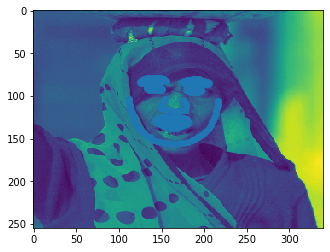

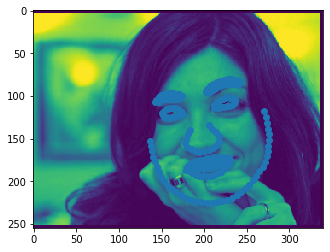

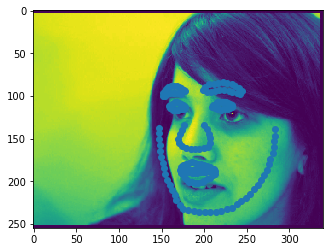

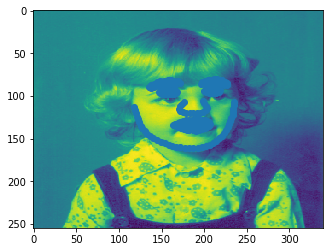

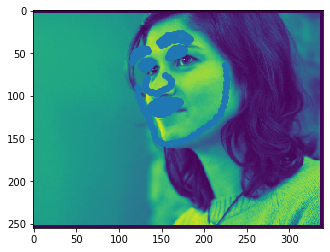

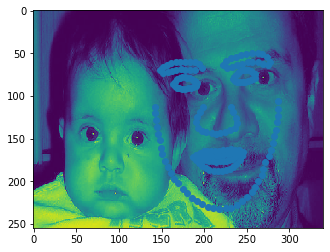

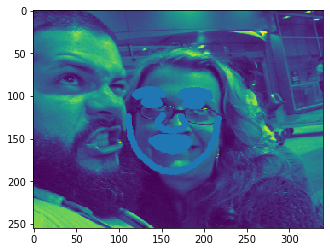

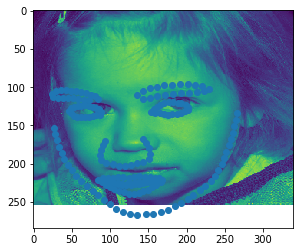

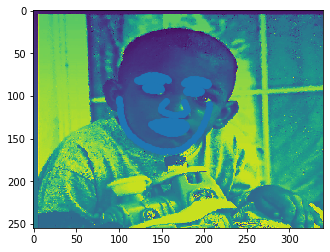

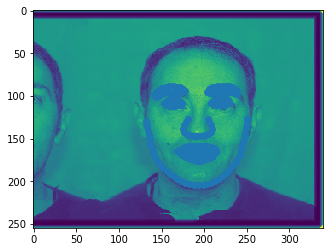

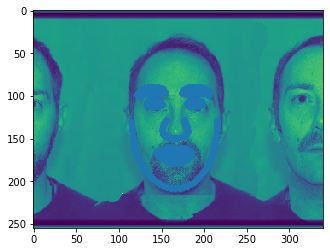

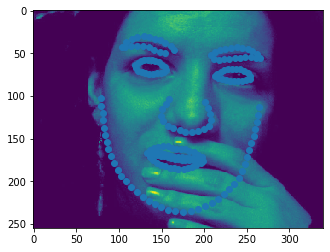

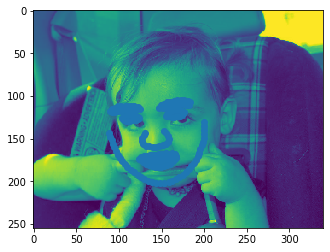

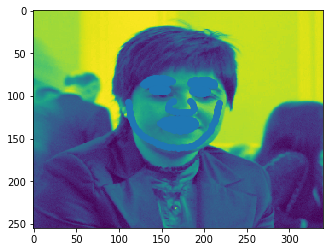

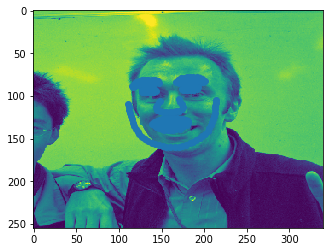

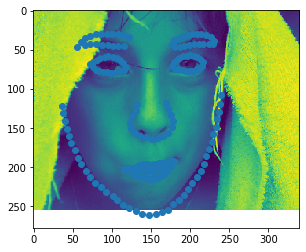

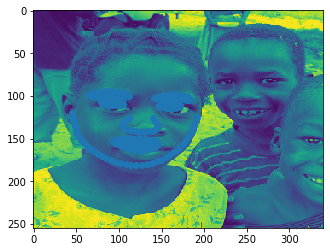

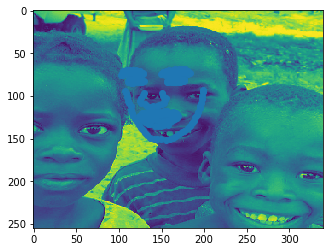

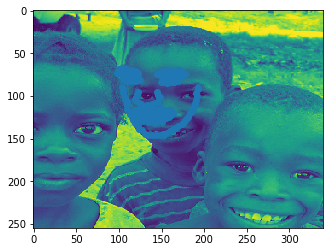

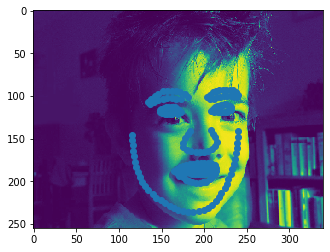

In [33]:
for i in range(20):
  plt.imshow(t_validation_x[i].view(255,340))
  x, y = get_co(output_array[i])
  plt.scatter(x, y)
  plt.show()

In [0]:
output_array = output.detach().numpy()

In [23]:
output_array.shape

(240, 193, 2)